In [20]:
lead_names = ["I", "II", "III", "AVR", "AVL", "AVF", "V1", "V2", "V3", "V4", "V5", "V6"]

for i, lead in enumerate(lead_names):
    print(f"Lead {lead} (First 10 Samples):")
    print(df_ptbxl.iloc[2]["p_signal"][:10, i])  # 첫 10개 값만 출력
    print("-" * 40)

Lead I (First 10 Samples):
[-0.02700486 -0.03096668 -0.02951026 -0.03028642 -0.02987843 -0.02973777
 -0.03059736 -0.0448868  -0.05497889 -0.05495833]
----------------------------------------
Lead II (First 10 Samples):
[-0.00899803 -0.01033004 -0.0098285  -0.0101108  -0.00992678 -0.010059
 -0.00993486 -0.01062206 -0.01465579 -0.01514445]
----------------------------------------
Lead III (First 10 Samples):
[0.01800683 0.02063664 0.01968176 0.02017563 0.01995165 0.01967877
 0.0206625  0.03426475 0.0403231  0.03981388]
----------------------------------------
Lead AVR (First 10 Samples):
[0.01800749 0.02063879 0.0196844  0.02017414 0.01994831 0.01975036
 0.01972284 0.02726282 0.03475224 0.03507743]
----------------------------------------
Lead AVL (First 10 Samples):
[-0.02250838 -0.025798   -0.02460225 -0.02522157 -0.02493105 -0.02468156
 -0.02568452 -0.03921389 -0.04711512 -0.04689881]
----------------------------------------
Lead AVF (First 10 Samples):
[0.0045212  0.00512715 0.004967

In [22]:
# 첫 번째 리드(Lead I)만 출력
lead_I_signal = df_ptbxl.iloc[2]["p_signal"][:, 0]

# 처음 10개 값만 출력
print(lead_I_signal[:10])

[-0.02700486 -0.03096668 -0.02951026 -0.03028642 -0.02987843 -0.02973777
 -0.03059736 -0.0448868  -0.05497889 -0.05495833]


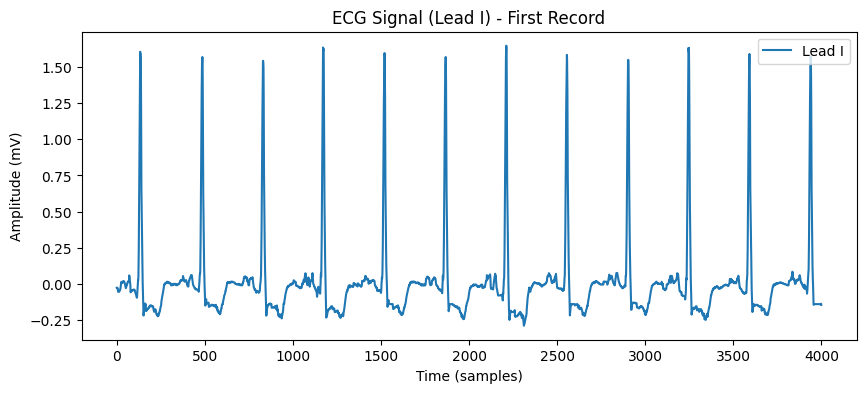

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

# 첫 번째 리드(Lead I) 플로팅
plt.plot(lead_I_signal, label="Lead I")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude (mV)")
plt.title("ECG Signal (Lead I) - First Record")
plt.legend()
plt.show()

In [12]:
# Samitrop 데이터 경로
samitrop_path = "data/physionet2025/samitrop_output/"

# Samitrop 헤더 파일 불러오기
samitrop_records = glob.glob(os.path.join(samitrop_path, "*.hea"))

# Samitrop 신호 저장 리스트
samitrop_data = []

for record_path in samitrop_records:
    record_name = os.path.basename(record_path).replace(".hea", "")

    # 헤더 파일 로드
    record = wfdb.rdrecord(os.path.join(samitrop_path, record_name))

    # Samitrop 데이터의 샘플링 주파수 확인
    fs_samitrop = record.fs  # 원본 샘플링 주파수

    # 400Hz로 변환이 필요할 경우 (예: 500Hz → 400Hz)
    if fs_samitrop != 400:
        from scipy.signal import resample_poly
        up, down = 4, 5  # 500Hz → 400Hz 기준 (필요시 조정)
        resampled_signal = resample_poly(record.p_signal, up, down, axis=0)
    else:
        resampled_signal = record.p_signal  # 이미 400Hz이면 그대로 사용

    # ECG 신호 저장
    samitrop_data.append({
        "record_name": record_name,
        "p_signal": resampled_signal,  # ECG 신호 (12개 리드)
        "Chagas_label": 1  # Samitrop은 샤가스병이 있는 데이터
    })

# DataFrame으로 변환
df_samitrop = pd.DataFrame(samitrop_data)

print(f"✅ Samitrop 데이터 로드 완료! 총 {len(df_samitrop)} 개 샘플")

✅ Samitrop 데이터 로드 완료! 총 815 개 샘플


In [13]:
# 인구통계 정보 로드
df_exams = pd.read_csv("data/physionet2025/samitrop_input/exams.csv")
df_exams.head()

,exam_id,age,is_male,normal_ecg,death,timey,nn_predicted_age
0,294669,67,True,False,False,2.116020,51.093110
1,291318,65,True,False,False,3.077345,76.923935
2,247007,67,False,False,False,2.378450,61.212074
3,181629,34,False,False,False,2.676793,56.736490
4,250434,52,False,False,False,2.118782,71.822754


In [14]:
# exam_id를 문자열(str)로 변환 (두 데이터셋 동일하게 처리)
df_samitrop["exam_id"] = df_samitrop["record_name"].astype(str)
df_exams["exam_id"] = df_exams["exam_id"].astype(str)

# 이제 병합 진행 (Key: exam_id)
df_samitrop = df_samitrop.merge(df_exams, on="exam_id", how="left")

print(f"✅ Samitrop 데이터에 인구통계 정보 추가 완료! 총 {df_samitrop.shape[0]} 개 샘플")
print(df_samitrop.head())  # Age, Sex 포함 여부 확인

✅ Samitrop 데이터에 인구통계 정보 추가 완료! 총 815 개 샘플
  record_name                                           p_signal  \
0      276016  [[-0.098, -0.068, 0.029, 0.088, -0.059, -0.02,...   
1      252713  [[0.473, 1.89, 1.418, -1.181, -0.473, 1.654, -...   
2      250844  [[-0.068, -0.01, 0.059, 0.049, -0.059, 0.029, ...   
3      112145  [[-0.098, -0.147, -0.049, 0.127, -0.02, -0.098...   
4      259454  [[-0.049, 0.0, 0.049, 0.029, -0.049, 0.029, 0....   

   Chagas_label exam_id  age  is_male  normal_ecg  death     timey  \
0             1  276016   68    False       False  False  2.118782   
1             1  252713   57    False       False   True  0.621546   
2             1  250844   42    False       False  False  2.077346   
3             1  112145   55    False       False  False  1.936462   
4             1  259454   59    False       False  False  2.016572   

   nn_predicted_age  
0         71.224380  
1         79.031710  
2         49.692673  
3         64.883880  
4         47.04007

In [46]:
# Samitrop 컬럼명 변경
column_mapping = {
    "age": "Age",  # 나이
    "is_male": "Sex"  # 성별 (1=Male, 0=Female)
}

# 컬럼명 변경
df_samitrop.rename(columns=column_mapping, inplace=True)

In [47]:
# PTB-XL과 Samitrop의 컬럼 비교
print("✅ PTB-XL 컬럼:", df_ptbxl.columns)
print("✅ Samitrop 컬럼:", df_samitrop.columns)

# 공통 컬럼 찾기
common_columns = list(set(df_ptbxl.columns) & set(df_samitrop.columns))
print("✅ 공통 컬럼:", common_columns)

✅ PTB-XL 컬럼: Index(['record_name', 'p_signal', 'Age', 'Sex', 'Chagas_label'], dtype='object')
✅ Samitrop 컬럼: Index(['record_name', 'p_signal', 'Chagas_label', 'exam_id', 'Age', 'Sex',
       'normal_ecg', 'death', 'timey', 'nn_predicted_age'],
      dtype='object')
✅ 공통 컬럼: ['p_signal', 'Chagas_label', 'record_name', 'Sex', 'Age']


In [48]:
# 공통 컬럼을 유지하면서 데이터 병합
df_merged = pd.concat([df_ptbxl[common_columns], df_samitrop[common_columns]])

# 인덱스 리셋
df_merged.reset_index(drop=True, inplace=True)

print(f"✅ 최종 데이터셋 병합 완료! 총 {df_merged.shape[0]} 개 샘플")
print(df_merged.head())  # Age, Sex 포함 여부 다시 확인

✅ 최종 데이터셋 병합 완료! 총 22614 개 샘플
                                            p_signal  Chagas_label  \
0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...             0   
1  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...             0   
2  [[-0.02700486365249042, -0.008998031127506233,...             0   
3  [[0.17100813219907687, 0.20703512222344375, 0....             0   
4  [[0.0, 0.6370191642345265, 0.7555826126872751,...             0   

  record_name  Sex  Age  
0    11361_hr  NaN  NaN  
1    12324_hr  NaN  NaN  
2    15787_hr  NaN  NaN  
3    04248_hr  NaN  NaN  
4    19136_hr  NaN  NaN  


In [50]:
# 원하는 컬럼 순서 설정
desired_order = ["record_name", "p_signal", "Sex", "Age", "Chagas_label"]

# 컬럼 순서 재정렬
df_merged = df_merged[desired_order]

print(df_merged.head())  # 변경된 데이터 확인

  record_name                                           p_signal  Sex  Age  \
0    11361_hr  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  NaN  NaN   
1    12324_hr  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  NaN  NaN   
2    15787_hr  [[-0.02700486365249042, -0.008998031127506233,...  NaN  NaN   
3    04248_hr  [[0.17100813219907687, 0.20703512222344375, 0....  NaN  NaN   
4    19136_hr  [[0.0, 0.6370191642345265, 0.7555826126872751,...  NaN  NaN   

   Chagas_label  
0             0  
1             0  
2             0  
3             0  
4             0  


In [51]:
df_merged.to_pickle("ecg_merged_dataset.pkl")

In [6]:
# pip install tensorflow

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [5]:
import pickle

# 파일 경로
file_path = "/workspace/ecg_merged_dataset.pkl"

# Pickle 파일 불러오기
with open(file_path, "rb") as f:
    ecg_data = pickle.load(f)

# 데이터 타입 확인
print(type(ecg_data))  # 데이터 구조 확인

<class 'pandas.core.frame.DataFrame'>


In [8]:
ecg_data.p_signal[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:

# NaN 값 제거
df_merged = df_merged.dropna(subset=["p_signal", "Chagas_label"])


# 각 샘플의 신호 길이 확인
signal_lengths = [ecg.shape[0] for ecg in df_merged["p_signal"]]

print(f"최소 길이: {min(signal_lengths)}")
print(f"최대 길이: {max(signal_lengths)}")


최소 길이: 1568
최대 길이: 4096


In [42]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# 설정할 고정된 길이 (예: 4000)
fixed_length = 4000

def pad_or_truncate(signal, length=fixed_length):
    """신호를 고정된 길이로 패딩하거나 자르기"""
    if not isinstance(signal, np.ndarray):  
        return np.zeros((length,))  # 잘못된 데이터는 0으로 채우기
    if len(signal) > length:
        return signal[:length]  # 초과 부분 자르기
    elif len(signal) < length:
        return np.pad(signal, (0, length - len(signal)), mode='constant')  # 0으로 패딩
    return signal

# NaN 값 제거
df_merged = df_merged.dropna(subset=["p_signal", "Chagas_label"])

# 신호 데이터 변환 (12개 리드 중 Lead I 사용)
X = np.array([pad_or_truncate(ecg[:, 0]) for ecg in df_merged["p_signal"]])

# CNN 입력 형식으로 변환
X = np.expand_dims(X, axis=-1)  # (샘플 수, 4000, 1)

# 라벨 데이터 추출
y = df_merged["Chagas_label"].values  # (샘플 수,)
y = to_categorical(y, num_classes=2)  # One-hot encoding (0 → [1,0], 1 → [0,1])

# 데이터셋 분할 (Train 80%, Test 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ 데이터 준비 완료! X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")


✅ 데이터 준비 완료! X_train shape: (18091, 4000, 1), y_train shape: (18091, 2)


In [43]:
print(f"✅ X 데이터 shape: {X.shape}")
print(f"✅ y 데이터 shape: {y.shape}")

# `X`의 샘플 일부 확인
print(f"첫 번째 샘플 신호 길이: {len(X[0])}")
print(f"첫 번째 샘플 데이터 타입: {type(X[0])}")

# `y` 값 분포 확인
print("Chagas_label 분포:", np.sum(y, axis=0))

✅ X 데이터 shape: (22614, 4000, 1)
✅ y 데이터 shape: (22614, 2)
첫 번째 샘플 신호 길이: 4000
첫 번째 샘플 데이터 타입: <class 'numpy.ndarray'>
Chagas_label 분포: [21799.   815.]


#### 필요한 패키지 로드

In [52]:
df_samitrop.head()

,record_name,p_signal,Chagas_label,exam_id,Age,Sex,normal_ecg,death,timey,nn_predicted_age
0,276016,"[[-0.098, -0.068, 0.029, 0.088, -0.059, -0.02,...",1,276016,68,False,False,False,2.118782,71.224380
1,252713,"[[0.473, 1.89, 1.418, -1.181, -0.473, 1.654, -...",1,252713,57,False,False,True,0.621546,79.031710
2,250844,"[[-0.068, -0.01, 0.059, 0.049, -0.059, 0.029, ...",1,250844,42,False,False,False,2.077346,49.692673
3,112145,"[[-0.098, -0.147, -0.049, 0.127, -0.02, -0.098...",1,112145,55,False,False,False,1.936462,64.883880
4,259454,"[[-0.049, 0.0, 0.049, 0.029, -0.049, 0.029, 0....",1,259454,59,False,False,False,2.016572,47.040070


In [15]:
import pickle

# 파일 경로
file_path = "/workspace/ecg_merged_dataset.pkl"

# Pickle 파일 불러오기
with open(file_path, "rb") as f:
    df = pickle.load(f)

# 데이터 타입 확인
print(type(df))  # 데이터 구조 확인

<class 'pandas.core.frame.DataFrame'>


In [5]:
# pip install biosppy nolds scikit-learn peakutils

In [6]:
import wfdb
import numpy as np
import pandas as pd
import glob
import os
from wfdb import rdrecord
import numpy as np
import pandas as pd
import scipy.signal as signal
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.stats import entropy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from scipy import signal, fft
from scipy.signal import spectrogram
from biosppy.signals.ecg import christov_segmenter, hamilton_segmenter
from nolds import sampen
from sklearn.impute import SimpleImputer

# Feature Engineering

### **신호 전처리**
ECG 신호는 노이즈(근육 활동, 전극 간섭, 기저선 변동)가 포함될 수 있음 \
밴드패스 필터(0.1-45Hz)를 적용하여 의미 있는 심장 신호만 남기기. 

---

### **R-peak 검출**
Christov 알고리즘을 이용한 검출

---

### **QRS 복합체 분석 (QRS Width Calculation)**
Hamilton 알고리즘을 이용해 QRS 시작점 & 종료점을 찾고 QRS 폭(시간 간격, QRS duration)을 계산 \
QRS 폭이 길어지면 심장 전도 장애(전도 차단) 가능성이 높음 \
Chagas병 환자는 QRS 폭이 비정상적으로 증가하는 경우가 많음!

---

### **QT 간격 분석** 
R 피크부터 T파 종료점까지의 간격(QT Interval)을 계산 \
QT 간격이 길어지면 심실 부정맥 가능성이 증가! \
선행 연구들에서 Chagas병 환자는 QT 간격이 연장되는 경향이 있음이 확인됨 
- 결과 해석 \
-- QTd(QT dispersion) ≥65ms인 경우 사망 위험 2.18배 증가 (95% CI 1.35-3.53) \
-- QTc ≥465ms에서 3.2배 높은 심혈관 사망률 (95% CI 1.8-5.7)

---

### **주파수 분석 (frequency analysis)**
FFT 변환 수행 -> 주파수별 에너지를 분석함.

**LF, HF 분석** 
LF/HF 비율을 계산하여 자율신경계 균형 분석\
LF 파워 증가 → 교감신경 활성화 (스트레스 반응) \
HF 파워 증가 → 부교감신경 활성화 (이완 반응)\
LF/HF 비율 증가 → 교감신경 과활성 (부정맥, 고혈압, *Chagas병 특징*)

---

### **샘플 엔트로피(Sample Entropy) 분석** 
ECG 신호의 복잡성을 측정 (Chagas병 환자는 심장 박동이 더 예측 가능하고, 복잡성이 감소하는 경향)\
엔트로피 값이 작을수록 심장이 규칙적으로 뛰며, 복잡하지 않은 것 \
cf.참고 지표: 정상인: 1.2 ~ 1.8 , Chagas병 환자: 0.6 ~ 1.0

---

### **심박 변이(HRV) 분석**
**Poincare feature 분석** 
SD1 (Short-Term Variability) → 단기 변동성 / SD2 (Long-Term Variability) → 장기 변동성 \
SD1/SD2 비율 → 자율신경계 균형 분석\
- 결과 해석: \
-- SD1 감소 → Chagas병 환자는 심박수의 단기 변동이 감소\
-- SD2 감소 → 심장 리듬이 전반적으로 일정해짐\
-- SD1/SD2 ratio 감소 → 자율신경계 균형이 무너진 상태

**RMSSD (Root Mean Square of Successive Differences) 분석**
선행 연구들에서  Chagas 환자의 HRV 저하 확인\
RMSSD ≤25ms에서 사망 위험 1.26배 증가 (95% CI 1.14-1.40)\
자율신경계 불균형(교감항진/부교감저하) 반영

**SDNN (Standard Deviation of NN intervals) 분석**\
정상적인 심장 박동(R-R 간격) 간격의 표준편차\
Chagas병 환자는 SDNN이 낮은 경향이 있음
- 결과 해석 \
SDNN이 크면? → 심박 변이도가 크다 (정상적인 자율신경 조절)
SDNN이 작으면? → 심박 변이도가 낮다 (자율신경 조절 기능 저하, Chagas병 가능성)

---

### **T파 분석 (T-wave Analysis)**
T파의 크기(T-wave Amplitude)와 기울기(T-wave Slope)를 분석 \
Chagas병 환자는 비정상적인 T파 변형이 자주 나타남\
정상적인 T파 진폭의 범위는 리드에 따라 다르지만, 일반적으로 아래와 같음. 
- 리드 I, II	: 0.1 ~ 0.5 mV
- 리드 V2 ~ V6 :	0.2 ~ 1.0 mV
- 리드 aVR :	T파가 음성(negative)일 가능성이 있음
- 결과 해석 \
T파 진폭이 너무 낮거나 높으면? → 심실의 재분극(Repolarization) 이상 가능성
T파 기울기가 너무 가파르면? → QT 간격 연장, 부정맥 가능성 증가
Chagas병 환자는 T파가 변형되거나 진폭이 낮은 경향이 있음!

---



### 함수 정의

In [2]:
import numpy as np
import pandas as pd
import wfdb
from wfdb.processing import gqrs_detect
from scipy.signal import butter, filtfilt, welch, find_peaks
from multiprocessing import Pool, cpu_count
import time

# ✅ ECG 신호 전처리 (밴드패스 필터 적용)
def preprocess_ecg(signal_data, fs=400):
    """ECG 신호에 밴드패스 필터 (0.1-45Hz) 적용"""
    nyquist = 0.5 * fs
    low, high = 0.1 / nyquist, 45 / nyquist
    b, a = butter(4, [low, high], btype='band')
    return filtfilt(b, a, signal_data, axis=0)

# ✅ R 피크 검출 (gqrs_detect 사용)
def detect_r_peaks(ecg_signal, fs=400):
    """WFDB의 gqrs_detect를 이용한 빠른 R 피크 검출"""
    r_peaks = gqrs_detect(sig=ecg_signal, fs=fs)
    return r_peaks if len(r_peaks) > 1 else np.array([])

# ✅ QRS 폭 분석
def analyze_qrs(ecg_signal, r_peaks, fs=400):
    """QRS 시작/종료점을 기반으로 폭 계산"""
    if len(r_peaks) < 2:
        return np.nan
    qrs_widths = np.diff(r_peaks) / fs
    return np.nanmean(qrs_widths)

# ✅ QT 간격 계산 (빠른 기울기 변화 탐지 알고리즘 적용)
def calculate_qt(ecg_signal, r_peaks, fs=400):
    """T파 종료점 탐지를 개선하여 QT 간격 계산"""
    qt_intervals = []
    for r in r_peaks:
        if r + int(0.5 * fs) < len(ecg_signal):
            segment = ecg_signal[r:r + int(0.5 * fs)]
            peaks, _ = find_peaks(-segment)  # T파는 음의 피크로 나타날 가능성이 큼
            if len(peaks) > 0:
                qt_intervals.append((r + peaks[-1] - r) / fs)
    return np.nanmean(qt_intervals) if qt_intervals else np.nan

# ✅ HRV 분석
def hrv_analysis(rr_intervals):
    """HRV 특징 추출"""
    if len(rr_intervals) < 2:
        return {'rmssd': np.nan, 'sdnn': np.nan, 'sd1': np.nan, 
                'sd2': np.nan, 'sd_ratio': np.nan}
    
    diff_rr = np.diff(rr_intervals)
    rmssd = np.sqrt(np.mean(diff_rr**2))
    sdnn = np.std(rr_intervals)
    
    sd1 = np.std(diff_rr) / np.sqrt(2)
    sd2 = np.std(rr_intervals[:-1] + rr_intervals[1:]) / np.sqrt(2)
    
    return {
        'rmssd': rmssd,
        'sdnn': sdnn,
        'sd1': sd1,
        'sd2': sd2,
        'sd_ratio': sd1 / sd2 if sd2 != 0 else np.nan
    }

# ✅ 주파수 영역 분석 (Welch 사용 및 미리 계산된 fft.fftfreq 활용)
def frequency_analysis(ecg_signal, fs=400):
    """Welch 변환을 사용한 주파수 대역 분석"""
    freqs, power = welch(ecg_signal, fs=fs, nperseg=256)
    
    bands = {
        'ulf': (0.003, 0.04), 
        'vlf': (0.04, 0.15),   
        'lf': (0.04, 0.15),    
        'hf': (0.15, 0.4)      
    }
    
    band_energy = {}
    for band, (low, high) in bands.items():
        mask = (freqs >= low) & (freqs < high)
        band_energy[band] = np.sum(power[mask])
    
    total = sum(band_energy.values())
    return {k: v / total for k, v in band_energy.items()} if total != 0 else band_energy

# ✅ 샘플 엔트로피 (빠른 근사 방법 적용)
def calculate_sample_entropy(ecg_signal):
    """샘플 엔트로피 근사치 계산"""
    if np.all(ecg_signal == ecg_signal[0]):  
        return np.nan
    diffs = np.diff(ecg_signal)
    return np.log(np.std(diffs) + 1e-6)

# ✅ T파 분석
def analyze_t_wave(ecg_signal, r_peaks, fs=400):
    """T파 형태학적 분석"""
    t_features = []
    for r in r_peaks:
        if r + int(0.4 * fs) < len(ecg_signal):
            t_wave = ecg_signal[r + int(0.1 * fs):r + int(0.4 * fs)]
            t_features.append({
                'amplitude': np.ptp(t_wave),
                'slope': np.mean(np.diff(t_wave))
            })
    
    return {
        't_amp': np.nanmean([f['amplitude'] for f in t_features]),
        't_slope': np.nanmean([f['slope'] for f in t_features])
    } if t_features else {'t_amp': np.nan, 't_slope': np.nan}

# ✅ 통합 특징 추출 함수 (멀티프로세싱 지원)
def extract_features(ecg_signal, fs=400):
    """최적화된 ECG 특징 추출"""
    filtered = preprocess_ecg(ecg_signal, fs)

    r_peaks = detect_r_peaks(filtered, fs)
    rr_intervals = np.diff(r_peaks) / fs if len(r_peaks) > 1 else np.array([np.nan])

    features = {
        'qrs_width': analyze_qrs(filtered, r_peaks, fs),
        'qt_interval': calculate_qt(filtered, r_peaks, fs),
        **hrv_analysis(rr_intervals),
        **frequency_analysis(filtered, fs),
        **analyze_t_wave(filtered, r_peaks, fs),
        'sample_entropy': calculate_sample_entropy(filtered),
    }
    
    return features

# ✅ 멀티프로세싱을 사용한 특징 추출
def extract_features_parallel(ecg_signals, fs=400, num_workers=None):
    """멀티프로세싱을 활용한 ECG 특징 추출"""
    num_workers = num_workers or cpu_count()  # 기본적으로 모든 CPU 사용
    with Pool(processes=num_workers) as pool:
        features = pool.map(extract_features, ecg_signals)
    return pd.DataFrame(features)


In [50]:
# import pickle

# # 변환된 df를 저장
# df.to_pickle("processed_ecg.pkl")

In [23]:
# 모든 샘플의 길이 확인
sample_shapes = [np.array(x).shape for x in df["p_signal"]]
print(set(sample_shapes))  # 모든 샘플이 동일한 형태인지 확인

{(4096, 12)}


#### 함수 실행

In [4]:
# # 모든 값이 0인지 확인하는 함수
# def is_all_zeros(signal):
#     return np.all(signal == 0)

# # 모든 `p_signal`에서 0만 있는 행 찾기
# zero_mask = df["p_signal"].apply(lambda x: is_all_zeros(np.array(x)))

# # 해당 행 제거 (drop)
# df_cleaned = df[~zero_mask].reset_index(drop=True)

# # 제거 후 데이터 크기 확인
# print(f"제거 전: {df.shape[0]}개 → 제거 후: {df_cleaned.shape[0]}개")


제거 전: 22614개 → 제거 후: 22613개


In [ ]:
# if __name__ == "__main__":

#     # 'p_signal' 컬럼에서 ECG 신호를 가져와 numpy 배열로 변환 (모든 리드 사용)
#     ecg_signals = np.stack(df["p_signal"].values)  # (samples, 4096, 12)

#     all_features = []  # 모든 리드에서 추출한 특징을 저장할 리스트
    
#     # 12개 리드 각각에 대해 특징을 추출
#     for lead_idx in range(ecg_signals.shape[2]):  # 리드 개수(12)만큼 반복
#         lead_signal = ecg_signals[:, :, lead_idx]  # 특정 리드 선택
#         features = np.array([extract_features(preprocess_ecg(sig), fs=400) for sig in lead_signal])
#         all_features.append(features)
    
#     # 전체 리드의 특징을 하나의 벡터로 변환
#     all_features = np.concatenate(all_features, axis=1)  # (samples, 특징 개수 * 12)
    
#     # NaN 값 처리
#     imputer = SimpleImputer(strategy='median')

In [10]:
import pickle 

# 파일 경로
file_path = "/workspace/ecg_ml_features.pkl"

# Pickle 파일 불러오기 (길이까지 전부 조정 + 피처까지 뽑힌 파일) 
with open(file_path, "rb") as f:
    df = pickle.load(f)

In [11]:
df

,qt_interval,rmssd,sdnn,sd1,sd2,sd_ratio,ulf,vlf,lf,hf,t_amp,t_slope,sample_entropy,Chagas_label
0,0.130000,NaN,NaN,NaN,NaN,NaN,0.0,0.075301,0.075301,0.849398,0.000106,5.467715e-07,0.000494,0
1,0.000000,0.014286,0.014000,0.009998,0.009998,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,0
2,0.366591,0.009811,0.006468,0.006901,0.005000,1.380217,0.0,0.154159,0.154159,0.691681,0.230681,1.304779e-03,0.044014,0
3,0.265714,0.701251,0.420352,0.494847,0.353428,1.400135,0.0,0.406802,0.406802,0.186396,0.347067,3.830143e-04,0.113375,0
4,0.000000,0.014286,0.014000,0.009998,0.009998,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22609,0.291250,0.000884,0.000786,0.000585,0.000585,1.000000,0.0,0.242982,0.242982,0.514036,1.750322,-1.714807e-03,0.105906,1
22610,0.301786,0.024622,0.016057,0.017378,0.016186,1.073626,0.0,0.447602,0.447602,0.104796,0.309038,1.527649e-03,0.060259,1
22611,0.306250,0.087656,0.052420,0.061808,0.044873,1.377392,0.0,0.057269,0.057269,0.885462,0.455386,5.887951e-04,0.062394,1
22612,0.283636,0.044143,0.026562,0.031174,0.021062,1.480140,0.0,0.225346,0.225346,0.549308,0.298406,1.363610e-03,0.091356,1


### 모델링

In [ ]:
# 데이터 스플릿
X = np.array([extract_features(preprocess_ecg(ecg)) for ecg in df['p_signal']])
y = np.array(df['Chagas_label'])  # Chagas병 여부 (0: 음성, 1: 양성)

# 데이터 분할 (훈련 80% / 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 정규화 (Standard Scaler)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 머신러닝 모델 학습 (CatBoost 적용)
catboost = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, verbose=100)
catboost.fit(X_train, y_train)

# 성능 평가
acc = catboost.score(X_test, y_test)
print(f"CatBoost 정확도: {acc:.2f}")

In [ ]:
# 간단한딥러닝 모델 (1D-CNN)
model = Sequential([
    Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 딥러닝 학습
model.fit(X_train.reshape(-1, X_train.shape[1], 1), y_train, epochs=20, batch_size=32, validation_data=(X_test.reshape(-1, X_test.shape[1], 1), y_test))

In [1]:
# 성능 평가
cnn_acc = model.evaluate(X_test.reshape(-1, X_test.shape[1], 1), y_test, verbose=0)[1]
print(f"CNN 모델 정확도: {cnn_acc:.2f}")

NameError: name 'model' is not defined

In [9]:
## 전체 데이터셋  특징 추출

import numpy as np
import pandas as pd
import time
from tqdm import tqdm  # 진행률 표시

# ✅ 특징 추출 수행 (전체 데이터셋)
feature_list = []
labels = []
total_time = 0  # 전체 걸린 시간

# ✅ 전체 데이터셋 처리
for i, row in tqdm(df.iterrows(), total=len(df)):  
    start_time = time.time()  # 시작 시간 기록
    
    ecg_signal = row["p_signal"][:, 0]  # 첫 번째 리드만 사용
    features = extract_features(preprocess_ecg(ecg_signal, fs=400))  # 특징 추출
    
    end_time = time.time()  # 종료 시간 기록
    elapsed_time = end_time - start_time  # 걸린 시간 계산
    
    feature_list.append(features)
    labels.append(row["Chagas_label"])  # 타겟 값 저장
    total_time += elapsed_time  # 전체 시간 누적

    # ✅ 진행률 및 소요 시간 출력
    print(f"🔹 진행률: {i+1}/{len(df)} ({((i+1)/len(df))*100:.2f}%) | "
          f"현재 행 처리 시간: {elapsed_time:.4f}초")

# ✅ 평균 처리 시간 계산
avg_time_per_row = total_time / len(df)
total_runtime = total_time / 60  # 총 소요 시간 (분)

print(f"\n✅ 평균적으로 한 행 처리 시간: {avg_time_per_row:.4f}초")
print(f"🚀 총 소요 시간 (분): {total_runtime:.2f}분")

# ✅ DataFrame 변환
df_features = pd.DataFrame(feature_list)
df_features["Chagas_label"] = labels  # 타겟 변수 추가

# ✅ 데이터 크기 확인
print(f"\n🔹 최종 데이터 크기: {df_features.shape}")

# ✅ CSV 또는 PKL로 저장
df_features.to_pickle("extracted_features.pkl")

  0%|                                                                                                                                                                   | 4/22614 [00:00<11:44, 32.10it/s]

🔹 진행률: 1/22614 (0.00%) | 현재 행 처리 시간: 0.0324초
🔹 진행률: 2/22614 (0.01%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 3/22614 (0.01%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4/22614 (0.02%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 5/22614 (0.02%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 6/22614 (0.03%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7/22614 (0.03%) | 현재 행 처리 시간: 0.0284초


  0%|                                                                                                                                                                  | 12/22614 [00:00<11:01, 34.16it/s]

🔹 진행률: 8/22614 (0.04%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 9/22614 (0.04%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10/22614 (0.04%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11/22614 (0.05%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 12/22614 (0.05%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 13/22614 (0.06%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14/22614 (0.06%) | 현재 행 처리 시간: 0.0281초


  0%|▏                                                                                                                                                                 | 20/22614 [00:00<10:58, 34.32it/s]

🔹 진행률: 15/22614 (0.07%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 16/22614 (0.07%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 17/22614 (0.08%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 18/22614 (0.08%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19/22614 (0.08%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 20/22614 (0.09%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21/22614 (0.09%) | 현재 행 처리 시간: 0.0292초


  0%|▏                                                                                                                                                                 | 28/22614 [00:00<10:50, 34.70it/s]

🔹 진행률: 22/22614 (0.10%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 23/22614 (0.10%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 24/22614 (0.11%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 25/22614 (0.11%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 26/22614 (0.11%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 27/22614 (0.12%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 28/22614 (0.12%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 29/22614 (0.13%) | 현재 행 처리 시간: 0.0290초


  0%|▎                                                                                                                                                                 | 36/22614 [00:01<10:49, 34.76it/s]

🔹 진행률: 30/22614 (0.13%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 31/22614 (0.14%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 32/22614 (0.14%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 33/22614 (0.15%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 34/22614 (0.15%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 35/22614 (0.15%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 36/22614 (0.16%) | 현재 행 처리 시간: 0.0286초


  0%|▎                                                                                                                                                                 | 44/22614 [00:01<10:45, 34.96it/s]

🔹 진행률: 37/22614 (0.16%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 38/22614 (0.17%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 39/22614 (0.17%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 40/22614 (0.18%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 41/22614 (0.18%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 42/22614 (0.19%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 43/22614 (0.19%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 44/22614 (0.19%) | 현재 행 처리 시간: 0.0292초


  0%|▎                                                                                                                                                                 | 48/22614 [00:01<10:50, 34.71it/s]

🔹 진행률: 45/22614 (0.20%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 46/22614 (0.20%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 47/22614 (0.21%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 48/22614 (0.21%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 49/22614 (0.22%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 50/22614 (0.22%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 51/22614 (0.23%) | 현재 행 처리 시간: 0.0292초


  0%|▍                                                                                                                                                                 | 56/22614 [00:01<10:51, 34.64it/s]

🔹 진행률: 52/22614 (0.23%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 53/22614 (0.23%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 54/22614 (0.24%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 55/22614 (0.24%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 56/22614 (0.25%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 57/22614 (0.25%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 58/22614 (0.26%) | 현재 행 처리 시간: 0.0282초


  0%|▍                                                                                                                                                                 | 64/22614 [00:01<10:43, 35.02it/s]

🔹 진행률: 59/22614 (0.26%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 60/22614 (0.27%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 61/22614 (0.27%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 62/22614 (0.27%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 63/22614 (0.28%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 64/22614 (0.28%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 65/22614 (0.29%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 66/22614 (0.29%) | 현재 행 처리 시간: 0.0287초


  0%|▌                                                                                                                                                                 | 72/22614 [00:02<10:47, 34.80it/s]

🔹 진행률: 67/22614 (0.30%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 68/22614 (0.30%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 69/22614 (0.31%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 70/22614 (0.31%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 71/22614 (0.31%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 72/22614 (0.32%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 73/22614 (0.32%) | 현재 행 처리 시간: 0.0288초


  0%|▌                                                                                                                                                                 | 80/22614 [00:02<10:51, 34.61it/s]

🔹 진행률: 74/22614 (0.33%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 75/22614 (0.33%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 76/22614 (0.34%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 77/22614 (0.34%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 78/22614 (0.34%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 79/22614 (0.35%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 80/22614 (0.35%) | 현재 행 처리 시간: 0.0285초


  0%|▌                                                                                                                                                                 | 84/22614 [00:02<10:51, 34.56it/s]

🔹 진행률: 81/22614 (0.36%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 82/22614 (0.36%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 83/22614 (0.37%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 84/22614 (0.37%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 85/22614 (0.38%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 86/22614 (0.38%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 87/22614 (0.38%) | 현재 행 처리 시간: 0.0287초


  0%|▋                                                                                                                                                                 | 92/22614 [00:02<10:49, 34.65it/s]

🔹 진행률: 88/22614 (0.39%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 89/22614 (0.39%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 90/22614 (0.40%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 91/22614 (0.40%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 92/22614 (0.41%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 93/22614 (0.41%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 94/22614 (0.42%) | 현재 행 처리 시간: 0.0286초


  0%|▋                                                                                                                                                                | 100/22614 [00:02<10:53, 34.44it/s]

🔹 진행률: 95/22614 (0.42%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 96/22614 (0.42%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 97/22614 (0.43%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 98/22614 (0.43%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 99/22614 (0.44%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 100/22614 (0.44%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 101/22614 (0.45%) | 현재 행 처리 시간: 0.0287초


  0%|▊                                                                                                                                                                | 108/22614 [00:03<10:53, 34.46it/s]

🔹 진행률: 102/22614 (0.45%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 103/22614 (0.46%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 104/22614 (0.46%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 105/22614 (0.46%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 106/22614 (0.47%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 107/22614 (0.47%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 108/22614 (0.48%) | 현재 행 처리 시간: 0.0293초


  1%|▊                                                                                                                                                                | 116/22614 [00:03<10:48, 34.67it/s]

🔹 진행률: 109/22614 (0.48%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 110/22614 (0.49%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 111/22614 (0.49%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 112/22614 (0.50%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 113/22614 (0.50%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 114/22614 (0.50%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 115/22614 (0.51%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 116/22614 (0.51%) | 현재 행 처리 시간: 0.0282초


  1%|▊                                                                                                                                                                | 120/22614 [00:03<10:50, 34.60it/s]

🔹 진행률: 117/22614 (0.52%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 118/22614 (0.52%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 119/22614 (0.53%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 120/22614 (0.53%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 121/22614 (0.54%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 122/22614 (0.54%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 123/22614 (0.54%) | 현재 행 처리 시간: 0.0285초


  1%|▉                                                                                                                                                                | 128/22614 [00:03<10:46, 34.81it/s]

🔹 진행률: 124/22614 (0.55%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 125/22614 (0.55%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 126/22614 (0.56%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 127/22614 (0.56%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 128/22614 (0.57%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 129/22614 (0.57%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 130/22614 (0.57%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 131/22614 (0.58%) | 현재 행 처리 시간: 0.0289초


  1%|▉                                                                                                                                                                | 136/22614 [00:03<10:49, 34.61it/s]

🔹 진행률: 132/22614 (0.58%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 133/22614 (0.59%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 134/22614 (0.59%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 135/22614 (0.60%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 136/22614 (0.60%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 137/22614 (0.61%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 138/22614 (0.61%) | 현재 행 처리 시간: 0.0285초


  1%|█                                                                                                                                                                | 144/22614 [00:04<10:52, 34.41it/s]

🔹 진행률: 139/22614 (0.61%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 140/22614 (0.62%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 141/22614 (0.62%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 142/22614 (0.63%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 143/22614 (0.63%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 144/22614 (0.64%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 145/22614 (0.64%) | 현재 행 처리 시간: 0.0289초


  1%|█                                                                                                                                                                | 152/22614 [00:04<10:51, 34.48it/s]

🔹 진행률: 146/22614 (0.65%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 147/22614 (0.65%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 148/22614 (0.65%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 149/22614 (0.66%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 150/22614 (0.66%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 151/22614 (0.67%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 152/22614 (0.67%) | 현재 행 처리 시간: 0.0275초


  1%|█                                                                                                                                                                | 156/22614 [00:04<10:51, 34.47it/s]

🔹 진행률: 153/22614 (0.68%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 154/22614 (0.68%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 155/22614 (0.69%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 156/22614 (0.69%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 157/22614 (0.69%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 158/22614 (0.70%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 159/22614 (0.70%) | 현재 행 처리 시간: 0.0288초


  1%|█▏                                                                                                                                                               | 164/22614 [00:04<10:53, 34.34it/s]

🔹 진행률: 160/22614 (0.71%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 161/22614 (0.71%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 162/22614 (0.72%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 163/22614 (0.72%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 164/22614 (0.73%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 165/22614 (0.73%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 166/22614 (0.73%) | 현재 행 처리 시간: 0.0288초


  1%|█▏                                                                                                                                                               | 172/22614 [00:04<10:52, 34.40it/s]

🔹 진행률: 167/22614 (0.74%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 168/22614 (0.74%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 169/22614 (0.75%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 170/22614 (0.75%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 171/22614 (0.76%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 172/22614 (0.76%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 173/22614 (0.77%) | 현재 행 처리 시간: 0.0293초


  1%|█▎                                                                                                                                                               | 180/22614 [00:05<10:50, 34.48it/s]

🔹 진행률: 174/22614 (0.77%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 175/22614 (0.77%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 176/22614 (0.78%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 177/22614 (0.78%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 178/22614 (0.79%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 179/22614 (0.79%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 180/22614 (0.80%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 181/22614 (0.80%) | 현재 행 처리 시간: 0.0261초


  1%|█▎                                                                                                                                                               | 188/22614 [00:05<10:46, 34.67it/s]

🔹 진행률: 182/22614 (0.80%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 183/22614 (0.81%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 184/22614 (0.81%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 185/22614 (0.82%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 186/22614 (0.82%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 187/22614 (0.83%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 188/22614 (0.83%) | 현재 행 처리 시간: 0.0283초


  1%|█▍                                                                                                                                                               | 196/22614 [00:05<10:46, 34.69it/s]

🔹 진행률: 189/22614 (0.84%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 190/22614 (0.84%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 191/22614 (0.84%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 192/22614 (0.85%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 193/22614 (0.85%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 194/22614 (0.86%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 195/22614 (0.86%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 196/22614 (0.87%) | 현재 행 처리 시간: 0.0285초


  1%|█▍                                                                                                                                                               | 204/22614 [00:05<10:43, 34.82it/s]

🔹 진행률: 197/22614 (0.87%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 198/22614 (0.88%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 199/22614 (0.88%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 200/22614 (0.88%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 201/22614 (0.89%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 202/22614 (0.89%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 203/22614 (0.90%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 204/22614 (0.90%) | 현재 행 처리 시간: 0.0289초


  1%|█▌                                                                                                                                                               | 212/22614 [00:06<10:43, 34.80it/s]

🔹 진행률: 205/22614 (0.91%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 206/22614 (0.91%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 207/22614 (0.92%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 208/22614 (0.92%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 209/22614 (0.92%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 210/22614 (0.93%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 211/22614 (0.93%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 212/22614 (0.94%) | 현재 행 처리 시간: 0.0284초


  1%|█▌                                                                                                                                                               | 220/22614 [00:06<10:45, 34.69it/s]

🔹 진행률: 213/22614 (0.94%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 214/22614 (0.95%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 215/22614 (0.95%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 216/22614 (0.96%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 217/22614 (0.96%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 218/22614 (0.96%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 219/22614 (0.97%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 220/22614 (0.97%) | 현재 행 처리 시간: 0.0287초


  1%|█▌                                                                                                                                                               | 224/22614 [00:06<10:48, 34.53it/s]

🔹 진행률: 221/22614 (0.98%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 222/22614 (0.98%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 223/22614 (0.99%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 224/22614 (0.99%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 225/22614 (0.99%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 226/22614 (1.00%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 227/22614 (1.00%) | 현재 행 처리 시간: 0.0280초


  1%|█▋                                                                                                                                                               | 232/22614 [00:06<10:49, 34.48it/s]

🔹 진행률: 228/22614 (1.01%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 229/22614 (1.01%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 230/22614 (1.02%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 231/22614 (1.02%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 232/22614 (1.03%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 233/22614 (1.03%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 234/22614 (1.03%) | 현재 행 처리 시간: 0.0276초


  1%|█▋                                                                                                                                                               | 240/22614 [00:06<10:45, 34.68it/s]

🔹 진행률: 235/22614 (1.04%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 236/22614 (1.04%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 237/22614 (1.05%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 238/22614 (1.05%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 239/22614 (1.06%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 240/22614 (1.06%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 241/22614 (1.07%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 242/22614 (1.07%) | 현재 행 처리 시간: 0.0283초


  1%|█▊                                                                                                                                                               | 248/22614 [00:07<10:42, 34.79it/s]

🔹 진행률: 243/22614 (1.07%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 244/22614 (1.08%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 245/22614 (1.08%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 246/22614 (1.09%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 247/22614 (1.09%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 248/22614 (1.10%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 249/22614 (1.10%) | 현재 행 처리 시간: 0.0281초


  1%|█▊                                                                                                                                                               | 256/22614 [00:07<10:45, 34.66it/s]

🔹 진행률: 250/22614 (1.11%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 251/22614 (1.11%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 252/22614 (1.11%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 253/22614 (1.12%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 254/22614 (1.12%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 255/22614 (1.13%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 256/22614 (1.13%) | 현재 행 처리 시간: 0.0281초


  1%|█▉                                                                                                                                                               | 264/22614 [00:07<10:41, 34.82it/s]

🔹 진행률: 257/22614 (1.14%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 258/22614 (1.14%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 259/22614 (1.15%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 260/22614 (1.15%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 261/22614 (1.15%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 262/22614 (1.16%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 263/22614 (1.16%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 264/22614 (1.17%) | 현재 행 처리 시간: 0.0284초


  1%|█▉                                                                                                                                                               | 268/22614 [00:07<10:44, 34.65it/s]

🔹 진행률: 265/22614 (1.17%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 266/22614 (1.18%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 267/22614 (1.18%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 268/22614 (1.19%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 269/22614 (1.19%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 270/22614 (1.19%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 271/22614 (1.20%) | 현재 행 처리 시간: 0.0285초


  1%|█▉                                                                                                                                                               | 276/22614 [00:07<10:44, 34.64it/s]

🔹 진행률: 272/22614 (1.20%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 273/22614 (1.21%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 274/22614 (1.21%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 275/22614 (1.22%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 276/22614 (1.22%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 277/22614 (1.22%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 278/22614 (1.23%) | 현재 행 처리 시간: 0.0285초


  1%|██                                                                                                                                                               | 284/22614 [00:08<10:41, 34.79it/s]

🔹 진행률: 279/22614 (1.23%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 280/22614 (1.24%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 281/22614 (1.24%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 282/22614 (1.25%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 283/22614 (1.25%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 284/22614 (1.26%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 285/22614 (1.26%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 286/22614 (1.26%) | 현재 행 처리 시간: 0.0282초


  1%|██                                                                                                                                                               | 292/22614 [00:08<10:38, 34.96it/s]

🔹 진행률: 287/22614 (1.27%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 288/22614 (1.27%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 289/22614 (1.28%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 290/22614 (1.28%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 291/22614 (1.29%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 292/22614 (1.29%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 293/22614 (1.30%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 294/22614 (1.30%) | 현재 행 처리 시간: 0.0296초


  1%|██▏                                                                                                                                                              | 300/22614 [00:08<10:42, 34.70it/s]

🔹 진행률: 295/22614 (1.30%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 296/22614 (1.31%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 297/22614 (1.31%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 298/22614 (1.32%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 299/22614 (1.32%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 300/22614 (1.33%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 301/22614 (1.33%) | 현재 행 처리 시간: 0.0283초


  1%|██▏                                                                                                                                                              | 308/22614 [00:08<10:45, 34.57it/s]

🔹 진행률: 302/22614 (1.34%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 303/22614 (1.34%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 304/22614 (1.34%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 305/22614 (1.35%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 306/22614 (1.35%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 307/22614 (1.36%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 308/22614 (1.36%) | 현재 행 처리 시간: 0.0290초


  1%|██▏                                                                                                                                                              | 316/22614 [00:09<10:43, 34.65it/s]

🔹 진행률: 309/22614 (1.37%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 310/22614 (1.37%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 311/22614 (1.38%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 312/22614 (1.38%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 313/22614 (1.38%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 314/22614 (1.39%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 315/22614 (1.39%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 316/22614 (1.40%) | 현재 행 처리 시간: 0.0283초


  1%|██▎                                                                                                                                                              | 324/22614 [00:09<10:41, 34.74it/s]

🔹 진행률: 317/22614 (1.40%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 318/22614 (1.41%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 319/22614 (1.41%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 320/22614 (1.42%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 321/22614 (1.42%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 322/22614 (1.42%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 323/22614 (1.43%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 324/22614 (1.43%) | 현재 행 처리 시간: 0.0269초


  1%|██▎                                                                                                                                                              | 328/22614 [00:09<10:42, 34.67it/s]

🔹 진행률: 325/22614 (1.44%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 326/22614 (1.44%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 327/22614 (1.45%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 328/22614 (1.45%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 329/22614 (1.45%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 330/22614 (1.46%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 331/22614 (1.46%) | 현재 행 처리 시간: 0.0296초


  1%|██▍                                                                                                                                                              | 336/22614 [00:09<10:46, 34.45it/s]

🔹 진행률: 332/22614 (1.47%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 333/22614 (1.47%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 334/22614 (1.48%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 335/22614 (1.48%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 336/22614 (1.49%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 337/22614 (1.49%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 338/22614 (1.49%) | 현재 행 처리 시간: 0.0284초


  2%|██▍                                                                                                                                                              | 344/22614 [00:09<10:48, 34.34it/s]

🔹 진행률: 339/22614 (1.50%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 340/22614 (1.50%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 341/22614 (1.51%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 342/22614 (1.51%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 343/22614 (1.52%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 344/22614 (1.52%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 345/22614 (1.53%) | 현재 행 처리 시간: 0.0294초


  2%|██▌                                                                                                                                                              | 352/22614 [00:10<10:46, 34.43it/s]

🔹 진행률: 346/22614 (1.53%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 347/22614 (1.53%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 348/22614 (1.54%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 349/22614 (1.54%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 350/22614 (1.55%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 351/22614 (1.55%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 352/22614 (1.56%) | 현재 행 처리 시간: 0.0288초


  2%|██▌                                                                                                                                                              | 356/22614 [00:10<10:48, 34.32it/s]

🔹 진행률: 353/22614 (1.56%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 354/22614 (1.57%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 355/22614 (1.57%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 356/22614 (1.57%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 357/22614 (1.58%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 358/22614 (1.58%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 359/22614 (1.59%) | 현재 행 처리 시간: 0.0288초


  2%|██▌                                                                                                                                                              | 364/22614 [00:10<10:49, 34.26it/s]

🔹 진행률: 360/22614 (1.59%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 361/22614 (1.60%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 362/22614 (1.60%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 363/22614 (1.61%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 364/22614 (1.61%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 365/22614 (1.61%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 366/22614 (1.62%) | 현재 행 처리 시간: 0.0283초


  2%|██▋                                                                                                                                                              | 372/22614 [00:10<10:46, 34.39it/s]

🔹 진행률: 367/22614 (1.62%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 368/22614 (1.63%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 369/22614 (1.63%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 370/22614 (1.64%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 371/22614 (1.64%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 372/22614 (1.64%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 373/22614 (1.65%) | 현재 행 처리 시간: 0.0287초


  2%|██▋                                                                                                                                                              | 380/22614 [00:10<10:42, 34.58it/s]

🔹 진행률: 374/22614 (1.65%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 375/22614 (1.66%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 376/22614 (1.66%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 377/22614 (1.67%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 378/22614 (1.67%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 379/22614 (1.68%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 380/22614 (1.68%) | 현재 행 처리 시간: 0.0289초


  2%|██▋                                                                                                                                                              | 384/22614 [00:11<10:43, 34.52it/s]

🔹 진행률: 381/22614 (1.68%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 382/22614 (1.69%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 383/22614 (1.69%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 384/22614 (1.70%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 385/22614 (1.70%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 386/22614 (1.71%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 387/22614 (1.71%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 388/22614 (1.72%) | 현재 행 처리 시간: 0.0285초


  2%|██▊                                                                                                                                                              | 396/22614 [00:11<10:42, 34.59it/s]

🔹 진행률: 389/22614 (1.72%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 390/22614 (1.72%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 391/22614 (1.73%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 392/22614 (1.73%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 393/22614 (1.74%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 394/22614 (1.74%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 395/22614 (1.75%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 396/22614 (1.75%) | 현재 행 처리 시간: 0.0291초


  2%|██▊                                                                                                                                                              | 400/22614 [00:11<10:44, 34.49it/s]

🔹 진행률: 397/22614 (1.76%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 398/22614 (1.76%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 399/22614 (1.76%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 400/22614 (1.77%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 401/22614 (1.77%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 402/22614 (1.78%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 403/22614 (1.78%) | 현재 행 처리 시간: 0.0292초


  2%|██▉                                                                                                                                                              | 408/22614 [00:11<10:40, 34.66it/s]

🔹 진행률: 404/22614 (1.79%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 405/22614 (1.79%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 406/22614 (1.80%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 407/22614 (1.80%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 408/22614 (1.80%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 409/22614 (1.81%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 410/22614 (1.81%) | 현재 행 처리 시간: 0.0284초


  2%|██▉                                                                                                                                                              | 416/22614 [00:12<10:40, 34.65it/s]

🔹 진행률: 411/22614 (1.82%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 412/22614 (1.82%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 413/22614 (1.83%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 414/22614 (1.83%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 415/22614 (1.84%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 416/22614 (1.84%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 417/22614 (1.84%) | 현재 행 처리 시간: 0.0292초


  2%|███                                                                                                                                                              | 424/22614 [00:12<10:40, 34.62it/s]

🔹 진행률: 418/22614 (1.85%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 419/22614 (1.85%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 420/22614 (1.86%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 421/22614 (1.86%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 422/22614 (1.87%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 423/22614 (1.87%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 424/22614 (1.87%) | 현재 행 처리 시간: 0.0287초


  2%|███                                                                                                                                                              | 428/22614 [00:12<10:43, 34.46it/s]

🔹 진행률: 425/22614 (1.88%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 426/22614 (1.88%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 427/22614 (1.89%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 428/22614 (1.89%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 429/22614 (1.90%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 430/22614 (1.90%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 431/22614 (1.91%) | 현재 행 처리 시간: 0.0284초


  2%|███                                                                                                                                                              | 436/22614 [00:12<10:42, 34.51it/s]

🔹 진행률: 432/22614 (1.91%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 433/22614 (1.91%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 434/22614 (1.92%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 435/22614 (1.92%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 436/22614 (1.93%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 437/22614 (1.93%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 438/22614 (1.94%) | 현재 행 처리 시간: 0.0281초


  2%|███▏                                                                                                                                                             | 444/22614 [00:12<10:38, 34.71it/s]

🔹 진행률: 439/22614 (1.94%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 440/22614 (1.95%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 441/22614 (1.95%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 442/22614 (1.95%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 443/22614 (1.96%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 444/22614 (1.96%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 445/22614 (1.97%) | 현재 행 처리 시간: 0.0290초


  2%|███▏                                                                                                                                                             | 452/22614 [00:13<10:42, 34.51it/s]

🔹 진행률: 446/22614 (1.97%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 447/22614 (1.98%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 448/22614 (1.98%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 449/22614 (1.99%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 450/22614 (1.99%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 451/22614 (1.99%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 452/22614 (2.00%) | 현재 행 처리 시간: 0.0289초


  2%|███▏                                                                                                                                                             | 456/22614 [00:13<10:42, 34.49it/s]

🔹 진행률: 453/22614 (2.00%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 454/22614 (2.01%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 455/22614 (2.01%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 456/22614 (2.02%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 457/22614 (2.02%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 458/22614 (2.03%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 459/22614 (2.03%) | 현재 행 처리 시간: 0.0288초


  2%|███▎                                                                                                                                                             | 464/22614 [00:13<10:42, 34.47it/s]

🔹 진행률: 460/22614 (2.03%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 461/22614 (2.04%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 462/22614 (2.04%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 463/22614 (2.05%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 464/22614 (2.05%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 465/22614 (2.06%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 466/22614 (2.06%) | 현재 행 처리 시간: 0.0284초


  2%|███▎                                                                                                                                                             | 472/22614 [00:13<10:42, 34.45it/s]

🔹 진행률: 467/22614 (2.07%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 468/22614 (2.07%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 469/22614 (2.07%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 470/22614 (2.08%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 471/22614 (2.08%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 472/22614 (2.09%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 473/22614 (2.09%) | 현재 행 처리 시간: 0.0292초


  2%|███▍                                                                                                                                                             | 480/22614 [00:13<10:40, 34.57it/s]

🔹 진행률: 474/22614 (2.10%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 475/22614 (2.10%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 476/22614 (2.10%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 477/22614 (2.11%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 478/22614 (2.11%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 479/22614 (2.12%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 480/22614 (2.12%) | 현재 행 처리 시간: 0.0281초


  2%|███▍                                                                                                                                                             | 488/22614 [00:14<10:39, 34.61it/s]

🔹 진행률: 481/22614 (2.13%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 482/22614 (2.13%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 483/22614 (2.14%) | 현재 행 처리 시간: 0.0259초
🔹 진행률: 484/22614 (2.14%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 485/22614 (2.14%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 486/22614 (2.15%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 487/22614 (2.15%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 488/22614 (2.16%) | 현재 행 처리 시간: 0.0285초


  2%|███▌                                                                                                                                                             | 492/22614 [00:14<10:40, 34.55it/s]

🔹 진행률: 489/22614 (2.16%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 490/22614 (2.17%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 491/22614 (2.17%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 492/22614 (2.18%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 493/22614 (2.18%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 494/22614 (2.18%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 495/22614 (2.19%) | 현재 행 처리 시간: 0.0287초


  2%|███▌                                                                                                                                                             | 500/22614 [00:14<10:39, 34.56it/s]

🔹 진행률: 496/22614 (2.19%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 497/22614 (2.20%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 498/22614 (2.20%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 499/22614 (2.21%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 500/22614 (2.21%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 501/22614 (2.22%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 502/22614 (2.22%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 503/22614 (2.22%) | 현재 행 처리 시간: 0.0283초


  2%|███▌                                                                                                                                                             | 508/22614 [00:14<10:37, 34.67it/s]

🔹 진행률: 504/22614 (2.23%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 505/22614 (2.23%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 506/22614 (2.24%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 507/22614 (2.24%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 508/22614 (2.25%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 509/22614 (2.25%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 510/22614 (2.26%) | 현재 행 처리 시간: 0.0289초


  2%|███▋                                                                                                                                                             | 516/22614 [00:14<10:42, 34.41it/s]

🔹 진행률: 511/22614 (2.26%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 512/22614 (2.26%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 513/22614 (2.27%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 514/22614 (2.27%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 515/22614 (2.28%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 516/22614 (2.28%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 517/22614 (2.29%) | 현재 행 처리 시간: 0.0287초


  2%|███▋                                                                                                                                                             | 524/22614 [00:15<10:43, 34.35it/s]

🔹 진행률: 518/22614 (2.29%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 519/22614 (2.30%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 520/22614 (2.30%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 521/22614 (2.30%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 522/22614 (2.31%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 523/22614 (2.31%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 524/22614 (2.32%) | 현재 행 처리 시간: 0.0290초


  2%|███▊                                                                                                                                                             | 532/22614 [00:15<10:40, 34.50it/s]

🔹 진행률: 525/22614 (2.32%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 526/22614 (2.33%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 527/22614 (2.33%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 528/22614 (2.33%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 529/22614 (2.34%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 530/22614 (2.34%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 531/22614 (2.35%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 532/22614 (2.35%) | 현재 행 처리 시간: 0.0284초


  2%|███▊                                                                                                                                                             | 540/22614 [00:15<10:39, 34.54it/s]

🔹 진행률: 533/22614 (2.36%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 534/22614 (2.36%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 535/22614 (2.37%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 536/22614 (2.37%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 537/22614 (2.37%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 538/22614 (2.38%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 539/22614 (2.38%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 540/22614 (2.39%) | 현재 행 처리 시간: 0.0288초


  2%|███▊                                                                                                                                                             | 544/22614 [00:15<10:36, 34.66it/s]

🔹 진행률: 541/22614 (2.39%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 542/22614 (2.40%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 543/22614 (2.40%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 544/22614 (2.41%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 545/22614 (2.41%) | 현재 행 처리 시간: 0.0303초
🔹 진행률: 546/22614 (2.41%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 547/22614 (2.42%) | 현재 행 처리 시간: 0.0281초


  2%|███▉                                                                                                                                                             | 552/22614 [00:15<10:38, 34.58it/s]

🔹 진행률: 548/22614 (2.42%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 549/22614 (2.43%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 550/22614 (2.43%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 551/22614 (2.44%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 552/22614 (2.44%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 553/22614 (2.45%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 554/22614 (2.45%) | 현재 행 처리 시간: 0.0284초


  2%|███▉                                                                                                                                                             | 560/22614 [00:16<10:36, 34.64it/s]

🔹 진행률: 555/22614 (2.45%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 556/22614 (2.46%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 557/22614 (2.46%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 558/22614 (2.47%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 559/22614 (2.47%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 560/22614 (2.48%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 561/22614 (2.48%) | 현재 행 처리 시간: 0.0289초


  3%|████                                                                                                                                                             | 568/22614 [00:16<10:34, 34.75it/s]

🔹 진행률: 562/22614 (2.49%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 563/22614 (2.49%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 564/22614 (2.49%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 565/22614 (2.50%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 566/22614 (2.50%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 567/22614 (2.51%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 568/22614 (2.51%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 569/22614 (2.52%) | 현재 행 처리 시간: 0.0283초


  3%|████                                                                                                                                                             | 576/22614 [00:16<10:33, 34.81it/s]

🔹 진행률: 570/22614 (2.52%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 571/22614 (2.52%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 572/22614 (2.53%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 573/22614 (2.53%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 574/22614 (2.54%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 575/22614 (2.54%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 576/22614 (2.55%) | 현재 행 처리 시간: 0.0282초


  3%|████▏                                                                                                                                                            | 584/22614 [00:16<10:29, 35.01it/s]

🔹 진행률: 577/22614 (2.55%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 578/22614 (2.56%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 579/22614 (2.56%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 580/22614 (2.56%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 581/22614 (2.57%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 582/22614 (2.57%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 583/22614 (2.58%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 584/22614 (2.58%) | 현재 행 처리 시간: 0.0286초


  3%|████▏                                                                                                                                                            | 592/22614 [00:17<10:28, 35.03it/s]

🔹 진행률: 585/22614 (2.59%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 586/22614 (2.59%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 587/22614 (2.60%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 588/22614 (2.60%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 589/22614 (2.60%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 590/22614 (2.61%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 591/22614 (2.61%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 592/22614 (2.62%) | 현재 행 처리 시간: 0.0287초


  3%|████▎                                                                                                                                                            | 600/22614 [00:17<10:31, 34.88it/s]

🔹 진행률: 593/22614 (2.62%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 594/22614 (2.63%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 595/22614 (2.63%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 596/22614 (2.64%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 597/22614 (2.64%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 598/22614 (2.64%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 599/22614 (2.65%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 600/22614 (2.65%) | 현재 행 처리 시간: 0.0279초


  3%|████▎                                                                                                                                                            | 604/22614 [00:17<10:35, 34.66it/s]

🔹 진행률: 601/22614 (2.66%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 602/22614 (2.66%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 603/22614 (2.67%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 604/22614 (2.67%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 605/22614 (2.68%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 606/22614 (2.68%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 607/22614 (2.68%) | 현재 행 처리 시간: 0.0283초


  3%|████▎                                                                                                                                                            | 612/22614 [00:17<10:36, 34.56it/s]

🔹 진행률: 608/22614 (2.69%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 609/22614 (2.69%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 610/22614 (2.70%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 611/22614 (2.70%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 612/22614 (2.71%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 613/22614 (2.71%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 614/22614 (2.72%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 615/22614 (2.72%) | 현재 행 처리 시간: 0.0289초


  3%|████▍                                                                                                                                                            | 620/22614 [00:17<10:34, 34.68it/s]

🔹 진행률: 616/22614 (2.72%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 617/22614 (2.73%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 618/22614 (2.73%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 619/22614 (2.74%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 620/22614 (2.74%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 621/22614 (2.75%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 622/22614 (2.75%) | 현재 행 처리 시간: 0.0280초


  3%|████▍                                                                                                                                                            | 628/22614 [00:18<10:35, 34.59it/s]

🔹 진행률: 623/22614 (2.75%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 624/22614 (2.76%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 625/22614 (2.76%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 626/22614 (2.77%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 627/22614 (2.77%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 628/22614 (2.78%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 629/22614 (2.78%) | 현재 행 처리 시간: 0.0290초


  3%|████▌                                                                                                                                                            | 636/22614 [00:18<10:30, 34.85it/s]

🔹 진행률: 630/22614 (2.79%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 631/22614 (2.79%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 632/22614 (2.79%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 633/22614 (2.80%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 634/22614 (2.80%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 635/22614 (2.81%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 636/22614 (2.81%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 637/22614 (2.82%) | 현재 행 처리 시간: 0.0287초


  3%|████▌                                                                                                                                                            | 644/22614 [00:18<10:32, 34.74it/s]

🔹 진행률: 638/22614 (2.82%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 639/22614 (2.83%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 640/22614 (2.83%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 641/22614 (2.83%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 642/22614 (2.84%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 643/22614 (2.84%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 644/22614 (2.85%) | 현재 행 처리 시간: 0.0292초


  3%|████▌                                                                                                                                                            | 648/22614 [00:18<10:32, 34.71it/s]

🔹 진행률: 645/22614 (2.85%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 646/22614 (2.86%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 647/22614 (2.86%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 648/22614 (2.87%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 649/22614 (2.87%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 650/22614 (2.87%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 651/22614 (2.88%) | 현재 행 처리 시간: 0.0291초


  3%|████▋                                                                                                                                                            | 656/22614 [00:18<10:36, 34.50it/s]

🔹 진행률: 652/22614 (2.88%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 653/22614 (2.89%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 654/22614 (2.89%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 655/22614 (2.90%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 656/22614 (2.90%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 657/22614 (2.91%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 658/22614 (2.91%) | 현재 행 처리 시간: 0.0285초


  3%|████▋                                                                                                                                                            | 664/22614 [00:19<10:33, 34.67it/s]

🔹 진행률: 659/22614 (2.91%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 660/22614 (2.92%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 661/22614 (2.92%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 662/22614 (2.93%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 663/22614 (2.93%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 664/22614 (2.94%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 665/22614 (2.94%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 666/22614 (2.95%) | 현재 행 처리 시간: 0.0286초


  3%|████▊                                                                                                                                                            | 672/22614 [00:19<10:32, 34.67it/s]

🔹 진행률: 667/22614 (2.95%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 668/22614 (2.95%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 669/22614 (2.96%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 670/22614 (2.96%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 671/22614 (2.97%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 672/22614 (2.97%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 673/22614 (2.98%) | 현재 행 처리 시간: 0.0289초


  3%|████▊                                                                                                                                                            | 680/22614 [00:19<10:31, 34.72it/s]

🔹 진행률: 674/22614 (2.98%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 675/22614 (2.98%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 676/22614 (2.99%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 677/22614 (2.99%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 678/22614 (3.00%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 679/22614 (3.00%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 680/22614 (3.01%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 681/22614 (3.01%) | 현재 행 처리 시간: 0.0281초


  3%|████▉                                                                                                                                                            | 688/22614 [00:19<10:30, 34.76it/s]

🔹 진행률: 682/22614 (3.02%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 683/22614 (3.02%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 684/22614 (3.02%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 685/22614 (3.03%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 686/22614 (3.03%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 687/22614 (3.04%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 688/22614 (3.04%) | 현재 행 처리 시간: 0.0288초


  3%|████▉                                                                                                                                                            | 696/22614 [00:20<10:27, 34.94it/s]

🔹 진행률: 689/22614 (3.05%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 690/22614 (3.05%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 691/22614 (3.06%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 692/22614 (3.06%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 693/22614 (3.06%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 694/22614 (3.07%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 695/22614 (3.07%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 696/22614 (3.08%) | 현재 행 처리 시간: 0.0280초


  3%|█████                                                                                                                                                            | 704/22614 [00:20<10:29, 34.80it/s]

🔹 진행률: 697/22614 (3.08%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 698/22614 (3.09%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 699/22614 (3.09%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 700/22614 (3.10%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 701/22614 (3.10%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 702/22614 (3.10%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 703/22614 (3.11%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 704/22614 (3.11%) | 현재 행 처리 시간: 0.0277초


  3%|█████                                                                                                                                                            | 712/22614 [00:20<10:30, 34.75it/s]

🔹 진행률: 705/22614 (3.12%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 706/22614 (3.12%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 707/22614 (3.13%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 708/22614 (3.13%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 709/22614 (3.14%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 710/22614 (3.14%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 711/22614 (3.14%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 712/22614 (3.15%) | 현재 행 처리 시간: 0.0292초


  3%|█████                                                                                                                                                            | 716/22614 [00:20<10:32, 34.65it/s]

🔹 진행률: 713/22614 (3.15%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 714/22614 (3.16%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 715/22614 (3.16%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 716/22614 (3.17%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 717/22614 (3.17%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 718/22614 (3.18%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 719/22614 (3.18%) | 현재 행 처리 시간: 0.0284초


  3%|█████▏                                                                                                                                                           | 724/22614 [00:20<10:33, 34.58it/s]

🔹 진행률: 720/22614 (3.18%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 721/22614 (3.19%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 722/22614 (3.19%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 723/22614 (3.20%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 724/22614 (3.20%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 725/22614 (3.21%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 726/22614 (3.21%) | 현재 행 처리 시간: 0.0286초


  3%|█████▏                                                                                                                                                           | 732/22614 [00:21<10:33, 34.53it/s]

🔹 진행률: 727/22614 (3.21%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 728/22614 (3.22%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 729/22614 (3.22%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 730/22614 (3.23%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 731/22614 (3.23%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 732/22614 (3.24%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 733/22614 (3.24%) | 현재 행 처리 시간: 0.0291초


  3%|█████▎                                                                                                                                                           | 740/22614 [00:21<10:27, 34.84it/s]

🔹 진행률: 734/22614 (3.25%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 735/22614 (3.25%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 736/22614 (3.25%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 737/22614 (3.26%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 738/22614 (3.26%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 739/22614 (3.27%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 740/22614 (3.27%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 741/22614 (3.28%) | 현재 행 처리 시간: 0.0291초


  3%|█████▎                                                                                                                                                           | 748/22614 [00:21<10:30, 34.70it/s]

🔹 진행률: 742/22614 (3.28%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 743/22614 (3.29%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 744/22614 (3.29%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 745/22614 (3.29%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 746/22614 (3.30%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 747/22614 (3.30%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 748/22614 (3.31%) | 현재 행 처리 시간: 0.0283초


  3%|█████▍                                                                                                                                                           | 756/22614 [00:21<10:28, 34.78it/s]

🔹 진행률: 749/22614 (3.31%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 750/22614 (3.32%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 751/22614 (3.32%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 752/22614 (3.33%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 753/22614 (3.33%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 754/22614 (3.33%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 755/22614 (3.34%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 756/22614 (3.34%) | 현재 행 처리 시간: 0.0287초


  3%|█████▍                                                                                                                                                           | 764/22614 [00:22<10:26, 34.89it/s]

🔹 진행률: 757/22614 (3.35%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 758/22614 (3.35%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 759/22614 (3.36%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 760/22614 (3.36%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 761/22614 (3.37%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 762/22614 (3.37%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 763/22614 (3.37%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 764/22614 (3.38%) | 현재 행 처리 시간: 0.0285초


  3%|█████▍                                                                                                                                                           | 768/22614 [00:22<10:29, 34.72it/s]

🔹 진행률: 765/22614 (3.38%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 766/22614 (3.39%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 767/22614 (3.39%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 768/22614 (3.40%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 769/22614 (3.40%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 770/22614 (3.40%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 771/22614 (3.41%) | 현재 행 처리 시간: 0.0281초


  3%|█████▌                                                                                                                                                           | 776/22614 [00:22<10:31, 34.57it/s]

🔹 진행률: 772/22614 (3.41%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 773/22614 (3.42%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 774/22614 (3.42%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 775/22614 (3.43%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 776/22614 (3.43%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 777/22614 (3.44%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 778/22614 (3.44%) | 현재 행 처리 시간: 0.0284초


  3%|█████▌                                                                                                                                                           | 784/22614 [00:22<10:22, 35.07it/s]

🔹 진행률: 779/22614 (3.44%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 780/22614 (3.45%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 781/22614 (3.45%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 782/22614 (3.46%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 783/22614 (3.46%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 784/22614 (3.47%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 785/22614 (3.47%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 786/22614 (3.48%) | 현재 행 처리 시간: 0.0284초


  4%|█████▋                                                                                                                                                           | 792/22614 [00:22<10:23, 35.00it/s]

🔹 진행률: 787/22614 (3.48%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 788/22614 (3.48%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 789/22614 (3.49%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 790/22614 (3.49%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 791/22614 (3.50%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 792/22614 (3.50%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 793/22614 (3.51%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 794/22614 (3.51%) | 현재 행 처리 시간: 0.0261초


  4%|█████▋                                                                                                                                                           | 800/22614 [00:23<10:25, 34.87it/s]

🔹 진행률: 795/22614 (3.52%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 796/22614 (3.52%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 797/22614 (3.52%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 798/22614 (3.53%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 799/22614 (3.53%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 800/22614 (3.54%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 801/22614 (3.54%) | 현재 행 처리 시간: 0.0285초


  4%|█████▊                                                                                                                                                           | 808/22614 [00:23<10:26, 34.82it/s]

🔹 진행률: 802/22614 (3.55%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 803/22614 (3.55%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 804/22614 (3.56%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 805/22614 (3.56%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 806/22614 (3.56%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 807/22614 (3.57%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 808/22614 (3.57%) | 현재 행 처리 시간: 0.0283초


  4%|█████▊                                                                                                                                                           | 816/22614 [00:23<10:28, 34.70it/s]

🔹 진행률: 809/22614 (3.58%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 810/22614 (3.58%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 811/22614 (3.59%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 812/22614 (3.59%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 813/22614 (3.60%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 814/22614 (3.60%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 815/22614 (3.60%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 816/22614 (3.61%) | 현재 행 처리 시간: 0.0277초


  4%|█████▊                                                                                                                                                           | 824/22614 [00:23<10:28, 34.68it/s]

🔹 진행률: 817/22614 (3.61%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 818/22614 (3.62%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 819/22614 (3.62%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 820/22614 (3.63%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 821/22614 (3.63%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 822/22614 (3.63%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 823/22614 (3.64%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 824/22614 (3.64%) | 현재 행 처리 시간: 0.0289초


  4%|█████▉                                                                                                                                                           | 828/22614 [00:23<10:27, 34.71it/s]

🔹 진행률: 825/22614 (3.65%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 826/22614 (3.65%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 827/22614 (3.66%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 828/22614 (3.66%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 829/22614 (3.67%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 830/22614 (3.67%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 831/22614 (3.67%) | 현재 행 처리 시간: 0.0284초


  4%|█████▉                                                                                                                                                           | 836/22614 [00:24<10:28, 34.65it/s]

🔹 진행률: 832/22614 (3.68%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 833/22614 (3.68%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 834/22614 (3.69%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 835/22614 (3.69%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 836/22614 (3.70%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 837/22614 (3.70%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 838/22614 (3.71%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 839/22614 (3.71%) | 현재 행 처리 시간: 0.0257초


  4%|██████                                                                                                                                                           | 844/22614 [00:24<10:23, 34.94it/s]

🔹 진행률: 840/22614 (3.71%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 841/22614 (3.72%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 842/22614 (3.72%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 843/22614 (3.73%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 844/22614 (3.73%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 845/22614 (3.74%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 846/22614 (3.74%) | 현재 행 처리 시간: 0.0286초


  4%|██████                                                                                                                                                           | 852/22614 [00:24<10:22, 34.93it/s]

🔹 진행률: 847/22614 (3.75%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 848/22614 (3.75%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 849/22614 (3.75%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 850/22614 (3.76%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 851/22614 (3.76%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 852/22614 (3.77%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 853/22614 (3.77%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 854/22614 (3.78%) | 현재 행 처리 시간: 0.0280초


  4%|██████                                                                                                                                                           | 860/22614 [00:24<10:24, 34.85it/s]

🔹 진행률: 855/22614 (3.78%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 856/22614 (3.79%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 857/22614 (3.79%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 858/22614 (3.79%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 859/22614 (3.80%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 860/22614 (3.80%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 861/22614 (3.81%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 862/22614 (3.81%) | 현재 행 처리 시간: 0.0283초


  4%|██████▏                                                                                                                                                          | 868/22614 [00:25<10:26, 34.72it/s]

🔹 진행률: 863/22614 (3.82%) | 현재 행 처리 시간: 0.0303초
🔹 진행률: 864/22614 (3.82%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 865/22614 (3.83%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 866/22614 (3.83%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 867/22614 (3.83%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 868/22614 (3.84%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 869/22614 (3.84%) | 현재 행 처리 시간: 0.0281초


  4%|██████▏                                                                                                                                                          | 876/22614 [00:25<10:24, 34.81it/s]

🔹 진행률: 870/22614 (3.85%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 871/22614 (3.85%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 872/22614 (3.86%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 873/22614 (3.86%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 874/22614 (3.86%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 875/22614 (3.87%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 876/22614 (3.87%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 877/22614 (3.88%) | 현재 행 처리 시간: 0.0290초


  4%|██████▎                                                                                                                                                          | 884/22614 [00:25<10:27, 34.62it/s]

🔹 진행률: 878/22614 (3.88%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 879/22614 (3.89%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 880/22614 (3.89%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 881/22614 (3.90%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 882/22614 (3.90%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 883/22614 (3.90%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 884/22614 (3.91%) | 현재 행 처리 시간: 0.0285초


  4%|██████▎                                                                                                                                                          | 888/22614 [00:25<10:29, 34.50it/s]

🔹 진행률: 885/22614 (3.91%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 886/22614 (3.92%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 887/22614 (3.92%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 888/22614 (3.93%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 889/22614 (3.93%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 890/22614 (3.94%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 891/22614 (3.94%) | 현재 행 처리 시간: 0.0285초


  4%|██████▍                                                                                                                                                          | 896/22614 [00:25<10:27, 34.63it/s]

🔹 진행률: 892/22614 (3.94%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 893/22614 (3.95%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 894/22614 (3.95%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 895/22614 (3.96%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 896/22614 (3.96%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 897/22614 (3.97%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 898/22614 (3.97%) | 현재 행 처리 시간: 0.0281초


  4%|██████▍                                                                                                                                                          | 904/22614 [00:26<10:26, 34.63it/s]

🔹 진행률: 899/22614 (3.98%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 900/22614 (3.98%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 901/22614 (3.98%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 902/22614 (3.99%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 903/22614 (3.99%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 904/22614 (4.00%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 905/22614 (4.00%) | 현재 행 처리 시간: 0.0285초


  4%|██████▍                                                                                                                                                          | 912/22614 [00:26<10:29, 34.50it/s]

🔹 진행률: 906/22614 (4.01%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 907/22614 (4.01%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 908/22614 (4.02%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 909/22614 (4.02%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 910/22614 (4.02%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 911/22614 (4.03%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 912/22614 (4.03%) | 현재 행 처리 시간: 0.0285초


  4%|██████▌                                                                                                                                                          | 920/22614 [00:26<10:26, 34.61it/s]

🔹 진행률: 913/22614 (4.04%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 914/22614 (4.04%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 915/22614 (4.05%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 916/22614 (4.05%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 917/22614 (4.06%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 918/22614 (4.06%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 919/22614 (4.06%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 920/22614 (4.07%) | 현재 행 처리 시간: 0.0279초


  4%|██████▌                                                                                                                                                          | 924/22614 [00:26<10:29, 34.44it/s]

🔹 진행률: 921/22614 (4.07%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 922/22614 (4.08%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 923/22614 (4.08%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 924/22614 (4.09%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 925/22614 (4.09%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 926/22614 (4.09%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 927/22614 (4.10%) | 현재 행 처리 시간: 0.0287초


  4%|██████▋                                                                                                                                                          | 932/22614 [00:26<10:26, 34.61it/s]

🔹 진행률: 928/22614 (4.10%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 929/22614 (4.11%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 930/22614 (4.11%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 931/22614 (4.12%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 932/22614 (4.12%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 933/22614 (4.13%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 934/22614 (4.13%) | 현재 행 처리 시간: 0.0285초


  4%|██████▋                                                                                                                                                          | 940/22614 [00:27<10:27, 34.54it/s]

🔹 진행률: 935/22614 (4.13%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 936/22614 (4.14%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 937/22614 (4.14%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 938/22614 (4.15%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 939/22614 (4.15%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 940/22614 (4.16%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 941/22614 (4.16%) | 현재 행 처리 시간: 0.0286초


  4%|██████▋                                                                                                                                                          | 948/22614 [00:27<10:27, 34.53it/s]

🔹 진행률: 942/22614 (4.17%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 943/22614 (4.17%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 944/22614 (4.17%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 945/22614 (4.18%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 946/22614 (4.18%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 947/22614 (4.19%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 948/22614 (4.19%) | 현재 행 처리 시간: 0.0283초


  4%|██████▊                                                                                                                                                          | 956/22614 [00:27<10:24, 34.69it/s]

🔹 진행률: 949/22614 (4.20%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 950/22614 (4.20%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 951/22614 (4.21%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 952/22614 (4.21%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 953/22614 (4.21%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 954/22614 (4.22%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 955/22614 (4.22%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 956/22614 (4.23%) | 현재 행 처리 시간: 0.0283초


  4%|██████▊                                                                                                                                                          | 960/22614 [00:27<10:27, 34.53it/s]

🔹 진행률: 957/22614 (4.23%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 958/22614 (4.24%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 959/22614 (4.24%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 960/22614 (4.25%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 961/22614 (4.25%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 962/22614 (4.25%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 963/22614 (4.26%) | 현재 행 처리 시간: 0.0283초


  4%|██████▉                                                                                                                                                          | 968/22614 [00:27<10:30, 34.34it/s]

🔹 진행률: 964/22614 (4.26%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 965/22614 (4.27%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 966/22614 (4.27%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 967/22614 (4.28%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 968/22614 (4.28%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 969/22614 (4.28%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 970/22614 (4.29%) | 현재 행 처리 시간: 0.0282초


  4%|██████▉                                                                                                                                                          | 976/22614 [00:28<10:28, 34.41it/s]

🔹 진행률: 971/22614 (4.29%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 972/22614 (4.30%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 973/22614 (4.30%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 974/22614 (4.31%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 975/22614 (4.31%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 976/22614 (4.32%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 977/22614 (4.32%) | 현재 행 처리 시간: 0.0282초


  4%|███████                                                                                                                                                          | 984/22614 [00:28<10:27, 34.45it/s]

🔹 진행률: 978/22614 (4.32%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 979/22614 (4.33%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 980/22614 (4.33%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 981/22614 (4.34%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 982/22614 (4.34%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 983/22614 (4.35%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 984/22614 (4.35%) | 현재 행 처리 시간: 0.0279초


  4%|███████                                                                                                                                                          | 988/22614 [00:28<10:28, 34.40it/s]

🔹 진행률: 985/22614 (4.36%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 986/22614 (4.36%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 987/22614 (4.36%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 988/22614 (4.37%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 989/22614 (4.37%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 990/22614 (4.38%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 991/22614 (4.38%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 992/22614 (4.39%) | 현재 행 처리 시간: 0.0282초


  4%|███████                                                                                                                                                          | 996/22614 [00:28<10:26, 34.50it/s]

🔹 진행률: 993/22614 (4.39%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 994/22614 (4.40%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 995/22614 (4.40%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 996/22614 (4.40%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 997/22614 (4.41%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 998/22614 (4.41%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 999/22614 (4.42%) | 현재 행 처리 시간: 0.0284초


  4%|███████                                                                                                                                                         | 1004/22614 [00:29<10:30, 34.29it/s]

🔹 진행률: 1000/22614 (4.42%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1001/22614 (4.43%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 1002/22614 (4.43%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 1003/22614 (4.44%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1004/22614 (4.44%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 1005/22614 (4.44%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1006/22614 (4.45%) | 현재 행 처리 시간: 0.0294초


  4%|███████▏                                                                                                                                                        | 1012/22614 [00:29<10:29, 34.32it/s]

🔹 진행률: 1007/22614 (4.45%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 1008/22614 (4.46%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1009/22614 (4.46%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1010/22614 (4.47%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1011/22614 (4.47%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1012/22614 (4.48%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1013/22614 (4.48%) | 현재 행 처리 시간: 0.0281초


  5%|███████▏                                                                                                                                                        | 1020/22614 [00:29<10:28, 34.37it/s]

🔹 진행률: 1014/22614 (4.48%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1015/22614 (4.49%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 1016/22614 (4.49%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1017/22614 (4.50%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1018/22614 (4.50%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1019/22614 (4.51%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1020/22614 (4.51%) | 현재 행 처리 시간: 0.0288초


  5%|███████▎                                                                                                                                                        | 1028/22614 [00:29<10:24, 34.55it/s]

🔹 진행률: 1021/22614 (4.51%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 1022/22614 (4.52%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 1023/22614 (4.52%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1024/22614 (4.53%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1025/22614 (4.53%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1026/22614 (4.54%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1027/22614 (4.54%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 1028/22614 (4.55%) | 현재 행 처리 시간: 0.0280초


  5%|███████▎                                                                                                                                                        | 1036/22614 [00:29<10:21, 34.73it/s]

🔹 진행률: 1029/22614 (4.55%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 1030/22614 (4.55%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 1031/22614 (4.56%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 1032/22614 (4.56%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1033/22614 (4.57%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 1034/22614 (4.57%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 1035/22614 (4.58%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 1036/22614 (4.58%) | 현재 행 처리 시간: 0.0275초


  5%|███████▎                                                                                                                                                        | 1040/22614 [00:30<10:21, 34.70it/s]

🔹 진행률: 1037/22614 (4.59%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1038/22614 (4.59%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 1039/22614 (4.59%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1040/22614 (4.60%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1041/22614 (4.60%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1042/22614 (4.61%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1043/22614 (4.61%) | 현재 행 처리 시간: 0.0284초


  5%|███████▍                                                                                                                                                        | 1048/22614 [00:30<10:24, 34.56it/s]

🔹 진행률: 1044/22614 (4.62%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 1045/22614 (4.62%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1046/22614 (4.63%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1047/22614 (4.63%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 1048/22614 (4.63%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 1049/22614 (4.64%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 1050/22614 (4.64%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 1051/22614 (4.65%) | 현재 행 처리 시간: 0.0268초


  5%|███████▍                                                                                                                                                        | 1056/22614 [00:30<10:20, 34.74it/s]

🔹 진행률: 1052/22614 (4.65%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1053/22614 (4.66%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 1054/22614 (4.66%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1055/22614 (4.67%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1056/22614 (4.67%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1057/22614 (4.67%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 1058/22614 (4.68%) | 현재 행 처리 시간: 0.0287초


  5%|███████▌                                                                                                                                                        | 1064/22614 [00:30<10:24, 34.53it/s]

🔹 진행률: 1059/22614 (4.68%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 1060/22614 (4.69%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1061/22614 (4.69%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1062/22614 (4.70%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1063/22614 (4.70%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1064/22614 (4.71%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1065/22614 (4.71%) | 현재 행 처리 시간: 0.0288초


  5%|███████▌                                                                                                                                                        | 1072/22614 [00:30<10:24, 34.51it/s]

🔹 진행률: 1066/22614 (4.71%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 1067/22614 (4.72%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1068/22614 (4.72%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1069/22614 (4.73%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 1070/22614 (4.73%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1071/22614 (4.74%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1072/22614 (4.74%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1073/22614 (4.74%) | 현재 행 처리 시간: 0.0277초


  5%|███████▋                                                                                                                                                        | 1080/22614 [00:31<10:16, 34.91it/s]

🔹 진행률: 1074/22614 (4.75%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 1075/22614 (4.75%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1076/22614 (4.76%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1077/22614 (4.76%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 1078/22614 (4.77%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 1079/22614 (4.77%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1080/22614 (4.78%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1081/22614 (4.78%) | 현재 행 처리 시간: 0.0280초


  5%|███████▋                                                                                                                                                        | 1088/22614 [00:31<10:17, 34.84it/s]

🔹 진행률: 1082/22614 (4.78%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1083/22614 (4.79%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1084/22614 (4.79%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1085/22614 (4.80%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 1086/22614 (4.80%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 1087/22614 (4.81%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1088/22614 (4.81%) | 현재 행 처리 시간: 0.0281초


  5%|███████▊                                                                                                                                                        | 1096/22614 [00:31<10:19, 34.73it/s]

🔹 진행률: 1089/22614 (4.82%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 1090/22614 (4.82%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1091/22614 (4.82%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1092/22614 (4.83%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1093/22614 (4.83%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1094/22614 (4.84%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1095/22614 (4.84%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1096/22614 (4.85%) | 현재 행 처리 시간: 0.0278초


  5%|███████▊                                                                                                                                                        | 1100/22614 [00:31<10:21, 34.61it/s]

🔹 진행률: 1097/22614 (4.85%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1098/22614 (4.86%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 1099/22614 (4.86%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1100/22614 (4.86%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1101/22614 (4.87%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 1102/22614 (4.87%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1103/22614 (4.88%) | 현재 행 처리 시간: 0.0294초


  5%|███████▊                                                                                                                                                        | 1108/22614 [00:32<10:22, 34.57it/s]

🔹 진행률: 1104/22614 (4.88%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1105/22614 (4.89%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1106/22614 (4.89%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1107/22614 (4.90%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1108/22614 (4.90%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1109/22614 (4.90%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 1110/22614 (4.91%) | 현재 행 처리 시간: 0.0280초


  5%|███████▉                                                                                                                                                        | 1116/22614 [00:32<10:23, 34.46it/s]

🔹 진행률: 1111/22614 (4.91%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 1112/22614 (4.92%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1113/22614 (4.92%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 1114/22614 (4.93%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 1115/22614 (4.93%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1116/22614 (4.93%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1117/22614 (4.94%) | 현재 행 처리 시간: 0.0294초


  5%|███████▉                                                                                                                                                        | 1124/22614 [00:32<10:23, 34.46it/s]

🔹 진행률: 1118/22614 (4.94%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1119/22614 (4.95%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 1120/22614 (4.95%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1121/22614 (4.96%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 1122/22614 (4.96%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 1123/22614 (4.97%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1124/22614 (4.97%) | 현재 행 처리 시간: 0.0285초


  5%|███████▉                                                                                                                                                        | 1128/22614 [00:32<10:23, 34.43it/s]

🔹 진행률: 1125/22614 (4.97%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1126/22614 (4.98%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1127/22614 (4.98%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1128/22614 (4.99%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1129/22614 (4.99%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1130/22614 (5.00%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1131/22614 (5.00%) | 현재 행 처리 시간: 0.0277초


  5%|████████                                                                                                                                                        | 1136/22614 [00:32<10:19, 34.67it/s]

🔹 진행률: 1132/22614 (5.01%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 1133/22614 (5.01%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 1134/22614 (5.01%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 1135/22614 (5.02%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1136/22614 (5.02%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1137/22614 (5.03%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 1138/22614 (5.03%) | 현재 행 처리 시간: 0.0284초


  5%|████████                                                                                                                                                        | 1144/22614 [00:33<10:17, 34.76it/s]

🔹 진행률: 1139/22614 (5.04%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1140/22614 (5.04%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1141/22614 (5.05%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1142/22614 (5.05%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 1143/22614 (5.05%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1144/22614 (5.06%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 1145/22614 (5.06%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1146/22614 (5.07%) | 현재 행 처리 시간: 0.0284초


  5%|████████▏                                                                                                                                                       | 1152/22614 [00:33<10:20, 34.58it/s]

🔹 진행률: 1147/22614 (5.07%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1148/22614 (5.08%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1149/22614 (5.08%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1150/22614 (5.09%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1151/22614 (5.09%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 1152/22614 (5.09%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 1153/22614 (5.10%) | 현재 행 처리 시간: 0.0289초


  5%|████████▏                                                                                                                                                       | 1160/22614 [00:33<10:18, 34.67it/s]

🔹 진행률: 1154/22614 (5.10%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 1155/22614 (5.11%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 1156/22614 (5.11%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 1157/22614 (5.12%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 1158/22614 (5.12%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1159/22614 (5.13%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1160/22614 (5.13%) | 현재 행 처리 시간: 0.0282초


  5%|████████▏                                                                                                                                                       | 1164/22614 [00:33<10:22, 34.48it/s]

🔹 진행률: 1161/22614 (5.13%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 1162/22614 (5.14%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 1163/22614 (5.14%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1164/22614 (5.15%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 1165/22614 (5.15%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 1166/22614 (5.16%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1167/22614 (5.16%) | 현재 행 처리 시간: 0.0285초


  5%|████████▎                                                                                                                                                       | 1172/22614 [00:33<10:20, 34.56it/s]

🔹 진행률: 1168/22614 (5.16%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1169/22614 (5.17%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1170/22614 (5.17%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 1171/22614 (5.18%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 1172/22614 (5.18%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1173/22614 (5.19%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1174/22614 (5.19%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1175/22614 (5.20%) | 현재 행 처리 시간: 0.0269초


  5%|████████▎                                                                                                                                                       | 1180/22614 [00:34<10:14, 34.86it/s]

🔹 진행률: 1176/22614 (5.20%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1177/22614 (5.20%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 1178/22614 (5.21%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1179/22614 (5.21%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 1180/22614 (5.22%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 1181/22614 (5.22%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1182/22614 (5.23%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1183/22614 (5.23%) | 현재 행 처리 시간: 0.0287초


  5%|████████▍                                                                                                                                                       | 1188/22614 [00:34<10:18, 34.63it/s]

🔹 진행률: 1184/22614 (5.24%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1185/22614 (5.24%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 1186/22614 (5.24%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1187/22614 (5.25%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1188/22614 (5.25%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1189/22614 (5.26%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1190/22614 (5.26%) | 현재 행 처리 시간: 0.0293초


  5%|████████▍                                                                                                                                                       | 1196/22614 [00:34<10:15, 34.77it/s]

🔹 진행률: 1191/22614 (5.27%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1192/22614 (5.27%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1193/22614 (5.28%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1194/22614 (5.28%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 1195/22614 (5.28%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1196/22614 (5.29%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 1197/22614 (5.29%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1198/22614 (5.30%) | 현재 행 처리 시간: 0.0284초


  5%|████████▌                                                                                                                                                       | 1204/22614 [00:34<10:22, 34.37it/s]

🔹 진행률: 1199/22614 (5.30%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 1200/22614 (5.31%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1201/22614 (5.31%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1202/22614 (5.32%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 1203/22614 (5.32%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1204/22614 (5.32%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 1205/22614 (5.33%) | 현재 행 처리 시간: 0.0279초


  5%|████████▌                                                                                                                                                       | 1212/22614 [00:35<10:21, 34.44it/s]

🔹 진행률: 1206/22614 (5.33%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 1207/22614 (5.34%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1208/22614 (5.34%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1209/22614 (5.35%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 1210/22614 (5.35%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1211/22614 (5.36%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1212/22614 (5.36%) | 현재 행 처리 시간: 0.0285초


  5%|████████▌                                                                                                                                                       | 1216/22614 [00:35<10:21, 34.41it/s]

🔹 진행률: 1213/22614 (5.36%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 1214/22614 (5.37%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1215/22614 (5.37%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1216/22614 (5.38%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 1217/22614 (5.38%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1218/22614 (5.39%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1219/22614 (5.39%) | 현재 행 처리 시간: 0.0287초


  5%|████████▋                                                                                                                                                       | 1224/22614 [00:35<10:23, 34.32it/s]

🔹 진행률: 1220/22614 (5.39%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1221/22614 (5.40%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1222/22614 (5.40%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1223/22614 (5.41%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 1224/22614 (5.41%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1225/22614 (5.42%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1226/22614 (5.42%) | 현재 행 처리 시간: 0.0280초


  5%|████████▋                                                                                                                                                       | 1232/22614 [00:35<10:22, 34.37it/s]

🔹 진행률: 1227/22614 (5.43%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 1228/22614 (5.43%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1229/22614 (5.43%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1230/22614 (5.44%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1231/22614 (5.44%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 1232/22614 (5.45%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 1233/22614 (5.45%) | 현재 행 처리 시간: 0.0284초


  5%|████████▊                                                                                                                                                       | 1240/22614 [00:35<10:18, 34.54it/s]

🔹 진행률: 1234/22614 (5.46%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1235/22614 (5.46%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1236/22614 (5.47%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1237/22614 (5.47%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 1238/22614 (5.47%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1239/22614 (5.48%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1240/22614 (5.48%) | 현재 행 처리 시간: 0.0262초


  6%|████████▊                                                                                                                                                       | 1244/22614 [00:35<10:17, 34.61it/s]

🔹 진행률: 1241/22614 (5.49%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1242/22614 (5.49%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1243/22614 (5.50%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1244/22614 (5.50%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 1245/22614 (5.51%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1246/22614 (5.51%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1247/22614 (5.51%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 1248/22614 (5.52%) | 현재 행 처리 시간: 0.0291초


  6%|████████▊                                                                                                                                                       | 1252/22614 [00:36<10:20, 34.45it/s]

🔹 진행률: 1249/22614 (5.52%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1250/22614 (5.53%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1251/22614 (5.53%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1252/22614 (5.54%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1253/22614 (5.54%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 1254/22614 (5.55%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 1255/22614 (5.55%) | 현재 행 처리 시간: 0.0287초


  6%|████████▉                                                                                                                                                       | 1260/22614 [00:36<10:20, 34.43it/s]

🔹 진행률: 1256/22614 (5.55%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 1257/22614 (5.56%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1258/22614 (5.56%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1259/22614 (5.57%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1260/22614 (5.57%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 1261/22614 (5.58%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1262/22614 (5.58%) | 현재 행 처리 시간: 0.0281초


  6%|████████▉                                                                                                                                                       | 1268/22614 [00:36<10:18, 34.52it/s]

🔹 진행률: 1263/22614 (5.59%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 1264/22614 (5.59%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1265/22614 (5.59%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1266/22614 (5.60%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 1267/22614 (5.60%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1268/22614 (5.61%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1269/22614 (5.61%) | 현재 행 처리 시간: 0.0285초


  6%|█████████                                                                                                                                                       | 1276/22614 [00:36<10:17, 34.57it/s]

🔹 진행률: 1270/22614 (5.62%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 1271/22614 (5.62%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 1272/22614 (5.62%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1273/22614 (5.63%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1274/22614 (5.63%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 1275/22614 (5.64%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 1276/22614 (5.64%) | 현재 행 처리 시간: 0.0287초


  6%|█████████                                                                                                                                                       | 1280/22614 [00:37<10:18, 34.49it/s]

🔹 진행률: 1277/22614 (5.65%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 1278/22614 (5.65%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1279/22614 (5.66%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1280/22614 (5.66%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1281/22614 (5.66%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1282/22614 (5.67%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1283/22614 (5.67%) | 현재 행 처리 시간: 0.0284초


  6%|█████████                                                                                                                                                       | 1288/22614 [00:37<10:16, 34.59it/s]

🔹 진행률: 1284/22614 (5.68%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 1285/22614 (5.68%) | 현재 행 처리 시간: 0.0302초
🔹 진행률: 1286/22614 (5.69%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 1287/22614 (5.69%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 1288/22614 (5.70%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 1289/22614 (5.70%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 1290/22614 (5.70%) | 현재 행 처리 시간: 0.0297초


  6%|█████████▏                                                                                                                                                      | 1296/22614 [00:37<10:20, 34.38it/s]

🔹 진행률: 1291/22614 (5.71%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 1292/22614 (5.71%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1293/22614 (5.72%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 1294/22614 (5.72%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1295/22614 (5.73%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 1296/22614 (5.73%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1297/22614 (5.74%) | 현재 행 처리 시간: 0.0289초


  6%|█████████▏                                                                                                                                                      | 1304/22614 [00:37<10:20, 34.35it/s]

🔹 진행률: 1298/22614 (5.74%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1299/22614 (5.74%) | 현재 행 처리 시간: 0.0313초
🔹 진행률: 1300/22614 (5.75%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1301/22614 (5.75%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1302/22614 (5.76%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 1303/22614 (5.76%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1304/22614 (5.77%) | 현재 행 처리 시간: 0.0288초


  6%|█████████▎                                                                                                                                                      | 1308/22614 [00:37<10:21, 34.29it/s]

🔹 진행률: 1305/22614 (5.77%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 1306/22614 (5.78%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1307/22614 (5.78%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 1308/22614 (5.78%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1309/22614 (5.79%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 1310/22614 (5.79%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1311/22614 (5.80%) | 현재 행 처리 시간: 0.0285초


  6%|█████████▎                                                                                                                                                      | 1316/22614 [00:38<10:21, 34.27it/s]

🔹 진행률: 1312/22614 (5.80%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 1313/22614 (5.81%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1314/22614 (5.81%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1315/22614 (5.81%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1316/22614 (5.82%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1317/22614 (5.82%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 1318/22614 (5.83%) | 현재 행 처리 시간: 0.0281초


  6%|█████████▎                                                                                                                                                      | 1324/22614 [00:38<10:18, 34.42it/s]

🔹 진행률: 1319/22614 (5.83%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 1320/22614 (5.84%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1321/22614 (5.84%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1322/22614 (5.85%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1323/22614 (5.85%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 1324/22614 (5.85%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1325/22614 (5.86%) | 현재 행 처리 시간: 0.0285초


  6%|█████████▍                                                                                                                                                      | 1332/22614 [00:38<10:18, 34.41it/s]

🔹 진행률: 1326/22614 (5.86%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1327/22614 (5.87%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1328/22614 (5.87%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1329/22614 (5.88%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1330/22614 (5.88%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1331/22614 (5.89%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1332/22614 (5.89%) | 현재 행 처리 시간: 0.0285초


  6%|█████████▍                                                                                                                                                      | 1336/22614 [00:38<10:16, 34.51it/s]

🔹 진행률: 1333/22614 (5.89%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 1334/22614 (5.90%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 1335/22614 (5.90%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 1336/22614 (5.91%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 1337/22614 (5.91%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 1338/22614 (5.92%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1339/22614 (5.92%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 1340/22614 (5.93%) | 현재 행 처리 시간: 0.0285초


  6%|█████████▌                                                                                                                                                      | 1344/22614 [00:38<10:16, 34.51it/s]

🔹 진행률: 1341/22614 (5.93%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 1342/22614 (5.93%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1343/22614 (5.94%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1344/22614 (5.94%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1345/22614 (5.95%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1346/22614 (5.95%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1347/22614 (5.96%) | 현재 행 처리 시간: 0.0295초


  6%|█████████▌                                                                                                                                                      | 1352/22614 [00:39<10:16, 34.47it/s]

🔹 진행률: 1348/22614 (5.96%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1349/22614 (5.97%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1350/22614 (5.97%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1351/22614 (5.97%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 1352/22614 (5.98%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1353/22614 (5.98%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1354/22614 (5.99%) | 현재 행 처리 시간: 0.0285초


  6%|█████████▌                                                                                                                                                      | 1360/22614 [00:39<10:15, 34.56it/s]

🔹 진행률: 1355/22614 (5.99%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 1356/22614 (6.00%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1357/22614 (6.00%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1358/22614 (6.01%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1359/22614 (6.01%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1360/22614 (6.01%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 1361/22614 (6.02%) | 현재 행 처리 시간: 0.0282초


  6%|█████████▋                                                                                                                                                      | 1368/22614 [00:39<10:15, 34.51it/s]

🔹 진행률: 1362/22614 (6.02%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 1363/22614 (6.03%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1364/22614 (6.03%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1365/22614 (6.04%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1366/22614 (6.04%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1367/22614 (6.04%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1368/22614 (6.05%) | 현재 행 처리 시간: 0.0286초


  6%|█████████▋                                                                                                                                                      | 1376/22614 [00:39<10:14, 34.57it/s]

🔹 진행률: 1369/22614 (6.05%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 1370/22614 (6.06%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1371/22614 (6.06%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 1372/22614 (6.07%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1373/22614 (6.07%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1374/22614 (6.08%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1375/22614 (6.08%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 1376/22614 (6.08%) | 현재 행 처리 시간: 0.0292초


  6%|█████████▊                                                                                                                                                      | 1380/22614 [00:39<10:13, 34.58it/s]

🔹 진행률: 1377/22614 (6.09%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 1378/22614 (6.09%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1379/22614 (6.10%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1380/22614 (6.10%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1381/22614 (6.11%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1382/22614 (6.11%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1383/22614 (6.12%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 1384/22614 (6.12%) | 현재 행 처리 시간: 0.0287초


  6%|█████████▊                                                                                                                                                      | 1392/22614 [00:40<10:08, 34.87it/s]

🔹 진행률: 1385/22614 (6.12%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1386/22614 (6.13%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 1387/22614 (6.13%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1388/22614 (6.14%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1389/22614 (6.14%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 1390/22614 (6.15%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 1391/22614 (6.15%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1392/22614 (6.16%) | 현재 행 처리 시간: 0.0263초


  6%|█████████▉                                                                                                                                                      | 1400/22614 [00:40<10:06, 34.96it/s]

🔹 진행률: 1393/22614 (6.16%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 1394/22614 (6.16%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1395/22614 (6.17%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1396/22614 (6.17%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 1397/22614 (6.18%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1398/22614 (6.18%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1399/22614 (6.19%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 1400/22614 (6.19%) | 현재 행 처리 시간: 0.0290초


  6%|█████████▉                                                                                                                                                      | 1404/22614 [00:40<10:08, 34.87it/s]

🔹 진행률: 1401/22614 (6.20%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1402/22614 (6.20%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1403/22614 (6.20%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1404/22614 (6.21%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1405/22614 (6.21%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1406/22614 (6.22%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1407/22614 (6.22%) | 현재 행 처리 시간: 0.0280초


  6%|█████████▉                                                                                                                                                      | 1412/22614 [00:40<10:09, 34.79it/s]

🔹 진행률: 1408/22614 (6.23%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 1409/22614 (6.23%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 1410/22614 (6.24%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1411/22614 (6.24%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1412/22614 (6.24%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 1413/22614 (6.25%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1414/22614 (6.25%) | 현재 행 처리 시간: 0.0284초


  6%|██████████                                                                                                                                                      | 1420/22614 [00:41<10:08, 34.83it/s]

🔹 진행률: 1415/22614 (6.26%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 1416/22614 (6.26%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1417/22614 (6.27%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 1418/22614 (6.27%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1419/22614 (6.27%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1420/22614 (6.28%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1421/22614 (6.28%) | 현재 행 처리 시간: 0.0297초


  6%|██████████                                                                                                                                                      | 1428/22614 [00:41<10:08, 34.84it/s]

🔹 진행률: 1422/22614 (6.29%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 1423/22614 (6.29%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 1424/22614 (6.30%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1425/22614 (6.30%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1426/22614 (6.31%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 1427/22614 (6.31%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1428/22614 (6.31%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 1429/22614 (6.32%) | 현재 행 처리 시간: 0.0288초


  6%|██████████▏                                                                                                                                                     | 1436/22614 [00:41<10:05, 34.98it/s]

🔹 진행률: 1430/22614 (6.32%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1431/22614 (6.33%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 1432/22614 (6.33%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 1433/22614 (6.34%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 1434/22614 (6.34%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1435/22614 (6.35%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 1436/22614 (6.35%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1437/22614 (6.35%) | 현재 행 처리 시간: 0.0278초


  6%|██████████▏                                                                                                                                                     | 1444/22614 [00:41<10:06, 34.92it/s]

🔹 진행률: 1438/22614 (6.36%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 1439/22614 (6.36%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 1440/22614 (6.37%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 1441/22614 (6.37%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1442/22614 (6.38%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1443/22614 (6.38%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1444/22614 (6.39%) | 현재 행 처리 시간: 0.0263초


  6%|██████████▎                                                                                                                                                     | 1452/22614 [00:41<10:03, 35.08it/s]

🔹 진행률: 1445/22614 (6.39%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 1446/22614 (6.39%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 1447/22614 (6.40%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1448/22614 (6.40%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 1449/22614 (6.41%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 1450/22614 (6.41%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 1451/22614 (6.42%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1452/22614 (6.42%) | 현재 행 처리 시간: 0.0273초


  6%|██████████▎                                                                                                                                                     | 1460/22614 [00:42<10:05, 34.94it/s]

🔹 진행률: 1453/22614 (6.43%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 1454/22614 (6.43%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1455/22614 (6.43%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1456/22614 (6.44%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1457/22614 (6.44%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1458/22614 (6.45%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 1459/22614 (6.45%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 1460/22614 (6.46%) | 현재 행 처리 시간: 0.0282초


  6%|██████████▍                                                                                                                                                     | 1468/22614 [00:42<10:02, 35.09it/s]

🔹 진행률: 1461/22614 (6.46%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1462/22614 (6.47%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 1463/22614 (6.47%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 1464/22614 (6.47%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 1465/22614 (6.48%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1466/22614 (6.48%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 1467/22614 (6.49%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1468/22614 (6.49%) | 현재 행 처리 시간: 0.0285초


  7%|██████████▍                                                                                                                                                     | 1476/22614 [00:42<09:58, 35.30it/s]

🔹 진행률: 1469/22614 (6.50%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 1470/22614 (6.50%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1471/22614 (6.50%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1472/22614 (6.51%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1473/22614 (6.51%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 1474/22614 (6.52%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 1475/22614 (6.52%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1476/22614 (6.53%) | 현재 행 처리 시간: 0.0280초


  7%|██████████▍                                                                                                                                                     | 1484/22614 [00:42<10:02, 35.05it/s]

🔹 진행률: 1477/22614 (6.53%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1478/22614 (6.54%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 1479/22614 (6.54%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1480/22614 (6.54%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1481/22614 (6.55%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 1482/22614 (6.55%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1483/22614 (6.56%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 1484/22614 (6.56%) | 현재 행 처리 시간: 0.0291초


  7%|██████████▌                                                                                                                                                     | 1488/22614 [00:42<10:05, 34.90it/s]

🔹 진행률: 1485/22614 (6.57%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 1486/22614 (6.57%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1487/22614 (6.58%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1488/22614 (6.58%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1489/22614 (6.58%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1490/22614 (6.59%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1491/22614 (6.59%) | 현재 행 처리 시간: 0.0286초


  7%|██████████▌                                                                                                                                                     | 1496/22614 [00:43<10:09, 34.64it/s]

🔹 진행률: 1492/22614 (6.60%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 1493/22614 (6.60%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1494/22614 (6.61%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1495/22614 (6.61%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1496/22614 (6.62%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1497/22614 (6.62%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1498/22614 (6.62%) | 현재 행 처리 시간: 0.0276초


  7%|██████████▋                                                                                                                                                     | 1504/22614 [00:43<10:03, 34.95it/s]

🔹 진행률: 1499/22614 (6.63%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 1500/22614 (6.63%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1501/22614 (6.64%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 1502/22614 (6.64%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1503/22614 (6.65%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 1504/22614 (6.65%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1505/22614 (6.66%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1506/22614 (6.66%) | 현재 행 처리 시간: 0.0290초


  7%|██████████▋                                                                                                                                                     | 1512/22614 [00:43<10:10, 34.57it/s]

🔹 진행률: 1507/22614 (6.66%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 1508/22614 (6.67%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1509/22614 (6.67%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1510/22614 (6.68%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 1511/22614 (6.68%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1512/22614 (6.69%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1513/22614 (6.69%) | 현재 행 처리 시간: 0.0288초


  7%|██████████▊                                                                                                                                                     | 1520/22614 [00:43<10:09, 34.59it/s]

🔹 진행률: 1514/22614 (6.69%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 1515/22614 (6.70%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1516/22614 (6.70%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1517/22614 (6.71%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 1518/22614 (6.71%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 1519/22614 (6.72%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 1520/22614 (6.72%) | 현재 행 처리 시간: 0.0285초


  7%|██████████▊                                                                                                                                                     | 1528/22614 [00:44<10:08, 34.63it/s]

🔹 진행률: 1521/22614 (6.73%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 1522/22614 (6.73%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 1523/22614 (6.73%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 1524/22614 (6.74%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 1525/22614 (6.74%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1526/22614 (6.75%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 1527/22614 (6.75%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1528/22614 (6.76%) | 현재 행 처리 시간: 0.0282초


  7%|██████████▊                                                                                                                                                     | 1536/22614 [00:44<10:08, 34.62it/s]

🔹 진행률: 1529/22614 (6.76%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 1530/22614 (6.77%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1531/22614 (6.77%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 1532/22614 (6.77%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 1533/22614 (6.78%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1534/22614 (6.78%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1535/22614 (6.79%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1536/22614 (6.79%) | 현재 행 처리 시간: 0.0287초


  7%|██████████▉                                                                                                                                                     | 1544/22614 [00:44<10:05, 34.79it/s]

🔹 진행률: 1537/22614 (6.80%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1538/22614 (6.80%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 1539/22614 (6.81%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 1540/22614 (6.81%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 1541/22614 (6.81%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1542/22614 (6.82%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1543/22614 (6.82%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 1544/22614 (6.83%) | 현재 행 처리 시간: 0.0287초


  7%|██████████▉                                                                                                                                                     | 1552/22614 [00:44<10:03, 34.90it/s]

🔹 진행률: 1545/22614 (6.83%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 1546/22614 (6.84%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1547/22614 (6.84%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1548/22614 (6.85%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1549/22614 (6.85%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 1550/22614 (6.85%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1551/22614 (6.86%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1552/22614 (6.86%) | 현재 행 처리 시간: 0.0283초


  7%|███████████                                                                                                                                                     | 1556/22614 [00:44<10:05, 34.77it/s]

🔹 진행률: 1553/22614 (6.87%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1554/22614 (6.87%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1555/22614 (6.88%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1556/22614 (6.88%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1557/22614 (6.89%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1558/22614 (6.89%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 1559/22614 (6.89%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1560/22614 (6.90%) | 현재 행 처리 시간: 0.0292초


  7%|███████████                                                                                                                                                     | 1564/22614 [00:45<10:03, 34.89it/s]

🔹 진행률: 1561/22614 (6.90%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 1562/22614 (6.91%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1563/22614 (6.91%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1564/22614 (6.92%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 1565/22614 (6.92%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1566/22614 (6.92%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1567/22614 (6.93%) | 현재 행 처리 시간: 0.0284초


  7%|███████████                                                                                                                                                     | 1572/22614 [00:45<10:06, 34.69it/s]

🔹 진행률: 1568/22614 (6.93%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1569/22614 (6.94%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 1570/22614 (6.94%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 1571/22614 (6.95%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1572/22614 (6.95%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1573/22614 (6.96%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1574/22614 (6.96%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 1575/22614 (6.96%) | 현재 행 처리 시간: 0.0272초


  7%|███████████▏                                                                                                                                                    | 1580/22614 [00:45<10:01, 34.98it/s]

🔹 진행률: 1576/22614 (6.97%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1577/22614 (6.97%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 1578/22614 (6.98%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1579/22614 (6.98%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1580/22614 (6.99%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 1581/22614 (6.99%) | 현재 행 처리 시간: 0.0304초
🔹 진행률: 1582/22614 (7.00%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1583/22614 (7.00%) | 현재 행 처리 시간: 0.0263초


  7%|███████████▏                                                                                                                                                    | 1588/22614 [00:45<10:07, 34.61it/s]

🔹 진행률: 1584/22614 (7.00%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 1585/22614 (7.01%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1586/22614 (7.01%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1587/22614 (7.02%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1588/22614 (7.02%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1589/22614 (7.03%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1590/22614 (7.03%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 1591/22614 (7.04%) | 현재 행 처리 시간: 0.0282초


  7%|███████████▎                                                                                                                                                    | 1596/22614 [00:46<10:02, 34.89it/s]

🔹 진행률: 1592/22614 (7.04%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 1593/22614 (7.04%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1594/22614 (7.05%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1595/22614 (7.05%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 1596/22614 (7.06%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1597/22614 (7.06%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1598/22614 (7.07%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1599/22614 (7.07%) | 현재 행 처리 시간: 0.0272초


  7%|███████████▎                                                                                                                                                    | 1604/22614 [00:46<09:59, 35.07it/s]

🔹 진행률: 1600/22614 (7.08%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1601/22614 (7.08%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1602/22614 (7.08%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 1603/22614 (7.09%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 1604/22614 (7.09%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1605/22614 (7.10%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1606/22614 (7.10%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1607/22614 (7.11%) | 현재 행 처리 시간: 0.0285초


  7%|███████████▍                                                                                                                                                    | 1612/22614 [00:46<10:04, 34.75it/s]

🔹 진행률: 1608/22614 (7.11%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 1609/22614 (7.12%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1610/22614 (7.12%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 1611/22614 (7.12%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 1612/22614 (7.13%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 1613/22614 (7.13%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1614/22614 (7.14%) | 현재 행 처리 시간: 0.0285초


  7%|███████████▍                                                                                                                                                    | 1620/22614 [00:46<10:03, 34.79it/s]

🔹 진행률: 1615/22614 (7.14%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 1616/22614 (7.15%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 1617/22614 (7.15%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1618/22614 (7.15%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1619/22614 (7.16%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 1620/22614 (7.16%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1621/22614 (7.17%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1622/22614 (7.17%) | 현재 행 처리 시간: 0.0286초


  7%|███████████▌                                                                                                                                                    | 1628/22614 [00:47<10:05, 34.69it/s]

🔹 진행률: 1623/22614 (7.18%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 1624/22614 (7.18%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1625/22614 (7.19%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1626/22614 (7.19%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1627/22614 (7.19%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1628/22614 (7.20%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 1629/22614 (7.20%) | 현재 행 처리 시간: 0.0292초


  7%|███████████▌                                                                                                                                                    | 1636/22614 [00:47<10:08, 34.49it/s]

🔹 진행률: 1630/22614 (7.21%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 1631/22614 (7.21%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1632/22614 (7.22%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1633/22614 (7.22%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 1634/22614 (7.23%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1635/22614 (7.23%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 1636/22614 (7.23%) | 현재 행 처리 시간: 0.0289초


  7%|███████████▌                                                                                                                                                    | 1640/22614 [00:47<10:06, 34.57it/s]

🔹 진행률: 1637/22614 (7.24%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 1638/22614 (7.24%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 1639/22614 (7.25%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1640/22614 (7.25%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 1641/22614 (7.26%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1642/22614 (7.26%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1643/22614 (7.27%) | 현재 행 처리 시간: 0.0286초


  7%|███████████▋                                                                                                                                                    | 1648/22614 [00:47<10:07, 34.53it/s]

🔹 진행률: 1644/22614 (7.27%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 1645/22614 (7.27%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 1646/22614 (7.28%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1647/22614 (7.28%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1648/22614 (7.29%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 1649/22614 (7.29%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 1650/22614 (7.30%) | 현재 행 처리 시간: 0.0279초


  7%|███████████▋                                                                                                                                                    | 1656/22614 [00:47<10:07, 34.52it/s]

🔹 진행률: 1651/22614 (7.30%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 1652/22614 (7.31%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 1653/22614 (7.31%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1654/22614 (7.31%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 1655/22614 (7.32%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1656/22614 (7.32%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1657/22614 (7.33%) | 현재 행 처리 시간: 0.0288초


  7%|███████████▊                                                                                                                                                    | 1664/22614 [00:48<10:06, 34.55it/s]

🔹 진행률: 1658/22614 (7.33%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 1659/22614 (7.34%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1660/22614 (7.34%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 1661/22614 (7.35%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1662/22614 (7.35%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1663/22614 (7.35%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1664/22614 (7.36%) | 현재 행 처리 시간: 0.0286초


  7%|███████████▊                                                                                                                                                    | 1668/22614 [00:48<10:05, 34.62it/s]

🔹 진행률: 1665/22614 (7.36%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1666/22614 (7.37%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 1667/22614 (7.37%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 1668/22614 (7.38%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1669/22614 (7.38%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1670/22614 (7.38%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1671/22614 (7.39%) | 현재 행 처리 시간: 0.0288초


  7%|███████████▊                                                                                                                                                    | 1676/22614 [00:48<10:07, 34.48it/s]

🔹 진행률: 1672/22614 (7.39%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1673/22614 (7.40%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 1674/22614 (7.40%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1675/22614 (7.41%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1676/22614 (7.41%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1677/22614 (7.42%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1678/22614 (7.42%) | 현재 행 처리 시간: 0.0282초


  7%|███████████▉                                                                                                                                                    | 1684/22614 [00:48<10:07, 34.42it/s]

🔹 진행률: 1679/22614 (7.42%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 1680/22614 (7.43%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1681/22614 (7.43%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1682/22614 (7.44%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1683/22614 (7.44%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 1684/22614 (7.45%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 1685/22614 (7.45%) | 현재 행 처리 시간: 0.0263초


  7%|███████████▉                                                                                                                                                    | 1692/22614 [00:48<10:05, 34.56it/s]

🔹 진행률: 1686/22614 (7.46%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 1687/22614 (7.46%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1688/22614 (7.46%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1689/22614 (7.47%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1690/22614 (7.47%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 1691/22614 (7.48%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1692/22614 (7.48%) | 현재 행 처리 시간: 0.0284초


  7%|███████████▉                                                                                                                                                    | 1696/22614 [00:49<10:05, 34.54it/s]

🔹 진행률: 1693/22614 (7.49%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 1694/22614 (7.49%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1695/22614 (7.50%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1696/22614 (7.50%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1697/22614 (7.50%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 1698/22614 (7.51%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 1699/22614 (7.51%) | 현재 행 처리 시간: 0.0287초


  8%|████████████                                                                                                                                                    | 1704/22614 [00:49<10:10, 34.27it/s]

🔹 진행률: 1700/22614 (7.52%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 1701/22614 (7.52%) | 현재 행 처리 시간: 0.0308초
🔹 진행률: 1702/22614 (7.53%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1703/22614 (7.53%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1704/22614 (7.54%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1705/22614 (7.54%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1706/22614 (7.54%) | 현재 행 처리 시간: 0.0291초


  8%|████████████                                                                                                                                                    | 1712/22614 [00:49<10:00, 34.78it/s]

🔹 진행률: 1707/22614 (7.55%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1708/22614 (7.55%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 1709/22614 (7.56%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1710/22614 (7.56%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1711/22614 (7.57%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 1712/22614 (7.57%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 1713/22614 (7.57%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 1714/22614 (7.58%) | 현재 행 처리 시간: 0.0282초


  8%|████████████▏                                                                                                                                                   | 1720/22614 [00:49<10:04, 34.55it/s]

🔹 진행률: 1715/22614 (7.58%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 1716/22614 (7.59%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1717/22614 (7.59%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 1718/22614 (7.60%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 1719/22614 (7.60%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1720/22614 (7.61%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1721/22614 (7.61%) | 현재 행 처리 시간: 0.0293초


  8%|████████████▏                                                                                                                                                   | 1728/22614 [00:49<10:07, 34.37it/s]

🔹 진행률: 1722/22614 (7.61%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 1723/22614 (7.62%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1724/22614 (7.62%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1725/22614 (7.63%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1726/22614 (7.63%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 1727/22614 (7.64%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1728/22614 (7.64%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1729/22614 (7.65%) | 현재 행 처리 시간: 0.0262초


  8%|████████████▎                                                                                                                                                   | 1736/22614 [00:50<10:05, 34.51it/s]

🔹 진행률: 1730/22614 (7.65%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 1731/22614 (7.65%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1732/22614 (7.66%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 1733/22614 (7.66%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1734/22614 (7.67%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1735/22614 (7.67%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 1736/22614 (7.68%) | 현재 행 처리 시간: 0.0284초


  8%|████████████▎                                                                                                                                                   | 1740/22614 [00:50<10:05, 34.45it/s]

🔹 진행률: 1737/22614 (7.68%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 1738/22614 (7.69%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1739/22614 (7.69%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1740/22614 (7.69%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1741/22614 (7.70%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1742/22614 (7.70%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1743/22614 (7.71%) | 현재 행 처리 시간: 0.0286초


  8%|████████████▎                                                                                                                                                   | 1748/22614 [00:50<10:01, 34.69it/s]

🔹 진행률: 1744/22614 (7.71%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 1745/22614 (7.72%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 1746/22614 (7.72%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1747/22614 (7.73%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1748/22614 (7.73%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 1749/22614 (7.73%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1750/22614 (7.74%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1751/22614 (7.74%) | 현재 행 처리 시간: 0.0287초


  8%|████████████▍                                                                                                                                                   | 1756/22614 [00:50<10:02, 34.60it/s]

🔹 진행률: 1752/22614 (7.75%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 1753/22614 (7.75%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1754/22614 (7.76%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 1755/22614 (7.76%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1756/22614 (7.77%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1757/22614 (7.77%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1758/22614 (7.77%) | 현재 행 처리 시간: 0.0284초


  8%|████████████▍                                                                                                                                                   | 1764/22614 [00:50<10:03, 34.55it/s]

🔹 진행률: 1759/22614 (7.78%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 1760/22614 (7.78%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1761/22614 (7.79%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 1762/22614 (7.79%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 1763/22614 (7.80%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 1764/22614 (7.80%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 1765/22614 (7.80%) | 현재 행 처리 시간: 0.0287초


  8%|████████████▌                                                                                                                                                   | 1772/22614 [00:51<10:07, 34.33it/s]

🔹 진행률: 1766/22614 (7.81%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 1767/22614 (7.81%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1768/22614 (7.82%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1769/22614 (7.82%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1770/22614 (7.83%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 1771/22614 (7.83%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1772/22614 (7.84%) | 현재 행 처리 시간: 0.0289초


  8%|████████████▌                                                                                                                                                   | 1780/22614 [00:51<10:03, 34.55it/s]

🔹 진행률: 1773/22614 (7.84%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 1774/22614 (7.84%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 1775/22614 (7.85%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1776/22614 (7.85%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 1777/22614 (7.86%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1778/22614 (7.86%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1779/22614 (7.87%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1780/22614 (7.87%) | 현재 행 처리 시간: 0.0280초


  8%|████████████▌                                                                                                                                                   | 1784/22614 [00:51<10:03, 34.51it/s]

🔹 진행률: 1781/22614 (7.88%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1782/22614 (7.88%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1783/22614 (7.88%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1784/22614 (7.89%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1785/22614 (7.89%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1786/22614 (7.90%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1787/22614 (7.90%) | 현재 행 처리 시간: 0.0296초


  8%|████████████▋                                                                                                                                                   | 1792/22614 [00:51<10:06, 34.36it/s]

🔹 진행률: 1788/22614 (7.91%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1789/22614 (7.91%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 1790/22614 (7.92%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1791/22614 (7.92%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1792/22614 (7.92%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1793/22614 (7.93%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1794/22614 (7.93%) | 현재 행 처리 시간: 0.0283초


  8%|████████████▋                                                                                                                                                   | 1800/22614 [00:52<10:03, 34.51it/s]

🔹 진행률: 1795/22614 (7.94%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1796/22614 (7.94%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 1797/22614 (7.95%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 1798/22614 (7.95%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1799/22614 (7.96%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1800/22614 (7.96%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 1801/22614 (7.96%) | 현재 행 처리 시간: 0.0285초


  8%|████████████▊                                                                                                                                                   | 1808/22614 [00:52<10:02, 34.53it/s]

🔹 진행률: 1802/22614 (7.97%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 1803/22614 (7.97%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 1804/22614 (7.98%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1805/22614 (7.98%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1806/22614 (7.99%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 1807/22614 (7.99%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1808/22614 (8.00%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 1809/22614 (8.00%) | 현재 행 처리 시간: 0.0263초


  8%|████████████▊                                                                                                                                                   | 1816/22614 [00:52<10:00, 34.64it/s]

🔹 진행률: 1810/22614 (8.00%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1811/22614 (8.01%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 1812/22614 (8.01%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1813/22614 (8.02%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1814/22614 (8.02%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 1815/22614 (8.03%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1816/22614 (8.03%) | 현재 행 처리 시간: 0.0290초


  8%|████████████▉                                                                                                                                                   | 1824/22614 [00:52<09:59, 34.70it/s]

🔹 진행률: 1817/22614 (8.03%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1818/22614 (8.04%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1819/22614 (8.04%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1820/22614 (8.05%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1821/22614 (8.05%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1822/22614 (8.06%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1823/22614 (8.06%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1824/22614 (8.07%) | 현재 행 처리 시간: 0.0269초


  8%|████████████▉                                                                                                                                                   | 1828/22614 [00:52<10:00, 34.60it/s]

🔹 진행률: 1825/22614 (8.07%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1826/22614 (8.07%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1827/22614 (8.08%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1828/22614 (8.08%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1829/22614 (8.09%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1830/22614 (8.09%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 1831/22614 (8.10%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1832/22614 (8.10%) | 현재 행 처리 시간: 0.0282초


  8%|████████████▉                                                                                                                                                   | 1836/22614 [00:53<09:57, 34.78it/s]

🔹 진행률: 1833/22614 (8.11%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 1834/22614 (8.11%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 1835/22614 (8.11%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1836/22614 (8.12%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 1837/22614 (8.12%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1838/22614 (8.13%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1839/22614 (8.13%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1840/22614 (8.14%) | 현재 행 처리 시간: 0.0293초


  8%|█████████████                                                                                                                                                   | 1848/22614 [00:53<09:58, 34.70it/s]

🔹 진행률: 1841/22614 (8.14%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1842/22614 (8.15%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1843/22614 (8.15%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1844/22614 (8.15%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1845/22614 (8.16%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1846/22614 (8.16%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 1847/22614 (8.17%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 1848/22614 (8.17%) | 현재 행 처리 시간: 0.0289초


  8%|█████████████                                                                                                                                                   | 1852/22614 [00:53<09:59, 34.63it/s]

🔹 진행률: 1849/22614 (8.18%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1850/22614 (8.18%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 1851/22614 (8.19%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1852/22614 (8.19%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 1853/22614 (8.19%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1854/22614 (8.20%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1855/22614 (8.20%) | 현재 행 처리 시간: 0.0295초


  8%|█████████████▏                                                                                                                                                  | 1860/22614 [00:53<09:57, 34.74it/s]

🔹 진행률: 1856/22614 (8.21%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 1857/22614 (8.21%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 1858/22614 (8.22%) | 현재 행 처리 시간: 0.0259초
🔹 진행률: 1859/22614 (8.22%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1860/22614 (8.22%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 1861/22614 (8.23%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1862/22614 (8.23%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1863/22614 (8.24%) | 현재 행 처리 시간: 0.0277초


  8%|█████████████▏                                                                                                                                                  | 1868/22614 [00:53<09:59, 34.61it/s]

🔹 진행률: 1864/22614 (8.24%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1865/22614 (8.25%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1866/22614 (8.25%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 1867/22614 (8.26%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1868/22614 (8.26%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1869/22614 (8.26%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 1870/22614 (8.27%) | 현재 행 처리 시간: 0.0285초


  8%|█████████████▎                                                                                                                                                  | 1876/22614 [00:54<09:58, 34.65it/s]

🔹 진행률: 1871/22614 (8.27%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 1872/22614 (8.28%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 1873/22614 (8.28%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1874/22614 (8.29%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1875/22614 (8.29%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1876/22614 (8.30%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 1877/22614 (8.30%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1878/22614 (8.30%) | 현재 행 처리 시간: 0.0283초


  8%|█████████████▎                                                                                                                                                  | 1884/22614 [00:54<09:57, 34.69it/s]

🔹 진행률: 1879/22614 (8.31%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 1880/22614 (8.31%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1881/22614 (8.32%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1882/22614 (8.32%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1883/22614 (8.33%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 1884/22614 (8.33%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 1885/22614 (8.34%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 1886/22614 (8.34%) | 현재 행 처리 시간: 0.0288초


  8%|█████████████▍                                                                                                                                                  | 1892/22614 [00:54<09:53, 34.94it/s]

🔹 진행률: 1887/22614 (8.34%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1888/22614 (8.35%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1889/22614 (8.35%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1890/22614 (8.36%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1891/22614 (8.36%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 1892/22614 (8.37%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 1893/22614 (8.37%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1894/22614 (8.38%) | 현재 행 처리 시간: 0.0279초


  8%|█████████████▍                                                                                                                                                  | 1900/22614 [00:54<09:56, 34.74it/s]

🔹 진행률: 1895/22614 (8.38%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1896/22614 (8.38%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1897/22614 (8.39%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1898/22614 (8.39%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1899/22614 (8.40%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1900/22614 (8.40%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1901/22614 (8.41%) | 현재 행 처리 시간: 0.0280초


  8%|█████████████▍                                                                                                                                                  | 1908/22614 [00:55<09:56, 34.69it/s]

🔹 진행률: 1902/22614 (8.41%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 1903/22614 (8.42%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 1904/22614 (8.42%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1905/22614 (8.42%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1906/22614 (8.43%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1907/22614 (8.43%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 1908/22614 (8.44%) | 현재 행 처리 시간: 0.0276초


  8%|█████████████▌                                                                                                                                                  | 1912/22614 [00:55<09:59, 34.52it/s]

🔹 진행률: 1909/22614 (8.44%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 1910/22614 (8.45%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 1911/22614 (8.45%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1912/22614 (8.45%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 1913/22614 (8.46%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1914/22614 (8.46%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1915/22614 (8.47%) | 현재 행 처리 시간: 0.0290초


  8%|█████████████▌                                                                                                                                                  | 1920/22614 [00:55<09:57, 34.61it/s]

🔹 진행률: 1916/22614 (8.47%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 1917/22614 (8.48%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 1918/22614 (8.48%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1919/22614 (8.49%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 1920/22614 (8.49%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1921/22614 (8.49%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1922/22614 (8.50%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1923/22614 (8.50%) | 현재 행 처리 시간: 0.0281초


  9%|█████████████▋                                                                                                                                                  | 1928/22614 [00:55<09:58, 34.53it/s]

🔹 진행률: 1924/22614 (8.51%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1925/22614 (8.51%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1926/22614 (8.52%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1927/22614 (8.52%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 1928/22614 (8.53%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1929/22614 (8.53%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 1930/22614 (8.53%) | 현재 행 처리 시간: 0.0289초


  9%|█████████████▋                                                                                                                                                  | 1936/22614 [00:55<09:52, 34.88it/s]

🔹 진행률: 1931/22614 (8.54%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 1932/22614 (8.54%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1933/22614 (8.55%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 1934/22614 (8.55%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 1935/22614 (8.56%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 1936/22614 (8.56%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1937/22614 (8.57%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 1938/22614 (8.57%) | 현재 행 처리 시간: 0.0286초


  9%|█████████████▊                                                                                                                                                  | 1944/22614 [00:56<09:54, 34.78it/s]

🔹 진행률: 1939/22614 (8.57%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1940/22614 (8.58%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1941/22614 (8.58%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1942/22614 (8.59%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1943/22614 (8.59%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1944/22614 (8.60%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 1945/22614 (8.60%) | 현재 행 처리 시간: 0.0274초


  9%|█████████████▊                                                                                                                                                  | 1952/22614 [00:56<09:46, 35.20it/s]

🔹 진행률: 1946/22614 (8.61%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1947/22614 (8.61%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 1948/22614 (8.61%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 1949/22614 (8.62%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1950/22614 (8.62%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1951/22614 (8.63%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 1952/22614 (8.63%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1953/22614 (8.64%) | 현재 행 처리 시간: 0.0262초


  9%|█████████████▊                                                                                                                                                  | 1960/22614 [00:56<09:42, 35.43it/s]

🔹 진행률: 1954/22614 (8.64%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 1955/22614 (8.65%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 1956/22614 (8.65%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1957/22614 (8.65%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1958/22614 (8.66%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1959/22614 (8.66%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 1960/22614 (8.67%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1961/22614 (8.67%) | 현재 행 처리 시간: 0.0271초


  9%|█████████████▉                                                                                                                                                  | 1968/22614 [00:56<09:47, 35.12it/s]

🔹 진행률: 1962/22614 (8.68%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1963/22614 (8.68%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1964/22614 (8.68%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 1965/22614 (8.69%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 1966/22614 (8.69%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1967/22614 (8.70%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1968/22614 (8.70%) | 현재 행 처리 시간: 0.0287초


  9%|█████████████▉                                                                                                                                                  | 1976/22614 [00:57<09:51, 34.90it/s]

🔹 진행률: 1969/22614 (8.71%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 1970/22614 (8.71%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1971/22614 (8.72%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 1972/22614 (8.72%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1973/22614 (8.72%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1974/22614 (8.73%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1975/22614 (8.73%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1976/22614 (8.74%) | 현재 행 처리 시간: 0.0270초


  9%|██████████████                                                                                                                                                  | 1984/22614 [00:57<09:52, 34.79it/s]

🔹 진행률: 1977/22614 (8.74%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 1978/22614 (8.75%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1979/22614 (8.75%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 1980/22614 (8.76%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1981/22614 (8.76%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 1982/22614 (8.76%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 1983/22614 (8.77%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 1984/22614 (8.77%) | 현재 행 처리 시간: 0.0284초


  9%|██████████████                                                                                                                                                  | 1988/22614 [00:57<09:54, 34.69it/s]

🔹 진행률: 1985/22614 (8.78%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 1986/22614 (8.78%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 1987/22614 (8.79%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 1988/22614 (8.79%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 1989/22614 (8.80%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1990/22614 (8.80%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 1991/22614 (8.80%) | 현재 행 처리 시간: 0.0285초


  9%|██████████████                                                                                                                                                  | 1996/22614 [00:57<09:55, 34.60it/s]

🔹 진행률: 1992/22614 (8.81%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 1993/22614 (8.81%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 1994/22614 (8.82%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 1995/22614 (8.82%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 1996/22614 (8.83%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 1997/22614 (8.83%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 1998/22614 (8.84%) | 현재 행 처리 시간: 0.0281초


  9%|██████████████▏                                                                                                                                                 | 2004/22614 [00:57<09:54, 34.65it/s]

🔹 진행률: 1999/22614 (8.84%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2000/22614 (8.84%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 2001/22614 (8.85%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2002/22614 (8.85%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2003/22614 (8.86%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2004/22614 (8.86%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 2005/22614 (8.87%) | 현재 행 처리 시간: 0.0287초


  9%|██████████████▏                                                                                                                                                 | 2012/22614 [00:58<09:52, 34.80it/s]

🔹 진행률: 2006/22614 (8.87%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 2007/22614 (8.88%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2008/22614 (8.88%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2009/22614 (8.88%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2010/22614 (8.89%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 2011/22614 (8.89%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 2012/22614 (8.90%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2013/22614 (8.90%) | 현재 행 처리 시간: 0.0285초


  9%|██████████████▎                                                                                                                                                 | 2020/22614 [00:58<09:46, 35.12it/s]

🔹 진행률: 2014/22614 (8.91%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 2015/22614 (8.91%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 2016/22614 (8.91%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2017/22614 (8.92%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2018/22614 (8.92%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 2019/22614 (8.93%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2020/22614 (8.93%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 2021/22614 (8.94%) | 현재 행 처리 시간: 0.0290초


  9%|██████████████▎                                                                                                                                                 | 2028/22614 [00:58<09:53, 34.67it/s]

🔹 진행률: 2022/22614 (8.94%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2023/22614 (8.95%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2024/22614 (8.95%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2025/22614 (8.95%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2026/22614 (8.96%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2027/22614 (8.96%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2028/22614 (8.97%) | 현재 행 처리 시간: 0.0286초


  9%|██████████████▍                                                                                                                                                 | 2036/22614 [00:58<09:49, 34.92it/s]

🔹 진행률: 2029/22614 (8.97%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 2030/22614 (8.98%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 2031/22614 (8.98%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 2032/22614 (8.99%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2033/22614 (8.99%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 2034/22614 (8.99%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 2035/22614 (9.00%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 2036/22614 (9.00%) | 현재 행 처리 시간: 0.0288초


  9%|██████████████▍                                                                                                                                                 | 2040/22614 [00:58<09:55, 34.57it/s]

🔹 진행률: 2037/22614 (9.01%) | 현재 행 처리 시간: 0.0302초
🔹 진행률: 2038/22614 (9.01%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2039/22614 (9.02%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2040/22614 (9.02%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2041/22614 (9.03%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 2042/22614 (9.03%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2043/22614 (9.03%) | 현재 행 처리 시간: 0.0284초


  9%|██████████████▍                                                                                                                                                 | 2048/22614 [00:59<09:56, 34.48it/s]

🔹 진행률: 2044/22614 (9.04%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 2045/22614 (9.04%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2046/22614 (9.05%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2047/22614 (9.05%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2048/22614 (9.06%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2049/22614 (9.06%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2050/22614 (9.07%) | 현재 행 처리 시간: 0.0280초


  9%|██████████████▌                                                                                                                                                 | 2056/22614 [00:59<09:55, 34.50it/s]

🔹 진행률: 2051/22614 (9.07%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2052/22614 (9.07%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 2053/22614 (9.08%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2054/22614 (9.08%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2055/22614 (9.09%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2056/22614 (9.09%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2057/22614 (9.10%) | 현재 행 처리 시간: 0.0283초


  9%|██████████████▌                                                                                                                                                 | 2064/22614 [00:59<09:55, 34.49it/s]

🔹 진행률: 2058/22614 (9.10%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2059/22614 (9.10%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2060/22614 (9.11%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2061/22614 (9.11%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2062/22614 (9.12%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2063/22614 (9.12%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 2064/22614 (9.13%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2065/22614 (9.13%) | 현재 행 처리 시간: 0.0263초


  9%|██████████████▋                                                                                                                                                 | 2072/22614 [00:59<09:49, 34.83it/s]

🔹 진행률: 2066/22614 (9.14%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2067/22614 (9.14%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 2068/22614 (9.14%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2069/22614 (9.15%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2070/22614 (9.15%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 2071/22614 (9.16%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 2072/22614 (9.16%) | 현재 행 처리 시간: 0.0279초


  9%|██████████████▋                                                                                                                                                 | 2080/22614 [01:00<09:48, 34.87it/s]

🔹 진행률: 2073/22614 (9.17%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2074/22614 (9.17%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 2075/22614 (9.18%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2076/22614 (9.18%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2077/22614 (9.18%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 2078/22614 (9.19%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2079/22614 (9.19%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2080/22614 (9.20%) | 현재 행 처리 시간: 0.0284초


  9%|██████████████▊                                                                                                                                                 | 2088/22614 [01:00<09:47, 34.92it/s]

🔹 진행률: 2081/22614 (9.20%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2082/22614 (9.21%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 2083/22614 (9.21%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2084/22614 (9.22%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2085/22614 (9.22%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 2086/22614 (9.22%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2087/22614 (9.23%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2088/22614 (9.23%) | 현재 행 처리 시간: 0.0276초


  9%|██████████████▊                                                                                                                                                 | 2092/22614 [01:00<09:52, 34.65it/s]

🔹 진행률: 2089/22614 (9.24%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 2090/22614 (9.24%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2091/22614 (9.25%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2092/22614 (9.25%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2093/22614 (9.26%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2094/22614 (9.26%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 2095/22614 (9.26%) | 현재 행 처리 시간: 0.0295초


  9%|██████████████▊                                                                                                                                                 | 2100/22614 [01:00<09:53, 34.57it/s]

🔹 진행률: 2096/22614 (9.27%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 2097/22614 (9.27%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2098/22614 (9.28%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 2099/22614 (9.28%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2100/22614 (9.29%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2101/22614 (9.29%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2102/22614 (9.30%) | 현재 행 처리 시간: 0.0287초


  9%|██████████████▉                                                                                                                                                 | 2108/22614 [01:00<09:56, 34.35it/s]

🔹 진행률: 2103/22614 (9.30%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2104/22614 (9.30%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2105/22614 (9.31%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 2106/22614 (9.31%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2107/22614 (9.32%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2108/22614 (9.32%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2109/22614 (9.33%) | 현재 행 처리 시간: 0.0285초


  9%|██████████████▉                                                                                                                                                 | 2116/22614 [01:01<09:56, 34.38it/s]

🔹 진행률: 2110/22614 (9.33%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2111/22614 (9.33%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2112/22614 (9.34%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2113/22614 (9.34%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2114/22614 (9.35%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2115/22614 (9.35%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2116/22614 (9.36%) | 현재 행 처리 시간: 0.0290초


  9%|██████████████▉                                                                                                                                                 | 2120/22614 [01:01<09:56, 34.38it/s]

🔹 진행률: 2117/22614 (9.36%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 2118/22614 (9.37%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 2119/22614 (9.37%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2120/22614 (9.37%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2121/22614 (9.38%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2122/22614 (9.38%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2123/22614 (9.39%) | 현재 행 처리 시간: 0.0281초


  9%|███████████████                                                                                                                                                 | 2128/22614 [01:01<09:50, 34.67it/s]

🔹 진행률: 2124/22614 (9.39%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2125/22614 (9.40%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2126/22614 (9.40%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 2127/22614 (9.41%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2128/22614 (9.41%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2129/22614 (9.41%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 2130/22614 (9.42%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2131/22614 (9.42%) | 현재 행 처리 시간: 0.0284초


  9%|███████████████                                                                                                                                                 | 2136/22614 [01:01<09:49, 34.76it/s]

🔹 진행률: 2132/22614 (9.43%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2133/22614 (9.43%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2134/22614 (9.44%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 2135/22614 (9.44%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 2136/22614 (9.45%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2137/22614 (9.45%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 2138/22614 (9.45%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2139/22614 (9.46%) | 현재 행 처리 시간: 0.0287초


  9%|███████████████▏                                                                                                                                                | 2144/22614 [01:01<09:49, 34.73it/s]

🔹 진행률: 2140/22614 (9.46%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 2141/22614 (9.47%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2142/22614 (9.47%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2143/22614 (9.48%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2144/22614 (9.48%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2145/22614 (9.49%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2146/22614 (9.49%) | 현재 행 처리 시간: 0.0286초


 10%|███████████████▏                                                                                                                                                | 2152/22614 [01:02<09:49, 34.68it/s]

🔹 진행률: 2147/22614 (9.49%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2148/22614 (9.50%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 2149/22614 (9.50%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2150/22614 (9.51%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 2151/22614 (9.51%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2152/22614 (9.52%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2153/22614 (9.52%) | 현재 행 처리 시간: 0.0290초


 10%|███████████████▎                                                                                                                                                | 2160/22614 [01:02<09:54, 34.38it/s]

🔹 진행률: 2154/22614 (9.53%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 2155/22614 (9.53%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2156/22614 (9.53%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 2157/22614 (9.54%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2158/22614 (9.54%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2159/22614 (9.55%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 2160/22614 (9.55%) | 현재 행 처리 시간: 0.0287초


 10%|███████████████▎                                                                                                                                                | 2164/22614 [01:02<09:56, 34.27it/s]

🔹 진행률: 2161/22614 (9.56%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 2162/22614 (9.56%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2163/22614 (9.56%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 2164/22614 (9.57%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2165/22614 (9.57%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2166/22614 (9.58%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2167/22614 (9.58%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 2168/22614 (9.59%) | 현재 행 처리 시간: 0.0287초


 10%|███████████████▍                                                                                                                                                | 2176/22614 [01:02<09:49, 34.68it/s]

🔹 진행률: 2169/22614 (9.59%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 2170/22614 (9.60%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2171/22614 (9.60%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 2172/22614 (9.60%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 2173/22614 (9.61%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2174/22614 (9.61%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2175/22614 (9.62%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2176/22614 (9.62%) | 현재 행 처리 시간: 0.0283초


 10%|███████████████▍                                                                                                                                                | 2184/22614 [01:03<09:47, 34.76it/s]

🔹 진행률: 2177/22614 (9.63%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 2178/22614 (9.63%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 2179/22614 (9.64%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2180/22614 (9.64%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 2181/22614 (9.64%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2182/22614 (9.65%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2183/22614 (9.65%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2184/22614 (9.66%) | 현재 행 처리 시간: 0.0284초


 10%|███████████████▍                                                                                                                                                | 2188/22614 [01:03<09:51, 34.52it/s]

🔹 진행률: 2185/22614 (9.66%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 2186/22614 (9.67%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 2187/22614 (9.67%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2188/22614 (9.68%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2189/22614 (9.68%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2190/22614 (9.68%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 2191/22614 (9.69%) | 현재 행 처리 시간: 0.0285초


 10%|███████████████▌                                                                                                                                                | 2196/22614 [01:03<09:52, 34.46it/s]

🔹 진행률: 2192/22614 (9.69%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 2193/22614 (9.70%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 2194/22614 (9.70%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2195/22614 (9.71%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 2196/22614 (9.71%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2197/22614 (9.72%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 2198/22614 (9.72%) | 현재 행 처리 시간: 0.0285초


 10%|███████████████▌                                                                                                                                                | 2204/22614 [01:03<09:47, 34.73it/s]

🔹 진행률: 2199/22614 (9.72%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 2200/22614 (9.73%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 2201/22614 (9.73%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2202/22614 (9.74%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 2203/22614 (9.74%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 2204/22614 (9.75%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2205/22614 (9.75%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2206/22614 (9.76%) | 현재 행 처리 시간: 0.0288초


 10%|███████████████▋                                                                                                                                                | 2212/22614 [01:03<09:49, 34.63it/s]

🔹 진행률: 2207/22614 (9.76%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 2208/22614 (9.76%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2209/22614 (9.77%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 2210/22614 (9.77%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 2211/22614 (9.78%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 2212/22614 (9.78%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2213/22614 (9.79%) | 현재 행 처리 시간: 0.0284초


 10%|███████████████▋                                                                                                                                                | 2220/22614 [01:04<09:51, 34.45it/s]

🔹 진행률: 2214/22614 (9.79%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2215/22614 (9.79%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2216/22614 (9.80%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2217/22614 (9.80%) | 현재 행 처리 시간: 0.0303초
🔹 진행률: 2218/22614 (9.81%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2219/22614 (9.81%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2220/22614 (9.82%) | 현재 행 처리 시간: 0.0284초


 10%|███████████████▋                                                                                                                                                | 2224/22614 [01:04<09:52, 34.39it/s]

🔹 진행률: 2221/22614 (9.82%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 2222/22614 (9.83%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2223/22614 (9.83%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 2224/22614 (9.83%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2225/22614 (9.84%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 2226/22614 (9.84%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 2227/22614 (9.85%) | 현재 행 처리 시간: 0.0289초


 10%|███████████████▊                                                                                                                                                | 2232/22614 [01:04<09:47, 34.68it/s]

🔹 진행률: 2228/22614 (9.85%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2229/22614 (9.86%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 2230/22614 (9.86%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 2231/22614 (9.87%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2232/22614 (9.87%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2233/22614 (9.87%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2234/22614 (9.88%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2235/22614 (9.88%) | 현재 행 처리 시간: 0.0289초


 10%|███████████████▊                                                                                                                                                | 2240/22614 [01:04<09:53, 34.34it/s]

🔹 진행률: 2236/22614 (9.89%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2237/22614 (9.89%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2238/22614 (9.90%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2239/22614 (9.90%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2240/22614 (9.91%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2241/22614 (9.91%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 2242/22614 (9.91%) | 현재 행 처리 시간: 0.0287초


 10%|███████████████▉                                                                                                                                                | 2248/22614 [01:04<09:54, 34.28it/s]

🔹 진행률: 2243/22614 (9.92%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 2244/22614 (9.92%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2245/22614 (9.93%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2246/22614 (9.93%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 2247/22614 (9.94%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2248/22614 (9.94%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2249/22614 (9.95%) | 현재 행 처리 시간: 0.0289초


 10%|███████████████▉                                                                                                                                                | 2256/22614 [01:05<09:52, 34.36it/s]

🔹 진행률: 2250/22614 (9.95%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 2251/22614 (9.95%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 2252/22614 (9.96%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 2253/22614 (9.96%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2254/22614 (9.97%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2255/22614 (9.97%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2256/22614 (9.98%) | 현재 행 처리 시간: 0.0291초


 10%|███████████████▉                                                                                                                                                | 2260/22614 [01:05<09:54, 34.24it/s]

🔹 진행률: 2257/22614 (9.98%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 2258/22614 (9.98%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2259/22614 (9.99%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2260/22614 (9.99%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2261/22614 (10.00%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 2262/22614 (10.00%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2263/22614 (10.01%) | 현재 행 처리 시간: 0.0290초


 10%|████████████████                                                                                                                                                | 2268/22614 [01:05<09:54, 34.24it/s]

🔹 진행률: 2264/22614 (10.01%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 2265/22614 (10.02%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2266/22614 (10.02%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2267/22614 (10.02%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2268/22614 (10.03%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2269/22614 (10.03%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2270/22614 (10.04%) | 현재 행 처리 시간: 0.0287초


 10%|████████████████                                                                                                                                                | 2276/22614 [01:05<09:53, 34.26it/s]

🔹 진행률: 2271/22614 (10.04%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2272/22614 (10.05%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2273/22614 (10.05%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2274/22614 (10.06%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2275/22614 (10.06%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2276/22614 (10.06%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2277/22614 (10.07%) | 현재 행 처리 시간: 0.0293초


 10%|████████████████▏                                                                                                                                               | 2284/22614 [01:05<09:49, 34.51it/s]

🔹 진행률: 2278/22614 (10.07%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2279/22614 (10.08%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 2280/22614 (10.08%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2281/22614 (10.09%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 2282/22614 (10.09%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 2283/22614 (10.10%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 2284/22614 (10.10%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2285/22614 (10.10%) | 현재 행 처리 시간: 0.0288초


 10%|████████████████▏                                                                                                                                               | 2292/22614 [01:06<09:48, 34.50it/s]

🔹 진행률: 2286/22614 (10.11%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2287/22614 (10.11%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2288/22614 (10.12%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2289/22614 (10.12%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 2290/22614 (10.13%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2291/22614 (10.13%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2292/22614 (10.14%) | 현재 행 처리 시간: 0.0267초


 10%|████████████████▎                                                                                                                                               | 2300/22614 [01:06<09:47, 34.59it/s]

🔹 진행률: 2293/22614 (10.14%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 2294/22614 (10.14%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 2295/22614 (10.15%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2296/22614 (10.15%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2297/22614 (10.16%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 2298/22614 (10.16%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2299/22614 (10.17%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2300/22614 (10.17%) | 현재 행 처리 시간: 0.0287초


 10%|████████████████▎                                                                                                                                               | 2304/22614 [01:06<09:49, 34.43it/s]

🔹 진행률: 2301/22614 (10.18%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2302/22614 (10.18%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2303/22614 (10.18%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2304/22614 (10.19%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2305/22614 (10.19%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2306/22614 (10.20%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2307/22614 (10.20%) | 현재 행 처리 시간: 0.0285초


 10%|████████████████▎                                                                                                                                               | 2312/22614 [01:06<09:52, 34.25it/s]

🔹 진행률: 2308/22614 (10.21%) | 현재 행 처리 시간: 0.0307초
🔹 진행률: 2309/22614 (10.21%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 2310/22614 (10.21%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2311/22614 (10.22%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2312/22614 (10.22%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2313/22614 (10.23%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2314/22614 (10.23%) | 현재 행 처리 시간: 0.0288초


 10%|████████████████▍                                                                                                                                               | 2320/22614 [01:07<09:52, 34.27it/s]

🔹 진행률: 2315/22614 (10.24%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 2316/22614 (10.24%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2317/22614 (10.25%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2318/22614 (10.25%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2319/22614 (10.25%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2320/22614 (10.26%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2321/22614 (10.26%) | 현재 행 처리 시간: 0.0290초


 10%|████████████████▍                                                                                                                                               | 2328/22614 [01:07<09:52, 34.21it/s]

🔹 진행률: 2322/22614 (10.27%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 2323/22614 (10.27%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 2324/22614 (10.28%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2325/22614 (10.28%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2326/22614 (10.29%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2327/22614 (10.29%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2328/22614 (10.29%) | 현재 행 처리 시간: 0.0292초


 10%|████████████████▍                                                                                                                                               | 2332/22614 [01:07<09:52, 34.25it/s]

🔹 진행률: 2329/22614 (10.30%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 2330/22614 (10.30%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2331/22614 (10.31%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2332/22614 (10.31%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2333/22614 (10.32%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2334/22614 (10.32%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2335/22614 (10.33%) | 현재 행 처리 시간: 0.0292초


 10%|████████████████▌                                                                                                                                               | 2340/22614 [01:07<09:52, 34.20it/s]

🔹 진행률: 2336/22614 (10.33%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2337/22614 (10.33%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 2338/22614 (10.34%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2339/22614 (10.34%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2340/22614 (10.35%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 2341/22614 (10.35%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2342/22614 (10.36%) | 현재 행 처리 시간: 0.0273초


 10%|████████████████▌                                                                                                                                               | 2348/22614 [01:07<09:50, 34.31it/s]

🔹 진행률: 2343/22614 (10.36%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2344/22614 (10.37%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2345/22614 (10.37%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2346/22614 (10.37%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2347/22614 (10.38%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 2348/22614 (10.38%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2349/22614 (10.39%) | 현재 행 처리 시간: 0.0289초


 10%|████████████████▋                                                                                                                                               | 2356/22614 [01:08<09:51, 34.26it/s]

🔹 진행률: 2350/22614 (10.39%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 2351/22614 (10.40%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2352/22614 (10.40%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 2353/22614 (10.41%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2354/22614 (10.41%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2355/22614 (10.41%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2356/22614 (10.42%) | 현재 행 처리 시간: 0.0287초


 10%|████████████████▋                                                                                                                                               | 2364/22614 [01:08<09:44, 34.63it/s]

🔹 진행률: 2357/22614 (10.42%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 2358/22614 (10.43%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 2359/22614 (10.43%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 2360/22614 (10.44%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2361/22614 (10.44%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 2362/22614 (10.44%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 2363/22614 (10.45%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2364/22614 (10.45%) | 현재 행 처리 시간: 0.0286초


 10%|████████████████▊                                                                                                                                               | 2368/22614 [01:08<09:45, 34.60it/s]

🔹 진행률: 2365/22614 (10.46%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2366/22614 (10.46%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2367/22614 (10.47%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 2368/22614 (10.47%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2369/22614 (10.48%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2370/22614 (10.48%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2371/22614 (10.48%) | 현재 행 처리 시간: 0.0288초


 11%|████████████████▊                                                                                                                                               | 2376/22614 [01:08<09:49, 34.36it/s]

🔹 진행률: 2372/22614 (10.49%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 2373/22614 (10.49%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2374/22614 (10.50%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2375/22614 (10.50%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2376/22614 (10.51%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2377/22614 (10.51%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2378/22614 (10.52%) | 현재 행 처리 시간: 0.0294초


 11%|████████████████▊                                                                                                                                               | 2384/22614 [01:08<09:48, 34.39it/s]

🔹 진행률: 2379/22614 (10.52%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 2380/22614 (10.52%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 2381/22614 (10.53%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 2382/22614 (10.53%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2383/22614 (10.54%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2384/22614 (10.54%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2385/22614 (10.55%) | 현재 행 처리 시간: 0.0293초


 11%|████████████████▉                                                                                                                                               | 2392/22614 [01:09<09:51, 34.20it/s]

🔹 진행률: 2386/22614 (10.55%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 2387/22614 (10.56%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2388/22614 (10.56%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 2389/22614 (10.56%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 2390/22614 (10.57%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 2391/22614 (10.57%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2392/22614 (10.58%) | 현재 행 처리 시간: 0.0285초


 11%|████████████████▉                                                                                                                                               | 2396/22614 [01:09<09:54, 34.04it/s]

🔹 진행률: 2393/22614 (10.58%) | 현재 행 처리 시간: 0.0309초
🔹 진행률: 2394/22614 (10.59%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 2395/22614 (10.59%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 2396/22614 (10.60%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2397/22614 (10.60%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 2398/22614 (10.60%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 2399/22614 (10.61%) | 현재 행 처리 시간: 0.0286초


 11%|█████████████████                                                                                                                                               | 2404/22614 [01:09<09:48, 34.37it/s]

🔹 진행률: 2400/22614 (10.61%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 2401/22614 (10.62%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2402/22614 (10.62%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 2403/22614 (10.63%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2404/22614 (10.63%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2405/22614 (10.64%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2406/22614 (10.64%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 2407/22614 (10.64%) | 현재 행 처리 시간: 0.0285초


 11%|█████████████████                                                                                                                                               | 2412/22614 [01:09<09:45, 34.48it/s]

🔹 진행률: 2408/22614 (10.65%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2409/22614 (10.65%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 2410/22614 (10.66%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2411/22614 (10.66%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2412/22614 (10.67%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 2413/22614 (10.67%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 2414/22614 (10.67%) | 현재 행 처리 시간: 0.0290초


 11%|█████████████████                                                                                                                                               | 2420/22614 [01:09<09:41, 34.73it/s]

🔹 진행률: 2415/22614 (10.68%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 2416/22614 (10.68%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2417/22614 (10.69%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 2418/22614 (10.69%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2419/22614 (10.70%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2420/22614 (10.70%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2421/22614 (10.71%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2422/22614 (10.71%) | 현재 행 처리 시간: 0.0286초


 11%|█████████████████▏                                                                                                                                              | 2428/22614 [01:10<09:42, 34.63it/s]

🔹 진행률: 2423/22614 (10.71%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2424/22614 (10.72%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 2425/22614 (10.72%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2426/22614 (10.73%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2427/22614 (10.73%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2428/22614 (10.74%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2429/22614 (10.74%) | 현재 행 처리 시간: 0.0286초


 11%|█████████████████▏                                                                                                                                              | 2436/22614 [01:10<09:45, 34.49it/s]

🔹 진행률: 2430/22614 (10.75%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2431/22614 (10.75%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 2432/22614 (10.75%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2433/22614 (10.76%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 2434/22614 (10.76%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 2435/22614 (10.77%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2436/22614 (10.77%) | 현재 행 처리 시간: 0.0282초


 11%|█████████████████▎                                                                                                                                              | 2440/22614 [01:10<09:46, 34.38it/s]

🔹 진행률: 2437/22614 (10.78%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 2438/22614 (10.78%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2439/22614 (10.79%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2440/22614 (10.79%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2441/22614 (10.79%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 2442/22614 (10.80%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2443/22614 (10.80%) | 현재 행 처리 시간: 0.0292초


 11%|█████████████████▎                                                                                                                                              | 2448/22614 [01:10<09:43, 34.57it/s]

🔹 진행률: 2444/22614 (10.81%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2445/22614 (10.81%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 2446/22614 (10.82%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2447/22614 (10.82%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2448/22614 (10.83%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2449/22614 (10.83%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2450/22614 (10.83%) | 현재 행 처리 시간: 0.0282초


 11%|█████████████████▍                                                                                                                                              | 2456/22614 [01:10<09:44, 34.48it/s]

🔹 진행률: 2451/22614 (10.84%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 2452/22614 (10.84%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2453/22614 (10.85%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2454/22614 (10.85%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2455/22614 (10.86%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2456/22614 (10.86%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2457/22614 (10.86%) | 현재 행 처리 시간: 0.0288초


 11%|█████████████████▍                                                                                                                                              | 2464/22614 [01:11<09:45, 34.44it/s]

🔹 진행률: 2458/22614 (10.87%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 2459/22614 (10.87%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2460/22614 (10.88%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2461/22614 (10.88%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2462/22614 (10.89%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 2463/22614 (10.89%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 2464/22614 (10.90%) | 현재 행 처리 시간: 0.0282초


 11%|█████████████████▍                                                                                                                                              | 2468/22614 [01:11<09:47, 34.31it/s]

🔹 진행률: 2465/22614 (10.90%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 2466/22614 (10.90%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 2467/22614 (10.91%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 2468/22614 (10.91%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2469/22614 (10.92%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2470/22614 (10.92%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2471/22614 (10.93%) | 현재 행 처리 시간: 0.0263초


 11%|█████████████████▌                                                                                                                                              | 2476/22614 [01:11<09:41, 34.66it/s]

🔹 진행률: 2472/22614 (10.93%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 2473/22614 (10.94%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2474/22614 (10.94%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 2475/22614 (10.94%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 2476/22614 (10.95%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2477/22614 (10.95%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 2478/22614 (10.96%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 2479/22614 (10.96%) | 현재 행 처리 시간: 0.0287초


 11%|█████████████████▌                                                                                                                                              | 2484/22614 [01:11<09:44, 34.46it/s]

🔹 진행률: 2480/22614 (10.97%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2481/22614 (10.97%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 2482/22614 (10.98%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2483/22614 (10.98%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2484/22614 (10.98%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 2485/22614 (10.99%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 2486/22614 (10.99%) | 현재 행 처리 시간: 0.0292초


 11%|█████████████████▋                                                                                                                                              | 2492/22614 [01:12<09:46, 34.32it/s]

🔹 진행률: 2487/22614 (11.00%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2488/22614 (11.00%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2489/22614 (11.01%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2490/22614 (11.01%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2491/22614 (11.02%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2492/22614 (11.02%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2493/22614 (11.02%) | 현재 행 처리 시간: 0.0291초


 11%|█████████████████▋                                                                                                                                              | 2500/22614 [01:12<09:40, 34.64it/s]

🔹 진행률: 2494/22614 (11.03%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2495/22614 (11.03%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2496/22614 (11.04%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 2497/22614 (11.04%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2498/22614 (11.05%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 2499/22614 (11.05%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2500/22614 (11.06%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 2501/22614 (11.06%) | 현재 행 처리 시간: 0.0289초


 11%|█████████████████▋                                                                                                                                              | 2508/22614 [01:12<09:37, 34.79it/s]

🔹 진행률: 2502/22614 (11.06%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 2503/22614 (11.07%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2504/22614 (11.07%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 2505/22614 (11.08%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 2506/22614 (11.08%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2507/22614 (11.09%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 2508/22614 (11.09%) | 현재 행 처리 시간: 0.0278초


 11%|█████████████████▊                                                                                                                                              | 2512/22614 [01:12<09:43, 34.47it/s]

🔹 진행률: 2509/22614 (11.09%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2510/22614 (11.10%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 2511/22614 (11.10%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2512/22614 (11.11%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 2513/22614 (11.11%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 2514/22614 (11.12%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2515/22614 (11.12%) | 현재 행 처리 시간: 0.0280초


 11%|█████████████████▊                                                                                                                                              | 2520/22614 [01:12<09:39, 34.68it/s]

🔹 진행률: 2516/22614 (11.13%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 2517/22614 (11.13%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 2518/22614 (11.13%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2519/22614 (11.14%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2520/22614 (11.14%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 2521/22614 (11.15%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 2522/22614 (11.15%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2523/22614 (11.16%) | 현재 행 처리 시간: 0.0276초


 11%|█████████████████▉                                                                                                                                              | 2528/22614 [01:13<09:42, 34.46it/s]

🔹 진행률: 2524/22614 (11.16%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2525/22614 (11.17%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2526/22614 (11.17%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 2527/22614 (11.17%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2528/22614 (11.18%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2529/22614 (11.18%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2530/22614 (11.19%) | 현재 행 처리 시간: 0.0280초


 11%|█████████████████▉                                                                                                                                              | 2536/22614 [01:13<09:42, 34.44it/s]

🔹 진행률: 2531/22614 (11.19%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 2532/22614 (11.20%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 2533/22614 (11.20%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 2534/22614 (11.21%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 2535/22614 (11.21%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2536/22614 (11.21%) | 현재 행 처리 시간: 0.0323초
🔹 진행률: 2537/22614 (11.22%) | 현재 행 처리 시간: 0.0330초


 11%|█████████████████▉                                                                                                                                              | 2544/22614 [01:13<09:47, 34.15it/s]

🔹 진행률: 2538/22614 (11.22%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 2539/22614 (11.23%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2540/22614 (11.23%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2541/22614 (11.24%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2542/22614 (11.24%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 2543/22614 (11.25%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2544/22614 (11.25%) | 현재 행 처리 시간: 0.0286초


 11%|██████████████████                                                                                                                                              | 2548/22614 [01:13<09:48, 34.10it/s]

🔹 진행률: 2545/22614 (11.25%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 2546/22614 (11.26%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2547/22614 (11.26%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2548/22614 (11.27%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2549/22614 (11.27%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 2550/22614 (11.28%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 2551/22614 (11.28%) | 현재 행 처리 시간: 0.0284초


 11%|██████████████████                                                                                                                                              | 2556/22614 [01:13<09:48, 34.10it/s]

🔹 진행률: 2552/22614 (11.29%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 2553/22614 (11.29%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2554/22614 (11.29%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2555/22614 (11.30%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2556/22614 (11.30%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2557/22614 (11.31%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2558/22614 (11.31%) | 현재 행 처리 시간: 0.0287초


 11%|██████████████████▏                                                                                                                                             | 2564/22614 [01:14<09:47, 34.12it/s]

🔹 진행률: 2559/22614 (11.32%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2560/22614 (11.32%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2561/22614 (11.32%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2562/22614 (11.33%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2563/22614 (11.33%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 2564/22614 (11.34%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2565/22614 (11.34%) | 현재 행 처리 시간: 0.0284초


 11%|██████████████████▏                                                                                                                                             | 2572/22614 [01:14<09:44, 34.32it/s]

🔹 진행률: 2566/22614 (11.35%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2567/22614 (11.35%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 2568/22614 (11.36%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 2569/22614 (11.36%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2570/22614 (11.36%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2571/22614 (11.37%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2572/22614 (11.37%) | 현재 행 처리 시간: 0.0280초


 11%|██████████████████▏                                                                                                                                             | 2576/22614 [01:14<09:44, 34.26it/s]

🔹 진행률: 2573/22614 (11.38%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 2574/22614 (11.38%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2575/22614 (11.39%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2576/22614 (11.39%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2577/22614 (11.40%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2578/22614 (11.40%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2579/22614 (11.40%) | 현재 행 처리 시간: 0.0295초


 11%|██████████████████▎                                                                                                                                             | 2584/22614 [01:14<09:43, 34.34it/s]

🔹 진행률: 2580/22614 (11.41%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 2581/22614 (11.41%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 2582/22614 (11.42%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2583/22614 (11.42%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2584/22614 (11.43%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2585/22614 (11.43%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 2586/22614 (11.44%) | 현재 행 처리 시간: 0.0287초


 11%|██████████████████▎                                                                                                                                             | 2592/22614 [01:14<09:42, 34.35it/s]

🔹 진행률: 2587/22614 (11.44%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2588/22614 (11.44%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2589/22614 (11.45%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2590/22614 (11.45%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2591/22614 (11.46%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2592/22614 (11.46%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2593/22614 (11.47%) | 현재 행 처리 시간: 0.0290초


 11%|██████████████████▍                                                                                                                                             | 2600/22614 [01:15<09:39, 34.57it/s]

🔹 진행률: 2594/22614 (11.47%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2595/22614 (11.48%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 2596/22614 (11.48%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2597/22614 (11.48%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 2598/22614 (11.49%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2599/22614 (11.49%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 2600/22614 (11.50%) | 현재 행 처리 시간: 0.0288초


 12%|██████████████████▍                                                                                                                                             | 2604/22614 [01:15<09:43, 34.28it/s]

🔹 진행률: 2601/22614 (11.50%) | 현재 행 처리 시간: 0.0304초
🔹 진행률: 2602/22614 (11.51%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 2603/22614 (11.51%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2604/22614 (11.51%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2605/22614 (11.52%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 2606/22614 (11.52%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2607/22614 (11.53%) | 현재 행 처리 시간: 0.0290초


 12%|██████████████████▍                                                                                                                                             | 2612/22614 [01:15<09:40, 34.47it/s]

🔹 진행률: 2608/22614 (11.53%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 2609/22614 (11.54%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2610/22614 (11.54%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2611/22614 (11.55%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 2612/22614 (11.55%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2613/22614 (11.55%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 2614/22614 (11.56%) | 현재 행 처리 시간: 0.0287초


 12%|██████████████████▌                                                                                                                                             | 2620/22614 [01:15<09:43, 34.26it/s]

🔹 진행률: 2615/22614 (11.56%) | 현재 행 처리 시간: 0.0302초
🔹 진행률: 2616/22614 (11.57%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2617/22614 (11.57%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 2618/22614 (11.58%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2619/22614 (11.58%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 2620/22614 (11.59%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2621/22614 (11.59%) | 현재 행 처리 시간: 0.0288초


 12%|██████████████████▌                                                                                                                                             | 2628/22614 [01:15<09:36, 34.68it/s]

🔹 진행률: 2622/22614 (11.59%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2623/22614 (11.60%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 2624/22614 (11.60%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 2625/22614 (11.61%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2626/22614 (11.61%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2627/22614 (11.62%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 2628/22614 (11.62%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 2629/22614 (11.63%) | 현재 행 처리 시간: 0.0302초


 12%|██████████████████▋                                                                                                                                             | 2636/22614 [01:16<09:37, 34.60it/s]

🔹 진행률: 2630/22614 (11.63%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2631/22614 (11.63%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2632/22614 (11.64%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 2633/22614 (11.64%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2634/22614 (11.65%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 2635/22614 (11.65%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2636/22614 (11.66%) | 현재 행 처리 시간: 0.0283초


 12%|██████████████████▋                                                                                                                                             | 2644/22614 [01:16<09:36, 34.62it/s]

🔹 진행률: 2637/22614 (11.66%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2638/22614 (11.67%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2639/22614 (11.67%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 2640/22614 (11.67%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2641/22614 (11.68%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 2642/22614 (11.68%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2643/22614 (11.69%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2644/22614 (11.69%) | 현재 행 처리 시간: 0.0284초


 12%|██████████████████▋                                                                                                                                             | 2648/22614 [01:16<09:39, 34.47it/s]

🔹 진행률: 2645/22614 (11.70%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 2646/22614 (11.70%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2647/22614 (11.71%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2648/22614 (11.71%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2649/22614 (11.71%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2650/22614 (11.72%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 2651/22614 (11.72%) | 현재 행 처리 시간: 0.0292초


 12%|██████████████████▊                                                                                                                                             | 2656/22614 [01:16<09:35, 34.71it/s]

🔹 진행률: 2652/22614 (11.73%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 2653/22614 (11.73%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2654/22614 (11.74%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2655/22614 (11.74%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2656/22614 (11.74%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 2657/22614 (11.75%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2658/22614 (11.75%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2659/22614 (11.76%) | 현재 행 처리 시간: 0.0282초


 12%|██████████████████▊                                                                                                                                             | 2664/22614 [01:17<09:34, 34.75it/s]

🔹 진행률: 2660/22614 (11.76%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2661/22614 (11.77%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2662/22614 (11.77%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 2663/22614 (11.78%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 2664/22614 (11.78%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2665/22614 (11.78%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 2666/22614 (11.79%) | 현재 행 처리 시간: 0.0283초


 12%|██████████████████▉                                                                                                                                             | 2672/22614 [01:17<09:32, 34.81it/s]

🔹 진행률: 2667/22614 (11.79%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2668/22614 (11.80%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 2669/22614 (11.80%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2670/22614 (11.81%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2671/22614 (11.81%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 2672/22614 (11.82%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 2673/22614 (11.82%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 2674/22614 (11.82%) | 현재 행 처리 시간: 0.0290초


 12%|██████████████████▉                                                                                                                                             | 2680/22614 [01:17<09:31, 34.85it/s]

🔹 진행률: 2675/22614 (11.83%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 2676/22614 (11.83%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 2677/22614 (11.84%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2678/22614 (11.84%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 2679/22614 (11.85%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 2680/22614 (11.85%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2681/22614 (11.86%) | 현재 행 처리 시간: 0.0292초


 12%|███████████████████                                                                                                                                             | 2688/22614 [01:17<09:27, 35.10it/s]

🔹 진행률: 2682/22614 (11.86%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2683/22614 (11.86%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2684/22614 (11.87%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 2685/22614 (11.87%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2686/22614 (11.88%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 2687/22614 (11.88%) | 현재 행 처리 시간: 0.0258초
🔹 진행률: 2688/22614 (11.89%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2689/22614 (11.89%) | 현재 행 처리 시간: 0.0284초


 12%|███████████████████                                                                                                                                             | 2696/22614 [01:17<09:33, 34.75it/s]

🔹 진행률: 2690/22614 (11.90%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 2691/22614 (11.90%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2692/22614 (11.90%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2693/22614 (11.91%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2694/22614 (11.91%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2695/22614 (11.92%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2696/22614 (11.92%) | 현재 행 처리 시간: 0.0298초


 12%|███████████████████▏                                                                                                                                            | 2704/22614 [01:18<09:32, 34.77it/s]

🔹 진행률: 2697/22614 (11.93%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 2698/22614 (11.93%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 2699/22614 (11.94%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2700/22614 (11.94%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 2701/22614 (11.94%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 2702/22614 (11.95%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 2703/22614 (11.95%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 2704/22614 (11.96%) | 현재 행 처리 시간: 0.0284초


 12%|███████████████████▏                                                                                                                                            | 2712/22614 [01:18<09:29, 34.93it/s]

🔹 진행률: 2705/22614 (11.96%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2706/22614 (11.97%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2707/22614 (11.97%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2708/22614 (11.97%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2709/22614 (11.98%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2710/22614 (11.98%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 2711/22614 (11.99%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 2712/22614 (11.99%) | 현재 행 처리 시간: 0.0269초


 12%|███████████████████▏                                                                                                                                            | 2716/22614 [01:18<09:32, 34.75it/s]

🔹 진행률: 2713/22614 (12.00%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 2714/22614 (12.00%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 2715/22614 (12.01%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 2716/22614 (12.01%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2717/22614 (12.01%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2718/22614 (12.02%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2719/22614 (12.02%) | 현재 행 처리 시간: 0.0293초


 12%|███████████████████▎                                                                                                                                            | 2724/22614 [01:18<09:35, 34.55it/s]

🔹 진행률: 2720/22614 (12.03%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2721/22614 (12.03%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2722/22614 (12.04%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2723/22614 (12.04%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2724/22614 (12.05%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2725/22614 (12.05%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 2726/22614 (12.05%) | 현재 행 처리 시간: 0.0296초


 12%|███████████████████▎                                                                                                                                            | 2732/22614 [01:18<09:30, 34.83it/s]

🔹 진행률: 2727/22614 (12.06%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2728/22614 (12.06%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2729/22614 (12.07%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 2730/22614 (12.07%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 2731/22614 (12.08%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 2732/22614 (12.08%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 2733/22614 (12.09%) | 현재 행 처리 시간: 0.0287초


 12%|███████████████████▍                                                                                                                                            | 2740/22614 [01:19<09:36, 34.49it/s]

🔹 진행률: 2734/22614 (12.09%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 2735/22614 (12.09%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2736/22614 (12.10%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2737/22614 (12.10%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2738/22614 (12.11%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2739/22614 (12.11%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2740/22614 (12.12%) | 현재 행 처리 시간: 0.0292초


 12%|███████████████████▍                                                                                                                                            | 2744/22614 [01:19<09:39, 34.30it/s]

🔹 진행률: 2741/22614 (12.12%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 2742/22614 (12.13%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 2743/22614 (12.13%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 2744/22614 (12.13%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 2745/22614 (12.14%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2746/22614 (12.14%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 2747/22614 (12.15%) | 현재 행 처리 시간: 0.0291초


 12%|███████████████████▍                                                                                                                                            | 2752/22614 [01:19<09:33, 34.66it/s]

🔹 진행률: 2748/22614 (12.15%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2749/22614 (12.16%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 2750/22614 (12.16%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 2751/22614 (12.17%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2752/22614 (12.17%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2753/22614 (12.17%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2754/22614 (12.18%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2755/22614 (12.18%) | 현재 행 처리 시간: 0.0286초


 12%|███████████████████▌                                                                                                                                            | 2760/22614 [01:19<09:34, 34.55it/s]

🔹 진행률: 2756/22614 (12.19%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2757/22614 (12.19%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2758/22614 (12.20%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2759/22614 (12.20%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2760/22614 (12.20%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 2761/22614 (12.21%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 2762/22614 (12.21%) | 현재 행 처리 시간: 0.0292초


 12%|███████████████████▌                                                                                                                                            | 2768/22614 [01:20<09:28, 34.90it/s]

🔹 진행률: 2763/22614 (12.22%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2764/22614 (12.22%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 2765/22614 (12.23%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2766/22614 (12.23%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2767/22614 (12.24%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 2768/22614 (12.24%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2769/22614 (12.24%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2770/22614 (12.25%) | 현재 행 처리 시간: 0.0285초


 12%|███████████████████▋                                                                                                                                            | 2776/22614 [01:20<09:31, 34.74it/s]

🔹 진행률: 2771/22614 (12.25%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2772/22614 (12.26%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2773/22614 (12.26%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2774/22614 (12.27%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2775/22614 (12.27%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2776/22614 (12.28%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2777/22614 (12.28%) | 현재 행 처리 시간: 0.0285초


 12%|███████████████████▋                                                                                                                                            | 2784/22614 [01:20<09:29, 34.82it/s]

🔹 진행률: 2778/22614 (12.28%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2779/22614 (12.29%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2780/22614 (12.29%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 2781/22614 (12.30%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2782/22614 (12.30%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2783/22614 (12.31%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2784/22614 (12.31%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 2785/22614 (12.32%) | 현재 행 처리 시간: 0.0290초


 12%|███████████████████▊                                                                                                                                            | 2792/22614 [01:20<09:26, 35.02it/s]

🔹 진행률: 2786/22614 (12.32%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 2787/22614 (12.32%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2788/22614 (12.33%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2789/22614 (12.33%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 2790/22614 (12.34%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2791/22614 (12.34%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 2792/22614 (12.35%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 2793/22614 (12.35%) | 현재 행 처리 시간: 0.0283초


 12%|███████████████████▊                                                                                                                                            | 2800/22614 [01:20<09:31, 34.69it/s]

🔹 진행률: 2794/22614 (12.36%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 2795/22614 (12.36%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2796/22614 (12.36%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2797/22614 (12.37%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2798/22614 (12.37%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2799/22614 (12.38%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2800/22614 (12.38%) | 현재 행 처리 시간: 0.0287초


 12%|███████████████████▊                                                                                                                                            | 2804/22614 [01:21<09:32, 34.61it/s]

🔹 진행률: 2801/22614 (12.39%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2802/22614 (12.39%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2803/22614 (12.39%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2804/22614 (12.40%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2805/22614 (12.40%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2806/22614 (12.41%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2807/22614 (12.41%) | 현재 행 처리 시간: 0.0286초


 12%|███████████████████▉                                                                                                                                            | 2812/22614 [01:21<09:33, 34.50it/s]

🔹 진행률: 2808/22614 (12.42%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2809/22614 (12.42%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2810/22614 (12.43%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2811/22614 (12.43%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2812/22614 (12.43%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2813/22614 (12.44%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 2814/22614 (12.44%) | 현재 행 처리 시간: 0.0274초


 12%|███████████████████▉                                                                                                                                            | 2820/22614 [01:21<09:33, 34.52it/s]

🔹 진행률: 2815/22614 (12.45%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 2816/22614 (12.45%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2817/22614 (12.46%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 2818/22614 (12.46%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2819/22614 (12.47%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2820/22614 (12.47%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 2821/22614 (12.47%) | 현재 행 처리 시간: 0.0292초


 13%|████████████████████                                                                                                                                            | 2828/22614 [01:21<09:35, 34.40it/s]

🔹 진행률: 2822/22614 (12.48%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2823/22614 (12.48%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2824/22614 (12.49%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2825/22614 (12.49%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2826/22614 (12.50%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 2827/22614 (12.50%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2828/22614 (12.51%) | 현재 행 처리 시간: 0.0281초


 13%|████████████████████                                                                                                                                            | 2832/22614 [01:21<09:36, 34.31it/s]

🔹 진행률: 2829/22614 (12.51%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 2830/22614 (12.51%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2831/22614 (12.52%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2832/22614 (12.52%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2833/22614 (12.53%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2834/22614 (12.53%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 2835/22614 (12.54%) | 현재 행 처리 시간: 0.0283초


 13%|████████████████████                                                                                                                                            | 2840/22614 [01:22<09:32, 34.52it/s]

🔹 진행률: 2836/22614 (12.54%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2837/22614 (12.55%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 2838/22614 (12.55%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2839/22614 (12.55%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2840/22614 (12.56%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 2841/22614 (12.56%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2842/22614 (12.57%) | 현재 행 처리 시간: 0.0289초


 13%|████████████████████▏                                                                                                                                           | 2848/22614 [01:22<09:34, 34.38it/s]

🔹 진행률: 2843/22614 (12.57%) | 현재 행 처리 시간: 0.0308초
🔹 진행률: 2844/22614 (12.58%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2845/22614 (12.58%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2846/22614 (12.59%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2847/22614 (12.59%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 2848/22614 (12.59%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2849/22614 (12.60%) | 현재 행 처리 시간: 0.0285초


 13%|████████████████████▏                                                                                                                                           | 2856/22614 [01:22<09:34, 34.37it/s]

🔹 진행률: 2850/22614 (12.60%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2851/22614 (12.61%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2852/22614 (12.61%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2853/22614 (12.62%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2854/22614 (12.62%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2855/22614 (12.62%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2856/22614 (12.63%) | 현재 행 처리 시간: 0.0288초


 13%|████████████████████▏                                                                                                                                           | 2860/22614 [01:22<09:36, 34.25it/s]

🔹 진행률: 2857/22614 (12.63%) | 현재 행 처리 시간: 0.0306초
🔹 진행률: 2858/22614 (12.64%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2859/22614 (12.64%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2860/22614 (12.65%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 2861/22614 (12.65%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2862/22614 (12.66%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2863/22614 (12.66%) | 현재 행 처리 시간: 0.0293초


 13%|████████████████████▎                                                                                                                                           | 2868/22614 [01:22<09:29, 34.64it/s]

🔹 진행률: 2864/22614 (12.66%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 2865/22614 (12.67%) | 현재 행 처리 시간: 0.0259초
🔹 진행률: 2866/22614 (12.67%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2867/22614 (12.68%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2868/22614 (12.68%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2869/22614 (12.69%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2870/22614 (12.69%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2871/22614 (12.70%) | 현재 행 처리 시간: 0.0283초


 13%|████████████████████▎                                                                                                                                           | 2876/22614 [01:23<09:32, 34.46it/s]

🔹 진행률: 2872/22614 (12.70%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 2873/22614 (12.70%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2874/22614 (12.71%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2875/22614 (12.71%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 2876/22614 (12.72%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2877/22614 (12.72%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2878/22614 (12.73%) | 현재 행 처리 시간: 0.0284초


 13%|████████████████████▍                                                                                                                                           | 2884/22614 [01:23<09:33, 34.42it/s]

🔹 진행률: 2879/22614 (12.73%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2880/22614 (12.74%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2881/22614 (12.74%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 2882/22614 (12.74%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2883/22614 (12.75%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2884/22614 (12.75%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 2885/22614 (12.76%) | 현재 행 처리 시간: 0.0299초


 13%|████████████████████▍                                                                                                                                           | 2892/22614 [01:23<09:33, 34.39it/s]

🔹 진행률: 2886/22614 (12.76%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 2887/22614 (12.77%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2888/22614 (12.77%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2889/22614 (12.78%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2890/22614 (12.78%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 2891/22614 (12.78%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2892/22614 (12.79%) | 현재 행 처리 시간: 0.0287초


 13%|████████████████████▌                                                                                                                                           | 2900/22614 [01:23<09:28, 34.67it/s]

🔹 진행률: 2893/22614 (12.79%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 2894/22614 (12.80%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2895/22614 (12.80%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2896/22614 (12.81%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2897/22614 (12.81%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2898/22614 (12.82%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2899/22614 (12.82%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 2900/22614 (12.82%) | 현재 행 처리 시간: 0.0285초


 13%|████████████████████▌                                                                                                                                           | 2904/22614 [01:23<09:30, 34.56it/s]

🔹 진행률: 2901/22614 (12.83%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 2902/22614 (12.83%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2903/22614 (12.84%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2904/22614 (12.84%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 2905/22614 (12.85%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2906/22614 (12.85%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2907/22614 (12.85%) | 현재 행 처리 시간: 0.0285초


 13%|████████████████████▌                                                                                                                                           | 2912/22614 [01:24<09:28, 34.68it/s]

🔹 진행률: 2908/22614 (12.86%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2909/22614 (12.86%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2910/22614 (12.87%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2911/22614 (12.87%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 2912/22614 (12.88%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 2913/22614 (12.88%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2914/22614 (12.89%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 2915/22614 (12.89%) | 현재 행 처리 시간: 0.0289초


 13%|████████████████████▋                                                                                                                                           | 2920/22614 [01:24<09:26, 34.78it/s]

🔹 진행률: 2916/22614 (12.89%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 2917/22614 (12.90%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 2918/22614 (12.90%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2919/22614 (12.91%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 2920/22614 (12.91%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2921/22614 (12.92%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2922/22614 (12.92%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2923/22614 (12.93%) | 현재 행 처리 시간: 0.0263초


 13%|████████████████████▋                                                                                                                                           | 2928/22614 [01:24<09:26, 34.74it/s]

🔹 진행률: 2924/22614 (12.93%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 2925/22614 (12.93%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 2926/22614 (12.94%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2927/22614 (12.94%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 2928/22614 (12.95%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2929/22614 (12.95%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 2930/22614 (12.96%) | 현재 행 처리 시간: 0.0286초


 13%|████████████████████▊                                                                                                                                           | 2936/22614 [01:24<09:25, 34.80it/s]

🔹 진행률: 2931/22614 (12.96%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 2932/22614 (12.97%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2933/22614 (12.97%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2934/22614 (12.97%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 2935/22614 (12.98%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 2936/22614 (12.98%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2937/22614 (12.99%) | 현재 행 처리 시간: 0.0291초


 13%|████████████████████▊                                                                                                                                           | 2944/22614 [01:25<09:22, 34.98it/s]

🔹 진행률: 2938/22614 (12.99%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2939/22614 (13.00%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 2940/22614 (13.00%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 2941/22614 (13.01%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 2942/22614 (13.01%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2943/22614 (13.01%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2944/22614 (13.02%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 2945/22614 (13.02%) | 현재 행 처리 시간: 0.0285초


 13%|████████████████████▉                                                                                                                                           | 2952/22614 [01:25<09:26, 34.70it/s]

🔹 진행률: 2946/22614 (13.03%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2947/22614 (13.03%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2948/22614 (13.04%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 2949/22614 (13.04%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 2950/22614 (13.05%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2951/22614 (13.05%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2952/22614 (13.05%) | 현재 행 처리 시간: 0.0284초


 13%|████████████████████▉                                                                                                                                           | 2960/22614 [01:25<09:26, 34.71it/s]

🔹 진행률: 2953/22614 (13.06%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 2954/22614 (13.06%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 2955/22614 (13.07%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2956/22614 (13.07%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2957/22614 (13.08%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2958/22614 (13.08%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 2959/22614 (13.08%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2960/22614 (13.09%) | 현재 행 처리 시간: 0.0277초


 13%|████████████████████▉                                                                                                                                           | 2964/22614 [01:25<09:28, 34.59it/s]

🔹 진행률: 2961/22614 (13.09%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 2962/22614 (13.10%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2963/22614 (13.10%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2964/22614 (13.11%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2965/22614 (13.11%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2966/22614 (13.12%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2967/22614 (13.12%) | 현재 행 처리 시간: 0.0291초


 13%|█████████████████████                                                                                                                                           | 2972/22614 [01:25<09:30, 34.41it/s]

🔹 진행률: 2968/22614 (13.12%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 2969/22614 (13.13%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2970/22614 (13.13%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 2971/22614 (13.14%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 2972/22614 (13.14%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 2973/22614 (13.15%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2974/22614 (13.15%) | 현재 행 처리 시간: 0.0283초


 13%|█████████████████████                                                                                                                                           | 2980/22614 [01:26<09:25, 34.71it/s]

🔹 진행률: 2975/22614 (13.16%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2976/22614 (13.16%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2977/22614 (13.16%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2978/22614 (13.17%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 2979/22614 (13.17%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 2980/22614 (13.18%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 2981/22614 (13.18%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 2982/22614 (13.19%) | 현재 행 처리 시간: 0.0283초


 13%|█████████████████████▏                                                                                                                                          | 2988/22614 [01:26<09:26, 34.63it/s]

🔹 진행률: 2983/22614 (13.19%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 2984/22614 (13.20%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 2985/22614 (13.20%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 2986/22614 (13.20%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 2987/22614 (13.21%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 2988/22614 (13.21%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2989/22614 (13.22%) | 현재 행 처리 시간: 0.0283초


 13%|█████████████████████▏                                                                                                                                          | 2996/22614 [01:26<09:23, 34.80it/s]

🔹 진행률: 2990/22614 (13.22%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2991/22614 (13.23%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 2992/22614 (13.23%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2993/22614 (13.24%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 2994/22614 (13.24%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2995/22614 (13.24%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 2996/22614 (13.25%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 2997/22614 (13.25%) | 현재 행 처리 시간: 0.0294초


 13%|█████████████████████▎                                                                                                                                          | 3004/22614 [01:26<09:24, 34.74it/s]

🔹 진행률: 2998/22614 (13.26%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 2999/22614 (13.26%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3000/22614 (13.27%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 3001/22614 (13.27%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3002/22614 (13.27%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3003/22614 (13.28%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 3004/22614 (13.28%) | 현재 행 처리 시간: 0.0281초


 13%|█████████████████████▎                                                                                                                                          | 3008/22614 [01:26<09:26, 34.62it/s]

🔹 진행률: 3005/22614 (13.29%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 3006/22614 (13.29%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 3007/22614 (13.30%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3008/22614 (13.30%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3009/22614 (13.31%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3010/22614 (13.31%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3011/22614 (13.31%) | 현재 행 처리 시간: 0.0286초


 13%|█████████████████████▎                                                                                                                                          | 3016/22614 [01:27<09:27, 34.54it/s]

🔹 진행률: 3012/22614 (13.32%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3013/22614 (13.32%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3014/22614 (13.33%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3015/22614 (13.33%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 3016/22614 (13.34%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 3017/22614 (13.34%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3018/22614 (13.35%) | 현재 행 처리 시간: 0.0285초


 13%|█████████████████████▍                                                                                                                                          | 3024/22614 [01:27<09:21, 34.89it/s]

🔹 진행률: 3019/22614 (13.35%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3020/22614 (13.35%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3021/22614 (13.36%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3022/22614 (13.36%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 3023/22614 (13.37%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 3024/22614 (13.37%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 3025/22614 (13.38%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 3026/22614 (13.38%) | 현재 행 처리 시간: 0.0288초


 13%|█████████████████████▍                                                                                                                                          | 3032/22614 [01:27<09:24, 34.67it/s]

🔹 진행률: 3027/22614 (13.39%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 3028/22614 (13.39%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 3029/22614 (13.39%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3030/22614 (13.40%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3031/22614 (13.40%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3032/22614 (13.41%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3033/22614 (13.41%) | 현재 행 처리 시간: 0.0290초


 13%|█████████████████████▌                                                                                                                                          | 3040/22614 [01:27<09:22, 34.79it/s]

🔹 진행률: 3034/22614 (13.42%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3035/22614 (13.42%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 3036/22614 (13.43%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 3037/22614 (13.43%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 3038/22614 (13.43%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3039/22614 (13.44%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3040/22614 (13.44%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3041/22614 (13.45%) | 현재 행 처리 시간: 0.0272초


 13%|█████████████████████▌                                                                                                                                          | 3048/22614 [01:28<09:22, 34.76it/s]

🔹 진행률: 3042/22614 (13.45%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3043/22614 (13.46%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3044/22614 (13.46%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 3045/22614 (13.47%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3046/22614 (13.47%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 3047/22614 (13.47%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 3048/22614 (13.48%) | 현재 행 처리 시간: 0.0282초


 13%|█████████████████████▌                                                                                                                                          | 3052/22614 [01:28<09:25, 34.59it/s]

🔹 진행률: 3049/22614 (13.48%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 3050/22614 (13.49%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 3051/22614 (13.49%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 3052/22614 (13.50%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 3053/22614 (13.50%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3054/22614 (13.50%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3055/22614 (13.51%) | 현재 행 처리 시간: 0.0295초


 14%|█████████████████████▋                                                                                                                                          | 3060/22614 [01:28<09:24, 34.64it/s]

🔹 진행률: 3056/22614 (13.51%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 3057/22614 (13.52%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 3058/22614 (13.52%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3059/22614 (13.53%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 3060/22614 (13.53%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3061/22614 (13.54%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3062/22614 (13.54%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3063/22614 (13.54%) | 현재 행 처리 시간: 0.0285초


 14%|█████████████████████▋                                                                                                                                          | 3068/22614 [01:28<09:25, 34.59it/s]

🔹 진행률: 3064/22614 (13.55%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3065/22614 (13.55%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3066/22614 (13.56%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3067/22614 (13.56%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 3068/22614 (13.57%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 3069/22614 (13.57%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3070/22614 (13.58%) | 현재 행 처리 시간: 0.0290초


 14%|█████████████████████▊                                                                                                                                          | 3076/22614 [01:28<09:24, 34.61it/s]

🔹 진행률: 3071/22614 (13.58%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 3072/22614 (13.58%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3073/22614 (13.59%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3074/22614 (13.59%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3075/22614 (13.60%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 3076/22614 (13.60%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 3077/22614 (13.61%) | 현재 행 처리 시간: 0.0294초


 14%|█████████████████████▊                                                                                                                                          | 3084/22614 [01:29<09:27, 34.40it/s]

🔹 진행률: 3078/22614 (13.61%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 3079/22614 (13.62%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3080/22614 (13.62%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3081/22614 (13.62%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3082/22614 (13.63%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3083/22614 (13.63%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3084/22614 (13.64%) | 현재 행 처리 시간: 0.0293초


 14%|█████████████████████▊                                                                                                                                          | 3088/22614 [01:29<09:24, 34.58it/s]

🔹 진행률: 3085/22614 (13.64%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 3086/22614 (13.65%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3087/22614 (13.65%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3088/22614 (13.66%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 3089/22614 (13.66%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 3090/22614 (13.66%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 3091/22614 (13.67%) | 현재 행 처리 시간: 0.0276초


 14%|█████████████████████▉                                                                                                                                          | 3096/22614 [01:29<09:23, 34.66it/s]

🔹 진행률: 3092/22614 (13.67%) | 현재 행 처리 시간: 0.0302초
🔹 진행률: 3093/22614 (13.68%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3094/22614 (13.68%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3095/22614 (13.69%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 3096/22614 (13.69%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 3097/22614 (13.70%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3098/22614 (13.70%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 3099/22614 (13.70%) | 현재 행 처리 시간: 0.0289초


 14%|█████████████████████▉                                                                                                                                          | 3104/22614 [01:29<09:23, 34.64it/s]

🔹 진행률: 3100/22614 (13.71%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3101/22614 (13.71%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3102/22614 (13.72%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3103/22614 (13.72%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3104/22614 (13.73%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3105/22614 (13.73%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 3106/22614 (13.73%) | 현재 행 처리 시간: 0.0282초


 14%|██████████████████████                                                                                                                                          | 3112/22614 [01:29<09:24, 34.55it/s]

🔹 진행률: 3107/22614 (13.74%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3108/22614 (13.74%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 3109/22614 (13.75%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3110/22614 (13.75%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3111/22614 (13.76%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3112/22614 (13.76%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3113/22614 (13.77%) | 현재 행 처리 시간: 0.0268초


 14%|██████████████████████                                                                                                                                          | 3120/22614 [01:30<09:21, 34.69it/s]

🔹 진행률: 3114/22614 (13.77%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3115/22614 (13.77%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3116/22614 (13.78%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 3117/22614 (13.78%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3118/22614 (13.79%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3119/22614 (13.79%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3120/22614 (13.80%) | 현재 행 처리 시간: 0.0284초


 14%|██████████████████████                                                                                                                                          | 3124/22614 [01:30<09:27, 34.33it/s]

🔹 진행률: 3121/22614 (13.80%) | 현재 행 처리 시간: 0.0313초
🔹 진행률: 3122/22614 (13.81%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3123/22614 (13.81%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 3124/22614 (13.81%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3125/22614 (13.82%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 3126/22614 (13.82%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3127/22614 (13.83%) | 현재 행 처리 시간: 0.0299초


 14%|██████████████████████▏                                                                                                                                         | 3132/22614 [01:30<09:21, 34.72it/s]

🔹 진행률: 3128/22614 (13.83%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3129/22614 (13.84%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 3130/22614 (13.84%) | 현재 행 처리 시간: 0.0259초
🔹 진행률: 3131/22614 (13.85%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3132/22614 (13.85%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3133/22614 (13.85%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3134/22614 (13.86%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3135/22614 (13.86%) | 현재 행 처리 시간: 0.0286초


 14%|██████████████████████▏                                                                                                                                         | 3140/22614 [01:30<09:23, 34.56it/s]

🔹 진행률: 3136/22614 (13.87%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3137/22614 (13.87%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 3138/22614 (13.88%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3139/22614 (13.88%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3140/22614 (13.89%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3141/22614 (13.89%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3142/22614 (13.89%) | 현재 행 처리 시간: 0.0283초


 14%|██████████████████████▎                                                                                                                                         | 3148/22614 [01:31<09:24, 34.49it/s]

🔹 진행률: 3143/22614 (13.90%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3144/22614 (13.90%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3145/22614 (13.91%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3146/22614 (13.91%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3147/22614 (13.92%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3148/22614 (13.92%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3149/22614 (13.93%) | 현재 행 처리 시간: 0.0290초


 14%|██████████████████████▎                                                                                                                                         | 3156/22614 [01:31<09:21, 34.67it/s]

🔹 진행률: 3150/22614 (13.93%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3151/22614 (13.93%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 3152/22614 (13.94%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3153/22614 (13.94%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3154/22614 (13.95%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3155/22614 (13.95%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 3156/22614 (13.96%) | 현재 행 처리 시간: 0.0273초


 14%|██████████████████████▎                                                                                                                                         | 3160/22614 [01:31<09:20, 34.69it/s]

🔹 진행률: 3157/22614 (13.96%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3158/22614 (13.96%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3159/22614 (13.97%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 3160/22614 (13.97%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 3161/22614 (13.98%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 3162/22614 (13.98%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3163/22614 (13.99%) | 현재 행 처리 시간: 0.0290초


 14%|██████████████████████▍                                                                                                                                         | 3168/22614 [01:31<09:24, 34.45it/s]

🔹 진행률: 3164/22614 (13.99%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3165/22614 (14.00%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3166/22614 (14.00%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3167/22614 (14.00%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3168/22614 (14.01%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3169/22614 (14.01%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 3170/22614 (14.02%) | 현재 행 처리 시간: 0.0280초


 14%|██████████████████████▍                                                                                                                                         | 3176/22614 [01:31<09:21, 34.63it/s]

🔹 진행률: 3171/22614 (14.02%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 3172/22614 (14.03%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3173/22614 (14.03%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 3174/22614 (14.04%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3175/22614 (14.04%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3176/22614 (14.04%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 3177/22614 (14.05%) | 현재 행 처리 시간: 0.0284초


 14%|██████████████████████▌                                                                                                                                         | 3184/22614 [01:32<09:22, 34.53it/s]

🔹 진행률: 3178/22614 (14.05%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 3179/22614 (14.06%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 3180/22614 (14.06%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 3181/22614 (14.07%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3182/22614 (14.07%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3183/22614 (14.08%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 3184/22614 (14.08%) | 현재 행 처리 시간: 0.0290초


 14%|██████████████████████▌                                                                                                                                         | 3188/22614 [01:32<09:23, 34.47it/s]

🔹 진행률: 3185/22614 (14.08%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 3186/22614 (14.09%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3187/22614 (14.09%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3188/22614 (14.10%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 3189/22614 (14.10%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3190/22614 (14.11%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3191/22614 (14.11%) | 현재 행 처리 시간: 0.0287초


 14%|██████████████████████▌                                                                                                                                         | 3196/22614 [01:32<09:19, 34.73it/s]

🔹 진행률: 3192/22614 (14.12%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3193/22614 (14.12%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 3194/22614 (14.12%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3195/22614 (14.13%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3196/22614 (14.13%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3197/22614 (14.14%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3198/22614 (14.14%) | 현재 행 처리 시간: 0.0287초


 14%|██████████████████████▋                                                                                                                                         | 3204/22614 [01:32<09:22, 34.52it/s]

🔹 진행률: 3199/22614 (14.15%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 3200/22614 (14.15%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 3201/22614 (14.15%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3202/22614 (14.16%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3203/22614 (14.16%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3204/22614 (14.17%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 3205/22614 (14.17%) | 현재 행 처리 시간: 0.0288초


 14%|██████████████████████▋                                                                                                                                         | 3212/22614 [01:32<09:19, 34.67it/s]

🔹 진행률: 3206/22614 (14.18%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 3207/22614 (14.18%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 3208/22614 (14.19%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3209/22614 (14.19%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 3210/22614 (14.19%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3211/22614 (14.20%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3212/22614 (14.20%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 3213/22614 (14.21%) | 현재 행 처리 시간: 0.0282초


 14%|██████████████████████▊                                                                                                                                         | 3220/22614 [01:33<09:15, 34.89it/s]

🔹 진행률: 3214/22614 (14.21%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 3215/22614 (14.22%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 3216/22614 (14.22%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3217/22614 (14.23%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3218/22614 (14.23%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3219/22614 (14.23%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 3220/22614 (14.24%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 3221/22614 (14.24%) | 현재 행 처리 시간: 0.0286초


 14%|██████████████████████▊                                                                                                                                         | 3228/22614 [01:33<09:20, 34.57it/s]

🔹 진행률: 3222/22614 (14.25%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3223/22614 (14.25%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3224/22614 (14.26%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 3225/22614 (14.26%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3226/22614 (14.27%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3227/22614 (14.27%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3228/22614 (14.27%) | 현재 행 처리 시간: 0.0290초


 14%|██████████████████████▉                                                                                                                                         | 3236/22614 [01:33<09:18, 34.70it/s]

🔹 진행률: 3229/22614 (14.28%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 3230/22614 (14.28%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 3231/22614 (14.29%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3232/22614 (14.29%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3233/22614 (14.30%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 3234/22614 (14.30%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3235/22614 (14.31%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 3236/22614 (14.31%) | 현재 행 처리 시간: 0.0283초


 14%|██████████████████████▉                                                                                                                                         | 3240/22614 [01:33<09:21, 34.53it/s]

🔹 진행률: 3237/22614 (14.31%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 3238/22614 (14.32%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3239/22614 (14.32%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3240/22614 (14.33%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3241/22614 (14.33%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 3242/22614 (14.34%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3243/22614 (14.34%) | 현재 행 처리 시간: 0.0278초


 14%|██████████████████████▉                                                                                                                                         | 3248/22614 [01:33<09:14, 34.95it/s]

🔹 진행률: 3244/22614 (14.35%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3245/22614 (14.35%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3246/22614 (14.35%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 3247/22614 (14.36%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3248/22614 (14.36%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 3249/22614 (14.37%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3250/22614 (14.37%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3251/22614 (14.38%) | 현재 행 처리 시간: 0.0259초


 14%|███████████████████████                                                                                                                                         | 3256/22614 [01:34<09:15, 34.87it/s]

🔹 진행률: 3252/22614 (14.38%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 3253/22614 (14.38%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3254/22614 (14.39%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3255/22614 (14.39%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3256/22614 (14.40%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 3257/22614 (14.40%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3258/22614 (14.41%) | 현재 행 처리 시간: 0.0286초


 14%|███████████████████████                                                                                                                                         | 3264/22614 [01:34<09:18, 34.67it/s]

🔹 진행률: 3259/22614 (14.41%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3260/22614 (14.42%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 3261/22614 (14.42%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 3262/22614 (14.42%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3263/22614 (14.43%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3264/22614 (14.43%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 3265/22614 (14.44%) | 현재 행 처리 시간: 0.0285초


 14%|███████████████████████▏                                                                                                                                        | 3272/22614 [01:34<09:22, 34.40it/s]

🔹 진행률: 3266/22614 (14.44%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 3267/22614 (14.45%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3268/22614 (14.45%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 3269/22614 (14.46%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 3270/22614 (14.46%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3271/22614 (14.46%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3272/22614 (14.47%) | 현재 행 처리 시간: 0.0300초


 14%|███████████████████████▏                                                                                                                                        | 3276/22614 [01:34<09:19, 34.55it/s]

🔹 진행률: 3273/22614 (14.47%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 3274/22614 (14.48%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3275/22614 (14.48%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3276/22614 (14.49%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 3277/22614 (14.49%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3278/22614 (14.50%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3279/22614 (14.50%) | 현재 행 처리 시간: 0.0283초


 15%|███████████████████████▏                                                                                                                                        | 3284/22614 [01:34<09:23, 34.31it/s]

🔹 진행률: 3280/22614 (14.50%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 3281/22614 (14.51%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3282/22614 (14.51%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3283/22614 (14.52%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3284/22614 (14.52%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3285/22614 (14.53%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3286/22614 (14.53%) | 현재 행 처리 시간: 0.0287초


 15%|███████████████████████▎                                                                                                                                        | 3292/22614 [01:35<09:21, 34.43it/s]

🔹 진행률: 3287/22614 (14.54%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3288/22614 (14.54%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3289/22614 (14.54%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3290/22614 (14.55%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 3291/22614 (14.55%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3292/22614 (14.56%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 3293/22614 (14.56%) | 현재 행 처리 시간: 0.0287초


 15%|███████████████████████▎                                                                                                                                        | 3300/22614 [01:35<09:19, 34.49it/s]

🔹 진행률: 3294/22614 (14.57%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 3295/22614 (14.57%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3296/22614 (14.58%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3297/22614 (14.58%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3298/22614 (14.58%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 3299/22614 (14.59%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3300/22614 (14.59%) | 현재 행 처리 시간: 0.0291초


 15%|███████████████████████▍                                                                                                                                        | 3304/22614 [01:35<09:21, 34.41it/s]

🔹 진행률: 3301/22614 (14.60%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3302/22614 (14.60%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3303/22614 (14.61%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 3304/22614 (14.61%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3305/22614 (14.61%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 3306/22614 (14.62%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3307/22614 (14.62%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 3308/22614 (14.63%) | 현재 행 처리 시간: 0.0277초


 15%|███████████████████████▍                                                                                                                                        | 3312/22614 [01:35<09:18, 34.59it/s]

🔹 진행률: 3309/22614 (14.63%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3310/22614 (14.64%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3311/22614 (14.64%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3312/22614 (14.65%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 3313/22614 (14.65%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3314/22614 (14.65%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3315/22614 (14.66%) | 현재 행 처리 시간: 0.0293초


 15%|███████████████████████▍                                                                                                                                        | 3320/22614 [01:35<09:19, 34.50it/s]

🔹 진행률: 3316/22614 (14.66%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3317/22614 (14.67%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3318/22614 (14.67%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3319/22614 (14.68%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 3320/22614 (14.68%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 3321/22614 (14.69%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3322/22614 (14.69%) | 현재 행 처리 시간: 0.0280초


 15%|███████████████████████▌                                                                                                                                        | 3328/22614 [01:36<09:13, 34.85it/s]

🔹 진행률: 3323/22614 (14.69%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3324/22614 (14.70%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 3325/22614 (14.70%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 3326/22614 (14.71%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 3327/22614 (14.71%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 3328/22614 (14.72%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3329/22614 (14.72%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3330/22614 (14.73%) | 현재 행 처리 시간: 0.0276초


 15%|███████████████████████▌                                                                                                                                        | 3336/22614 [01:36<09:11, 34.94it/s]

🔹 진행률: 3331/22614 (14.73%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3332/22614 (14.73%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3333/22614 (14.74%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3334/22614 (14.74%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3335/22614 (14.75%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 3336/22614 (14.75%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3337/22614 (14.76%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3338/22614 (14.76%) | 현재 행 처리 시간: 0.0284초


 15%|███████████████████████▋                                                                                                                                        | 3344/22614 [01:36<09:15, 34.70it/s]

🔹 진행률: 3339/22614 (14.77%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3340/22614 (14.77%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3341/22614 (14.77%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3342/22614 (14.78%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3343/22614 (14.78%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3344/22614 (14.79%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3345/22614 (14.79%) | 현재 행 처리 시간: 0.0290초


 15%|███████████████████████▋                                                                                                                                        | 3352/22614 [01:36<09:15, 34.67it/s]

🔹 진행률: 3346/22614 (14.80%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 3347/22614 (14.80%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3348/22614 (14.80%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3349/22614 (14.81%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3350/22614 (14.81%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3351/22614 (14.82%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3352/22614 (14.82%) | 현재 행 처리 시간: 0.0285초


 15%|███████████████████████▊                                                                                                                                        | 3360/22614 [01:37<09:13, 34.79it/s]

🔹 진행률: 3353/22614 (14.83%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 3354/22614 (14.83%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3355/22614 (14.84%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3356/22614 (14.84%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 3357/22614 (14.84%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 3358/22614 (14.85%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 3359/22614 (14.85%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3360/22614 (14.86%) | 현재 행 처리 시간: 0.0284초


 15%|███████████████████████▊                                                                                                                                        | 3364/22614 [01:37<09:14, 34.73it/s]

🔹 진행률: 3361/22614 (14.86%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 3362/22614 (14.87%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3363/22614 (14.87%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3364/22614 (14.88%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 3365/22614 (14.88%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3366/22614 (14.88%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3367/22614 (14.89%) | 현재 행 처리 시간: 0.0289초


 15%|███████████████████████▊                                                                                                                                        | 3372/22614 [01:37<09:16, 34.60it/s]

🔹 진행률: 3368/22614 (14.89%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 3369/22614 (14.90%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 3370/22614 (14.90%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 3371/22614 (14.91%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3372/22614 (14.91%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3373/22614 (14.92%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 3374/22614 (14.92%) | 현재 행 처리 시간: 0.0288초


 15%|███████████████████████▉                                                                                                                                        | 3380/22614 [01:37<09:18, 34.41it/s]

🔹 진행률: 3375/22614 (14.92%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3376/22614 (14.93%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3377/22614 (14.93%) | 현재 행 처리 시간: 0.0302초
🔹 진행률: 3378/22614 (14.94%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 3379/22614 (14.94%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3380/22614 (14.95%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3381/22614 (14.95%) | 현재 행 처리 시간: 0.0291초


 15%|███████████████████████▉                                                                                                                                        | 3388/22614 [01:37<09:09, 35.01it/s]

🔹 진행률: 3382/22614 (14.96%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3383/22614 (14.96%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 3384/22614 (14.96%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 3385/22614 (14.97%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3386/22614 (14.97%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3387/22614 (14.98%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 3388/22614 (14.98%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 3389/22614 (14.99%) | 현재 행 처리 시간: 0.0291초


 15%|████████████████████████                                                                                                                                        | 3396/22614 [01:38<09:07, 35.08it/s]

🔹 진행률: 3390/22614 (14.99%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3391/22614 (15.00%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3392/22614 (15.00%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 3393/22614 (15.00%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3394/22614 (15.01%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3395/22614 (15.01%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 3396/22614 (15.02%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 3397/22614 (15.02%) | 현재 행 처리 시간: 0.0267초


 15%|████████████████████████                                                                                                                                        | 3404/22614 [01:38<09:11, 34.83it/s]

🔹 진행률: 3398/22614 (15.03%) | 현재 행 처리 시간: 0.0305초
🔹 진행률: 3399/22614 (15.03%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3400/22614 (15.03%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3401/22614 (15.04%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3402/22614 (15.04%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3403/22614 (15.05%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 3404/22614 (15.05%) | 현재 행 처리 시간: 0.0287초


 15%|████████████████████████                                                                                                                                        | 3408/22614 [01:38<09:11, 34.84it/s]

🔹 진행률: 3405/22614 (15.06%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 3406/22614 (15.06%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 3407/22614 (15.07%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3408/22614 (15.07%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3409/22614 (15.07%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 3410/22614 (15.08%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 3411/22614 (15.08%) | 현재 행 처리 시간: 0.0302초


 15%|████████████████████████▏                                                                                                                                       | 3416/22614 [01:38<09:13, 34.67it/s]

🔹 진행률: 3412/22614 (15.09%) | 현재 행 처리 시간: 0.0302초
🔹 진행률: 3413/22614 (15.09%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 3414/22614 (15.10%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 3415/22614 (15.10%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3416/22614 (15.11%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 3417/22614 (15.11%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3418/22614 (15.11%) | 현재 행 처리 시간: 0.0281초


 15%|████████████████████████▏                                                                                                                                       | 3424/22614 [01:38<09:14, 34.62it/s]

🔹 진행률: 3419/22614 (15.12%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 3420/22614 (15.12%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 3421/22614 (15.13%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3422/22614 (15.13%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3423/22614 (15.14%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 3424/22614 (15.14%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3425/22614 (15.15%) | 현재 행 처리 시간: 0.0285초


 15%|████████████████████████▎                                                                                                                                       | 3432/22614 [01:39<09:16, 34.46it/s]

🔹 진행률: 3426/22614 (15.15%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3427/22614 (15.15%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3428/22614 (15.16%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3429/22614 (15.16%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3430/22614 (15.17%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 3431/22614 (15.17%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 3432/22614 (15.18%) | 현재 행 처리 시간: 0.0289초


 15%|████████████████████████▎                                                                                                                                       | 3436/22614 [01:39<09:17, 34.43it/s]

🔹 진행률: 3433/22614 (15.18%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3434/22614 (15.19%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3435/22614 (15.19%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3436/22614 (15.19%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 3437/22614 (15.20%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3438/22614 (15.20%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 3439/22614 (15.21%) | 현재 행 처리 시간: 0.0283초


 15%|████████████████████████▎                                                                                                                                       | 3444/22614 [01:39<09:17, 34.39it/s]

🔹 진행률: 3440/22614 (15.21%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 3441/22614 (15.22%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3442/22614 (15.22%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 3443/22614 (15.23%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3444/22614 (15.23%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 3445/22614 (15.23%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3446/22614 (15.24%) | 현재 행 처리 시간: 0.0284초


 15%|████████████████████████▍                                                                                                                                       | 3452/22614 [01:39<09:11, 34.76it/s]

🔹 진행률: 3447/22614 (15.24%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 3448/22614 (15.25%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 3449/22614 (15.25%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 3450/22614 (15.26%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 3451/22614 (15.26%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 3452/22614 (15.26%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 3453/22614 (15.27%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 3454/22614 (15.27%) | 현재 행 처리 시간: 0.0283초


 15%|████████████████████████▍                                                                                                                                       | 3460/22614 [01:40<09:11, 34.72it/s]

🔹 진행률: 3455/22614 (15.28%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 3456/22614 (15.28%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3457/22614 (15.29%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 3458/22614 (15.29%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3459/22614 (15.30%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 3460/22614 (15.30%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3461/22614 (15.30%) | 현재 행 처리 시간: 0.0291초


 15%|████████████████████████▌                                                                                                                                       | 3468/22614 [01:40<09:15, 34.49it/s]

🔹 진행률: 3462/22614 (15.31%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3463/22614 (15.31%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 3464/22614 (15.32%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3465/22614 (15.32%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3466/22614 (15.33%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3467/22614 (15.33%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3468/22614 (15.34%) | 현재 행 처리 시간: 0.0290초


 15%|████████████████████████▌                                                                                                                                       | 3472/22614 [01:40<09:17, 34.35it/s]

🔹 진행률: 3469/22614 (15.34%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3470/22614 (15.34%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 3471/22614 (15.35%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3472/22614 (15.35%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3473/22614 (15.36%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3474/22614 (15.36%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3475/22614 (15.37%) | 현재 행 처리 시간: 0.0286초


 15%|████████████████████████▌                                                                                                                                       | 3480/22614 [01:40<09:16, 34.41it/s]

🔹 진행률: 3476/22614 (15.37%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3477/22614 (15.38%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3478/22614 (15.38%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3479/22614 (15.38%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3480/22614 (15.39%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3481/22614 (15.39%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3482/22614 (15.40%) | 현재 행 처리 시간: 0.0280초


 15%|████████████████████████▋                                                                                                                                       | 3488/22614 [01:40<09:14, 34.47it/s]

🔹 진행률: 3483/22614 (15.40%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3484/22614 (15.41%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3485/22614 (15.41%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 3486/22614 (15.42%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 3487/22614 (15.42%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3488/22614 (15.42%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3489/22614 (15.43%) | 현재 행 처리 시간: 0.0301초


 15%|████████████████████████▋                                                                                                                                       | 3496/22614 [01:41<09:13, 34.54it/s]

🔹 진행률: 3490/22614 (15.43%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3491/22614 (15.44%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3492/22614 (15.44%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3493/22614 (15.45%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3494/22614 (15.45%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 3495/22614 (15.46%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3496/22614 (15.46%) | 현재 행 처리 시간: 0.0282초


 15%|████████████████████████▊                                                                                                                                       | 3504/22614 [01:41<09:10, 34.71it/s]

🔹 진행률: 3497/22614 (15.46%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 3498/22614 (15.47%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 3499/22614 (15.47%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3500/22614 (15.48%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 3501/22614 (15.48%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3502/22614 (15.49%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 3503/22614 (15.49%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 3504/22614 (15.49%) | 현재 행 처리 시간: 0.0287초


 16%|████████████████████████▊                                                                                                                                       | 3512/22614 [01:41<09:07, 34.87it/s]

🔹 진행률: 3505/22614 (15.50%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3506/22614 (15.50%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 3507/22614 (15.51%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 3508/22614 (15.51%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3509/22614 (15.52%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3510/22614 (15.52%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 3511/22614 (15.53%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 3512/22614 (15.53%) | 현재 행 처리 시간: 0.0287초


 16%|████████████████████████▉                                                                                                                                       | 3520/22614 [01:41<09:06, 34.93it/s]

🔹 진행률: 3513/22614 (15.53%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 3514/22614 (15.54%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 3515/22614 (15.54%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 3516/22614 (15.55%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 3517/22614 (15.55%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3518/22614 (15.56%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3519/22614 (15.56%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3520/22614 (15.57%) | 현재 행 처리 시간: 0.0285초


 16%|████████████████████████▉                                                                                                                                       | 3524/22614 [01:41<09:10, 34.68it/s]

🔹 진행률: 3521/22614 (15.57%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 3522/22614 (15.57%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3523/22614 (15.58%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3524/22614 (15.58%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 3525/22614 (15.59%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3526/22614 (15.59%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3527/22614 (15.60%) | 현재 행 처리 시간: 0.0288초


 16%|████████████████████████▉                                                                                                                                       | 3532/22614 [01:42<09:14, 34.42it/s]

🔹 진행률: 3528/22614 (15.60%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 3529/22614 (15.61%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3530/22614 (15.61%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3531/22614 (15.61%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 3532/22614 (15.62%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3533/22614 (15.62%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3534/22614 (15.63%) | 현재 행 처리 시간: 0.0289초


 16%|█████████████████████████                                                                                                                                       | 3540/22614 [01:42<09:07, 34.81it/s]

🔹 진행률: 3535/22614 (15.63%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 3536/22614 (15.64%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3537/22614 (15.64%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 3538/22614 (15.65%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 3539/22614 (15.65%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 3540/22614 (15.65%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 3541/22614 (15.66%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3542/22614 (15.66%) | 현재 행 처리 시간: 0.0279초


 16%|█████████████████████████                                                                                                                                       | 3548/22614 [01:42<09:09, 34.71it/s]

🔹 진행률: 3543/22614 (15.67%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 3544/22614 (15.67%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3545/22614 (15.68%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3546/22614 (15.68%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3547/22614 (15.68%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 3548/22614 (15.69%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 3549/22614 (15.69%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 3550/22614 (15.70%) | 현재 행 처리 시간: 0.0270초


 16%|█████████████████████████▏                                                                                                                                      | 3556/22614 [01:42<09:10, 34.64it/s]

🔹 진행률: 3551/22614 (15.70%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 3552/22614 (15.71%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 3553/22614 (15.71%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3554/22614 (15.72%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 3555/22614 (15.72%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3556/22614 (15.72%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3557/22614 (15.73%) | 현재 행 처리 시간: 0.0298초


 16%|█████████████████████████▏                                                                                                                                      | 3564/22614 [01:43<09:11, 34.55it/s]

🔹 진행률: 3558/22614 (15.73%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 3559/22614 (15.74%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3560/22614 (15.74%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3561/22614 (15.75%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3562/22614 (15.75%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3563/22614 (15.76%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3564/22614 (15.76%) | 현재 행 처리 시간: 0.0283초


 16%|█████████████████████████▎                                                                                                                                      | 3572/22614 [01:43<09:06, 34.82it/s]

🔹 진행률: 3565/22614 (15.76%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 3566/22614 (15.77%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 3567/22614 (15.77%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 3568/22614 (15.78%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 3569/22614 (15.78%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 3570/22614 (15.79%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3571/22614 (15.79%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 3572/22614 (15.80%) | 현재 행 처리 시간: 0.0291초


 16%|█████████████████████████▎                                                                                                                                      | 3576/22614 [01:43<09:10, 34.58it/s]

🔹 진행률: 3573/22614 (15.80%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 3574/22614 (15.80%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3575/22614 (15.81%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3576/22614 (15.81%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3577/22614 (15.82%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3578/22614 (15.82%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3579/22614 (15.83%) | 현재 행 처리 시간: 0.0288초


 16%|█████████████████████████▎                                                                                                                                      | 3584/22614 [01:43<09:11, 34.51it/s]

🔹 진행률: 3580/22614 (15.83%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 3581/22614 (15.84%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3582/22614 (15.84%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 3583/22614 (15.84%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 3584/22614 (15.85%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 3585/22614 (15.85%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 3586/22614 (15.86%) | 현재 행 처리 시간: 0.0290초


 16%|█████████████████████████▍                                                                                                                                      | 3592/22614 [01:43<09:14, 34.32it/s]

🔹 진행률: 3587/22614 (15.86%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3588/22614 (15.87%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 3589/22614 (15.87%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 3590/22614 (15.88%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3591/22614 (15.88%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 3592/22614 (15.88%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3593/22614 (15.89%) | 현재 행 처리 시간: 0.0287초


 16%|█████████████████████████▍                                                                                                                                      | 3600/22614 [01:44<09:13, 34.35it/s]

🔹 진행률: 3594/22614 (15.89%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 3595/22614 (15.90%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 3596/22614 (15.90%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 3597/22614 (15.91%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3598/22614 (15.91%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3599/22614 (15.91%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3600/22614 (15.92%) | 현재 행 처리 시간: 0.0285초


 16%|█████████████████████████▍                                                                                                                                      | 3604/22614 [01:44<09:13, 34.33it/s]

🔹 진행률: 3601/22614 (15.92%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 3602/22614 (15.93%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 3603/22614 (15.93%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3604/22614 (15.94%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3605/22614 (15.94%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 3606/22614 (15.95%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3607/22614 (15.95%) | 현재 행 처리 시간: 0.0285초


 16%|█████████████████████████▌                                                                                                                                      | 3612/22614 [01:44<09:11, 34.48it/s]

🔹 진행률: 3608/22614 (15.95%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 3609/22614 (15.96%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 3610/22614 (15.96%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3611/22614 (15.97%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3612/22614 (15.97%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3613/22614 (15.98%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3614/22614 (15.98%) | 현재 행 처리 시간: 0.0284초


 16%|█████████████████████████▌                                                                                                                                      | 3620/22614 [01:44<09:12, 34.40it/s]

🔹 진행률: 3615/22614 (15.99%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 3616/22614 (15.99%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3617/22614 (15.99%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3618/22614 (16.00%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 3619/22614 (16.00%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 3620/22614 (16.01%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3621/22614 (16.01%) | 현재 행 처리 시간: 0.0284초


 16%|█████████████████████████▋                                                                                                                                      | 3628/22614 [01:44<09:11, 34.41it/s]

🔹 진행률: 3622/22614 (16.02%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3623/22614 (16.02%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3624/22614 (16.03%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3625/22614 (16.03%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3626/22614 (16.03%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3627/22614 (16.04%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3628/22614 (16.04%) | 현재 행 처리 시간: 0.0292초


 16%|█████████████████████████▋                                                                                                                                      | 3632/22614 [01:45<09:11, 34.44it/s]

🔹 진행률: 3629/22614 (16.05%) | 현재 행 처리 시간: 0.0304초
🔹 진행률: 3630/22614 (16.05%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 3631/22614 (16.06%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3632/22614 (16.06%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3633/22614 (16.07%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3634/22614 (16.07%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 3635/22614 (16.07%) | 현재 행 처리 시간: 0.0283초


 16%|█████████████████████████▊                                                                                                                                      | 3640/22614 [01:45<09:07, 34.68it/s]

🔹 진행률: 3636/22614 (16.08%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 3637/22614 (16.08%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3638/22614 (16.09%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 3639/22614 (16.09%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3640/22614 (16.10%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 3641/22614 (16.10%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3642/22614 (16.11%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3643/22614 (16.11%) | 현재 행 처리 시간: 0.0288초


 16%|█████████████████████████▊                                                                                                                                      | 3648/22614 [01:45<09:10, 34.43it/s]

🔹 진행률: 3644/22614 (16.11%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3645/22614 (16.12%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 3646/22614 (16.12%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3647/22614 (16.13%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3648/22614 (16.13%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 3649/22614 (16.14%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3650/22614 (16.14%) | 현재 행 처리 시간: 0.0292초


 16%|█████████████████████████▊                                                                                                                                      | 3656/22614 [01:45<09:08, 34.57it/s]

🔹 진행률: 3651/22614 (16.14%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3652/22614 (16.15%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 3653/22614 (16.15%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3654/22614 (16.16%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 3655/22614 (16.16%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3656/22614 (16.17%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 3657/22614 (16.17%) | 현재 행 처리 시간: 0.0289초


 16%|█████████████████████████▉                                                                                                                                      | 3664/22614 [01:45<09:11, 34.38it/s]

🔹 진행률: 3658/22614 (16.18%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 3659/22614 (16.18%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 3660/22614 (16.18%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 3661/22614 (16.19%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 3662/22614 (16.19%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3663/22614 (16.20%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3664/22614 (16.20%) | 현재 행 처리 시간: 0.0290초


 16%|█████████████████████████▉                                                                                                                                      | 3668/22614 [01:46<09:12, 34.27it/s]

🔹 진행률: 3665/22614 (16.21%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 3666/22614 (16.21%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3667/22614 (16.22%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3668/22614 (16.22%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3669/22614 (16.22%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3670/22614 (16.23%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3671/22614 (16.23%) | 현재 행 처리 시간: 0.0287초


 16%|██████████████████████████                                                                                                                                      | 3676/22614 [01:46<09:08, 34.53it/s]

🔹 진행률: 3672/22614 (16.24%) | 현재 행 처리 시간: 0.0302초
🔹 진행률: 3673/22614 (16.24%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3674/22614 (16.25%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3675/22614 (16.25%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3676/22614 (16.26%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 3677/22614 (16.26%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 3678/22614 (16.26%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3679/22614 (16.27%) | 현재 행 처리 시간: 0.0278초


 16%|██████████████████████████                                                                                                                                      | 3684/22614 [01:46<09:08, 34.53it/s]

🔹 진행률: 3680/22614 (16.27%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 3681/22614 (16.28%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3682/22614 (16.28%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3683/22614 (16.29%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3684/22614 (16.29%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3685/22614 (16.30%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3686/22614 (16.30%) | 현재 행 처리 시간: 0.0288초


 16%|██████████████████████████                                                                                                                                      | 3692/22614 [01:46<09:05, 34.67it/s]

🔹 진행률: 3687/22614 (16.30%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3688/22614 (16.31%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3689/22614 (16.31%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3690/22614 (16.32%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 3691/22614 (16.32%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 3692/22614 (16.33%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3693/22614 (16.33%) | 현재 행 처리 시간: 0.0292초


 16%|██████████████████████████▏                                                                                                                                     | 3700/22614 [01:46<09:04, 34.76it/s]

🔹 진행률: 3694/22614 (16.34%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 3695/22614 (16.34%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3696/22614 (16.34%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3697/22614 (16.35%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 3698/22614 (16.35%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3699/22614 (16.36%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 3700/22614 (16.36%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3701/22614 (16.37%) | 현재 행 처리 시간: 0.0288초


 16%|██████████████████████████▏                                                                                                                                     | 3708/22614 [01:47<09:05, 34.66it/s]

🔹 진행률: 3702/22614 (16.37%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 3703/22614 (16.37%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 3704/22614 (16.38%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3705/22614 (16.38%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3706/22614 (16.39%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 3707/22614 (16.39%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 3708/22614 (16.40%) | 현재 행 처리 시간: 0.0286초


 16%|██████████████████████████▎                                                                                                                                     | 3712/22614 [01:47<09:05, 34.65it/s]

🔹 진행률: 3709/22614 (16.40%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 3710/22614 (16.41%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3711/22614 (16.41%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3712/22614 (16.41%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 3713/22614 (16.42%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 3714/22614 (16.42%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3715/22614 (16.43%) | 현재 행 처리 시간: 0.0301초


 16%|██████████████████████████▎                                                                                                                                     | 3720/22614 [01:47<09:07, 34.48it/s]

🔹 진행률: 3716/22614 (16.43%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 3717/22614 (16.44%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 3718/22614 (16.44%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 3719/22614 (16.45%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3720/22614 (16.45%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 3721/22614 (16.45%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 3722/22614 (16.46%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 3723/22614 (16.46%) | 현재 행 처리 시간: 0.0279초


 16%|██████████████████████████▍                                                                                                                                     | 3728/22614 [01:47<09:00, 34.94it/s]

🔹 진행률: 3724/22614 (16.47%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3725/22614 (16.47%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3726/22614 (16.48%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3727/22614 (16.48%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 3728/22614 (16.49%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3729/22614 (16.49%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3730/22614 (16.49%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3731/22614 (16.50%) | 현재 행 처리 시간: 0.0283초


 17%|██████████████████████████▍                                                                                                                                     | 3736/22614 [01:48<09:02, 34.78it/s]

🔹 진행률: 3732/22614 (16.50%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3733/22614 (16.51%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3734/22614 (16.51%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3735/22614 (16.52%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3736/22614 (16.52%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3737/22614 (16.53%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3738/22614 (16.53%) | 현재 행 처리 시간: 0.0287초


 17%|██████████████████████████▍                                                                                                                                     | 3744/22614 [01:48<09:05, 34.59it/s]

🔹 진행률: 3739/22614 (16.53%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 3740/22614 (16.54%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 3741/22614 (16.54%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 3742/22614 (16.55%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 3743/22614 (16.55%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3744/22614 (16.56%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 3745/22614 (16.56%) | 현재 행 처리 시간: 0.0281초


 17%|██████████████████████████▌                                                                                                                                     | 3752/22614 [01:48<09:05, 34.56it/s]

🔹 진행률: 3746/22614 (16.56%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 3747/22614 (16.57%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3748/22614 (16.57%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3749/22614 (16.58%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3750/22614 (16.58%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3751/22614 (16.59%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3752/22614 (16.59%) | 현재 행 처리 시간: 0.0278초


 17%|██████████████████████████▌                                                                                                                                     | 3756/22614 [01:48<09:06, 34.50it/s]

🔹 진행률: 3753/22614 (16.60%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 3754/22614 (16.60%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3755/22614 (16.60%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3756/22614 (16.61%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 3757/22614 (16.61%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3758/22614 (16.62%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3759/22614 (16.62%) | 현재 행 처리 시간: 0.0288초


 17%|██████████████████████████▋                                                                                                                                     | 3764/22614 [01:48<09:05, 34.56it/s]

🔹 진행률: 3760/22614 (16.63%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3761/22614 (16.63%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3762/22614 (16.64%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 3763/22614 (16.64%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3764/22614 (16.64%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3765/22614 (16.65%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3766/22614 (16.65%) | 현재 행 처리 시간: 0.0277초


 17%|██████████████████████████▋                                                                                                                                     | 3772/22614 [01:49<09:07, 34.43it/s]

🔹 진행률: 3767/22614 (16.66%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 3768/22614 (16.66%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3769/22614 (16.67%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 3770/22614 (16.67%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3771/22614 (16.68%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3772/22614 (16.68%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3773/22614 (16.68%) | 현재 행 처리 시간: 0.0283초


 17%|██████████████████████████▋                                                                                                                                     | 3780/22614 [01:49<09:04, 34.62it/s]

🔹 진행률: 3774/22614 (16.69%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 3775/22614 (16.69%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3776/22614 (16.70%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 3777/22614 (16.70%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3778/22614 (16.71%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3779/22614 (16.71%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 3780/22614 (16.72%) | 현재 행 처리 시간: 0.0286초


 17%|██████████████████████████▊                                                                                                                                     | 3788/22614 [01:49<09:03, 34.64it/s]

🔹 진행률: 3781/22614 (16.72%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 3782/22614 (16.72%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3783/22614 (16.73%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 3784/22614 (16.73%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 3785/22614 (16.74%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3786/22614 (16.74%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3787/22614 (16.75%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3788/22614 (16.75%) | 현재 행 처리 시간: 0.0287초


 17%|██████████████████████████▊                                                                                                                                     | 3792/22614 [01:49<09:05, 34.53it/s]

🔹 진행률: 3789/22614 (16.76%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 3790/22614 (16.76%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3791/22614 (16.76%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3792/22614 (16.77%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3793/22614 (16.77%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 3794/22614 (16.78%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3795/22614 (16.78%) | 현재 행 처리 시간: 0.0287초


 17%|██████████████████████████▉                                                                                                                                     | 3800/22614 [01:49<09:06, 34.41it/s]

🔹 진행률: 3796/22614 (16.79%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 3797/22614 (16.79%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3798/22614 (16.79%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3799/22614 (16.80%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3800/22614 (16.80%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3801/22614 (16.81%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3802/22614 (16.81%) | 현재 행 처리 시간: 0.0289초


 17%|██████████████████████████▉                                                                                                                                     | 3808/22614 [01:50<09:02, 34.69it/s]

🔹 진행률: 3803/22614 (16.82%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3804/22614 (16.82%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 3805/22614 (16.83%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 3806/22614 (16.83%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 3807/22614 (16.83%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3808/22614 (16.84%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 3809/22614 (16.84%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 3810/22614 (16.85%) | 현재 행 처리 시간: 0.0270초


 17%|██████████████████████████▉                                                                                                                                     | 3816/22614 [01:50<08:59, 34.81it/s]

🔹 진행률: 3811/22614 (16.85%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 3812/22614 (16.86%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3813/22614 (16.86%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 3814/22614 (16.87%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3815/22614 (16.87%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3816/22614 (16.87%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3817/22614 (16.88%) | 현재 행 처리 시간: 0.0297초


 17%|███████████████████████████                                                                                                                                     | 3824/22614 [01:50<08:58, 34.91it/s]

🔹 진행률: 3818/22614 (16.88%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3819/22614 (16.89%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3820/22614 (16.89%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3821/22614 (16.90%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 3822/22614 (16.90%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3823/22614 (16.91%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3824/22614 (16.91%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 3825/22614 (16.91%) | 현재 행 처리 시간: 0.0279초


 17%|███████████████████████████                                                                                                                                     | 3832/22614 [01:50<08:56, 35.02it/s]

🔹 진행률: 3826/22614 (16.92%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 3827/22614 (16.92%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 3828/22614 (16.93%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 3829/22614 (16.93%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 3830/22614 (16.94%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3831/22614 (16.94%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 3832/22614 (16.95%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3833/22614 (16.95%) | 현재 행 처리 시간: 0.0286초


 17%|███████████████████████████▏                                                                                                                                    | 3840/22614 [01:51<09:00, 34.71it/s]

🔹 진행률: 3834/22614 (16.95%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3835/22614 (16.96%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3836/22614 (16.96%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 3837/22614 (16.97%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 3838/22614 (16.97%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 3839/22614 (16.98%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 3840/22614 (16.98%) | 현재 행 처리 시간: 0.0287초


 17%|███████████████████████████▏                                                                                                                                    | 3848/22614 [01:51<09:01, 34.64it/s]

🔹 진행률: 3841/22614 (16.99%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 3842/22614 (16.99%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 3843/22614 (16.99%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3844/22614 (17.00%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 3845/22614 (17.00%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3846/22614 (17.01%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3847/22614 (17.01%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3848/22614 (17.02%) | 현재 행 처리 시간: 0.0289초


 17%|███████████████████████████▎                                                                                                                                    | 3852/22614 [01:51<08:59, 34.75it/s]

🔹 진행률: 3849/22614 (17.02%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 3850/22614 (17.02%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3851/22614 (17.03%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3852/22614 (17.03%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3853/22614 (17.04%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3854/22614 (17.04%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3855/22614 (17.05%) | 현재 행 처리 시간: 0.0285초


 17%|███████████████████████████▎                                                                                                                                    | 3860/22614 [01:51<09:01, 34.63it/s]

🔹 진행률: 3856/22614 (17.05%) | 현재 행 처리 시간: 0.0302초
🔹 진행률: 3857/22614 (17.06%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3858/22614 (17.06%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3859/22614 (17.06%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3860/22614 (17.07%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 3861/22614 (17.07%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 3862/22614 (17.08%) | 현재 행 처리 시간: 0.0283초


 17%|███████████████████████████▎                                                                                                                                    | 3868/22614 [01:51<09:02, 34.54it/s]

🔹 진행률: 3863/22614 (17.08%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3864/22614 (17.09%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3865/22614 (17.09%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 3866/22614 (17.10%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 3867/22614 (17.10%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3868/22614 (17.10%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3869/22614 (17.11%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 3870/22614 (17.11%) | 현재 행 처리 시간: 0.0269초


 17%|███████████████████████████▍                                                                                                                                    | 3876/22614 [01:52<08:59, 34.75it/s]

🔹 진행률: 3871/22614 (17.12%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 3872/22614 (17.12%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3873/22614 (17.13%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3874/22614 (17.13%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3875/22614 (17.14%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3876/22614 (17.14%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 3877/22614 (17.14%) | 현재 행 처리 시간: 0.0287초


 17%|███████████████████████████▍                                                                                                                                    | 3884/22614 [01:52<08:58, 34.76it/s]

🔹 진행률: 3878/22614 (17.15%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3879/22614 (17.15%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3880/22614 (17.16%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3881/22614 (17.16%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3882/22614 (17.17%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 3883/22614 (17.17%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 3884/22614 (17.18%) | 현재 행 처리 시간: 0.0290초


 17%|███████████████████████████▌                                                                                                                                    | 3888/22614 [01:52<08:58, 34.79it/s]

🔹 진행률: 3885/22614 (17.18%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 3886/22614 (17.18%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 3887/22614 (17.19%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3888/22614 (17.19%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 3889/22614 (17.20%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3890/22614 (17.20%) | 현재 행 처리 시간: 0.0302초
🔹 진행률: 3891/22614 (17.21%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3892/22614 (17.21%) | 현재 행 처리 시간: 0.0280초


 17%|███████████████████████████▌                                                                                                                                    | 3896/22614 [01:52<09:01, 34.56it/s]

🔹 진행률: 3893/22614 (17.21%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3894/22614 (17.22%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3895/22614 (17.22%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3896/22614 (17.23%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3897/22614 (17.23%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3898/22614 (17.24%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3899/22614 (17.24%) | 현재 행 처리 시간: 0.0290초


 17%|███████████████████████████▌                                                                                                                                    | 3904/22614 [01:52<08:56, 34.88it/s]

🔹 진행률: 3900/22614 (17.25%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3901/22614 (17.25%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 3902/22614 (17.25%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3903/22614 (17.26%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 3904/22614 (17.26%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 3905/22614 (17.27%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3906/22614 (17.27%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3907/22614 (17.28%) | 현재 행 처리 시간: 0.0283초


 17%|███████████████████████████▋                                                                                                                                    | 3912/22614 [01:53<09:00, 34.62it/s]

🔹 진행률: 3908/22614 (17.28%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 3909/22614 (17.29%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 3910/22614 (17.29%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 3911/22614 (17.29%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3912/22614 (17.30%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3913/22614 (17.30%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3914/22614 (17.31%) | 현재 행 처리 시간: 0.0290초


 17%|███████████████████████████▋                                                                                                                                    | 3920/22614 [01:53<09:01, 34.53it/s]

🔹 진행률: 3915/22614 (17.31%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3916/22614 (17.32%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 3917/22614 (17.32%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3918/22614 (17.33%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3919/22614 (17.33%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3920/22614 (17.33%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3921/22614 (17.34%) | 현재 행 처리 시간: 0.0292초


 17%|███████████████████████████▊                                                                                                                                    | 3928/22614 [01:53<09:02, 34.47it/s]

🔹 진행률: 3922/22614 (17.34%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3923/22614 (17.35%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3924/22614 (17.35%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3925/22614 (17.36%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3926/22614 (17.36%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3927/22614 (17.37%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3928/22614 (17.37%) | 현재 행 처리 시간: 0.0294초


 17%|███████████████████████████▊                                                                                                                                    | 3932/22614 [01:53<09:03, 34.39it/s]

🔹 진행률: 3929/22614 (17.37%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 3930/22614 (17.38%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3931/22614 (17.38%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3932/22614 (17.39%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3933/22614 (17.39%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3934/22614 (17.40%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3935/22614 (17.40%) | 현재 행 처리 시간: 0.0286초


 17%|███████████████████████████▉                                                                                                                                    | 3940/22614 [01:53<09:02, 34.41it/s]

🔹 진행률: 3936/22614 (17.41%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3937/22614 (17.41%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 3938/22614 (17.41%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3939/22614 (17.42%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3940/22614 (17.42%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 3941/22614 (17.43%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3942/22614 (17.43%) | 현재 행 처리 시간: 0.0287초


 17%|███████████████████████████▉                                                                                                                                    | 3948/22614 [01:54<09:02, 34.41it/s]

🔹 진행률: 3943/22614 (17.44%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3944/22614 (17.44%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3945/22614 (17.44%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 3946/22614 (17.45%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 3947/22614 (17.45%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3948/22614 (17.46%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3949/22614 (17.46%) | 현재 행 처리 시간: 0.0294초


 17%|███████████████████████████▉                                                                                                                                    | 3956/22614 [01:54<09:03, 34.32it/s]

🔹 진행률: 3950/22614 (17.47%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3951/22614 (17.47%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3952/22614 (17.48%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 3953/22614 (17.48%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 3954/22614 (17.48%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3955/22614 (17.49%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3956/22614 (17.49%) | 현재 행 처리 시간: 0.0284초


 18%|████████████████████████████                                                                                                                                    | 3964/22614 [01:54<09:01, 34.46it/s]

🔹 진행률: 3957/22614 (17.50%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3958/22614 (17.50%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 3959/22614 (17.51%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 3960/22614 (17.51%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 3961/22614 (17.52%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 3962/22614 (17.52%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 3963/22614 (17.52%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3964/22614 (17.53%) | 현재 행 처리 시간: 0.0287초


 18%|████████████████████████████                                                                                                                                    | 3968/22614 [01:54<09:02, 34.40it/s]

🔹 진행률: 3965/22614 (17.53%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 3966/22614 (17.54%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3967/22614 (17.54%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3968/22614 (17.55%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3969/22614 (17.55%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3970/22614 (17.56%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 3971/22614 (17.56%) | 현재 행 처리 시간: 0.0285초


 18%|████████████████████████████▏                                                                                                                                   | 3976/22614 [01:54<09:01, 34.42it/s]

🔹 진행률: 3972/22614 (17.56%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 3973/22614 (17.57%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3974/22614 (17.57%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3975/22614 (17.58%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 3976/22614 (17.58%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 3977/22614 (17.59%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3978/22614 (17.59%) | 현재 행 처리 시간: 0.0283초


 18%|████████████████████████████▏                                                                                                                                   | 3984/22614 [01:55<08:59, 34.54it/s]

🔹 진행률: 3979/22614 (17.60%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 3980/22614 (17.60%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 3981/22614 (17.60%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3982/22614 (17.61%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3983/22614 (17.61%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3984/22614 (17.62%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 3985/22614 (17.62%) | 현재 행 처리 시간: 0.0296초


 18%|████████████████████████████▏                                                                                                                                   | 3992/22614 [01:55<08:53, 34.89it/s]

🔹 진행률: 3986/22614 (17.63%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 3987/22614 (17.63%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3988/22614 (17.64%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 3989/22614 (17.64%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 3990/22614 (17.64%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 3991/22614 (17.65%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 3992/22614 (17.65%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 3993/22614 (17.66%) | 현재 행 처리 시간: 0.0290초


 18%|████████████████████████████▎                                                                                                                                   | 4000/22614 [01:55<08:48, 35.21it/s]

🔹 진행률: 3994/22614 (17.66%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 3995/22614 (17.67%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 3996/22614 (17.67%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 3997/22614 (17.67%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 3998/22614 (17.68%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 3999/22614 (17.68%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 4000/22614 (17.69%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 4001/22614 (17.69%) | 현재 행 처리 시간: 0.0285초


 18%|████████████████████████████▎                                                                                                                                   | 4008/22614 [01:55<08:53, 34.85it/s]

🔹 진행률: 4002/22614 (17.70%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4003/22614 (17.70%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 4004/22614 (17.71%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4005/22614 (17.71%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4006/22614 (17.71%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4007/22614 (17.72%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4008/22614 (17.72%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 4009/22614 (17.73%) | 현재 행 처리 시간: 0.0268초


 18%|████████████████████████████▍                                                                                                                                   | 4016/22614 [01:56<08:54, 34.78it/s]

🔹 진행률: 4010/22614 (17.73%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 4011/22614 (17.74%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4012/22614 (17.74%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 4013/22614 (17.75%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4014/22614 (17.75%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 4015/22614 (17.75%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4016/22614 (17.76%) | 현재 행 처리 시간: 0.0277초


 18%|████████████████████████████▍                                                                                                                                   | 4024/22614 [01:56<08:53, 34.85it/s]

🔹 진행률: 4017/22614 (17.76%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 4018/22614 (17.77%) | 현재 행 처리 시간: 0.0257초
🔹 진행률: 4019/22614 (17.77%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4020/22614 (17.78%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4021/22614 (17.78%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 4022/22614 (17.79%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4023/22614 (17.79%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 4024/22614 (17.79%) | 현재 행 처리 시간: 0.0284초


 18%|████████████████████████████▍                                                                                                                                   | 4028/22614 [01:56<08:58, 34.52it/s]

🔹 진행률: 4025/22614 (17.80%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 4026/22614 (17.80%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4027/22614 (17.81%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4028/22614 (17.81%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4029/22614 (17.82%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 4030/22614 (17.82%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 4031/22614 (17.83%) | 현재 행 처리 시간: 0.0284초


 18%|████████████████████████████▌                                                                                                                                   | 4036/22614 [01:56<08:56, 34.60it/s]

🔹 진행률: 4032/22614 (17.83%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4033/22614 (17.83%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4034/22614 (17.84%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4035/22614 (17.84%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4036/22614 (17.85%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 4037/22614 (17.85%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4038/22614 (17.86%) | 현재 행 처리 시간: 0.0287초


 18%|████████████████████████████▌                                                                                                                                   | 4044/22614 [01:56<08:58, 34.47it/s]

🔹 진행률: 4039/22614 (17.86%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 4040/22614 (17.87%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4041/22614 (17.87%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4042/22614 (17.87%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4043/22614 (17.88%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4044/22614 (17.88%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4045/22614 (17.89%) | 현재 행 처리 시간: 0.0290초


 18%|████████████████████████████▋                                                                                                                                   | 4052/22614 [01:57<08:54, 34.72it/s]

🔹 진행률: 4046/22614 (17.89%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 4047/22614 (17.90%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 4048/22614 (17.90%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 4049/22614 (17.90%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4050/22614 (17.91%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 4051/22614 (17.91%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 4052/22614 (17.92%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 4053/22614 (17.92%) | 현재 행 처리 시간: 0.0287초


 18%|████████████████████████████▋                                                                                                                                   | 4060/22614 [01:57<08:56, 34.59it/s]

🔹 진행률: 4054/22614 (17.93%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 4055/22614 (17.93%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 4056/22614 (17.94%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4057/22614 (17.94%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 4058/22614 (17.94%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4059/22614 (17.95%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 4060/22614 (17.95%) | 현재 행 처리 시간: 0.0286초


 18%|████████████████████████████▊                                                                                                                                   | 4064/22614 [01:57<08:58, 34.46it/s]

🔹 진행률: 4061/22614 (17.96%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 4062/22614 (17.96%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4063/22614 (17.97%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4064/22614 (17.97%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4065/22614 (17.98%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 4066/22614 (17.98%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 4067/22614 (17.98%) | 현재 행 처리 시간: 0.0288초


 18%|████████████████████████████▊                                                                                                                                   | 4072/22614 [01:57<08:55, 34.62it/s]

🔹 진행률: 4068/22614 (17.99%) | 현재 행 처리 시간: 0.0302초
🔹 진행률: 4069/22614 (17.99%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4070/22614 (18.00%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 4071/22614 (18.00%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 4072/22614 (18.01%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4073/22614 (18.01%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 4074/22614 (18.02%) | 현재 행 처리 시간: 0.0284초


 18%|████████████████████████████▊                                                                                                                                   | 4080/22614 [01:57<08:57, 34.49it/s]

🔹 진행률: 4075/22614 (18.02%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4076/22614 (18.02%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4077/22614 (18.03%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 4078/22614 (18.03%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4079/22614 (18.04%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4080/22614 (18.04%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 4081/22614 (18.05%) | 현재 행 처리 시간: 0.0288초


 18%|████████████████████████████▉                                                                                                                                   | 4088/22614 [01:58<08:57, 34.49it/s]

🔹 진행률: 4082/22614 (18.05%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 4083/22614 (18.06%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4084/22614 (18.06%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 4085/22614 (18.06%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4086/22614 (18.07%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 4087/22614 (18.07%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4088/22614 (18.08%) | 현재 행 처리 시간: 0.0287초


 18%|████████████████████████████▉                                                                                                                                   | 4092/22614 [01:58<08:58, 34.39it/s]

🔹 진행률: 4089/22614 (18.08%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 4090/22614 (18.09%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4091/22614 (18.09%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4092/22614 (18.09%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4093/22614 (18.10%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 4094/22614 (18.10%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 4095/22614 (18.11%) | 현재 행 처리 시간: 0.0293초


 18%|█████████████████████████████                                                                                                                                   | 4100/22614 [01:58<08:52, 34.78it/s]

🔹 진행률: 4096/22614 (18.11%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 4097/22614 (18.12%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4098/22614 (18.12%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4099/22614 (18.13%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 4100/22614 (18.13%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 4101/22614 (18.13%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4102/22614 (18.14%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 4103/22614 (18.14%) | 현재 행 처리 시간: 0.0282초


 18%|█████████████████████████████                                                                                                                                   | 4108/22614 [01:58<08:53, 34.70it/s]

🔹 진행률: 4104/22614 (18.15%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 4105/22614 (18.15%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 4106/22614 (18.16%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4107/22614 (18.16%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4108/22614 (18.17%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4109/22614 (18.17%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4110/22614 (18.17%) | 현재 행 처리 시간: 0.0286초


 18%|█████████████████████████████                                                                                                                                   | 4116/22614 [01:58<08:54, 34.62it/s]

🔹 진행률: 4111/22614 (18.18%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4112/22614 (18.18%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4113/22614 (18.19%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4114/22614 (18.19%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 4115/22614 (18.20%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4116/22614 (18.20%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 4117/22614 (18.21%) | 현재 행 처리 시간: 0.0287초


 18%|█████████████████████████████▏                                                                                                                                  | 4124/22614 [01:59<08:54, 34.61it/s]

🔹 진행률: 4118/22614 (18.21%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4119/22614 (18.21%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4120/22614 (18.22%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 4121/22614 (18.22%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 4122/22614 (18.23%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4123/22614 (18.23%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 4124/22614 (18.24%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4125/22614 (18.24%) | 현재 행 처리 시간: 0.0266초


 18%|█████████████████████████████▏                                                                                                                                  | 4132/22614 [01:59<08:52, 34.70it/s]

🔹 진행률: 4126/22614 (18.25%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 4127/22614 (18.25%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4128/22614 (18.25%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 4129/22614 (18.26%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4130/22614 (18.26%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4131/22614 (18.27%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4132/22614 (18.27%) | 현재 행 처리 시간: 0.0280초


 18%|█████████████████████████████▎                                                                                                                                  | 4136/22614 [01:59<08:54, 34.54it/s]

🔹 진행률: 4133/22614 (18.28%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 4134/22614 (18.28%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4135/22614 (18.29%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4136/22614 (18.29%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4137/22614 (18.29%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4138/22614 (18.30%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4139/22614 (18.30%) | 현재 행 처리 시간: 0.0285초


 18%|█████████████████████████████▎                                                                                                                                  | 4144/22614 [01:59<08:50, 34.80it/s]

🔹 진행률: 4140/22614 (18.31%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4141/22614 (18.31%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4142/22614 (18.32%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 4143/22614 (18.32%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4144/22614 (18.32%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 4145/22614 (18.33%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4146/22614 (18.33%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4147/22614 (18.34%) | 현재 행 처리 시간: 0.0270초


 18%|█████████████████████████████▍                                                                                                                                  | 4152/22614 [02:00<08:47, 34.98it/s]

🔹 진행률: 4148/22614 (18.34%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 4149/22614 (18.35%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 4150/22614 (18.35%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4151/22614 (18.36%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4152/22614 (18.36%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4153/22614 (18.36%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4154/22614 (18.37%) | 현재 행 처리 시간: 0.0285초


 18%|█████████████████████████████▍                                                                                                                                  | 4160/22614 [02:00<08:48, 34.92it/s]

🔹 진행률: 4155/22614 (18.37%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 4156/22614 (18.38%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4157/22614 (18.38%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4158/22614 (18.39%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 4159/22614 (18.39%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4160/22614 (18.40%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 4161/22614 (18.40%) | 현재 행 처리 시간: 0.0290초


 18%|█████████████████████████████▍                                                                                                                                  | 4168/22614 [02:00<08:54, 34.52it/s]

🔹 진행률: 4162/22614 (18.40%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4163/22614 (18.41%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4164/22614 (18.41%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 4165/22614 (18.42%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 4166/22614 (18.42%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4167/22614 (18.43%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4168/22614 (18.43%) | 현재 행 처리 시간: 0.0286초


 18%|█████████████████████████████▌                                                                                                                                  | 4172/22614 [02:00<08:56, 34.34it/s]

🔹 진행률: 4169/22614 (18.44%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 4170/22614 (18.44%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 4171/22614 (18.44%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4172/22614 (18.45%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4173/22614 (18.45%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4174/22614 (18.46%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4175/22614 (18.46%) | 현재 행 처리 시간: 0.0284초


 18%|█████████████████████████████▌                                                                                                                                  | 4180/22614 [02:00<08:57, 34.29it/s]

🔹 진행률: 4176/22614 (18.47%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4177/22614 (18.47%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4178/22614 (18.48%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 4179/22614 (18.48%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 4180/22614 (18.48%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4181/22614 (18.49%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4182/22614 (18.49%) | 현재 행 처리 시간: 0.0284초


 19%|█████████████████████████████▋                                                                                                                                  | 4188/22614 [02:01<08:55, 34.40it/s]

🔹 진행률: 4183/22614 (18.50%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 4184/22614 (18.50%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4185/22614 (18.51%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4186/22614 (18.51%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 4187/22614 (18.52%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4188/22614 (18.52%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4189/22614 (18.52%) | 현재 행 처리 시간: 0.0293초


 19%|█████████████████████████████▋                                                                                                                                  | 4196/22614 [02:01<08:51, 34.66it/s]

🔹 진행률: 4190/22614 (18.53%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4191/22614 (18.53%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4192/22614 (18.54%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4193/22614 (18.54%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 4194/22614 (18.55%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 4195/22614 (18.55%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4196/22614 (18.55%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4197/22614 (18.56%) | 현재 행 처리 시간: 0.0294초


 19%|█████████████████████████████▋                                                                                                                                  | 4204/22614 [02:01<08:54, 34.45it/s]

🔹 진행률: 4198/22614 (18.56%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4199/22614 (18.57%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4200/22614 (18.57%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4201/22614 (18.58%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4202/22614 (18.58%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4203/22614 (18.59%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4204/22614 (18.59%) | 현재 행 처리 시간: 0.0287초


 19%|█████████████████████████████▊                                                                                                                                  | 4212/22614 [02:01<08:50, 34.70it/s]

🔹 진행률: 4205/22614 (18.59%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 4206/22614 (18.60%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4207/22614 (18.60%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4208/22614 (18.61%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4209/22614 (18.61%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4210/22614 (18.62%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4211/22614 (18.62%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 4212/22614 (18.63%) | 현재 행 처리 시간: 0.0290초


 19%|█████████████████████████████▊                                                                                                                                  | 4220/22614 [02:02<08:51, 34.60it/s]

🔹 진행률: 4213/22614 (18.63%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 4214/22614 (18.63%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4215/22614 (18.64%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 4216/22614 (18.64%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 4217/22614 (18.65%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4218/22614 (18.65%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4219/22614 (18.66%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4220/22614 (18.66%) | 현재 행 처리 시간: 0.0286초


 19%|█████████████████████████████▉                                                                                                                                  | 4228/22614 [02:02<08:49, 34.74it/s]

🔹 진행률: 4221/22614 (18.67%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4222/22614 (18.67%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4223/22614 (18.67%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 4224/22614 (18.68%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 4225/22614 (18.68%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4226/22614 (18.69%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4227/22614 (18.69%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4228/22614 (18.70%) | 현재 행 처리 시간: 0.0288초


 19%|█████████████████████████████▉                                                                                                                                  | 4236/22614 [02:02<08:44, 35.03it/s]

🔹 진행률: 4229/22614 (18.70%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 4230/22614 (18.71%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 4231/22614 (18.71%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 4232/22614 (18.71%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 4233/22614 (18.72%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 4234/22614 (18.72%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4235/22614 (18.73%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4236/22614 (18.73%) | 현재 행 처리 시간: 0.0278초


 19%|█████████████████████████████▉                                                                                                                                  | 4240/22614 [02:02<08:47, 34.86it/s]

🔹 진행률: 4237/22614 (18.74%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 4238/22614 (18.74%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4239/22614 (18.75%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4240/22614 (18.75%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 4241/22614 (18.75%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4242/22614 (18.76%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4243/22614 (18.76%) | 현재 행 처리 시간: 0.0287초


 19%|██████████████████████████████                                                                                                                                  | 4248/22614 [02:02<08:48, 34.78it/s]

🔹 진행률: 4244/22614 (18.77%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4245/22614 (18.77%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 4246/22614 (18.78%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 4247/22614 (18.78%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 4248/22614 (18.78%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4249/22614 (18.79%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 4250/22614 (18.79%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4251/22614 (18.80%) | 현재 행 처리 시간: 0.0285초


 19%|██████████████████████████████                                                                                                                                  | 4256/22614 [02:03<08:47, 34.81it/s]

🔹 진행률: 4252/22614 (18.80%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 4253/22614 (18.81%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 4254/22614 (18.81%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4255/22614 (18.82%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4256/22614 (18.82%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4257/22614 (18.82%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4258/22614 (18.83%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4259/22614 (18.83%) | 현재 행 처리 시간: 0.0282초


 19%|██████████████████████████████▏                                                                                                                                 | 4264/22614 [02:03<08:50, 34.59it/s]

🔹 진행률: 4260/22614 (18.84%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 4261/22614 (18.84%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 4262/22614 (18.85%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4263/22614 (18.85%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4264/22614 (18.86%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 4265/22614 (18.86%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 4266/22614 (18.86%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4267/22614 (18.87%) | 현재 행 처리 시간: 0.0266초


 19%|██████████████████████████████▏                                                                                                                                 | 4272/22614 [02:03<08:49, 34.65it/s]

🔹 진행률: 4268/22614 (18.87%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 4269/22614 (18.88%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 4270/22614 (18.88%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4271/22614 (18.89%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4272/22614 (18.89%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4273/22614 (18.90%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 4274/22614 (18.90%) | 현재 행 처리 시간: 0.0285초


 19%|██████████████████████████████▎                                                                                                                                 | 4280/22614 [02:03<08:49, 34.63it/s]

🔹 진행률: 4275/22614 (18.90%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4276/22614 (18.91%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4277/22614 (18.91%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4278/22614 (18.92%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 4279/22614 (18.92%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4280/22614 (18.93%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4281/22614 (18.93%) | 현재 행 처리 시간: 0.0292초


 19%|██████████████████████████████▎                                                                                                                                 | 4288/22614 [02:03<08:50, 34.57it/s]

🔹 진행률: 4282/22614 (18.94%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 4283/22614 (18.94%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 4284/22614 (18.94%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4285/22614 (18.95%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4286/22614 (18.95%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4287/22614 (18.96%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4288/22614 (18.96%) | 현재 행 처리 시간: 0.0278초


 19%|██████████████████████████████▎                                                                                                                                 | 4292/22614 [02:04<08:50, 34.53it/s]

🔹 진행률: 4289/22614 (18.97%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4290/22614 (18.97%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4291/22614 (18.97%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 4292/22614 (18.98%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4293/22614 (18.98%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4294/22614 (18.99%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4295/22614 (18.99%) | 현재 행 처리 시간: 0.0287초


 19%|██████████████████████████████▍                                                                                                                                 | 4300/22614 [02:04<08:52, 34.40it/s]

🔹 진행률: 4296/22614 (19.00%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 4297/22614 (19.00%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4298/22614 (19.01%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4299/22614 (19.01%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4300/22614 (19.01%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 4301/22614 (19.02%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4302/22614 (19.02%) | 현재 행 처리 시간: 0.0285초


 19%|██████████████████████████████▍                                                                                                                                 | 4308/22614 [02:04<08:51, 34.41it/s]

🔹 진행률: 4303/22614 (19.03%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4304/22614 (19.03%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4305/22614 (19.04%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4306/22614 (19.04%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4307/22614 (19.05%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4308/22614 (19.05%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4309/22614 (19.05%) | 현재 행 처리 시간: 0.0289초


 19%|██████████████████████████████▌                                                                                                                                 | 4316/22614 [02:04<08:51, 34.46it/s]

🔹 진행률: 4310/22614 (19.06%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 4311/22614 (19.06%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 4312/22614 (19.07%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4313/22614 (19.07%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4314/22614 (19.08%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4315/22614 (19.08%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 4316/22614 (19.09%) | 현재 행 처리 시간: 0.0287초


 19%|██████████████████████████████▌                                                                                                                                 | 4324/22614 [02:05<08:46, 34.76it/s]

🔹 진행률: 4317/22614 (19.09%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 4318/22614 (19.09%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 4319/22614 (19.10%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 4320/22614 (19.10%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4321/22614 (19.11%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 4322/22614 (19.11%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4323/22614 (19.12%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 4324/22614 (19.12%) | 현재 행 처리 시간: 0.0287초


 19%|██████████████████████████████▌                                                                                                                                 | 4328/22614 [02:05<08:49, 34.52it/s]

🔹 진행률: 4325/22614 (19.13%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 4326/22614 (19.13%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4327/22614 (19.13%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 4328/22614 (19.14%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4329/22614 (19.14%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 4330/22614 (19.15%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4331/22614 (19.15%) | 현재 행 처리 시간: 0.0288초


 19%|██████████████████████████████▋                                                                                                                                 | 4336/22614 [02:05<08:52, 34.29it/s]

🔹 진행률: 4332/22614 (19.16%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 4333/22614 (19.16%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4334/22614 (19.17%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 4335/22614 (19.17%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4336/22614 (19.17%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4337/22614 (19.18%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4338/22614 (19.18%) | 현재 행 처리 시간: 0.0283초


 19%|██████████████████████████████▋                                                                                                                                 | 4344/22614 [02:05<08:54, 34.20it/s]

🔹 진행률: 4339/22614 (19.19%) | 현재 행 처리 시간: 0.0303초
🔹 진행률: 4340/22614 (19.19%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4341/22614 (19.20%) | 현재 행 처리 시간: 0.0303초
🔹 진행률: 4342/22614 (19.20%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4343/22614 (19.20%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4344/22614 (19.21%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4345/22614 (19.21%) | 현재 행 처리 시간: 0.0296초


 19%|██████████████████████████████▊                                                                                                                                 | 4352/22614 [02:05<08:47, 34.63it/s]

🔹 진행률: 4346/22614 (19.22%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4347/22614 (19.22%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4348/22614 (19.23%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4349/22614 (19.23%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 4350/22614 (19.24%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 4351/22614 (19.24%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 4352/22614 (19.24%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 4353/22614 (19.25%) | 현재 행 처리 시간: 0.0288초


 19%|██████████████████████████████▊                                                                                                                                 | 4360/22614 [02:06<08:48, 34.55it/s]

🔹 진행률: 4354/22614 (19.25%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 4355/22614 (19.26%) | 현재 행 처리 시간: 0.0303초
🔹 진행률: 4356/22614 (19.26%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 4357/22614 (19.27%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4358/22614 (19.27%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4359/22614 (19.28%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 4360/22614 (19.28%) | 현재 행 처리 시간: 0.0290초


 19%|██████████████████████████████▉                                                                                                                                 | 4364/22614 [02:06<08:50, 34.42it/s]

🔹 진행률: 4361/22614 (19.28%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 4362/22614 (19.29%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4363/22614 (19.29%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4364/22614 (19.30%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4365/22614 (19.30%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4366/22614 (19.31%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4367/22614 (19.31%) | 현재 행 처리 시간: 0.0284초


 19%|██████████████████████████████▉                                                                                                                                 | 4372/22614 [02:06<08:47, 34.59it/s]

🔹 진행률: 4368/22614 (19.32%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 4369/22614 (19.32%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4370/22614 (19.32%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 4371/22614 (19.33%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4372/22614 (19.33%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 4373/22614 (19.34%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4374/22614 (19.34%) | 현재 행 처리 시간: 0.0292초


 19%|██████████████████████████████▉                                                                                                                                 | 4380/22614 [02:06<08:50, 34.37it/s]

🔹 진행률: 4375/22614 (19.35%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 4376/22614 (19.35%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4377/22614 (19.36%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 4378/22614 (19.36%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4379/22614 (19.36%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4380/22614 (19.37%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4381/22614 (19.37%) | 현재 행 처리 시간: 0.0277초


 19%|███████████████████████████████                                                                                                                                 | 4388/22614 [02:06<08:45, 34.71it/s]

🔹 진행률: 4382/22614 (19.38%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 4383/22614 (19.38%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 4384/22614 (19.39%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4385/22614 (19.39%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4386/22614 (19.40%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4387/22614 (19.40%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4388/22614 (19.40%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4389/22614 (19.41%) | 현재 행 처리 시간: 0.0284초


 19%|███████████████████████████████                                                                                                                                 | 4396/22614 [02:07<08:43, 34.79it/s]

🔹 진행률: 4390/22614 (19.41%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4391/22614 (19.42%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 4392/22614 (19.42%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4393/22614 (19.43%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 4394/22614 (19.43%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4395/22614 (19.43%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4396/22614 (19.44%) | 현재 행 처리 시간: 0.0288초


 19%|███████████████████████████████▏                                                                                                                                | 4400/22614 [02:07<08:44, 34.70it/s]

🔹 진행률: 4397/22614 (19.44%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 4398/22614 (19.45%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 4399/22614 (19.45%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4400/22614 (19.46%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4401/22614 (19.46%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4402/22614 (19.47%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4403/22614 (19.47%) | 현재 행 처리 시간: 0.0286초


 19%|███████████████████████████████▏                                                                                                                                | 4408/22614 [02:07<08:46, 34.60it/s]

🔹 진행률: 4404/22614 (19.47%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 4405/22614 (19.48%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 4406/22614 (19.48%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4407/22614 (19.49%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 4408/22614 (19.49%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 4409/22614 (19.50%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4410/22614 (19.50%) | 현재 행 처리 시간: 0.0290초


 20%|███████████████████████████████▏                                                                                                                                | 4416/22614 [02:07<08:49, 34.38it/s]

🔹 진행률: 4411/22614 (19.51%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 4412/22614 (19.51%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4413/22614 (19.51%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4414/22614 (19.52%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4415/22614 (19.52%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4416/22614 (19.53%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4417/22614 (19.53%) | 현재 행 처리 시간: 0.0290초


 20%|███████████████████████████████▎                                                                                                                                | 4424/22614 [02:07<08:47, 34.45it/s]

🔹 진행률: 4418/22614 (19.54%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 4419/22614 (19.54%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4420/22614 (19.55%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 4421/22614 (19.55%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4422/22614 (19.55%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4423/22614 (19.56%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4424/22614 (19.56%) | 현재 행 처리 시간: 0.0288초


 20%|███████████████████████████████▎                                                                                                                                | 4432/22614 [02:08<08:45, 34.59it/s]

🔹 진행률: 4425/22614 (19.57%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 4426/22614 (19.57%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4427/22614 (19.58%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 4428/22614 (19.58%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 4429/22614 (19.59%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 4430/22614 (19.59%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4431/22614 (19.59%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4432/22614 (19.60%) | 현재 행 처리 시간: 0.0288초


 20%|███████████████████████████████▍                                                                                                                                | 4440/22614 [02:08<08:42, 34.81it/s]

🔹 진행률: 4433/22614 (19.60%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4434/22614 (19.61%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4435/22614 (19.61%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4436/22614 (19.62%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4437/22614 (19.62%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4438/22614 (19.63%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 4439/22614 (19.63%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4440/22614 (19.63%) | 현재 행 처리 시간: 0.0276초


 20%|███████████████████████████████▍                                                                                                                                | 4444/22614 [02:08<08:41, 34.81it/s]

🔹 진행률: 4441/22614 (19.64%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 4442/22614 (19.64%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4443/22614 (19.65%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 4444/22614 (19.65%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4445/22614 (19.66%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4446/22614 (19.66%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4447/22614 (19.66%) | 현재 행 처리 시간: 0.0285초


 20%|███████████████████████████████▍                                                                                                                                | 4452/22614 [02:08<08:43, 34.68it/s]

🔹 진행률: 4448/22614 (19.67%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 4449/22614 (19.67%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4450/22614 (19.68%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4451/22614 (19.68%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 4452/22614 (19.69%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4453/22614 (19.69%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4454/22614 (19.70%) | 현재 행 처리 시간: 0.0285초


 20%|███████████████████████████████▌                                                                                                                                | 4460/22614 [02:08<08:43, 34.71it/s]

🔹 진행률: 4455/22614 (19.70%) | 현재 행 처리 시간: 0.0305초
🔹 진행률: 4456/22614 (19.70%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4457/22614 (19.71%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4458/22614 (19.71%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4459/22614 (19.72%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4460/22614 (19.72%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 4461/22614 (19.73%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 4462/22614 (19.73%) | 현재 행 처리 시간: 0.0269초


 20%|███████████████████████████████▌                                                                                                                                | 4468/22614 [02:09<08:35, 35.18it/s]

🔹 진행률: 4463/22614 (19.74%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 4464/22614 (19.74%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 4465/22614 (19.74%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4466/22614 (19.75%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 4467/22614 (19.75%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 4468/22614 (19.76%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 4469/22614 (19.76%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4470/22614 (19.77%) | 현재 행 처리 시간: 0.0286초


 20%|███████████████████████████████▋                                                                                                                                | 4476/22614 [02:09<08:38, 34.95it/s]

🔹 진행률: 4471/22614 (19.77%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 4472/22614 (19.78%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4473/22614 (19.78%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 4474/22614 (19.78%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 4475/22614 (19.79%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 4476/22614 (19.79%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4477/22614 (19.80%) | 현재 행 처리 시간: 0.0275초


 20%|███████████████████████████████▋                                                                                                                                | 4484/22614 [02:09<08:40, 34.84it/s]

🔹 진행률: 4478/22614 (19.80%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 4479/22614 (19.81%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4480/22614 (19.81%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4481/22614 (19.82%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4482/22614 (19.82%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 4483/22614 (19.82%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4484/22614 (19.83%) | 현재 행 처리 시간: 0.0292초


 20%|███████████████████████████████▊                                                                                                                                | 4492/22614 [02:09<08:40, 34.81it/s]

🔹 진행률: 4485/22614 (19.83%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 4486/22614 (19.84%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4487/22614 (19.84%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4488/22614 (19.85%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 4489/22614 (19.85%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4490/22614 (19.85%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 4491/22614 (19.86%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4492/22614 (19.86%) | 현재 행 처리 시간: 0.0281초


 20%|███████████████████████████████▊                                                                                                                                | 4500/22614 [02:10<08:40, 34.80it/s]

🔹 진행률: 4493/22614 (19.87%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4494/22614 (19.87%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 4495/22614 (19.88%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 4496/22614 (19.88%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4497/22614 (19.89%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4498/22614 (19.89%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4499/22614 (19.89%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 4500/22614 (19.90%) | 현재 행 처리 시간: 0.0273초


 20%|███████████████████████████████▉                                                                                                                                | 4508/22614 [02:10<08:40, 34.82it/s]

🔹 진행률: 4501/22614 (19.90%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4502/22614 (19.91%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 4503/22614 (19.91%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 4504/22614 (19.92%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4505/22614 (19.92%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 4506/22614 (19.93%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4507/22614 (19.93%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4508/22614 (19.93%) | 현재 행 처리 시간: 0.0276초


 20%|███████████████████████████████▉                                                                                                                                | 4512/22614 [02:10<08:42, 34.62it/s]

🔹 진행률: 4509/22614 (19.94%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 4510/22614 (19.94%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4511/22614 (19.95%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4512/22614 (19.95%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4513/22614 (19.96%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 4514/22614 (19.96%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4515/22614 (19.97%) | 현재 행 처리 시간: 0.0278초


 20%|███████████████████████████████▉                                                                                                                                | 4520/22614 [02:10<08:43, 34.58it/s]

🔹 진행률: 4516/22614 (19.97%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4517/22614 (19.97%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4518/22614 (19.98%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4519/22614 (19.98%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4520/22614 (19.99%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4521/22614 (19.99%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4522/22614 (20.00%) | 현재 행 처리 시간: 0.0288초


 20%|████████████████████████████████                                                                                                                                | 4528/22614 [02:10<08:41, 34.68it/s]

🔹 진행률: 4523/22614 (20.00%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 4524/22614 (20.01%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4525/22614 (20.01%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4526/22614 (20.01%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4527/22614 (20.02%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 4528/22614 (20.02%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 4529/22614 (20.03%) | 현재 행 처리 시간: 0.0288초


 20%|████████████████████████████████                                                                                                                                | 4536/22614 [02:11<08:42, 34.63it/s]

🔹 진행률: 4530/22614 (20.03%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4531/22614 (20.04%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 4532/22614 (20.04%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4533/22614 (20.05%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 4534/22614 (20.05%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4535/22614 (20.05%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4536/22614 (20.06%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4537/22614 (20.06%) | 현재 행 처리 시간: 0.0276초


 20%|████████████████████████████████▏                                                                                                                               | 4544/22614 [02:11<08:42, 34.59it/s]

🔹 진행률: 4538/22614 (20.07%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4539/22614 (20.07%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 4540/22614 (20.08%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4541/22614 (20.08%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4542/22614 (20.08%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4543/22614 (20.09%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4544/22614 (20.09%) | 현재 행 처리 시간: 0.0285초


 20%|████████████████████████████████▏                                                                                                                               | 4548/22614 [02:11<08:42, 34.55it/s]

🔹 진행률: 4545/22614 (20.10%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4546/22614 (20.10%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 4547/22614 (20.11%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4548/22614 (20.11%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 4549/22614 (20.12%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4550/22614 (20.12%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4551/22614 (20.12%) | 현재 행 처리 시간: 0.0289초


 20%|████████████████████████████████▏                                                                                                                               | 4556/22614 [02:11<08:42, 34.56it/s]

🔹 진행률: 4552/22614 (20.13%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 4553/22614 (20.13%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4554/22614 (20.14%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4555/22614 (20.14%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 4556/22614 (20.15%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4557/22614 (20.15%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 4558/22614 (20.16%) | 현재 행 처리 시간: 0.0282초


 20%|████████████████████████████████▎                                                                                                                               | 4564/22614 [02:11<08:42, 34.56it/s]

🔹 진행률: 4559/22614 (20.16%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4560/22614 (20.16%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4561/22614 (20.17%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4562/22614 (20.17%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 4563/22614 (20.18%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4564/22614 (20.18%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 4565/22614 (20.19%) | 현재 행 처리 시간: 0.0290초


 20%|████████████████████████████████▎                                                                                                                               | 4572/22614 [02:12<08:42, 34.53it/s]

🔹 진행률: 4566/22614 (20.19%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 4567/22614 (20.20%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4568/22614 (20.20%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 4569/22614 (20.20%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4570/22614 (20.21%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 4571/22614 (20.21%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 4572/22614 (20.22%) | 현재 행 처리 시간: 0.0289초


 20%|████████████████████████████████▍                                                                                                                               | 4580/22614 [02:12<08:39, 34.73it/s]

🔹 진행률: 4573/22614 (20.22%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 4574/22614 (20.23%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4575/22614 (20.23%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 4576/22614 (20.24%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4577/22614 (20.24%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 4578/22614 (20.24%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 4579/22614 (20.25%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 4580/22614 (20.25%) | 현재 행 처리 시간: 0.0289초


 20%|████████████████████████████████▍                                                                                                                               | 4584/22614 [02:12<08:41, 34.55it/s]

🔹 진행률: 4581/22614 (20.26%) | 현재 행 처리 시간: 0.0306초
🔹 진행률: 4582/22614 (20.26%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4583/22614 (20.27%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4584/22614 (20.27%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4585/22614 (20.28%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4586/22614 (20.28%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 4587/22614 (20.28%) | 현재 행 처리 시간: 0.0285초


 20%|████████████████████████████████▍                                                                                                                               | 4592/22614 [02:12<08:41, 34.54it/s]

🔹 진행률: 4588/22614 (20.29%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 4589/22614 (20.29%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4590/22614 (20.30%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4591/22614 (20.30%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4592/22614 (20.31%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 4593/22614 (20.31%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4594/22614 (20.31%) | 현재 행 처리 시간: 0.0291초


 20%|████████████████████████████████▌                                                                                                                               | 4600/22614 [02:12<08:41, 34.57it/s]

🔹 진행률: 4595/22614 (20.32%) | 현재 행 처리 시간: 0.0310초
🔹 진행률: 4596/22614 (20.32%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4597/22614 (20.33%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 4598/22614 (20.33%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4599/22614 (20.34%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 4600/22614 (20.34%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4601/22614 (20.35%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4602/22614 (20.35%) | 현재 행 처리 시간: 0.0283초


 20%|████████████████████████████████▌                                                                                                                               | 4608/22614 [02:13<08:41, 34.56it/s]

🔹 진행률: 4603/22614 (20.35%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 4604/22614 (20.36%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4605/22614 (20.36%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 4606/22614 (20.37%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4607/22614 (20.37%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4608/22614 (20.38%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 4609/22614 (20.38%) | 현재 행 처리 시간: 0.0292초


 20%|████████████████████████████████▋                                                                                                                               | 4616/22614 [02:13<08:43, 34.41it/s]

🔹 진행률: 4610/22614 (20.39%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 4611/22614 (20.39%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 4612/22614 (20.39%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 4613/22614 (20.40%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 4614/22614 (20.40%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4615/22614 (20.41%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 4616/22614 (20.41%) | 현재 행 처리 시간: 0.0290초


 20%|████████████████████████████████▋                                                                                                                               | 4624/22614 [02:13<08:41, 34.50it/s]

🔹 진행률: 4617/22614 (20.42%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 4618/22614 (20.42%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 4619/22614 (20.43%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4620/22614 (20.43%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 4621/22614 (20.43%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4622/22614 (20.44%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4623/22614 (20.44%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4624/22614 (20.45%) | 현재 행 처리 시간: 0.0287초


 20%|████████████████████████████████▊                                                                                                                               | 4632/22614 [02:13<08:37, 34.76it/s]

🔹 진행률: 4625/22614 (20.45%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4626/22614 (20.46%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 4627/22614 (20.46%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 4628/22614 (20.47%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4629/22614 (20.47%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 4630/22614 (20.47%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 4631/22614 (20.48%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4632/22614 (20.48%) | 현재 행 처리 시간: 0.0286초


 21%|████████████████████████████████▊                                                                                                                               | 4636/22614 [02:14<08:38, 34.65it/s]

🔹 진행률: 4633/22614 (20.49%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 4634/22614 (20.49%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 4635/22614 (20.50%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4636/22614 (20.50%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 4637/22614 (20.50%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 4638/22614 (20.51%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4639/22614 (20.51%) | 현재 행 처리 시간: 0.0288초


 21%|████████████████████████████████▊                                                                                                                               | 4644/22614 [02:14<08:35, 34.87it/s]

🔹 진행률: 4640/22614 (20.52%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4641/22614 (20.52%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 4642/22614 (20.53%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4643/22614 (20.53%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 4644/22614 (20.54%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 4645/22614 (20.54%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4646/22614 (20.54%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4647/22614 (20.55%) | 현재 행 처리 시간: 0.0291초


 21%|████████████████████████████████▉                                                                                                                               | 4652/22614 [02:14<08:42, 34.35it/s]

🔹 진행률: 4648/22614 (20.55%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 4649/22614 (20.56%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4650/22614 (20.56%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4651/22614 (20.57%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4652/22614 (20.57%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4653/22614 (20.58%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 4654/22614 (20.58%) | 현재 행 처리 시간: 0.0289초


 21%|████████████████████████████████▉                                                                                                                               | 4660/22614 [02:14<08:41, 34.45it/s]

🔹 진행률: 4655/22614 (20.58%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4656/22614 (20.59%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4657/22614 (20.59%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4658/22614 (20.60%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4659/22614 (20.60%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 4660/22614 (20.61%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 4661/22614 (20.61%) | 현재 행 처리 시간: 0.0298초


 21%|█████████████████████████████████                                                                                                                               | 4668/22614 [02:14<08:43, 34.27it/s]

🔹 진행률: 4662/22614 (20.62%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 4663/22614 (20.62%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4664/22614 (20.62%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 4665/22614 (20.63%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4666/22614 (20.63%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4667/22614 (20.64%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4668/22614 (20.64%) | 현재 행 처리 시간: 0.0289초


 21%|█████████████████████████████████                                                                                                                               | 4676/22614 [02:15<08:37, 34.64it/s]

🔹 진행률: 4669/22614 (20.65%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 4670/22614 (20.65%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4671/22614 (20.66%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4672/22614 (20.66%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4673/22614 (20.66%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 4674/22614 (20.67%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4675/22614 (20.67%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 4676/22614 (20.68%) | 현재 행 처리 시간: 0.0287초


 21%|█████████████████████████████████                                                                                                                               | 4680/22614 [02:15<08:38, 34.57it/s]

🔹 진행률: 4677/22614 (20.68%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 4678/22614 (20.69%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4679/22614 (20.69%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4680/22614 (20.70%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4681/22614 (20.70%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4682/22614 (20.70%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4683/22614 (20.71%) | 현재 행 처리 시간: 0.0280초


 21%|█████████████████████████████████▏                                                                                                                              | 4688/22614 [02:15<08:38, 34.56it/s]

🔹 진행률: 4684/22614 (20.71%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 4685/22614 (20.72%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 4686/22614 (20.72%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 4687/22614 (20.73%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4688/22614 (20.73%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 4689/22614 (20.73%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4690/22614 (20.74%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 4691/22614 (20.74%) | 현재 행 처리 시간: 0.0269초


 21%|█████████████████████████████████▏                                                                                                                              | 4696/22614 [02:15<08:35, 34.74it/s]

🔹 진행률: 4692/22614 (20.75%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4693/22614 (20.75%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4694/22614 (20.76%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4695/22614 (20.76%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 4696/22614 (20.77%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4697/22614 (20.77%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4698/22614 (20.77%) | 현재 행 처리 시간: 0.0285초


 21%|█████████████████████████████████▎                                                                                                                              | 4704/22614 [02:15<08:37, 34.63it/s]

🔹 진행률: 4699/22614 (20.78%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 4700/22614 (20.78%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4701/22614 (20.79%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 4702/22614 (20.79%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4703/22614 (20.80%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 4704/22614 (20.80%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4705/22614 (20.81%) | 현재 행 처리 시간: 0.0289초


 21%|█████████████████████████████████▎                                                                                                                              | 4712/22614 [02:16<08:38, 34.51it/s]

🔹 진행률: 4706/22614 (20.81%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 4707/22614 (20.81%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4708/22614 (20.82%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4709/22614 (20.82%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4710/22614 (20.83%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4711/22614 (20.83%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4712/22614 (20.84%) | 현재 행 처리 시간: 0.0285초


 21%|█████████████████████████████████▎                                                                                                                              | 4716/22614 [02:16<08:37, 34.55it/s]

🔹 진행률: 4713/22614 (20.84%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 4714/22614 (20.85%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 4715/22614 (20.85%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4716/22614 (20.85%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 4717/22614 (20.86%) | 현재 행 처리 시간: 0.0405초
🔹 진행률: 4718/22614 (20.86%) | 현재 행 처리 시간: 0.0385초


 21%|█████████████████████████████████▍                                                                                                                              | 4724/22614 [02:16<09:47, 30.46it/s]

🔹 진행률: 4719/22614 (20.87%) | 현재 행 처리 시간: 0.0413초
🔹 진행률: 4720/22614 (20.87%) | 현재 행 처리 시간: 0.0364초
🔹 진행률: 4721/22614 (20.88%) | 현재 행 처리 시간: 0.0401초
🔹 진행률: 4722/22614 (20.88%) | 현재 행 처리 시간: 0.0363초
🔹 진행률: 4723/22614 (20.89%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 4724/22614 (20.89%) | 현재 행 처리 시간: 0.0296초


 21%|█████████████████████████████████▍                                                                                                                              | 4732/22614 [02:16<09:10, 32.47it/s]

🔹 진행률: 4725/22614 (20.89%) | 현재 행 처리 시간: 0.0302초
🔹 진행률: 4726/22614 (20.90%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4727/22614 (20.90%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4728/22614 (20.91%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4729/22614 (20.91%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4730/22614 (20.92%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4731/22614 (20.92%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 4732/22614 (20.93%) | 현재 행 처리 시간: 0.0286초


 21%|█████████████████████████████████▌                                                                                                                              | 4736/22614 [02:16<09:00, 33.10it/s]

🔹 진행률: 4733/22614 (20.93%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4734/22614 (20.93%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 4735/22614 (20.94%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4736/22614 (20.94%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4737/22614 (20.95%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4738/22614 (20.95%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 4739/22614 (20.96%) | 현재 행 처리 시간: 0.0300초


 21%|█████████████████████████████████▌                                                                                                                              | 4744/22614 [02:17<08:50, 33.68it/s]

🔹 진행률: 4740/22614 (20.96%) | 현재 행 처리 시간: 0.0305초
🔹 진행률: 4741/22614 (20.96%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4742/22614 (20.97%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 4743/22614 (20.97%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 4744/22614 (20.98%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4745/22614 (20.98%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4746/22614 (20.99%) | 현재 행 처리 시간: 0.0280초


 21%|█████████████████████████████████▌                                                                                                                              | 4752/22614 [02:17<08:41, 34.26it/s]

🔹 진행률: 4747/22614 (20.99%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4748/22614 (21.00%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 4749/22614 (21.00%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4750/22614 (21.00%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4751/22614 (21.01%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4752/22614 (21.01%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4753/22614 (21.02%) | 현재 행 처리 시간: 0.0287초


 21%|█████████████████████████████████▋                                                                                                                              | 4760/22614 [02:17<08:39, 34.37it/s]

🔹 진행률: 4754/22614 (21.02%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 4755/22614 (21.03%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4756/22614 (21.03%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4757/22614 (21.04%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4758/22614 (21.04%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 4759/22614 (21.04%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4760/22614 (21.05%) | 현재 행 처리 시간: 0.0283초


 21%|█████████████████████████████████▋                                                                                                                              | 4764/22614 [02:17<08:40, 34.26it/s]

🔹 진행률: 4761/22614 (21.05%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 4762/22614 (21.06%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 4763/22614 (21.06%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4764/22614 (21.07%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4765/22614 (21.07%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4766/22614 (21.08%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4767/22614 (21.08%) | 현재 행 처리 시간: 0.0275초


 21%|█████████████████████████████████▊                                                                                                                              | 4772/22614 [02:18<08:38, 34.41it/s]

🔹 진행률: 4768/22614 (21.08%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 4769/22614 (21.09%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4770/22614 (21.09%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4771/22614 (21.10%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4772/22614 (21.10%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4773/22614 (21.11%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 4774/22614 (21.11%) | 현재 행 처리 시간: 0.0284초


 21%|█████████████████████████████████▊                                                                                                                              | 4780/22614 [02:18<08:37, 34.47it/s]

🔹 진행률: 4775/22614 (21.12%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 4776/22614 (21.12%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4777/22614 (21.12%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 4778/22614 (21.13%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4779/22614 (21.13%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4780/22614 (21.14%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 4781/22614 (21.14%) | 현재 행 처리 시간: 0.0287초


 21%|█████████████████████████████████▉                                                                                                                              | 4788/22614 [02:18<08:34, 34.63it/s]

🔹 진행률: 4782/22614 (21.15%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4783/22614 (21.15%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 4784/22614 (21.16%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 4785/22614 (21.16%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 4786/22614 (21.16%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4787/22614 (21.17%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4788/22614 (21.17%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4789/22614 (21.18%) | 현재 행 처리 시간: 0.0288초


 21%|█████████████████████████████████▉                                                                                                                              | 4796/22614 [02:18<08:37, 34.45it/s]

🔹 진행률: 4790/22614 (21.18%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 4791/22614 (21.19%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4792/22614 (21.19%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 4793/22614 (21.19%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 4794/22614 (21.20%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4795/22614 (21.20%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4796/22614 (21.21%) | 현재 행 처리 시간: 0.0285초


 21%|█████████████████████████████████▉                                                                                                                              | 4800/22614 [02:18<08:37, 34.45it/s]

🔹 진행률: 4797/22614 (21.21%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 4798/22614 (21.22%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 4799/22614 (21.22%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4800/22614 (21.23%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4801/22614 (21.23%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4802/22614 (21.23%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4803/22614 (21.24%) | 현재 행 처리 시간: 0.0279초


 21%|██████████████████████████████████                                                                                                                              | 4808/22614 [02:19<08:37, 34.40it/s]

🔹 진행률: 4804/22614 (21.24%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 4805/22614 (21.25%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4806/22614 (21.25%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4807/22614 (21.26%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4808/22614 (21.26%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4809/22614 (21.27%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 4810/22614 (21.27%) | 현재 행 처리 시간: 0.0288초


 21%|██████████████████████████████████                                                                                                                              | 4816/22614 [02:19<08:37, 34.40it/s]

🔹 진행률: 4811/22614 (21.27%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4812/22614 (21.28%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 4813/22614 (21.28%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4814/22614 (21.29%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4815/22614 (21.29%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4816/22614 (21.30%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 4817/22614 (21.30%) | 현재 행 처리 시간: 0.0294초


 21%|██████████████████████████████████▏                                                                                                                             | 4824/22614 [02:19<08:38, 34.31it/s]

🔹 진행률: 4818/22614 (21.31%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4819/22614 (21.31%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4820/22614 (21.31%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 4821/22614 (21.32%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 4822/22614 (21.32%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4823/22614 (21.33%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4824/22614 (21.33%) | 현재 행 처리 시간: 0.0286초


 21%|██████████████████████████████████▏                                                                                                                             | 4832/22614 [02:19<08:34, 34.54it/s]

🔹 진행률: 4825/22614 (21.34%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4826/22614 (21.34%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 4827/22614 (21.35%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 4828/22614 (21.35%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 4829/22614 (21.35%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4830/22614 (21.36%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 4831/22614 (21.36%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4832/22614 (21.37%) | 현재 행 처리 시간: 0.0286초


 21%|██████████████████████████████████▏                                                                                                                             | 4836/22614 [02:19<08:37, 34.34it/s]

🔹 진행률: 4833/22614 (21.37%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 4834/22614 (21.38%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4835/22614 (21.38%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4836/22614 (21.38%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 4837/22614 (21.39%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4838/22614 (21.39%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4839/22614 (21.40%) | 현재 행 처리 시간: 0.0290초


 21%|██████████████████████████████████▎                                                                                                                             | 4844/22614 [02:20<08:36, 34.43it/s]

🔹 진행률: 4840/22614 (21.40%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 4841/22614 (21.41%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 4842/22614 (21.41%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4843/22614 (21.42%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4844/22614 (21.42%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4845/22614 (21.42%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 4846/22614 (21.43%) | 현재 행 처리 시간: 0.0285초


 21%|██████████████████████████████████▎                                                                                                                             | 4852/22614 [02:20<08:37, 34.34it/s]

🔹 진행률: 4847/22614 (21.43%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 4848/22614 (21.44%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 4849/22614 (21.44%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4850/22614 (21.45%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4851/22614 (21.45%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4852/22614 (21.46%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4853/22614 (21.46%) | 현재 행 처리 시간: 0.0289초


 21%|██████████████████████████████████▍                                                                                                                             | 4860/22614 [02:20<08:34, 34.50it/s]

🔹 진행률: 4854/22614 (21.46%) | 현재 행 처리 시간: 0.0307초
🔹 진행률: 4855/22614 (21.47%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4856/22614 (21.47%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4857/22614 (21.48%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4858/22614 (21.48%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 4859/22614 (21.49%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 4860/22614 (21.49%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4861/22614 (21.50%) | 현재 행 처리 시간: 0.0285초


 22%|██████████████████████████████████▍                                                                                                                             | 4868/22614 [02:20<08:32, 34.59it/s]

🔹 진행률: 4862/22614 (21.50%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 4863/22614 (21.50%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4864/22614 (21.51%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4865/22614 (21.51%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4866/22614 (21.52%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4867/22614 (21.52%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4868/22614 (21.53%) | 현재 행 처리 시간: 0.0276초


 22%|██████████████████████████████████▍                                                                                                                             | 4872/22614 [02:20<08:32, 34.64it/s]

🔹 진행률: 4869/22614 (21.53%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 4870/22614 (21.54%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4871/22614 (21.54%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4872/22614 (21.54%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 4873/22614 (21.55%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4874/22614 (21.55%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4875/22614 (21.56%) | 현재 행 처리 시간: 0.0286초


 22%|██████████████████████████████████▌                                                                                                                             | 4880/22614 [02:21<08:31, 34.68it/s]

🔹 진행률: 4876/22614 (21.56%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4877/22614 (21.57%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4878/22614 (21.57%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 4879/22614 (21.58%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4880/22614 (21.58%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 4881/22614 (21.58%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 4882/22614 (21.59%) | 현재 행 처리 시간: 0.0284초


 22%|██████████████████████████████████▌                                                                                                                             | 4888/22614 [02:21<08:32, 34.58it/s]

🔹 진행률: 4883/22614 (21.59%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 4884/22614 (21.60%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4885/22614 (21.60%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 4886/22614 (21.61%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 4887/22614 (21.61%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4888/22614 (21.61%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4889/22614 (21.62%) | 현재 행 처리 시간: 0.0289초


 22%|██████████████████████████████████▋                                                                                                                             | 4896/22614 [02:21<08:28, 34.87it/s]

🔹 진행률: 4890/22614 (21.62%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 4891/22614 (21.63%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4892/22614 (21.63%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4893/22614 (21.64%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 4894/22614 (21.64%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 4895/22614 (21.65%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4896/22614 (21.65%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4897/22614 (21.65%) | 현재 행 처리 시간: 0.0286초


 22%|██████████████████████████████████▋                                                                                                                             | 4904/22614 [02:21<08:27, 34.89it/s]

🔹 진행률: 4898/22614 (21.66%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 4899/22614 (21.66%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4900/22614 (21.67%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 4901/22614 (21.67%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 4902/22614 (21.68%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4903/22614 (21.68%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4904/22614 (21.69%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4905/22614 (21.69%) | 현재 행 처리 시간: 0.0288초


 22%|██████████████████████████████████▊                                                                                                                             | 4912/22614 [02:22<08:27, 34.89it/s]

🔹 진행률: 4906/22614 (21.69%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 4907/22614 (21.70%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 4908/22614 (21.70%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4909/22614 (21.71%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4910/22614 (21.71%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 4911/22614 (21.72%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 4912/22614 (21.72%) | 현재 행 처리 시간: 0.0287초


 22%|██████████████████████████████████▊                                                                                                                             | 4920/22614 [02:22<08:27, 34.90it/s]

🔹 진행률: 4913/22614 (21.73%) | 현재 행 처리 시간: 0.0303초
🔹 진행률: 4914/22614 (21.73%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 4915/22614 (21.73%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4916/22614 (21.74%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4917/22614 (21.74%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4918/22614 (21.75%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 4919/22614 (21.75%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4920/22614 (21.76%) | 현재 행 처리 시간: 0.0280초


 22%|██████████████████████████████████▊                                                                                                                             | 4924/22614 [02:22<08:26, 34.95it/s]

🔹 진행률: 4921/22614 (21.76%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 4922/22614 (21.77%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4923/22614 (21.77%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4924/22614 (21.77%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4925/22614 (21.78%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4926/22614 (21.78%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4927/22614 (21.79%) | 현재 행 처리 시간: 0.0287초


 22%|██████████████████████████████████▉                                                                                                                             | 4932/22614 [02:22<08:29, 34.69it/s]

🔹 진행률: 4928/22614 (21.79%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 4929/22614 (21.80%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4930/22614 (21.80%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4931/22614 (21.81%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4932/22614 (21.81%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4933/22614 (21.81%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4934/22614 (21.82%) | 현재 행 처리 시간: 0.0290초


 22%|██████████████████████████████████▉                                                                                                                             | 4940/22614 [02:22<08:31, 34.56it/s]

🔹 진행률: 4935/22614 (21.82%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4936/22614 (21.83%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4937/22614 (21.83%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 4938/22614 (21.84%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 4939/22614 (21.84%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4940/22614 (21.84%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4941/22614 (21.85%) | 현재 행 처리 시간: 0.0284초


 22%|███████████████████████████████████                                                                                                                             | 4948/22614 [02:23<08:30, 34.62it/s]

🔹 진행률: 4942/22614 (21.85%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4943/22614 (21.86%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4944/22614 (21.86%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4945/22614 (21.87%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 4946/22614 (21.87%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4947/22614 (21.88%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4948/22614 (21.88%) | 현재 행 처리 시간: 0.0283초


 22%|███████████████████████████████████                                                                                                                             | 4952/22614 [02:23<08:31, 34.54it/s]

🔹 진행률: 4949/22614 (21.88%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 4950/22614 (21.89%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4951/22614 (21.89%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4952/22614 (21.90%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4953/22614 (21.90%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4954/22614 (21.91%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4955/22614 (21.91%) | 현재 행 처리 시간: 0.0285초


 22%|███████████████████████████████████                                                                                                                             | 4960/22614 [02:23<08:32, 34.46it/s]

🔹 진행률: 4956/22614 (21.92%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 4957/22614 (21.92%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4958/22614 (21.92%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4959/22614 (21.93%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4960/22614 (21.93%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4961/22614 (21.94%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4962/22614 (21.94%) | 현재 행 처리 시간: 0.0267초


 22%|███████████████████████████████████▏                                                                                                                            | 4968/22614 [02:23<08:30, 34.57it/s]

🔹 진행률: 4963/22614 (21.95%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 4964/22614 (21.95%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4965/22614 (21.96%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4966/22614 (21.96%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4967/22614 (21.96%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 4968/22614 (21.97%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4969/22614 (21.97%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 4970/22614 (21.98%) | 현재 행 처리 시간: 0.0285초


 22%|███████████████████████████████████▏                                                                                                                            | 4976/22614 [02:23<08:26, 34.81it/s]

🔹 진행률: 4971/22614 (21.98%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 4972/22614 (21.99%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4973/22614 (21.99%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 4974/22614 (22.00%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4975/22614 (22.00%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 4976/22614 (22.00%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4977/22614 (22.01%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 4978/22614 (22.01%) | 현재 행 처리 시간: 0.0286초


 22%|███████████████████████████████████▎                                                                                                                            | 4984/22614 [02:24<08:27, 34.77it/s]

🔹 진행률: 4979/22614 (22.02%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4980/22614 (22.02%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4981/22614 (22.03%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 4982/22614 (22.03%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 4983/22614 (22.04%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4984/22614 (22.04%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 4985/22614 (22.04%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4986/22614 (22.05%) | 현재 행 처리 시간: 0.0275초


 22%|███████████████████████████████████▎                                                                                                                            | 4992/22614 [02:24<08:29, 34.57it/s]

🔹 진행률: 4987/22614 (22.05%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4988/22614 (22.06%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4989/22614 (22.06%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 4990/22614 (22.07%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 4991/22614 (22.07%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 4992/22614 (22.07%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 4993/22614 (22.08%) | 현재 행 처리 시간: 0.0283초


 22%|███████████████████████████████████▍                                                                                                                            | 5000/22614 [02:24<08:29, 34.55it/s]

🔹 진행률: 4994/22614 (22.08%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 4995/22614 (22.09%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 4996/22614 (22.09%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 4997/22614 (22.10%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 4998/22614 (22.10%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 4999/22614 (22.11%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5000/22614 (22.11%) | 현재 행 처리 시간: 0.0284초


 22%|███████████████████████████████████▍                                                                                                                            | 5004/22614 [02:24<08:31, 34.45it/s]

🔹 진행률: 5001/22614 (22.11%) | 현재 행 처리 시간: 0.0304초
🔹 진행률: 5002/22614 (22.12%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 5003/22614 (22.12%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5004/22614 (22.13%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 5005/22614 (22.13%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5006/22614 (22.14%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5007/22614 (22.14%) | 현재 행 처리 시간: 0.0287초


 22%|███████████████████████████████████▍                                                                                                                            | 5012/22614 [02:24<08:28, 34.61it/s]

🔹 진행률: 5008/22614 (22.15%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 5009/22614 (22.15%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 5010/22614 (22.15%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 5011/22614 (22.16%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5012/22614 (22.16%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5013/22614 (22.17%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 5014/22614 (22.17%) | 현재 행 처리 시간: 0.0282초


 22%|███████████████████████████████████▌                                                                                                                            | 5020/22614 [02:25<08:30, 34.47it/s]

🔹 진행률: 5015/22614 (22.18%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5016/22614 (22.18%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 5017/22614 (22.19%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5018/22614 (22.19%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5019/22614 (22.19%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5020/22614 (22.20%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5021/22614 (22.20%) | 현재 행 처리 시간: 0.0290초


 22%|███████████████████████████████████▌                                                                                                                            | 5028/22614 [02:25<08:31, 34.38it/s]

🔹 진행률: 5022/22614 (22.21%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 5023/22614 (22.21%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 5024/22614 (22.22%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5025/22614 (22.22%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 5026/22614 (22.23%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 5027/22614 (22.23%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5028/22614 (22.23%) | 현재 행 처리 시간: 0.0284초


 22%|███████████████████████████████████▋                                                                                                                            | 5036/22614 [02:25<08:28, 34.59it/s]

🔹 진행률: 5029/22614 (22.24%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 5030/22614 (22.24%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5031/22614 (22.25%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 5032/22614 (22.25%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5033/22614 (22.26%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 5034/22614 (22.26%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5035/22614 (22.26%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5036/22614 (22.27%) | 현재 행 처리 시간: 0.0273초


 22%|███████████████████████████████████▋                                                                                                                            | 5040/22614 [02:25<08:28, 34.53it/s]

🔹 진행률: 5037/22614 (22.27%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 5038/22614 (22.28%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 5039/22614 (22.28%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5040/22614 (22.29%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 5041/22614 (22.29%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5042/22614 (22.30%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 5043/22614 (22.30%) | 현재 행 처리 시간: 0.0287초


 22%|███████████████████████████████████▋                                                                                                                            | 5048/22614 [02:26<08:29, 34.48it/s]

🔹 진행률: 5044/22614 (22.30%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 5045/22614 (22.31%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5046/22614 (22.31%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5047/22614 (22.32%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5048/22614 (22.32%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5049/22614 (22.33%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 5050/22614 (22.33%) | 현재 행 처리 시간: 0.0281초


 22%|███████████████████████████████████▊                                                                                                                            | 5056/22614 [02:26<08:28, 34.53it/s]

🔹 진행률: 5051/22614 (22.34%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 5052/22614 (22.34%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 5053/22614 (22.34%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 5054/22614 (22.35%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5055/22614 (22.35%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5056/22614 (22.36%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5057/22614 (22.36%) | 현재 행 처리 시간: 0.0284초


 22%|███████████████████████████████████▊                                                                                                                            | 5064/22614 [02:26<08:26, 34.63it/s]

🔹 진행률: 5058/22614 (22.37%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 5059/22614 (22.37%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 5060/22614 (22.38%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 5061/22614 (22.38%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5062/22614 (22.38%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5063/22614 (22.39%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5064/22614 (22.39%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5065/22614 (22.40%) | 현재 행 처리 시간: 0.0286초


 22%|███████████████████████████████████▉                                                                                                                            | 5072/22614 [02:26<08:29, 34.40it/s]

🔹 진행률: 5066/22614 (22.40%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 5067/22614 (22.41%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 5068/22614 (22.41%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5069/22614 (22.42%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 5070/22614 (22.42%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5071/22614 (22.42%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5072/22614 (22.43%) | 현재 행 처리 시간: 0.0284초


 22%|███████████████████████████████████▉                                                                                                                            | 5080/22614 [02:26<08:26, 34.60it/s]

🔹 진행률: 5073/22614 (22.43%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 5074/22614 (22.44%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5075/22614 (22.44%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5076/22614 (22.45%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 5077/22614 (22.45%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 5078/22614 (22.46%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5079/22614 (22.46%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5080/22614 (22.46%) | 현재 행 처리 시간: 0.0286초


 22%|███████████████████████████████████▉                                                                                                                            | 5088/22614 [02:27<08:24, 34.75it/s]

🔹 진행률: 5081/22614 (22.47%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 5082/22614 (22.47%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5083/22614 (22.48%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5084/22614 (22.48%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5085/22614 (22.49%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5086/22614 (22.49%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5087/22614 (22.49%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 5088/22614 (22.50%) | 현재 행 처리 시간: 0.0282초


 23%|████████████████████████████████████                                                                                                                            | 5096/22614 [02:27<08:25, 34.67it/s]

🔹 진행률: 5089/22614 (22.50%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 5090/22614 (22.51%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5091/22614 (22.51%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 5092/22614 (22.52%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5093/22614 (22.52%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 5094/22614 (22.53%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5095/22614 (22.53%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5096/22614 (22.53%) | 현재 행 처리 시간: 0.0287초


 23%|████████████████████████████████████                                                                                                                            | 5104/22614 [02:27<08:24, 34.68it/s]

🔹 진행률: 5097/22614 (22.54%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 5098/22614 (22.54%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5099/22614 (22.55%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5100/22614 (22.55%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5101/22614 (22.56%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5102/22614 (22.56%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 5103/22614 (22.57%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5104/22614 (22.57%) | 현재 행 처리 시간: 0.0279초


 23%|████████████████████████████████████▏                                                                                                                           | 5108/22614 [02:27<08:23, 34.79it/s]

🔹 진행률: 5105/22614 (22.57%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 5106/22614 (22.58%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5107/22614 (22.58%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 5108/22614 (22.59%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5109/22614 (22.59%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 5110/22614 (22.60%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5111/22614 (22.60%) | 현재 행 처리 시간: 0.0285초


 23%|████████████████████████████████████▏                                                                                                                           | 5116/22614 [02:27<08:21, 34.87it/s]

🔹 진행률: 5112/22614 (22.61%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5113/22614 (22.61%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 5114/22614 (22.61%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5115/22614 (22.62%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5116/22614 (22.62%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 5117/22614 (22.63%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5118/22614 (22.63%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5119/22614 (22.64%) | 현재 행 처리 시간: 0.0281초


 23%|████████████████████████████████████▎                                                                                                                           | 5124/22614 [02:28<08:20, 34.91it/s]

🔹 진행률: 5120/22614 (22.64%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 5121/22614 (22.65%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5122/22614 (22.65%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5123/22614 (22.65%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 5124/22614 (22.66%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5125/22614 (22.66%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 5126/22614 (22.67%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 5127/22614 (22.67%) | 현재 행 처리 시간: 0.0268초


 23%|████████████████████████████████████▎                                                                                                                           | 5132/22614 [02:28<08:19, 35.03it/s]

🔹 진행률: 5128/22614 (22.68%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5129/22614 (22.68%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5130/22614 (22.69%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 5131/22614 (22.69%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5132/22614 (22.69%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5133/22614 (22.70%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 5134/22614 (22.70%) | 현재 행 처리 시간: 0.0288초


 23%|████████████████████████████████████▎                                                                                                                           | 5140/22614 [02:28<08:22, 34.78it/s]

🔹 진행률: 5135/22614 (22.71%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 5136/22614 (22.71%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5137/22614 (22.72%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5138/22614 (22.72%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5139/22614 (22.72%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5140/22614 (22.73%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5141/22614 (22.73%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5142/22614 (22.74%) | 현재 행 처리 시간: 0.0274초


 23%|████████████████████████████████████▍                                                                                                                           | 5148/22614 [02:28<08:21, 34.85it/s]

🔹 진행률: 5143/22614 (22.74%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5144/22614 (22.75%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5145/22614 (22.75%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 5146/22614 (22.76%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5147/22614 (22.76%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5148/22614 (22.76%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 5149/22614 (22.77%) | 현재 행 처리 시간: 0.0288초


 23%|████████████████████████████████████▍                                                                                                                           | 5156/22614 [02:29<08:22, 34.73it/s]

🔹 진행률: 5150/22614 (22.77%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5151/22614 (22.78%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5152/22614 (22.78%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 5153/22614 (22.79%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 5154/22614 (22.79%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 5155/22614 (22.80%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5156/22614 (22.80%) | 현재 행 처리 시간: 0.0284초


 23%|████████████████████████████████████▌                                                                                                                           | 5160/22614 [02:29<08:23, 34.65it/s]

🔹 진행률: 5157/22614 (22.80%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5158/22614 (22.81%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5159/22614 (22.81%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5160/22614 (22.82%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5161/22614 (22.82%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5162/22614 (22.83%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5163/22614 (22.83%) | 현재 행 처리 시간: 0.0282초


 23%|████████████████████████████████████▌                                                                                                                           | 5168/22614 [02:29<08:23, 34.68it/s]

🔹 진행률: 5164/22614 (22.84%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 5165/22614 (22.84%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 5166/22614 (22.84%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 5167/22614 (22.85%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5168/22614 (22.85%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 5169/22614 (22.86%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 5170/22614 (22.86%) | 현재 행 처리 시간: 0.0284초


 23%|████████████████████████████████████▌                                                                                                                           | 5176/22614 [02:29<08:27, 34.34it/s]

🔹 진행률: 5171/22614 (22.87%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 5172/22614 (22.87%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 5173/22614 (22.88%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5174/22614 (22.88%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5175/22614 (22.88%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5176/22614 (22.89%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5177/22614 (22.89%) | 현재 행 처리 시간: 0.0289초


 23%|████████████████████████████████████▋                                                                                                                           | 5184/22614 [02:29<08:24, 34.52it/s]

🔹 진행률: 5178/22614 (22.90%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 5179/22614 (22.90%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5180/22614 (22.91%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5181/22614 (22.91%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 5182/22614 (22.92%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 5183/22614 (22.92%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 5184/22614 (22.92%) | 현재 행 처리 시간: 0.0283초


 23%|████████████████████████████████████▋                                                                                                                           | 5192/22614 [02:30<08:22, 34.67it/s]

🔹 진행률: 5185/22614 (22.93%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 5186/22614 (22.93%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 5187/22614 (22.94%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5188/22614 (22.94%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5189/22614 (22.95%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5190/22614 (22.95%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 5191/22614 (22.95%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5192/22614 (22.96%) | 현재 행 처리 시간: 0.0285초


 23%|████████████████████████████████████▊                                                                                                                           | 5200/22614 [02:30<08:21, 34.72it/s]

🔹 진행률: 5193/22614 (22.96%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5194/22614 (22.97%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5195/22614 (22.97%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5196/22614 (22.98%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 5197/22614 (22.98%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 5198/22614 (22.99%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 5199/22614 (22.99%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 5200/22614 (22.99%) | 현재 행 처리 시간: 0.0286초


 23%|████████████████████████████████████▊                                                                                                                           | 5208/22614 [02:30<08:20, 34.76it/s]

🔹 진행률: 5201/22614 (23.00%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5202/22614 (23.00%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5203/22614 (23.01%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 5204/22614 (23.01%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 5205/22614 (23.02%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 5206/22614 (23.02%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5207/22614 (23.03%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5208/22614 (23.03%) | 현재 행 처리 시간: 0.0282초


 23%|████████████████████████████████████▉                                                                                                                           | 5212/22614 [02:30<08:21, 34.73it/s]

🔹 진행률: 5209/22614 (23.03%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 5210/22614 (23.04%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 5211/22614 (23.04%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5212/22614 (23.05%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5213/22614 (23.05%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5214/22614 (23.06%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5215/22614 (23.06%) | 현재 행 처리 시간: 0.0286초


 23%|████████████████████████████████████▉                                                                                                                           | 5220/22614 [02:30<08:23, 34.55it/s]

🔹 진행률: 5216/22614 (23.07%) | 현재 행 처리 시간: 0.0305초
🔹 진행률: 5217/22614 (23.07%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5218/22614 (23.07%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 5219/22614 (23.08%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 5220/22614 (23.08%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5221/22614 (23.09%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5222/22614 (23.09%) | 현재 행 처리 시간: 0.0288초


 23%|████████████████████████████████████▉                                                                                                                           | 5228/22614 [02:31<08:23, 34.52it/s]

🔹 진행률: 5223/22614 (23.10%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 5224/22614 (23.10%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 5225/22614 (23.11%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5226/22614 (23.11%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 5227/22614 (23.11%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 5228/22614 (23.12%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5229/22614 (23.12%) | 현재 행 처리 시간: 0.0291초


 23%|█████████████████████████████████████                                                                                                                           | 5236/22614 [02:31<08:26, 34.33it/s]

🔹 진행률: 5230/22614 (23.13%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 5231/22614 (23.13%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 5232/22614 (23.14%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5233/22614 (23.14%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5234/22614 (23.14%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5235/22614 (23.15%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 5236/22614 (23.15%) | 현재 행 처리 시간: 0.0289초


 23%|█████████████████████████████████████                                                                                                                           | 5240/22614 [02:31<08:26, 34.27it/s]

🔹 진행률: 5237/22614 (23.16%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 5238/22614 (23.16%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 5239/22614 (23.17%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5240/22614 (23.17%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5241/22614 (23.18%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5242/22614 (23.18%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 5243/22614 (23.18%) | 현재 행 처리 시간: 0.0286초


 23%|█████████████████████████████████████▏                                                                                                                          | 5248/22614 [02:31<08:20, 34.69it/s]

🔹 진행률: 5244/22614 (23.19%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 5245/22614 (23.19%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5246/22614 (23.20%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5247/22614 (23.20%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 5248/22614 (23.21%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 5249/22614 (23.21%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 5250/22614 (23.22%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5251/22614 (23.22%) | 현재 행 처리 시간: 0.0279초


 23%|█████████████████████████████████████▏                                                                                                                          | 5256/22614 [02:32<08:21, 34.59it/s]

🔹 진행률: 5252/22614 (23.22%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 5253/22614 (23.23%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5254/22614 (23.23%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5255/22614 (23.24%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 5256/22614 (23.24%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5257/22614 (23.25%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5258/22614 (23.25%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 5259/22614 (23.26%) | 현재 행 처리 시간: 0.0282초


 23%|█████████████████████████████████████▏                                                                                                                          | 5264/22614 [02:32<08:20, 34.68it/s]

🔹 진행률: 5260/22614 (23.26%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 5261/22614 (23.26%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5262/22614 (23.27%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5263/22614 (23.27%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5264/22614 (23.28%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5265/22614 (23.28%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5266/22614 (23.29%) | 현재 행 처리 시간: 0.0286초


 23%|█████████████████████████████████████▎                                                                                                                          | 5272/22614 [02:32<08:23, 34.46it/s]

🔹 진행률: 5267/22614 (23.29%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 5268/22614 (23.30%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5269/22614 (23.30%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 5270/22614 (23.30%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5271/22614 (23.31%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 5272/22614 (23.31%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5273/22614 (23.32%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5274/22614 (23.32%) | 현재 행 처리 시간: 0.0265초


 23%|█████████████████████████████████████▎                                                                                                                          | 5280/22614 [02:32<08:16, 34.92it/s]

🔹 진행률: 5275/22614 (23.33%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 5276/22614 (23.33%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 5277/22614 (23.34%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5278/22614 (23.34%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 5279/22614 (23.34%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 5280/22614 (23.35%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5281/22614 (23.35%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5282/22614 (23.36%) | 현재 행 처리 시간: 0.0289초


 23%|█████████████████████████████████████▍                                                                                                                          | 5288/22614 [02:32<08:17, 34.82it/s]

🔹 진행률: 5283/22614 (23.36%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 5284/22614 (23.37%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5285/22614 (23.37%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5286/22614 (23.37%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 5287/22614 (23.38%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5288/22614 (23.38%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5289/22614 (23.39%) | 현재 행 처리 시간: 0.0287초


 23%|█████████████████████████████████████▍                                                                                                                          | 5296/22614 [02:33<08:19, 34.67it/s]

🔹 진행률: 5290/22614 (23.39%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5291/22614 (23.40%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 5292/22614 (23.40%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 5293/22614 (23.41%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5294/22614 (23.41%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5295/22614 (23.41%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 5296/22614 (23.42%) | 현재 행 처리 시간: 0.0286초


 23%|█████████████████████████████████████▌                                                                                                                          | 5304/22614 [02:33<08:19, 34.67it/s]

🔹 진행률: 5297/22614 (23.42%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 5298/22614 (23.43%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 5299/22614 (23.43%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5300/22614 (23.44%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5301/22614 (23.44%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5302/22614 (23.45%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5303/22614 (23.45%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5304/22614 (23.45%) | 현재 행 처리 시간: 0.0285초


 23%|█████████████████████████████████████▌                                                                                                                          | 5312/22614 [02:33<08:16, 34.86it/s]

🔹 진행률: 5305/22614 (23.46%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 5306/22614 (23.46%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5307/22614 (23.47%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5308/22614 (23.47%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5309/22614 (23.48%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5310/22614 (23.48%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5311/22614 (23.49%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 5312/22614 (23.49%) | 현재 행 처리 시간: 0.0284초


 24%|█████████████████████████████████████▋                                                                                                                          | 5320/22614 [02:33<08:17, 34.75it/s]

🔹 진행률: 5313/22614 (23.49%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 5314/22614 (23.50%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5315/22614 (23.50%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5316/22614 (23.51%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 5317/22614 (23.51%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 5318/22614 (23.52%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 5319/22614 (23.52%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5320/22614 (23.53%) | 현재 행 처리 시간: 0.0282초


 24%|█████████████████████████████████████▋                                                                                                                          | 5328/22614 [02:34<08:17, 34.77it/s]

🔹 진행률: 5321/22614 (23.53%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5322/22614 (23.53%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 5323/22614 (23.54%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 5324/22614 (23.54%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5325/22614 (23.55%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 5326/22614 (23.55%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 5327/22614 (23.56%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5328/22614 (23.56%) | 현재 행 처리 시간: 0.0292초


 24%|█████████████████████████████████████▋                                                                                                                          | 5332/22614 [02:34<08:20, 34.54it/s]

🔹 진행률: 5329/22614 (23.57%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 5330/22614 (23.57%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5331/22614 (23.57%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5332/22614 (23.58%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5333/22614 (23.58%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5334/22614 (23.59%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5335/22614 (23.59%) | 현재 행 처리 시간: 0.0281초


 24%|█████████████████████████████████████▊                                                                                                                          | 5340/22614 [02:34<08:17, 34.73it/s]

🔹 진행률: 5336/22614 (23.60%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 5337/22614 (23.60%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 5338/22614 (23.60%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 5339/22614 (23.61%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5340/22614 (23.61%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5341/22614 (23.62%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 5342/22614 (23.62%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 5343/22614 (23.63%) | 현재 행 처리 시간: 0.0287초


 24%|█████████████████████████████████████▊                                                                                                                          | 5348/22614 [02:34<08:15, 34.81it/s]

🔹 진행률: 5344/22614 (23.63%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5345/22614 (23.64%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5346/22614 (23.64%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5347/22614 (23.64%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5348/22614 (23.65%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5349/22614 (23.65%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5350/22614 (23.66%) | 현재 행 처리 시간: 0.0285초


 24%|█████████████████████████████████████▉                                                                                                                          | 5356/22614 [02:34<08:18, 34.63it/s]

🔹 진행률: 5351/22614 (23.66%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 5352/22614 (23.67%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5353/22614 (23.67%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5354/22614 (23.68%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5355/22614 (23.68%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5356/22614 (23.68%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5357/22614 (23.69%) | 현재 행 처리 시간: 0.0285초


 24%|█████████████████████████████████████▉                                                                                                                          | 5364/22614 [02:35<08:18, 34.59it/s]

🔹 진행률: 5358/22614 (23.69%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 5359/22614 (23.70%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5360/22614 (23.70%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5361/22614 (23.71%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5362/22614 (23.71%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 5363/22614 (23.72%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 5364/22614 (23.72%) | 현재 행 처리 시간: 0.0288초


 24%|██████████████████████████████████████                                                                                                                          | 5372/22614 [02:35<08:17, 34.65it/s]

🔹 진행률: 5365/22614 (23.72%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 5366/22614 (23.73%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 5367/22614 (23.73%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5368/22614 (23.74%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 5369/22614 (23.74%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5370/22614 (23.75%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5371/22614 (23.75%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5372/22614 (23.76%) | 현재 행 처리 시간: 0.0280초


 24%|██████████████████████████████████████                                                                                                                          | 5376/22614 [02:35<08:18, 34.59it/s]

🔹 진행률: 5373/22614 (23.76%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5374/22614 (23.76%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5375/22614 (23.77%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5376/22614 (23.77%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5377/22614 (23.78%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5378/22614 (23.78%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 5379/22614 (23.79%) | 현재 행 처리 시간: 0.0283초


 24%|██████████████████████████████████████                                                                                                                          | 5384/22614 [02:35<08:19, 34.51it/s]

🔹 진행률: 5380/22614 (23.79%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 5381/22614 (23.79%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 5382/22614 (23.80%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5383/22614 (23.80%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5384/22614 (23.81%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 5385/22614 (23.81%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5386/22614 (23.82%) | 현재 행 처리 시간: 0.0290초


 24%|██████████████████████████████████████▏                                                                                                                         | 5392/22614 [02:35<08:19, 34.45it/s]

🔹 진행률: 5387/22614 (23.82%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 5388/22614 (23.83%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5389/22614 (23.83%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5390/22614 (23.83%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 5391/22614 (23.84%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5392/22614 (23.84%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5393/22614 (23.85%) | 현재 행 처리 시간: 0.0287초


 24%|██████████████████████████████████████▏                                                                                                                         | 5400/22614 [02:36<08:17, 34.60it/s]

🔹 진행률: 5394/22614 (23.85%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5395/22614 (23.86%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 5396/22614 (23.86%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5397/22614 (23.87%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 5398/22614 (23.87%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 5399/22614 (23.87%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5400/22614 (23.88%) | 현재 행 처리 시간: 0.0294초


 24%|██████████████████████████████████████▎                                                                                                                         | 5408/22614 [02:36<08:14, 34.81it/s]

🔹 진행률: 5401/22614 (23.88%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 5402/22614 (23.89%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5403/22614 (23.89%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5404/22614 (23.90%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5405/22614 (23.90%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 5406/22614 (23.91%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5407/22614 (23.91%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5408/22614 (23.91%) | 현재 행 처리 시간: 0.0273초


 24%|██████████████████████████████████████▎                                                                                                                         | 5416/22614 [02:36<08:14, 34.78it/s]

🔹 진행률: 5409/22614 (23.92%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 5410/22614 (23.92%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5411/22614 (23.93%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5412/22614 (23.93%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5413/22614 (23.94%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5414/22614 (23.94%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5415/22614 (23.95%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5416/22614 (23.95%) | 현재 행 처리 시간: 0.0274초


 24%|██████████████████████████████████████▍                                                                                                                         | 5424/22614 [02:36<08:11, 34.95it/s]

🔹 진행률: 5417/22614 (23.95%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 5418/22614 (23.96%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5419/22614 (23.96%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 5420/22614 (23.97%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5421/22614 (23.97%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 5422/22614 (23.98%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 5423/22614 (23.98%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5424/22614 (23.99%) | 현재 행 처리 시간: 0.0281초


 24%|██████████████████████████████████████▍                                                                                                                         | 5428/22614 [02:36<08:15, 34.69it/s]

🔹 진행률: 5425/22614 (23.99%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5426/22614 (23.99%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 5427/22614 (24.00%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5428/22614 (24.00%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5429/22614 (24.01%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 5430/22614 (24.01%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5431/22614 (24.02%) | 현재 행 처리 시간: 0.0285초


 24%|██████████████████████████████████████▍                                                                                                                         | 5436/22614 [02:37<08:16, 34.63it/s]

🔹 진행률: 5432/22614 (24.02%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 5433/22614 (24.02%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 5434/22614 (24.03%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5435/22614 (24.03%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5436/22614 (24.04%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5437/22614 (24.04%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5438/22614 (24.05%) | 현재 행 처리 시간: 0.0294초


 24%|██████████████████████████████████████▌                                                                                                                         | 5444/22614 [02:37<08:14, 34.75it/s]

🔹 진행률: 5439/22614 (24.05%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5440/22614 (24.06%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 5441/22614 (24.06%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 5442/22614 (24.06%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5443/22614 (24.07%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 5444/22614 (24.07%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5445/22614 (24.08%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5446/22614 (24.08%) | 현재 행 처리 시간: 0.0271초


 24%|██████████████████████████████████████▌                                                                                                                         | 5452/22614 [02:37<08:13, 34.81it/s]

🔹 진행률: 5447/22614 (24.09%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5448/22614 (24.09%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 5449/22614 (24.10%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5450/22614 (24.10%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5451/22614 (24.10%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5452/22614 (24.11%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 5453/22614 (24.11%) | 현재 행 처리 시간: 0.0291초


 24%|██████████████████████████████████████▋                                                                                                                         | 5460/22614 [02:37<08:16, 34.57it/s]

🔹 진행률: 5454/22614 (24.12%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5455/22614 (24.12%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5456/22614 (24.13%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5457/22614 (24.13%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 5458/22614 (24.14%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5459/22614 (24.14%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5460/22614 (24.14%) | 현재 행 처리 시간: 0.0292초


 24%|██████████████████████████████████████▋                                                                                                                         | 5464/22614 [02:38<08:17, 34.47it/s]

🔹 진행률: 5461/22614 (24.15%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 5462/22614 (24.15%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5463/22614 (24.16%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5464/22614 (24.16%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5465/22614 (24.17%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5466/22614 (24.17%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5467/22614 (24.18%) | 현재 행 처리 시간: 0.0281초


 24%|██████████████████████████████████████▋                                                                                                                         | 5472/22614 [02:38<08:16, 34.54it/s]

🔹 진행률: 5468/22614 (24.18%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5469/22614 (24.18%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5470/22614 (24.19%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 5471/22614 (24.19%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5472/22614 (24.20%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5473/22614 (24.20%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5474/22614 (24.21%) | 현재 행 처리 시간: 0.0290초


 24%|██████████████████████████████████████▊                                                                                                                         | 5480/22614 [02:38<08:16, 34.52it/s]

🔹 진행률: 5475/22614 (24.21%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5476/22614 (24.22%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5477/22614 (24.22%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5478/22614 (24.22%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5479/22614 (24.23%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5480/22614 (24.23%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 5481/22614 (24.24%) | 현재 행 처리 시간: 0.0284초


 24%|██████████████████████████████████████▊                                                                                                                         | 5488/22614 [02:38<08:11, 34.83it/s]

🔹 진행률: 5482/22614 (24.24%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 5483/22614 (24.25%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 5484/22614 (24.25%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 5485/22614 (24.25%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5486/22614 (24.26%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 5487/22614 (24.26%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5488/22614 (24.27%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 5489/22614 (24.27%) | 현재 행 처리 시간: 0.0286초


 24%|██████████████████████████████████████▉                                                                                                                         | 5496/22614 [02:38<08:12, 34.72it/s]

🔹 진행률: 5490/22614 (24.28%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5491/22614 (24.28%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5492/22614 (24.29%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5493/22614 (24.29%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 5494/22614 (24.29%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 5495/22614 (24.30%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 5496/22614 (24.30%) | 현재 행 처리 시간: 0.0284초


 24%|██████████████████████████████████████▉                                                                                                                         | 5504/22614 [02:39<08:11, 34.81it/s]

🔹 진행률: 5497/22614 (24.31%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 5498/22614 (24.31%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5499/22614 (24.32%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 5500/22614 (24.32%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5501/22614 (24.33%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5502/22614 (24.33%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5503/22614 (24.33%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 5504/22614 (24.34%) | 현재 행 처리 시간: 0.0284초


 24%|██████████████████████████████████████▉                                                                                                                         | 5508/22614 [02:39<08:13, 34.69it/s]

🔹 진행률: 5505/22614 (24.34%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 5506/22614 (24.35%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 5507/22614 (24.35%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 5508/22614 (24.36%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5509/22614 (24.36%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5510/22614 (24.37%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5511/22614 (24.37%) | 현재 행 처리 시간: 0.0286초


 24%|███████████████████████████████████████                                                                                                                         | 5516/22614 [02:39<08:14, 34.54it/s]

🔹 진행률: 5512/22614 (24.37%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5513/22614 (24.38%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 5514/22614 (24.38%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 5515/22614 (24.39%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5516/22614 (24.39%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 5517/22614 (24.40%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5518/22614 (24.40%) | 현재 행 처리 시간: 0.0286초


 24%|███████████████████████████████████████                                                                                                                         | 5524/22614 [02:39<08:11, 34.77it/s]

🔹 진행률: 5519/22614 (24.41%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5520/22614 (24.41%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 5521/22614 (24.41%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5522/22614 (24.42%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5523/22614 (24.42%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5524/22614 (24.43%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 5525/22614 (24.43%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 5526/22614 (24.44%) | 현재 행 처리 시간: 0.0287초


 24%|███████████████████████████████████████▏                                                                                                                        | 5532/22614 [02:39<08:11, 34.75it/s]

🔹 진행률: 5527/22614 (24.44%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 5528/22614 (24.45%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5529/22614 (24.45%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 5530/22614 (24.45%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5531/22614 (24.46%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5532/22614 (24.46%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 5533/22614 (24.47%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 5534/22614 (24.47%) | 현재 행 처리 시간: 0.0292초


 24%|███████████████████████████████████████▏                                                                                                                        | 5540/22614 [02:40<08:13, 34.62it/s]

🔹 진행률: 5535/22614 (24.48%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 5536/22614 (24.48%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 5537/22614 (24.48%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5538/22614 (24.49%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5539/22614 (24.49%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5540/22614 (24.50%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5541/22614 (24.50%) | 현재 행 처리 시간: 0.0294초


 25%|███████████████████████████████████████▎                                                                                                                        | 5548/22614 [02:40<08:12, 34.67it/s]

🔹 진행률: 5542/22614 (24.51%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 5543/22614 (24.51%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 5544/22614 (24.52%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 5545/22614 (24.52%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5546/22614 (24.52%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5547/22614 (24.53%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5548/22614 (24.53%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 5549/22614 (24.54%) | 현재 행 처리 시간: 0.0285초


 25%|███████████████████████████████████████▎                                                                                                                        | 5556/22614 [02:40<08:15, 34.44it/s]

🔹 진행률: 5550/22614 (24.54%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 5551/22614 (24.55%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5552/22614 (24.55%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5553/22614 (24.56%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5554/22614 (24.56%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 5555/22614 (24.56%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5556/22614 (24.57%) | 현재 행 처리 시간: 0.0286초


 25%|███████████████████████████████████████▎                                                                                                                        | 5560/22614 [02:40<08:15, 34.39it/s]

🔹 진행률: 5557/22614 (24.57%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 5558/22614 (24.58%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5559/22614 (24.58%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5560/22614 (24.59%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5561/22614 (24.59%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5562/22614 (24.60%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5563/22614 (24.60%) | 현재 행 처리 시간: 0.0290초


 25%|███████████████████████████████████████▍                                                                                                                        | 5568/22614 [02:41<08:14, 34.51it/s]

🔹 진행률: 5564/22614 (24.60%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 5565/22614 (24.61%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 5566/22614 (24.61%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5567/22614 (24.62%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 5568/22614 (24.62%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5569/22614 (24.63%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5570/22614 (24.63%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 5571/22614 (24.64%) | 현재 행 처리 시간: 0.0285초


 25%|███████████████████████████████████████▍                                                                                                                        | 5576/22614 [02:41<08:13, 34.54it/s]

🔹 진행률: 5572/22614 (24.64%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5573/22614 (24.64%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 5574/22614 (24.65%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5575/22614 (24.65%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5576/22614 (24.66%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 5577/22614 (24.66%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 5578/22614 (24.67%) | 현재 행 처리 시간: 0.0287초


 25%|███████████████████████████████████████▌                                                                                                                        | 5584/22614 [02:41<08:13, 34.50it/s]

🔹 진행률: 5579/22614 (24.67%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 5580/22614 (24.67%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5581/22614 (24.68%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5582/22614 (24.68%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 5583/22614 (24.69%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5584/22614 (24.69%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5585/22614 (24.70%) | 현재 행 처리 시간: 0.0298초


 25%|███████████████████████████████████████▌                                                                                                                        | 5592/22614 [02:41<08:14, 34.44it/s]

🔹 진행률: 5586/22614 (24.70%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 5587/22614 (24.71%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 5588/22614 (24.71%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 5589/22614 (24.71%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5590/22614 (24.72%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5591/22614 (24.72%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5592/22614 (24.73%) | 현재 행 처리 시간: 0.0283초


 25%|███████████████████████████████████████▌                                                                                                                        | 5600/22614 [02:41<08:09, 34.73it/s]

🔹 진행률: 5593/22614 (24.73%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 5594/22614 (24.74%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5595/22614 (24.74%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 5596/22614 (24.75%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 5597/22614 (24.75%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5598/22614 (24.75%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 5599/22614 (24.76%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 5600/22614 (24.76%) | 현재 행 처리 시간: 0.0287초


 25%|███████████████████████████████████████▋                                                                                                                        | 5604/22614 [02:42<08:08, 34.80it/s]

🔹 진행률: 5601/22614 (24.77%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 5602/22614 (24.77%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5603/22614 (24.78%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5604/22614 (24.78%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5605/22614 (24.79%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5606/22614 (24.79%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 5607/22614 (24.79%) | 현재 행 처리 시간: 0.0290초


 25%|███████████████████████████████████████▋                                                                                                                        | 5612/22614 [02:42<08:09, 34.72it/s]

🔹 진행률: 5608/22614 (24.80%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 5609/22614 (24.80%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5610/22614 (24.81%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5611/22614 (24.81%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5612/22614 (24.82%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 5613/22614 (24.82%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5614/22614 (24.83%) | 현재 행 처리 시간: 0.0283초


 25%|███████████████████████████████████████▊                                                                                                                        | 5620/22614 [02:42<08:06, 34.95it/s]

🔹 진행률: 5615/22614 (24.83%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5616/22614 (24.83%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5617/22614 (24.84%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 5618/22614 (24.84%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 5619/22614 (24.85%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5620/22614 (24.85%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 5621/22614 (24.86%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5622/22614 (24.86%) | 현재 행 처리 시간: 0.0291초


 25%|███████████████████████████████████████▊                                                                                                                        | 5628/22614 [02:42<08:06, 34.93it/s]

🔹 진행률: 5623/22614 (24.87%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5624/22614 (24.87%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5625/22614 (24.87%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 5626/22614 (24.88%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5627/22614 (24.88%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 5628/22614 (24.89%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5629/22614 (24.89%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5630/22614 (24.90%) | 현재 행 처리 시간: 0.0266초


 25%|███████████████████████████████████████▉                                                                                                                        | 5636/22614 [02:42<08:08, 34.77it/s]

🔹 진행률: 5631/22614 (24.90%) | 현재 행 처리 시간: 0.0302초
🔹 진행률: 5632/22614 (24.90%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5633/22614 (24.91%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5634/22614 (24.91%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5635/22614 (24.92%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5636/22614 (24.92%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 5637/22614 (24.93%) | 현재 행 처리 시간: 0.0283초


 25%|███████████████████████████████████████▉                                                                                                                        | 5644/22614 [02:43<08:06, 34.87it/s]

🔹 진행률: 5638/22614 (24.93%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5639/22614 (24.94%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5640/22614 (24.94%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5641/22614 (24.94%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 5642/22614 (24.95%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 5643/22614 (24.95%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5644/22614 (24.96%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5645/22614 (24.96%) | 현재 행 처리 시간: 0.0286초


 25%|███████████████████████████████████████▉                                                                                                                        | 5652/22614 [02:43<08:08, 34.70it/s]

🔹 진행률: 5646/22614 (24.97%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 5647/22614 (24.97%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5648/22614 (24.98%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5649/22614 (24.98%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5650/22614 (24.98%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5651/22614 (24.99%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 5652/22614 (24.99%) | 현재 행 처리 시간: 0.0285초


 25%|████████████████████████████████████████                                                                                                                        | 5660/22614 [02:43<08:08, 34.68it/s]

🔹 진행률: 5653/22614 (25.00%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 5654/22614 (25.00%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5655/22614 (25.01%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5656/22614 (25.01%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5657/22614 (25.02%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5658/22614 (25.02%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5659/22614 (25.02%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5660/22614 (25.03%) | 현재 행 처리 시간: 0.0286초


 25%|████████████████████████████████████████                                                                                                                        | 5668/22614 [02:43<08:05, 34.87it/s]

🔹 진행률: 5661/22614 (25.03%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5662/22614 (25.04%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5663/22614 (25.04%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5664/22614 (25.05%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5665/22614 (25.05%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 5666/22614 (25.06%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 5667/22614 (25.06%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 5668/22614 (25.06%) | 현재 행 처리 시간: 0.0283초


 25%|████████████████████████████████████████▏                                                                                                                       | 5672/22614 [02:44<08:09, 34.64it/s]

🔹 진행률: 5669/22614 (25.07%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 5670/22614 (25.07%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5671/22614 (25.08%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5672/22614 (25.08%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5673/22614 (25.09%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5674/22614 (25.09%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5675/22614 (25.10%) | 현재 행 처리 시간: 0.0288초


 25%|████████████████████████████████████████▏                                                                                                                       | 5680/22614 [02:44<08:09, 34.57it/s]

🔹 진행률: 5676/22614 (25.10%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5677/22614 (25.10%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 5678/22614 (25.11%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5679/22614 (25.11%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5680/22614 (25.12%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5681/22614 (25.12%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5682/22614 (25.13%) | 현재 행 처리 시간: 0.0284초


 25%|████████████████████████████████████████▏                                                                                                                       | 5688/22614 [02:44<08:10, 34.51it/s]

🔹 진행률: 5683/22614 (25.13%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 5684/22614 (25.13%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5685/22614 (25.14%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5686/22614 (25.14%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5687/22614 (25.15%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5688/22614 (25.15%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5689/22614 (25.16%) | 현재 행 처리 시간: 0.0284초


 25%|████████████████████████████████████████▎                                                                                                                       | 5696/22614 [02:44<08:07, 34.68it/s]

🔹 진행률: 5690/22614 (25.16%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 5691/22614 (25.17%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 5692/22614 (25.17%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5693/22614 (25.17%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5694/22614 (25.18%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5695/22614 (25.18%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 5696/22614 (25.19%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5697/22614 (25.19%) | 현재 행 처리 시간: 0.0284초


 25%|████████████████████████████████████████▎                                                                                                                       | 5704/22614 [02:44<08:06, 34.78it/s]

🔹 진행률: 5698/22614 (25.20%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 5699/22614 (25.20%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5700/22614 (25.21%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 5701/22614 (25.21%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 5702/22614 (25.21%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 5703/22614 (25.22%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 5704/22614 (25.22%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5705/22614 (25.23%) | 현재 행 처리 시간: 0.0286초


 25%|████████████████████████████████████████▍                                                                                                                       | 5712/22614 [02:45<08:03, 34.94it/s]

🔹 진행률: 5706/22614 (25.23%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 5707/22614 (25.24%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5708/22614 (25.24%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5709/22614 (25.25%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 5710/22614 (25.25%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5711/22614 (25.25%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 5712/22614 (25.26%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 5713/22614 (25.26%) | 현재 행 처리 시간: 0.0291초


 25%|████████████████████████████████████████▍                                                                                                                       | 5720/22614 [02:45<08:07, 34.68it/s]

🔹 진행률: 5714/22614 (25.27%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5715/22614 (25.27%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5716/22614 (25.28%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5717/22614 (25.28%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 5718/22614 (25.29%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5719/22614 (25.29%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5720/22614 (25.29%) | 현재 행 처리 시간: 0.0283초


 25%|████████████████████████████████████████▌                                                                                                                       | 5728/22614 [02:45<08:04, 34.82it/s]

🔹 진행률: 5721/22614 (25.30%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 5722/22614 (25.30%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5723/22614 (25.31%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5724/22614 (25.31%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 5725/22614 (25.32%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5726/22614 (25.32%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 5727/22614 (25.33%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5728/22614 (25.33%) | 현재 행 처리 시간: 0.0283초


 25%|████████████████████████████████████████▌                                                                                                                       | 5736/22614 [02:45<08:02, 34.96it/s]

🔹 진행률: 5729/22614 (25.33%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5730/22614 (25.34%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 5731/22614 (25.34%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5732/22614 (25.35%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5733/22614 (25.35%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 5734/22614 (25.36%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5735/22614 (25.36%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5736/22614 (25.36%) | 현재 행 처리 시간: 0.0279초


 25%|████████████████████████████████████████▌                                                                                                                       | 5740/22614 [02:45<08:04, 34.80it/s]

🔹 진행률: 5737/22614 (25.37%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 5738/22614 (25.37%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 5739/22614 (25.38%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 5740/22614 (25.38%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5741/22614 (25.39%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5742/22614 (25.39%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 5743/22614 (25.40%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 5744/22614 (25.40%) | 현재 행 처리 시간: 0.0281초


 25%|████████████████████████████████████████▋                                                                                                                       | 5748/22614 [02:46<08:08, 34.53it/s]

🔹 진행률: 5745/22614 (25.40%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5746/22614 (25.41%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5747/22614 (25.41%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5748/22614 (25.42%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5749/22614 (25.42%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 5750/22614 (25.43%) | 현재 행 처리 시간: 0.0257초
🔹 진행률: 5751/22614 (25.43%) | 현재 행 처리 시간: 0.0290초


 25%|████████████████████████████████████████▋                                                                                                                       | 5756/22614 [02:46<08:01, 35.05it/s]

🔹 진행률: 5752/22614 (25.44%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5753/22614 (25.44%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 5754/22614 (25.44%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 5755/22614 (25.45%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 5756/22614 (25.45%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5757/22614 (25.46%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 5758/22614 (25.46%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5759/22614 (25.47%) | 현재 행 처리 시간: 0.0279초


 25%|████████████████████████████████████████▊                                                                                                                       | 5764/22614 [02:46<08:02, 34.94it/s]

🔹 진행률: 5760/22614 (25.47%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5761/22614 (25.48%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5762/22614 (25.48%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 5763/22614 (25.48%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5764/22614 (25.49%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5765/22614 (25.49%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 5766/22614 (25.50%) | 현재 행 처리 시간: 0.0288초


 26%|████████████████████████████████████████▊                                                                                                                       | 5772/22614 [02:46<08:04, 34.76it/s]

🔹 진행률: 5767/22614 (25.50%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 5768/22614 (25.51%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5769/22614 (25.51%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5770/22614 (25.52%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 5771/22614 (25.52%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 5772/22614 (25.52%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 5773/22614 (25.53%) | 현재 행 처리 시간: 0.0290초


 26%|████████████████████████████████████████▉                                                                                                                       | 5780/22614 [02:47<08:00, 35.05it/s]

🔹 진행률: 5774/22614 (25.53%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 5775/22614 (25.54%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5776/22614 (25.54%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 5777/22614 (25.55%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5778/22614 (25.55%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 5779/22614 (25.55%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 5780/22614 (25.56%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5781/22614 (25.56%) | 현재 행 처리 시간: 0.0296초


 26%|████████████████████████████████████████▉                                                                                                                       | 5788/22614 [02:47<08:03, 34.79it/s]

🔹 진행률: 5782/22614 (25.57%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5783/22614 (25.57%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5784/22614 (25.58%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 5785/22614 (25.58%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5786/22614 (25.59%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5787/22614 (25.59%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5788/22614 (25.59%) | 현재 행 처리 시간: 0.0283초


 26%|█████████████████████████████████████████                                                                                                                       | 5796/22614 [02:47<08:03, 34.77it/s]

🔹 진행률: 5789/22614 (25.60%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 5790/22614 (25.60%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5791/22614 (25.61%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 5792/22614 (25.61%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5793/22614 (25.62%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5794/22614 (25.62%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5795/22614 (25.63%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5796/22614 (25.63%) | 현재 행 처리 시간: 0.0281초


 26%|█████████████████████████████████████████                                                                                                                       | 5800/22614 [02:47<08:04, 34.73it/s]

🔹 진행률: 5797/22614 (25.63%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5798/22614 (25.64%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5799/22614 (25.64%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5800/22614 (25.65%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5801/22614 (25.65%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5802/22614 (25.66%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 5803/22614 (25.66%) | 현재 행 처리 시간: 0.0287초


 26%|█████████████████████████████████████████                                                                                                                       | 5808/22614 [02:47<08:03, 34.73it/s]

🔹 진행률: 5804/22614 (25.67%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 5805/22614 (25.67%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5806/22614 (25.67%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5807/22614 (25.68%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 5808/22614 (25.68%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5809/22614 (25.69%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5810/22614 (25.69%) | 현재 행 처리 시간: 0.0288초


 26%|█████████████████████████████████████████▏                                                                                                                      | 5816/22614 [02:48<08:02, 34.80it/s]

🔹 진행률: 5811/22614 (25.70%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 5812/22614 (25.70%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5813/22614 (25.71%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 5814/22614 (25.71%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5815/22614 (25.71%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5816/22614 (25.72%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5817/22614 (25.72%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 5818/22614 (25.73%) | 현재 행 처리 시간: 0.0283초


 26%|█████████████████████████████████████████▏                                                                                                                      | 5824/22614 [02:48<08:04, 34.64it/s]

🔹 진행률: 5819/22614 (25.73%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 5820/22614 (25.74%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 5821/22614 (25.74%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5822/22614 (25.75%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 5823/22614 (25.75%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 5824/22614 (25.75%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5825/22614 (25.76%) | 현재 행 처리 시간: 0.0289초


 26%|█████████████████████████████████████████▎                                                                                                                      | 5832/22614 [02:48<08:05, 34.56it/s]

🔹 진행률: 5826/22614 (25.76%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5827/22614 (25.77%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5828/22614 (25.77%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5829/22614 (25.78%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 5830/22614 (25.78%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5831/22614 (25.78%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5832/22614 (25.79%) | 현재 행 처리 시간: 0.0286초


 26%|█████████████████████████████████████████▎                                                                                                                      | 5836/22614 [02:48<08:06, 34.49it/s]

🔹 진행률: 5833/22614 (25.79%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 5834/22614 (25.80%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 5835/22614 (25.80%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5836/22614 (25.81%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5837/22614 (25.81%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5838/22614 (25.82%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5839/22614 (25.82%) | 현재 행 처리 시간: 0.0290초


 26%|█████████████████████████████████████████▎                                                                                                                      | 5844/22614 [02:48<08:06, 34.47it/s]

🔹 진행률: 5840/22614 (25.82%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 5841/22614 (25.83%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 5842/22614 (25.83%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5843/22614 (25.84%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5844/22614 (25.84%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5845/22614 (25.85%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5846/22614 (25.85%) | 현재 행 처리 시간: 0.0285초


 26%|█████████████████████████████████████████▍                                                                                                                      | 5852/22614 [02:49<08:06, 34.48it/s]

🔹 진행률: 5847/22614 (25.86%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 5848/22614 (25.86%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 5849/22614 (25.86%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 5850/22614 (25.87%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5851/22614 (25.87%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5852/22614 (25.88%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5853/22614 (25.88%) | 현재 행 처리 시간: 0.0289초


 26%|█████████████████████████████████████████▍                                                                                                                      | 5860/22614 [02:49<08:05, 34.48it/s]

🔹 진행률: 5854/22614 (25.89%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5855/22614 (25.89%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 5856/22614 (25.90%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5857/22614 (25.90%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 5858/22614 (25.90%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5859/22614 (25.91%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5860/22614 (25.91%) | 현재 행 처리 시간: 0.0285초


 26%|█████████████████████████████████████████▍                                                                                                                      | 5864/22614 [02:49<08:04, 34.54it/s]

🔹 진행률: 5861/22614 (25.92%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 5862/22614 (25.92%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5863/22614 (25.93%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 5864/22614 (25.93%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5865/22614 (25.94%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 5866/22614 (25.94%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5867/22614 (25.94%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5868/22614 (25.95%) | 현재 행 처리 시간: 0.0291초


 26%|█████████████████████████████████████████▌                                                                                                                      | 5876/22614 [02:49<08:02, 34.69it/s]

🔹 진행률: 5869/22614 (25.95%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5870/22614 (25.96%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5871/22614 (25.96%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5872/22614 (25.97%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5873/22614 (25.97%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5874/22614 (25.98%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5875/22614 (25.98%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 5876/22614 (25.98%) | 현재 행 처리 시간: 0.0270초


 26%|█████████████████████████████████████████▋                                                                                                                      | 5884/22614 [02:50<08:01, 34.72it/s]

🔹 진행률: 5877/22614 (25.99%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5878/22614 (25.99%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5879/22614 (26.00%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5880/22614 (26.00%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 5881/22614 (26.01%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 5882/22614 (26.01%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5883/22614 (26.01%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5884/22614 (26.02%) | 현재 행 처리 시간: 0.0280초


 26%|█████████████████████████████████████████▋                                                                                                                      | 5892/22614 [02:50<07:59, 34.90it/s]

🔹 진행률: 5885/22614 (26.02%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5886/22614 (26.03%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5887/22614 (26.03%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 5888/22614 (26.04%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5889/22614 (26.04%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5890/22614 (26.05%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5891/22614 (26.05%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 5892/22614 (26.05%) | 현재 행 처리 시간: 0.0291초


 26%|█████████████████████████████████████████▋                                                                                                                      | 5900/22614 [02:50<08:00, 34.79it/s]

🔹 진행률: 5893/22614 (26.06%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 5894/22614 (26.06%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5895/22614 (26.07%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5896/22614 (26.07%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5897/22614 (26.08%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5898/22614 (26.08%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 5899/22614 (26.09%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5900/22614 (26.09%) | 현재 행 처리 시간: 0.0282초


 26%|█████████████████████████████████████████▊                                                                                                                      | 5904/22614 [02:50<07:59, 34.83it/s]

🔹 진행률: 5901/22614 (26.09%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5902/22614 (26.10%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5903/22614 (26.10%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 5904/22614 (26.11%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 5905/22614 (26.11%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5906/22614 (26.12%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5907/22614 (26.12%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5908/22614 (26.13%) | 현재 행 처리 시간: 0.0283초


 26%|█████████████████████████████████████████▊                                                                                                                      | 5916/22614 [02:51<08:00, 34.77it/s]

🔹 진행률: 5909/22614 (26.13%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5910/22614 (26.13%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5911/22614 (26.14%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5912/22614 (26.14%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 5913/22614 (26.15%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5914/22614 (26.15%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 5915/22614 (26.16%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 5916/22614 (26.16%) | 현재 행 처리 시간: 0.0295초


 26%|█████████████████████████████████████████▉                                                                                                                      | 5920/22614 [02:51<07:59, 34.78it/s]

🔹 진행률: 5917/22614 (26.17%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5918/22614 (26.17%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 5919/22614 (26.17%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5920/22614 (26.18%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5921/22614 (26.18%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 5922/22614 (26.19%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5923/22614 (26.19%) | 현재 행 처리 시간: 0.0290초


 26%|█████████████████████████████████████████▉                                                                                                                      | 5928/22614 [02:51<07:59, 34.81it/s]

🔹 진행률: 5924/22614 (26.20%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5925/22614 (26.20%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5926/22614 (26.21%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5927/22614 (26.21%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 5928/22614 (26.21%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5929/22614 (26.22%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5930/22614 (26.22%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5931/22614 (26.23%) | 현재 행 처리 시간: 0.0291초


 26%|█████████████████████████████████████████▉                                                                                                                      | 5936/22614 [02:51<08:02, 34.59it/s]

🔹 진행률: 5932/22614 (26.23%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 5933/22614 (26.24%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 5934/22614 (26.24%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 5935/22614 (26.24%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5936/22614 (26.25%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5937/22614 (26.25%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5938/22614 (26.26%) | 현재 행 처리 시간: 0.0286초


 26%|██████████████████████████████████████████                                                                                                                      | 5944/22614 [02:51<08:01, 34.61it/s]

🔹 진행률: 5939/22614 (26.26%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 5940/22614 (26.27%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5941/22614 (26.27%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 5942/22614 (26.28%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 5943/22614 (26.28%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5944/22614 (26.28%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 5945/22614 (26.29%) | 현재 행 처리 시간: 0.0294초


 26%|██████████████████████████████████████████                                                                                                                      | 5952/22614 [02:52<08:00, 34.66it/s]

🔹 진행률: 5946/22614 (26.29%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5947/22614 (26.30%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 5948/22614 (26.30%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5949/22614 (26.31%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 5950/22614 (26.31%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 5951/22614 (26.32%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5952/22614 (26.32%) | 현재 행 처리 시간: 0.0286초


 26%|██████████████████████████████████████████▏                                                                                                                     | 5960/22614 [02:52<07:59, 34.74it/s]

🔹 진행률: 5953/22614 (26.32%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 5954/22614 (26.33%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5955/22614 (26.33%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 5956/22614 (26.34%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5957/22614 (26.34%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 5958/22614 (26.35%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 5959/22614 (26.35%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5960/22614 (26.36%) | 현재 행 처리 시간: 0.0289초


 26%|██████████████████████████████████████████▏                                                                                                                     | 5964/22614 [02:52<08:02, 34.50it/s]

🔹 진행률: 5961/22614 (26.36%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 5962/22614 (26.36%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 5963/22614 (26.37%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5964/22614 (26.37%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5965/22614 (26.38%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 5966/22614 (26.38%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5967/22614 (26.39%) | 현재 행 처리 시간: 0.0285초


 26%|██████████████████████████████████████████▎                                                                                                                     | 5972/22614 [02:52<08:02, 34.46it/s]

🔹 진행률: 5968/22614 (26.39%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 5969/22614 (26.40%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 5970/22614 (26.40%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 5971/22614 (26.40%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5972/22614 (26.41%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5973/22614 (26.41%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5974/22614 (26.42%) | 현재 행 처리 시간: 0.0285초


 26%|██████████████████████████████████████████▎                                                                                                                     | 5980/22614 [02:52<08:00, 34.59it/s]

🔹 진행률: 5975/22614 (26.42%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 5976/22614 (26.43%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5977/22614 (26.43%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 5978/22614 (26.43%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 5979/22614 (26.44%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 5980/22614 (26.44%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 5981/22614 (26.45%) | 현재 행 처리 시간: 0.0286초


 26%|██████████████████████████████████████████▎                                                                                                                     | 5988/22614 [02:53<08:00, 34.63it/s]

🔹 진행률: 5982/22614 (26.45%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 5983/22614 (26.46%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5984/22614 (26.46%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 5985/22614 (26.47%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 5986/22614 (26.47%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 5987/22614 (26.47%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5988/22614 (26.48%) | 현재 행 처리 시간: 0.0281초


 26%|██████████████████████████████████████████▍                                                                                                                     | 5992/22614 [02:53<08:00, 34.58it/s]

🔹 진행률: 5989/22614 (26.48%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 5990/22614 (26.49%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 5991/22614 (26.49%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 5992/22614 (26.50%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5993/22614 (26.50%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 5994/22614 (26.51%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 5995/22614 (26.51%) | 현재 행 처리 시간: 0.0286초


 27%|██████████████████████████████████████████▍                                                                                                                     | 6000/22614 [02:53<08:01, 34.52it/s]

🔹 진행률: 5996/22614 (26.51%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 5997/22614 (26.52%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 5998/22614 (26.52%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 5999/22614 (26.53%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6000/22614 (26.53%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6001/22614 (26.54%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 6002/22614 (26.54%) | 현재 행 처리 시간: 0.0286초


 27%|██████████████████████████████████████████▌                                                                                                                     | 6008/22614 [02:53<07:58, 34.74it/s]

🔹 진행률: 6003/22614 (26.55%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6004/22614 (26.55%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 6005/22614 (26.55%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 6006/22614 (26.56%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6007/22614 (26.56%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 6008/22614 (26.57%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6009/22614 (26.57%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 6010/22614 (26.58%) | 현재 행 처리 시간: 0.0273초


 27%|██████████████████████████████████████████▌                                                                                                                     | 6016/22614 [02:53<07:57, 34.73it/s]

🔹 진행률: 6011/22614 (26.58%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 6012/22614 (26.59%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6013/22614 (26.59%) | 현재 행 처리 시간: 0.0307초
🔹 진행률: 6014/22614 (26.59%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6015/22614 (26.60%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 6016/22614 (26.60%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6017/22614 (26.61%) | 현재 행 처리 시간: 0.0292초


 27%|██████████████████████████████████████████▌                                                                                                                     | 6024/22614 [02:54<07:59, 34.62it/s]

🔹 진행률: 6018/22614 (26.61%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6019/22614 (26.62%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6020/22614 (26.62%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6021/22614 (26.63%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6022/22614 (26.63%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6023/22614 (26.63%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6024/22614 (26.64%) | 현재 행 처리 시간: 0.0283초


 27%|██████████████████████████████████████████▋                                                                                                                     | 6032/22614 [02:54<07:58, 34.69it/s]

🔹 진행률: 6025/22614 (26.64%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 6026/22614 (26.65%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 6027/22614 (26.65%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6028/22614 (26.66%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 6029/22614 (26.66%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6030/22614 (26.66%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6031/22614 (26.67%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6032/22614 (26.67%) | 현재 행 처리 시간: 0.0282초


 27%|██████████████████████████████████████████▋                                                                                                                     | 6040/22614 [02:54<07:58, 34.62it/s]

🔹 진행률: 6033/22614 (26.68%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6034/22614 (26.68%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 6035/22614 (26.69%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6036/22614 (26.69%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6037/22614 (26.70%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 6038/22614 (26.70%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 6039/22614 (26.70%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6040/22614 (26.71%) | 현재 행 처리 시간: 0.0278초


 27%|██████████████████████████████████████████▊                                                                                                                     | 6048/22614 [02:54<07:51, 35.12it/s]

🔹 진행률: 6041/22614 (26.71%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6042/22614 (26.72%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 6043/22614 (26.72%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 6044/22614 (26.73%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 6045/22614 (26.73%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6046/22614 (26.74%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6047/22614 (26.74%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 6048/22614 (26.74%) | 현재 행 처리 시간: 0.0268초


 27%|██████████████████████████████████████████▊                                                                                                                     | 6052/22614 [02:54<07:55, 34.84it/s]

🔹 진행률: 6049/22614 (26.75%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 6050/22614 (26.75%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 6051/22614 (26.76%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 6052/22614 (26.76%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6053/22614 (26.77%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6054/22614 (26.77%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6055/22614 (26.78%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6056/22614 (26.78%) | 현재 행 처리 시간: 0.0281초


 27%|██████████████████████████████████████████▉                                                                                                                     | 6064/22614 [02:55<07:55, 34.78it/s]

🔹 진행률: 6057/22614 (26.78%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 6058/22614 (26.79%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6059/22614 (26.79%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6060/22614 (26.80%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 6061/22614 (26.80%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6062/22614 (26.81%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6063/22614 (26.81%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6064/22614 (26.82%) | 현재 행 처리 시간: 0.0281초


 27%|██████████████████████████████████████████▉                                                                                                                     | 6072/22614 [02:55<07:50, 35.15it/s]

🔹 진행률: 6065/22614 (26.82%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 6066/22614 (26.82%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 6067/22614 (26.83%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6068/22614 (26.83%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6069/22614 (26.84%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 6070/22614 (26.84%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6071/22614 (26.85%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6072/22614 (26.85%) | 현재 행 처리 시간: 0.0268초


 27%|██████████████████████████████████████████▉                                                                                                                     | 6076/22614 [02:55<07:54, 34.84it/s]

🔹 진행률: 6073/22614 (26.86%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 6074/22614 (26.86%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 6075/22614 (26.86%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6076/22614 (26.87%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6077/22614 (26.87%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6078/22614 (26.88%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6079/22614 (26.88%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 6080/22614 (26.89%) | 현재 행 처리 시간: 0.0287초


 27%|███████████████████████████████████████████                                                                                                                     | 6088/22614 [02:56<07:51, 35.08it/s]

🔹 진행률: 6081/22614 (26.89%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 6082/22614 (26.89%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6083/22614 (26.90%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6084/22614 (26.90%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6085/22614 (26.91%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 6086/22614 (26.91%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 6087/22614 (26.92%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 6088/22614 (26.92%) | 현재 행 처리 시간: 0.0284초


 27%|███████████████████████████████████████████▏                                                                                                                    | 6096/22614 [02:56<07:53, 34.86it/s]

🔹 진행률: 6089/22614 (26.93%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 6090/22614 (26.93%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 6091/22614 (26.93%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6092/22614 (26.94%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6093/22614 (26.94%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 6094/22614 (26.95%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 6095/22614 (26.95%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6096/22614 (26.96%) | 현재 행 처리 시간: 0.0285초


 27%|███████████████████████████████████████████▏                                                                                                                    | 6104/22614 [02:56<07:52, 34.98it/s]

🔹 진행률: 6097/22614 (26.96%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 6098/22614 (26.97%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6099/22614 (26.97%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6100/22614 (26.97%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6101/22614 (26.98%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6102/22614 (26.98%) | 현재 행 처리 시간: 0.0257초
🔹 진행률: 6103/22614 (26.99%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 6104/22614 (26.99%) | 현재 행 처리 시간: 0.0281초


 27%|███████████████████████████████████████████▏                                                                                                                    | 6108/22614 [02:56<07:54, 34.81it/s]

🔹 진행률: 6105/22614 (27.00%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 6106/22614 (27.00%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6107/22614 (27.01%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6108/22614 (27.01%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6109/22614 (27.01%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6110/22614 (27.02%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6111/22614 (27.02%) | 현재 행 처리 시간: 0.0284초


 27%|███████████████████████████████████████████▎                                                                                                                    | 6116/22614 [02:56<07:53, 34.82it/s]

🔹 진행률: 6112/22614 (27.03%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 6113/22614 (27.03%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6114/22614 (27.04%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6115/22614 (27.04%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 6116/22614 (27.05%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 6117/22614 (27.05%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6118/22614 (27.05%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 6119/22614 (27.06%) | 현재 행 처리 시간: 0.0276초


 27%|███████████████████████████████████████████▎                                                                                                                    | 6124/22614 [02:57<07:50, 35.02it/s]

🔹 진행률: 6120/22614 (27.06%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 6121/22614 (27.07%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6122/22614 (27.07%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6123/22614 (27.08%) | 현재 행 처리 시간: 0.0254초
🔹 진행률: 6124/22614 (27.08%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6125/22614 (27.08%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 6126/22614 (27.09%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 6127/22614 (27.09%) | 현재 행 처리 시간: 0.0277초


 27%|███████████████████████████████████████████▍                                                                                                                    | 6132/22614 [02:57<07:52, 34.92it/s]

🔹 진행률: 6128/22614 (27.10%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 6129/22614 (27.10%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6130/22614 (27.11%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6131/22614 (27.11%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 6132/22614 (27.12%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6133/22614 (27.12%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6134/22614 (27.12%) | 현재 행 처리 시간: 0.0282초


 27%|███████████████████████████████████████████▍                                                                                                                    | 6140/22614 [02:57<07:51, 34.92it/s]

🔹 진행률: 6135/22614 (27.13%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6136/22614 (27.13%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 6137/22614 (27.14%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 6138/22614 (27.14%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6139/22614 (27.15%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 6140/22614 (27.15%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6141/22614 (27.16%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 6142/22614 (27.16%) | 현재 행 처리 시간: 0.0285초


 27%|███████████████████████████████████████████▍                                                                                                                    | 6148/22614 [02:57<07:51, 34.92it/s]

🔹 진행률: 6143/22614 (27.16%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 6144/22614 (27.17%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6145/22614 (27.17%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6146/22614 (27.18%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6147/22614 (27.18%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 6148/22614 (27.19%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6149/22614 (27.19%) | 현재 행 처리 시간: 0.0292초


 27%|███████████████████████████████████████████▌                                                                                                                    | 6156/22614 [02:57<07:51, 34.88it/s]

🔹 진행률: 6150/22614 (27.20%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 6151/22614 (27.20%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 6152/22614 (27.20%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 6153/22614 (27.21%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6154/22614 (27.21%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 6155/22614 (27.22%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6156/22614 (27.22%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 6157/22614 (27.23%) | 현재 행 처리 시간: 0.0288초


 27%|███████████████████████████████████████████▌                                                                                                                    | 6164/22614 [02:58<07:52, 34.82it/s]

🔹 진행률: 6158/22614 (27.23%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6159/22614 (27.24%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6160/22614 (27.24%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 6161/22614 (27.24%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 6162/22614 (27.25%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6163/22614 (27.25%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6164/22614 (27.26%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 6165/22614 (27.26%) | 현재 행 처리 시간: 0.0283초


 27%|███████████████████████████████████████████▋                                                                                                                    | 6172/22614 [02:58<07:54, 34.63it/s]

🔹 진행률: 6166/22614 (27.27%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6167/22614 (27.27%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6168/22614 (27.28%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 6169/22614 (27.28%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6170/22614 (27.28%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 6171/22614 (27.29%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 6172/22614 (27.29%) | 현재 행 처리 시간: 0.0285초


 27%|███████████████████████████████████████████▋                                                                                                                    | 6176/22614 [02:58<07:55, 34.60it/s]

🔹 진행률: 6173/22614 (27.30%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6174/22614 (27.30%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6175/22614 (27.31%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 6176/22614 (27.31%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6177/22614 (27.31%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 6178/22614 (27.32%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 6179/22614 (27.32%) | 현재 행 처리 시간: 0.0293초


 27%|███████████████████████████████████████████▊                                                                                                                    | 6184/22614 [02:58<07:55, 34.55it/s]

🔹 진행률: 6180/22614 (27.33%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 6181/22614 (27.33%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 6182/22614 (27.34%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6183/22614 (27.34%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6184/22614 (27.35%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6185/22614 (27.35%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6186/22614 (27.35%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6187/22614 (27.36%) | 현재 행 처리 시간: 0.0276초


 27%|███████████████████████████████████████████▊                                                                                                                    | 6192/22614 [02:58<07:52, 34.75it/s]

🔹 진행률: 6188/22614 (27.36%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6189/22614 (27.37%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 6190/22614 (27.37%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6191/22614 (27.38%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 6192/22614 (27.38%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6193/22614 (27.39%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6194/22614 (27.39%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 6195/22614 (27.39%) | 현재 행 처리 시간: 0.0284초


 27%|███████████████████████████████████████████▊                                                                                                                    | 6200/22614 [02:59<07:55, 34.51it/s]

🔹 진행률: 6196/22614 (27.40%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6197/22614 (27.40%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 6198/22614 (27.41%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 6199/22614 (27.41%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6200/22614 (27.42%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6201/22614 (27.42%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6202/22614 (27.43%) | 현재 행 처리 시간: 0.0284초


 27%|███████████████████████████████████████████▉                                                                                                                    | 6208/22614 [02:59<07:53, 34.66it/s]

🔹 진행률: 6203/22614 (27.43%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 6204/22614 (27.43%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6205/22614 (27.44%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6206/22614 (27.44%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 6207/22614 (27.45%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6208/22614 (27.45%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 6209/22614 (27.46%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6210/22614 (27.46%) | 현재 행 처리 시간: 0.0284초


 27%|███████████████████████████████████████████▉                                                                                                                    | 6216/22614 [02:59<07:53, 34.61it/s]

🔹 진행률: 6211/22614 (27.47%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6212/22614 (27.47%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 6213/22614 (27.47%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6214/22614 (27.48%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6215/22614 (27.48%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6216/22614 (27.49%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 6217/22614 (27.49%) | 현재 행 처리 시간: 0.0291초


 28%|████████████████████████████████████████████                                                                                                                    | 6224/22614 [02:59<07:54, 34.57it/s]

🔹 진행률: 6218/22614 (27.50%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6219/22614 (27.50%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6220/22614 (27.51%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6221/22614 (27.51%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6222/22614 (27.51%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6223/22614 (27.52%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6224/22614 (27.52%) | 현재 행 처리 시간: 0.0279초


 28%|████████████████████████████████████████████                                                                                                                    | 6232/22614 [03:00<07:51, 34.71it/s]

🔹 진행률: 6225/22614 (27.53%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 6226/22614 (27.53%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6227/22614 (27.54%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6228/22614 (27.54%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6229/22614 (27.54%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6230/22614 (27.55%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6231/22614 (27.55%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6232/22614 (27.56%) | 현재 행 처리 시간: 0.0278초


 28%|████████████████████████████████████████████                                                                                                                    | 6236/22614 [03:00<07:52, 34.67it/s]

🔹 진행률: 6233/22614 (27.56%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 6234/22614 (27.57%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6235/22614 (27.57%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6236/22614 (27.58%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 6237/22614 (27.58%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6238/22614 (27.58%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6239/22614 (27.59%) | 현재 행 처리 시간: 0.0283초


 28%|████████████████████████████████████████████▏                                                                                                                   | 6244/22614 [03:00<07:53, 34.60it/s]

🔹 진행률: 6240/22614 (27.59%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6241/22614 (27.60%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6242/22614 (27.60%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 6243/22614 (27.61%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6244/22614 (27.61%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 6245/22614 (27.62%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6246/22614 (27.62%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6247/22614 (27.62%) | 현재 행 처리 시간: 0.0267초


 28%|████████████████████████████████████████████▏                                                                                                                   | 6252/22614 [03:00<07:51, 34.68it/s]

🔹 진행률: 6248/22614 (27.63%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6249/22614 (27.63%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6250/22614 (27.64%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6251/22614 (27.64%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6252/22614 (27.65%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6253/22614 (27.65%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6254/22614 (27.66%) | 현재 행 처리 시간: 0.0285초


 28%|████████████████████████████████████████████▎                                                                                                                   | 6260/22614 [03:00<07:52, 34.64it/s]

🔹 진행률: 6255/22614 (27.66%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 6256/22614 (27.66%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 6257/22614 (27.67%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 6258/22614 (27.67%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6259/22614 (27.68%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6260/22614 (27.68%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 6261/22614 (27.69%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 6262/22614 (27.69%) | 현재 행 처리 시간: 0.0283초


 28%|████████████████████████████████████████████▎                                                                                                                   | 6268/22614 [03:01<07:48, 34.90it/s]

🔹 진행률: 6263/22614 (27.70%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 6264/22614 (27.70%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6265/22614 (27.70%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6266/22614 (27.71%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 6267/22614 (27.71%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6268/22614 (27.72%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 6269/22614 (27.72%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 6270/22614 (27.73%) | 현재 행 처리 시간: 0.0277초


 28%|████████████████████████████████████████████▍                                                                                                                   | 6276/22614 [03:01<07:51, 34.68it/s]

🔹 진행률: 6271/22614 (27.73%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 6272/22614 (27.74%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6273/22614 (27.74%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6274/22614 (27.74%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6275/22614 (27.75%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6276/22614 (27.75%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 6277/22614 (27.76%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 6278/22614 (27.76%) | 현재 행 처리 시간: 0.0274초


 28%|████████████████████████████████████████████▍                                                                                                                   | 6284/22614 [03:01<07:43, 35.20it/s]

🔹 진행률: 6279/22614 (27.77%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 6280/22614 (27.77%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 6281/22614 (27.77%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 6282/22614 (27.78%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 6283/22614 (27.78%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6284/22614 (27.79%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6285/22614 (27.79%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6286/22614 (27.80%) | 현재 행 처리 시간: 0.0289초


 28%|████████████████████████████████████████████▌                                                                                                                   | 6292/22614 [03:01<07:44, 35.15it/s]

🔹 진행률: 6287/22614 (27.80%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 6288/22614 (27.81%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 6289/22614 (27.81%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 6290/22614 (27.81%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6291/22614 (27.82%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 6292/22614 (27.82%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 6293/22614 (27.83%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6294/22614 (27.83%) | 현재 행 처리 시간: 0.0285초


 28%|████████████████████████████████████████████▌                                                                                                                   | 6300/22614 [03:02<07:50, 34.67it/s]

🔹 진행률: 6295/22614 (27.84%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 6296/22614 (27.84%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 6297/22614 (27.85%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6298/22614 (27.85%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6299/22614 (27.85%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6300/22614 (27.86%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 6301/22614 (27.86%) | 현재 행 처리 시간: 0.0284초


 28%|████████████████████████████████████████████▋                                                                                                                   | 6308/22614 [03:02<07:49, 34.75it/s]

🔹 진행률: 6302/22614 (27.87%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 6303/22614 (27.87%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6304/22614 (27.88%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 6305/22614 (27.88%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 6306/22614 (27.89%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 6307/22614 (27.89%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 6308/22614 (27.89%) | 현재 행 처리 시간: 0.0287초


 28%|████████████████████████████████████████████▋                                                                                                                   | 6316/22614 [03:02<07:46, 34.94it/s]

🔹 진행률: 6309/22614 (27.90%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 6310/22614 (27.90%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 6311/22614 (27.91%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 6312/22614 (27.91%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 6313/22614 (27.92%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 6314/22614 (27.92%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 6315/22614 (27.93%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 6316/22614 (27.93%) | 현재 행 처리 시간: 0.0264초


 28%|████████████████████████████████████████████▋                                                                                                                   | 6324/22614 [03:02<07:46, 34.94it/s]

🔹 진행률: 6317/22614 (27.93%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 6318/22614 (27.94%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 6319/22614 (27.94%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6320/22614 (27.95%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6321/22614 (27.95%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6322/22614 (27.96%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6323/22614 (27.96%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6324/22614 (27.96%) | 현재 행 처리 시간: 0.0276초


 28%|████████████████████████████████████████████▊                                                                                                                   | 6332/22614 [03:03<07:46, 34.91it/s]

🔹 진행률: 6325/22614 (27.97%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 6326/22614 (27.97%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 6327/22614 (27.98%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 6328/22614 (27.98%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6329/22614 (27.99%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 6330/22614 (27.99%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6331/22614 (28.00%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 6332/22614 (28.00%) | 현재 행 처리 시간: 0.0288초


 28%|████████████████████████████████████████████▊                                                                                                                   | 6340/22614 [03:03<07:40, 35.34it/s]

🔹 진행률: 6333/22614 (28.00%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6334/22614 (28.01%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 6335/22614 (28.01%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6336/22614 (28.02%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 6337/22614 (28.02%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 6338/22614 (28.03%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 6339/22614 (28.03%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6340/22614 (28.04%) | 현재 행 처리 시간: 0.0282초


 28%|████████████████████████████████████████████▉                                                                                                                   | 6348/22614 [03:03<07:42, 35.21it/s]

🔹 진행률: 6341/22614 (28.04%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 6342/22614 (28.04%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6343/22614 (28.05%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 6344/22614 (28.05%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6345/22614 (28.06%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6346/22614 (28.06%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 6347/22614 (28.07%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6348/22614 (28.07%) | 현재 행 처리 시간: 0.0281초


 28%|████████████████████████████████████████████▉                                                                                                                   | 6356/22614 [03:03<07:44, 35.00it/s]

🔹 진행률: 6349/22614 (28.08%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 6350/22614 (28.08%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6351/22614 (28.08%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6352/22614 (28.09%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 6353/22614 (28.09%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6354/22614 (28.10%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6355/22614 (28.10%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 6356/22614 (28.11%) | 현재 행 처리 시간: 0.0282초


 28%|████████████████████████████████████████████▉                                                                                                                   | 6360/22614 [03:03<07:47, 34.79it/s]

🔹 진행률: 6357/22614 (28.11%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 6358/22614 (28.12%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6359/22614 (28.12%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6360/22614 (28.12%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6361/22614 (28.13%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6362/22614 (28.13%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6363/22614 (28.14%) | 현재 행 처리 시간: 0.0290초


 28%|█████████████████████████████████████████████                                                                                                                   | 6368/22614 [03:04<07:46, 34.84it/s]

🔹 진행률: 6364/22614 (28.14%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6365/22614 (28.15%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 6366/22614 (28.15%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6367/22614 (28.16%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6368/22614 (28.16%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 6369/22614 (28.16%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 6370/22614 (28.17%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6371/22614 (28.17%) | 현재 행 처리 시간: 0.0285초


 28%|█████████████████████████████████████████████                                                                                                                   | 6376/22614 [03:04<07:45, 34.85it/s]

🔹 진행률: 6372/22614 (28.18%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 6373/22614 (28.18%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 6374/22614 (28.19%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 6375/22614 (28.19%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 6376/22614 (28.19%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6377/22614 (28.20%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 6378/22614 (28.20%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6379/22614 (28.21%) | 현재 행 처리 시간: 0.0284초


 28%|█████████████████████████████████████████████▏                                                                                                                  | 6384/22614 [03:04<07:43, 35.03it/s]

🔹 진행률: 6380/22614 (28.21%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6381/22614 (28.22%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6382/22614 (28.22%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6383/22614 (28.23%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 6384/22614 (28.23%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6385/22614 (28.23%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 6386/22614 (28.24%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6387/22614 (28.24%) | 현재 행 처리 시간: 0.0274초


 28%|█████████████████████████████████████████████▏                                                                                                                  | 6392/22614 [03:04<07:44, 34.91it/s]

🔹 진행률: 6388/22614 (28.25%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 6389/22614 (28.25%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6390/22614 (28.26%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6391/22614 (28.26%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6392/22614 (28.27%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6393/22614 (28.27%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 6394/22614 (28.27%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6395/22614 (28.28%) | 현재 행 처리 시간: 0.0282초


 28%|█████████████████████████████████████████████▎                                                                                                                  | 6400/22614 [03:04<07:43, 34.98it/s]

🔹 진행률: 6396/22614 (28.28%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 6397/22614 (28.29%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 6398/22614 (28.29%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 6399/22614 (28.30%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 6400/22614 (28.30%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6401/22614 (28.31%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 6402/22614 (28.31%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6403/22614 (28.31%) | 현재 행 처리 시간: 0.0280초


 28%|█████████████████████████████████████████████▎                                                                                                                  | 6408/22614 [03:05<07:44, 34.86it/s]

🔹 진행률: 6404/22614 (28.32%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6405/22614 (28.32%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 6406/22614 (28.33%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 6407/22614 (28.33%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6408/22614 (28.34%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6409/22614 (28.34%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 6410/22614 (28.35%) | 현재 행 처리 시간: 0.0282초


 28%|█████████████████████████████████████████████▍                                                                                                                  | 6416/22614 [03:05<07:46, 34.69it/s]

🔹 진행률: 6411/22614 (28.35%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6412/22614 (28.35%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 6413/22614 (28.36%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6414/22614 (28.36%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6415/22614 (28.37%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 6416/22614 (28.37%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6417/22614 (28.38%) | 현재 행 처리 시간: 0.0284초


 28%|█████████████████████████████████████████████▍                                                                                                                  | 6424/22614 [03:05<07:43, 34.95it/s]

🔹 진행률: 6418/22614 (28.38%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 6419/22614 (28.39%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6420/22614 (28.39%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 6421/22614 (28.39%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 6422/22614 (28.40%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 6423/22614 (28.40%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6424/22614 (28.41%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 6425/22614 (28.41%) | 현재 행 처리 시간: 0.0280초


 28%|█████████████████████████████████████████████▌                                                                                                                  | 6432/22614 [03:05<07:42, 34.96it/s]

🔹 진행률: 6426/22614 (28.42%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 6427/22614 (28.42%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 6428/22614 (28.42%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6429/22614 (28.43%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 6430/22614 (28.43%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6431/22614 (28.44%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6432/22614 (28.44%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 6433/22614 (28.45%) | 현재 행 처리 시간: 0.0290초


 28%|█████████████████████████████████████████████▌                                                                                                                  | 6440/22614 [03:06<07:41, 35.05it/s]

🔹 진행률: 6434/22614 (28.45%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6435/22614 (28.46%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 6436/22614 (28.46%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 6437/22614 (28.46%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6438/22614 (28.47%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6439/22614 (28.47%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 6440/22614 (28.48%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6441/22614 (28.48%) | 현재 행 처리 시간: 0.0291초


 29%|█████████████████████████████████████████████▌                                                                                                                  | 6448/22614 [03:06<07:42, 34.93it/s]

🔹 진행률: 6442/22614 (28.49%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 6443/22614 (28.49%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6444/22614 (28.50%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6445/22614 (28.50%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6446/22614 (28.50%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6447/22614 (28.51%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6448/22614 (28.51%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 6449/22614 (28.52%) | 현재 행 처리 시간: 0.0282초


 29%|█████████████████████████████████████████████▋                                                                                                                  | 6456/22614 [03:06<07:40, 35.13it/s]

🔹 진행률: 6450/22614 (28.52%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6451/22614 (28.53%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 6452/22614 (28.53%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 6453/22614 (28.54%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6454/22614 (28.54%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6455/22614 (28.54%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 6456/22614 (28.55%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6457/22614 (28.55%) | 현재 행 처리 시간: 0.0288초


 29%|█████████████████████████████████████████████▋                                                                                                                  | 6464/22614 [03:06<07:37, 35.28it/s]

🔹 진행률: 6458/22614 (28.56%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 6459/22614 (28.56%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 6460/22614 (28.57%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 6461/22614 (28.57%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6462/22614 (28.58%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6463/22614 (28.58%) | 현재 행 처리 시간: 0.0256초
🔹 진행률: 6464/22614 (28.58%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6465/22614 (28.59%) | 현재 행 처리 시간: 0.0284초


 29%|█████████████████████████████████████████████▊                                                                                                                  | 6472/22614 [03:07<07:38, 35.19it/s]

🔹 진행률: 6466/22614 (28.59%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 6467/22614 (28.60%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6468/22614 (28.60%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6469/22614 (28.61%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 6470/22614 (28.61%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6471/22614 (28.62%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6472/22614 (28.62%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6473/22614 (28.62%) | 현재 행 처리 시간: 0.0288초


 29%|█████████████████████████████████████████████▊                                                                                                                  | 6480/22614 [03:07<07:42, 34.89it/s]

🔹 진행률: 6474/22614 (28.63%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 6475/22614 (28.63%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6476/22614 (28.64%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6477/22614 (28.64%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 6478/22614 (28.65%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 6479/22614 (28.65%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6480/22614 (28.65%) | 현재 행 처리 시간: 0.0287초


 29%|█████████████████████████████████████████████▉                                                                                                                  | 6488/22614 [03:07<07:40, 34.99it/s]

🔹 진행률: 6481/22614 (28.66%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 6482/22614 (28.66%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6483/22614 (28.67%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6484/22614 (28.67%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 6485/22614 (28.68%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 6486/22614 (28.68%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6487/22614 (28.69%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 6488/22614 (28.69%) | 현재 행 처리 시간: 0.0284초


 29%|█████████████████████████████████████████████▉                                                                                                                  | 6496/22614 [03:07<07:41, 34.93it/s]

🔹 진행률: 6489/22614 (28.69%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 6490/22614 (28.70%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 6491/22614 (28.70%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6492/22614 (28.71%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6493/22614 (28.71%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6494/22614 (28.72%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 6495/22614 (28.72%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6496/22614 (28.73%) | 현재 행 처리 시간: 0.0287초


 29%|█████████████████████████████████████████████▉                                                                                                                  | 6500/22614 [03:07<07:43, 34.76it/s]

🔹 진행률: 6497/22614 (28.73%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 6498/22614 (28.73%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 6499/22614 (28.74%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6500/22614 (28.74%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6501/22614 (28.75%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6502/22614 (28.75%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 6503/22614 (28.76%) | 현재 행 처리 시간: 0.0283초


 29%|██████████████████████████████████████████████                                                                                                                  | 6508/22614 [03:08<07:42, 34.84it/s]

🔹 진행률: 6504/22614 (28.76%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 6505/22614 (28.77%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6506/22614 (28.77%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 6507/22614 (28.77%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 6508/22614 (28.78%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6509/22614 (28.78%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6510/22614 (28.79%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6511/22614 (28.79%) | 현재 행 처리 시간: 0.0283초


 29%|██████████████████████████████████████████████                                                                                                                  | 6516/22614 [03:08<07:42, 34.78it/s]

🔹 진행률: 6512/22614 (28.80%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6513/22614 (28.80%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6514/22614 (28.81%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 6515/22614 (28.81%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6516/22614 (28.81%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6517/22614 (28.82%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6518/22614 (28.82%) | 현재 행 처리 시간: 0.0288초


 29%|██████████████████████████████████████████████▏                                                                                                                 | 6524/22614 [03:08<07:46, 34.48it/s]

🔹 진행률: 6519/22614 (28.83%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 6520/22614 (28.83%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6521/22614 (28.84%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 6522/22614 (28.84%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6523/22614 (28.84%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6524/22614 (28.85%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6525/22614 (28.85%) | 현재 행 처리 시간: 0.0287초


 29%|██████████████████████████████████████████████▏                                                                                                                 | 6532/22614 [03:08<07:43, 34.70it/s]

🔹 진행률: 6526/22614 (28.86%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 6527/22614 (28.86%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 6528/22614 (28.87%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6529/22614 (28.87%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6530/22614 (28.88%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 6531/22614 (28.88%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6532/22614 (28.88%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6533/22614 (28.89%) | 현재 행 처리 시간: 0.0292초


 29%|██████████████████████████████████████████████▎                                                                                                                 | 6540/22614 [03:08<07:44, 34.64it/s]

🔹 진행률: 6534/22614 (28.89%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6535/22614 (28.90%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6536/22614 (28.90%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6537/22614 (28.91%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6538/22614 (28.91%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6539/22614 (28.92%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6540/22614 (28.92%) | 현재 행 처리 시간: 0.0282초


 29%|██████████████████████████████████████████████▎                                                                                                                 | 6548/22614 [03:09<07:41, 34.79it/s]

🔹 진행률: 6541/22614 (28.92%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6542/22614 (28.93%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 6543/22614 (28.93%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 6544/22614 (28.94%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 6545/22614 (28.94%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 6546/22614 (28.95%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6547/22614 (28.95%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6548/22614 (28.96%) | 현재 행 처리 시간: 0.0281초


 29%|██████████████████████████████████████████████▍                                                                                                                 | 6556/22614 [03:09<07:40, 34.86it/s]

🔹 진행률: 6549/22614 (28.96%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 6550/22614 (28.96%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6551/22614 (28.97%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 6552/22614 (28.97%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 6553/22614 (28.98%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 6554/22614 (28.98%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6555/22614 (28.99%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6556/22614 (28.99%) | 현재 행 처리 시간: 0.0279초


 29%|██████████████████████████████████████████████▍                                                                                                                 | 6564/22614 [03:09<07:40, 34.87it/s]

🔹 진행률: 6557/22614 (29.00%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 6558/22614 (29.00%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6559/22614 (29.00%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6560/22614 (29.01%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6561/22614 (29.01%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6562/22614 (29.02%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 6563/22614 (29.02%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 6564/22614 (29.03%) | 현재 행 처리 시간: 0.0279초


 29%|██████████████████████████████████████████████▍                                                                                                                 | 6572/22614 [03:09<07:38, 35.01it/s]

🔹 진행률: 6565/22614 (29.03%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 6566/22614 (29.04%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 6567/22614 (29.04%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 6568/22614 (29.04%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 6569/22614 (29.05%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 6570/22614 (29.05%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 6571/22614 (29.06%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 6572/22614 (29.06%) | 현재 행 처리 시간: 0.0287초


 29%|██████████████████████████████████████████████▌                                                                                                                 | 6580/22614 [03:10<07:38, 34.94it/s]

🔹 진행률: 6573/22614 (29.07%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6574/22614 (29.07%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6575/22614 (29.07%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6576/22614 (29.08%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6577/22614 (29.08%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 6578/22614 (29.09%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6579/22614 (29.09%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6580/22614 (29.10%) | 현재 행 처리 시간: 0.0281초


 29%|██████████████████████████████████████████████▌                                                                                                                 | 6584/22614 [03:10<07:41, 34.74it/s]

🔹 진행률: 6581/22614 (29.10%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6582/22614 (29.11%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6583/22614 (29.11%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 6584/22614 (29.11%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6585/22614 (29.12%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6586/22614 (29.12%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 6587/22614 (29.13%) | 현재 행 처리 시간: 0.0288초


 29%|██████████████████████████████████████████████▋                                                                                                                 | 6592/22614 [03:10<07:41, 34.69it/s]

🔹 진행률: 6588/22614 (29.13%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 6589/22614 (29.14%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 6590/22614 (29.14%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6591/22614 (29.15%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6592/22614 (29.15%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6593/22614 (29.15%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 6594/22614 (29.16%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6595/22614 (29.16%) | 현재 행 처리 시간: 0.0285초


 29%|██████████████████████████████████████████████▋                                                                                                                 | 6600/22614 [03:10<07:39, 34.83it/s]

🔹 진행률: 6596/22614 (29.17%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 6597/22614 (29.17%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6598/22614 (29.18%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 6599/22614 (29.18%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 6600/22614 (29.19%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6601/22614 (29.19%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 6602/22614 (29.19%) | 현재 행 처리 시간: 0.0285초


 29%|██████████████████████████████████████████████▊                                                                                                                 | 6608/22614 [03:10<07:41, 34.71it/s]

🔹 진행률: 6603/22614 (29.20%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 6604/22614 (29.20%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6605/22614 (29.21%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6606/22614 (29.21%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6607/22614 (29.22%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6608/22614 (29.22%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6609/22614 (29.23%) | 현재 행 처리 시간: 0.0282초


 29%|██████████████████████████████████████████████▊                                                                                                                 | 6616/22614 [03:11<07:40, 34.73it/s]

🔹 진행률: 6610/22614 (29.23%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 6611/22614 (29.23%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6612/22614 (29.24%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 6613/22614 (29.24%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6614/22614 (29.25%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6615/22614 (29.25%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 6616/22614 (29.26%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6617/22614 (29.26%) | 현재 행 처리 시간: 0.0285초


 29%|██████████████████████████████████████████████▊                                                                                                                 | 6624/22614 [03:11<07:39, 34.82it/s]

🔹 진행률: 6618/22614 (29.27%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6619/22614 (29.27%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 6620/22614 (29.27%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 6621/22614 (29.28%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6622/22614 (29.28%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 6623/22614 (29.29%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6624/22614 (29.29%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 6625/22614 (29.30%) | 현재 행 처리 시간: 0.0284초


 29%|██████████████████████████████████████████████▉                                                                                                                 | 6632/22614 [03:11<07:37, 34.93it/s]

🔹 진행률: 6626/22614 (29.30%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 6627/22614 (29.30%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 6628/22614 (29.31%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 6629/22614 (29.31%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6630/22614 (29.32%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6631/22614 (29.32%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6632/22614 (29.33%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6633/22614 (29.33%) | 현재 행 처리 시간: 0.0285초


 29%|██████████████████████████████████████████████▉                                                                                                                 | 6640/22614 [03:11<07:40, 34.67it/s]

🔹 진행률: 6634/22614 (29.34%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 6635/22614 (29.34%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6636/22614 (29.34%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 6637/22614 (29.35%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6638/22614 (29.35%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 6639/22614 (29.36%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6640/22614 (29.36%) | 현재 행 처리 시간: 0.0292초


 29%|███████████████████████████████████████████████                                                                                                                 | 6648/22614 [03:12<07:40, 34.68it/s]

🔹 진행률: 6641/22614 (29.37%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 6642/22614 (29.37%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6643/22614 (29.38%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6644/22614 (29.38%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6645/22614 (29.38%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6646/22614 (29.39%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6647/22614 (29.39%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6648/22614 (29.40%) | 현재 행 처리 시간: 0.0283초


 29%|███████████████████████████████████████████████                                                                                                                 | 6652/22614 [03:12<07:40, 34.65it/s]

🔹 진행률: 6649/22614 (29.40%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 6650/22614 (29.41%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6651/22614 (29.41%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6652/22614 (29.42%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6653/22614 (29.42%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 6654/22614 (29.42%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 6655/22614 (29.43%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6656/22614 (29.43%) | 현재 행 처리 시간: 0.0291초


 29%|███████████████████████████████████████████████                                                                                                                 | 6660/22614 [03:12<07:40, 34.66it/s]

🔹 진행률: 6657/22614 (29.44%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6658/22614 (29.44%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6659/22614 (29.45%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6660/22614 (29.45%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 6661/22614 (29.46%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 6662/22614 (29.46%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 6663/22614 (29.46%) | 현재 행 처리 시간: 0.0290초


 29%|███████████████████████████████████████████████▏                                                                                                                | 6668/22614 [03:12<07:37, 34.82it/s]

🔹 진행률: 6664/22614 (29.47%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 6665/22614 (29.47%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 6666/22614 (29.48%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6667/22614 (29.48%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6668/22614 (29.49%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 6669/22614 (29.49%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6670/22614 (29.50%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 6671/22614 (29.50%) | 현재 행 처리 시간: 0.0286초


 30%|███████████████████████████████████████████████▏                                                                                                                | 6676/22614 [03:12<07:38, 34.74it/s]

🔹 진행률: 6672/22614 (29.50%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 6673/22614 (29.51%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6674/22614 (29.51%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6675/22614 (29.52%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6676/22614 (29.52%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6677/22614 (29.53%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 6678/22614 (29.53%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6679/22614 (29.53%) | 현재 행 처리 시간: 0.0285초


 30%|███████████████████████████████████████████████▎                                                                                                                | 6684/22614 [03:13<07:37, 34.83it/s]

🔹 진행률: 6680/22614 (29.54%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 6681/22614 (29.54%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6682/22614 (29.55%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6683/22614 (29.55%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6684/22614 (29.56%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 6685/22614 (29.56%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6686/22614 (29.57%) | 현재 행 처리 시간: 0.0284초


 30%|███████████████████████████████████████████████▎                                                                                                                | 6692/22614 [03:13<07:36, 34.87it/s]

🔹 진행률: 6687/22614 (29.57%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6688/22614 (29.57%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6689/22614 (29.58%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 6690/22614 (29.58%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 6691/22614 (29.59%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6692/22614 (29.59%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6693/22614 (29.60%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 6694/22614 (29.60%) | 현재 행 처리 시간: 0.0281초


 30%|███████████████████████████████████████████████▍                                                                                                                | 6700/22614 [03:13<07:38, 34.68it/s]

🔹 진행률: 6695/22614 (29.61%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 6696/22614 (29.61%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6697/22614 (29.61%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 6698/22614 (29.62%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6699/22614 (29.62%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6700/22614 (29.63%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 6701/22614 (29.63%) | 현재 행 처리 시간: 0.0287초


 30%|███████████████████████████████████████████████▍                                                                                                                | 6708/22614 [03:13<07:38, 34.72it/s]

🔹 진행률: 6702/22614 (29.64%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 6703/22614 (29.64%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6704/22614 (29.65%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6705/22614 (29.65%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 6706/22614 (29.65%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 6707/22614 (29.66%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6708/22614 (29.66%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6709/22614 (29.67%) | 현재 행 처리 시간: 0.0284초


 30%|███████████████████████████████████████████████▌                                                                                                                | 6716/22614 [03:14<07:35, 34.89it/s]

🔹 진행률: 6710/22614 (29.67%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 6711/22614 (29.68%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6712/22614 (29.68%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 6713/22614 (29.69%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6714/22614 (29.69%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 6715/22614 (29.69%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6716/22614 (29.70%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 6717/22614 (29.70%) | 현재 행 처리 시간: 0.0287초


 30%|███████████████████████████████████████████████▌                                                                                                                | 6724/22614 [03:14<07:37, 34.72it/s]

🔹 진행률: 6718/22614 (29.71%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 6719/22614 (29.71%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 6720/22614 (29.72%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6721/22614 (29.72%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 6722/22614 (29.72%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6723/22614 (29.73%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6724/22614 (29.73%) | 현재 행 처리 시간: 0.0285초


 30%|███████████████████████████████████████████████▋                                                                                                                | 6732/22614 [03:14<07:34, 34.91it/s]

🔹 진행률: 6725/22614 (29.74%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 6726/22614 (29.74%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 6727/22614 (29.75%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6728/22614 (29.75%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 6729/22614 (29.76%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6730/22614 (29.76%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6731/22614 (29.76%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6732/22614 (29.77%) | 현재 행 처리 시간: 0.0270초


 30%|███████████████████████████████████████████████▋                                                                                                                | 6736/22614 [03:14<07:37, 34.70it/s]

🔹 진행률: 6733/22614 (29.77%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 6734/22614 (29.78%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6735/22614 (29.78%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6736/22614 (29.79%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6737/22614 (29.79%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 6738/22614 (29.80%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6739/22614 (29.80%) | 현재 행 처리 시간: 0.0290초


 30%|███████████████████████████████████████████████▋                                                                                                                | 6744/22614 [03:14<07:39, 34.54it/s]

🔹 진행률: 6740/22614 (29.80%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 6741/22614 (29.81%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 6742/22614 (29.81%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6743/22614 (29.82%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6744/22614 (29.82%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6745/22614 (29.83%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6746/22614 (29.83%) | 현재 행 처리 시간: 0.0286초


 30%|███████████████████████████████████████████████▊                                                                                                                | 6752/22614 [03:15<07:35, 34.85it/s]

🔹 진행률: 6747/22614 (29.84%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6748/22614 (29.84%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6749/22614 (29.84%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6750/22614 (29.85%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6751/22614 (29.85%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6752/22614 (29.86%) | 현재 행 처리 시간: 0.0259초
🔹 진행률: 6753/22614 (29.86%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6754/22614 (29.87%) | 현재 행 처리 시간: 0.0281초


 30%|███████████████████████████████████████████████▊                                                                                                                | 6760/22614 [03:15<07:34, 34.90it/s]

🔹 진행률: 6755/22614 (29.87%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 6756/22614 (29.88%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 6757/22614 (29.88%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6758/22614 (29.88%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 6759/22614 (29.89%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6760/22614 (29.89%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6761/22614 (29.90%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 6762/22614 (29.90%) | 현재 행 처리 시간: 0.0285초


 30%|███████████████████████████████████████████████▉                                                                                                                | 6768/22614 [03:15<07:37, 34.65it/s]

🔹 진행률: 6763/22614 (29.91%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6764/22614 (29.91%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6765/22614 (29.92%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 6766/22614 (29.92%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6767/22614 (29.92%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 6768/22614 (29.93%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6769/22614 (29.93%) | 현재 행 처리 시간: 0.0290초


 30%|███████████████████████████████████████████████▉                                                                                                                | 6776/22614 [03:15<07:35, 34.76it/s]

🔹 진행률: 6770/22614 (29.94%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 6771/22614 (29.94%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6772/22614 (29.95%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6773/22614 (29.95%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6774/22614 (29.95%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 6775/22614 (29.96%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 6776/22614 (29.96%) | 현재 행 처리 시간: 0.0282초


 30%|███████████████████████████████████████████████▉                                                                                                                | 6784/22614 [03:15<07:31, 35.08it/s]

🔹 진행률: 6777/22614 (29.97%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 6778/22614 (29.97%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6779/22614 (29.98%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 6780/22614 (29.98%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 6781/22614 (29.99%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6782/22614 (29.99%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 6783/22614 (29.99%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6784/22614 (30.00%) | 현재 행 처리 시간: 0.0285초


 30%|████████████████████████████████████████████████                                                                                                                | 6788/22614 [03:16<07:31, 35.04it/s]

🔹 진행률: 6785/22614 (30.00%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 6786/22614 (30.01%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 6787/22614 (30.01%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6788/22614 (30.02%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6789/22614 (30.02%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 6790/22614 (30.03%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6791/22614 (30.03%) | 현재 행 처리 시간: 0.0283초


 30%|████████████████████████████████████████████████                                                                                                                | 6796/22614 [03:16<07:34, 34.79it/s]

🔹 진행률: 6792/22614 (30.03%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6793/22614 (30.04%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6794/22614 (30.04%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 6795/22614 (30.05%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 6796/22614 (30.05%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6797/22614 (30.06%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6798/22614 (30.06%) | 현재 행 처리 시간: 0.0284초


 30%|████████████████████████████████████████████████▏                                                                                                               | 6804/22614 [03:16<07:35, 34.74it/s]

🔹 진행률: 6799/22614 (30.07%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 6800/22614 (30.07%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6801/22614 (30.07%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6802/22614 (30.08%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 6803/22614 (30.08%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6804/22614 (30.09%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6805/22614 (30.09%) | 현재 행 처리 시간: 0.0288초


 30%|████████████████████████████████████████████████▏                                                                                                               | 6812/22614 [03:16<07:35, 34.68it/s]

🔹 진행률: 6806/22614 (30.10%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6807/22614 (30.10%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 6808/22614 (30.11%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6809/22614 (30.11%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6810/22614 (30.11%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6811/22614 (30.12%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6812/22614 (30.12%) | 현재 행 처리 시간: 0.0285초


 30%|████████████████████████████████████████████████▏                                                                                                               | 6816/22614 [03:16<07:35, 34.67it/s]

🔹 진행률: 6813/22614 (30.13%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 6814/22614 (30.13%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6815/22614 (30.14%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6816/22614 (30.14%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6817/22614 (30.15%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6818/22614 (30.15%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6819/22614 (30.15%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6820/22614 (30.16%) | 현재 행 처리 시간: 0.0280초


 30%|████████████████████████████████████████████████▎                                                                                                               | 6828/22614 [03:17<07:31, 34.94it/s]

🔹 진행률: 6821/22614 (30.16%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 6822/22614 (30.17%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6823/22614 (30.17%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 6824/22614 (30.18%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6825/22614 (30.18%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6826/22614 (30.18%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6827/22614 (30.19%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6828/22614 (30.19%) | 현재 행 처리 시간: 0.0268초


 30%|████████████████████████████████████████████████▎                                                                                                               | 6836/22614 [03:17<07:33, 34.80it/s]

🔹 진행률: 6829/22614 (30.20%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 6830/22614 (30.20%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6831/22614 (30.21%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 6832/22614 (30.21%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6833/22614 (30.22%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 6834/22614 (30.22%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 6835/22614 (30.22%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6836/22614 (30.23%) | 현재 행 처리 시간: 0.0280초


 30%|████████████████████████████████████████████████▍                                                                                                               | 6844/22614 [03:17<07:31, 34.96it/s]

🔹 진행률: 6837/22614 (30.23%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6838/22614 (30.24%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6839/22614 (30.24%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6840/22614 (30.25%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6841/22614 (30.25%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 6842/22614 (30.26%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 6843/22614 (30.26%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 6844/22614 (30.26%) | 현재 행 처리 시간: 0.0286초


 30%|████████████████████████████████████████████████▍                                                                                                               | 6852/22614 [03:17<07:30, 34.98it/s]

🔹 진행률: 6845/22614 (30.27%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 6846/22614 (30.27%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6847/22614 (30.28%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 6848/22614 (30.28%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6849/22614 (30.29%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6850/22614 (30.29%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 6851/22614 (30.30%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6852/22614 (30.30%) | 현재 행 처리 시간: 0.0275초


 30%|████████████████████████████████████████████████▌                                                                                                               | 6860/22614 [03:18<07:32, 34.79it/s]

🔹 진행률: 6853/22614 (30.30%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 6854/22614 (30.31%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6855/22614 (30.31%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6856/22614 (30.32%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6857/22614 (30.32%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 6858/22614 (30.33%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6859/22614 (30.33%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 6860/22614 (30.34%) | 현재 행 처리 시간: 0.0282초


 30%|████████████████████████████████████████████████▌                                                                                                               | 6868/22614 [03:18<07:30, 34.98it/s]

🔹 진행률: 6861/22614 (30.34%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6862/22614 (30.34%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 6863/22614 (30.35%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 6864/22614 (30.35%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 6865/22614 (30.36%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 6866/22614 (30.36%) | 현재 행 처리 시간: 0.0257초
🔹 진행률: 6867/22614 (30.37%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6868/22614 (30.37%) | 현재 행 처리 시간: 0.0291초


 30%|████████████████████████████████████████████████▌                                                                                                               | 6872/22614 [03:18<07:34, 34.65it/s]

🔹 진행률: 6869/22614 (30.37%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 6870/22614 (30.38%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 6871/22614 (30.38%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6872/22614 (30.39%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 6873/22614 (30.39%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6874/22614 (30.40%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6875/22614 (30.40%) | 현재 행 처리 시간: 0.0287초


 30%|████████████████████████████████████████████████▋                                                                                                               | 6880/22614 [03:18<07:32, 34.76it/s]

🔹 진행률: 6876/22614 (30.41%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 6877/22614 (30.41%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6878/22614 (30.41%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6879/22614 (30.42%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 6880/22614 (30.42%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6881/22614 (30.43%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6882/22614 (30.43%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6883/22614 (30.44%) | 현재 행 처리 시간: 0.0283초


 30%|████████████████████████████████████████████████▋                                                                                                               | 6888/22614 [03:18<07:33, 34.72it/s]

🔹 진행률: 6884/22614 (30.44%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 6885/22614 (30.45%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6886/22614 (30.45%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6887/22614 (30.45%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6888/22614 (30.46%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6889/22614 (30.46%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 6890/22614 (30.47%) | 현재 행 처리 시간: 0.0284초


 30%|████████████████████████████████████████████████▊                                                                                                               | 6896/22614 [03:19<07:33, 34.64it/s]

🔹 진행률: 6891/22614 (30.47%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 6892/22614 (30.48%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 6893/22614 (30.48%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6894/22614 (30.49%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 6895/22614 (30.49%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 6896/22614 (30.49%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6897/22614 (30.50%) | 현재 행 처리 시간: 0.0284초


 31%|████████████████████████████████████████████████▊                                                                                                               | 6904/22614 [03:19<07:33, 34.63it/s]

🔹 진행률: 6898/22614 (30.50%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6899/22614 (30.51%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6900/22614 (30.51%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 6901/22614 (30.52%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 6902/22614 (30.52%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6903/22614 (30.53%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6904/22614 (30.53%) | 현재 행 처리 시간: 0.0283초


 31%|████████████████████████████████████████████████▉                                                                                                               | 6912/22614 [03:19<07:31, 34.77it/s]

🔹 진행률: 6905/22614 (30.53%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 6906/22614 (30.54%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 6907/22614 (30.54%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6908/22614 (30.55%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 6909/22614 (30.55%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6910/22614 (30.56%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 6911/22614 (30.56%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 6912/22614 (30.57%) | 현재 행 처리 시간: 0.0282초


 31%|████████████████████████████████████████████████▉                                                                                                               | 6920/22614 [03:19<07:27, 35.05it/s]

🔹 진행률: 6913/22614 (30.57%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6914/22614 (30.57%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 6915/22614 (30.58%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 6916/22614 (30.58%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6917/22614 (30.59%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6918/22614 (30.59%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6919/22614 (30.60%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 6920/22614 (30.60%) | 현재 행 처리 시간: 0.0273초


 31%|█████████████████████████████████████████████████                                                                                                               | 6928/22614 [03:20<07:24, 35.27it/s]

🔹 진행률: 6921/22614 (30.60%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 6922/22614 (30.61%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6923/22614 (30.61%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 6924/22614 (30.62%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 6925/22614 (30.62%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 6926/22614 (30.63%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 6927/22614 (30.63%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6928/22614 (30.64%) | 현재 행 처리 시간: 0.0257초


 31%|█████████████████████████████████████████████████                                                                                                               | 6936/22614 [03:20<07:27, 35.04it/s]

🔹 진행률: 6929/22614 (30.64%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 6930/22614 (30.64%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 6931/22614 (30.65%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6932/22614 (30.65%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 6933/22614 (30.66%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6934/22614 (30.66%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 6935/22614 (30.67%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 6936/22614 (30.67%) | 현재 행 처리 시간: 0.0285초


 31%|█████████████████████████████████████████████████▏                                                                                                              | 6944/22614 [03:20<07:29, 34.88it/s]

🔹 진행률: 6937/22614 (30.68%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 6938/22614 (30.68%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6939/22614 (30.68%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6940/22614 (30.69%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6941/22614 (30.69%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6942/22614 (30.70%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6943/22614 (30.70%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6944/22614 (30.71%) | 현재 행 처리 시간: 0.0279초


 31%|█████████████████████████████████████████████████▏                                                                                                              | 6952/22614 [03:20<07:29, 34.83it/s]

🔹 진행률: 6945/22614 (30.71%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 6946/22614 (30.72%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6947/22614 (30.72%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 6948/22614 (30.72%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6949/22614 (30.73%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6950/22614 (30.73%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6951/22614 (30.74%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6952/22614 (30.74%) | 현재 행 처리 시간: 0.0279초


 31%|█████████████████████████████████████████████████▏                                                                                                              | 6956/22614 [03:20<07:31, 34.68it/s]

🔹 진행률: 6953/22614 (30.75%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 6954/22614 (30.75%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6955/22614 (30.76%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6956/22614 (30.76%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6957/22614 (30.76%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6958/22614 (30.77%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 6959/22614 (30.77%) | 현재 행 처리 시간: 0.0283초


 31%|█████████████████████████████████████████████████▎                                                                                                              | 6964/22614 [03:21<07:31, 34.63it/s]

🔹 진행률: 6960/22614 (30.78%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 6961/22614 (30.78%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 6962/22614 (30.79%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6963/22614 (30.79%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6964/22614 (30.80%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 6965/22614 (30.80%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6966/22614 (30.80%) | 현재 행 처리 시간: 0.0285초


 31%|█████████████████████████████████████████████████▎                                                                                                              | 6972/22614 [03:21<07:32, 34.53it/s]

🔹 진행률: 6967/22614 (30.81%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6968/22614 (30.81%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 6969/22614 (30.82%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 6970/22614 (30.82%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6971/22614 (30.83%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 6972/22614 (30.83%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 6973/22614 (30.83%) | 현재 행 처리 시간: 0.0290초


 31%|█████████████████████████████████████████████████▍                                                                                                              | 6980/22614 [03:21<07:29, 34.78it/s]

🔹 진행률: 6974/22614 (30.84%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 6975/22614 (30.84%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 6976/22614 (30.85%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6977/22614 (30.85%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6978/22614 (30.86%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 6979/22614 (30.86%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 6980/22614 (30.87%) | 현재 행 처리 시간: 0.0282초


 31%|█████████████████████████████████████████████████▍                                                                                                              | 6984/22614 [03:21<07:32, 34.52it/s]

🔹 진행률: 6981/22614 (30.87%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 6982/22614 (30.87%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 6983/22614 (30.88%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 6984/22614 (30.88%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 6985/22614 (30.89%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6986/22614 (30.89%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6987/22614 (30.90%) | 현재 행 처리 시간: 0.0288초


 31%|█████████████████████████████████████████████████▍                                                                                                              | 6992/22614 [03:21<07:27, 34.94it/s]

🔹 진행률: 6988/22614 (30.90%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 6989/22614 (30.91%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 6990/22614 (30.91%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 6991/22614 (30.91%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 6992/22614 (30.92%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 6993/22614 (30.92%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 6994/22614 (30.93%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 6995/22614 (30.93%) | 현재 행 처리 시간: 0.0283초


 31%|█████████████████████████████████████████████████▌                                                                                                              | 7000/22614 [03:22<07:27, 34.88it/s]

🔹 진행률: 6996/22614 (30.94%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 6997/22614 (30.94%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 6998/22614 (30.95%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 6999/22614 (30.95%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 7000/22614 (30.95%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 7001/22614 (30.96%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 7002/22614 (30.96%) | 현재 행 처리 시간: 0.0286초


 31%|█████████████████████████████████████████████████▌                                                                                                              | 7008/22614 [03:22<07:29, 34.75it/s]

🔹 진행률: 7003/22614 (30.97%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 7004/22614 (30.97%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 7005/22614 (30.98%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7006/22614 (30.98%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 7007/22614 (30.99%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7008/22614 (30.99%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7009/22614 (30.99%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 7010/22614 (31.00%) | 현재 행 처리 시간: 0.0284초


 31%|█████████████████████████████████████████████████▋                                                                                                              | 7016/22614 [03:22<07:24, 35.07it/s]

🔹 진행률: 7011/22614 (31.00%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 7012/22614 (31.01%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7013/22614 (31.01%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7014/22614 (31.02%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7015/22614 (31.02%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7016/22614 (31.03%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 7017/22614 (31.03%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7018/22614 (31.03%) | 현재 행 처리 시간: 0.0285초


 31%|█████████████████████████████████████████████████▋                                                                                                              | 7024/22614 [03:22<07:28, 34.73it/s]

🔹 진행률: 7019/22614 (31.04%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7020/22614 (31.04%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7021/22614 (31.05%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 7022/22614 (31.05%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7023/22614 (31.06%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 7024/22614 (31.06%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7025/22614 (31.06%) | 현재 행 처리 시간: 0.0288초


 31%|█████████████████████████████████████████████████▊                                                                                                              | 7032/22614 [03:23<07:31, 34.51it/s]

🔹 진행률: 7026/22614 (31.07%) | 현재 행 처리 시간: 0.0307초
🔹 진행률: 7027/22614 (31.07%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7028/22614 (31.08%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7029/22614 (31.08%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7030/22614 (31.09%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 7031/22614 (31.09%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 7032/22614 (31.10%) | 현재 행 처리 시간: 0.0285초


 31%|█████████████████████████████████████████████████▊                                                                                                              | 7036/22614 [03:23<07:32, 34.41it/s]

🔹 진행률: 7033/22614 (31.10%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 7034/22614 (31.10%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7035/22614 (31.11%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7036/22614 (31.11%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 7037/22614 (31.12%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7038/22614 (31.12%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7039/22614 (31.13%) | 현재 행 처리 시간: 0.0282초


 31%|█████████████████████████████████████████████████▊                                                                                                              | 7044/22614 [03:23<07:30, 34.58it/s]

🔹 진행률: 7040/22614 (31.13%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 7041/22614 (31.14%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7042/22614 (31.14%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 7043/22614 (31.14%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7044/22614 (31.15%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7045/22614 (31.15%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 7046/22614 (31.16%) | 현재 행 처리 시간: 0.0296초


 31%|█████████████████████████████████████████████████▉                                                                                                              | 7052/22614 [03:23<07:30, 34.58it/s]

🔹 진행률: 7047/22614 (31.16%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7048/22614 (31.17%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7049/22614 (31.17%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7050/22614 (31.18%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7051/22614 (31.18%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7052/22614 (31.18%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 7053/22614 (31.19%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 7054/22614 (31.19%) | 현재 행 처리 시간: 0.0282초


 31%|█████████████████████████████████████████████████▉                                                                                                              | 7060/22614 [03:23<07:29, 34.61it/s]

🔹 진행률: 7055/22614 (31.20%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 7056/22614 (31.20%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7057/22614 (31.21%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7058/22614 (31.21%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7059/22614 (31.22%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7060/22614 (31.22%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 7061/22614 (31.22%) | 현재 행 처리 시간: 0.0287초


 31%|██████████████████████████████████████████████████                                                                                                              | 7068/22614 [03:24<07:25, 34.87it/s]

🔹 진행률: 7062/22614 (31.23%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 7063/22614 (31.23%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 7064/22614 (31.24%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 7065/22614 (31.24%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7066/22614 (31.25%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7067/22614 (31.25%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7068/22614 (31.25%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7069/22614 (31.26%) | 현재 행 처리 시간: 0.0286초


 31%|██████████████████████████████████████████████████                                                                                                              | 7076/22614 [03:24<07:28, 34.65it/s]

🔹 진행률: 7070/22614 (31.26%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 7071/22614 (31.27%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7072/22614 (31.27%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7073/22614 (31.28%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7074/22614 (31.28%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7075/22614 (31.29%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 7076/22614 (31.29%) | 현재 행 처리 시간: 0.0287초


 31%|██████████████████████████████████████████████████                                                                                                              | 7080/22614 [03:24<07:29, 34.54it/s]

🔹 진행률: 7077/22614 (31.29%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7078/22614 (31.30%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7079/22614 (31.30%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 7080/22614 (31.31%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7081/22614 (31.31%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7082/22614 (31.32%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 7083/22614 (31.32%) | 현재 행 처리 시간: 0.0282초


 31%|██████████████████████████████████████████████████▏                                                                                                             | 7088/22614 [03:24<07:29, 34.53it/s]

🔹 진행률: 7084/22614 (31.33%) | 현재 행 처리 시간: 0.0306초
🔹 진행률: 7085/22614 (31.33%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7086/22614 (31.33%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7087/22614 (31.34%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7088/22614 (31.34%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 7089/22614 (31.35%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 7090/22614 (31.35%) | 현재 행 처리 시간: 0.0290초


 31%|██████████████████████████████████████████████████▏                                                                                                             | 7096/22614 [03:24<07:26, 34.75it/s]

🔹 진행률: 7091/22614 (31.36%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 7092/22614 (31.36%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 7093/22614 (31.37%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7094/22614 (31.37%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7095/22614 (31.37%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7096/22614 (31.38%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 7097/22614 (31.38%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7098/22614 (31.39%) | 현재 행 처리 시간: 0.0281초


 31%|██████████████████████████████████████████████████▎                                                                                                             | 7104/22614 [03:25<07:26, 34.75it/s]

🔹 진행률: 7099/22614 (31.39%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7100/22614 (31.40%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 7101/22614 (31.40%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7102/22614 (31.41%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 7103/22614 (31.41%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 7104/22614 (31.41%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7105/22614 (31.42%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 7106/22614 (31.42%) | 현재 행 처리 시간: 0.0285초


 31%|██████████████████████████████████████████████████▎                                                                                                             | 7112/22614 [03:25<07:25, 34.83it/s]

🔹 진행률: 7107/22614 (31.43%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7108/22614 (31.43%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7109/22614 (31.44%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7110/22614 (31.44%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7111/22614 (31.45%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 7112/22614 (31.45%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7113/22614 (31.45%) | 현재 행 처리 시간: 0.0291초


 31%|██████████████████████████████████████████████████▍                                                                                                             | 7120/22614 [03:25<07:23, 34.95it/s]

🔹 진행률: 7114/22614 (31.46%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 7115/22614 (31.46%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7116/22614 (31.47%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 7117/22614 (31.47%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 7118/22614 (31.48%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 7119/22614 (31.48%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 7120/22614 (31.48%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7121/22614 (31.49%) | 현재 행 처리 시간: 0.0284초


 32%|██████████████████████████████████████████████████▍                                                                                                             | 7128/22614 [03:25<07:21, 35.04it/s]

🔹 진행률: 7122/22614 (31.49%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7123/22614 (31.50%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 7124/22614 (31.50%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 7125/22614 (31.51%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 7126/22614 (31.51%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7127/22614 (31.52%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 7128/22614 (31.52%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7129/22614 (31.52%) | 현재 행 처리 시간: 0.0289초


 32%|██████████████████████████████████████████████████▍                                                                                                             | 7136/22614 [03:26<07:23, 34.92it/s]

🔹 진행률: 7130/22614 (31.53%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 7131/22614 (31.53%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7132/22614 (31.54%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 7133/22614 (31.54%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 7134/22614 (31.55%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7135/22614 (31.55%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7136/22614 (31.56%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 7137/22614 (31.56%) | 현재 행 처리 시간: 0.0288초


 32%|██████████████████████████████████████████████████▌                                                                                                             | 7144/22614 [03:26<07:27, 34.60it/s]

🔹 진행률: 7138/22614 (31.56%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 7139/22614 (31.57%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7140/22614 (31.57%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7141/22614 (31.58%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7142/22614 (31.58%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7143/22614 (31.59%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7144/22614 (31.59%) | 현재 행 처리 시간: 0.0287초


 32%|██████████████████████████████████████████████████▌                                                                                                             | 7148/22614 [03:26<07:27, 34.54it/s]

🔹 진행률: 7145/22614 (31.60%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7146/22614 (31.60%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7147/22614 (31.60%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7148/22614 (31.61%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7149/22614 (31.61%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 7150/22614 (31.62%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 7151/22614 (31.62%) | 현재 행 처리 시간: 0.0287초


 32%|██████████████████████████████████████████████████▋                                                                                                             | 7156/22614 [03:26<07:29, 34.41it/s]

🔹 진행률: 7152/22614 (31.63%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7153/22614 (31.63%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 7154/22614 (31.64%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7155/22614 (31.64%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7156/22614 (31.64%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7157/22614 (31.65%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7158/22614 (31.65%) | 현재 행 처리 시간: 0.0281초


 32%|██████████████████████████████████████████████████▋                                                                                                             | 7164/22614 [03:26<07:29, 34.35it/s]

🔹 진행률: 7159/22614 (31.66%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 7160/22614 (31.66%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7161/22614 (31.67%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 7162/22614 (31.67%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7163/22614 (31.68%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7164/22614 (31.68%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 7165/22614 (31.68%) | 현재 행 처리 시간: 0.0288초


 32%|██████████████████████████████████████████████████▋                                                                                                             | 7172/22614 [03:27<07:27, 34.52it/s]

🔹 진행률: 7166/22614 (31.69%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7167/22614 (31.69%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7168/22614 (31.70%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7169/22614 (31.70%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 7170/22614 (31.71%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 7171/22614 (31.71%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7172/22614 (31.71%) | 현재 행 처리 시간: 0.0290초


 32%|██████████████████████████████████████████████████▊                                                                                                             | 7176/22614 [03:27<07:27, 34.48it/s]

🔹 진행률: 7173/22614 (31.72%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 7174/22614 (31.72%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7175/22614 (31.73%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7176/22614 (31.73%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7177/22614 (31.74%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 7178/22614 (31.74%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 7179/22614 (31.75%) | 현재 행 처리 시간: 0.0291초


 32%|██████████████████████████████████████████████████▊                                                                                                             | 7184/22614 [03:27<07:29, 34.32it/s]

🔹 진행률: 7180/22614 (31.75%) | 현재 행 처리 시간: 0.0310초
🔹 진행률: 7181/22614 (31.75%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7182/22614 (31.76%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7183/22614 (31.76%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7184/22614 (31.77%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7185/22614 (31.77%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 7186/22614 (31.78%) | 현재 행 처리 시간: 0.0282초


 32%|██████████████████████████████████████████████████▉                                                                                                             | 7192/22614 [03:27<07:28, 34.42it/s]

🔹 진행률: 7187/22614 (31.78%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 7188/22614 (31.79%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 7189/22614 (31.79%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7190/22614 (31.79%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7191/22614 (31.80%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7192/22614 (31.80%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 7193/22614 (31.81%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 7194/22614 (31.81%) | 현재 행 처리 시간: 0.0263초


 32%|██████████████████████████████████████████████████▉                                                                                                             | 7200/22614 [03:27<07:26, 34.52it/s]

🔹 진행률: 7195/22614 (31.82%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 7196/22614 (31.82%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7197/22614 (31.83%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 7198/22614 (31.83%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 7199/22614 (31.83%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7200/22614 (31.84%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7201/22614 (31.84%) | 현재 행 처리 시간: 0.0289초


 32%|██████████████████████████████████████████████████▉                                                                                                             | 7208/22614 [03:28<07:21, 34.92it/s]

🔹 진행률: 7202/22614 (31.85%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7203/22614 (31.85%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7204/22614 (31.86%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7205/22614 (31.86%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 7206/22614 (31.87%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 7207/22614 (31.87%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 7208/22614 (31.87%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 7209/22614 (31.88%) | 현재 행 처리 시간: 0.0292초


 32%|███████████████████████████████████████████████████                                                                                                             | 7216/22614 [03:28<07:22, 34.82it/s]

🔹 진행률: 7210/22614 (31.88%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7211/22614 (31.89%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7212/22614 (31.89%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7213/22614 (31.90%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7214/22614 (31.90%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 7215/22614 (31.91%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7216/22614 (31.91%) | 현재 행 처리 시간: 0.0281초


 32%|███████████████████████████████████████████████████                                                                                                             | 7224/22614 [03:28<07:22, 34.78it/s]

🔹 진행률: 7217/22614 (31.91%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7218/22614 (31.92%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7219/22614 (31.92%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 7220/22614 (31.93%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7221/22614 (31.93%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 7222/22614 (31.94%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7223/22614 (31.94%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 7224/22614 (31.94%) | 현재 행 처리 시간: 0.0294초


 32%|███████████████████████████████████████████████████▏                                                                                                            | 7228/22614 [03:28<07:24, 34.64it/s]

🔹 진행률: 7225/22614 (31.95%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7226/22614 (31.95%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7227/22614 (31.96%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7228/22614 (31.96%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7229/22614 (31.97%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 7230/22614 (31.97%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7231/22614 (31.98%) | 현재 행 처리 시간: 0.0282초


 32%|███████████████████████████████████████████████████▏                                                                                                            | 7236/22614 [03:29<07:23, 34.67it/s]

🔹 진행률: 7232/22614 (31.98%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 7233/22614 (31.98%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7234/22614 (31.99%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 7235/22614 (31.99%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7236/22614 (32.00%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7237/22614 (32.00%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7238/22614 (32.01%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7239/22614 (32.01%) | 현재 행 처리 시간: 0.0265초


 32%|███████████████████████████████████████████████████▎                                                                                                            | 7244/22614 [03:29<07:22, 34.77it/s]

🔹 진행률: 7240/22614 (32.02%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 7241/22614 (32.02%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 7242/22614 (32.02%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7243/22614 (32.03%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 7244/22614 (32.03%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 7245/22614 (32.04%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7246/22614 (32.04%) | 현재 행 처리 시간: 0.0285초


 32%|███████████████████████████████████████████████████▎                                                                                                            | 7252/22614 [03:29<07:25, 34.51it/s]

🔹 진행률: 7247/22614 (32.05%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 7248/22614 (32.05%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 7249/22614 (32.06%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7250/22614 (32.06%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7251/22614 (32.06%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 7252/22614 (32.07%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7253/22614 (32.07%) | 현재 행 처리 시간: 0.0287초


 32%|███████████████████████████████████████████████████▎                                                                                                            | 7260/22614 [03:29<07:26, 34.36it/s]

🔹 진행률: 7254/22614 (32.08%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7255/22614 (32.08%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7256/22614 (32.09%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7257/22614 (32.09%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 7258/22614 (32.10%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7259/22614 (32.10%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7260/22614 (32.10%) | 현재 행 처리 시간: 0.0291초


 32%|███████████████████████████████████████████████████▍                                                                                                            | 7268/22614 [03:29<07:25, 34.48it/s]

🔹 진행률: 7261/22614 (32.11%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7262/22614 (32.11%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 7263/22614 (32.12%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7264/22614 (32.12%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7265/22614 (32.13%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7266/22614 (32.13%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7267/22614 (32.13%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7268/22614 (32.14%) | 현재 행 처리 시간: 0.0282초


 32%|███████████████████████████████████████████████████▍                                                                                                            | 7276/22614 [03:30<07:17, 35.09it/s]

🔹 진행률: 7269/22614 (32.14%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7270/22614 (32.15%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 7271/22614 (32.15%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7272/22614 (32.16%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7273/22614 (32.16%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 7274/22614 (32.17%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 7275/22614 (32.17%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 7276/22614 (32.17%) | 현재 행 처리 시간: 0.0280초


 32%|███████████████████████████████████████████████████▌                                                                                                            | 7284/22614 [03:30<07:16, 35.11it/s]

🔹 진행률: 7277/22614 (32.18%) | 현재 행 처리 시간: 0.0307초
🔹 진행률: 7278/22614 (32.18%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7279/22614 (32.19%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 7280/22614 (32.19%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 7281/22614 (32.20%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 7282/22614 (32.20%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7283/22614 (32.21%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7284/22614 (32.21%) | 현재 행 처리 시간: 0.0288초


 32%|███████████████████████████████████████████████████▌                                                                                                            | 7288/22614 [03:30<07:20, 34.75it/s]

🔹 진행률: 7285/22614 (32.21%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 7286/22614 (32.22%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 7287/22614 (32.22%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7288/22614 (32.23%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7289/22614 (32.23%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7290/22614 (32.24%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7291/22614 (32.24%) | 현재 행 처리 시간: 0.0286초


 32%|███████████████████████████████████████████████████▌                                                                                                            | 7296/22614 [03:30<07:22, 34.64it/s]

🔹 진행률: 7292/22614 (32.25%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 7293/22614 (32.25%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7294/22614 (32.25%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7295/22614 (32.26%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7296/22614 (32.26%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7297/22614 (32.27%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7298/22614 (32.27%) | 현재 행 처리 시간: 0.0284초


 32%|███████████████████████████████████████████████████▋                                                                                                            | 7304/22614 [03:30<07:22, 34.61it/s]

🔹 진행률: 7299/22614 (32.28%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 7300/22614 (32.28%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7301/22614 (32.29%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 7302/22614 (32.29%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7303/22614 (32.29%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 7304/22614 (32.30%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 7305/22614 (32.30%) | 현재 행 처리 시간: 0.0301초


 32%|███████████████████████████████████████████████████▋                                                                                                            | 7312/22614 [03:31<07:21, 34.64it/s]

🔹 진행률: 7306/22614 (32.31%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7307/22614 (32.31%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7308/22614 (32.32%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 7309/22614 (32.32%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7310/22614 (32.33%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 7311/22614 (32.33%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7312/22614 (32.33%) | 현재 행 처리 시간: 0.0285초


 32%|███████████████████████████████████████████████████▊                                                                                                            | 7320/22614 [03:31<07:20, 34.76it/s]

🔹 진행률: 7313/22614 (32.34%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 7314/22614 (32.34%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7315/22614 (32.35%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7316/22614 (32.35%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7317/22614 (32.36%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 7318/22614 (32.36%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7319/22614 (32.36%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7320/22614 (32.37%) | 현재 행 처리 시간: 0.0269초


 32%|███████████████████████████████████████████████████▊                                                                                                            | 7328/22614 [03:31<07:18, 34.85it/s]

🔹 진행률: 7321/22614 (32.37%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7322/22614 (32.38%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7323/22614 (32.38%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 7324/22614 (32.39%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7325/22614 (32.39%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7326/22614 (32.40%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 7327/22614 (32.40%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 7328/22614 (32.40%) | 현재 행 처리 시간: 0.0287초


 32%|███████████████████████████████████████████████████▉                                                                                                            | 7336/22614 [03:31<07:18, 34.81it/s]

🔹 진행률: 7329/22614 (32.41%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7330/22614 (32.41%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7331/22614 (32.42%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7332/22614 (32.42%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 7333/22614 (32.43%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7334/22614 (32.43%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7335/22614 (32.44%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 7336/22614 (32.44%) | 현재 행 처리 시간: 0.0285초


 32%|███████████████████████████████████████████████████▉                                                                                                            | 7340/22614 [03:32<07:21, 34.63it/s]

🔹 진행률: 7337/22614 (32.44%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 7338/22614 (32.45%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7339/22614 (32.45%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7340/22614 (32.46%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7341/22614 (32.46%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7342/22614 (32.47%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 7343/22614 (32.47%) | 현재 행 처리 시간: 0.0287초


 32%|███████████████████████████████████████████████████▉                                                                                                            | 7348/22614 [03:32<07:23, 34.46it/s]

🔹 진행률: 7344/22614 (32.48%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 7345/22614 (32.48%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7346/22614 (32.48%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 7347/22614 (32.49%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7348/22614 (32.49%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7349/22614 (32.50%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7350/22614 (32.50%) | 현재 행 처리 시간: 0.0283초


 33%|████████████████████████████████████████████████████                                                                                                            | 7356/22614 [03:32<07:21, 34.53it/s]

🔹 진행률: 7351/22614 (32.51%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 7352/22614 (32.51%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7353/22614 (32.52%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7354/22614 (32.52%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7355/22614 (32.52%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7356/22614 (32.53%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 7357/22614 (32.53%) | 현재 행 처리 시간: 0.0283초


 33%|████████████████████████████████████████████████████                                                                                                            | 7364/22614 [03:32<07:23, 34.41it/s]

🔹 진행률: 7358/22614 (32.54%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 7359/22614 (32.54%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7360/22614 (32.55%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 7361/22614 (32.55%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 7362/22614 (32.56%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7363/22614 (32.56%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7364/22614 (32.56%) | 현재 행 처리 시간: 0.0289초


 33%|████████████████████████████████████████████████████▏                                                                                                           | 7372/22614 [03:32<07:19, 34.68it/s]

🔹 진행률: 7365/22614 (32.57%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 7366/22614 (32.57%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 7367/22614 (32.58%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7368/22614 (32.58%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7369/22614 (32.59%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 7370/22614 (32.59%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 7371/22614 (32.59%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 7372/22614 (32.60%) | 현재 행 처리 시간: 0.0287초


 33%|████████████████████████████████████████████████████▏                                                                                                           | 7376/22614 [03:33<07:18, 34.75it/s]

🔹 진행률: 7373/22614 (32.60%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 7374/22614 (32.61%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7375/22614 (32.61%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7376/22614 (32.62%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7377/22614 (32.62%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7378/22614 (32.63%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 7379/22614 (32.63%) | 현재 행 처리 시간: 0.0279초


 33%|████████████████████████████████████████████████████▏                                                                                                           | 7384/22614 [03:33<07:17, 34.82it/s]

🔹 진행률: 7380/22614 (32.63%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7381/22614 (32.64%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7382/22614 (32.64%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7383/22614 (32.65%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 7384/22614 (32.65%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7385/22614 (32.66%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7386/22614 (32.66%) | 현재 행 처리 시간: 0.0285초


 33%|████████████████████████████████████████████████████▎                                                                                                           | 7392/22614 [03:33<07:20, 34.54it/s]

🔹 진행률: 7387/22614 (32.67%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 7388/22614 (32.67%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 7389/22614 (32.67%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 7390/22614 (32.68%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7391/22614 (32.68%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 7392/22614 (32.69%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7393/22614 (32.69%) | 현재 행 처리 시간: 0.0292초


 33%|████████████████████████████████████████████████████▎                                                                                                           | 7400/22614 [03:33<07:19, 34.65it/s]

🔹 진행률: 7394/22614 (32.70%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 7395/22614 (32.70%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 7396/22614 (32.71%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7397/22614 (32.71%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 7398/22614 (32.71%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 7399/22614 (32.72%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 7400/22614 (32.72%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 7401/22614 (32.73%) | 현재 행 처리 시간: 0.0288초


 33%|████████████████████████████████████████████████████▍                                                                                                           | 7408/22614 [03:33<07:17, 34.79it/s]

🔹 진행률: 7402/22614 (32.73%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 7403/22614 (32.74%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 7404/22614 (32.74%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7405/22614 (32.75%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7406/22614 (32.75%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 7407/22614 (32.75%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7408/22614 (32.76%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7409/22614 (32.76%) | 현재 행 처리 시간: 0.0291초


 33%|████████████████████████████████████████████████████▍                                                                                                           | 7416/22614 [03:34<07:19, 34.61it/s]

🔹 진행률: 7410/22614 (32.77%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 7411/22614 (32.77%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 7412/22614 (32.78%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7413/22614 (32.78%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7414/22614 (32.79%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7415/22614 (32.79%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 7416/22614 (32.79%) | 현재 행 처리 시간: 0.0284초


 33%|████████████████████████████████████████████████████▍                                                                                                           | 7420/22614 [03:34<07:20, 34.47it/s]

🔹 진행률: 7417/22614 (32.80%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 7418/22614 (32.80%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7419/22614 (32.81%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7420/22614 (32.81%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7421/22614 (32.82%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7422/22614 (32.82%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 7423/22614 (32.82%) | 현재 행 처리 시간: 0.0286초


 33%|████████████████████████████████████████████████████▌                                                                                                           | 7428/22614 [03:34<07:20, 34.45it/s]

🔹 진행률: 7424/22614 (32.83%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 7425/22614 (32.83%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7426/22614 (32.84%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 7427/22614 (32.84%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 7428/22614 (32.85%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7429/22614 (32.85%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 7430/22614 (32.86%) | 현재 행 처리 시간: 0.0284초


 33%|████████████████████████████████████████████████████▌                                                                                                           | 7436/22614 [03:34<07:22, 34.31it/s]

🔹 진행률: 7431/22614 (32.86%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 7432/22614 (32.86%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7433/22614 (32.87%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7434/22614 (32.87%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7435/22614 (32.88%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7436/22614 (32.88%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 7437/22614 (32.89%) | 현재 행 처리 시간: 0.0287초


 33%|████████████████████████████████████████████████████▋                                                                                                           | 7444/22614 [03:35<07:22, 34.31it/s]

🔹 진행률: 7438/22614 (32.89%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 7439/22614 (32.90%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7440/22614 (32.90%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7441/22614 (32.90%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7442/22614 (32.91%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 7443/22614 (32.91%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7444/22614 (32.92%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7445/22614 (32.92%) | 현재 행 처리 시간: 0.0268초


 33%|████████████████████████████████████████████████████▋                                                                                                           | 7452/22614 [03:35<07:18, 34.57it/s]

🔹 진행률: 7446/22614 (32.93%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 7447/22614 (32.93%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7448/22614 (32.94%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 7449/22614 (32.94%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7450/22614 (32.94%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7451/22614 (32.95%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7452/22614 (32.95%) | 현재 행 처리 시간: 0.0284초


 33%|████████████████████████████████████████████████████▊                                                                                                           | 7456/22614 [03:35<07:21, 34.32it/s]

🔹 진행률: 7453/22614 (32.96%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 7454/22614 (32.96%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 7455/22614 (32.97%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 7456/22614 (32.97%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7457/22614 (32.98%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7458/22614 (32.98%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7459/22614 (32.98%) | 현재 행 처리 시간: 0.0288초


 33%|████████████████████████████████████████████████████▊                                                                                                           | 7464/22614 [03:35<07:17, 34.64it/s]

🔹 진행률: 7460/22614 (32.99%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7461/22614 (32.99%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7462/22614 (33.00%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 7463/22614 (33.00%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 7464/22614 (33.01%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 7465/22614 (33.01%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7466/22614 (33.01%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7467/22614 (33.02%) | 현재 행 처리 시간: 0.0283초


 33%|████████████████████████████████████████████████████▊                                                                                                           | 7472/22614 [03:35<07:16, 34.70it/s]

🔹 진행률: 7468/22614 (33.02%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 7469/22614 (33.03%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 7470/22614 (33.03%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 7471/22614 (33.04%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 7472/22614 (33.04%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7473/22614 (33.05%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7474/22614 (33.05%) | 현재 행 처리 시간: 0.0292초


 33%|████████████████████████████████████████████████████▉                                                                                                           | 7480/22614 [03:36<07:18, 34.51it/s]

🔹 진행률: 7475/22614 (33.05%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 7476/22614 (33.06%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7477/22614 (33.06%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 7478/22614 (33.07%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 7479/22614 (33.07%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 7480/22614 (33.08%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 7481/22614 (33.08%) | 현재 행 처리 시간: 0.0284초


 33%|████████████████████████████████████████████████████▉                                                                                                           | 7488/22614 [03:36<07:21, 34.29it/s]

🔹 진행률: 7482/22614 (33.09%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 7483/22614 (33.09%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7484/22614 (33.09%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7485/22614 (33.10%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 7486/22614 (33.10%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7487/22614 (33.11%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7488/22614 (33.11%) | 현재 행 처리 시간: 0.0291초


 33%|█████████████████████████████████████████████████████                                                                                                           | 7496/22614 [03:36<07:18, 34.47it/s]

🔹 진행률: 7489/22614 (33.12%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 7490/22614 (33.12%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7491/22614 (33.13%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7492/22614 (33.13%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 7493/22614 (33.13%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 7494/22614 (33.14%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 7495/22614 (33.14%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7496/22614 (33.15%) | 현재 행 처리 시간: 0.0295초


 33%|█████████████████████████████████████████████████████                                                                                                           | 7500/22614 [03:36<07:18, 34.47it/s]

🔹 진행률: 7497/22614 (33.15%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7498/22614 (33.16%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7499/22614 (33.16%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7500/22614 (33.17%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7501/22614 (33.17%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 7502/22614 (33.17%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7503/22614 (33.18%) | 현재 행 처리 시간: 0.0286초


 33%|█████████████████████████████████████████████████████                                                                                                           | 7508/22614 [03:36<07:20, 34.26it/s]

🔹 진행률: 7504/22614 (33.18%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 7505/22614 (33.19%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 7506/22614 (33.19%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7507/22614 (33.20%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 7508/22614 (33.20%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7509/22614 (33.21%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7510/22614 (33.21%) | 현재 행 처리 시간: 0.0280초


 33%|█████████████████████████████████████████████████████▏                                                                                                          | 7516/22614 [03:37<07:17, 34.51it/s]

🔹 진행률: 7511/22614 (33.21%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7512/22614 (33.22%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7513/22614 (33.22%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7514/22614 (33.23%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 7515/22614 (33.23%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7516/22614 (33.24%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7517/22614 (33.24%) | 현재 행 처리 시간: 0.0294초


 33%|█████████████████████████████████████████████████████▏                                                                                                          | 7524/22614 [03:37<07:15, 34.66it/s]

🔹 진행률: 7518/22614 (33.24%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7519/22614 (33.25%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7520/22614 (33.25%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 7521/22614 (33.26%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 7522/22614 (33.26%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7523/22614 (33.27%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7524/22614 (33.27%) | 현재 행 처리 시간: 0.0284초


 33%|█████████████████████████████████████████████████████▎                                                                                                          | 7532/22614 [03:37<07:09, 35.10it/s]

🔹 진행률: 7525/22614 (33.28%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 7526/22614 (33.28%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7527/22614 (33.28%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 7528/22614 (33.29%) | 현재 행 처리 시간: 0.0258초
🔹 진행률: 7529/22614 (33.29%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 7530/22614 (33.30%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7531/22614 (33.30%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 7532/22614 (33.31%) | 현재 행 처리 시간: 0.0269초


 33%|█████████████████████████████████████████████████████▎                                                                                                          | 7540/22614 [03:37<07:10, 34.98it/s]

🔹 진행률: 7533/22614 (33.31%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 7534/22614 (33.32%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7535/22614 (33.32%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7536/22614 (33.32%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7537/22614 (33.33%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7538/22614 (33.33%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 7539/22614 (33.34%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7540/22614 (33.34%) | 현재 행 처리 시간: 0.0279초


 33%|█████████████████████████████████████████████████████▍                                                                                                          | 7544/22614 [03:37<07:12, 34.88it/s]

🔹 진행률: 7541/22614 (33.35%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 7542/22614 (33.35%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7543/22614 (33.36%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7544/22614 (33.36%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 7545/22614 (33.36%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7546/22614 (33.37%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 7547/22614 (33.37%) | 현재 행 처리 시간: 0.0288초


 33%|█████████████████████████████████████████████████████▍                                                                                                          | 7552/22614 [03:38<07:14, 34.70it/s]

🔹 진행률: 7548/22614 (33.38%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 7549/22614 (33.38%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 7550/22614 (33.39%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 7551/22614 (33.39%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7552/22614 (33.40%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 7553/22614 (33.40%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 7554/22614 (33.40%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7555/22614 (33.41%) | 현재 행 처리 시간: 0.0286초


 33%|█████████████████████████████████████████████████████▍                                                                                                          | 7560/22614 [03:38<07:13, 34.71it/s]

🔹 진행률: 7556/22614 (33.41%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7557/22614 (33.42%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7558/22614 (33.42%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7559/22614 (33.43%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7560/22614 (33.43%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7561/22614 (33.44%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 7562/22614 (33.44%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7563/22614 (33.44%) | 현재 행 처리 시간: 0.0262초


 33%|█████████████████████████████████████████████████████▌                                                                                                          | 7568/22614 [03:38<07:11, 34.84it/s]

🔹 진행률: 7564/22614 (33.45%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 7565/22614 (33.45%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 7566/22614 (33.46%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7567/22614 (33.46%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7568/22614 (33.47%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7569/22614 (33.47%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7570/22614 (33.47%) | 현재 행 처리 시간: 0.0283초


 34%|█████████████████████████████████████████████████████▌                                                                                                          | 7576/22614 [03:38<07:13, 34.72it/s]

🔹 진행률: 7571/22614 (33.48%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7572/22614 (33.48%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 7573/22614 (33.49%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7574/22614 (33.49%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7575/22614 (33.50%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7576/22614 (33.50%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7577/22614 (33.51%) | 현재 행 처리 시간: 0.0292초


 34%|█████████████████████████████████████████████████████▋                                                                                                          | 7584/22614 [03:39<07:15, 34.55it/s]

🔹 진행률: 7578/22614 (33.51%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7579/22614 (33.51%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7580/22614 (33.52%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 7581/22614 (33.52%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 7582/22614 (33.53%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7583/22614 (33.53%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7584/22614 (33.54%) | 현재 행 처리 시간: 0.0281초


 34%|█████████████████████████████████████████████████████▋                                                                                                          | 7588/22614 [03:39<07:15, 34.49it/s]

🔹 진행률: 7585/22614 (33.54%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 7586/22614 (33.55%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7587/22614 (33.55%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7588/22614 (33.55%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7589/22614 (33.56%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7590/22614 (33.56%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7591/22614 (33.57%) | 현재 행 처리 시간: 0.0289초


 34%|█████████████████████████████████████████████████████▋                                                                                                          | 7596/22614 [03:39<07:12, 34.72it/s]

🔹 진행률: 7592/22614 (33.57%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7593/22614 (33.58%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7594/22614 (33.58%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 7595/22614 (33.59%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7596/22614 (33.59%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 7597/22614 (33.59%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 7598/22614 (33.60%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 7599/22614 (33.60%) | 현재 행 처리 시간: 0.0286초


 34%|█████████████████████████████████████████████████████▊                                                                                                          | 7604/22614 [03:39<07:11, 34.79it/s]

🔹 진행률: 7600/22614 (33.61%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 7601/22614 (33.61%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7602/22614 (33.62%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 7603/22614 (33.62%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7604/22614 (33.63%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7605/22614 (33.63%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7606/22614 (33.63%) | 현재 행 처리 시간: 0.0284초


 34%|█████████████████████████████████████████████████████▊                                                                                                          | 7612/22614 [03:39<07:12, 34.71it/s]

🔹 진행률: 7607/22614 (33.64%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7608/22614 (33.64%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 7609/22614 (33.65%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 7610/22614 (33.65%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7611/22614 (33.66%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7612/22614 (33.66%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7613/22614 (33.66%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 7614/22614 (33.67%) | 현재 행 처리 시간: 0.0286초


 34%|█████████████████████████████████████████████████████▉                                                                                                          | 7620/22614 [03:40<07:10, 34.82it/s]

🔹 진행률: 7615/22614 (33.67%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 7616/22614 (33.68%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7617/22614 (33.68%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 7618/22614 (33.69%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7619/22614 (33.69%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7620/22614 (33.70%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7621/22614 (33.70%) | 현재 행 처리 시간: 0.0285초


 34%|█████████████████████████████████████████████████████▉                                                                                                          | 7628/22614 [03:40<07:10, 34.78it/s]

🔹 진행률: 7622/22614 (33.70%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7623/22614 (33.71%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7624/22614 (33.71%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7625/22614 (33.72%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7626/22614 (33.72%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7627/22614 (33.73%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 7628/22614 (33.73%) | 현재 행 처리 시간: 0.0281초


 34%|██████████████████████████████████████████████████████                                                                                                          | 7636/22614 [03:40<07:10, 34.83it/s]

🔹 진행률: 7629/22614 (33.74%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 7630/22614 (33.74%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7631/22614 (33.74%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7632/22614 (33.75%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7633/22614 (33.75%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 7634/22614 (33.76%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 7635/22614 (33.76%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7636/22614 (33.77%) | 현재 행 처리 시간: 0.0283초


 34%|██████████████████████████████████████████████████████                                                                                                          | 7644/22614 [03:40<07:11, 34.73it/s]

🔹 진행률: 7637/22614 (33.77%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 7638/22614 (33.78%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7639/22614 (33.78%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7640/22614 (33.78%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 7641/22614 (33.79%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7642/22614 (33.79%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7643/22614 (33.80%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7644/22614 (33.80%) | 현재 행 처리 시간: 0.0287초


 34%|██████████████████████████████████████████████████████▏                                                                                                         | 7652/22614 [03:41<07:08, 34.90it/s]

🔹 진행률: 7645/22614 (33.81%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7646/22614 (33.81%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 7647/22614 (33.82%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 7648/22614 (33.82%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 7649/22614 (33.82%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7650/22614 (33.83%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 7651/22614 (33.83%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7652/22614 (33.84%) | 현재 행 처리 시간: 0.0281초


 34%|██████████████████████████████████████████████████████▏                                                                                                         | 7656/22614 [03:41<07:10, 34.77it/s]

🔹 진행률: 7653/22614 (33.84%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 7654/22614 (33.85%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7655/22614 (33.85%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7656/22614 (33.86%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7657/22614 (33.86%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7658/22614 (33.86%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7659/22614 (33.87%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7660/22614 (33.87%) | 현재 행 처리 시간: 0.0281초


 34%|██████████████████████████████████████████████████████▏                                                                                                         | 7664/22614 [03:41<07:10, 34.75it/s]

🔹 진행률: 7661/22614 (33.88%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 7662/22614 (33.88%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7663/22614 (33.89%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7664/22614 (33.89%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 7665/22614 (33.89%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7666/22614 (33.90%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7667/22614 (33.90%) | 현재 행 처리 시간: 0.0285초


 34%|██████████████████████████████████████████████████████▎                                                                                                         | 7672/22614 [03:41<07:09, 34.78it/s]

🔹 진행률: 7668/22614 (33.91%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 7669/22614 (33.91%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7670/22614 (33.92%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 7671/22614 (33.92%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 7672/22614 (33.93%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7673/22614 (33.93%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 7674/22614 (33.93%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7675/22614 (33.94%) | 현재 행 처리 시간: 0.0268초


 34%|██████████████████████████████████████████████████████▎                                                                                                         | 7680/22614 [03:41<07:06, 35.04it/s]

🔹 진행률: 7676/22614 (33.94%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7677/22614 (33.95%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 7678/22614 (33.95%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 7679/22614 (33.96%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7680/22614 (33.96%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 7681/22614 (33.97%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7682/22614 (33.97%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7683/22614 (33.97%) | 현재 행 처리 시간: 0.0283초


 34%|██████████████████████████████████████████████████████▍                                                                                                         | 7688/22614 [03:42<07:07, 34.92it/s]

🔹 진행률: 7684/22614 (33.98%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 7685/22614 (33.98%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 7686/22614 (33.99%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 7687/22614 (33.99%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7688/22614 (34.00%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7689/22614 (34.00%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7690/22614 (34.01%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 7691/22614 (34.01%) | 현재 행 처리 시간: 0.0281초


 34%|██████████████████████████████████████████████████████▍                                                                                                         | 7696/22614 [03:42<07:07, 34.92it/s]

🔹 진행률: 7692/22614 (34.01%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7693/22614 (34.02%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7694/22614 (34.02%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7695/22614 (34.03%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 7696/22614 (34.03%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 7697/22614 (34.04%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7698/22614 (34.04%) | 현재 행 처리 시간: 0.0282초


 34%|██████████████████████████████████████████████████████▌                                                                                                         | 7704/22614 [03:42<07:07, 34.90it/s]

🔹 진행률: 7699/22614 (34.05%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7700/22614 (34.05%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 7701/22614 (34.05%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7702/22614 (34.06%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7703/22614 (34.06%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7704/22614 (34.07%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7705/22614 (34.07%) | 현재 행 처리 시간: 0.0291초


 34%|██████████████████████████████████████████████████████▌                                                                                                         | 7712/22614 [03:42<07:08, 34.81it/s]

🔹 진행률: 7706/22614 (34.08%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 7707/22614 (34.08%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7708/22614 (34.09%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 7709/22614 (34.09%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7710/22614 (34.09%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7711/22614 (34.10%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 7712/22614 (34.10%) | 현재 행 처리 시간: 0.0282초


 34%|██████████████████████████████████████████████████████▌                                                                                                         | 7720/22614 [03:42<07:03, 35.14it/s]

🔹 진행률: 7713/22614 (34.11%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7714/22614 (34.11%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7715/22614 (34.12%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7716/22614 (34.12%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 7717/22614 (34.12%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 7718/22614 (34.13%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7719/22614 (34.13%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7720/22614 (34.14%) | 현재 행 처리 시간: 0.0275초


 34%|██████████████████████████████████████████████████████▋                                                                                                         | 7728/22614 [03:43<07:02, 35.27it/s]

🔹 진행률: 7721/22614 (34.14%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 7722/22614 (34.15%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 7723/22614 (34.15%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7724/22614 (34.16%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7725/22614 (34.16%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 7726/22614 (34.16%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 7727/22614 (34.17%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7728/22614 (34.17%) | 현재 행 처리 시간: 0.0282초


 34%|██████████████████████████████████████████████████████▋                                                                                                         | 7732/22614 [03:43<07:04, 35.09it/s]

🔹 진행률: 7729/22614 (34.18%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 7730/22614 (34.18%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 7731/22614 (34.19%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 7732/22614 (34.19%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 7733/22614 (34.20%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7734/22614 (34.20%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 7735/22614 (34.20%) | 현재 행 처리 시간: 0.0285초


 34%|██████████████████████████████████████████████████████▊                                                                                                         | 7740/22614 [03:43<07:07, 34.82it/s]

🔹 진행률: 7736/22614 (34.21%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 7737/22614 (34.21%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7738/22614 (34.22%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 7739/22614 (34.22%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7740/22614 (34.23%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7741/22614 (34.23%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7742/22614 (34.24%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7743/22614 (34.24%) | 현재 행 처리 시간: 0.0275초


 34%|██████████████████████████████████████████████████████▊                                                                                                         | 7748/22614 [03:43<07:04, 35.03it/s]

🔹 진행률: 7744/22614 (34.24%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7745/22614 (34.25%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7746/22614 (34.25%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 7747/22614 (34.26%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 7748/22614 (34.26%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 7749/22614 (34.27%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7750/22614 (34.27%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7751/22614 (34.28%) | 현재 행 처리 시간: 0.0283초


 34%|██████████████████████████████████████████████████████▉                                                                                                         | 7756/22614 [03:44<07:06, 34.80it/s]

🔹 진행률: 7752/22614 (34.28%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7753/22614 (34.28%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 7754/22614 (34.29%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 7755/22614 (34.29%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 7756/22614 (34.30%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7757/22614 (34.30%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7758/22614 (34.31%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 7759/22614 (34.31%) | 현재 행 처리 시간: 0.0273초


 34%|██████████████████████████████████████████████████████▉                                                                                                         | 7764/22614 [03:44<07:07, 34.75it/s]

🔹 진행률: 7760/22614 (34.32%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 7761/22614 (34.32%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7762/22614 (34.32%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7763/22614 (34.33%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7764/22614 (34.33%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7765/22614 (34.34%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7766/22614 (34.34%) | 현재 행 처리 시간: 0.0281초


 34%|██████████████████████████████████████████████████████▉                                                                                                         | 7772/22614 [03:44<07:08, 34.63it/s]

🔹 진행률: 7767/22614 (34.35%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 7768/22614 (34.35%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7769/22614 (34.35%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 7770/22614 (34.36%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 7771/22614 (34.36%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7772/22614 (34.37%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 7773/22614 (34.37%) | 현재 행 처리 시간: 0.0283초


 34%|███████████████████████████████████████████████████████                                                                                                         | 7780/22614 [03:44<07:09, 34.52it/s]

🔹 진행률: 7774/22614 (34.38%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 7775/22614 (34.38%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 7776/22614 (34.39%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7777/22614 (34.39%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 7778/22614 (34.39%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7779/22614 (34.40%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 7780/22614 (34.40%) | 현재 행 처리 시간: 0.0284초


 34%|███████████████████████████████████████████████████████                                                                                                         | 7788/22614 [03:44<07:07, 34.70it/s]

🔹 진행률: 7781/22614 (34.41%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 7782/22614 (34.41%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7783/22614 (34.42%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7784/22614 (34.42%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 7785/22614 (34.43%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7786/22614 (34.43%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 7787/22614 (34.43%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7788/22614 (34.44%) | 현재 행 처리 시간: 0.0278초


 34%|███████████████████████████████████████████████████████▏                                                                                                        | 7796/22614 [03:45<07:05, 34.85it/s]

🔹 진행률: 7789/22614 (34.44%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7790/22614 (34.45%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 7791/22614 (34.45%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 7792/22614 (34.46%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7793/22614 (34.46%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 7794/22614 (34.47%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 7795/22614 (34.47%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 7796/22614 (34.47%) | 현재 행 처리 시간: 0.0263초


 34%|███████████████████████████████████████████████████████▏                                                                                                        | 7800/22614 [03:45<07:06, 34.71it/s]

🔹 진행률: 7797/22614 (34.48%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 7798/22614 (34.48%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7799/22614 (34.49%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7800/22614 (34.49%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7801/22614 (34.50%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 7802/22614 (34.50%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 7803/22614 (34.51%) | 현재 행 처리 시간: 0.0289초


 35%|███████████████████████████████████████████████████████▏                                                                                                        | 7808/22614 [03:45<07:06, 34.71it/s]

🔹 진행률: 7804/22614 (34.51%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 7805/22614 (34.51%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7806/22614 (34.52%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7807/22614 (34.52%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7808/22614 (34.53%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 7809/22614 (34.53%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7810/22614 (34.54%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7811/22614 (34.54%) | 현재 행 처리 시간: 0.0266초


 35%|███████████████████████████████████████████████████████▎                                                                                                        | 7816/22614 [03:45<07:01, 35.07it/s]

🔹 진행률: 7812/22614 (34.54%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 7813/22614 (34.55%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 7814/22614 (34.55%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 7815/22614 (34.56%) | 현재 행 처리 시간: 0.0259초
🔹 진행률: 7816/22614 (34.56%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 7817/22614 (34.57%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7818/22614 (34.57%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 7819/22614 (34.58%) | 현재 행 처리 시간: 0.0291초


 35%|███████████████████████████████████████████████████████▎                                                                                                        | 7824/22614 [03:45<06:58, 35.32it/s]

🔹 진행률: 7820/22614 (34.58%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 7821/22614 (34.58%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7822/22614 (34.59%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7823/22614 (34.59%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 7824/22614 (34.60%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 7825/22614 (34.60%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 7826/22614 (34.61%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7827/22614 (34.61%) | 현재 행 처리 시간: 0.0285초


 35%|███████████████████████████████████████████████████████▍                                                                                                        | 7832/22614 [03:46<07:00, 35.19it/s]

🔹 진행률: 7828/22614 (34.62%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 7829/22614 (34.62%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7830/22614 (34.62%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 7831/22614 (34.63%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 7832/22614 (34.63%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7833/22614 (34.64%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7834/22614 (34.64%) | 현재 행 처리 시간: 0.0286초


 35%|███████████████████████████████████████████████████████▍                                                                                                        | 7840/22614 [03:46<07:05, 34.73it/s]

🔹 진행률: 7835/22614 (34.65%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 7836/22614 (34.65%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7837/22614 (34.66%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 7838/22614 (34.66%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7839/22614 (34.66%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7840/22614 (34.67%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 7841/22614 (34.67%) | 현재 행 처리 시간: 0.0295초


 35%|███████████████████████████████████████████████████████▌                                                                                                        | 7848/22614 [03:46<07:03, 34.86it/s]

🔹 진행률: 7842/22614 (34.68%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 7843/22614 (34.68%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7844/22614 (34.69%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 7845/22614 (34.69%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 7846/22614 (34.70%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7847/22614 (34.70%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7848/22614 (34.70%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7849/22614 (34.71%) | 현재 행 처리 시간: 0.0291초


 35%|███████████████████████████████████████████████████████▌                                                                                                        | 7856/22614 [03:46<07:04, 34.75it/s]

🔹 진행률: 7850/22614 (34.71%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7851/22614 (34.72%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7852/22614 (34.72%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7853/22614 (34.73%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7854/22614 (34.73%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 7855/22614 (34.74%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 7856/22614 (34.74%) | 현재 행 처리 시간: 0.0283초


 35%|███████████████████████████████████████████████████████▌                                                                                                        | 7860/22614 [03:46<07:06, 34.60it/s]

🔹 진행률: 7857/22614 (34.74%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7858/22614 (34.75%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 7859/22614 (34.75%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7860/22614 (34.76%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7861/22614 (34.76%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 7862/22614 (34.77%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7863/22614 (34.77%) | 현재 행 처리 시간: 0.0287초


 35%|███████████████████████████████████████████████████████▋                                                                                                        | 7868/22614 [03:47<07:06, 34.57it/s]

🔹 진행률: 7864/22614 (34.77%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7865/22614 (34.78%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7866/22614 (34.78%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7867/22614 (34.79%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 7868/22614 (34.79%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7869/22614 (34.80%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 7870/22614 (34.80%) | 현재 행 처리 시간: 0.0285초


 35%|███████████████████████████████████████████████████████▋                                                                                                        | 7876/22614 [03:47<07:04, 34.72it/s]

🔹 진행률: 7871/22614 (34.81%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7872/22614 (34.81%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 7873/22614 (34.81%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7874/22614 (34.82%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7875/22614 (34.82%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 7876/22614 (34.83%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 7877/22614 (34.83%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 7878/22614 (34.84%) | 현재 행 처리 시간: 0.0285초


 35%|███████████████████████████████████████████████████████▊                                                                                                        | 7884/22614 [03:47<07:03, 34.79it/s]

🔹 진행률: 7879/22614 (34.84%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7880/22614 (34.85%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7881/22614 (34.85%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 7882/22614 (34.85%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7883/22614 (34.86%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 7884/22614 (34.86%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 7885/22614 (34.87%) | 현재 행 처리 시간: 0.0287초


 35%|███████████████████████████████████████████████████████▊                                                                                                        | 7892/22614 [03:47<07:02, 34.84it/s]

🔹 진행률: 7886/22614 (34.87%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7887/22614 (34.88%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 7888/22614 (34.88%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 7889/22614 (34.89%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7890/22614 (34.89%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7891/22614 (34.89%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7892/22614 (34.90%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 7893/22614 (34.90%) | 현재 행 처리 시간: 0.0289초


 35%|███████████████████████████████████████████████████████▉                                                                                                        | 7900/22614 [03:48<07:01, 34.89it/s]

🔹 진행률: 7894/22614 (34.91%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7895/22614 (34.91%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 7896/22614 (34.92%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 7897/22614 (34.92%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 7898/22614 (34.93%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7899/22614 (34.93%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7900/22614 (34.93%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 7901/22614 (34.94%) | 현재 행 처리 시간: 0.0285초


 35%|███████████████████████████████████████████████████████▉                                                                                                        | 7908/22614 [03:48<07:00, 34.97it/s]

🔹 진행률: 7902/22614 (34.94%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7903/22614 (34.95%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 7904/22614 (34.95%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7905/22614 (34.96%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 7906/22614 (34.96%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7907/22614 (34.97%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 7908/22614 (34.97%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7909/22614 (34.97%) | 현재 행 처리 시간: 0.0283초


 35%|████████████████████████████████████████████████████████                                                                                                        | 7916/22614 [03:48<07:01, 34.86it/s]

🔹 진행률: 7910/22614 (34.98%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 7911/22614 (34.98%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 7912/22614 (34.99%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7913/22614 (34.99%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7914/22614 (35.00%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7915/22614 (35.00%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 7916/22614 (35.00%) | 현재 행 처리 시간: 0.0276초


 35%|████████████████████████████████████████████████████████                                                                                                        | 7920/22614 [03:48<07:05, 34.57it/s]

🔹 진행률: 7917/22614 (35.01%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 7918/22614 (35.01%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 7919/22614 (35.02%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 7920/22614 (35.02%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7921/22614 (35.03%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 7922/22614 (35.03%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 7923/22614 (35.04%) | 현재 행 처리 시간: 0.0286초


 35%|████████████████████████████████████████████████████████                                                                                                        | 7928/22614 [03:48<07:02, 34.79it/s]

🔹 진행률: 7924/22614 (35.04%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 7925/22614 (35.04%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7926/22614 (35.05%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 7927/22614 (35.05%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 7928/22614 (35.06%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7929/22614 (35.06%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7930/22614 (35.07%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7931/22614 (35.07%) | 현재 행 처리 시간: 0.0287초


 35%|████████████████████████████████████████████████████████▏                                                                                                       | 7936/22614 [03:49<07:04, 34.58it/s]

🔹 진행률: 7932/22614 (35.08%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 7933/22614 (35.08%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7934/22614 (35.08%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7935/22614 (35.09%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7936/22614 (35.09%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7937/22614 (35.10%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7938/22614 (35.10%) | 현재 행 처리 시간: 0.0293초


 35%|████████████████████████████████████████████████████████▏                                                                                                       | 7944/22614 [03:49<07:01, 34.81it/s]

🔹 진행률: 7939/22614 (35.11%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 7940/22614 (35.11%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7941/22614 (35.12%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 7942/22614 (35.12%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 7943/22614 (35.12%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 7944/22614 (35.13%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 7945/22614 (35.13%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 7946/22614 (35.14%) | 현재 행 처리 시간: 0.0276초


 35%|████████████████████████████████████████████████████████▎                                                                                                       | 7952/22614 [03:49<06:59, 34.92it/s]

🔹 진행률: 7947/22614 (35.14%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 7948/22614 (35.15%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 7949/22614 (35.15%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7950/22614 (35.16%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 7951/22614 (35.16%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7952/22614 (35.16%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7953/22614 (35.17%) | 현재 행 처리 시간: 0.0291초


 35%|████████████████████████████████████████████████████████▎                                                                                                       | 7960/22614 [03:49<06:58, 35.05it/s]

🔹 진행률: 7954/22614 (35.17%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 7955/22614 (35.18%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 7956/22614 (35.18%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 7957/22614 (35.19%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 7958/22614 (35.19%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7959/22614 (35.20%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7960/22614 (35.20%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7961/22614 (35.20%) | 현재 행 처리 시간: 0.0286초


 35%|████████████████████████████████████████████████████████▍                                                                                                       | 7968/22614 [03:50<06:57, 35.07it/s]

🔹 진행률: 7962/22614 (35.21%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 7963/22614 (35.21%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7964/22614 (35.22%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 7965/22614 (35.22%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7966/22614 (35.23%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7967/22614 (35.23%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 7968/22614 (35.23%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7969/22614 (35.24%) | 현재 행 처리 시간: 0.0289초


 35%|████████████████████████████████████████████████████████▍                                                                                                       | 7976/22614 [03:50<06:58, 34.94it/s]

🔹 진행률: 7970/22614 (35.24%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7971/22614 (35.25%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 7972/22614 (35.25%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 7973/22614 (35.26%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 7974/22614 (35.26%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 7975/22614 (35.27%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7976/22614 (35.27%) | 현재 행 처리 시간: 0.0281초


 35%|████████████████████████████████████████████████████████▍                                                                                                       | 7980/22614 [03:50<07:01, 34.72it/s]

🔹 진행률: 7977/22614 (35.27%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 7978/22614 (35.28%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 7979/22614 (35.28%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7980/22614 (35.29%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 7981/22614 (35.29%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 7982/22614 (35.30%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 7983/22614 (35.30%) | 현재 행 처리 시간: 0.0281초


 35%|████████████████████████████████████████████████████████▌                                                                                                       | 7988/22614 [03:50<07:00, 34.79it/s]

🔹 진행률: 7984/22614 (35.31%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7985/22614 (35.31%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 7986/22614 (35.31%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 7987/22614 (35.32%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 7988/22614 (35.32%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 7989/22614 (35.33%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 7990/22614 (35.33%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 7991/22614 (35.34%) | 현재 행 처리 시간: 0.0282초


 35%|████████████████████████████████████████████████████████▌                                                                                                       | 7996/22614 [03:50<06:56, 35.06it/s]

🔹 진행률: 7992/22614 (35.34%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 7993/22614 (35.35%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 7994/22614 (35.35%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 7995/22614 (35.35%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 7996/22614 (35.36%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 7997/22614 (35.36%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 7998/22614 (35.37%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 7999/22614 (35.37%) | 현재 행 처리 시간: 0.0284초


 35%|████████████████████████████████████████████████████████▋                                                                                                       | 8004/22614 [03:51<07:00, 34.78it/s]

🔹 진행률: 8000/22614 (35.38%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 8001/22614 (35.38%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 8002/22614 (35.39%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 8003/22614 (35.39%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8004/22614 (35.39%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8005/22614 (35.40%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8006/22614 (35.40%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 8007/22614 (35.41%) | 현재 행 처리 시간: 0.0271초


 35%|████████████████████████████████████████████████████████▋                                                                                                       | 8012/22614 [03:51<07:01, 34.68it/s]

🔹 진행률: 8008/22614 (35.41%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 8009/22614 (35.42%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 8010/22614 (35.42%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 8011/22614 (35.42%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8012/22614 (35.43%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8013/22614 (35.43%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 8014/22614 (35.44%) | 현재 행 처리 시간: 0.0281초


 35%|████████████████████████████████████████████████████████▋                                                                                                       | 8020/22614 [03:51<06:57, 34.97it/s]

🔹 진행률: 8015/22614 (35.44%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8016/22614 (35.45%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8017/22614 (35.45%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 8018/22614 (35.46%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8019/22614 (35.46%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8020/22614 (35.46%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8021/22614 (35.47%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8022/22614 (35.47%) | 현재 행 처리 시간: 0.0280초


 36%|████████████████████████████████████████████████████████▊                                                                                                       | 8028/22614 [03:51<06:58, 34.85it/s]

🔹 진행률: 8023/22614 (35.48%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8024/22614 (35.48%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 8025/22614 (35.49%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8026/22614 (35.49%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8027/22614 (35.50%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8028/22614 (35.50%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8029/22614 (35.50%) | 현재 행 처리 시간: 0.0284초


 36%|████████████████████████████████████████████████████████▊                                                                                                       | 8036/22614 [03:52<06:59, 34.71it/s]

🔹 진행률: 8030/22614 (35.51%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 8031/22614 (35.51%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8032/22614 (35.52%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8033/22614 (35.52%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8034/22614 (35.53%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8035/22614 (35.53%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8036/22614 (35.54%) | 현재 행 처리 시간: 0.0289초


 36%|████████████████████████████████████████████████████████▉                                                                                                       | 8044/22614 [03:52<06:56, 34.96it/s]

🔹 진행률: 8037/22614 (35.54%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 8038/22614 (35.54%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 8039/22614 (35.55%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8040/22614 (35.55%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8041/22614 (35.56%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8042/22614 (35.56%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 8043/22614 (35.57%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 8044/22614 (35.57%) | 현재 행 처리 시간: 0.0274초


 36%|████████████████████████████████████████████████████████▉                                                                                                       | 8052/22614 [03:52<06:55, 35.05it/s]

🔹 진행률: 8045/22614 (35.58%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 8046/22614 (35.58%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8047/22614 (35.58%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8048/22614 (35.59%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8049/22614 (35.59%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8050/22614 (35.60%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 8051/22614 (35.60%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8052/22614 (35.61%) | 현재 행 처리 시간: 0.0283초


 36%|█████████████████████████████████████████████████████████                                                                                                       | 8060/22614 [03:52<06:57, 34.85it/s]

🔹 진행률: 8053/22614 (35.61%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 8054/22614 (35.62%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8055/22614 (35.62%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8056/22614 (35.62%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8057/22614 (35.63%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 8058/22614 (35.63%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8059/22614 (35.64%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8060/22614 (35.64%) | 현재 행 처리 시간: 0.0287초


 36%|█████████████████████████████████████████████████████████                                                                                                       | 8064/22614 [03:52<07:00, 34.62it/s]

🔹 진행률: 8061/22614 (35.65%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 8062/22614 (35.65%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 8063/22614 (35.65%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8064/22614 (35.66%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8065/22614 (35.66%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 8066/22614 (35.67%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8067/22614 (35.67%) | 현재 행 처리 시간: 0.0281초


 36%|█████████████████████████████████████████████████████████                                                                                                       | 8072/22614 [03:53<07:00, 34.55it/s]

🔹 진행률: 8068/22614 (35.68%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8069/22614 (35.68%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 8070/22614 (35.69%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8071/22614 (35.69%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8072/22614 (35.69%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8073/22614 (35.70%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8074/22614 (35.70%) | 현재 행 처리 시간: 0.0289초


 36%|█████████████████████████████████████████████████████████▏                                                                                                      | 8080/22614 [03:53<06:59, 34.63it/s]

🔹 진행률: 8075/22614 (35.71%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 8076/22614 (35.71%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8077/22614 (35.72%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8078/22614 (35.72%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8079/22614 (35.73%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8080/22614 (35.73%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8081/22614 (35.73%) | 현재 행 처리 시간: 0.0285초


 36%|█████████████████████████████████████████████████████████▏                                                                                                      | 8088/22614 [03:53<06:56, 34.85it/s]

🔹 진행률: 8082/22614 (35.74%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 8083/22614 (35.74%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8084/22614 (35.75%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8085/22614 (35.75%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 8086/22614 (35.76%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 8087/22614 (35.76%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 8088/22614 (35.77%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 8089/22614 (35.77%) | 현재 행 처리 시간: 0.0286초


 36%|█████████████████████████████████████████████████████████▎                                                                                                      | 8096/22614 [03:53<06:59, 34.59it/s]

🔹 진행률: 8090/22614 (35.77%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 8091/22614 (35.78%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8092/22614 (35.78%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 8093/22614 (35.79%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8094/22614 (35.79%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8095/22614 (35.80%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8096/22614 (35.80%) | 현재 행 처리 시간: 0.0289초


 36%|█████████████████████████████████████████████████████████▎                                                                                                      | 8100/22614 [03:53<07:00, 34.52it/s]

🔹 진행률: 8097/22614 (35.81%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 8098/22614 (35.81%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 8099/22614 (35.81%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 8100/22614 (35.82%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8101/22614 (35.82%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 8102/22614 (35.83%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8103/22614 (35.83%) | 현재 행 처리 시간: 0.0283초


 36%|█████████████████████████████████████████████████████████▎                                                                                                      | 8108/22614 [03:54<06:57, 34.71it/s]

🔹 진행률: 8104/22614 (35.84%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 8105/22614 (35.84%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8106/22614 (35.85%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8107/22614 (35.85%) | 현재 행 처리 시간: 0.0259초
🔹 진행률: 8108/22614 (35.85%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 8109/22614 (35.86%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8110/22614 (35.86%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8111/22614 (35.87%) | 현재 행 처리 시간: 0.0282초


 36%|█████████████████████████████████████████████████████████▍                                                                                                      | 8116/22614 [03:54<06:59, 34.57it/s]

🔹 진행률: 8112/22614 (35.87%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 8113/22614 (35.88%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8114/22614 (35.88%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8115/22614 (35.88%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 8116/22614 (35.89%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8117/22614 (35.89%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 8118/22614 (35.90%) | 현재 행 처리 시간: 0.0282초


 36%|█████████████████████████████████████████████████████████▍                                                                                                      | 8124/22614 [03:54<06:57, 34.71it/s]

🔹 진행률: 8119/22614 (35.90%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 8120/22614 (35.91%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 8121/22614 (35.91%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 8122/22614 (35.92%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 8123/22614 (35.92%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8124/22614 (35.92%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8125/22614 (35.93%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8126/22614 (35.93%) | 현재 행 처리 시간: 0.0282초


 36%|█████████████████████████████████████████████████████████▌                                                                                                      | 8132/22614 [03:54<06:57, 34.65it/s]

🔹 진행률: 8127/22614 (35.94%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 8128/22614 (35.94%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 8129/22614 (35.95%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8130/22614 (35.95%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 8131/22614 (35.96%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 8132/22614 (35.96%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 8133/22614 (35.96%) | 현재 행 처리 시간: 0.0283초


 36%|█████████████████████████████████████████████████████████▌                                                                                                      | 8140/22614 [03:55<06:57, 34.67it/s]

🔹 진행률: 8134/22614 (35.97%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 8135/22614 (35.97%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8136/22614 (35.98%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8137/22614 (35.98%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8138/22614 (35.99%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8139/22614 (35.99%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 8140/22614 (36.00%) | 현재 행 처리 시간: 0.0282초


 36%|█████████████████████████████████████████████████████████▋                                                                                                      | 8148/22614 [03:55<06:55, 34.77it/s]

🔹 진행률: 8141/22614 (36.00%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 8142/22614 (36.00%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8143/22614 (36.01%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8144/22614 (36.01%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 8145/22614 (36.02%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 8146/22614 (36.02%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8147/22614 (36.03%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 8148/22614 (36.03%) | 현재 행 처리 시간: 0.0283초


 36%|█████████████████████████████████████████████████████████▋                                                                                                      | 8156/22614 [03:55<06:52, 35.04it/s]

🔹 진행률: 8149/22614 (36.04%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 8150/22614 (36.04%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8151/22614 (36.04%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8152/22614 (36.05%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8153/22614 (36.05%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8154/22614 (36.06%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8155/22614 (36.06%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8156/22614 (36.07%) | 현재 행 처리 시간: 0.0279초


 36%|█████████████████████████████████████████████████████████▊                                                                                                      | 8164/22614 [03:55<06:53, 34.97it/s]

🔹 진행률: 8157/22614 (36.07%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8158/22614 (36.07%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8159/22614 (36.08%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8160/22614 (36.08%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 8161/22614 (36.09%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8162/22614 (36.09%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8163/22614 (36.10%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8164/22614 (36.10%) | 현재 행 처리 시간: 0.0285초


 36%|█████████████████████████████████████████████████████████▊                                                                                                      | 8172/22614 [03:55<06:53, 34.91it/s]

🔹 진행률: 8165/22614 (36.11%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8166/22614 (36.11%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 8167/22614 (36.11%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8168/22614 (36.12%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8169/22614 (36.12%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 8170/22614 (36.13%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8171/22614 (36.13%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 8172/22614 (36.14%) | 현재 행 처리 시간: 0.0282초


 36%|█████████████████████████████████████████████████████████▉                                                                                                      | 8180/22614 [03:56<06:51, 35.10it/s]

🔹 진행률: 8173/22614 (36.14%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 8174/22614 (36.15%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 8175/22614 (36.15%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 8176/22614 (36.15%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8177/22614 (36.16%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 8178/22614 (36.16%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 8179/22614 (36.17%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8180/22614 (36.17%) | 현재 행 처리 시간: 0.0283초


 36%|█████████████████████████████████████████████████████████▉                                                                                                      | 8188/22614 [03:56<06:53, 34.89it/s]

🔹 진행률: 8181/22614 (36.18%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 8182/22614 (36.18%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8183/22614 (36.19%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 8184/22614 (36.19%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8185/22614 (36.19%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8186/22614 (36.20%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8187/22614 (36.20%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8188/22614 (36.21%) | 현재 행 처리 시간: 0.0287초


 36%|█████████████████████████████████████████████████████████▉                                                                                                      | 8196/22614 [03:56<06:52, 34.95it/s]

🔹 진행률: 8189/22614 (36.21%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 8190/22614 (36.22%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 8191/22614 (36.22%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8192/22614 (36.23%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8193/22614 (36.23%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 8194/22614 (36.23%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8195/22614 (36.24%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8196/22614 (36.24%) | 현재 행 처리 시간: 0.0278초


 36%|██████████████████████████████████████████████████████████                                                                                                      | 8200/22614 [03:56<06:54, 34.78it/s]

🔹 진행률: 8197/22614 (36.25%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 8198/22614 (36.25%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8199/22614 (36.26%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8200/22614 (36.26%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8201/22614 (36.27%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8202/22614 (36.27%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8203/22614 (36.27%) | 현재 행 처리 시간: 0.0284초


 36%|██████████████████████████████████████████████████████████                                                                                                      | 8208/22614 [03:57<06:55, 34.64it/s]

🔹 진행률: 8204/22614 (36.28%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 8205/22614 (36.28%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 8206/22614 (36.29%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8207/22614 (36.29%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8208/22614 (36.30%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8209/22614 (36.30%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8210/22614 (36.30%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 8211/22614 (36.31%) | 현재 행 처리 시간: 0.0259초


 36%|██████████████████████████████████████████████████████████▏                                                                                                     | 8216/22614 [03:57<06:52, 34.91it/s]

🔹 진행률: 8212/22614 (36.31%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 8213/22614 (36.32%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8214/22614 (36.32%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 8215/22614 (36.33%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8216/22614 (36.33%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8217/22614 (36.34%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 8218/22614 (36.34%) | 현재 행 처리 시간: 0.0287초


 36%|██████████████████████████████████████████████████████████▏                                                                                                     | 8224/22614 [03:57<06:53, 34.79it/s]

🔹 진행률: 8219/22614 (36.34%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 8220/22614 (36.35%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8221/22614 (36.35%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8222/22614 (36.36%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8223/22614 (36.36%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 8224/22614 (36.37%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8225/22614 (36.37%) | 현재 행 처리 시간: 0.0285초


 36%|██████████████████████████████████████████████████████████▏                                                                                                     | 8232/22614 [03:57<06:54, 34.72it/s]

🔹 진행률: 8226/22614 (36.38%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8227/22614 (36.38%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8228/22614 (36.38%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8229/22614 (36.39%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 8230/22614 (36.39%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8231/22614 (36.40%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8232/22614 (36.40%) | 현재 행 처리 시간: 0.0281초


 36%|██████████████████████████████████████████████████████████▎                                                                                                     | 8236/22614 [03:57<06:57, 34.48it/s]

🔹 진행률: 8233/22614 (36.41%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 8234/22614 (36.41%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8235/22614 (36.42%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 8236/22614 (36.42%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 8237/22614 (36.42%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8238/22614 (36.43%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 8239/22614 (36.43%) | 현재 행 처리 시간: 0.0286초


 36%|██████████████████████████████████████████████████████████▎                                                                                                     | 8244/22614 [03:58<06:56, 34.53it/s]

🔹 진행률: 8240/22614 (36.44%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 8241/22614 (36.44%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8242/22614 (36.45%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8243/22614 (36.45%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 8244/22614 (36.46%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 8245/22614 (36.46%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8246/22614 (36.46%) | 현재 행 처리 시간: 0.0278초


 36%|██████████████████████████████████████████████████████████▍                                                                                                     | 8252/22614 [03:58<06:54, 34.64it/s]

🔹 진행률: 8247/22614 (36.47%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8248/22614 (36.47%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 8249/22614 (36.48%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 8250/22614 (36.48%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8251/22614 (36.49%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8252/22614 (36.49%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8253/22614 (36.50%) | 현재 행 처리 시간: 0.0292초


 37%|██████████████████████████████████████████████████████████▍                                                                                                     | 8260/22614 [03:58<06:53, 34.70it/s]

🔹 진행률: 8254/22614 (36.50%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 8255/22614 (36.50%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8256/22614 (36.51%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 8257/22614 (36.51%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8258/22614 (36.52%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8259/22614 (36.52%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8260/22614 (36.53%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 8261/22614 (36.53%) | 현재 행 처리 시간: 0.0286초


 37%|██████████████████████████████████████████████████████████▍                                                                                                     | 8268/22614 [03:58<06:52, 34.81it/s]

🔹 진행률: 8262/22614 (36.53%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 8263/22614 (36.54%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 8264/22614 (36.54%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8265/22614 (36.55%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 8266/22614 (36.55%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8267/22614 (36.56%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 8268/22614 (36.56%) | 현재 행 처리 시간: 0.0286초


 37%|██████████████████████████████████████████████████████████▌                                                                                                     | 8276/22614 [03:58<06:52, 34.80it/s]

🔹 진행률: 8269/22614 (36.57%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 8270/22614 (36.57%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8271/22614 (36.57%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8272/22614 (36.58%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8273/22614 (36.58%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 8274/22614 (36.59%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 8275/22614 (36.59%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 8276/22614 (36.60%) | 현재 행 처리 시간: 0.0285초


 37%|██████████████████████████████████████████████████████████▌                                                                                                     | 8284/22614 [03:59<06:50, 34.87it/s]

🔹 진행률: 8277/22614 (36.60%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 8278/22614 (36.61%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 8279/22614 (36.61%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8280/22614 (36.61%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8281/22614 (36.62%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 8282/22614 (36.62%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 8283/22614 (36.63%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8284/22614 (36.63%) | 현재 행 처리 시간: 0.0285초


 37%|██████████████████████████████████████████████████████████▋                                                                                                     | 8288/22614 [03:59<06:50, 34.91it/s]

🔹 진행률: 8285/22614 (36.64%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8286/22614 (36.64%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 8287/22614 (36.65%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 8288/22614 (36.65%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 8289/22614 (36.65%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8290/22614 (36.66%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 8291/22614 (36.66%) | 현재 행 처리 시간: 0.0299초


 37%|██████████████████████████████████████████████████████████▋                                                                                                     | 8296/22614 [03:59<06:49, 34.98it/s]

🔹 진행률: 8292/22614 (36.67%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 8293/22614 (36.67%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 8294/22614 (36.68%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8295/22614 (36.68%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 8296/22614 (36.69%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8297/22614 (36.69%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8298/22614 (36.69%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 8299/22614 (36.70%) | 현재 행 처리 시간: 0.0283초


 37%|██████████████████████████████████████████████████████████▊                                                                                                     | 8304/22614 [03:59<06:46, 35.17it/s]

🔹 진행률: 8300/22614 (36.70%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 8301/22614 (36.71%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 8302/22614 (36.71%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 8303/22614 (36.72%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8304/22614 (36.72%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8305/22614 (36.73%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8306/22614 (36.73%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8307/22614 (36.73%) | 현재 행 처리 시간: 0.0285초


 37%|██████████████████████████████████████████████████████████▊                                                                                                     | 8312/22614 [03:59<06:45, 35.28it/s]

🔹 진행률: 8308/22614 (36.74%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 8309/22614 (36.74%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 8310/22614 (36.75%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 8311/22614 (36.75%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8312/22614 (36.76%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 8313/22614 (36.76%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 8314/22614 (36.76%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8315/22614 (36.77%) | 현재 행 처리 시간: 0.0286초


 37%|██████████████████████████████████████████████████████████▊                                                                                                     | 8320/22614 [04:00<06:49, 34.91it/s]

🔹 진행률: 8316/22614 (36.77%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 8317/22614 (36.78%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8318/22614 (36.78%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8319/22614 (36.79%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8320/22614 (36.79%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8321/22614 (36.80%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 8322/22614 (36.80%) | 현재 행 처리 시간: 0.0279초


 37%|██████████████████████████████████████████████████████████▉                                                                                                     | 8328/22614 [04:00<06:52, 34.59it/s]

🔹 진행률: 8323/22614 (36.80%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 8324/22614 (36.81%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8325/22614 (36.81%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 8326/22614 (36.82%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8327/22614 (36.82%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8328/22614 (36.83%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8329/22614 (36.83%) | 현재 행 처리 시간: 0.0282초


 37%|██████████████████████████████████████████████████████████▉                                                                                                     | 8336/22614 [04:00<06:52, 34.58it/s]

🔹 진행률: 8330/22614 (36.84%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 8331/22614 (36.84%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 8332/22614 (36.84%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8333/22614 (36.85%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8334/22614 (36.85%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8335/22614 (36.86%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8336/22614 (36.86%) | 현재 행 처리 시간: 0.0281초


 37%|███████████████████████████████████████████████████████████                                                                                                     | 8344/22614 [04:00<06:50, 34.77it/s]

🔹 진행률: 8337/22614 (36.87%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8338/22614 (36.87%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8339/22614 (36.88%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 8340/22614 (36.88%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8341/22614 (36.88%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 8342/22614 (36.89%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8343/22614 (36.89%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8344/22614 (36.90%) | 현재 행 처리 시간: 0.0276초


 37%|███████████████████████████████████████████████████████████                                                                                                     | 8352/22614 [04:01<06:49, 34.85it/s]

🔹 진행률: 8345/22614 (36.90%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 8346/22614 (36.91%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8347/22614 (36.91%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 8348/22614 (36.92%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 8349/22614 (36.92%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8350/22614 (36.92%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 8351/22614 (36.93%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 8352/22614 (36.93%) | 현재 행 처리 시간: 0.0290초


 37%|███████████████████████████████████████████████████████████▏                                                                                                    | 8360/22614 [04:01<06:45, 35.12it/s]

🔹 진행률: 8353/22614 (36.94%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 8354/22614 (36.94%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8355/22614 (36.95%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8356/22614 (36.95%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 8357/22614 (36.95%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8358/22614 (36.96%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8359/22614 (36.96%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 8360/22614 (36.97%) | 현재 행 처리 시간: 0.0277초


 37%|███████████████████████████████████████████████████████████▏                                                                                                    | 8368/22614 [04:01<06:47, 34.92it/s]

🔹 진행률: 8361/22614 (36.97%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 8362/22614 (36.98%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 8363/22614 (36.98%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8364/22614 (36.99%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 8365/22614 (36.99%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 8366/22614 (36.99%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8367/22614 (37.00%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 8368/22614 (37.00%) | 현재 행 처리 시간: 0.0281초


 37%|███████████████████████████████████████████████████████████▎                                                                                                    | 8376/22614 [04:01<06:48, 34.89it/s]

🔹 진행률: 8369/22614 (37.01%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 8370/22614 (37.01%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 8371/22614 (37.02%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 8372/22614 (37.02%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8373/22614 (37.03%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8374/22614 (37.03%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8375/22614 (37.03%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8376/22614 (37.04%) | 현재 행 처리 시간: 0.0287초


 37%|███████████████████████████████████████████████████████████▎                                                                                                    | 8380/22614 [04:01<06:48, 34.86it/s]

🔹 진행률: 8377/22614 (37.04%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 8378/22614 (37.05%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8379/22614 (37.05%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8380/22614 (37.06%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8381/22614 (37.06%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8382/22614 (37.07%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8383/22614 (37.07%) | 현재 행 처리 시간: 0.0285초


 37%|███████████████████████████████████████████████████████████▎                                                                                                    | 8388/22614 [04:02<06:48, 34.82it/s]

🔹 진행률: 8384/22614 (37.07%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 8385/22614 (37.08%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 8386/22614 (37.08%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 8387/22614 (37.09%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8388/22614 (37.09%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 8389/22614 (37.10%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 8390/22614 (37.10%) | 현재 행 처리 시간: 0.0288초


 37%|███████████████████████████████████████████████████████████▍                                                                                                    | 8396/22614 [04:02<06:47, 34.90it/s]

🔹 진행률: 8391/22614 (37.11%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8392/22614 (37.11%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8393/22614 (37.11%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8394/22614 (37.12%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8395/22614 (37.12%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8396/22614 (37.13%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 8397/22614 (37.13%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8398/22614 (37.14%) | 현재 행 처리 시간: 0.0273초


 37%|███████████████████████████████████████████████████████████▍                                                                                                    | 8404/22614 [04:02<06:47, 34.85it/s]

🔹 진행률: 8399/22614 (37.14%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 8400/22614 (37.15%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8401/22614 (37.15%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 8402/22614 (37.15%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 8403/22614 (37.16%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 8404/22614 (37.16%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8405/22614 (37.17%) | 현재 행 처리 시간: 0.0287초


 37%|███████████████████████████████████████████████████████████▌                                                                                                    | 8412/22614 [04:02<06:47, 34.81it/s]

🔹 진행률: 8406/22614 (37.17%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8407/22614 (37.18%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8408/22614 (37.18%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8409/22614 (37.18%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 8410/22614 (37.19%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8411/22614 (37.19%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 8412/22614 (37.20%) | 현재 행 처리 시간: 0.0283초


 37%|███████████████████████████████████████████████████████████▌                                                                                                    | 8420/22614 [04:03<06:48, 34.78it/s]

🔹 진행률: 8413/22614 (37.20%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 8414/22614 (37.21%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8415/22614 (37.21%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 8416/22614 (37.22%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 8417/22614 (37.22%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8418/22614 (37.22%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8419/22614 (37.23%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8420/22614 (37.23%) | 현재 행 처리 시간: 0.0288초


 37%|███████████████████████████████████████████████████████████▋                                                                                                    | 8428/22614 [04:03<06:46, 34.89it/s]

🔹 진행률: 8421/22614 (37.24%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 8422/22614 (37.24%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8423/22614 (37.25%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8424/22614 (37.25%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 8425/22614 (37.26%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8426/22614 (37.26%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8427/22614 (37.26%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8428/22614 (37.27%) | 현재 행 처리 시간: 0.0282초


 37%|███████████████████████████████████████████████████████████▋                                                                                                    | 8436/22614 [04:03<06:44, 35.01it/s]

🔹 진행률: 8429/22614 (37.27%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 8430/22614 (37.28%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8431/22614 (37.28%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8432/22614 (37.29%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8433/22614 (37.29%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8434/22614 (37.30%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 8435/22614 (37.30%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 8436/22614 (37.30%) | 현재 행 처리 시간: 0.0279초


 37%|███████████████████████████████████████████████████████████▋                                                                                                    | 8444/22614 [04:03<06:45, 34.97it/s]

🔹 진행률: 8437/22614 (37.31%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 8438/22614 (37.31%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8439/22614 (37.32%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8440/22614 (37.32%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 8441/22614 (37.33%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 8442/22614 (37.33%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 8443/22614 (37.34%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 8444/22614 (37.34%) | 현재 행 처리 시간: 0.0282초


 37%|███████████████████████████████████████████████████████████▊                                                                                                    | 8452/22614 [04:04<06:46, 34.86it/s]

🔹 진행률: 8445/22614 (37.34%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 8446/22614 (37.35%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 8447/22614 (37.35%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8448/22614 (37.36%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8449/22614 (37.36%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8450/22614 (37.37%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8451/22614 (37.37%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8452/22614 (37.38%) | 현재 행 처리 시간: 0.0285초


 37%|███████████████████████████████████████████████████████████▊                                                                                                    | 8460/22614 [04:04<06:46, 34.82it/s]

🔹 진행률: 8453/22614 (37.38%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8454/22614 (37.38%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 8455/22614 (37.39%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8456/22614 (37.39%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8457/22614 (37.40%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 8458/22614 (37.40%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 8459/22614 (37.41%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8460/22614 (37.41%) | 현재 행 처리 시간: 0.0289초


 37%|███████████████████████████████████████████████████████████▉                                                                                                    | 8468/22614 [04:04<06:46, 34.82it/s]

🔹 진행률: 8461/22614 (37.41%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 8462/22614 (37.42%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8463/22614 (37.42%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8464/22614 (37.43%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 8465/22614 (37.43%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8466/22614 (37.44%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 8467/22614 (37.44%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8468/22614 (37.45%) | 현재 행 처리 시간: 0.0274초


 37%|███████████████████████████████████████████████████████████▉                                                                                                    | 8472/22614 [04:04<06:46, 34.75it/s]

🔹 진행률: 8469/22614 (37.45%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8470/22614 (37.45%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8471/22614 (37.46%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8472/22614 (37.46%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8473/22614 (37.47%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 8474/22614 (37.47%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8475/22614 (37.48%) | 현재 행 처리 시간: 0.0284초


 37%|███████████████████████████████████████████████████████████▉                                                                                                    | 8480/22614 [04:04<06:48, 34.63it/s]

🔹 진행률: 8476/22614 (37.48%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 8477/22614 (37.49%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8478/22614 (37.49%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8479/22614 (37.49%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 8480/22614 (37.50%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8481/22614 (37.50%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 8482/22614 (37.51%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8483/22614 (37.51%) | 현재 행 처리 시간: 0.0266초


 38%|████████████████████████████████████████████████████████████                                                                                                    | 8488/22614 [04:05<06:44, 34.96it/s]

🔹 진행률: 8484/22614 (37.52%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8485/22614 (37.52%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 8486/22614 (37.53%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8487/22614 (37.53%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8488/22614 (37.53%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8489/22614 (37.54%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8490/22614 (37.54%) | 현재 행 처리 시간: 0.0288초


 38%|████████████████████████████████████████████████████████████                                                                                                    | 8496/22614 [04:05<06:47, 34.68it/s]

🔹 진행률: 8491/22614 (37.55%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 8492/22614 (37.55%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8493/22614 (37.56%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8494/22614 (37.56%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8495/22614 (37.57%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8496/22614 (37.57%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 8497/22614 (37.57%) | 현재 행 처리 시간: 0.0290초


 38%|████████████████████████████████████████████████████████████▏                                                                                                   | 8504/22614 [04:05<06:47, 34.59it/s]

🔹 진행률: 8498/22614 (37.58%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8499/22614 (37.58%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 8500/22614 (37.59%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 8501/22614 (37.59%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 8502/22614 (37.60%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8503/22614 (37.60%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8504/22614 (37.61%) | 현재 행 처리 시간: 0.0284초


 38%|████████████████████████████████████████████████████████████▏                                                                                                   | 8512/22614 [04:05<06:45, 34.75it/s]

🔹 진행률: 8505/22614 (37.61%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 8506/22614 (37.61%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8507/22614 (37.62%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8508/22614 (37.62%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8509/22614 (37.63%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 8510/22614 (37.63%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8511/22614 (37.64%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8512/22614 (37.64%) | 현재 행 처리 시간: 0.0285초


 38%|████████████████████████████████████████████████████████████▎                                                                                                   | 8516/22614 [04:05<06:47, 34.62it/s]

🔹 진행률: 8513/22614 (37.64%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 8514/22614 (37.65%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8515/22614 (37.65%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8516/22614 (37.66%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8517/22614 (37.66%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8518/22614 (37.67%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8519/22614 (37.67%) | 현재 행 처리 시간: 0.0297초


 38%|████████████████████████████████████████████████████████████▎                                                                                                   | 8524/22614 [04:06<06:47, 34.61it/s]

🔹 진행률: 8520/22614 (37.68%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8521/22614 (37.68%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8522/22614 (37.68%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 8523/22614 (37.69%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8524/22614 (37.69%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8525/22614 (37.70%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8526/22614 (37.70%) | 현재 행 처리 시간: 0.0284초


 38%|████████████████████████████████████████████████████████████▎                                                                                                   | 8532/22614 [04:06<06:48, 34.45it/s]

🔹 진행률: 8527/22614 (37.71%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 8528/22614 (37.71%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8529/22614 (37.72%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8530/22614 (37.72%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 8531/22614 (37.72%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 8532/22614 (37.73%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8533/22614 (37.73%) | 현재 행 처리 시간: 0.0294초


 38%|████████████████████████████████████████████████████████████▍                                                                                                   | 8540/22614 [04:06<06:47, 34.53it/s]

🔹 진행률: 8534/22614 (37.74%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 8535/22614 (37.74%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 8536/22614 (37.75%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8537/22614 (37.75%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 8538/22614 (37.76%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8539/22614 (37.76%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8540/22614 (37.76%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8541/22614 (37.77%) | 현재 행 처리 시간: 0.0284초


 38%|████████████████████████████████████████████████████████████▍                                                                                                   | 8548/22614 [04:06<06:46, 34.61it/s]

🔹 진행률: 8542/22614 (37.77%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 8543/22614 (37.78%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8544/22614 (37.78%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8545/22614 (37.79%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 8546/22614 (37.79%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8547/22614 (37.80%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8548/22614 (37.80%) | 현재 행 처리 시간: 0.0288초


 38%|████████████████████████████████████████████████████████████▌                                                                                                   | 8556/22614 [04:07<06:43, 34.86it/s]

🔹 진행률: 8549/22614 (37.80%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 8550/22614 (37.81%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8551/22614 (37.81%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8552/22614 (37.82%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8553/22614 (37.82%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 8554/22614 (37.83%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 8555/22614 (37.83%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8556/22614 (37.83%) | 현재 행 처리 시간: 0.0286초


 38%|████████████████████████████████████████████████████████████▌                                                                                                   | 8560/22614 [04:07<06:45, 34.63it/s]

🔹 진행률: 8557/22614 (37.84%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 8558/22614 (37.84%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 8559/22614 (37.85%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8560/22614 (37.85%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8561/22614 (37.86%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8562/22614 (37.86%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8563/22614 (37.87%) | 현재 행 처리 시간: 0.0282초


 38%|████████████████████████████████████████████████████████████▌                                                                                                   | 8568/22614 [04:07<06:44, 34.73it/s]

🔹 진행률: 8564/22614 (37.87%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 8565/22614 (37.87%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8566/22614 (37.88%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8567/22614 (37.88%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 8568/22614 (37.89%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8569/22614 (37.89%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8570/22614 (37.90%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 8571/22614 (37.90%) | 현재 행 처리 시간: 0.0284초


 38%|████████████████████████████████████████████████████████████▋                                                                                                   | 8576/22614 [04:07<06:43, 34.77it/s]

🔹 진행률: 8572/22614 (37.91%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8573/22614 (37.91%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8574/22614 (37.91%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8575/22614 (37.92%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8576/22614 (37.92%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8577/22614 (37.93%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 8578/22614 (37.93%) | 현재 행 처리 시간: 0.0283초


 38%|████████████████████████████████████████████████████████████▋                                                                                                   | 8584/22614 [04:07<06:40, 35.03it/s]

🔹 진행률: 8579/22614 (37.94%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8580/22614 (37.94%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 8581/22614 (37.95%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8582/22614 (37.95%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8583/22614 (37.95%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 8584/22614 (37.96%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8585/22614 (37.96%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 8586/22614 (37.97%) | 현재 행 처리 시간: 0.0283초


 38%|████████████████████████████████████████████████████████████▊                                                                                                   | 8592/22614 [04:08<06:41, 34.97it/s]

🔹 진행률: 8587/22614 (37.97%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 8588/22614 (37.98%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 8589/22614 (37.98%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8590/22614 (37.99%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8591/22614 (37.99%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 8592/22614 (37.99%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8593/22614 (38.00%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8594/22614 (38.00%) | 현재 행 처리 시간: 0.0279초


 38%|████████████████████████████████████████████████████████████▊                                                                                                   | 8600/22614 [04:08<06:42, 34.80it/s]

🔹 진행률: 8595/22614 (38.01%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 8596/22614 (38.01%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8597/22614 (38.02%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 8598/22614 (38.02%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8599/22614 (38.03%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8600/22614 (38.03%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8601/22614 (38.03%) | 현재 행 처리 시간: 0.0284초


 38%|████████████████████████████████████████████████████████████▉                                                                                                   | 8608/22614 [04:08<06:42, 34.83it/s]

🔹 진행률: 8602/22614 (38.04%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 8603/22614 (38.04%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 8604/22614 (38.05%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8605/22614 (38.05%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8606/22614 (38.06%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 8607/22614 (38.06%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8608/22614 (38.06%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 8609/22614 (38.07%) | 현재 행 처리 시간: 0.0284초


 38%|████████████████████████████████████████████████████████████▉                                                                                                   | 8616/22614 [04:08<06:43, 34.71it/s]

🔹 진행률: 8610/22614 (38.07%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8611/22614 (38.08%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8612/22614 (38.08%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8613/22614 (38.09%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8614/22614 (38.09%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8615/22614 (38.10%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8616/22614 (38.10%) | 현재 행 처리 시간: 0.0290초


 38%|█████████████████████████████████████████████████████████████                                                                                                   | 8624/22614 [04:08<06:41, 34.80it/s]

🔹 진행률: 8617/22614 (38.10%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 8618/22614 (38.11%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 8619/22614 (38.11%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8620/22614 (38.12%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8621/22614 (38.12%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 8622/22614 (38.13%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 8623/22614 (38.13%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 8624/22614 (38.14%) | 현재 행 처리 시간: 0.0285초


 38%|█████████████████████████████████████████████████████████████                                                                                                   | 8628/22614 [04:09<06:43, 34.70it/s]

🔹 진행률: 8625/22614 (38.14%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 8626/22614 (38.14%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 8627/22614 (38.15%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 8628/22614 (38.15%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8629/22614 (38.16%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8630/22614 (38.16%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 8631/22614 (38.17%) | 현재 행 처리 시간: 0.0287초


 38%|█████████████████████████████████████████████████████████████                                                                                                   | 8636/22614 [04:09<06:43, 34.65it/s]

🔹 진행률: 8632/22614 (38.17%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8633/22614 (38.18%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8634/22614 (38.18%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 8635/22614 (38.18%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 8636/22614 (38.19%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8637/22614 (38.19%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 8638/22614 (38.20%) | 현재 행 처리 시간: 0.0285초


 38%|█████████████████████████████████████████████████████████████▏                                                                                                  | 8644/22614 [04:09<06:43, 34.64it/s]

🔹 진행률: 8639/22614 (38.20%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 8640/22614 (38.21%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8641/22614 (38.21%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8642/22614 (38.22%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8643/22614 (38.22%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8644/22614 (38.22%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8645/22614 (38.23%) | 현재 행 처리 시간: 0.0292초


 38%|█████████████████████████████████████████████████████████████▏                                                                                                  | 8652/22614 [04:09<06:40, 34.82it/s]

🔹 진행률: 8646/22614 (38.23%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8647/22614 (38.24%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 8648/22614 (38.24%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8649/22614 (38.25%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 8650/22614 (38.25%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 8651/22614 (38.26%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 8652/22614 (38.26%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8653/22614 (38.26%) | 현재 행 처리 시간: 0.0283초


 38%|█████████████████████████████████████████████████████████████▎                                                                                                  | 8660/22614 [04:09<06:41, 34.75it/s]

🔹 진행률: 8654/22614 (38.27%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8655/22614 (38.27%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8656/22614 (38.28%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8657/22614 (38.28%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8658/22614 (38.29%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8659/22614 (38.29%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 8660/22614 (38.29%) | 현재 행 처리 시간: 0.0285초


 38%|█████████████████████████████████████████████████████████████▎                                                                                                  | 8664/22614 [04:10<06:42, 34.69it/s]

🔹 진행률: 8661/22614 (38.30%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 8662/22614 (38.30%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8663/22614 (38.31%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8664/22614 (38.31%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8665/22614 (38.32%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 8666/22614 (38.32%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 8667/22614 (38.33%) | 현재 행 처리 시간: 0.0283초


 38%|█████████████████████████████████████████████████████████████▎                                                                                                  | 8672/22614 [04:10<06:45, 34.41it/s]

🔹 진행률: 8668/22614 (38.33%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8669/22614 (38.33%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 8670/22614 (38.34%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 8671/22614 (38.34%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8672/22614 (38.35%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 8673/22614 (38.35%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8674/22614 (38.36%) | 현재 행 처리 시간: 0.0282초


 38%|█████████████████████████████████████████████████████████████▍                                                                                                  | 8680/22614 [04:10<06:44, 34.46it/s]

🔹 진행률: 8675/22614 (38.36%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 8676/22614 (38.37%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8677/22614 (38.37%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8678/22614 (38.37%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8679/22614 (38.38%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 8680/22614 (38.38%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8681/22614 (38.39%) | 현재 행 처리 시간: 0.0291초


 38%|█████████████████████████████████████████████████████████████▍                                                                                                  | 8688/22614 [04:10<06:42, 34.61it/s]

🔹 진행률: 8682/22614 (38.39%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8683/22614 (38.40%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8684/22614 (38.40%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8685/22614 (38.41%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8686/22614 (38.41%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8687/22614 (38.41%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8688/22614 (38.42%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8689/22614 (38.42%) | 현재 행 처리 시간: 0.0282초


 38%|█████████████████████████████████████████████████████████████▌                                                                                                  | 8696/22614 [04:11<06:40, 34.75it/s]

🔹 진행률: 8690/22614 (38.43%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 8691/22614 (38.43%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8692/22614 (38.44%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 8693/22614 (38.44%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 8694/22614 (38.45%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8695/22614 (38.45%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8696/22614 (38.45%) | 현재 행 처리 시간: 0.0284초


 38%|█████████████████████████████████████████████████████████████▌                                                                                                  | 8704/22614 [04:11<06:39, 34.83it/s]

🔹 진행률: 8697/22614 (38.46%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8698/22614 (38.46%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8699/22614 (38.47%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 8700/22614 (38.47%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 8701/22614 (38.48%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8702/22614 (38.48%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8703/22614 (38.49%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 8704/22614 (38.49%) | 현재 행 처리 시간: 0.0277초


 39%|█████████████████████████████████████████████████████████████▋                                                                                                  | 8712/22614 [04:11<06:38, 34.90it/s]

🔹 진행률: 8705/22614 (38.49%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 8706/22614 (38.50%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8707/22614 (38.50%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 8708/22614 (38.51%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8709/22614 (38.51%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8710/22614 (38.52%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 8711/22614 (38.52%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 8712/22614 (38.52%) | 현재 행 처리 시간: 0.0279초


 39%|█████████████████████████████████████████████████████████████▋                                                                                                  | 8716/22614 [04:11<06:41, 34.58it/s]

🔹 진행률: 8713/22614 (38.53%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 8714/22614 (38.53%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 8715/22614 (38.54%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8716/22614 (38.54%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8717/22614 (38.55%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8718/22614 (38.55%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 8719/22614 (38.56%) | 현재 행 처리 시간: 0.0289초


 39%|█████████████████████████████████████████████████████████████▋                                                                                                  | 8724/22614 [04:11<06:43, 34.46it/s]

🔹 진행률: 8720/22614 (38.56%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 8721/22614 (38.56%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 8722/22614 (38.57%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8723/22614 (38.57%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8724/22614 (38.58%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 8725/22614 (38.58%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8726/22614 (38.59%) | 현재 행 처리 시간: 0.0296초


 39%|█████████████████████████████████████████████████████████████▊                                                                                                  | 8732/22614 [04:12<06:42, 34.51it/s]

🔹 진행률: 8727/22614 (38.59%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8728/22614 (38.60%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8729/22614 (38.60%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8730/22614 (38.60%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8731/22614 (38.61%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8732/22614 (38.61%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8733/22614 (38.62%) | 현재 행 처리 시간: 0.0286초


 39%|█████████████████████████████████████████████████████████████▊                                                                                                  | 8740/22614 [04:12<06:41, 34.56it/s]

🔹 진행률: 8734/22614 (38.62%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 8735/22614 (38.63%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 8736/22614 (38.63%) | 현재 행 처리 시간: 0.0257초
🔹 진행률: 8737/22614 (38.64%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 8738/22614 (38.64%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8739/22614 (38.64%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8740/22614 (38.65%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8741/22614 (38.65%) | 현재 행 처리 시간: 0.0283초


 39%|█████████████████████████████████████████████████████████████▉                                                                                                  | 8748/22614 [04:12<06:40, 34.64it/s]

🔹 진행률: 8742/22614 (38.66%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 8743/22614 (38.66%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8744/22614 (38.67%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 8745/22614 (38.67%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 8746/22614 (38.68%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8747/22614 (38.68%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 8748/22614 (38.68%) | 현재 행 처리 시간: 0.0280초


 39%|█████████████████████████████████████████████████████████████▉                                                                                                  | 8752/22614 [04:12<06:39, 34.69it/s]

🔹 진행률: 8749/22614 (38.69%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 8750/22614 (38.69%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 8751/22614 (38.70%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8752/22614 (38.70%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 8753/22614 (38.71%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 8754/22614 (38.71%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8755/22614 (38.71%) | 현재 행 처리 시간: 0.0284초


 39%|█████████████████████████████████████████████████████████████▉                                                                                                  | 8760/22614 [04:12<06:40, 34.60it/s]

🔹 진행률: 8756/22614 (38.72%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 8757/22614 (38.72%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8758/22614 (38.73%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8759/22614 (38.73%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8760/22614 (38.74%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8761/22614 (38.74%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8762/22614 (38.75%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 8763/22614 (38.75%) | 현재 행 처리 시간: 0.0283초


 39%|██████████████████████████████████████████████████████████████                                                                                                  | 8768/22614 [04:13<06:38, 34.79it/s]

🔹 진행률: 8764/22614 (38.75%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 8765/22614 (38.76%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 8766/22614 (38.76%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 8767/22614 (38.77%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 8768/22614 (38.77%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 8769/22614 (38.78%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 8770/22614 (38.78%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 8771/22614 (38.79%) | 현재 행 처리 시간: 0.0281초


 39%|██████████████████████████████████████████████████████████████                                                                                                  | 8776/22614 [04:13<06:37, 34.79it/s]

🔹 진행률: 8772/22614 (38.79%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 8773/22614 (38.79%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8774/22614 (38.80%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 8775/22614 (38.80%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 8776/22614 (38.81%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 8777/22614 (38.81%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 8778/22614 (38.82%) | 현재 행 처리 시간: 0.0284초


 39%|██████████████████████████████████████████████████████████████▏                                                                                                 | 8784/22614 [04:13<06:38, 34.74it/s]

🔹 진행률: 8779/22614 (38.82%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8780/22614 (38.83%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8781/22614 (38.83%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 8782/22614 (38.83%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8783/22614 (38.84%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8784/22614 (38.84%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8785/22614 (38.85%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 8786/22614 (38.85%) | 현재 행 처리 시간: 0.0280초


 39%|██████████████████████████████████████████████████████████████▏                                                                                                 | 8792/22614 [04:13<06:37, 34.73it/s]

🔹 진행률: 8787/22614 (38.86%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8788/22614 (38.86%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8789/22614 (38.87%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 8790/22614 (38.87%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8791/22614 (38.87%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8792/22614 (38.88%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8793/22614 (38.88%) | 현재 행 처리 시간: 0.0299초


 39%|██████████████████████████████████████████████████████████████▎                                                                                                 | 8800/22614 [04:14<06:38, 34.62it/s]

🔹 진행률: 8794/22614 (38.89%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 8795/22614 (38.89%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 8796/22614 (38.90%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8797/22614 (38.90%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8798/22614 (38.91%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 8799/22614 (38.91%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 8800/22614 (38.91%) | 현재 행 처리 시간: 0.0286초


 39%|██████████████████████████████████████████████████████████████▎                                                                                                 | 8808/22614 [04:14<06:38, 34.67it/s]

🔹 진행률: 8801/22614 (38.92%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 8802/22614 (38.92%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8803/22614 (38.93%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8804/22614 (38.93%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8805/22614 (38.94%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 8806/22614 (38.94%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8807/22614 (38.94%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8808/22614 (38.95%) | 현재 행 처리 시간: 0.0289초


 39%|██████████████████████████████████████████████████████████████▎                                                                                                 | 8812/22614 [04:14<06:38, 34.61it/s]

🔹 진행률: 8809/22614 (38.95%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8810/22614 (38.96%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 8811/22614 (38.96%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8812/22614 (38.97%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8813/22614 (38.97%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8814/22614 (38.98%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8815/22614 (38.98%) | 현재 행 처리 시간: 0.0286초


 39%|██████████████████████████████████████████████████████████████▍                                                                                                 | 8820/22614 [04:14<06:36, 34.75it/s]

🔹 진행률: 8816/22614 (38.98%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8817/22614 (38.99%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 8818/22614 (38.99%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 8819/22614 (39.00%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8820/22614 (39.00%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8821/22614 (39.01%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 8822/22614 (39.01%) | 현재 행 처리 시간: 0.0292초


 39%|██████████████████████████████████████████████████████████████▍                                                                                                 | 8828/22614 [04:14<06:39, 34.55it/s]

🔹 진행률: 8823/22614 (39.02%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 8824/22614 (39.02%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8825/22614 (39.02%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 8826/22614 (39.03%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 8827/22614 (39.03%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8828/22614 (39.04%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8829/22614 (39.04%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 8830/22614 (39.05%) | 현재 행 처리 시간: 0.0282초


 39%|██████████████████████████████████████████████████████████████▌                                                                                                 | 8836/22614 [04:15<06:34, 34.89it/s]

🔹 진행률: 8831/22614 (39.05%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 8832/22614 (39.06%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 8833/22614 (39.06%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 8834/22614 (39.06%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8835/22614 (39.07%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 8836/22614 (39.07%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8837/22614 (39.08%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8838/22614 (39.08%) | 현재 행 처리 시간: 0.0280초


 39%|██████████████████████████████████████████████████████████████▌                                                                                                 | 8844/22614 [04:15<06:33, 35.02it/s]

🔹 진행률: 8839/22614 (39.09%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 8840/22614 (39.09%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8841/22614 (39.10%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8842/22614 (39.10%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8843/22614 (39.10%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8844/22614 (39.11%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8845/22614 (39.11%) | 현재 행 처리 시간: 0.0292초


 39%|██████████████████████████████████████████████████████████████▋                                                                                                 | 8852/22614 [04:15<06:34, 34.89it/s]

🔹 진행률: 8846/22614 (39.12%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 8847/22614 (39.12%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 8848/22614 (39.13%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 8849/22614 (39.13%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 8850/22614 (39.14%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 8851/22614 (39.14%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8852/22614 (39.14%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8853/22614 (39.15%) | 현재 행 처리 시간: 0.0266초


 39%|██████████████████████████████████████████████████████████████▋                                                                                                 | 8860/22614 [04:15<06:35, 34.73it/s]

🔹 진행률: 8854/22614 (39.15%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 8855/22614 (39.16%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8856/22614 (39.16%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 8857/22614 (39.17%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 8858/22614 (39.17%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8859/22614 (39.17%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8860/22614 (39.18%) | 현재 행 처리 시간: 0.0288초


 39%|██████████████████████████████████████████████████████████████▋                                                                                                 | 8868/22614 [04:15<06:33, 34.96it/s]

🔹 진행률: 8861/22614 (39.18%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 8862/22614 (39.19%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 8863/22614 (39.19%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8864/22614 (39.20%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8865/22614 (39.20%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 8866/22614 (39.21%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8867/22614 (39.21%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 8868/22614 (39.21%) | 현재 행 처리 시간: 0.0282초


 39%|██████████████████████████████████████████████████████████████▊                                                                                                 | 8876/22614 [04:16<06:33, 34.93it/s]

🔹 진행률: 8869/22614 (39.22%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 8870/22614 (39.22%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8871/22614 (39.23%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8872/22614 (39.23%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8873/22614 (39.24%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8874/22614 (39.24%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8875/22614 (39.25%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 8876/22614 (39.25%) | 현재 행 처리 시간: 0.0287초


 39%|██████████████████████████████████████████████████████████████▊                                                                                                 | 8880/22614 [04:16<06:34, 34.79it/s]

🔹 진행률: 8877/22614 (39.25%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 8878/22614 (39.26%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8879/22614 (39.26%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8880/22614 (39.27%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8881/22614 (39.27%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8882/22614 (39.28%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8883/22614 (39.28%) | 현재 행 처리 시간: 0.0283초


 39%|██████████████████████████████████████████████████████████████▉                                                                                                 | 8888/22614 [04:16<06:35, 34.70it/s]

🔹 진행률: 8884/22614 (39.29%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 8885/22614 (39.29%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 8886/22614 (39.29%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 8887/22614 (39.30%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8888/22614 (39.30%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8889/22614 (39.31%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8890/22614 (39.31%) | 현재 행 처리 시간: 0.0285초


 39%|██████████████████████████████████████████████████████████████▉                                                                                                 | 8896/22614 [04:16<06:32, 34.93it/s]

🔹 진행률: 8891/22614 (39.32%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 8892/22614 (39.32%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8893/22614 (39.33%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 8894/22614 (39.33%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8895/22614 (39.33%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8896/22614 (39.34%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 8897/22614 (39.34%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8898/22614 (39.35%) | 현재 행 처리 시간: 0.0282초


 39%|██████████████████████████████████████████████████████████████▉                                                                                                 | 8904/22614 [04:17<06:31, 34.99it/s]

🔹 진행률: 8899/22614 (39.35%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 8900/22614 (39.36%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 8901/22614 (39.36%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8902/22614 (39.36%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8903/22614 (39.37%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8904/22614 (39.37%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8905/22614 (39.38%) | 현재 행 처리 시간: 0.0288초


 39%|███████████████████████████████████████████████████████████████                                                                                                 | 8912/22614 [04:17<06:30, 35.09it/s]

🔹 진행률: 8906/22614 (39.38%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 8907/22614 (39.39%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8908/22614 (39.39%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 8909/22614 (39.40%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 8910/22614 (39.40%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 8911/22614 (39.40%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8912/22614 (39.41%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 8913/22614 (39.41%) | 현재 행 처리 시간: 0.0283초


 39%|███████████████████████████████████████████████████████████████                                                                                                 | 8920/22614 [04:17<06:33, 34.79it/s]

🔹 진행률: 8914/22614 (39.42%) | 현재 행 처리 시간: 0.0302초
🔹 진행률: 8915/22614 (39.42%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8916/22614 (39.43%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8917/22614 (39.43%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 8918/22614 (39.44%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8919/22614 (39.44%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8920/22614 (39.44%) | 현재 행 처리 시간: 0.0291초


 39%|███████████████████████████████████████████████████████████████▏                                                                                                | 8928/22614 [04:17<06:33, 34.74it/s]

🔹 진행률: 8921/22614 (39.45%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 8922/22614 (39.45%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8923/22614 (39.46%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8924/22614 (39.46%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 8925/22614 (39.47%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 8926/22614 (39.47%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8927/22614 (39.48%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8928/22614 (39.48%) | 현재 행 처리 시간: 0.0281초


 40%|███████████████████████████████████████████████████████████████▏                                                                                                | 8936/22614 [04:17<06:32, 34.83it/s]

🔹 진행률: 8929/22614 (39.48%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 8930/22614 (39.49%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8931/22614 (39.49%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8932/22614 (39.50%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8933/22614 (39.50%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 8934/22614 (39.51%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 8935/22614 (39.51%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 8936/22614 (39.52%) | 현재 행 처리 시간: 0.0285초


 40%|███████████████████████████████████████████████████████████████▎                                                                                                | 8944/22614 [04:18<06:32, 34.86it/s]

🔹 진행률: 8937/22614 (39.52%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 8938/22614 (39.52%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8939/22614 (39.53%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8940/22614 (39.53%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 8941/22614 (39.54%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 8942/22614 (39.54%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8943/22614 (39.55%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8944/22614 (39.55%) | 현재 행 처리 시간: 0.0284초


 40%|███████████████████████████████████████████████████████████████▎                                                                                                | 8948/22614 [04:18<06:33, 34.70it/s]

🔹 진행률: 8945/22614 (39.56%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 8946/22614 (39.56%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8947/22614 (39.56%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8948/22614 (39.57%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8949/22614 (39.57%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 8950/22614 (39.58%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8951/22614 (39.58%) | 현재 행 처리 시간: 0.0287초


 40%|███████████████████████████████████████████████████████████████▎                                                                                                | 8956/22614 [04:18<06:33, 34.69it/s]

🔹 진행률: 8952/22614 (39.59%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 8953/22614 (39.59%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8954/22614 (39.59%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8955/22614 (39.60%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8956/22614 (39.60%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8957/22614 (39.61%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8958/22614 (39.61%) | 현재 행 처리 시간: 0.0287초


 40%|███████████████████████████████████████████████████████████████▍                                                                                                | 8964/22614 [04:18<06:33, 34.68it/s]

🔹 진행률: 8959/22614 (39.62%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8960/22614 (39.62%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8961/22614 (39.63%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8962/22614 (39.63%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 8963/22614 (39.63%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 8964/22614 (39.64%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8965/22614 (39.64%) | 현재 행 처리 시간: 0.0287초


 40%|███████████████████████████████████████████████████████████████▍                                                                                                | 8972/22614 [04:18<06:30, 34.98it/s]

🔹 진행률: 8966/22614 (39.65%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 8967/22614 (39.65%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8968/22614 (39.66%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 8969/22614 (39.66%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 8970/22614 (39.67%) | 현재 행 처리 시간: 0.0259초
🔹 진행률: 8971/22614 (39.67%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 8972/22614 (39.67%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 8973/22614 (39.68%) | 현재 행 처리 시간: 0.0289초


 40%|███████████████████████████████████████████████████████████████▌                                                                                                | 8980/22614 [04:19<06:32, 34.75it/s]

🔹 진행률: 8974/22614 (39.68%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 8975/22614 (39.69%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8976/22614 (39.69%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 8977/22614 (39.70%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 8978/22614 (39.70%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 8979/22614 (39.71%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8980/22614 (39.71%) | 현재 행 처리 시간: 0.0283초


 40%|███████████████████████████████████████████████████████████████▌                                                                                                | 8988/22614 [04:19<06:32, 34.73it/s]

🔹 진행률: 8981/22614 (39.71%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 8982/22614 (39.72%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8983/22614 (39.72%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 8984/22614 (39.73%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8985/22614 (39.73%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 8986/22614 (39.74%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8987/22614 (39.74%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 8988/22614 (39.75%) | 현재 행 처리 시간: 0.0284초


 40%|███████████████████████████████████████████████████████████████▌                                                                                                | 8992/22614 [04:19<06:33, 34.61it/s]

🔹 진행률: 8989/22614 (39.75%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 8990/22614 (39.75%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 8991/22614 (39.76%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 8992/22614 (39.76%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 8993/22614 (39.77%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 8994/22614 (39.77%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 8995/22614 (39.78%) | 현재 행 처리 시간: 0.0285초


 40%|███████████████████████████████████████████████████████████████▋                                                                                                | 9000/22614 [04:19<06:32, 34.68it/s]

🔹 진행률: 8996/22614 (39.78%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 8997/22614 (39.79%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 8998/22614 (39.79%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 8999/22614 (39.79%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 9000/22614 (39.80%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9001/22614 (39.80%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 9002/22614 (39.81%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9003/22614 (39.81%) | 현재 행 처리 시간: 0.0284초


 40%|███████████████████████████████████████████████████████████████▋                                                                                                | 9008/22614 [04:20<06:33, 34.59it/s]

🔹 진행률: 9004/22614 (39.82%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9005/22614 (39.82%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9006/22614 (39.82%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9007/22614 (39.83%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9008/22614 (39.83%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 9009/22614 (39.84%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9010/22614 (39.84%) | 현재 행 처리 시간: 0.0281초


 40%|███████████████████████████████████████████████████████████████▊                                                                                                | 9016/22614 [04:20<06:32, 34.61it/s]

🔹 진행률: 9011/22614 (39.85%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 9012/22614 (39.85%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9013/22614 (39.86%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9014/22614 (39.86%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9015/22614 (39.86%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 9016/22614 (39.87%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9017/22614 (39.87%) | 현재 행 처리 시간: 0.0287초


 40%|███████████████████████████████████████████████████████████████▊                                                                                                | 9024/22614 [04:20<06:31, 34.72it/s]

🔹 진행률: 9018/22614 (39.88%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9019/22614 (39.88%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 9020/22614 (39.89%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9021/22614 (39.89%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9022/22614 (39.90%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9023/22614 (39.90%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 9024/22614 (39.90%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 9025/22614 (39.91%) | 현재 행 처리 시간: 0.0285초


 40%|███████████████████████████████████████████████████████████████▉                                                                                                | 9032/22614 [04:20<06:32, 34.59it/s]

🔹 진행률: 9026/22614 (39.91%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 9027/22614 (39.92%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9028/22614 (39.92%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9029/22614 (39.93%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9030/22614 (39.93%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 9031/22614 (39.94%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 9032/22614 (39.94%) | 현재 행 처리 시간: 0.0291초


 40%|███████████████████████████████████████████████████████████████▉                                                                                                | 9040/22614 [04:20<06:31, 34.69it/s]

🔹 진행률: 9033/22614 (39.94%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 9034/22614 (39.95%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9035/22614 (39.95%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9036/22614 (39.96%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9037/22614 (39.96%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9038/22614 (39.97%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 9039/22614 (39.97%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9040/22614 (39.98%) | 현재 행 처리 시간: 0.0285초


 40%|████████████████████████████████████████████████████████████████                                                                                                | 9048/22614 [04:21<06:29, 34.81it/s]

🔹 진행률: 9041/22614 (39.98%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9042/22614 (39.98%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9043/22614 (39.99%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 9044/22614 (39.99%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 9045/22614 (40.00%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9046/22614 (40.00%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9047/22614 (40.01%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9048/22614 (40.01%) | 현재 행 처리 시간: 0.0286초


 40%|████████████████████████████████████████████████████████████████                                                                                                | 9052/22614 [04:21<06:30, 34.77it/s]

🔹 진행률: 9049/22614 (40.02%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 9050/22614 (40.02%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9051/22614 (40.02%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9052/22614 (40.03%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 9053/22614 (40.03%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9054/22614 (40.04%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 9055/22614 (40.04%) | 현재 행 처리 시간: 0.0287초


 40%|████████████████████████████████████████████████████████████████                                                                                                | 9060/22614 [04:21<06:28, 34.85it/s]

🔹 진행률: 9056/22614 (40.05%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 9057/22614 (40.05%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 9058/22614 (40.05%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 9059/22614 (40.06%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 9060/22614 (40.06%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 9061/22614 (40.07%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 9062/22614 (40.07%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9063/22614 (40.08%) | 현재 행 처리 시간: 0.0284초


 40%|████████████████████████████████████████████████████████████████▏                                                                                               | 9068/22614 [04:21<06:27, 35.00it/s]

🔹 진행률: 9064/22614 (40.08%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9065/22614 (40.09%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 9066/22614 (40.09%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9067/22614 (40.09%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9068/22614 (40.10%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9069/22614 (40.10%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 9070/22614 (40.11%) | 현재 행 처리 시간: 0.0284초


 40%|████████████████████████████████████████████████████████████████▏                                                                                               | 9076/22614 [04:21<06:29, 34.72it/s]

🔹 진행률: 9071/22614 (40.11%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 9072/22614 (40.12%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 9073/22614 (40.12%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9074/22614 (40.13%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9075/22614 (40.13%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9076/22614 (40.13%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 9077/22614 (40.14%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9078/22614 (40.14%) | 현재 행 처리 시간: 0.0274초


 40%|████████████████████████████████████████████████████████████████▎                                                                                               | 9084/22614 [04:22<06:27, 34.93it/s]

🔹 진행률: 9079/22614 (40.15%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 9080/22614 (40.15%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9081/22614 (40.16%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9082/22614 (40.16%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9083/22614 (40.17%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9084/22614 (40.17%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 9085/22614 (40.17%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9086/22614 (40.18%) | 현재 행 처리 시간: 0.0283초


 40%|████████████████████████████████████████████████████████████████▎                                                                                               | 9092/22614 [04:22<06:28, 34.77it/s]

🔹 진행률: 9087/22614 (40.18%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 9088/22614 (40.19%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9089/22614 (40.19%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 9090/22614 (40.20%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 9091/22614 (40.20%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9092/22614 (40.21%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9093/22614 (40.21%) | 현재 행 처리 시간: 0.0280초


 40%|████████████████████████████████████████████████████████████████▍                                                                                               | 9100/22614 [04:22<06:24, 35.11it/s]

🔹 진행률: 9094/22614 (40.21%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 9095/22614 (40.22%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9096/22614 (40.22%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 9097/22614 (40.23%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 9098/22614 (40.23%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 9099/22614 (40.24%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9100/22614 (40.24%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 9101/22614 (40.24%) | 현재 행 처리 시간: 0.0283초


 40%|████████████████████████████████████████████████████████████████▍                                                                                               | 9108/22614 [04:22<06:27, 34.89it/s]

🔹 진행률: 9102/22614 (40.25%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9103/22614 (40.25%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9104/22614 (40.26%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 9105/22614 (40.26%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9106/22614 (40.27%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9107/22614 (40.27%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 9108/22614 (40.28%) | 현재 행 처리 시간: 0.0289초


 40%|████████████████████████████████████████████████████████████████▍                                                                                               | 9116/22614 [04:23<06:26, 34.95it/s]

🔹 진행률: 9109/22614 (40.28%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 9110/22614 (40.28%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9111/22614 (40.29%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 9112/22614 (40.29%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9113/22614 (40.30%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9114/22614 (40.30%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9115/22614 (40.31%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 9116/22614 (40.31%) | 현재 행 처리 시간: 0.0280초


 40%|████████████████████████████████████████████████████████████████▌                                                                                               | 9124/22614 [04:23<06:26, 34.87it/s]

🔹 진행률: 9117/22614 (40.32%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 9118/22614 (40.32%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 9119/22614 (40.32%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9120/22614 (40.33%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9121/22614 (40.33%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 9122/22614 (40.34%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 9123/22614 (40.34%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9124/22614 (40.35%) | 현재 행 처리 시간: 0.0283초


 40%|████████████████████████████████████████████████████████████████▌                                                                                               | 9128/22614 [04:23<06:29, 34.64it/s]

🔹 진행률: 9125/22614 (40.35%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 9126/22614 (40.36%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9127/22614 (40.36%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9128/22614 (40.36%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 9129/22614 (40.37%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9130/22614 (40.37%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 9131/22614 (40.38%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 9132/22614 (40.38%) | 현재 행 처리 시간: 0.0275초


 40%|████████████████████████████████████████████████████████████████▋                                                                                               | 9140/22614 [04:23<06:26, 34.89it/s]

🔹 진행률: 9133/22614 (40.39%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 9134/22614 (40.39%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9135/22614 (40.40%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 9136/22614 (40.40%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 9137/22614 (40.40%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9138/22614 (40.41%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9139/22614 (40.41%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 9140/22614 (40.42%) | 현재 행 처리 시간: 0.0290초


 40%|████████████████████████████████████████████████████████████████▋                                                                                               | 9148/22614 [04:24<06:23, 35.09it/s]

🔹 진행률: 9141/22614 (40.42%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 9142/22614 (40.43%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9143/22614 (40.43%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 9144/22614 (40.44%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9145/22614 (40.44%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 9146/22614 (40.44%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9147/22614 (40.45%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 9148/22614 (40.45%) | 현재 행 처리 시간: 0.0286초


 40%|████████████████████████████████████████████████████████████████▊                                                                                               | 9156/22614 [04:24<06:24, 34.96it/s]

🔹 진행률: 9149/22614 (40.46%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 9150/22614 (40.46%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 9151/22614 (40.47%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 9152/22614 (40.47%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9153/22614 (40.47%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 9154/22614 (40.48%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9155/22614 (40.48%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9156/22614 (40.49%) | 현재 행 처리 시간: 0.0285초


 41%|████████████████████████████████████████████████████████████████▊                                                                                               | 9164/22614 [04:24<06:25, 34.86it/s]

🔹 진행률: 9157/22614 (40.49%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 9158/22614 (40.50%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9159/22614 (40.50%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9160/22614 (40.51%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 9161/22614 (40.51%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 9162/22614 (40.51%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9163/22614 (40.52%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9164/22614 (40.52%) | 현재 행 처리 시간: 0.0282초


 41%|████████████████████████████████████████████████████████████████▊                                                                                               | 9168/22614 [04:24<06:27, 34.71it/s]

🔹 진행률: 9165/22614 (40.53%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 9166/22614 (40.53%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 9167/22614 (40.54%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 9168/22614 (40.54%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9169/22614 (40.55%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9170/22614 (40.55%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9171/22614 (40.55%) | 현재 행 처리 시간: 0.0286초


 41%|████████████████████████████████████████████████████████████████▉                                                                                               | 9176/22614 [04:24<06:27, 34.68it/s]

🔹 진행률: 9172/22614 (40.56%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 9173/22614 (40.56%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 9174/22614 (40.57%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 9175/22614 (40.57%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 9176/22614 (40.58%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9177/22614 (40.58%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9178/22614 (40.59%) | 현재 행 처리 시간: 0.0287초


 41%|████████████████████████████████████████████████████████████████▉                                                                                               | 9184/22614 [04:25<06:26, 34.72it/s]

🔹 진행률: 9179/22614 (40.59%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 9180/22614 (40.59%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9181/22614 (40.60%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9182/22614 (40.60%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 9183/22614 (40.61%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 9184/22614 (40.61%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9185/22614 (40.62%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 9186/22614 (40.62%) | 현재 행 처리 시간: 0.0284초


 41%|█████████████████████████████████████████████████████████████████                                                                                               | 9192/22614 [04:25<06:25, 34.80it/s]

🔹 진행률: 9187/22614 (40.63%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 9188/22614 (40.63%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9189/22614 (40.63%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9190/22614 (40.64%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9191/22614 (40.64%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 9192/22614 (40.65%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 9193/22614 (40.65%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 9194/22614 (40.66%) | 현재 행 처리 시간: 0.0285초


 41%|█████████████████████████████████████████████████████████████████                                                                                               | 9200/22614 [04:25<06:23, 35.00it/s]

🔹 진행률: 9195/22614 (40.66%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9196/22614 (40.67%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9197/22614 (40.67%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 9198/22614 (40.67%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9199/22614 (40.68%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 9200/22614 (40.68%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9201/22614 (40.69%) | 현재 행 처리 시간: 0.0294초


 41%|█████████████████████████████████████████████████████████████████▏                                                                                              | 9208/22614 [04:25<06:25, 34.74it/s]

🔹 진행률: 9202/22614 (40.69%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9203/22614 (40.70%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 9204/22614 (40.70%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9205/22614 (40.70%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9206/22614 (40.71%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9207/22614 (40.71%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 9208/22614 (40.72%) | 현재 행 처리 시간: 0.0286초


 41%|█████████████████████████████████████████████████████████████████▏                                                                                              | 9212/22614 [04:25<06:27, 34.59it/s]

🔹 진행률: 9209/22614 (40.72%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 9210/22614 (40.73%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9211/22614 (40.73%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9212/22614 (40.74%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9213/22614 (40.74%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9214/22614 (40.74%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9215/22614 (40.75%) | 현재 행 처리 시간: 0.0284초


 41%|█████████████████████████████████████████████████████████████████▏                                                                                              | 9220/22614 [04:26<06:25, 34.73it/s]

🔹 진행률: 9216/22614 (40.75%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 9217/22614 (40.76%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9218/22614 (40.76%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 9219/22614 (40.77%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9220/22614 (40.77%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9221/22614 (40.78%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9222/22614 (40.78%) | 현재 행 처리 시간: 0.0286초


 41%|█████████████████████████████████████████████████████████████████▎                                                                                              | 9228/22614 [04:26<06:24, 34.79it/s]

🔹 진행률: 9223/22614 (40.78%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9224/22614 (40.79%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 9225/22614 (40.79%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9226/22614 (40.80%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9227/22614 (40.80%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 9228/22614 (40.81%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9229/22614 (40.81%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9230/22614 (40.82%) | 현재 행 처리 시간: 0.0294초


 41%|█████████████████████████████████████████████████████████████████▎                                                                                              | 9236/22614 [04:26<06:25, 34.66it/s]

🔹 진행률: 9231/22614 (40.82%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9232/22614 (40.82%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9233/22614 (40.83%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9234/22614 (40.83%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 9235/22614 (40.84%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9236/22614 (40.84%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 9237/22614 (40.85%) | 현재 행 처리 시간: 0.0280초


 41%|█████████████████████████████████████████████████████████████████▍                                                                                              | 9244/22614 [04:26<06:25, 34.65it/s]

🔹 진행률: 9238/22614 (40.85%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9239/22614 (40.86%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 9240/22614 (40.86%) | 현재 행 처리 시간: 0.0304초
🔹 진행률: 9241/22614 (40.86%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 9242/22614 (40.87%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9243/22614 (40.87%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9244/22614 (40.88%) | 현재 행 처리 시간: 0.0287초


 41%|█████████████████████████████████████████████████████████████████▍                                                                                              | 9248/22614 [04:26<06:28, 34.36it/s]

🔹 진행률: 9245/22614 (40.88%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 9246/22614 (40.89%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 9247/22614 (40.89%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9248/22614 (40.90%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9249/22614 (40.90%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 9250/22614 (40.90%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 9251/22614 (40.91%) | 현재 행 처리 시간: 0.0287초


 41%|█████████████████████████████████████████████████████████████████▍                                                                                              | 9256/22614 [04:27<06:26, 34.59it/s]

🔹 진행률: 9252/22614 (40.91%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 9253/22614 (40.92%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9254/22614 (40.92%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9255/22614 (40.93%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9256/22614 (40.93%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 9257/22614 (40.93%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9258/22614 (40.94%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 9259/22614 (40.94%) | 현재 행 처리 시간: 0.0279초


 41%|█████████████████████████████████████████████████████████████████▌                                                                                              | 9264/22614 [04:27<06:20, 35.09it/s]

🔹 진행률: 9260/22614 (40.95%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 9261/22614 (40.95%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9262/22614 (40.96%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 9263/22614 (40.96%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9264/22614 (40.97%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9265/22614 (40.97%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 9266/22614 (40.97%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 9267/22614 (40.98%) | 현재 행 처리 시간: 0.0284초


 41%|█████████████████████████████████████████████████████████████████▌                                                                                              | 9272/22614 [04:27<06:20, 35.08it/s]

🔹 진행률: 9268/22614 (40.98%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 9269/22614 (40.99%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 9270/22614 (40.99%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 9271/22614 (41.00%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 9272/22614 (41.00%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9273/22614 (41.01%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9274/22614 (41.01%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9275/22614 (41.01%) | 현재 행 처리 시간: 0.0285초


 41%|█████████████████████████████████████████████████████████████████▋                                                                                              | 9280/22614 [04:27<06:22, 34.84it/s]

🔹 진행률: 9276/22614 (41.02%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9277/22614 (41.02%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9278/22614 (41.03%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9279/22614 (41.03%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9280/22614 (41.04%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9281/22614 (41.04%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 9282/22614 (41.05%) | 현재 행 처리 시간: 0.0289초


 41%|█████████████████████████████████████████████████████████████████▋                                                                                              | 9288/22614 [04:28<06:21, 34.96it/s]

🔹 진행률: 9283/22614 (41.05%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9284/22614 (41.05%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9285/22614 (41.06%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 9286/22614 (41.06%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9287/22614 (41.07%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 9288/22614 (41.07%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9289/22614 (41.08%) | 현재 행 처리 시간: 0.0293초


 41%|█████████████████████████████████████████████████████████████████▊                                                                                              | 9296/22614 [04:28<06:23, 34.71it/s]

🔹 진행률: 9290/22614 (41.08%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9291/22614 (41.09%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9292/22614 (41.09%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9293/22614 (41.09%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 9294/22614 (41.10%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 9295/22614 (41.10%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9296/22614 (41.11%) | 현재 행 처리 시간: 0.0270초


 41%|█████████████████████████████████████████████████████████████████▊                                                                                              | 9304/22614 [04:28<06:21, 34.85it/s]

🔹 진행률: 9297/22614 (41.11%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 9298/22614 (41.12%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9299/22614 (41.12%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 9300/22614 (41.12%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9301/22614 (41.13%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9302/22614 (41.13%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 9303/22614 (41.14%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 9304/22614 (41.14%) | 현재 행 처리 시간: 0.0286초


 41%|█████████████████████████████████████████████████████████████████▉                                                                                              | 9312/22614 [04:28<06:20, 34.95it/s]

🔹 진행률: 9305/22614 (41.15%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 9306/22614 (41.15%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9307/22614 (41.16%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 9308/22614 (41.16%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9309/22614 (41.16%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 9310/22614 (41.17%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 9311/22614 (41.17%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 9312/22614 (41.18%) | 현재 행 처리 시간: 0.0280초


 41%|█████████████████████████████████████████████████████████████████▉                                                                                              | 9320/22614 [04:28<06:20, 34.90it/s]

🔹 진행률: 9313/22614 (41.18%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 9314/22614 (41.19%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9315/22614 (41.19%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9316/22614 (41.20%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9317/22614 (41.20%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 9318/22614 (41.20%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 9319/22614 (41.21%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9320/22614 (41.21%) | 현재 행 처리 시간: 0.0286초


 41%|█████████████████████████████████████████████████████████████████▉                                                                                              | 9328/22614 [04:29<06:20, 34.95it/s]

🔹 진행률: 9321/22614 (41.22%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 9322/22614 (41.22%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9323/22614 (41.23%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9324/22614 (41.23%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9325/22614 (41.24%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9326/22614 (41.24%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 9327/22614 (41.24%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9328/22614 (41.25%) | 현재 행 처리 시간: 0.0262초


 41%|██████████████████████████████████████████████████████████████████                                                                                              | 9336/22614 [04:29<06:21, 34.80it/s]

🔹 진행률: 9329/22614 (41.25%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 9330/22614 (41.26%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9331/22614 (41.26%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9332/22614 (41.27%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 9333/22614 (41.27%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9334/22614 (41.28%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9335/22614 (41.28%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9336/22614 (41.28%) | 현재 행 처리 시간: 0.0284초


 41%|██████████████████████████████████████████████████████████████████                                                                                              | 9344/22614 [04:29<06:20, 34.88it/s]

🔹 진행률: 9337/22614 (41.29%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 9338/22614 (41.29%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 9339/22614 (41.30%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9340/22614 (41.30%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 9341/22614 (41.31%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9342/22614 (41.31%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9343/22614 (41.32%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9344/22614 (41.32%) | 현재 행 처리 시간: 0.0282초


 41%|██████████████████████████████████████████████████████████████████▏                                                                                             | 9352/22614 [04:29<06:19, 34.93it/s]

🔹 진행률: 9345/22614 (41.32%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 9346/22614 (41.33%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9347/22614 (41.33%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 9348/22614 (41.34%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 9349/22614 (41.34%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9350/22614 (41.35%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 9351/22614 (41.35%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9352/22614 (41.35%) | 현재 행 처리 시간: 0.0287초


 41%|██████████████████████████████████████████████████████████████████▏                                                                                             | 9360/22614 [04:30<06:20, 34.79it/s]

🔹 진행률: 9353/22614 (41.36%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 9354/22614 (41.36%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 9355/22614 (41.37%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 9356/22614 (41.37%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9357/22614 (41.38%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9358/22614 (41.38%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9359/22614 (41.39%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9360/22614 (41.39%) | 현재 행 처리 시간: 0.0282초


 41%|██████████████████████████████████████████████████████████████████▎                                                                                             | 9364/22614 [04:30<06:21, 34.77it/s]

🔹 진행률: 9361/22614 (41.39%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9362/22614 (41.40%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9363/22614 (41.40%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9364/22614 (41.41%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 9365/22614 (41.41%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9366/22614 (41.42%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 9367/22614 (41.42%) | 현재 행 처리 시간: 0.0287초


 41%|██████████████████████████████████████████████████████████████████▎                                                                                             | 9372/22614 [04:30<06:23, 34.55it/s]

🔹 진행률: 9368/22614 (41.43%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 9369/22614 (41.43%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9370/22614 (41.43%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9371/22614 (41.44%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9372/22614 (41.44%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 9373/22614 (41.45%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 9374/22614 (41.45%) | 현재 행 처리 시간: 0.0285초


 41%|██████████████████████████████████████████████████████████████████▎                                                                                             | 9380/22614 [04:30<06:22, 34.64it/s]

🔹 진행률: 9375/22614 (41.46%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9376/22614 (41.46%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9377/22614 (41.47%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9378/22614 (41.47%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9379/22614 (41.47%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9380/22614 (41.48%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9381/22614 (41.48%) | 현재 행 처리 시간: 0.0285초


 42%|██████████████████████████████████████████████████████████████████▍                                                                                             | 9388/22614 [04:30<06:23, 34.52it/s]

🔹 진행률: 9382/22614 (41.49%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9383/22614 (41.49%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9384/22614 (41.50%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 9385/22614 (41.50%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9386/22614 (41.51%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9387/22614 (41.51%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 9388/22614 (41.51%) | 현재 행 처리 시간: 0.0291초


 42%|██████████████████████████████████████████████████████████████████▍                                                                                             | 9396/22614 [04:31<06:22, 34.57it/s]

🔹 진행률: 9389/22614 (41.52%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 9390/22614 (41.52%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9391/22614 (41.53%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 9392/22614 (41.53%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9393/22614 (41.54%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 9394/22614 (41.54%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9395/22614 (41.55%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9396/22614 (41.55%) | 현재 행 처리 시간: 0.0276초


 42%|██████████████████████████████████████████████████████████████████▌                                                                                             | 9400/22614 [04:31<06:21, 34.65it/s]

🔹 진행률: 9397/22614 (41.55%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 9398/22614 (41.56%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9399/22614 (41.56%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 9400/22614 (41.57%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9401/22614 (41.57%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9402/22614 (41.58%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9403/22614 (41.58%) | 현재 행 처리 시간: 0.0282초


 42%|██████████████████████████████████████████████████████████████████▌                                                                                             | 9408/22614 [04:31<06:23, 34.44it/s]

🔹 진행률: 9404/22614 (41.58%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 9405/22614 (41.59%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9406/22614 (41.59%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9407/22614 (41.60%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9408/22614 (41.60%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9409/22614 (41.61%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9410/22614 (41.61%) | 현재 행 처리 시간: 0.0291초


 42%|██████████████████████████████████████████████████████████████████▌                                                                                             | 9416/22614 [04:31<06:22, 34.54it/s]

🔹 진행률: 9411/22614 (41.62%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9412/22614 (41.62%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 9413/22614 (41.62%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 9414/22614 (41.63%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9415/22614 (41.63%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9416/22614 (41.64%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9417/22614 (41.64%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9418/22614 (41.65%) | 현재 행 처리 시간: 0.0284초


 42%|██████████████████████████████████████████████████████████████████▋                                                                                             | 9424/22614 [04:31<06:21, 34.60it/s]

🔹 진행률: 9419/22614 (41.65%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 9420/22614 (41.66%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9421/22614 (41.66%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 9422/22614 (41.66%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 9423/22614 (41.67%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9424/22614 (41.67%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9425/22614 (41.68%) | 현재 행 처리 시간: 0.0290초


 42%|██████████████████████████████████████████████████████████████████▋                                                                                             | 9432/22614 [04:32<06:21, 34.59it/s]

🔹 진행률: 9426/22614 (41.68%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 9427/22614 (41.69%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9428/22614 (41.69%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9429/22614 (41.70%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9430/22614 (41.70%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 9431/22614 (41.70%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9432/22614 (41.71%) | 현재 행 처리 시간: 0.0284초


 42%|██████████████████████████████████████████████████████████████████▊                                                                                             | 9440/22614 [04:32<06:19, 34.76it/s]

🔹 진행률: 9433/22614 (41.71%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9434/22614 (41.72%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9435/22614 (41.72%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9436/22614 (41.73%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9437/22614 (41.73%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9438/22614 (41.74%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 9439/22614 (41.74%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9440/22614 (41.74%) | 현재 행 처리 시간: 0.0283초


 42%|██████████████████████████████████████████████████████████████████▊                                                                                             | 9444/22614 [04:32<06:19, 34.69it/s]

🔹 진행률: 9441/22614 (41.75%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9442/22614 (41.75%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9443/22614 (41.76%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 9444/22614 (41.76%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9445/22614 (41.77%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 9446/22614 (41.77%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9447/22614 (41.78%) | 현재 행 처리 시간: 0.0281초


 42%|██████████████████████████████████████████████████████████████████▉                                                                                             | 9452/22614 [04:32<06:17, 34.86it/s]

🔹 진행률: 9448/22614 (41.78%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 9449/22614 (41.78%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9450/22614 (41.79%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 9451/22614 (41.79%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9452/22614 (41.80%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9453/22614 (41.80%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 9454/22614 (41.81%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9455/22614 (41.81%) | 현재 행 처리 시간: 0.0288초


 42%|██████████████████████████████████████████████████████████████████▉                                                                                             | 9460/22614 [04:33<06:17, 34.89it/s]

🔹 진행률: 9456/22614 (41.81%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 9457/22614 (41.82%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9458/22614 (41.82%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 9459/22614 (41.83%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9460/22614 (41.83%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9461/22614 (41.84%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9462/22614 (41.84%) | 현재 행 처리 시간: 0.0296초


 42%|██████████████████████████████████████████████████████████████████▉                                                                                             | 9468/22614 [04:33<06:16, 34.89it/s]

🔹 진행률: 9463/22614 (41.85%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9464/22614 (41.85%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 9465/22614 (41.85%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 9466/22614 (41.86%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9467/22614 (41.86%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 9468/22614 (41.87%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9469/22614 (41.87%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9470/22614 (41.88%) | 현재 행 처리 시간: 0.0283초


 42%|███████████████████████████████████████████████████████████████████                                                                                             | 9476/22614 [04:33<06:18, 34.69it/s]

🔹 진행률: 9471/22614 (41.88%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9472/22614 (41.89%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 9473/22614 (41.89%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9474/22614 (41.89%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9475/22614 (41.90%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9476/22614 (41.90%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9477/22614 (41.91%) | 현재 행 처리 시간: 0.0290초


 42%|███████████████████████████████████████████████████████████████████                                                                                             | 9484/22614 [04:33<06:22, 34.34it/s]

🔹 진행률: 9478/22614 (41.91%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 9479/22614 (41.92%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9480/22614 (41.92%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9481/22614 (41.93%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 9482/22614 (41.93%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9483/22614 (41.93%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9484/22614 (41.94%) | 현재 행 처리 시간: 0.0287초


 42%|███████████████████████████████████████████████████████████████████▏                                                                                            | 9488/22614 [04:33<06:21, 34.41it/s]

🔹 진행률: 9485/22614 (41.94%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9486/22614 (41.95%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 9487/22614 (41.95%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9488/22614 (41.96%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9489/22614 (41.96%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9490/22614 (41.97%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9491/22614 (41.97%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 9492/22614 (41.97%) | 현재 행 처리 시간: 0.0279초


 42%|███████████████████████████████████████████████████████████████████▏                                                                                            | 9496/22614 [04:34<06:20, 34.44it/s]

🔹 진행률: 9493/22614 (41.98%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9494/22614 (41.98%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9495/22614 (41.99%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 9496/22614 (41.99%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9497/22614 (42.00%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9498/22614 (42.00%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 9499/22614 (42.00%) | 현재 행 처리 시간: 0.0285초


 42%|███████████████████████████████████████████████████████████████████▏                                                                                            | 9504/22614 [04:34<06:17, 34.74it/s]

🔹 진행률: 9500/22614 (42.01%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 9501/22614 (42.01%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9502/22614 (42.02%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 9503/22614 (42.02%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9504/22614 (42.03%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9505/22614 (42.03%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9506/22614 (42.04%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 9507/22614 (42.04%) | 현재 행 처리 시간: 0.0280초


 42%|███████████████████████████████████████████████████████████████████▎                                                                                            | 9512/22614 [04:34<06:17, 34.71it/s]

🔹 진행률: 9508/22614 (42.04%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9509/22614 (42.05%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 9510/22614 (42.05%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 9511/22614 (42.06%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9512/22614 (42.06%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9513/22614 (42.07%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9514/22614 (42.07%) | 현재 행 처리 시간: 0.0288초


 42%|███████████████████████████████████████████████████████████████████▎                                                                                            | 9520/22614 [04:34<06:17, 34.65it/s]

🔹 진행률: 9515/22614 (42.08%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 9516/22614 (42.08%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 9517/22614 (42.08%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 9518/22614 (42.09%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9519/22614 (42.09%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9520/22614 (42.10%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 9521/22614 (42.10%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9522/22614 (42.11%) | 현재 행 처리 시간: 0.0283초


 42%|███████████████████████████████████████████████████████████████████▍                                                                                            | 9528/22614 [04:34<06:18, 34.57it/s]

🔹 진행률: 9523/22614 (42.11%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 9524/22614 (42.12%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9525/22614 (42.12%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9526/22614 (42.12%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9527/22614 (42.13%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9528/22614 (42.13%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 9529/22614 (42.14%) | 현재 행 처리 시간: 0.0294초


 42%|███████████████████████████████████████████████████████████████████▍                                                                                            | 9536/22614 [04:35<06:18, 34.54it/s]

🔹 진행률: 9530/22614 (42.14%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9531/22614 (42.15%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9532/22614 (42.15%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9533/22614 (42.16%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9534/22614 (42.16%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9535/22614 (42.16%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9536/22614 (42.17%) | 현재 행 처리 시간: 0.0284초


 42%|███████████████████████████████████████████████████████████████████▍                                                                                            | 9540/22614 [04:35<06:18, 34.54it/s]

🔹 진행률: 9537/22614 (42.17%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 9538/22614 (42.18%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9539/22614 (42.18%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9540/22614 (42.19%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9541/22614 (42.19%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9542/22614 (42.20%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9543/22614 (42.20%) | 현재 행 처리 시간: 0.0286초


 42%|███████████████████████████████████████████████████████████████████▌                                                                                            | 9548/22614 [04:35<06:17, 34.61it/s]

🔹 진행률: 9544/22614 (42.20%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 9545/22614 (42.21%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 9546/22614 (42.21%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 9547/22614 (42.22%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9548/22614 (42.22%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9549/22614 (42.23%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9550/22614 (42.23%) | 현재 행 처리 시간: 0.0286초


 42%|███████████████████████████████████████████████████████████████████▌                                                                                            | 9556/22614 [04:35<06:20, 34.33it/s]

🔹 진행률: 9551/22614 (42.23%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 9552/22614 (42.24%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 9553/22614 (42.24%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9554/22614 (42.25%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9555/22614 (42.25%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 9556/22614 (42.26%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9557/22614 (42.26%) | 현재 행 처리 시간: 0.0284초


 42%|███████████████████████████████████████████████████████████████████▋                                                                                            | 9564/22614 [04:36<06:17, 34.54it/s]

🔹 진행률: 9558/22614 (42.27%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 9559/22614 (42.27%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 9560/22614 (42.27%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9561/22614 (42.28%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9562/22614 (42.28%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9563/22614 (42.29%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 9564/22614 (42.29%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 9565/22614 (42.30%) | 현재 행 처리 시간: 0.0293초


 42%|███████████████████████████████████████████████████████████████████▋                                                                                            | 9572/22614 [04:36<06:18, 34.41it/s]

🔹 진행률: 9566/22614 (42.30%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9567/22614 (42.31%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9568/22614 (42.31%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9569/22614 (42.31%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9570/22614 (42.32%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9571/22614 (42.32%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 9572/22614 (42.33%) | 현재 행 처리 시간: 0.0290초


 42%|███████████████████████████████████████████████████████████████████▊                                                                                            | 9576/22614 [04:36<06:18, 34.43it/s]

🔹 진행률: 9573/22614 (42.33%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 9574/22614 (42.34%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9575/22614 (42.34%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 9576/22614 (42.35%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9577/22614 (42.35%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 9578/22614 (42.35%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9579/22614 (42.36%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9580/22614 (42.36%) | 현재 행 처리 시간: 0.0280초


 42%|███████████████████████████████████████████████████████████████████▊                                                                                            | 9588/22614 [04:36<06:16, 34.56it/s]

🔹 진행률: 9581/22614 (42.37%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 9582/22614 (42.37%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9583/22614 (42.38%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 9584/22614 (42.38%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9585/22614 (42.39%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9586/22614 (42.39%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 9587/22614 (42.39%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9588/22614 (42.40%) | 현재 행 처리 시간: 0.0283초


 42%|███████████████████████████████████████████████████████████████████▊                                                                                            | 9592/22614 [04:36<06:17, 34.50it/s]

🔹 진행률: 9589/22614 (42.40%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 9590/22614 (42.41%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9591/22614 (42.41%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 9592/22614 (42.42%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9593/22614 (42.42%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 9594/22614 (42.43%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9595/22614 (42.43%) | 현재 행 처리 시간: 0.0280초


 42%|███████████████████████████████████████████████████████████████████▉                                                                                            | 9600/22614 [04:37<06:17, 34.45it/s]

🔹 진행률: 9596/22614 (42.43%) | 현재 행 처리 시간: 0.0306초
🔹 진행률: 9597/22614 (42.44%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 9598/22614 (42.44%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 9599/22614 (42.45%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9600/22614 (42.45%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9601/22614 (42.46%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9602/22614 (42.46%) | 현재 행 처리 시간: 0.0278초


 42%|███████████████████████████████████████████████████████████████████▉                                                                                            | 9608/22614 [04:37<06:15, 34.64it/s]

🔹 진행률: 9603/22614 (42.46%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9604/22614 (42.47%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9605/22614 (42.47%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9606/22614 (42.48%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9607/22614 (42.48%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 9608/22614 (42.49%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9609/22614 (42.49%) | 현재 행 처리 시간: 0.0293초


 43%|████████████████████████████████████████████████████████████████████                                                                                            | 9616/22614 [04:37<06:14, 34.68it/s]

🔹 진행률: 9610/22614 (42.50%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 9611/22614 (42.50%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 9612/22614 (42.50%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 9613/22614 (42.51%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 9614/22614 (42.51%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 9615/22614 (42.52%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9616/22614 (42.52%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 9617/22614 (42.53%) | 현재 행 처리 시간: 0.0283초


 43%|████████████████████████████████████████████████████████████████████                                                                                            | 9624/22614 [04:37<06:13, 34.74it/s]

🔹 진행률: 9618/22614 (42.53%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 9619/22614 (42.54%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9620/22614 (42.54%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9621/22614 (42.54%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9622/22614 (42.55%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9623/22614 (42.55%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9624/22614 (42.56%) | 현재 행 처리 시간: 0.0271초


 43%|████████████████████████████████████████████████████████████████████                                                                                            | 9628/22614 [04:37<06:14, 34.63it/s]

🔹 진행률: 9625/22614 (42.56%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 9626/22614 (42.57%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9627/22614 (42.57%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9628/22614 (42.58%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9629/22614 (42.58%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9630/22614 (42.58%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9631/22614 (42.59%) | 현재 행 처리 시간: 0.0285초


 43%|████████████████████████████████████████████████████████████████████▏                                                                                           | 9636/22614 [04:38<06:13, 34.74it/s]

🔹 진행률: 9632/22614 (42.59%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 9633/22614 (42.60%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9634/22614 (42.60%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9635/22614 (42.61%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 9636/22614 (42.61%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 9637/22614 (42.62%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 9638/22614 (42.62%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9639/22614 (42.62%) | 현재 행 처리 시간: 0.0287초


 43%|████████████████████████████████████████████████████████████████████▏                                                                                           | 9644/22614 [04:38<06:11, 34.93it/s]

🔹 진행률: 9640/22614 (42.63%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 9641/22614 (42.63%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9642/22614 (42.64%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9643/22614 (42.64%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 9644/22614 (42.65%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9645/22614 (42.65%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 9646/22614 (42.65%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9647/22614 (42.66%) | 현재 행 처리 시간: 0.0282초


 43%|████████████████████████████████████████████████████████████████████▎                                                                                           | 9652/22614 [04:38<06:10, 34.96it/s]

🔹 진행률: 9648/22614 (42.66%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9649/22614 (42.67%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9650/22614 (42.67%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9651/22614 (42.68%) | 현재 행 처리 시간: 0.0259초
🔹 진행률: 9652/22614 (42.68%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 9653/22614 (42.69%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 9654/22614 (42.69%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 9655/22614 (42.69%) | 현재 행 처리 시간: 0.0290초


 43%|████████████████████████████████████████████████████████████████████▎                                                                                           | 9660/22614 [04:38<06:11, 34.90it/s]

🔹 진행률: 9656/22614 (42.70%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9657/22614 (42.70%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9658/22614 (42.71%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9659/22614 (42.71%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9660/22614 (42.72%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9661/22614 (42.72%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 9662/22614 (42.73%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9663/22614 (42.73%) | 현재 행 처리 시간: 0.0280초


 43%|████████████████████████████████████████████████████████████████████▍                                                                                           | 9668/22614 [04:39<06:11, 34.87it/s]

🔹 진행률: 9664/22614 (42.73%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 9665/22614 (42.74%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 9666/22614 (42.74%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 9667/22614 (42.75%) | 현재 행 처리 시간: 0.0258초
🔹 진행률: 9668/22614 (42.75%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9669/22614 (42.76%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9670/22614 (42.76%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 9671/22614 (42.77%) | 현재 행 처리 시간: 0.0279초


 43%|████████████████████████████████████████████████████████████████████▍                                                                                           | 9676/22614 [04:39<06:09, 34.97it/s]

🔹 진행률: 9672/22614 (42.77%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 9673/22614 (42.77%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9674/22614 (42.78%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9675/22614 (42.78%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9676/22614 (42.79%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 9677/22614 (42.79%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 9678/22614 (42.80%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9679/22614 (42.80%) | 현재 행 처리 시간: 0.0284초


 43%|████████████████████████████████████████████████████████████████████▌                                                                                           | 9684/22614 [04:39<06:12, 34.74it/s]

🔹 진행률: 9680/22614 (42.81%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 9681/22614 (42.81%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9682/22614 (42.81%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9683/22614 (42.82%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 9684/22614 (42.82%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 9685/22614 (42.83%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9686/22614 (42.83%) | 현재 행 처리 시간: 0.0286초


 43%|████████████████████████████████████████████████████████████████████▌                                                                                           | 9692/22614 [04:39<06:13, 34.56it/s]

🔹 진행률: 9687/22614 (42.84%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9688/22614 (42.84%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 9689/22614 (42.85%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9690/22614 (42.85%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 9691/22614 (42.85%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9692/22614 (42.86%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9693/22614 (42.86%) | 현재 행 처리 시간: 0.0293초


 43%|████████████████████████████████████████████████████████████████████▋                                                                                           | 9700/22614 [04:39<06:14, 34.52it/s]

🔹 진행률: 9694/22614 (42.87%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9695/22614 (42.87%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9696/22614 (42.88%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 9697/22614 (42.88%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9698/22614 (42.88%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9699/22614 (42.89%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9700/22614 (42.89%) | 현재 행 처리 시간: 0.0279초


 43%|████████████████████████████████████████████████████████████████████▋                                                                                           | 9708/22614 [04:40<06:11, 34.72it/s]

🔹 진행률: 9701/22614 (42.90%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 9702/22614 (42.90%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9703/22614 (42.91%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 9704/22614 (42.91%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9705/22614 (42.92%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 9706/22614 (42.92%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9707/22614 (42.92%) | 현재 행 처리 시간: 0.0259초
🔹 진행률: 9708/22614 (42.93%) | 현재 행 처리 시간: 0.0290초


 43%|████████████████████████████████████████████████████████████████████▋                                                                                           | 9712/22614 [04:40<06:09, 34.91it/s]

🔹 진행률: 9709/22614 (42.93%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 9710/22614 (42.94%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9711/22614 (42.94%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 9712/22614 (42.95%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 9713/22614 (42.95%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9714/22614 (42.96%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9715/22614 (42.96%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 9716/22614 (42.96%) | 현재 행 처리 시간: 0.0283초


 43%|████████████████████████████████████████████████████████████████████▊                                                                                           | 9724/22614 [04:40<06:11, 34.68it/s]

🔹 진행률: 9717/22614 (42.97%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 9718/22614 (42.97%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9719/22614 (42.98%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9720/22614 (42.98%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 9721/22614 (42.99%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 9722/22614 (42.99%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 9723/22614 (43.00%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9724/22614 (43.00%) | 현재 행 처리 시간: 0.0286초


 43%|████████████████████████████████████████████████████████████████████▊                                                                                           | 9728/22614 [04:40<06:13, 34.51it/s]

🔹 진행률: 9725/22614 (43.00%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9726/22614 (43.01%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9727/22614 (43.01%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9728/22614 (43.02%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 9729/22614 (43.02%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9730/22614 (43.03%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9731/22614 (43.03%) | 현재 행 처리 시간: 0.0288초


 43%|████████████████████████████████████████████████████████████████████▉                                                                                           | 9736/22614 [04:41<06:13, 34.50it/s]

🔹 진행률: 9732/22614 (43.04%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9733/22614 (43.04%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 9734/22614 (43.04%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9735/22614 (43.05%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9736/22614 (43.05%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 9737/22614 (43.06%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9738/22614 (43.06%) | 현재 행 처리 시간: 0.0293초


 43%|████████████████████████████████████████████████████████████████████▉                                                                                           | 9744/22614 [04:41<06:07, 34.98it/s]

🔹 진행률: 9739/22614 (43.07%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9740/22614 (43.07%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 9741/22614 (43.08%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 9742/22614 (43.08%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9743/22614 (43.08%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9744/22614 (43.09%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 9745/22614 (43.09%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9746/22614 (43.10%) | 현재 행 처리 시간: 0.0293초


 43%|████████████████████████████████████████████████████████████████████▉                                                                                           | 9752/22614 [04:41<06:11, 34.62it/s]

🔹 진행률: 9747/22614 (43.10%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 9748/22614 (43.11%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9749/22614 (43.11%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9750/22614 (43.11%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9751/22614 (43.12%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9752/22614 (43.12%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 9753/22614 (43.13%) | 현재 행 처리 시간: 0.0289초


 43%|█████████████████████████████████████████████████████████████████████                                                                                           | 9760/22614 [04:41<06:12, 34.49it/s]

🔹 진행률: 9754/22614 (43.13%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 9755/22614 (43.14%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9756/22614 (43.14%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 9757/22614 (43.15%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9758/22614 (43.15%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9759/22614 (43.15%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 9760/22614 (43.16%) | 현재 행 처리 시간: 0.0295초


 43%|█████████████████████████████████████████████████████████████████████                                                                                           | 9764/22614 [04:41<06:12, 34.50it/s]

🔹 진행률: 9761/22614 (43.16%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 9762/22614 (43.17%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 9763/22614 (43.17%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9764/22614 (43.18%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9765/22614 (43.18%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 9766/22614 (43.19%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9767/22614 (43.19%) | 현재 행 처리 시간: 0.0288초


 43%|█████████████████████████████████████████████████████████████████████▏                                                                                          | 9772/22614 [04:42<06:12, 34.50it/s]

🔹 진행률: 9768/22614 (43.19%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9769/22614 (43.20%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9770/22614 (43.20%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 9771/22614 (43.21%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9772/22614 (43.21%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9773/22614 (43.22%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 9774/22614 (43.22%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9775/22614 (43.23%) | 현재 행 처리 시간: 0.0280초


 43%|█████████████████████████████████████████████████████████████████████▏                                                                                          | 9780/22614 [04:42<06:10, 34.63it/s]

🔹 진행률: 9776/22614 (43.23%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9777/22614 (43.23%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 9778/22614 (43.24%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9779/22614 (43.24%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9780/22614 (43.25%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9781/22614 (43.25%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9782/22614 (43.26%) | 현재 행 처리 시간: 0.0281초


 43%|█████████████████████████████████████████████████████████████████████▎                                                                                          | 9788/22614 [04:42<06:09, 34.75it/s]

🔹 진행률: 9783/22614 (43.26%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9784/22614 (43.27%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9785/22614 (43.27%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9786/22614 (43.27%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 9787/22614 (43.28%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9788/22614 (43.28%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 9789/22614 (43.29%) | 현재 행 처리 시간: 0.0289초


 43%|█████████████████████████████████████████████████████████████████████▎                                                                                          | 9796/22614 [04:42<06:06, 34.96it/s]

🔹 진행률: 9790/22614 (43.29%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9791/22614 (43.30%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 9792/22614 (43.30%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 9793/22614 (43.31%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9794/22614 (43.31%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9795/22614 (43.31%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9796/22614 (43.32%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 9797/22614 (43.32%) | 현재 행 처리 시간: 0.0289초


 43%|█████████████████████████████████████████████████████████████████████▎                                                                                          | 9804/22614 [04:42<06:05, 35.08it/s]

🔹 진행률: 9798/22614 (43.33%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 9799/22614 (43.33%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9800/22614 (43.34%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9801/22614 (43.34%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 9802/22614 (43.34%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 9803/22614 (43.35%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9804/22614 (43.35%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9805/22614 (43.36%) | 현재 행 처리 시간: 0.0283초


 43%|█████████████████████████████████████████████████████████████████████▍                                                                                          | 9812/22614 [04:43<06:05, 35.06it/s]

🔹 진행률: 9806/22614 (43.36%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 9807/22614 (43.37%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9808/22614 (43.37%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 9809/22614 (43.38%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 9810/22614 (43.38%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 9811/22614 (43.38%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 9812/22614 (43.39%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9813/22614 (43.39%) | 현재 행 처리 시간: 0.0279초


 43%|█████████████████████████████████████████████████████████████████████▍                                                                                          | 9820/22614 [04:43<06:08, 34.72it/s]

🔹 진행률: 9814/22614 (43.40%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9815/22614 (43.40%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9816/22614 (43.41%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 9817/22614 (43.41%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 9818/22614 (43.42%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9819/22614 (43.42%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9820/22614 (43.42%) | 현재 행 처리 시간: 0.0287초


 43%|█████████████████████████████████████████████████████████████████████▌                                                                                          | 9824/22614 [04:43<06:10, 34.50it/s]

🔹 진행률: 9821/22614 (43.43%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 9822/22614 (43.43%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9823/22614 (43.44%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 9824/22614 (43.44%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 9825/22614 (43.45%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9826/22614 (43.45%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9827/22614 (43.46%) | 현재 행 처리 시간: 0.0288초


 43%|█████████████████████████████████████████████████████████████████████▌                                                                                          | 9832/22614 [04:43<06:07, 34.78it/s]

🔹 진행률: 9828/22614 (43.46%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 9829/22614 (43.46%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 9830/22614 (43.47%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9831/22614 (43.47%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 9832/22614 (43.48%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9833/22614 (43.48%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 9834/22614 (43.49%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9835/22614 (43.49%) | 현재 행 처리 시간: 0.0280초


 44%|█████████████████████████████████████████████████████████████████████▌                                                                                          | 9840/22614 [04:43<06:07, 34.80it/s]

🔹 진행률: 9836/22614 (43.50%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9837/22614 (43.50%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 9838/22614 (43.50%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9839/22614 (43.51%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 9840/22614 (43.51%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9841/22614 (43.52%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9842/22614 (43.52%) | 현재 행 처리 시간: 0.0292초


 44%|█████████████████████████████████████████████████████████████████████▋                                                                                          | 9848/22614 [04:44<06:07, 34.78it/s]

🔹 진행률: 9843/22614 (43.53%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 9844/22614 (43.53%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9845/22614 (43.53%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 9846/22614 (43.54%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9847/22614 (43.54%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 9848/22614 (43.55%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9849/22614 (43.55%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9850/22614 (43.56%) | 현재 행 처리 시간: 0.0286초


 44%|█████████████████████████████████████████████████████████████████████▋                                                                                          | 9856/22614 [04:44<06:06, 34.77it/s]

🔹 진행률: 9851/22614 (43.56%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9852/22614 (43.57%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9853/22614 (43.57%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9854/22614 (43.57%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9855/22614 (43.58%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9856/22614 (43.58%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 9857/22614 (43.59%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9858/22614 (43.59%) | 현재 행 처리 시간: 0.0264초


 44%|█████████████████████████████████████████████████████████████████████▊                                                                                          | 9864/22614 [04:44<06:08, 34.61it/s]

🔹 진행률: 9859/22614 (43.60%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 9860/22614 (43.60%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9861/22614 (43.61%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 9862/22614 (43.61%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9863/22614 (43.61%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9864/22614 (43.62%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 9865/22614 (43.62%) | 현재 행 처리 시간: 0.0282초


 44%|█████████████████████████████████████████████████████████████████████▊                                                                                          | 9872/22614 [04:44<06:07, 34.65it/s]

🔹 진행률: 9866/22614 (43.63%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 9867/22614 (43.63%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9868/22614 (43.64%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 9869/22614 (43.64%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9870/22614 (43.65%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 9871/22614 (43.65%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9872/22614 (43.65%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 9873/22614 (43.66%) | 현재 행 처리 시간: 0.0287초


 44%|█████████████████████████████████████████████████████████████████████▉                                                                                          | 9880/22614 [04:45<06:07, 34.65it/s]

🔹 진행률: 9874/22614 (43.66%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9875/22614 (43.67%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9876/22614 (43.67%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9877/22614 (43.68%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 9878/22614 (43.68%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9879/22614 (43.69%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9880/22614 (43.69%) | 현재 행 처리 시간: 0.0281초


 44%|█████████████████████████████████████████████████████████████████████▉                                                                                          | 9884/22614 [04:45<06:09, 34.41it/s]

🔹 진행률: 9881/22614 (43.69%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 9882/22614 (43.70%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9883/22614 (43.70%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9884/22614 (43.71%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9885/22614 (43.71%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 9886/22614 (43.72%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9887/22614 (43.72%) | 현재 행 처리 시간: 0.0280초


 44%|█████████████████████████████████████████████████████████████████████▉                                                                                          | 9892/22614 [04:45<06:04, 34.94it/s]

🔹 진행률: 9888/22614 (43.73%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9889/22614 (43.73%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 9890/22614 (43.73%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9891/22614 (43.74%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 9892/22614 (43.74%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9893/22614 (43.75%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 9894/22614 (43.75%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9895/22614 (43.76%) | 현재 행 처리 시간: 0.0291초


 44%|██████████████████████████████████████████████████████████████████████                                                                                          | 9900/22614 [04:45<06:07, 34.62it/s]

🔹 진행률: 9896/22614 (43.76%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 9897/22614 (43.76%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9898/22614 (43.77%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9899/22614 (43.77%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9900/22614 (43.78%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 9901/22614 (43.78%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9902/22614 (43.79%) | 현재 행 처리 시간: 0.0282초


 44%|██████████████████████████████████████████████████████████████████████                                                                                          | 9908/22614 [04:45<06:06, 34.66it/s]

🔹 진행률: 9903/22614 (43.79%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9904/22614 (43.80%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9905/22614 (43.80%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 9906/22614 (43.80%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9907/22614 (43.81%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9908/22614 (43.81%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 9909/22614 (43.82%) | 현재 행 처리 시간: 0.0289초


 44%|██████████████████████████████████████████████████████████████████████▏                                                                                         | 9916/22614 [04:46<06:05, 34.71it/s]

🔹 진행률: 9910/22614 (43.82%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9911/22614 (43.83%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 9912/22614 (43.83%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 9913/22614 (43.84%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9914/22614 (43.84%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 9915/22614 (43.84%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9916/22614 (43.85%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9917/22614 (43.85%) | 현재 행 처리 시간: 0.0267초


 44%|██████████████████████████████████████████████████████████████████████▏                                                                                         | 9924/22614 [04:46<06:03, 34.90it/s]

🔹 진행률: 9918/22614 (43.86%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 9919/22614 (43.86%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9920/22614 (43.87%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9921/22614 (43.87%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 9922/22614 (43.88%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 9923/22614 (43.88%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9924/22614 (43.88%) | 현재 행 처리 시간: 0.0293초


 44%|██████████████████████████████████████████████████████████████████████▎                                                                                         | 9932/22614 [04:46<06:03, 34.85it/s]

🔹 진행률: 9925/22614 (43.89%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 9926/22614 (43.89%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9927/22614 (43.90%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9928/22614 (43.90%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9929/22614 (43.91%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 9930/22614 (43.91%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9931/22614 (43.92%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 9932/22614 (43.92%) | 현재 행 처리 시간: 0.0284초


 44%|██████████████████████████████████████████████████████████████████████▎                                                                                         | 9936/22614 [04:46<06:05, 34.66it/s]

🔹 진행률: 9933/22614 (43.92%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9934/22614 (43.93%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9935/22614 (43.93%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9936/22614 (43.94%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 9937/22614 (43.94%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9938/22614 (43.95%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9939/22614 (43.95%) | 현재 행 처리 시간: 0.0288초


 44%|██████████████████████████████████████████████████████████████████████▎                                                                                         | 9944/22614 [04:46<06:05, 34.63it/s]

🔹 진행률: 9940/22614 (43.96%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9941/22614 (43.96%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9942/22614 (43.96%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9943/22614 (43.97%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9944/22614 (43.97%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 9945/22614 (43.98%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9946/22614 (43.98%) | 현재 행 처리 시간: 0.0285초


 44%|██████████████████████████████████████████████████████████████████████▍                                                                                         | 9952/22614 [04:47<06:03, 34.79it/s]

🔹 진행률: 9947/22614 (43.99%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 9948/22614 (43.99%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9949/22614 (43.99%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9950/22614 (44.00%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9951/22614 (44.00%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9952/22614 (44.01%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 9953/22614 (44.01%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 9954/22614 (44.02%) | 현재 행 처리 시간: 0.0282초


 44%|██████████████████████████████████████████████████████████████████████▍                                                                                         | 9960/22614 [04:47<06:04, 34.73it/s]

🔹 진행률: 9955/22614 (44.02%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 9956/22614 (44.03%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9957/22614 (44.03%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9958/22614 (44.03%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 9959/22614 (44.04%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 9960/22614 (44.04%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9961/22614 (44.05%) | 현재 행 처리 시간: 0.0291초


 44%|██████████████████████████████████████████████████████████████████████▌                                                                                         | 9968/22614 [04:47<06:03, 34.78it/s]

🔹 진행률: 9962/22614 (44.05%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 9963/22614 (44.06%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 9964/22614 (44.06%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9965/22614 (44.07%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9966/22614 (44.07%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 9967/22614 (44.07%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 9968/22614 (44.08%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9969/22614 (44.08%) | 현재 행 처리 시간: 0.0264초


 44%|██████████████████████████████████████████████████████████████████████▌                                                                                         | 9976/22614 [04:47<06:01, 34.99it/s]

🔹 진행률: 9970/22614 (44.09%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9971/22614 (44.09%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 9972/22614 (44.10%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9973/22614 (44.10%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9974/22614 (44.11%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9975/22614 (44.11%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9976/22614 (44.11%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9977/22614 (44.12%) | 현재 행 처리 시간: 0.0292초


 44%|██████████████████████████████████████████████████████████████████████▋                                                                                         | 9984/22614 [04:48<06:01, 34.98it/s]

🔹 진행률: 9978/22614 (44.12%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9979/22614 (44.13%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9980/22614 (44.13%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 9981/22614 (44.14%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9982/22614 (44.14%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 9983/22614 (44.15%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 9984/22614 (44.15%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 9985/22614 (44.15%) | 현재 행 처리 시간: 0.0286초


 44%|██████████████████████████████████████████████████████████████████████▋                                                                                         | 9992/22614 [04:48<06:03, 34.70it/s]

🔹 진행률: 9986/22614 (44.16%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 9987/22614 (44.16%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 9988/22614 (44.17%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 9989/22614 (44.17%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 9990/22614 (44.18%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9991/22614 (44.18%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 9992/22614 (44.19%) | 현재 행 처리 시간: 0.0291초


 44%|██████████████████████████████████████████████████████████████████████▎                                                                                        | 10000/22614 [04:48<05:59, 35.04it/s]

🔹 진행률: 9993/22614 (44.19%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9994/22614 (44.19%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 9995/22614 (44.20%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 9996/22614 (44.20%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 9997/22614 (44.21%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 9998/22614 (44.21%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 9999/22614 (44.22%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 10000/22614 (44.22%) | 현재 행 처리 시간: 0.0290초


 44%|██████████████████████████████████████████████████████████████████████▎                                                                                        | 10004/22614 [04:48<06:02, 34.80it/s]

🔹 진행률: 10001/22614 (44.22%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 10002/22614 (44.23%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10003/22614 (44.23%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10004/22614 (44.24%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 10005/22614 (44.24%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10006/22614 (44.25%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10007/22614 (44.25%) | 현재 행 처리 시간: 0.0283초


 44%|██████████████████████████████████████████████████████████████████████▍                                                                                        | 10012/22614 [04:48<06:03, 34.64it/s]

🔹 진행률: 10008/22614 (44.26%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 10009/22614 (44.26%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 10010/22614 (44.26%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10011/22614 (44.27%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 10012/22614 (44.27%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10013/22614 (44.28%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10014/22614 (44.28%) | 현재 행 처리 시간: 0.0288초


 44%|██████████████████████████████████████████████████████████████████████▍                                                                                        | 10020/22614 [04:49<06:04, 34.59it/s]

🔹 진행률: 10015/22614 (44.29%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 10016/22614 (44.29%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10017/22614 (44.30%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 10018/22614 (44.30%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 10019/22614 (44.30%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10020/22614 (44.31%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10021/22614 (44.31%) | 현재 행 처리 시간: 0.0283초


 44%|██████████████████████████████████████████████████████████████████████▌                                                                                        | 10028/22614 [04:49<06:00, 34.92it/s]

🔹 진행률: 10022/22614 (44.32%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10023/22614 (44.32%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 10024/22614 (44.33%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 10025/22614 (44.33%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 10026/22614 (44.34%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10027/22614 (44.34%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10028/22614 (44.34%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 10029/22614 (44.35%) | 현재 행 처리 시간: 0.0289초


 44%|██████████████████████████████████████████████████████████████████████▌                                                                                        | 10036/22614 [04:49<06:01, 34.81it/s]

🔹 진행률: 10030/22614 (44.35%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 10031/22614 (44.36%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10032/22614 (44.36%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10033/22614 (44.37%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10034/22614 (44.37%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10035/22614 (44.38%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 10036/22614 (44.38%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 10037/22614 (44.38%) | 현재 행 처리 시간: 0.0262초


 44%|██████████████████████████████████████████████████████████████████████▌                                                                                        | 10044/22614 [04:49<06:01, 34.77it/s]

🔹 진행률: 10038/22614 (44.39%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 10039/22614 (44.39%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 10040/22614 (44.40%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10041/22614 (44.40%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10042/22614 (44.41%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10043/22614 (44.41%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10044/22614 (44.41%) | 현재 행 처리 시간: 0.0287초


 44%|██████████████████████████████████████████████████████████████████████▋                                                                                        | 10048/22614 [04:49<06:01, 34.72it/s]

🔹 진행률: 10045/22614 (44.42%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 10046/22614 (44.42%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 10047/22614 (44.43%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10048/22614 (44.43%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10049/22614 (44.44%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 10050/22614 (44.44%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10051/22614 (44.45%) | 현재 행 처리 시간: 0.0289초


 44%|██████████████████████████████████████████████████████████████████████▋                                                                                        | 10056/22614 [04:50<06:02, 34.61it/s]

🔹 진행률: 10052/22614 (44.45%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10053/22614 (44.45%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10054/22614 (44.46%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10055/22614 (44.46%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10056/22614 (44.47%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 10057/22614 (44.47%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10058/22614 (44.48%) | 현재 행 처리 시간: 0.0285초


 45%|██████████████████████████████████████████████████████████████████████▊                                                                                        | 10064/22614 [04:50<05:58, 35.00it/s]

🔹 진행률: 10059/22614 (44.48%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 10060/22614 (44.49%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10061/22614 (44.49%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 10062/22614 (44.49%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 10063/22614 (44.50%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 10064/22614 (44.50%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 10065/22614 (44.51%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10066/22614 (44.51%) | 현재 행 처리 시간: 0.0291초


 45%|██████████████████████████████████████████████████████████████████████▊                                                                                        | 10072/22614 [04:50<05:58, 34.94it/s]

🔹 진행률: 10067/22614 (44.52%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 10068/22614 (44.52%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10069/22614 (44.53%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10070/22614 (44.53%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 10071/22614 (44.53%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 10072/22614 (44.54%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10073/22614 (44.54%) | 현재 행 처리 시간: 0.0291초


 45%|██████████████████████████████████████████████████████████████████████▊                                                                                        | 10080/22614 [04:50<05:59, 34.88it/s]

🔹 진행률: 10074/22614 (44.55%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10075/22614 (44.55%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10076/22614 (44.56%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 10077/22614 (44.56%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10078/22614 (44.57%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 10079/22614 (44.57%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10080/22614 (44.57%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 10081/22614 (44.58%) | 현재 행 처리 시간: 0.0290초


 45%|██████████████████████████████████████████████████████████████████████▉                                                                                        | 10088/22614 [04:51<05:56, 35.11it/s]

🔹 진행률: 10082/22614 (44.58%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10083/22614 (44.59%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10084/22614 (44.59%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 10085/22614 (44.60%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10086/22614 (44.60%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10087/22614 (44.61%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10088/22614 (44.61%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 10089/22614 (44.61%) | 현재 행 처리 시간: 0.0278초


 45%|██████████████████████████████████████████████████████████████████████▉                                                                                        | 10096/22614 [04:51<05:56, 35.09it/s]

🔹 진행률: 10090/22614 (44.62%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 10091/22614 (44.62%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10092/22614 (44.63%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10093/22614 (44.63%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10094/22614 (44.64%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10095/22614 (44.64%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 10096/22614 (44.64%) | 현재 행 처리 시간: 0.0285초


 45%|███████████████████████████████████████████████████████████████████████                                                                                        | 10104/22614 [04:51<05:57, 35.01it/s]

🔹 진행률: 10097/22614 (44.65%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 10098/22614 (44.65%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10099/22614 (44.66%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 10100/22614 (44.66%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 10101/22614 (44.67%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 10102/22614 (44.67%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10103/22614 (44.68%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10104/22614 (44.68%) | 현재 행 처리 시간: 0.0279초


 45%|███████████████████████████████████████████████████████████████████████                                                                                        | 10108/22614 [04:51<05:59, 34.83it/s]

🔹 진행률: 10105/22614 (44.68%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 10106/22614 (44.69%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10107/22614 (44.69%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10108/22614 (44.70%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10109/22614 (44.70%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10110/22614 (44.71%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10111/22614 (44.71%) | 현재 행 처리 시간: 0.0277초


 45%|███████████████████████████████████████████████████████████████████████▏                                                                                       | 10116/22614 [04:51<05:58, 34.82it/s]

🔹 진행률: 10112/22614 (44.72%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 10113/22614 (44.72%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10114/22614 (44.72%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10115/22614 (44.73%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 10116/22614 (44.73%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 10117/22614 (44.74%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 10118/22614 (44.74%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 10119/22614 (44.75%) | 현재 행 처리 시간: 0.0278초


 45%|███████████████████████████████████████████████████████████████████████▏                                                                                       | 10124/22614 [04:52<05:59, 34.76it/s]

🔹 진행률: 10120/22614 (44.75%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10121/22614 (44.76%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10122/22614 (44.76%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10123/22614 (44.76%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10124/22614 (44.77%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10125/22614 (44.77%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10126/22614 (44.78%) | 현재 행 처리 시간: 0.0285초


 45%|███████████████████████████████████████████████████████████████████████▏                                                                                       | 10132/22614 [04:52<05:57, 34.92it/s]

🔹 진행률: 10127/22614 (44.78%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10128/22614 (44.79%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 10129/22614 (44.79%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 10130/22614 (44.80%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 10131/22614 (44.80%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10132/22614 (44.80%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10133/22614 (44.81%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 10134/22614 (44.81%) | 현재 행 처리 시간: 0.0280초


 45%|███████████████████████████████████████████████████████████████████████▎                                                                                       | 10140/22614 [04:52<05:54, 35.15it/s]

🔹 진행률: 10135/22614 (44.82%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 10136/22614 (44.82%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10137/22614 (44.83%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 10138/22614 (44.83%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10139/22614 (44.84%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 10140/22614 (44.84%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10141/22614 (44.84%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 10142/22614 (44.85%) | 현재 행 처리 시간: 0.0271초


 45%|███████████████████████████████████████████████████████████████████████▎                                                                                       | 10148/22614 [04:52<05:56, 34.97it/s]

🔹 진행률: 10143/22614 (44.85%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 10144/22614 (44.86%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10145/22614 (44.86%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 10146/22614 (44.87%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10147/22614 (44.87%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 10148/22614 (44.87%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10149/22614 (44.88%) | 현재 행 처리 시간: 0.0289초


 45%|███████████████████████████████████████████████████████████████████████▍                                                                                       | 10156/22614 [04:53<05:57, 34.86it/s]

🔹 진행률: 10150/22614 (44.88%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10151/22614 (44.89%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 10152/22614 (44.89%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10153/22614 (44.90%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10154/22614 (44.90%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10155/22614 (44.91%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 10156/22614 (44.91%) | 현재 행 처리 시간: 0.0279초


 45%|███████████████████████████████████████████████████████████████████████▍                                                                                       | 10164/22614 [04:53<05:57, 34.86it/s]

🔹 진행률: 10157/22614 (44.91%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10158/22614 (44.92%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10159/22614 (44.92%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 10160/22614 (44.93%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10161/22614 (44.93%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 10162/22614 (44.94%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10163/22614 (44.94%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10164/22614 (44.95%) | 현재 행 처리 시간: 0.0290초


 45%|███████████████████████████████████████████████████████████████████████▌                                                                                       | 10172/22614 [04:53<05:53, 35.15it/s]

🔹 진행률: 10165/22614 (44.95%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 10166/22614 (44.95%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 10167/22614 (44.96%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 10168/22614 (44.96%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10169/22614 (44.97%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 10170/22614 (44.97%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10171/22614 (44.98%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 10172/22614 (44.98%) | 현재 행 처리 시간: 0.0287초


 45%|███████████████████████████████████████████████████████████████████████▌                                                                                       | 10176/22614 [04:53<05:57, 34.79it/s]

🔹 진행률: 10173/22614 (44.99%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 10174/22614 (44.99%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10175/22614 (44.99%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10176/22614 (45.00%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 10177/22614 (45.00%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 10178/22614 (45.01%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10179/22614 (45.01%) | 현재 행 처리 시간: 0.0283초


 45%|███████████████████████████████████████████████████████████████████████▌                                                                                       | 10184/22614 [04:53<05:57, 34.77it/s]

🔹 진행률: 10180/22614 (45.02%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10181/22614 (45.02%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10182/22614 (45.03%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10183/22614 (45.03%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10184/22614 (45.03%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10185/22614 (45.04%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10186/22614 (45.04%) | 현재 행 처리 시간: 0.0277초


 45%|███████████████████████████████████████████████████████████████████████▋                                                                                       | 10192/22614 [04:54<05:57, 34.75it/s]

🔹 진행률: 10187/22614 (45.05%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 10188/22614 (45.05%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 10189/22614 (45.06%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10190/22614 (45.06%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10191/22614 (45.07%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 10192/22614 (45.07%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10193/22614 (45.07%) | 현재 행 처리 시간: 0.0284초


 45%|███████████████████████████████████████████████████████████████████████▋                                                                                       | 10200/22614 [04:54<05:55, 34.91it/s]

🔹 진행률: 10194/22614 (45.08%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 10195/22614 (45.08%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10196/22614 (45.09%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10197/22614 (45.09%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10198/22614 (45.10%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 10199/22614 (45.10%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10200/22614 (45.10%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 10201/22614 (45.11%) | 현재 행 처리 시간: 0.0286초


 45%|███████████████████████████████████████████████████████████████████████▊                                                                                       | 10208/22614 [04:54<05:56, 34.84it/s]

🔹 진행률: 10202/22614 (45.11%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10203/22614 (45.12%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10204/22614 (45.12%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10205/22614 (45.13%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10206/22614 (45.13%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 10207/22614 (45.14%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10208/22614 (45.14%) | 현재 행 처리 시간: 0.0281초


 45%|███████████████████████████████████████████████████████████████████████▊                                                                                       | 10216/22614 [04:54<05:56, 34.78it/s]

🔹 진행률: 10209/22614 (45.14%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 10210/22614 (45.15%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10211/22614 (45.15%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 10212/22614 (45.16%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10213/22614 (45.16%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 10214/22614 (45.17%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 10215/22614 (45.17%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10216/22614 (45.18%) | 현재 행 처리 시간: 0.0276초


 45%|███████████████████████████████████████████████████████████████████████▉                                                                                       | 10224/22614 [04:55<05:52, 35.11it/s]

🔹 진행률: 10217/22614 (45.18%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 10218/22614 (45.18%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10219/22614 (45.19%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10220/22614 (45.19%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10221/22614 (45.20%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 10222/22614 (45.20%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10223/22614 (45.21%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 10224/22614 (45.21%) | 현재 행 처리 시간: 0.0283초


 45%|███████████████████████████████████████████████████████████████████████▉                                                                                       | 10232/22614 [04:55<05:52, 35.13it/s]

🔹 진행률: 10225/22614 (45.22%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 10226/22614 (45.22%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10227/22614 (45.22%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10228/22614 (45.23%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10229/22614 (45.23%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 10230/22614 (45.24%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 10231/22614 (45.24%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 10232/22614 (45.25%) | 현재 행 처리 시간: 0.0281초


 45%|███████████████████████████████████████████████████████████████████████▉                                                                                       | 10240/22614 [04:55<05:52, 35.11it/s]

🔹 진행률: 10233/22614 (45.25%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 10234/22614 (45.26%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 10235/22614 (45.26%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10236/22614 (45.26%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 10237/22614 (45.27%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10238/22614 (45.27%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 10239/22614 (45.28%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10240/22614 (45.28%) | 현재 행 처리 시간: 0.0271초


 45%|████████████████████████████████████████████████████████████████████████                                                                                       | 10248/22614 [04:55<05:53, 34.99it/s]

🔹 진행률: 10241/22614 (45.29%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 10242/22614 (45.29%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 10243/22614 (45.29%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10244/22614 (45.30%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10245/22614 (45.30%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 10246/22614 (45.31%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10247/22614 (45.31%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10248/22614 (45.32%) | 현재 행 처리 시간: 0.0271초


 45%|████████████████████████████████████████████████████████████████████████                                                                                       | 10252/22614 [04:55<05:55, 34.79it/s]

🔹 진행률: 10249/22614 (45.32%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 10250/22614 (45.33%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10251/22614 (45.33%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10252/22614 (45.33%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10253/22614 (45.34%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10254/22614 (45.34%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10255/22614 (45.35%) | 현재 행 처리 시간: 0.0286초


 45%|████████████████████████████████████████████████████████████████████████▏                                                                                      | 10260/22614 [04:56<05:56, 34.65it/s]

🔹 진행률: 10256/22614 (45.35%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10257/22614 (45.36%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10258/22614 (45.36%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10259/22614 (45.37%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10260/22614 (45.37%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10261/22614 (45.37%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10262/22614 (45.38%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 10263/22614 (45.38%) | 현재 행 처리 시간: 0.0282초


 45%|████████████████████████████████████████████████████████████████████████▏                                                                                      | 10268/22614 [04:56<05:52, 34.97it/s]

🔹 진행률: 10264/22614 (45.39%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 10265/22614 (45.39%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 10266/22614 (45.40%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 10267/22614 (45.40%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10268/22614 (45.41%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10269/22614 (45.41%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 10270/22614 (45.41%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 10271/22614 (45.42%) | 현재 행 처리 시간: 0.0282초


 45%|████████████████████████████████████████████████████████████████████████▎                                                                                      | 10276/22614 [04:56<05:53, 34.90it/s]

🔹 진행률: 10272/22614 (45.42%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 10273/22614 (45.43%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 10274/22614 (45.43%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10275/22614 (45.44%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10276/22614 (45.44%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10277/22614 (45.45%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10278/22614 (45.45%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 10279/22614 (45.45%) | 현재 행 처리 시간: 0.0283초


 45%|████████████████████████████████████████████████████████████████████████▎                                                                                      | 10284/22614 [04:56<05:52, 34.97it/s]

🔹 진행률: 10280/22614 (45.46%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10281/22614 (45.46%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 10282/22614 (45.47%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 10283/22614 (45.47%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 10284/22614 (45.48%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10285/22614 (45.48%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10286/22614 (45.49%) | 현재 행 처리 시간: 0.0287초


 46%|████████████████████████████████████████████████████████████████████████▎                                                                                      | 10292/22614 [04:56<05:52, 34.96it/s]

🔹 진행률: 10287/22614 (45.49%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 10288/22614 (45.49%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10289/22614 (45.50%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 10290/22614 (45.50%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10291/22614 (45.51%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10292/22614 (45.51%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10293/22614 (45.52%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 10294/22614 (45.52%) | 현재 행 처리 시간: 0.0286초


 46%|████████████████████████████████████████████████████████████████████████▍                                                                                      | 10300/22614 [04:57<05:53, 34.86it/s]

🔹 진행률: 10295/22614 (45.52%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 10296/22614 (45.53%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10297/22614 (45.53%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10298/22614 (45.54%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10299/22614 (45.54%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10300/22614 (45.55%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10301/22614 (45.55%) | 현재 행 처리 시간: 0.0287초


 46%|████████████████████████████████████████████████████████████████████████▍                                                                                      | 10308/22614 [04:57<05:52, 34.92it/s]

🔹 진행률: 10302/22614 (45.56%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 10303/22614 (45.56%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10304/22614 (45.56%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10305/22614 (45.57%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 10306/22614 (45.57%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10307/22614 (45.58%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10308/22614 (45.58%) | 현재 행 처리 시간: 0.0260초


 46%|████████████████████████████████████████████████████████████████████████▌                                                                                      | 10312/22614 [04:57<05:53, 34.78it/s]

🔹 진행률: 10309/22614 (45.59%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10310/22614 (45.59%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10311/22614 (45.60%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 10312/22614 (45.60%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10313/22614 (45.60%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10314/22614 (45.61%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10315/22614 (45.61%) | 현재 행 처리 시간: 0.0289초


 46%|████████████████████████████████████████████████████████████████████████▌                                                                                      | 10320/22614 [04:57<05:53, 34.75it/s]

🔹 진행률: 10316/22614 (45.62%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 10317/22614 (45.62%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10318/22614 (45.63%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 10319/22614 (45.63%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10320/22614 (45.64%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 10321/22614 (45.64%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10322/22614 (45.64%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10323/22614 (45.65%) | 현재 행 처리 시간: 0.0279초


 46%|████████████████████████████████████████████████████████████████████████▌                                                                                      | 10328/22614 [04:58<05:52, 34.82it/s]

🔹 진행률: 10324/22614 (45.65%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 10325/22614 (45.66%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10326/22614 (45.66%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10327/22614 (45.67%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 10328/22614 (45.67%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10329/22614 (45.68%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10330/22614 (45.68%) | 현재 행 처리 시간: 0.0292초


 46%|████████████████████████████████████████████████████████████████████████▋                                                                                      | 10336/22614 [04:58<05:51, 34.89it/s]

🔹 진행률: 10331/22614 (45.68%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10332/22614 (45.69%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10333/22614 (45.69%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 10334/22614 (45.70%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 10335/22614 (45.70%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 10336/22614 (45.71%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 10337/22614 (45.71%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 10338/22614 (45.72%) | 현재 행 처리 시간: 0.0294초


 46%|████████████████████████████████████████████████████████████████████████▋                                                                                      | 10344/22614 [04:58<05:48, 35.23it/s]

🔹 진행률: 10339/22614 (45.72%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10340/22614 (45.72%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 10341/22614 (45.73%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10342/22614 (45.73%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 10343/22614 (45.74%) | 현재 행 처리 시간: 0.0258초
🔹 진행률: 10344/22614 (45.74%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10345/22614 (45.75%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10346/22614 (45.75%) | 현재 행 처리 시간: 0.0268초


 46%|████████████████████████████████████████████████████████████████████████▊                                                                                      | 10352/22614 [04:58<05:50, 35.03it/s]

🔹 진행률: 10347/22614 (45.75%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 10348/22614 (45.76%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10349/22614 (45.76%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10350/22614 (45.77%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10351/22614 (45.77%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10352/22614 (45.78%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 10353/22614 (45.78%) | 현재 행 처리 시간: 0.0283초


 46%|████████████████████████████████████████████████████████████████████████▊                                                                                      | 10360/22614 [04:58<05:51, 34.88it/s]

🔹 진행률: 10354/22614 (45.79%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 10355/22614 (45.79%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10356/22614 (45.79%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10357/22614 (45.80%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 10358/22614 (45.80%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10359/22614 (45.81%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 10360/22614 (45.81%) | 현재 행 처리 시간: 0.0286초


 46%|████████████████████████████████████████████████████████████████████████▊                                                                                      | 10364/22614 [04:59<05:52, 34.73it/s]

🔹 진행률: 10361/22614 (45.82%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 10362/22614 (45.82%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10363/22614 (45.83%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10364/22614 (45.83%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10365/22614 (45.83%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10366/22614 (45.84%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10367/22614 (45.84%) | 현재 행 처리 시간: 0.0287초


 46%|████████████████████████████████████████████████████████████████████████▉                                                                                      | 10372/22614 [04:59<06:30, 31.32it/s]

🔹 진행률: 10368/22614 (45.85%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10369/22614 (45.85%) | 현재 행 처리 시간: 0.0401초
🔹 진행률: 10370/22614 (45.86%) | 현재 행 처리 시간: 0.0392초
🔹 진행률: 10371/22614 (45.86%) | 현재 행 처리 시간: 0.0363초
🔹 진행률: 10372/22614 (45.87%) | 현재 행 처리 시간: 0.0392초
🔹 진행률: 10373/22614 (45.87%) | 현재 행 처리 시간: 0.0394초


 46%|████████████████████████████████████████████████████████████████████████▉                                                                                      | 10379/22614 [04:59<07:12, 28.31it/s]

🔹 진행률: 10374/22614 (45.87%) | 현재 행 처리 시간: 0.0407초
🔹 진행률: 10375/22614 (45.88%) | 현재 행 처리 시간: 0.0398초
🔹 진행률: 10376/22614 (45.88%) | 현재 행 처리 시간: 0.0362초
🔹 진행률: 10377/22614 (45.89%) | 현재 행 처리 시간: 0.0394초
🔹 진행률: 10378/22614 (45.89%) | 현재 행 처리 시간: 0.0361초
🔹 진행률: 10379/22614 (45.90%) | 현재 행 처리 시간: 0.0398초


 46%|█████████████████████████████████████████████████████████████████████████                                                                                      | 10385/22614 [04:59<07:37, 26.73it/s]

🔹 진행률: 10380/22614 (45.90%) | 현재 행 처리 시간: 0.0400초
🔹 진행률: 10381/22614 (45.91%) | 현재 행 처리 시간: 0.0398초
🔹 진행률: 10382/22614 (45.91%) | 현재 행 처리 시간: 0.0395초
🔹 진행률: 10383/22614 (45.91%) | 현재 행 처리 시간: 0.0394초
🔹 진행률: 10384/22614 (45.92%) | 현재 행 처리 시간: 0.0397초
🔹 진행률: 10385/22614 (45.92%) | 현재 행 처리 시간: 0.0385초


 46%|█████████████████████████████████████████████████████████████████████████                                                                                      | 10393/22614 [05:00<06:40, 30.54it/s]

🔹 진행률: 10386/22614 (45.93%) | 현재 행 처리 시간: 0.0329초
🔹 진행률: 10387/22614 (45.93%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10388/22614 (45.94%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 10389/22614 (45.94%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10390/22614 (45.94%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10391/22614 (45.95%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 10392/22614 (45.95%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10393/22614 (45.96%) | 현재 행 처리 시간: 0.0282초


 46%|█████████████████████████████████████████████████████████████████████████▏                                                                                     | 10401/22614 [05:00<06:14, 32.65it/s]

🔹 진행률: 10394/22614 (45.96%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 10395/22614 (45.97%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 10396/22614 (45.97%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 10397/22614 (45.98%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10398/22614 (45.98%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 10399/22614 (45.98%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10400/22614 (45.99%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10401/22614 (45.99%) | 현재 행 처리 시간: 0.0285초


 46%|█████████████████████████████████████████████████████████████████████████▏                                                                                     | 10409/22614 [05:00<05:58, 34.00it/s]

🔹 진행률: 10402/22614 (46.00%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 10403/22614 (46.00%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 10404/22614 (46.01%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10405/22614 (46.01%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 10406/22614 (46.02%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10407/22614 (46.02%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 10408/22614 (46.02%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10409/22614 (46.03%) | 현재 행 처리 시간: 0.0275초


 46%|█████████████████████████████████████████████████████████████████████████▏                                                                                     | 10417/22614 [05:00<05:55, 34.34it/s]

🔹 진행률: 10410/22614 (46.03%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 10411/22614 (46.04%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10412/22614 (46.04%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10413/22614 (46.05%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10414/22614 (46.05%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 10415/22614 (46.06%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10416/22614 (46.06%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10417/22614 (46.06%) | 현재 행 처리 시간: 0.0265초


 46%|█████████████████████████████████████████████████████████████████████████▎                                                                                     | 10425/22614 [05:00<05:50, 34.77it/s]

🔹 진행률: 10418/22614 (46.07%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 10419/22614 (46.07%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10420/22614 (46.08%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 10421/22614 (46.08%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10422/22614 (46.09%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 10423/22614 (46.09%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10424/22614 (46.10%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10425/22614 (46.10%) | 현재 행 처리 시간: 0.0283초


 46%|█████████████████████████████████████████████████████████████████████████▎                                                                                     | 10429/22614 [05:01<05:51, 34.68it/s]

🔹 진행률: 10426/22614 (46.10%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 10427/22614 (46.11%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10428/22614 (46.11%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10429/22614 (46.12%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10430/22614 (46.12%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 10431/22614 (46.13%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10432/22614 (46.13%) | 현재 행 처리 시간: 0.0286초


 46%|█████████████████████████████████████████████████████████████████████████▍                                                                                     | 10437/22614 [05:01<05:53, 34.44it/s]

🔹 진행률: 10433/22614 (46.14%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10434/22614 (46.14%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 10435/22614 (46.14%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10436/22614 (46.15%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10437/22614 (46.15%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 10438/22614 (46.16%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10439/22614 (46.16%) | 현재 행 처리 시간: 0.0283초


 46%|█████████████████████████████████████████████████████████████████████████▍                                                                                     | 10445/22614 [05:01<05:53, 34.45it/s]

🔹 진행률: 10440/22614 (46.17%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 10441/22614 (46.17%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10442/22614 (46.17%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 10443/22614 (46.18%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 10444/22614 (46.18%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10445/22614 (46.19%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10446/22614 (46.19%) | 현재 행 처리 시간: 0.0293초


 46%|█████████████████████████████████████████████████████████████████████████▍                                                                                     | 10453/22614 [05:01<05:51, 34.63it/s]

🔹 진행률: 10447/22614 (46.20%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 10448/22614 (46.20%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10449/22614 (46.21%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10450/22614 (46.21%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10451/22614 (46.21%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10452/22614 (46.22%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 10453/22614 (46.22%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 10454/22614 (46.23%) | 현재 행 처리 시간: 0.0279초


 46%|█████████████████████████████████████████████████████████████████████████▌                                                                                     | 10461/22614 [05:02<05:50, 34.66it/s]

🔹 진행률: 10455/22614 (46.23%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 10456/22614 (46.24%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 10457/22614 (46.24%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 10458/22614 (46.25%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 10459/22614 (46.25%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 10460/22614 (46.25%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10461/22614 (46.26%) | 현재 행 처리 시간: 0.0290초


 46%|█████████████████████████████████████████████████████████████████████████▌                                                                                     | 10469/22614 [05:02<05:46, 35.10it/s]

🔹 진행률: 10462/22614 (46.26%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10463/22614 (46.27%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 10464/22614 (46.27%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 10465/22614 (46.28%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10466/22614 (46.28%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10467/22614 (46.29%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10468/22614 (46.29%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 10469/22614 (46.29%) | 현재 행 처리 시간: 0.0273초


 46%|█████████████████████████████████████████████████████████████████████████▋                                                                                     | 10477/22614 [05:02<05:45, 35.12it/s]

🔹 진행률: 10470/22614 (46.30%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 10471/22614 (46.30%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10472/22614 (46.31%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10473/22614 (46.31%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 10474/22614 (46.32%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10475/22614 (46.32%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10476/22614 (46.33%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 10477/22614 (46.33%) | 현재 행 처리 시간: 0.0278초


 46%|█████████████████████████████████████████████████████████████████████████▋                                                                                     | 10485/22614 [05:02<05:46, 35.01it/s]

🔹 진행률: 10478/22614 (46.33%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 10479/22614 (46.34%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10480/22614 (46.34%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10481/22614 (46.35%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 10482/22614 (46.35%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10483/22614 (46.36%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 10484/22614 (46.36%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10485/22614 (46.37%) | 현재 행 처리 시간: 0.0277초


 46%|█████████████████████████████████████████████████████████████████████████▋                                                                                     | 10489/22614 [05:02<05:47, 34.86it/s]

🔹 진행률: 10486/22614 (46.37%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 10487/22614 (46.37%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10488/22614 (46.38%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10489/22614 (46.38%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10490/22614 (46.39%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10491/22614 (46.39%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10492/22614 (46.40%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10493/22614 (46.40%) | 현재 행 처리 시간: 0.0290초


 46%|█████████████████████████████████████████████████████████████████████████▊                                                                                     | 10501/22614 [05:03<05:47, 34.88it/s]

🔹 진행률: 10494/22614 (46.40%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10495/22614 (46.41%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 10496/22614 (46.41%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10497/22614 (46.42%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 10498/22614 (46.42%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 10499/22614 (46.43%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 10500/22614 (46.43%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10501/22614 (46.44%) | 현재 행 처리 시간: 0.0283초


 46%|█████████████████████████████████████████████████████████████████████████▊                                                                                     | 10505/22614 [05:03<05:50, 34.59it/s]

🔹 진행률: 10502/22614 (46.44%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 10503/22614 (46.44%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 10504/22614 (46.45%) | 현재 행 처리 시간: 0.0307초
🔹 진행률: 10505/22614 (46.45%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 10506/22614 (46.46%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 10507/22614 (46.46%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10508/22614 (46.47%) | 현재 행 처리 시간: 0.0284초


 46%|█████████████████████████████████████████████████████████████████████████▉                                                                                     | 10513/22614 [05:03<05:48, 34.77it/s]

🔹 진행률: 10509/22614 (46.47%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 10510/22614 (46.48%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 10511/22614 (46.48%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 10512/22614 (46.48%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10513/22614 (46.49%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 10514/22614 (46.49%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10515/22614 (46.50%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10516/22614 (46.50%) | 현재 행 처리 시간: 0.0280초


 47%|█████████████████████████████████████████████████████████████████████████▉                                                                                     | 10521/22614 [05:03<05:49, 34.63it/s]

🔹 진행률: 10517/22614 (46.51%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 10518/22614 (46.51%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10519/22614 (46.52%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 10520/22614 (46.52%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10521/22614 (46.52%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10522/22614 (46.53%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 10523/22614 (46.53%) | 현재 행 처리 시간: 0.0286초


 47%|██████████████████████████████████████████████████████████████████████████                                                                                     | 10529/22614 [05:03<05:49, 34.58it/s]

🔹 진행률: 10524/22614 (46.54%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 10525/22614 (46.54%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10526/22614 (46.55%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10527/22614 (46.55%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10528/22614 (46.56%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 10529/22614 (46.56%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 10530/22614 (46.56%) | 현재 행 처리 시간: 0.0280초


 47%|██████████████████████████████████████████████████████████████████████████                                                                                     | 10537/22614 [05:04<05:48, 34.65it/s]

🔹 진행률: 10531/22614 (46.57%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 10532/22614 (46.57%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10533/22614 (46.58%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10534/22614 (46.58%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10535/22614 (46.59%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10536/22614 (46.59%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10537/22614 (46.60%) | 현재 행 처리 시간: 0.0280초


 47%|██████████████████████████████████████████████████████████████████████████                                                                                     | 10541/22614 [05:04<05:50, 34.49it/s]

🔹 진행률: 10538/22614 (46.60%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 10539/22614 (46.60%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10540/22614 (46.61%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10541/22614 (46.61%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10542/22614 (46.62%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10543/22614 (46.62%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10544/22614 (46.63%) | 현재 행 처리 시간: 0.0283초


 47%|██████████████████████████████████████████████████████████████████████████▏                                                                                    | 10549/22614 [05:04<05:49, 34.49it/s]

🔹 진행률: 10545/22614 (46.63%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 10546/22614 (46.63%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 10547/22614 (46.64%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10548/22614 (46.64%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 10549/22614 (46.65%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10550/22614 (46.65%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 10551/22614 (46.66%) | 현재 행 처리 시간: 0.0281초


 47%|██████████████████████████████████████████████████████████████████████████▏                                                                                    | 10557/22614 [05:04<05:49, 34.51it/s]

🔹 진행률: 10552/22614 (46.66%) | 현재 행 처리 시간: 0.0303초
🔹 진행률: 10553/22614 (46.67%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10554/22614 (46.67%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10555/22614 (46.67%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10556/22614 (46.68%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10557/22614 (46.68%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 10558/22614 (46.69%) | 현재 행 처리 시간: 0.0287초


 47%|██████████████████████████████████████████████████████████████████████████▎                                                                                    | 10565/22614 [05:05<05:49, 34.45it/s]

🔹 진행률: 10559/22614 (46.69%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10560/22614 (46.70%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 10561/22614 (46.70%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10562/22614 (46.71%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 10563/22614 (46.71%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 10564/22614 (46.71%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10565/22614 (46.72%) | 현재 행 처리 시간: 0.0285초


 47%|██████████████████████████████████████████████████████████████████████████▎                                                                                    | 10573/22614 [05:05<05:47, 34.64it/s]

🔹 진행률: 10566/22614 (46.72%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 10567/22614 (46.73%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 10568/22614 (46.73%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 10569/22614 (46.74%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10570/22614 (46.74%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10571/22614 (46.75%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 10572/22614 (46.75%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10573/22614 (46.75%) | 현재 행 처리 시간: 0.0288초


 47%|██████████████████████████████████████████████████████████████████████████▎                                                                                    | 10577/22614 [05:05<05:46, 34.76it/s]

🔹 진행률: 10574/22614 (46.76%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 10575/22614 (46.76%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10576/22614 (46.77%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 10577/22614 (46.77%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 10578/22614 (46.78%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10579/22614 (46.78%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10580/22614 (46.79%) | 현재 행 처리 시간: 0.0288초


 47%|██████████████████████████████████████████████████████████████████████████▍                                                                                    | 10585/22614 [05:05<05:44, 34.95it/s]

🔹 진행률: 10581/22614 (46.79%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 10582/22614 (46.79%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10583/22614 (46.80%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 10584/22614 (46.80%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 10585/22614 (46.81%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 10586/22614 (46.81%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10587/22614 (46.82%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 10588/22614 (46.82%) | 현재 행 처리 시간: 0.0281초


 47%|██████████████████████████████████████████████████████████████████████████▍                                                                                    | 10593/22614 [05:05<05:45, 34.82it/s]

🔹 진행률: 10589/22614 (46.82%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 10590/22614 (46.83%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 10591/22614 (46.83%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 10592/22614 (46.84%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10593/22614 (46.84%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10594/22614 (46.85%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10595/22614 (46.85%) | 현재 행 처리 시간: 0.0280초


 47%|██████████████████████████████████████████████████████████████████████████▌                                                                                    | 10601/22614 [05:06<05:45, 34.72it/s]

🔹 진행률: 10596/22614 (46.86%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 10597/22614 (46.86%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10598/22614 (46.86%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10599/22614 (46.87%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10600/22614 (46.87%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10601/22614 (46.88%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 10602/22614 (46.88%) | 현재 행 처리 시간: 0.0287초


 47%|██████████████████████████████████████████████████████████████████████████▌                                                                                    | 10609/22614 [05:06<05:43, 34.91it/s]

🔹 진행률: 10603/22614 (46.89%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 10604/22614 (46.89%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10605/22614 (46.90%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10606/22614 (46.90%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10607/22614 (46.90%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 10608/22614 (46.91%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10609/22614 (46.91%) | 현재 행 처리 시간: 0.0288초


 47%|██████████████████████████████████████████████████████████████████████████▋                                                                                    | 10617/22614 [05:06<05:44, 34.84it/s]

🔹 진행률: 10610/22614 (46.92%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 10611/22614 (46.92%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 10612/22614 (46.93%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 10613/22614 (46.93%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10614/22614 (46.94%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10615/22614 (46.94%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10616/22614 (46.94%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 10617/22614 (46.95%) | 현재 행 처리 시간: 0.0285초


 47%|██████████████████████████████████████████████████████████████████████████▋                                                                                    | 10621/22614 [05:06<05:44, 34.77it/s]

🔹 진행률: 10618/22614 (46.95%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 10619/22614 (46.96%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10620/22614 (46.96%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 10621/22614 (46.97%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10622/22614 (46.97%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 10623/22614 (46.98%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10624/22614 (46.98%) | 현재 행 처리 시간: 0.0287초


 47%|██████████████████████████████████████████████████████████████████████████▋                                                                                    | 10629/22614 [05:06<05:47, 34.48it/s]

🔹 진행률: 10625/22614 (46.98%) | 현재 행 처리 시간: 0.0302초
🔹 진행률: 10626/22614 (46.99%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10627/22614 (46.99%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10628/22614 (47.00%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10629/22614 (47.00%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10630/22614 (47.01%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10631/22614 (47.01%) | 현재 행 처리 시간: 0.0293초


 47%|██████████████████████████████████████████████████████████████████████████▊                                                                                    | 10637/22614 [05:07<05:45, 34.65it/s]

🔹 진행률: 10632/22614 (47.02%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 10633/22614 (47.02%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 10634/22614 (47.02%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10635/22614 (47.03%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 10636/22614 (47.03%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10637/22614 (47.04%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 10638/22614 (47.04%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10639/22614 (47.05%) | 현재 행 처리 시간: 0.0287초


 47%|██████████████████████████████████████████████████████████████████████████▊                                                                                    | 10645/22614 [05:07<05:44, 34.75it/s]

🔹 진행률: 10640/22614 (47.05%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 10641/22614 (47.05%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10642/22614 (47.06%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10643/22614 (47.06%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 10644/22614 (47.07%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10645/22614 (47.07%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 10646/22614 (47.08%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10647/22614 (47.08%) | 현재 행 처리 시간: 0.0273초


 47%|██████████████████████████████████████████████████████████████████████████▉                                                                                    | 10653/22614 [05:07<05:43, 34.79it/s]

🔹 진행률: 10648/22614 (47.09%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 10649/22614 (47.09%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 10650/22614 (47.09%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10651/22614 (47.10%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 10652/22614 (47.10%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 10653/22614 (47.11%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10654/22614 (47.11%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 10655/22614 (47.12%) | 현재 행 처리 시간: 0.0263초


 47%|██████████████████████████████████████████████████████████████████████████▉                                                                                    | 10661/22614 [05:07<05:40, 35.13it/s]

🔹 진행률: 10656/22614 (47.12%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10657/22614 (47.13%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 10658/22614 (47.13%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 10659/22614 (47.13%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 10660/22614 (47.14%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 10661/22614 (47.14%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10662/22614 (47.15%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10663/22614 (47.15%) | 현재 행 처리 시간: 0.0281초


 47%|███████████████████████████████████████████████████████████████████████████                                                                                    | 10669/22614 [05:08<05:41, 35.02it/s]

🔹 진행률: 10664/22614 (47.16%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 10665/22614 (47.16%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10666/22614 (47.17%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10667/22614 (47.17%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10668/22614 (47.17%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10669/22614 (47.18%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 10670/22614 (47.18%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 10671/22614 (47.19%) | 현재 행 처리 시간: 0.0274초


 47%|███████████████████████████████████████████████████████████████████████████                                                                                    | 10677/22614 [05:08<05:43, 34.74it/s]

🔹 진행률: 10672/22614 (47.19%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 10673/22614 (47.20%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10674/22614 (47.20%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 10675/22614 (47.21%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 10676/22614 (47.21%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10677/22614 (47.21%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 10678/22614 (47.22%) | 현재 행 처리 시간: 0.0288초


 47%|███████████████████████████████████████████████████████████████████████████▏                                                                                   | 10685/22614 [05:08<05:46, 34.43it/s]

🔹 진행률: 10679/22614 (47.22%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 10680/22614 (47.23%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 10681/22614 (47.23%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10682/22614 (47.24%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 10683/22614 (47.24%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 10684/22614 (47.25%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10685/22614 (47.25%) | 현재 행 처리 시간: 0.0282초


 47%|███████████████████████████████████████████████████████████████████████████▏                                                                                   | 10693/22614 [05:08<05:44, 34.63it/s]

🔹 진행률: 10686/22614 (47.25%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10687/22614 (47.26%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10688/22614 (47.26%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 10689/22614 (47.27%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10690/22614 (47.27%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 10691/22614 (47.28%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10692/22614 (47.28%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10693/22614 (47.28%) | 현재 행 처리 시간: 0.0270초


 47%|███████████████████████████████████████████████████████████████████████████▏                                                                                   | 10697/22614 [05:08<05:44, 34.61it/s]

🔹 진행률: 10694/22614 (47.29%) | 현재 행 처리 시간: 0.0305초
🔹 진행률: 10695/22614 (47.29%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10696/22614 (47.30%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 10697/22614 (47.30%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10698/22614 (47.31%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10699/22614 (47.31%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10700/22614 (47.32%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10701/22614 (47.32%) | 현재 행 처리 시간: 0.0281초


 47%|███████████████████████████████████████████████████████████████████████████▎                                                                                   | 10709/22614 [05:09<05:43, 34.70it/s]

🔹 진행률: 10702/22614 (47.32%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10703/22614 (47.33%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10704/22614 (47.33%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10705/22614 (47.34%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 10706/22614 (47.34%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10707/22614 (47.35%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10708/22614 (47.35%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 10709/22614 (47.36%) | 현재 행 처리 시간: 0.0270초


 47%|███████████████████████████████████████████████████████████████████████████▎                                                                                   | 10717/22614 [05:09<05:41, 34.84it/s]

🔹 진행률: 10710/22614 (47.36%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 10711/22614 (47.36%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 10712/22614 (47.37%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10713/22614 (47.37%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10714/22614 (47.38%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 10715/22614 (47.38%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 10716/22614 (47.39%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 10717/22614 (47.39%) | 현재 행 처리 시간: 0.0289초


 47%|███████████████████████████████████████████████████████████████████████████▍                                                                                   | 10725/22614 [05:09<05:39, 34.99it/s]

🔹 진행률: 10718/22614 (47.40%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 10719/22614 (47.40%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 10720/22614 (47.40%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10721/22614 (47.41%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 10722/22614 (47.41%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 10723/22614 (47.42%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10724/22614 (47.42%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 10725/22614 (47.43%) | 현재 행 처리 시간: 0.0283초


 47%|███████████████████████████████████████████████████████████████████████████▍                                                                                   | 10729/22614 [05:09<05:41, 34.78it/s]

🔹 진행률: 10726/22614 (47.43%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10727/22614 (47.44%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 10728/22614 (47.44%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10729/22614 (47.44%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10730/22614 (47.45%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10731/22614 (47.45%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10732/22614 (47.46%) | 현재 행 처리 시간: 0.0288초


 47%|███████████████████████████████████████████████████████████████████████████▍                                                                                   | 10737/22614 [05:09<05:43, 34.59it/s]

🔹 진행률: 10733/22614 (47.46%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 10734/22614 (47.47%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10735/22614 (47.47%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10736/22614 (47.48%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 10737/22614 (47.48%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10738/22614 (47.48%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 10739/22614 (47.49%) | 현재 행 처리 시간: 0.0283초


 48%|███████████████████████████████████████████████████████████████████████████▌                                                                                   | 10745/22614 [05:10<05:43, 34.59it/s]

🔹 진행률: 10740/22614 (47.49%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 10741/22614 (47.50%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 10742/22614 (47.50%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10743/22614 (47.51%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 10744/22614 (47.51%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10745/22614 (47.51%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10746/22614 (47.52%) | 현재 행 처리 시간: 0.0292초


 48%|███████████████████████████████████████████████████████████████████████████▌                                                                                   | 10753/22614 [05:10<05:44, 34.41it/s]

🔹 진행률: 10747/22614 (47.52%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 10748/22614 (47.53%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 10749/22614 (47.53%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10750/22614 (47.54%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 10751/22614 (47.54%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 10752/22614 (47.55%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10753/22614 (47.55%) | 현재 행 처리 시간: 0.0285초


 48%|███████████████████████████████████████████████████████████████████████████▋                                                                                   | 10761/22614 [05:10<05:41, 34.71it/s]

🔹 진행률: 10754/22614 (47.55%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 10755/22614 (47.56%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 10756/22614 (47.56%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10757/22614 (47.57%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 10758/22614 (47.57%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 10759/22614 (47.58%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10760/22614 (47.58%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 10761/22614 (47.59%) | 현재 행 처리 시간: 0.0274초


 48%|███████████████████████████████████████████████████████████████████████████▋                                                                                   | 10769/22614 [05:10<05:40, 34.75it/s]

🔹 진행률: 10762/22614 (47.59%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 10763/22614 (47.59%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10764/22614 (47.60%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10765/22614 (47.60%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10766/22614 (47.61%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10767/22614 (47.61%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10768/22614 (47.62%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 10769/22614 (47.62%) | 현재 행 처리 시간: 0.0283초


 48%|███████████████████████████████████████████████████████████████████████████▋                                                                                   | 10773/22614 [05:11<05:43, 34.48it/s]

🔹 진행률: 10770/22614 (47.63%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 10771/22614 (47.63%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10772/22614 (47.63%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 10773/22614 (47.64%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10774/22614 (47.64%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 10775/22614 (47.65%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10776/22614 (47.65%) | 현재 행 처리 시간: 0.0283초


 48%|███████████████████████████████████████████████████████████████████████████▊                                                                                   | 10781/22614 [05:11<05:42, 34.54it/s]

🔹 진행률: 10777/22614 (47.66%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10778/22614 (47.66%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 10779/22614 (47.67%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10780/22614 (47.67%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 10781/22614 (47.67%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 10782/22614 (47.68%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10783/22614 (47.68%) | 현재 행 처리 시간: 0.0287초


 48%|███████████████████████████████████████████████████████████████████████████▊                                                                                   | 10789/22614 [05:11<05:43, 34.40it/s]

🔹 진행률: 10784/22614 (47.69%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 10785/22614 (47.69%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10786/22614 (47.70%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 10787/22614 (47.70%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10788/22614 (47.70%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 10789/22614 (47.71%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 10790/22614 (47.71%) | 현재 행 처리 시간: 0.0285초


 48%|███████████████████████████████████████████████████████████████████████████▉                                                                                   | 10797/22614 [05:11<05:41, 34.63it/s]

🔹 진행률: 10791/22614 (47.72%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 10792/22614 (47.72%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 10793/22614 (47.73%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 10794/22614 (47.73%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 10795/22614 (47.74%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10796/22614 (47.74%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 10797/22614 (47.74%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 10798/22614 (47.75%) | 현재 행 처리 시간: 0.0272초


 48%|███████████████████████████████████████████████████████████████████████████▉                                                                                   | 10805/22614 [05:11<05:35, 35.21it/s]

🔹 진행률: 10799/22614 (47.75%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 10800/22614 (47.76%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10801/22614 (47.76%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 10802/22614 (47.77%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10803/22614 (47.77%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 10804/22614 (47.78%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10805/22614 (47.78%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 10806/22614 (47.78%) | 현재 행 처리 시간: 0.0295초


 48%|████████████████████████████████████████████████████████████████████████████                                                                                   | 10813/22614 [05:12<05:38, 34.88it/s]

🔹 진행률: 10807/22614 (47.79%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 10808/22614 (47.79%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 10809/22614 (47.80%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 10810/22614 (47.80%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10811/22614 (47.81%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10812/22614 (47.81%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10813/22614 (47.82%) | 현재 행 처리 시간: 0.0285초


 48%|████████████████████████████████████████████████████████████████████████████                                                                                   | 10821/22614 [05:12<05:38, 34.83it/s]

🔹 진행률: 10814/22614 (47.82%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 10815/22614 (47.82%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10816/22614 (47.83%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 10817/22614 (47.83%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 10818/22614 (47.84%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 10819/22614 (47.84%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10820/22614 (47.85%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10821/22614 (47.85%) | 현재 행 처리 시간: 0.0284초


 48%|████████████████████████████████████████████████████████████████████████████                                                                                   | 10825/22614 [05:12<05:41, 34.54it/s]

🔹 진행률: 10822/22614 (47.86%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 10823/22614 (47.86%) | 현재 행 처리 시간: 0.0304초
🔹 진행률: 10824/22614 (47.86%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10825/22614 (47.87%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10826/22614 (47.87%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10827/22614 (47.88%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10828/22614 (47.88%) | 현재 행 처리 시간: 0.0283초


 48%|████████████████████████████████████████████████████████████████████████████▏                                                                                  | 10833/22614 [05:12<05:39, 34.73it/s]

🔹 진행률: 10829/22614 (47.89%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 10830/22614 (47.89%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 10831/22614 (47.90%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10832/22614 (47.90%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 10833/22614 (47.90%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 10834/22614 (47.91%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 10835/22614 (47.91%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10836/22614 (47.92%) | 현재 행 처리 시간: 0.0281초


 48%|████████████████████████████████████████████████████████████████████████████▏                                                                                  | 10841/22614 [05:12<05:35, 35.10it/s]

🔹 진행률: 10837/22614 (47.92%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 10838/22614 (47.93%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 10839/22614 (47.93%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10840/22614 (47.93%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 10841/22614 (47.94%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10842/22614 (47.94%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10843/22614 (47.95%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 10844/22614 (47.95%) | 현재 행 처리 시간: 0.0289초


 48%|████████████████████████████████████████████████████████████████████████████▎                                                                                  | 10849/22614 [05:13<05:38, 34.81it/s]

🔹 진행률: 10845/22614 (47.96%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10846/22614 (47.96%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 10847/22614 (47.97%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10848/22614 (47.97%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10849/22614 (47.97%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10850/22614 (47.98%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 10851/22614 (47.98%) | 현재 행 처리 시간: 0.0283초


 48%|████████████████████████████████████████████████████████████████████████████▎                                                                                  | 10857/22614 [05:13<05:37, 34.80it/s]

🔹 진행률: 10852/22614 (47.99%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 10853/22614 (47.99%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10854/22614 (48.00%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10855/22614 (48.00%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 10856/22614 (48.01%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10857/22614 (48.01%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10858/22614 (48.01%) | 현재 행 처리 시간: 0.0288초


 48%|████████████████████████████████████████████████████████████████████████████▍                                                                                  | 10865/22614 [05:13<05:40, 34.49it/s]

🔹 진행률: 10859/22614 (48.02%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10860/22614 (48.02%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 10861/22614 (48.03%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10862/22614 (48.03%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 10863/22614 (48.04%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10864/22614 (48.04%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 10865/22614 (48.05%) | 현재 행 처리 시간: 0.0285초


 48%|████████████████████████████████████████████████████████████████████████████▍                                                                                  | 10873/22614 [05:13<05:39, 34.56it/s]

🔹 진행률: 10866/22614 (48.05%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 10867/22614 (48.05%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10868/22614 (48.06%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10869/22614 (48.06%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10870/22614 (48.07%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 10871/22614 (48.07%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 10872/22614 (48.08%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10873/22614 (48.08%) | 현재 행 처리 시간: 0.0285초


 48%|████████████████████████████████████████████████████████████████████████████▌                                                                                  | 10881/22614 [05:14<05:36, 34.90it/s]

🔹 진행률: 10874/22614 (48.09%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10875/22614 (48.09%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10876/22614 (48.09%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10877/22614 (48.10%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 10878/22614 (48.10%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 10879/22614 (48.11%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 10880/22614 (48.11%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10881/22614 (48.12%) | 현재 행 처리 시간: 0.0269초


 48%|████████████████████████████████████████████████████████████████████████████▌                                                                                  | 10889/22614 [05:14<05:37, 34.73it/s]

🔹 진행률: 10882/22614 (48.12%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 10883/22614 (48.13%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 10884/22614 (48.13%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10885/22614 (48.13%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 10886/22614 (48.14%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 10887/22614 (48.14%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10888/22614 (48.15%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10889/22614 (48.15%) | 현재 행 처리 시간: 0.0289초


 48%|████████████████████████████████████████████████████████████████████████████▌                                                                                  | 10897/22614 [05:14<05:36, 34.84it/s]

🔹 진행률: 10890/22614 (48.16%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10891/22614 (48.16%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10892/22614 (48.16%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10893/22614 (48.17%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 10894/22614 (48.17%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 10895/22614 (48.18%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 10896/22614 (48.18%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 10897/22614 (48.19%) | 현재 행 처리 시간: 0.0288초


 48%|████████████████████████████████████████████████████████████████████████████▋                                                                                  | 10901/22614 [05:14<05:36, 34.76it/s]

🔹 진행률: 10898/22614 (48.19%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 10899/22614 (48.20%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10900/22614 (48.20%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10901/22614 (48.20%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10902/22614 (48.21%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 10903/22614 (48.21%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10904/22614 (48.22%) | 현재 행 처리 시간: 0.0281초


 48%|████████████████████████████████████████████████████████████████████████████▋                                                                                  | 10909/22614 [05:14<05:35, 34.91it/s]

🔹 진행률: 10905/22614 (48.22%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 10906/22614 (48.23%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 10907/22614 (48.23%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10908/22614 (48.24%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 10909/22614 (48.24%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 10910/22614 (48.24%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 10911/22614 (48.25%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 10912/22614 (48.25%) | 현재 행 처리 시간: 0.0285초


 48%|████████████████████████████████████████████████████████████████████████████▊                                                                                  | 10917/22614 [05:15<05:36, 34.77it/s]

🔹 진행률: 10913/22614 (48.26%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 10914/22614 (48.26%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10915/22614 (48.27%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10916/22614 (48.27%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10917/22614 (48.28%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10918/22614 (48.28%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10919/22614 (48.28%) | 현재 행 처리 시간: 0.0285초


 48%|████████████████████████████████████████████████████████████████████████████▊                                                                                  | 10925/22614 [05:15<05:35, 34.87it/s]

🔹 진행률: 10920/22614 (48.29%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 10921/22614 (48.29%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10922/22614 (48.30%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 10923/22614 (48.30%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 10924/22614 (48.31%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 10925/22614 (48.31%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 10926/22614 (48.32%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 10927/22614 (48.32%) | 현재 행 처리 시간: 0.0284초


 48%|████████████████████████████████████████████████████████████████████████████▊                                                                                  | 10933/22614 [05:15<05:37, 34.63it/s]

🔹 진행률: 10928/22614 (48.32%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 10929/22614 (48.33%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10930/22614 (48.33%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10931/22614 (48.34%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10932/22614 (48.34%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10933/22614 (48.35%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10934/22614 (48.35%) | 현재 행 처리 시간: 0.0288초


 48%|████████████████████████████████████████████████████████████████████████████▉                                                                                  | 10941/22614 [05:15<05:37, 34.55it/s]

🔹 진행률: 10935/22614 (48.36%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 10936/22614 (48.36%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 10937/22614 (48.36%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 10938/22614 (48.37%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10939/22614 (48.37%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10940/22614 (48.38%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10941/22614 (48.38%) | 현재 행 처리 시간: 0.0283초


 48%|████████████████████████████████████████████████████████████████████████████▉                                                                                  | 10949/22614 [05:16<05:35, 34.79it/s]

🔹 진행률: 10942/22614 (48.39%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 10943/22614 (48.39%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 10944/22614 (48.39%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10945/22614 (48.40%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 10946/22614 (48.40%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10947/22614 (48.41%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 10948/22614 (48.41%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10949/22614 (48.42%) | 현재 행 처리 시간: 0.0284초


 48%|█████████████████████████████████████████████████████████████████████████████                                                                                  | 10957/22614 [05:16<05:34, 34.83it/s]

🔹 진행률: 10950/22614 (48.42%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10951/22614 (48.43%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10952/22614 (48.43%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10953/22614 (48.43%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10954/22614 (48.44%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 10955/22614 (48.44%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10956/22614 (48.45%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10957/22614 (48.45%) | 현재 행 처리 시간: 0.0282초


 48%|█████████████████████████████████████████████████████████████████████████████                                                                                  | 10961/22614 [05:16<05:36, 34.67it/s]

🔹 진행률: 10958/22614 (48.46%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 10959/22614 (48.46%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10960/22614 (48.47%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10961/22614 (48.47%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10962/22614 (48.47%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 10963/22614 (48.48%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 10964/22614 (48.48%) | 현재 행 처리 시간: 0.0288초


 49%|█████████████████████████████████████████████████████████████████████████████                                                                                  | 10969/22614 [05:16<05:39, 34.31it/s]

🔹 진행률: 10965/22614 (48.49%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 10966/22614 (48.49%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10967/22614 (48.50%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10968/22614 (48.50%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10969/22614 (48.51%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 10970/22614 (48.51%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 10971/22614 (48.51%) | 현재 행 처리 시간: 0.0283초


 49%|█████████████████████████████████████████████████████████████████████████████▏                                                                                 | 10977/22614 [05:16<05:37, 34.48it/s]

🔹 진행률: 10972/22614 (48.52%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 10973/22614 (48.52%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10974/22614 (48.53%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 10975/22614 (48.53%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10976/22614 (48.54%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 10977/22614 (48.54%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 10978/22614 (48.55%) | 현재 행 처리 시간: 0.0288초


 49%|█████████████████████████████████████████████████████████████████████████████▏                                                                                 | 10985/22614 [05:17<05:35, 34.64it/s]

🔹 진행률: 10979/22614 (48.55%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 10980/22614 (48.55%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 10981/22614 (48.56%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 10982/22614 (48.56%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10983/22614 (48.57%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 10984/22614 (48.57%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10985/22614 (48.58%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 10986/22614 (48.58%) | 현재 행 처리 시간: 0.0289초


 49%|█████████████████████████████████████████████████████████████████████████████▎                                                                                 | 10993/22614 [05:17<05:36, 34.51it/s]

🔹 진행률: 10987/22614 (48.58%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10988/22614 (48.59%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10989/22614 (48.59%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 10990/22614 (48.60%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10991/22614 (48.60%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 10992/22614 (48.61%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10993/22614 (48.61%) | 현재 행 처리 시간: 0.0296초


 49%|█████████████████████████████████████████████████████████████████████████████▎                                                                                 | 11001/22614 [05:17<05:35, 34.58it/s]

🔹 진행률: 10994/22614 (48.62%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 10995/22614 (48.62%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10996/22614 (48.62%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 10997/22614 (48.63%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 10998/22614 (48.63%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 10999/22614 (48.64%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11000/22614 (48.64%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11001/22614 (48.65%) | 현재 행 처리 시간: 0.0285초


 49%|█████████████████████████████████████████████████████████████████████████████▍                                                                                 | 11005/22614 [05:17<05:36, 34.52it/s]

🔹 진행률: 11002/22614 (48.65%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11003/22614 (48.66%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11004/22614 (48.66%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11005/22614 (48.66%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11006/22614 (48.67%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 11007/22614 (48.67%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11008/22614 (48.68%) | 현재 행 처리 시간: 0.0285초


 49%|█████████████████████████████████████████████████████████████████████████████▍                                                                                 | 11013/22614 [05:17<05:35, 34.59it/s]

🔹 진행률: 11009/22614 (48.68%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11010/22614 (48.69%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11011/22614 (48.69%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11012/22614 (48.70%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11013/22614 (48.70%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 11014/22614 (48.70%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11015/22614 (48.71%) | 현재 행 처리 시간: 0.0284초


 49%|█████████████████████████████████████████████████████████████████████████████▍                                                                                 | 11021/22614 [05:18<05:36, 34.44it/s]

🔹 진행률: 11016/22614 (48.71%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11017/22614 (48.72%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 11018/22614 (48.72%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11019/22614 (48.73%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11020/22614 (48.73%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 11021/22614 (48.74%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11022/22614 (48.74%) | 현재 행 처리 시간: 0.0267초


 49%|█████████████████████████████████████████████████████████████████████████████▌                                                                                 | 11029/22614 [05:18<05:33, 34.77it/s]

🔹 진행률: 11023/22614 (48.74%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 11024/22614 (48.75%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11025/22614 (48.75%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 11026/22614 (48.76%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 11027/22614 (48.76%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11028/22614 (48.77%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11029/22614 (48.77%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 11030/22614 (48.78%) | 현재 행 처리 시간: 0.0292초


 49%|█████████████████████████████████████████████████████████████████████████████▌                                                                                 | 11037/22614 [05:18<05:35, 34.54it/s]

🔹 진행률: 11031/22614 (48.78%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 11032/22614 (48.78%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11033/22614 (48.79%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11034/22614 (48.79%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 11035/22614 (48.80%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 11036/22614 (48.80%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11037/22614 (48.81%) | 현재 행 처리 시간: 0.0287초


 49%|█████████████████████████████████████████████████████████████████████████████▋                                                                                 | 11041/22614 [05:18<05:34, 34.59it/s]

🔹 진행률: 11038/22614 (48.81%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 11039/22614 (48.81%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 11040/22614 (48.82%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11041/22614 (48.82%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 11042/22614 (48.83%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11043/22614 (48.83%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11044/22614 (48.84%) | 현재 행 처리 시간: 0.0286초


 49%|█████████████████████████████████████████████████████████████████████████████▋                                                                                 | 11049/22614 [05:18<05:35, 34.50it/s]

🔹 진행률: 11045/22614 (48.84%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 11046/22614 (48.85%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11047/22614 (48.85%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11048/22614 (48.85%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11049/22614 (48.86%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11050/22614 (48.86%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 11051/22614 (48.87%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11052/22614 (48.87%) | 현재 행 처리 시간: 0.0287초


 49%|█████████████████████████████████████████████████████████████████████████████▋                                                                                 | 11057/22614 [05:19<05:33, 34.62it/s]

🔹 진행률: 11053/22614 (48.88%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11054/22614 (48.88%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11055/22614 (48.89%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11056/22614 (48.89%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 11057/22614 (48.89%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11058/22614 (48.90%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 11059/22614 (48.90%) | 현재 행 처리 시간: 0.0285초


 49%|█████████████████████████████████████████████████████████████████████████████▊                                                                                 | 11065/22614 [05:19<05:32, 34.77it/s]

🔹 진행률: 11060/22614 (48.91%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11061/22614 (48.91%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 11062/22614 (48.92%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11063/22614 (48.92%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 11064/22614 (48.93%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11065/22614 (48.93%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 11066/22614 (48.93%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11067/22614 (48.94%) | 현재 행 처리 시간: 0.0283초


 49%|█████████████████████████████████████████████████████████████████████████████▊                                                                                 | 11073/22614 [05:19<05:34, 34.53it/s]

🔹 진행률: 11068/22614 (48.94%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11069/22614 (48.95%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11070/22614 (48.95%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11071/22614 (48.96%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11072/22614 (48.96%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11073/22614 (48.97%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11074/22614 (48.97%) | 현재 행 처리 시간: 0.0292초


 49%|█████████████████████████████████████████████████████████████████████████████▉                                                                                 | 11081/22614 [05:19<05:34, 34.47it/s]

🔹 진행률: 11075/22614 (48.97%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 11076/22614 (48.98%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 11077/22614 (48.98%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 11078/22614 (48.99%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11079/22614 (48.99%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11080/22614 (49.00%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11081/22614 (49.00%) | 현재 행 처리 시간: 0.0287초


 49%|█████████████████████████████████████████████████████████████████████████████▉                                                                                 | 11085/22614 [05:20<05:36, 34.27it/s]

🔹 진행률: 11082/22614 (49.01%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 11083/22614 (49.01%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11084/22614 (49.01%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11085/22614 (49.02%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11086/22614 (49.02%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11087/22614 (49.03%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11088/22614 (49.03%) | 현재 행 처리 시간: 0.0290초


 49%|█████████████████████████████████████████████████████████████████████████████▉                                                                                 | 11093/22614 [05:20<05:33, 34.49it/s]

🔹 진행률: 11089/22614 (49.04%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 11090/22614 (49.04%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11091/22614 (49.04%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 11092/22614 (49.05%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11093/22614 (49.05%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11094/22614 (49.06%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 11095/22614 (49.06%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11096/22614 (49.07%) | 현재 행 처리 시간: 0.0274초


 49%|██████████████████████████████████████████████████████████████████████████████                                                                                 | 11101/22614 [05:20<05:32, 34.60it/s]

🔹 진행률: 11097/22614 (49.07%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11098/22614 (49.08%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11099/22614 (49.08%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 11100/22614 (49.08%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11101/22614 (49.09%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11102/22614 (49.09%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11103/22614 (49.10%) | 현재 행 처리 시간: 0.0284초


 49%|██████████████████████████████████████████████████████████████████████████████                                                                                 | 11109/22614 [05:20<05:34, 34.40it/s]

🔹 진행률: 11104/22614 (49.10%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 11105/22614 (49.11%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11106/22614 (49.11%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11107/22614 (49.12%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11108/22614 (49.12%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 11109/22614 (49.12%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11110/22614 (49.13%) | 현재 행 처리 시간: 0.0283초


 49%|██████████████████████████████████████████████████████████████████████████████▏                                                                                | 11117/22614 [05:20<05:31, 34.69it/s]

🔹 진행률: 11111/22614 (49.13%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11112/22614 (49.14%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11113/22614 (49.14%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 11114/22614 (49.15%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 11115/22614 (49.15%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 11116/22614 (49.16%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 11117/22614 (49.16%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 11118/22614 (49.16%) | 현재 행 처리 시간: 0.0284초


 49%|██████████████████████████████████████████████████████████████████████████████▏                                                                                | 11125/22614 [05:21<05:33, 34.43it/s]

🔹 진행률: 11119/22614 (49.17%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11120/22614 (49.17%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11121/22614 (49.18%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11122/22614 (49.18%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11123/22614 (49.19%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11124/22614 (49.19%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11125/22614 (49.20%) | 현재 행 처리 시간: 0.0286초


 49%|██████████████████████████████████████████████████████████████████████████████▏                                                                                | 11129/22614 [05:21<05:35, 34.28it/s]

🔹 진행률: 11126/22614 (49.20%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 11127/22614 (49.20%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11128/22614 (49.21%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11129/22614 (49.21%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11130/22614 (49.22%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11131/22614 (49.22%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11132/22614 (49.23%) | 현재 행 처리 시간: 0.0287초


 49%|██████████████████████████████████████████████████████████████████████████████▎                                                                                | 11137/22614 [05:21<05:33, 34.40it/s]

🔹 진행률: 11133/22614 (49.23%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11134/22614 (49.23%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11135/22614 (49.24%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 11136/22614 (49.24%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 11137/22614 (49.25%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11138/22614 (49.25%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11139/22614 (49.26%) | 현재 행 처리 시간: 0.0285초


 49%|██████████████████████████████████████████████████████████████████████████████▎                                                                                | 11145/22614 [05:21<05:32, 34.50it/s]

🔹 진행률: 11140/22614 (49.26%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11141/22614 (49.27%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 11142/22614 (49.27%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11143/22614 (49.27%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 11144/22614 (49.28%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 11145/22614 (49.28%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11146/22614 (49.29%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11147/22614 (49.29%) | 현재 행 처리 시간: 0.0266초


 49%|██████████████████████████████████████████████████████████████████████████████▍                                                                                | 11153/22614 [05:21<05:30, 34.72it/s]

🔹 진행률: 11148/22614 (49.30%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 11149/22614 (49.30%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11150/22614 (49.31%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11151/22614 (49.31%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11152/22614 (49.31%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 11153/22614 (49.32%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11154/22614 (49.32%) | 현재 행 처리 시간: 0.0286초


 49%|██████████████████████████████████████████████████████████████████████████████▍                                                                                | 11161/22614 [05:22<05:30, 34.71it/s]

🔹 진행률: 11155/22614 (49.33%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 11156/22614 (49.33%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 11157/22614 (49.34%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 11158/22614 (49.34%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 11159/22614 (49.35%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11160/22614 (49.35%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 11161/22614 (49.35%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 11162/22614 (49.36%) | 현재 행 처리 시간: 0.0267초


 49%|██████████████████████████████████████████████████████████████████████████████▌                                                                                | 11169/22614 [05:22<05:28, 34.88it/s]

🔹 진행률: 11163/22614 (49.36%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11164/22614 (49.37%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 11165/22614 (49.37%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11166/22614 (49.38%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 11167/22614 (49.38%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 11168/22614 (49.39%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11169/22614 (49.39%) | 현재 행 처리 시간: 0.0292초


 49%|██████████████████████████████████████████████████████████████████████████████▌                                                                                | 11173/22614 [05:22<05:29, 34.69it/s]

🔹 진행률: 11170/22614 (49.39%) | 현재 행 처리 시간: 0.0302초
🔹 진행률: 11171/22614 (49.40%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11172/22614 (49.40%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11173/22614 (49.41%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 11174/22614 (49.41%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11175/22614 (49.42%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11176/22614 (49.42%) | 현재 행 처리 시간: 0.0286초


 49%|██████████████████████████████████████████████████████████████████████████████▌                                                                                | 11181/22614 [05:22<05:28, 34.79it/s]

🔹 진행률: 11177/22614 (49.43%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11178/22614 (49.43%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11179/22614 (49.43%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11180/22614 (49.44%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 11181/22614 (49.44%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 11182/22614 (49.45%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 11183/22614 (49.45%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11184/22614 (49.46%) | 현재 행 처리 시간: 0.0284초


 49%|██████████████████████████████████████████████████████████████████████████████▋                                                                                | 11189/22614 [05:23<05:28, 34.77it/s]

🔹 진행률: 11185/22614 (49.46%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 11186/22614 (49.46%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11187/22614 (49.47%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 11188/22614 (49.47%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11189/22614 (49.48%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11190/22614 (49.48%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11191/22614 (49.49%) | 현재 행 처리 시간: 0.0292초


 50%|██████████████████████████████████████████████████████████████████████████████▋                                                                                | 11197/22614 [05:23<05:29, 34.65it/s]

🔹 진행률: 11192/22614 (49.49%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 11193/22614 (49.50%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 11194/22614 (49.50%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 11195/22614 (49.50%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11196/22614 (49.51%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11197/22614 (49.51%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 11198/22614 (49.52%) | 현재 행 처리 시간: 0.0286초


 50%|██████████████████████████████████████████████████████████████████████████████▊                                                                                | 11205/22614 [05:23<05:30, 34.52it/s]

🔹 진행률: 11199/22614 (49.52%) | 현재 행 처리 시간: 0.0303초
🔹 진행률: 11200/22614 (49.53%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11201/22614 (49.53%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 11202/22614 (49.54%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11203/22614 (49.54%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11204/22614 (49.54%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11205/22614 (49.55%) | 현재 행 처리 시간: 0.0283초


 50%|██████████████████████████████████████████████████████████████████████████████▊                                                                                | 11209/22614 [05:23<05:30, 34.48it/s]

🔹 진행률: 11206/22614 (49.55%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11207/22614 (49.56%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11208/22614 (49.56%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11209/22614 (49.57%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11210/22614 (49.57%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11211/22614 (49.58%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 11212/22614 (49.58%) | 현재 행 처리 시간: 0.0283초


 50%|██████████████████████████████████████████████████████████████████████████████▊                                                                                | 11217/22614 [05:23<05:31, 34.39it/s]

🔹 진행률: 11213/22614 (49.58%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11214/22614 (49.59%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11215/22614 (49.59%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 11216/22614 (49.60%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11217/22614 (49.60%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 11218/22614 (49.61%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 11219/22614 (49.61%) | 현재 행 처리 시간: 0.0278초


 50%|██████████████████████████████████████████████████████████████████████████████▉                                                                                | 11225/22614 [05:24<05:27, 34.80it/s]

🔹 진행률: 11220/22614 (49.62%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11221/22614 (49.62%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 11222/22614 (49.62%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 11223/22614 (49.63%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11224/22614 (49.63%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11225/22614 (49.64%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 11226/22614 (49.64%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11227/22614 (49.65%) | 현재 행 처리 시간: 0.0285초


 50%|██████████████████████████████████████████████████████████████████████████████▉                                                                                | 11233/22614 [05:24<05:28, 34.65it/s]

🔹 진행률: 11228/22614 (49.65%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 11229/22614 (49.66%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11230/22614 (49.66%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11231/22614 (49.66%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11232/22614 (49.67%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 11233/22614 (49.67%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11234/22614 (49.68%) | 현재 행 처리 시간: 0.0283초


 50%|███████████████████████████████████████████████████████████████████████████████                                                                                | 11241/22614 [05:24<05:25, 34.97it/s]

🔹 진행률: 11235/22614 (49.68%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11236/22614 (49.69%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 11237/22614 (49.69%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11238/22614 (49.69%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 11239/22614 (49.70%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11240/22614 (49.70%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 11241/22614 (49.71%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11242/22614 (49.71%) | 현재 행 처리 시간: 0.0289초


 50%|███████████████████████████████████████████████████████████████████████████████                                                                                | 11249/22614 [05:24<05:26, 34.84it/s]

🔹 진행률: 11243/22614 (49.72%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 11244/22614 (49.72%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11245/22614 (49.73%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11246/22614 (49.73%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 11247/22614 (49.73%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 11248/22614 (49.74%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11249/22614 (49.74%) | 현재 행 처리 시간: 0.0289초


 50%|███████████████████████████████████████████████████████████████████████████████                                                                                | 11253/22614 [05:24<05:29, 34.53it/s]

🔹 진행률: 11250/22614 (49.75%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 11251/22614 (49.75%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11252/22614 (49.76%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11253/22614 (49.76%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 11254/22614 (49.77%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11255/22614 (49.77%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11256/22614 (49.77%) | 현재 행 처리 시간: 0.0281초


 50%|███████████████████████████████████████████████████████████████████████████████▏                                                                               | 11261/22614 [05:25<05:31, 34.23it/s]

🔹 진행률: 11257/22614 (49.78%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 11258/22614 (49.78%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11259/22614 (49.79%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11260/22614 (49.79%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 11261/22614 (49.80%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11262/22614 (49.80%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 11263/22614 (49.81%) | 현재 행 처리 시간: 0.0287초


 50%|███████████████████████████████████████████████████████████████████████████████▏                                                                               | 11269/22614 [05:25<05:29, 34.44it/s]

🔹 진행률: 11264/22614 (49.81%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11265/22614 (49.81%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11266/22614 (49.82%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 11267/22614 (49.82%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11268/22614 (49.83%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 11269/22614 (49.83%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 11270/22614 (49.84%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11271/22614 (49.84%) | 현재 행 처리 시간: 0.0286초


 50%|███████████████████████████████████████████████████████████████████████████████▎                                                                               | 11277/22614 [05:25<05:28, 34.49it/s]

🔹 진행률: 11272/22614 (49.85%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 11273/22614 (49.85%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 11274/22614 (49.85%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11275/22614 (49.86%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11276/22614 (49.86%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11277/22614 (49.87%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 11278/22614 (49.87%) | 현재 행 처리 시간: 0.0283초


 50%|███████████████████████████████████████████████████████████████████████████████▎                                                                               | 11285/22614 [05:25<05:27, 34.56it/s]

🔹 진행률: 11279/22614 (49.88%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 11280/22614 (49.88%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 11281/22614 (49.89%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 11282/22614 (49.89%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11283/22614 (49.89%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 11284/22614 (49.90%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11285/22614 (49.90%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11286/22614 (49.91%) | 현재 행 처리 시간: 0.0272초


 50%|███████████████████████████████████████████████████████████████████████████████▍                                                                               | 11293/22614 [05:26<05:28, 34.51it/s]

🔹 진행률: 11287/22614 (49.91%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 11288/22614 (49.92%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11289/22614 (49.92%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11290/22614 (49.92%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11291/22614 (49.93%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11292/22614 (49.93%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 11293/22614 (49.94%) | 현재 행 처리 시간: 0.0283초


 50%|███████████████████████████████████████████████████████████████████████████████▍                                                                               | 11297/22614 [05:26<05:28, 34.40it/s]

🔹 진행률: 11294/22614 (49.94%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 11295/22614 (49.95%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11296/22614 (49.95%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11297/22614 (49.96%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11298/22614 (49.96%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 11299/22614 (49.96%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11300/22614 (49.97%) | 현재 행 처리 시간: 0.0292초


 50%|███████████████████████████████████████████████████████████████████████████████▍                                                                               | 11305/22614 [05:26<05:29, 34.36it/s]

🔹 진행률: 11301/22614 (49.97%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11302/22614 (49.98%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11303/22614 (49.98%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11304/22614 (49.99%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11305/22614 (49.99%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 11306/22614 (50.00%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11307/22614 (50.00%) | 현재 행 처리 시간: 0.0285초


 50%|███████████████████████████████████████████████████████████████████████████████▌                                                                               | 11313/22614 [05:26<05:27, 34.47it/s]

🔹 진행률: 11308/22614 (50.00%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11309/22614 (50.01%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11310/22614 (50.01%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11311/22614 (50.02%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 11312/22614 (50.02%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11313/22614 (50.03%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11314/22614 (50.03%) | 현재 행 처리 시간: 0.0290초


 50%|███████████████████████████████████████████████████████████████████████████████▌                                                                               | 11321/22614 [05:26<05:26, 34.63it/s]

🔹 진행률: 11315/22614 (50.04%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 11316/22614 (50.04%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 11317/22614 (50.04%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11318/22614 (50.05%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 11319/22614 (50.05%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 11320/22614 (50.06%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11321/22614 (50.06%) | 현재 행 처리 시간: 0.0283초


 50%|███████████████████████████████████████████████████████████████████████████████▋                                                                               | 11325/22614 [05:26<05:27, 34.48it/s]

🔹 진행률: 11322/22614 (50.07%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 11323/22614 (50.07%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11324/22614 (50.08%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11325/22614 (50.08%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 11326/22614 (50.08%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11327/22614 (50.09%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11328/22614 (50.09%) | 현재 행 처리 시간: 0.0286초


 50%|███████████████████████████████████████████████████████████████████████████████▋                                                                               | 11333/22614 [05:27<05:27, 34.48it/s]

🔹 진행률: 11329/22614 (50.10%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11330/22614 (50.10%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11331/22614 (50.11%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11332/22614 (50.11%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11333/22614 (50.11%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11334/22614 (50.12%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11335/22614 (50.12%) | 현재 행 처리 시간: 0.0291초


 50%|███████████████████████████████████████████████████████████████████████████████▋                                                                               | 11341/22614 [05:27<05:24, 34.74it/s]

🔹 진행률: 11336/22614 (50.13%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 11337/22614 (50.13%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11338/22614 (50.14%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11339/22614 (50.14%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 11340/22614 (50.15%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 11341/22614 (50.15%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 11342/22614 (50.15%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11343/22614 (50.16%) | 현재 행 처리 시간: 0.0291초


 50%|███████████████████████████████████████████████████████████████████████████████▊                                                                               | 11349/22614 [05:27<05:26, 34.46it/s]

🔹 진행률: 11344/22614 (50.16%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11345/22614 (50.17%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 11346/22614 (50.17%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11347/22614 (50.18%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11348/22614 (50.18%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11349/22614 (50.19%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11350/22614 (50.19%) | 현재 행 처리 시간: 0.0289초


 50%|███████████████████████████████████████████████████████████████████████████████▊                                                                               | 11357/22614 [05:27<05:28, 34.28it/s]

🔹 진행률: 11351/22614 (50.19%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 11352/22614 (50.20%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11353/22614 (50.20%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11354/22614 (50.21%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11355/22614 (50.21%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11356/22614 (50.22%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11357/22614 (50.22%) | 현재 행 처리 시간: 0.0287초


 50%|███████████████████████████████████████████████████████████████████████████████▉                                                                               | 11361/22614 [05:28<05:26, 34.46it/s]

🔹 진행률: 11358/22614 (50.23%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 11359/22614 (50.23%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 11360/22614 (50.23%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11361/22614 (50.24%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11362/22614 (50.24%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11363/22614 (50.25%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11364/22614 (50.25%) | 현재 행 처리 시간: 0.0292초


 50%|███████████████████████████████████████████████████████████████████████████████▉                                                                               | 11369/22614 [05:28<05:27, 34.34it/s]

🔹 진행률: 11365/22614 (50.26%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 11366/22614 (50.26%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11367/22614 (50.27%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11368/22614 (50.27%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11369/22614 (50.27%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11370/22614 (50.28%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 11371/22614 (50.28%) | 현재 행 처리 시간: 0.0288초


 50%|███████████████████████████████████████████████████████████████████████████████▉                                                                               | 11377/22614 [05:28<05:25, 34.47it/s]

🔹 진행률: 11372/22614 (50.29%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 11373/22614 (50.29%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11374/22614 (50.30%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11375/22614 (50.30%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 11376/22614 (50.31%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 11377/22614 (50.31%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11378/22614 (50.31%) | 현재 행 처리 시간: 0.0293초


 50%|████████████████████████████████████████████████████████████████████████████████                                                                               | 11385/22614 [05:28<05:25, 34.53it/s]

🔹 진행률: 11379/22614 (50.32%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11380/22614 (50.32%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 11381/22614 (50.33%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 11382/22614 (50.33%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11383/22614 (50.34%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11384/22614 (50.34%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 11385/22614 (50.34%) | 현재 행 처리 시간: 0.0278초


 50%|████████████████████████████████████████████████████████████████████████████████                                                                               | 11389/22614 [05:28<05:25, 34.47it/s]

🔹 진행률: 11386/22614 (50.35%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11387/22614 (50.35%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11388/22614 (50.36%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11389/22614 (50.36%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 11390/22614 (50.37%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11391/22614 (50.37%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11392/22614 (50.38%) | 현재 행 처리 시간: 0.0288초


 50%|████████████████████████████████████████████████████████████████████████████████▏                                                                              | 11397/22614 [05:29<05:24, 34.61it/s]

🔹 진행률: 11393/22614 (50.38%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11394/22614 (50.38%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 11395/22614 (50.39%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11396/22614 (50.39%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11397/22614 (50.40%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 11398/22614 (50.40%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11399/22614 (50.41%) | 현재 행 처리 시간: 0.0266초


 50%|████████████████████████████████████████████████████████████████████████████████▏                                                                              | 11405/22614 [05:29<05:24, 34.55it/s]

🔹 진행률: 11400/22614 (50.41%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11401/22614 (50.42%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11402/22614 (50.42%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11403/22614 (50.42%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 11404/22614 (50.43%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11405/22614 (50.43%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11406/22614 (50.44%) | 현재 행 처리 시간: 0.0290초


 50%|████████████████████████████████████████████████████████████████████████████████▏                                                                              | 11413/22614 [05:29<05:25, 34.44it/s]

🔹 진행률: 11407/22614 (50.44%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 11408/22614 (50.45%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11409/22614 (50.45%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 11410/22614 (50.46%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 11411/22614 (50.46%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 11412/22614 (50.46%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11413/22614 (50.47%) | 현재 행 처리 시간: 0.0282초


 51%|████████████████████████████████████████████████████████████████████████████████▎                                                                              | 11421/22614 [05:29<05:21, 34.80it/s]

🔹 진행률: 11414/22614 (50.47%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11415/22614 (50.48%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11416/22614 (50.48%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 11417/22614 (50.49%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11418/22614 (50.49%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11419/22614 (50.50%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 11420/22614 (50.50%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11421/22614 (50.50%) | 현재 행 처리 시간: 0.0290초


 51%|████████████████████████████████████████████████████████████████████████████████▎                                                                              | 11425/22614 [05:29<05:21, 34.78it/s]

🔹 진행률: 11422/22614 (50.51%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 11423/22614 (50.51%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 11424/22614 (50.52%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 11425/22614 (50.52%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11426/22614 (50.53%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11427/22614 (50.53%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11428/22614 (50.54%) | 현재 행 처리 시간: 0.0286초


 51%|████████████████████████████████████████████████████████████████████████████████▍                                                                              | 11433/22614 [05:30<05:19, 34.96it/s]

🔹 진행률: 11429/22614 (50.54%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 11430/22614 (50.54%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11431/22614 (50.55%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11432/22614 (50.55%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 11433/22614 (50.56%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 11434/22614 (50.56%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 11435/22614 (50.57%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11436/22614 (50.57%) | 현재 행 처리 시간: 0.0282초


 51%|████████████████████████████████████████████████████████████████████████████████▍                                                                              | 11441/22614 [05:30<05:21, 34.72it/s]

🔹 진행률: 11437/22614 (50.57%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11438/22614 (50.58%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11439/22614 (50.58%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 11440/22614 (50.59%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 11441/22614 (50.59%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 11442/22614 (50.60%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 11443/22614 (50.60%) | 현재 행 처리 시간: 0.0278초


 51%|████████████████████████████████████████████████████████████████████████████████▍                                                                              | 11449/22614 [05:30<05:20, 34.79it/s]

🔹 진행률: 11444/22614 (50.61%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 11445/22614 (50.61%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11446/22614 (50.61%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11447/22614 (50.62%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11448/22614 (50.62%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11449/22614 (50.63%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 11450/22614 (50.63%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 11451/22614 (50.64%) | 현재 행 처리 시간: 0.0290초


 51%|████████████████████████████████████████████████████████████████████████████████▌                                                                              | 11457/22614 [05:30<05:19, 34.88it/s]

🔹 진행률: 11452/22614 (50.64%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 11453/22614 (50.65%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11454/22614 (50.65%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 11455/22614 (50.65%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11456/22614 (50.66%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11457/22614 (50.66%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 11458/22614 (50.67%) | 현재 행 처리 시간: 0.0288초


 51%|████████████████████████████████████████████████████████████████████████████████▌                                                                              | 11465/22614 [05:31<05:20, 34.82it/s]

🔹 진행률: 11459/22614 (50.67%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 11460/22614 (50.68%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11461/22614 (50.68%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11462/22614 (50.69%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11463/22614 (50.69%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11464/22614 (50.69%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 11465/22614 (50.70%) | 현재 행 처리 시간: 0.0290초


 51%|████████████████████████████████████████████████████████████████████████████████▋                                                                              | 11473/22614 [05:31<05:20, 34.79it/s]

🔹 진행률: 11466/22614 (50.70%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11467/22614 (50.71%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11468/22614 (50.71%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 11469/22614 (50.72%) | 현재 행 처리 시간: 0.0258초
🔹 진행률: 11470/22614 (50.72%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11471/22614 (50.73%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11472/22614 (50.73%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11473/22614 (50.73%) | 현재 행 처리 시간: 0.0285초


 51%|████████████████████████████████████████████████████████████████████████████████▋                                                                              | 11477/22614 [05:31<05:20, 34.74it/s]

🔹 진행률: 11474/22614 (50.74%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11475/22614 (50.74%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11476/22614 (50.75%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11477/22614 (50.75%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 11478/22614 (50.76%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 11479/22614 (50.76%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 11480/22614 (50.77%) | 현재 행 처리 시간: 0.0287초


 51%|████████████████████████████████████████████████████████████████████████████████▊                                                                              | 11485/22614 [05:31<05:20, 34.72it/s]

🔹 진행률: 11481/22614 (50.77%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11482/22614 (50.77%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 11483/22614 (50.78%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 11484/22614 (50.78%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 11485/22614 (50.79%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 11486/22614 (50.79%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11487/22614 (50.80%) | 현재 행 처리 시간: 0.0283초


 51%|████████████████████████████████████████████████████████████████████████████████▊                                                                              | 11493/22614 [05:31<05:19, 34.78it/s]

🔹 진행률: 11488/22614 (50.80%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11489/22614 (50.80%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 11490/22614 (50.81%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 11491/22614 (50.81%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11492/22614 (50.82%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 11493/22614 (50.82%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 11494/22614 (50.83%) | 현재 행 처리 시간: 0.0295초


 51%|████████████████████████████████████████████████████████████████████████████████▊                                                                              | 11501/22614 [05:32<05:21, 34.60it/s]

🔹 진행률: 11495/22614 (50.83%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 11496/22614 (50.84%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11497/22614 (50.84%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11498/22614 (50.84%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 11499/22614 (50.85%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11500/22614 (50.85%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11501/22614 (50.86%) | 현재 행 처리 시간: 0.0283초


 51%|████████████████████████████████████████████████████████████████████████████████▉                                                                              | 11509/22614 [05:32<05:17, 34.94it/s]

🔹 진행률: 11502/22614 (50.86%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11503/22614 (50.87%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11504/22614 (50.87%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11505/22614 (50.88%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 11506/22614 (50.88%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11507/22614 (50.88%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 11508/22614 (50.89%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 11509/22614 (50.89%) | 현재 행 처리 시간: 0.0280초


 51%|████████████████████████████████████████████████████████████████████████████████▉                                                                              | 11513/22614 [05:32<05:20, 34.63it/s]

🔹 진행률: 11510/22614 (50.90%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 11511/22614 (50.90%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11512/22614 (50.91%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 11513/22614 (50.91%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11514/22614 (50.92%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11515/22614 (50.92%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11516/22614 (50.92%) | 현재 행 처리 시간: 0.0283초


 51%|█████████████████████████████████████████████████████████████████████████████████                                                                              | 11521/22614 [05:32<05:20, 34.65it/s]

🔹 진행률: 11517/22614 (50.93%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 11518/22614 (50.93%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11519/22614 (50.94%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11520/22614 (50.94%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11521/22614 (50.95%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 11522/22614 (50.95%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11523/22614 (50.96%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 11524/22614 (50.96%) | 현재 행 처리 시간: 0.0285초


 51%|█████████████████████████████████████████████████████████████████████████████████                                                                              | 11529/22614 [05:32<05:20, 34.55it/s]

🔹 진행률: 11525/22614 (50.96%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11526/22614 (50.97%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11527/22614 (50.97%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 11528/22614 (50.98%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11529/22614 (50.98%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11530/22614 (50.99%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11531/22614 (50.99%) | 현재 행 처리 시간: 0.0285초


 51%|█████████████████████████████████████████████████████████████████████████████████                                                                              | 11537/22614 [05:33<05:18, 34.77it/s]

🔹 진행률: 11532/22614 (50.99%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11533/22614 (51.00%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 11534/22614 (51.00%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11535/22614 (51.01%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11536/22614 (51.01%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 11537/22614 (51.02%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 11538/22614 (51.02%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11539/22614 (51.03%) | 현재 행 처리 시간: 0.0290초


 51%|█████████████████████████████████████████████████████████████████████████████████▏                                                                             | 11545/22614 [05:33<05:20, 34.54it/s]

🔹 진행률: 11540/22614 (51.03%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 11541/22614 (51.03%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11542/22614 (51.04%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11543/22614 (51.04%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 11544/22614 (51.05%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 11545/22614 (51.05%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11546/22614 (51.06%) | 현재 행 처리 시간: 0.0268초


 51%|█████████████████████████████████████████████████████████████████████████████████▏                                                                             | 11553/22614 [05:33<05:20, 34.47it/s]

🔹 진행률: 11547/22614 (51.06%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11548/22614 (51.07%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11549/22614 (51.07%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11550/22614 (51.07%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11551/22614 (51.08%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11552/22614 (51.08%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11553/22614 (51.09%) | 현재 행 처리 시간: 0.0295초


 51%|█████████████████████████████████████████████████████████████████████████████████▎                                                                             | 11557/22614 [05:33<05:21, 34.44it/s]

🔹 진행률: 11554/22614 (51.09%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11555/22614 (51.10%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11556/22614 (51.10%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11557/22614 (51.11%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11558/22614 (51.11%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11559/22614 (51.11%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11560/22614 (51.12%) | 현재 행 처리 시간: 0.0287초


 51%|█████████████████████████████████████████████████████████████████████████████████▎                                                                             | 11565/22614 [05:33<05:19, 34.57it/s]

🔹 진행률: 11561/22614 (51.12%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 11562/22614 (51.13%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 11563/22614 (51.13%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 11564/22614 (51.14%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 11565/22614 (51.14%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 11566/22614 (51.15%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11567/22614 (51.15%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11568/22614 (51.15%) | 현재 행 처리 시간: 0.0262초


 51%|█████████████████████████████████████████████████████████████████████████████████▎                                                                             | 11573/22614 [05:34<05:19, 34.56it/s]

🔹 진행률: 11569/22614 (51.16%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 11570/22614 (51.16%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11571/22614 (51.17%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11572/22614 (51.17%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11573/22614 (51.18%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11574/22614 (51.18%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11575/22614 (51.19%) | 현재 행 처리 시간: 0.0284초


 51%|█████████████████████████████████████████████████████████████████████████████████▍                                                                             | 11581/22614 [05:34<05:17, 34.70it/s]

🔹 진행률: 11576/22614 (51.19%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 11577/22614 (51.19%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11578/22614 (51.20%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11579/22614 (51.20%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11580/22614 (51.21%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11581/22614 (51.21%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 11582/22614 (51.22%) | 현재 행 처리 시간: 0.0297초


 51%|█████████████████████████████████████████████████████████████████████████████████▍                                                                             | 11589/22614 [05:34<05:17, 34.72it/s]

🔹 진행률: 11583/22614 (51.22%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 11584/22614 (51.22%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 11585/22614 (51.23%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11586/22614 (51.23%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 11587/22614 (51.24%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 11588/22614 (51.24%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11589/22614 (51.25%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11590/22614 (51.25%) | 현재 행 처리 시간: 0.0286초


 51%|█████████████████████████████████████████████████████████████████████████████████▌                                                                             | 11597/22614 [05:34<05:17, 34.72it/s]

🔹 진행률: 11591/22614 (51.26%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11592/22614 (51.26%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11593/22614 (51.26%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 11594/22614 (51.27%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11595/22614 (51.27%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11596/22614 (51.28%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 11597/22614 (51.28%) | 현재 행 처리 시간: 0.0294초


 51%|█████████████████████████████████████████████████████████████████████████████████▌                                                                             | 11601/22614 [05:34<05:18, 34.55it/s]

🔹 진행률: 11598/22614 (51.29%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 11599/22614 (51.29%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11600/22614 (51.30%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 11601/22614 (51.30%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11602/22614 (51.30%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 11603/22614 (51.31%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11604/22614 (51.31%) | 현재 행 처리 시간: 0.0279초


 51%|█████████████████████████████████████████████████████████████████████████████████▌                                                                             | 11609/22614 [05:35<05:19, 34.42it/s]

🔹 진행률: 11605/22614 (51.32%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11606/22614 (51.32%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11607/22614 (51.33%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11608/22614 (51.33%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11609/22614 (51.34%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11610/22614 (51.34%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11611/22614 (51.34%) | 현재 행 처리 시간: 0.0283초


 51%|█████████████████████████████████████████████████████████████████████████████████▋                                                                             | 11617/22614 [05:35<05:19, 34.45it/s]

🔹 진행률: 11612/22614 (51.35%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 11613/22614 (51.35%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 11614/22614 (51.36%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 11615/22614 (51.36%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 11616/22614 (51.37%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11617/22614 (51.37%) | 현재 행 처리 시간: 0.0306초
🔹 진행률: 11618/22614 (51.38%) | 현재 행 처리 시간: 0.0269초


 51%|█████████████████████████████████████████████████████████████████████████████████▋                                                                             | 11625/22614 [05:35<05:18, 34.55it/s]

🔹 진행률: 11619/22614 (51.38%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 11620/22614 (51.38%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 11621/22614 (51.39%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11622/22614 (51.39%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11623/22614 (51.40%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 11624/22614 (51.40%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11625/22614 (51.41%) | 현재 행 처리 시간: 0.0286초


 51%|█████████████████████████████████████████████████████████████████████████████████▊                                                                             | 11629/22614 [05:35<05:18, 34.46it/s]

🔹 진행률: 11626/22614 (51.41%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 11627/22614 (51.42%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11628/22614 (51.42%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11629/22614 (51.42%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11630/22614 (51.43%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11631/22614 (51.43%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11632/22614 (51.44%) | 현재 행 처리 시간: 0.0285초


 51%|█████████████████████████████████████████████████████████████████████████████████▊                                                                             | 11637/22614 [05:35<05:19, 34.37it/s]

🔹 진행률: 11633/22614 (51.44%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11634/22614 (51.45%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11635/22614 (51.45%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11636/22614 (51.45%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 11637/22614 (51.46%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11638/22614 (51.46%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11639/22614 (51.47%) | 현재 행 처리 시간: 0.0290초


 51%|█████████████████████████████████████████████████████████████████████████████████▉                                                                             | 11645/22614 [05:36<05:20, 34.27it/s]

🔹 진행률: 11640/22614 (51.47%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 11641/22614 (51.48%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11642/22614 (51.48%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11643/22614 (51.49%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11644/22614 (51.49%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11645/22614 (51.49%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11646/22614 (51.50%) | 현재 행 처리 시간: 0.0287초


 52%|█████████████████████████████████████████████████████████████████████████████████▉                                                                             | 11653/22614 [05:36<05:20, 34.23it/s]

🔹 진행률: 11647/22614 (51.50%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11648/22614 (51.51%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11649/22614 (51.51%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11650/22614 (51.52%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 11651/22614 (51.52%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11652/22614 (51.53%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11653/22614 (51.53%) | 현재 행 처리 시간: 0.0286초


 52%|█████████████████████████████████████████████████████████████████████████████████▉                                                                             | 11657/22614 [05:36<05:18, 34.36it/s]

🔹 진행률: 11654/22614 (51.53%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11655/22614 (51.54%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 11656/22614 (51.54%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11657/22614 (51.55%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 11658/22614 (51.55%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11659/22614 (51.56%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 11660/22614 (51.56%) | 현재 행 처리 시간: 0.0293초


 52%|██████████████████████████████████████████████████████████████████████████████████                                                                             | 11665/22614 [05:36<05:19, 34.28it/s]

🔹 진행률: 11661/22614 (51.57%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11662/22614 (51.57%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11663/22614 (51.57%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 11664/22614 (51.58%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 11665/22614 (51.58%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11666/22614 (51.59%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11667/22614 (51.59%) | 현재 행 처리 시간: 0.0291초


 52%|██████████████████████████████████████████████████████████████████████████████████                                                                             | 11673/22614 [05:37<05:18, 34.35it/s]

🔹 진행률: 11668/22614 (51.60%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 11669/22614 (51.60%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11670/22614 (51.61%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11671/22614 (51.61%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11672/22614 (51.61%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11673/22614 (51.62%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11674/22614 (51.62%) | 현재 행 처리 시간: 0.0295초


 52%|██████████████████████████████████████████████████████████████████████████████████▏                                                                            | 11681/22614 [05:37<05:20, 34.16it/s]

🔹 진행률: 11675/22614 (51.63%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 11676/22614 (51.63%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11677/22614 (51.64%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11678/22614 (51.64%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11679/22614 (51.64%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11680/22614 (51.65%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11681/22614 (51.65%) | 현재 행 처리 시간: 0.0287초


 52%|██████████████████████████████████████████████████████████████████████████████████▏                                                                            | 11685/22614 [05:37<05:19, 34.19it/s]

🔹 진행률: 11682/22614 (51.66%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11683/22614 (51.66%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11684/22614 (51.67%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11685/22614 (51.67%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11686/22614 (51.68%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 11687/22614 (51.68%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11688/22614 (51.68%) | 현재 행 처리 시간: 0.0290초


 52%|██████████████████████████████████████████████████████████████████████████████████▏                                                                            | 11693/22614 [05:37<05:17, 34.42it/s]

🔹 진행률: 11689/22614 (51.69%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11690/22614 (51.69%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 11691/22614 (51.70%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11692/22614 (51.70%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11693/22614 (51.71%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11694/22614 (51.71%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11695/22614 (51.72%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 11696/22614 (51.72%) | 현재 행 처리 시간: 0.0265초


 52%|██████████████████████████████████████████████████████████████████████████████████▎                                                                            | 11701/22614 [05:37<05:14, 34.65it/s]

🔹 진행률: 11697/22614 (51.72%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 11698/22614 (51.73%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11699/22614 (51.73%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 11700/22614 (51.74%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11701/22614 (51.74%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11702/22614 (51.75%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11703/22614 (51.75%) | 현재 행 처리 시간: 0.0269초


 52%|██████████████████████████████████████████████████████████████████████████████████▎                                                                            | 11709/22614 [05:38<05:11, 34.99it/s]

🔹 진행률: 11704/22614 (51.76%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11705/22614 (51.76%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 11706/22614 (51.76%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 11707/22614 (51.77%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 11708/22614 (51.77%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11709/22614 (51.78%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 11710/22614 (51.78%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11711/22614 (51.79%) | 현재 행 처리 시간: 0.0287초


 52%|██████████████████████████████████████████████████████████████████████████████████▍                                                                            | 11717/22614 [05:38<05:14, 34.66it/s]

🔹 진행률: 11712/22614 (51.79%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 11713/22614 (51.80%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 11714/22614 (51.80%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11715/22614 (51.80%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 11716/22614 (51.81%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11717/22614 (51.81%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11718/22614 (51.82%) | 현재 행 처리 시간: 0.0283초


 52%|██████████████████████████████████████████████████████████████████████████████████▍                                                                            | 11725/22614 [05:38<05:15, 34.53it/s]

🔹 진행률: 11719/22614 (51.82%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11720/22614 (51.83%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11721/22614 (51.83%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11722/22614 (51.84%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11723/22614 (51.84%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 11724/22614 (51.84%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 11725/22614 (51.85%) | 현재 행 처리 시간: 0.0289초


 52%|██████████████████████████████████████████████████████████████████████████████████▍                                                                            | 11729/22614 [05:38<05:13, 34.69it/s]

🔹 진행률: 11726/22614 (51.85%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11727/22614 (51.86%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11728/22614 (51.86%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 11729/22614 (51.87%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11730/22614 (51.87%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11731/22614 (51.87%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11732/22614 (51.88%) | 현재 행 처리 시간: 0.0291초


 52%|██████████████████████████████████████████████████████████████████████████████████▌                                                                            | 11737/22614 [05:38<05:16, 34.36it/s]

🔹 진행률: 11733/22614 (51.88%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 11734/22614 (51.89%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11735/22614 (51.89%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 11736/22614 (51.90%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 11737/22614 (51.90%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 11738/22614 (51.91%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 11739/22614 (51.91%) | 현재 행 처리 시간: 0.0285초


 52%|██████████████████████████████████████████████████████████████████████████████████▌                                                                            | 11745/22614 [05:39<05:13, 34.69it/s]

🔹 진행률: 11740/22614 (51.91%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11741/22614 (51.92%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11742/22614 (51.92%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 11743/22614 (51.93%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 11744/22614 (51.93%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 11745/22614 (51.94%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 11746/22614 (51.94%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11747/22614 (51.95%) | 현재 행 처리 시간: 0.0290초


 52%|██████████████████████████████████████████████████████████████████████████████████▋                                                                            | 11753/22614 [05:39<05:13, 34.69it/s]

🔹 진행률: 11748/22614 (51.95%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 11749/22614 (51.95%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 11750/22614 (51.96%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11751/22614 (51.96%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 11752/22614 (51.97%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 11753/22614 (51.97%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 11754/22614 (51.98%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11755/22614 (51.98%) | 현재 행 처리 시간: 0.0287초


 52%|██████████████████████████████████████████████████████████████████████████████████▋                                                                            | 11761/22614 [05:39<05:12, 34.78it/s]

🔹 진행률: 11756/22614 (51.99%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11757/22614 (51.99%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11758/22614 (51.99%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11759/22614 (52.00%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 11760/22614 (52.00%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 11761/22614 (52.01%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 11762/22614 (52.01%) | 현재 행 처리 시간: 0.0284초


 52%|██████████████████████████████████████████████████████████████████████████████████▋                                                                            | 11769/22614 [05:39<05:14, 34.52it/s]

🔹 진행률: 11763/22614 (52.02%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 11764/22614 (52.02%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 11765/22614 (52.03%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11766/22614 (52.03%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11767/22614 (52.03%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11768/22614 (52.04%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11769/22614 (52.04%) | 현재 행 처리 시간: 0.0286초


 52%|██████████████████████████████████████████████████████████████████████████████████▊                                                                            | 11773/22614 [05:39<05:15, 34.41it/s]

🔹 진행률: 11770/22614 (52.05%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 11771/22614 (52.05%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11772/22614 (52.06%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11773/22614 (52.06%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11774/22614 (52.07%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 11775/22614 (52.07%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11776/22614 (52.07%) | 현재 행 처리 시간: 0.0285초


 52%|██████████████████████████████████████████████████████████████████████████████████▊                                                                            | 11781/22614 [05:40<05:13, 34.58it/s]

🔹 진행률: 11777/22614 (52.08%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11778/22614 (52.08%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11779/22614 (52.09%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 11780/22614 (52.09%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11781/22614 (52.10%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11782/22614 (52.10%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 11783/22614 (52.10%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 11784/22614 (52.11%) | 현재 행 처리 시간: 0.0286초


 52%|██████████████████████████████████████████████████████████████████████████████████▉                                                                            | 11789/22614 [05:40<05:12, 34.63it/s]

🔹 진행률: 11785/22614 (52.11%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11786/22614 (52.12%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 11787/22614 (52.12%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11788/22614 (52.13%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11789/22614 (52.13%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11790/22614 (52.14%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 11791/22614 (52.14%) | 현재 행 처리 시간: 0.0285초


 52%|██████████████████████████████████████████████████████████████████████████████████▉                                                                            | 11797/22614 [05:40<05:10, 34.87it/s]

🔹 진행률: 11792/22614 (52.14%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 11793/22614 (52.15%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 11794/22614 (52.15%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 11795/22614 (52.16%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11796/22614 (52.16%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 11797/22614 (52.17%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11798/22614 (52.17%) | 현재 행 처리 시간: 0.0293초


 52%|███████████████████████████████████████████████████████████████████████████████████                                                                            | 11805/22614 [05:40<05:13, 34.52it/s]

🔹 진행률: 11799/22614 (52.18%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 11800/22614 (52.18%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11801/22614 (52.18%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 11802/22614 (52.19%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11803/22614 (52.19%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11804/22614 (52.20%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11805/22614 (52.20%) | 현재 행 처리 시간: 0.0289초


 52%|███████████████████████████████████████████████████████████████████████████████████                                                                            | 11809/22614 [05:40<05:13, 34.45it/s]

🔹 진행률: 11806/22614 (52.21%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11807/22614 (52.21%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11808/22614 (52.22%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11809/22614 (52.22%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11810/22614 (52.22%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 11811/22614 (52.23%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11812/22614 (52.23%) | 현재 행 처리 시간: 0.0285초


 52%|███████████████████████████████████████████████████████████████████████████████████                                                                            | 11817/22614 [05:41<05:14, 34.33it/s]

🔹 진행률: 11813/22614 (52.24%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 11814/22614 (52.24%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11815/22614 (52.25%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11816/22614 (52.25%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11817/22614 (52.26%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11818/22614 (52.26%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11819/22614 (52.26%) | 현재 행 처리 시간: 0.0281초


 52%|███████████████████████████████████████████████████████████████████████████████████▏                                                                           | 11825/22614 [05:41<05:12, 34.53it/s]

🔹 진행률: 11820/22614 (52.27%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 11821/22614 (52.27%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11822/22614 (52.28%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11823/22614 (52.28%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11824/22614 (52.29%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11825/22614 (52.29%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11826/22614 (52.30%) | 현재 행 처리 시간: 0.0276초


 52%|███████████████████████████████████████████████████████████████████████████████████▏                                                                           | 11833/22614 [05:41<05:10, 34.74it/s]

🔹 진행률: 11827/22614 (52.30%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11828/22614 (52.30%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11829/22614 (52.31%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 11830/22614 (52.31%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 11831/22614 (52.32%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11832/22614 (52.32%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11833/22614 (52.33%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11834/22614 (52.33%) | 현재 행 처리 시간: 0.0280초


 52%|███████████████████████████████████████████████████████████████████████████████████▎                                                                           | 11841/22614 [05:41<05:12, 34.47it/s]

🔹 진행률: 11835/22614 (52.33%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 11836/22614 (52.34%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11837/22614 (52.34%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11838/22614 (52.35%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11839/22614 (52.35%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11840/22614 (52.36%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11841/22614 (52.36%) | 현재 행 처리 시간: 0.0290초


 52%|███████████████████████████████████████████████████████████████████████████████████▎                                                                           | 11849/22614 [05:42<05:10, 34.70it/s]

🔹 진행률: 11842/22614 (52.37%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 11843/22614 (52.37%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11844/22614 (52.37%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11845/22614 (52.38%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11846/22614 (52.38%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 11847/22614 (52.39%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11848/22614 (52.39%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 11849/22614 (52.40%) | 현재 행 처리 시간: 0.0293초


 52%|███████████████████████████████████████████████████████████████████████████████████▎                                                                           | 11857/22614 [05:42<05:09, 34.72it/s]

🔹 진행률: 11850/22614 (52.40%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11851/22614 (52.41%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 11852/22614 (52.41%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 11853/22614 (52.41%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 11854/22614 (52.42%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 11855/22614 (52.42%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11856/22614 (52.43%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11857/22614 (52.43%) | 현재 행 처리 시간: 0.0287초


 52%|███████████████████████████████████████████████████████████████████████████████████▍                                                                           | 11861/22614 [05:42<05:09, 34.73it/s]

🔹 진행률: 11858/22614 (52.44%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 11859/22614 (52.44%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11860/22614 (52.45%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11861/22614 (52.45%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11862/22614 (52.45%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11863/22614 (52.46%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 11864/22614 (52.46%) | 현재 행 처리 시간: 0.0291초


 52%|███████████████████████████████████████████████████████████████████████████████████▍                                                                           | 11869/22614 [05:42<05:09, 34.70it/s]

🔹 진행률: 11865/22614 (52.47%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11866/22614 (52.47%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11867/22614 (52.48%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 11868/22614 (52.48%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11869/22614 (52.49%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11870/22614 (52.49%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11871/22614 (52.49%) | 현재 행 처리 시간: 0.0289초


 53%|███████████████████████████████████████████████████████████████████████████████████▌                                                                           | 11877/22614 [05:42<05:11, 34.43it/s]

🔹 진행률: 11872/22614 (52.50%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 11873/22614 (52.50%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11874/22614 (52.51%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11875/22614 (52.51%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11876/22614 (52.52%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11877/22614 (52.52%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11878/22614 (52.52%) | 현재 행 처리 시간: 0.0281초


 53%|███████████████████████████████████████████████████████████████████████████████████▌                                                                           | 11885/22614 [05:43<05:08, 34.75it/s]

🔹 진행률: 11879/22614 (52.53%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11880/22614 (52.53%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 11881/22614 (52.54%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11882/22614 (52.54%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11883/22614 (52.55%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11884/22614 (52.55%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 11885/22614 (52.56%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11886/22614 (52.56%) | 현재 행 처리 시간: 0.0292초


 53%|███████████████████████████████████████████████████████████████████████████████████▌                                                                           | 11893/22614 [05:43<05:09, 34.64it/s]

🔹 진행률: 11887/22614 (52.56%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 11888/22614 (52.57%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11889/22614 (52.57%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11890/22614 (52.58%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11891/22614 (52.58%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 11892/22614 (52.59%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11893/22614 (52.59%) | 현재 행 처리 시간: 0.0292초


 53%|███████████████████████████████████████████████████████████████████████████████████▋                                                                           | 11901/22614 [05:43<05:07, 34.84it/s]

🔹 진행률: 11894/22614 (52.60%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 11895/22614 (52.60%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11896/22614 (52.60%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11897/22614 (52.61%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11898/22614 (52.61%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 11899/22614 (52.62%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 11900/22614 (52.62%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11901/22614 (52.63%) | 현재 행 처리 시간: 0.0284초


 53%|███████████████████████████████████████████████████████████████████████████████████▋                                                                           | 11905/22614 [05:43<05:07, 34.82it/s]

🔹 진행률: 11902/22614 (52.63%) | 현재 행 처리 시간: 0.0302초
🔹 진행률: 11903/22614 (52.64%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11904/22614 (52.64%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 11905/22614 (52.64%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 11906/22614 (52.65%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11907/22614 (52.65%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11908/22614 (52.66%) | 현재 행 처리 시간: 0.0291초


 53%|███████████████████████████████████████████████████████████████████████████████████▊                                                                           | 11913/22614 [05:43<05:09, 34.55it/s]

🔹 진행률: 11909/22614 (52.66%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11910/22614 (52.67%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11911/22614 (52.67%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 11912/22614 (52.68%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11913/22614 (52.68%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 11914/22614 (52.68%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11915/22614 (52.69%) | 현재 행 처리 시간: 0.0281초


 53%|███████████████████████████████████████████████████████████████████████████████████▊                                                                           | 11921/22614 [05:44<05:08, 34.67it/s]

🔹 진행률: 11916/22614 (52.69%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11917/22614 (52.70%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11918/22614 (52.70%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 11919/22614 (52.71%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 11920/22614 (52.71%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11921/22614 (52.72%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11922/22614 (52.72%) | 현재 행 처리 시간: 0.0287초


 53%|███████████████████████████████████████████████████████████████████████████████████▊                                                                           | 11929/22614 [05:44<05:07, 34.77it/s]

🔹 진행률: 11923/22614 (52.72%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 11924/22614 (52.73%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11925/22614 (52.73%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11926/22614 (52.74%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11927/22614 (52.74%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 11928/22614 (52.75%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 11929/22614 (52.75%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11930/22614 (52.75%) | 현재 행 처리 시간: 0.0285초


 53%|███████████████████████████████████████████████████████████████████████████████████▉                                                                           | 11937/22614 [05:44<05:07, 34.67it/s]

🔹 진행률: 11931/22614 (52.76%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 11932/22614 (52.76%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 11933/22614 (52.77%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 11934/22614 (52.77%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 11935/22614 (52.78%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 11936/22614 (52.78%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11937/22614 (52.79%) | 현재 행 처리 시간: 0.0287초


 53%|███████████████████████████████████████████████████████████████████████████████████▉                                                                           | 11941/22614 [05:44<05:10, 34.38it/s]

🔹 진행률: 11938/22614 (52.79%) | 현재 행 처리 시간: 0.0314초
🔹 진행률: 11939/22614 (52.79%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 11940/22614 (52.80%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11941/22614 (52.80%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11942/22614 (52.81%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 11943/22614 (52.81%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11944/22614 (52.82%) | 현재 행 처리 시간: 0.0292초


 53%|████████████████████████████████████████████████████████████████████████████████████                                                                           | 11949/22614 [05:45<05:11, 34.28it/s]

🔹 진행률: 11945/22614 (52.82%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 11946/22614 (52.83%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11947/22614 (52.83%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11948/22614 (52.83%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 11949/22614 (52.84%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 11950/22614 (52.84%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11951/22614 (52.85%) | 현재 행 처리 시간: 0.0282초


 53%|████████████████████████████████████████████████████████████████████████████████████                                                                           | 11957/22614 [05:45<05:08, 34.57it/s]

🔹 진행률: 11952/22614 (52.85%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 11953/22614 (52.86%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11954/22614 (52.86%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 11955/22614 (52.87%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11956/22614 (52.87%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11957/22614 (52.87%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11958/22614 (52.88%) | 현재 행 처리 시간: 0.0293초


 53%|████████████████████████████████████████████████████████████████████████████████████▏                                                                          | 11965/22614 [05:45<05:09, 34.44it/s]

🔹 진행률: 11959/22614 (52.88%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11960/22614 (52.89%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11961/22614 (52.89%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 11962/22614 (52.90%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 11963/22614 (52.90%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11964/22614 (52.91%) | 현재 행 처리 시간: 0.0304초
🔹 진행률: 11965/22614 (52.91%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11966/22614 (52.91%) | 현재 행 처리 시간: 0.0263초


 53%|████████████████████████████████████████████████████████████████████████████████████▏                                                                          | 11973/22614 [05:45<05:06, 34.73it/s]

🔹 진행률: 11967/22614 (52.92%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 11968/22614 (52.92%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 11969/22614 (52.93%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 11970/22614 (52.93%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11971/22614 (52.94%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11972/22614 (52.94%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11973/22614 (52.95%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11974/22614 (52.95%) | 현재 행 처리 시간: 0.0282초


 53%|████████████████████████████████████████████████████████████████████████████████████▏                                                                          | 11981/22614 [05:45<05:06, 34.65it/s]

🔹 진행률: 11975/22614 (52.95%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 11976/22614 (52.96%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 11977/22614 (52.96%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11978/22614 (52.97%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 11979/22614 (52.97%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 11980/22614 (52.98%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 11981/22614 (52.98%) | 현재 행 처리 시간: 0.0288초


 53%|████████████████████████████████████████████████████████████████████████████████████▎                                                                          | 11985/22614 [05:46<05:08, 34.50it/s]

🔹 진행률: 11982/22614 (52.98%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11983/22614 (52.99%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 11984/22614 (52.99%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11985/22614 (53.00%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 11986/22614 (53.00%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 11987/22614 (53.01%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11988/22614 (53.01%) | 현재 행 처리 시간: 0.0289초


 53%|████████████████████████████████████████████████████████████████████████████████████▎                                                                          | 11993/22614 [05:46<05:07, 34.51it/s]

🔹 진행률: 11989/22614 (53.02%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 11990/22614 (53.02%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11991/22614 (53.02%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 11992/22614 (53.03%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 11993/22614 (53.03%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 11994/22614 (53.04%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 11995/22614 (53.04%) | 현재 행 처리 시간: 0.0286초


 53%|████████████████████████████████████████████████████████████████████████████████████▍                                                                          | 12001/22614 [05:46<05:09, 34.32it/s]

🔹 진행률: 11996/22614 (53.05%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 11997/22614 (53.05%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 11998/22614 (53.06%) | 현재 행 처리 시간: 0.0303초
🔹 진행률: 11999/22614 (53.06%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12000/22614 (53.06%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12001/22614 (53.07%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 12002/22614 (53.07%) | 현재 행 처리 시간: 0.0286초


 53%|████████████████████████████████████████████████████████████████████████████████████▍                                                                          | 12009/22614 [05:46<05:06, 34.65it/s]

🔹 진행률: 12003/22614 (53.08%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 12004/22614 (53.08%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 12005/22614 (53.09%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12006/22614 (53.09%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12007/22614 (53.10%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12008/22614 (53.10%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 12009/22614 (53.10%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12010/22614 (53.11%) | 현재 행 처리 시간: 0.0293초


 53%|████████████████████████████████████████████████████████████████████████████████████▍                                                                          | 12017/22614 [05:46<05:07, 34.49it/s]

🔹 진행률: 12011/22614 (53.11%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12012/22614 (53.12%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12013/22614 (53.12%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 12014/22614 (53.13%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12015/22614 (53.13%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 12016/22614 (53.14%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12017/22614 (53.14%) | 현재 행 처리 시간: 0.0286초


 53%|████████████████████████████████████████████████████████████████████████████████████▌                                                                          | 12025/22614 [05:47<05:06, 34.56it/s]

🔹 진행률: 12018/22614 (53.14%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 12019/22614 (53.15%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12020/22614 (53.15%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 12021/22614 (53.16%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 12022/22614 (53.16%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12023/22614 (53.17%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 12024/22614 (53.17%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12025/22614 (53.18%) | 현재 행 처리 시간: 0.0288초


 53%|████████████████████████████████████████████████████████████████████████████████████▌                                                                          | 12033/22614 [05:47<05:04, 34.78it/s]

🔹 진행률: 12026/22614 (53.18%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12027/22614 (53.18%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12028/22614 (53.19%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12029/22614 (53.19%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 12030/22614 (53.20%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 12031/22614 (53.20%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 12032/22614 (53.21%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12033/22614 (53.21%) | 현재 행 처리 시간: 0.0286초


 53%|████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 12037/22614 [05:47<05:05, 34.61it/s]

🔹 진행률: 12034/22614 (53.21%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 12035/22614 (53.22%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12036/22614 (53.22%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12037/22614 (53.23%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12038/22614 (53.23%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12039/22614 (53.24%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12040/22614 (53.24%) | 현재 행 처리 시간: 0.0286초


 53%|████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 12045/22614 [05:47<05:07, 34.38it/s]

🔹 진행률: 12041/22614 (53.25%) | 현재 행 처리 시간: 0.0309초
🔹 진행률: 12042/22614 (53.25%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12043/22614 (53.25%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12044/22614 (53.26%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12045/22614 (53.26%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12046/22614 (53.27%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 12047/22614 (53.27%) | 현재 행 처리 시간: 0.0285초


 53%|████████████████████████████████████████████████████████████████████████████████████▋                                                                          | 12053/22614 [05:48<05:06, 34.42it/s]

🔹 진행률: 12048/22614 (53.28%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12049/22614 (53.28%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 12050/22614 (53.29%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12051/22614 (53.29%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12052/22614 (53.29%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12053/22614 (53.30%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12054/22614 (53.30%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 12055/22614 (53.31%) | 현재 행 처리 시간: 0.0287초


 53%|████████████████████████████████████████████████████████████████████████████████████▊                                                                          | 12061/22614 [05:48<05:04, 34.65it/s]

🔹 진행률: 12056/22614 (53.31%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 12057/22614 (53.32%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 12058/22614 (53.32%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 12059/22614 (53.33%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12060/22614 (53.33%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12061/22614 (53.33%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12062/22614 (53.34%) | 현재 행 처리 시간: 0.0289초


 53%|████████████████████████████████████████████████████████████████████████████████████▊                                                                          | 12069/22614 [05:48<05:04, 34.66it/s]

🔹 진행률: 12063/22614 (53.34%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12064/22614 (53.35%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12065/22614 (53.35%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12066/22614 (53.36%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12067/22614 (53.36%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12068/22614 (53.37%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12069/22614 (53.37%) | 현재 행 처리 시간: 0.0276초


 53%|████████████████████████████████████████████████████████████████████████████████████▉                                                                          | 12077/22614 [05:48<05:01, 34.95it/s]

🔹 진행률: 12070/22614 (53.37%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12071/22614 (53.38%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 12072/22614 (53.38%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12073/22614 (53.39%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12074/22614 (53.39%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 12075/22614 (53.40%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 12076/22614 (53.40%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 12077/22614 (53.40%) | 현재 행 처리 시간: 0.0282초


 53%|████████████████████████████████████████████████████████████████████████████████████▉                                                                          | 12081/22614 [05:48<05:03, 34.75it/s]

🔹 진행률: 12078/22614 (53.41%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 12079/22614 (53.41%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12080/22614 (53.42%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 12081/22614 (53.42%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 12082/22614 (53.43%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 12083/22614 (53.43%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12084/22614 (53.44%) | 현재 행 처리 시간: 0.0286초


 53%|████████████████████████████████████████████████████████████████████████████████████▉                                                                          | 12089/22614 [05:49<05:04, 34.54it/s]

🔹 진행률: 12085/22614 (53.44%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 12086/22614 (53.44%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12087/22614 (53.45%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12088/22614 (53.45%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12089/22614 (53.46%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12090/22614 (53.46%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 12091/22614 (53.47%) | 현재 행 처리 시간: 0.0285초


 53%|█████████████████████████████████████████████████████████████████████████████████████                                                                          | 12097/22614 [05:49<05:05, 34.38it/s]

🔹 진행률: 12092/22614 (53.47%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12093/22614 (53.48%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12094/22614 (53.48%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 12095/22614 (53.48%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12096/22614 (53.49%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12097/22614 (53.49%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12098/22614 (53.50%) | 현재 행 처리 시간: 0.0286초


 54%|█████████████████████████████████████████████████████████████████████████████████████                                                                          | 12105/22614 [05:49<05:05, 34.38it/s]

🔹 진행률: 12099/22614 (53.50%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 12100/22614 (53.51%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12101/22614 (53.51%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12102/22614 (53.52%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 12103/22614 (53.52%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12104/22614 (53.52%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 12105/22614 (53.53%) | 현재 행 처리 시간: 0.0284초


 54%|█████████████████████████████████████████████████████████████████████████████████████▏                                                                         | 12109/22614 [05:49<05:07, 34.17it/s]

🔹 진행률: 12106/22614 (53.53%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12107/22614 (53.54%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 12108/22614 (53.54%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12109/22614 (53.55%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 12110/22614 (53.55%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12111/22614 (53.56%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 12112/22614 (53.56%) | 현재 행 처리 시간: 0.0278초


 54%|█████████████████████████████████████████████████████████████████████████████████████▏                                                                         | 12117/22614 [05:49<05:05, 34.36it/s]

🔹 진행률: 12113/22614 (53.56%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12114/22614 (53.57%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12115/22614 (53.57%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 12116/22614 (53.58%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12117/22614 (53.58%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12118/22614 (53.59%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 12119/22614 (53.59%) | 현재 행 처리 시간: 0.0288초


 54%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                         | 12125/22614 [05:50<05:03, 34.54it/s]

🔹 진행률: 12120/22614 (53.60%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12121/22614 (53.60%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12122/22614 (53.60%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 12123/22614 (53.61%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12124/22614 (53.61%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12125/22614 (53.62%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12126/22614 (53.62%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 12127/22614 (53.63%) | 현재 행 처리 시간: 0.0283초


 54%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                         | 12133/22614 [05:50<05:01, 34.72it/s]

🔹 진행률: 12128/22614 (53.63%) | 현재 행 처리 시간: 0.0305초
🔹 진행률: 12129/22614 (53.63%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12130/22614 (53.64%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 12131/22614 (53.64%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 12132/22614 (53.65%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 12133/22614 (53.65%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12134/22614 (53.66%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12135/22614 (53.66%) | 현재 행 처리 시간: 0.0287초


 54%|█████████████████████████████████████████████████████████████████████████████████████▎                                                                         | 12141/22614 [05:50<05:01, 34.74it/s]

🔹 진행률: 12136/22614 (53.67%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12137/22614 (53.67%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 12138/22614 (53.67%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12139/22614 (53.68%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12140/22614 (53.68%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12141/22614 (53.69%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 12142/22614 (53.69%) | 현재 행 처리 시간: 0.0300초


 54%|█████████████████████████████████████████████████████████████████████████████████████▍                                                                         | 12149/22614 [05:50<05:03, 34.44it/s]

🔹 진행률: 12143/22614 (53.70%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 12144/22614 (53.70%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12145/22614 (53.71%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12146/22614 (53.71%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12147/22614 (53.71%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12148/22614 (53.72%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12149/22614 (53.72%) | 현재 행 처리 시간: 0.0288초


 54%|█████████████████████████████████████████████████████████████████████████████████████▍                                                                         | 12157/22614 [05:51<05:03, 34.44it/s]

🔹 진행률: 12150/22614 (53.73%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 12151/22614 (53.73%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12152/22614 (53.74%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12153/22614 (53.74%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 12154/22614 (53.75%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12155/22614 (53.75%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12156/22614 (53.75%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12157/22614 (53.76%) | 현재 행 처리 시간: 0.0289초


 54%|█████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 12161/22614 [05:51<05:02, 34.52it/s]

🔹 진행률: 12158/22614 (53.76%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12159/22614 (53.77%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12160/22614 (53.77%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 12161/22614 (53.78%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 12162/22614 (53.78%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 12163/22614 (53.79%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12164/22614 (53.79%) | 현재 행 처리 시간: 0.0285초


 54%|█████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 12169/22614 [05:51<05:01, 34.68it/s]

🔹 진행률: 12165/22614 (53.79%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12166/22614 (53.80%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 12167/22614 (53.80%) | 현재 행 처리 시간: 0.0257초
🔹 진행률: 12168/22614 (53.81%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12169/22614 (53.81%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 12170/22614 (53.82%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 12171/22614 (53.82%) | 현재 행 처리 시간: 0.0293초


 54%|█████████████████████████████████████████████████████████████████████████████████████▌                                                                         | 12177/22614 [05:51<05:02, 34.52it/s]

🔹 진행률: 12172/22614 (53.83%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12173/22614 (53.83%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12174/22614 (53.83%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12175/22614 (53.84%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12176/22614 (53.84%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12177/22614 (53.85%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 12178/22614 (53.85%) | 현재 행 처리 시간: 0.0295초


 54%|█████████████████████████████████████████████████████████████████████████████████████▋                                                                         | 12185/22614 [05:51<05:04, 34.27it/s]

🔹 진행률: 12179/22614 (53.86%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12180/22614 (53.86%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12181/22614 (53.86%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 12182/22614 (53.87%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12183/22614 (53.87%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12184/22614 (53.88%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12185/22614 (53.88%) | 현재 행 처리 시간: 0.0295초


 54%|█████████████████████████████████████████████████████████████████████████████████████▋                                                                         | 12189/22614 [05:51<05:03, 34.31it/s]

🔹 진행률: 12186/22614 (53.89%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12187/22614 (53.89%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12188/22614 (53.90%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12189/22614 (53.90%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12190/22614 (53.90%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12191/22614 (53.91%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 12192/22614 (53.91%) | 현재 행 처리 시간: 0.0287초


 54%|█████████████████████████████████████████████████████████████████████████████████████▊                                                                         | 12197/22614 [05:52<05:04, 34.27it/s]

🔹 진행률: 12193/22614 (53.92%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12194/22614 (53.92%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12195/22614 (53.93%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12196/22614 (53.93%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12197/22614 (53.94%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12198/22614 (53.94%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12199/22614 (53.94%) | 현재 행 처리 시간: 0.0284초


 54%|█████████████████████████████████████████████████████████████████████████████████████▊                                                                         | 12205/22614 [05:52<05:01, 34.52it/s]

🔹 진행률: 12200/22614 (53.95%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12201/22614 (53.95%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12202/22614 (53.96%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12203/22614 (53.96%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 12204/22614 (53.97%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 12205/22614 (53.97%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12206/22614 (53.98%) | 현재 행 처리 시간: 0.0292초


 54%|█████████████████████████████████████████████████████████████████████████████████████▊                                                                         | 12213/22614 [05:52<05:02, 34.44it/s]

🔹 진행률: 12207/22614 (53.98%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12208/22614 (53.98%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12209/22614 (53.99%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 12210/22614 (53.99%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12211/22614 (54.00%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 12212/22614 (54.00%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12213/22614 (54.01%) | 현재 행 처리 시간: 0.0284초


 54%|█████████████████████████████████████████████████████████████████████████████████████▉                                                                         | 12217/22614 [05:52<05:00, 34.60it/s]

🔹 진행률: 12214/22614 (54.01%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 12215/22614 (54.02%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 12216/22614 (54.02%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12217/22614 (54.02%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12218/22614 (54.03%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12219/22614 (54.03%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12220/22614 (54.04%) | 현재 행 처리 시간: 0.0293초


 54%|█████████████████████████████████████████████████████████████████████████████████████▉                                                                         | 12225/22614 [05:53<05:01, 34.43it/s]

🔹 진행률: 12221/22614 (54.04%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 12222/22614 (54.05%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 12223/22614 (54.05%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 12224/22614 (54.06%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 12225/22614 (54.06%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12226/22614 (54.06%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 12227/22614 (54.07%) | 현재 행 처리 시간: 0.0284초


 54%|██████████████████████████████████████████████████████████████████████████████████████                                                                         | 12233/22614 [05:53<05:02, 34.37it/s]

🔹 진행률: 12228/22614 (54.07%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12229/22614 (54.08%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12230/22614 (54.08%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12231/22614 (54.09%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12232/22614 (54.09%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12233/22614 (54.09%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12234/22614 (54.10%) | 현재 행 처리 시간: 0.0290초


 54%|██████████████████████████████████████████████████████████████████████████████████████                                                                         | 12241/22614 [05:53<05:00, 34.53it/s]

🔹 진행률: 12235/22614 (54.10%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12236/22614 (54.11%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 12237/22614 (54.11%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12238/22614 (54.12%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 12239/22614 (54.12%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 12240/22614 (54.13%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12241/22614 (54.13%) | 현재 행 처리 시간: 0.0268초


 54%|██████████████████████████████████████████████████████████████████████████████████████                                                                         | 12245/22614 [05:53<05:00, 34.54it/s]

🔹 진행률: 12242/22614 (54.13%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12243/22614 (54.14%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 12244/22614 (54.14%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 12245/22614 (54.15%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12246/22614 (54.15%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12247/22614 (54.16%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 12248/22614 (54.16%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 12249/22614 (54.17%) | 현재 행 처리 시간: 0.0279초


 54%|██████████████████████████████████████████████████████████████████████████████████████▏                                                                        | 12253/22614 [05:53<05:00, 34.48it/s]

🔹 진행률: 12250/22614 (54.17%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12251/22614 (54.17%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12252/22614 (54.18%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12253/22614 (54.18%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12254/22614 (54.19%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12255/22614 (54.19%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 12256/22614 (54.20%) | 현재 행 처리 시간: 0.0288초


 54%|██████████████████████████████████████████████████████████████████████████████████████▏                                                                        | 12261/22614 [05:54<05:00, 34.44it/s]

🔹 진행률: 12257/22614 (54.20%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 12258/22614 (54.21%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 12259/22614 (54.21%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12260/22614 (54.21%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12261/22614 (54.22%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12262/22614 (54.22%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12263/22614 (54.23%) | 현재 행 처리 시간: 0.0284초


 54%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                        | 12269/22614 [05:54<04:58, 34.64it/s]

🔹 진행률: 12264/22614 (54.23%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 12265/22614 (54.24%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 12266/22614 (54.24%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12267/22614 (54.25%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12268/22614 (54.25%) | 현재 행 처리 시간: 0.0259초
🔹 진행률: 12269/22614 (54.25%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12270/22614 (54.26%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12271/22614 (54.26%) | 현재 행 처리 시간: 0.0262초


 54%|██████████████████████████████████████████████████████████████████████████████████████▎                                                                        | 12277/22614 [05:54<04:55, 34.98it/s]

🔹 진행률: 12272/22614 (54.27%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 12273/22614 (54.27%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 12274/22614 (54.28%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 12275/22614 (54.28%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12276/22614 (54.28%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12277/22614 (54.29%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12278/22614 (54.29%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12279/22614 (54.30%) | 현재 행 처리 시간: 0.0288초


 54%|██████████████████████████████████████████████████████████████████████████████████████▍                                                                        | 12285/22614 [05:54<04:59, 34.52it/s]

🔹 진행률: 12280/22614 (54.30%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 12281/22614 (54.31%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 12282/22614 (54.31%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12283/22614 (54.32%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12284/22614 (54.32%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12285/22614 (54.32%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 12286/22614 (54.33%) | 현재 행 처리 시간: 0.0269초


 54%|██████████████████████████████████████████████████████████████████████████████████████▍                                                                        | 12293/22614 [05:54<04:57, 34.74it/s]

🔹 진행률: 12287/22614 (54.33%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12288/22614 (54.34%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 12289/22614 (54.34%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12290/22614 (54.35%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 12291/22614 (54.35%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12292/22614 (54.36%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 12293/22614 (54.36%) | 현재 행 처리 시간: 0.0290초


 54%|██████████████████████████████████████████████████████████████████████████████████████▍                                                                        | 12297/22614 [05:55<04:57, 34.66it/s]

🔹 진행률: 12294/22614 (54.36%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 12295/22614 (54.37%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12296/22614 (54.37%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 12297/22614 (54.38%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12298/22614 (54.38%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 12299/22614 (54.39%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12300/22614 (54.39%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12301/22614 (54.40%) | 현재 행 처리 시간: 0.0291초


 54%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 12309/22614 [05:55<04:56, 34.81it/s]

🔹 진행률: 12302/22614 (54.40%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12303/22614 (54.40%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12304/22614 (54.41%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 12305/22614 (54.41%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12306/22614 (54.42%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 12307/22614 (54.42%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 12308/22614 (54.43%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12309/22614 (54.43%) | 현재 행 처리 시간: 0.0265초


 54%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                        | 12317/22614 [05:55<04:55, 34.82it/s]

🔹 진행률: 12310/22614 (54.44%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12311/22614 (54.44%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 12312/22614 (54.44%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12313/22614 (54.45%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12314/22614 (54.45%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 12315/22614 (54.46%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 12316/22614 (54.46%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12317/22614 (54.47%) | 현재 행 처리 시간: 0.0287초


 54%|██████████████████████████████████████████████████████████████████████████████████████▋                                                                        | 12321/22614 [05:55<04:58, 34.52it/s]

🔹 진행률: 12318/22614 (54.47%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 12319/22614 (54.48%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12320/22614 (54.48%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12321/22614 (54.48%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12322/22614 (54.49%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 12323/22614 (54.49%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12324/22614 (54.50%) | 현재 행 처리 시간: 0.0287초


 55%|██████████████████████████████████████████████████████████████████████████████████████▋                                                                        | 12329/22614 [05:56<04:57, 34.54it/s]

🔹 진행률: 12325/22614 (54.50%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12326/22614 (54.51%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 12327/22614 (54.51%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 12328/22614 (54.51%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12329/22614 (54.52%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12330/22614 (54.52%) | 현재 행 처리 시간: 0.0302초
🔹 진행률: 12331/22614 (54.53%) | 현재 행 처리 시간: 0.0289초


 55%|██████████████████████████████████████████████████████████████████████████████████████▋                                                                        | 12337/22614 [05:56<04:58, 34.41it/s]

🔹 진행률: 12332/22614 (54.53%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 12333/22614 (54.54%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12334/22614 (54.54%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12335/22614 (54.55%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12336/22614 (54.55%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 12337/22614 (54.55%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12338/22614 (54.56%) | 현재 행 처리 시간: 0.0293초


 55%|██████████████████████████████████████████████████████████████████████████████████████▊                                                                        | 12345/22614 [05:56<04:56, 34.68it/s]

🔹 진행률: 12339/22614 (54.56%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 12340/22614 (54.57%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12341/22614 (54.57%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 12342/22614 (54.58%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 12343/22614 (54.58%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 12344/22614 (54.59%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12345/22614 (54.59%) | 현재 행 처리 시간: 0.0294초


 55%|██████████████████████████████████████████████████████████████████████████████████████▊                                                                        | 12353/22614 [05:56<04:56, 34.59it/s]

🔹 진행률: 12346/22614 (54.59%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 12347/22614 (54.60%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 12348/22614 (54.60%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12349/22614 (54.61%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12350/22614 (54.61%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12351/22614 (54.62%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12352/22614 (54.62%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12353/22614 (54.63%) | 현재 행 처리 시간: 0.0289초


 55%|██████████████████████████████████████████████████████████████████████████████████████▉                                                                        | 12357/22614 [05:56<04:56, 34.54it/s]

🔹 진행률: 12354/22614 (54.63%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12355/22614 (54.63%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12356/22614 (54.64%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12357/22614 (54.64%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12358/22614 (54.65%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 12359/22614 (54.65%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 12360/22614 (54.66%) | 현재 행 처리 시간: 0.0298초


 55%|██████████████████████████████████████████████████████████████████████████████████████▉                                                                        | 12365/22614 [05:57<04:56, 34.53it/s]

🔹 진행률: 12361/22614 (54.66%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 12362/22614 (54.67%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 12363/22614 (54.67%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 12364/22614 (54.67%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 12365/22614 (54.68%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 12366/22614 (54.68%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 12367/22614 (54.69%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12368/22614 (54.69%) | 현재 행 처리 시간: 0.0289초


 55%|██████████████████████████████████████████████████████████████████████████████████████▉                                                                        | 12373/22614 [05:57<04:55, 34.69it/s]

🔹 진행률: 12369/22614 (54.70%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12370/22614 (54.70%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12371/22614 (54.71%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12372/22614 (54.71%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 12373/22614 (54.71%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12374/22614 (54.72%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12375/22614 (54.72%) | 현재 행 처리 시간: 0.0286초


 55%|███████████████████████████████████████████████████████████████████████████████████████                                                                        | 12381/22614 [05:57<04:53, 34.84it/s]

🔹 진행률: 12376/22614 (54.73%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 12377/22614 (54.73%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 12378/22614 (54.74%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 12379/22614 (54.74%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12380/22614 (54.74%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12381/22614 (54.75%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12382/22614 (54.75%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12383/22614 (54.76%) | 현재 행 처리 시간: 0.0281초


 55%|███████████████████████████████████████████████████████████████████████████████████████                                                                        | 12389/22614 [05:57<04:53, 34.80it/s]

🔹 진행률: 12384/22614 (54.76%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 12385/22614 (54.77%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12386/22614 (54.77%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12387/22614 (54.78%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 12388/22614 (54.78%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12389/22614 (54.78%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12390/22614 (54.79%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 12391/22614 (54.79%) | 현재 행 처리 시간: 0.0290초


 55%|███████████████████████████████████████████████████████████████████████████████████████▏                                                                       | 12397/22614 [05:57<04:53, 34.75it/s]

🔹 진행률: 12392/22614 (54.80%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12393/22614 (54.80%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 12394/22614 (54.81%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12395/22614 (54.81%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12396/22614 (54.82%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12397/22614 (54.82%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12398/22614 (54.82%) | 현재 행 처리 시간: 0.0288초


 55%|███████████████████████████████████████████████████████████████████████████████████████▏                                                                       | 12405/22614 [05:58<04:55, 34.52it/s]

🔹 진행률: 12399/22614 (54.83%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 12400/22614 (54.83%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12401/22614 (54.84%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12402/22614 (54.84%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 12403/22614 (54.85%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12404/22614 (54.85%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12405/22614 (54.86%) | 현재 행 처리 시간: 0.0291초


 55%|███████████████████████████████████████████████████████████████████████████████████████▏                                                                       | 12409/22614 [05:58<04:55, 34.54it/s]

🔹 진행률: 12406/22614 (54.86%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12407/22614 (54.86%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12408/22614 (54.87%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12409/22614 (54.87%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12410/22614 (54.88%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12411/22614 (54.88%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12412/22614 (54.89%) | 현재 행 처리 시간: 0.0284초


 55%|███████████████████████████████████████████████████████████████████████████████████████▎                                                                       | 12417/22614 [05:58<04:57, 34.28it/s]

🔹 진행률: 12413/22614 (54.89%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 12414/22614 (54.90%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12415/22614 (54.90%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12416/22614 (54.90%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12417/22614 (54.91%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12418/22614 (54.91%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12419/22614 (54.92%) | 현재 행 처리 시간: 0.0286초


 55%|███████████████████████████████████████████████████████████████████████████████████████▎                                                                       | 12425/22614 [05:58<04:56, 34.41it/s]

🔹 진행률: 12420/22614 (54.92%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12421/22614 (54.93%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 12422/22614 (54.93%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12423/22614 (54.93%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12424/22614 (54.94%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 12425/22614 (54.94%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12426/22614 (54.95%) | 현재 행 처리 시간: 0.0290초


 55%|███████████████████████████████████████████████████████████████████████████████████████▍                                                                       | 12433/22614 [05:59<04:56, 34.34it/s]

🔹 진행률: 12427/22614 (54.95%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 12428/22614 (54.96%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12429/22614 (54.96%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 12430/22614 (54.97%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12431/22614 (54.97%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12432/22614 (54.97%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 12433/22614 (54.98%) | 현재 행 처리 시간: 0.0282초


 55%|███████████████████████████████████████████████████████████████████████████████████████▍                                                                       | 12437/22614 [05:59<04:56, 34.32it/s]

🔹 진행률: 12434/22614 (54.98%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 12435/22614 (54.99%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 12436/22614 (54.99%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 12437/22614 (55.00%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12438/22614 (55.00%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 12439/22614 (55.01%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12440/22614 (55.01%) | 현재 행 처리 시간: 0.0284초


 55%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                       | 12445/22614 [05:59<04:57, 34.21it/s]

🔹 진행률: 12441/22614 (55.01%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 12442/22614 (55.02%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12443/22614 (55.02%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12444/22614 (55.03%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12445/22614 (55.03%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 12446/22614 (55.04%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12447/22614 (55.04%) | 현재 행 처리 시간: 0.0291초


 55%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                       | 12453/22614 [05:59<04:54, 34.48it/s]

🔹 진행률: 12448/22614 (55.05%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 12449/22614 (55.05%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 12450/22614 (55.05%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12451/22614 (55.06%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12452/22614 (55.06%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12453/22614 (55.07%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12454/22614 (55.07%) | 현재 행 처리 시간: 0.0288초


 55%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                       | 12461/22614 [05:59<04:55, 34.33it/s]

🔹 진행률: 12455/22614 (55.08%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 12456/22614 (55.08%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12457/22614 (55.09%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12458/22614 (55.09%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12459/22614 (55.09%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12460/22614 (55.10%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12461/22614 (55.10%) | 현재 행 처리 시간: 0.0292초


 55%|███████████████████████████████████████████████████████████████████████████████████████▋                                                                       | 12465/22614 [05:59<04:56, 34.27it/s]

🔹 진행률: 12462/22614 (55.11%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 12463/22614 (55.11%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 12464/22614 (55.12%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 12465/22614 (55.12%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12466/22614 (55.13%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12467/22614 (55.13%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 12468/22614 (55.13%) | 현재 행 처리 시간: 0.0288초


 55%|███████████████████████████████████████████████████████████████████████████████████████▋                                                                       | 12473/22614 [06:00<04:54, 34.43it/s]

🔹 진행률: 12469/22614 (55.14%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12470/22614 (55.14%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12471/22614 (55.15%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12472/22614 (55.15%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 12473/22614 (55.16%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12474/22614 (55.16%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12475/22614 (55.16%) | 현재 행 처리 시간: 0.0293초


 55%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                       | 12481/22614 [06:00<04:55, 34.27it/s]

🔹 진행률: 12476/22614 (55.17%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12477/22614 (55.17%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 12478/22614 (55.18%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 12479/22614 (55.18%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12480/22614 (55.19%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12481/22614 (55.19%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12482/22614 (55.20%) | 현재 행 처리 시간: 0.0289초


 55%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                       | 12489/22614 [06:00<04:53, 34.55it/s]

🔹 진행률: 12483/22614 (55.20%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 12484/22614 (55.20%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12485/22614 (55.21%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 12486/22614 (55.21%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 12487/22614 (55.22%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12488/22614 (55.22%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12489/22614 (55.23%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12490/22614 (55.23%) | 현재 행 처리 시간: 0.0280초


 55%|███████████████████████████████████████████████████████████████████████████████████████▊                                                                       | 12497/22614 [06:00<04:51, 34.70it/s]

🔹 진행률: 12491/22614 (55.24%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12492/22614 (55.24%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12493/22614 (55.24%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 12494/22614 (55.25%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 12495/22614 (55.25%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12496/22614 (55.26%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12497/22614 (55.26%) | 현재 행 처리 시간: 0.0288초


 55%|███████████████████████████████████████████████████████████████████████████████████████▉                                                                       | 12501/22614 [06:01<04:53, 34.49it/s]

🔹 진행률: 12498/22614 (55.27%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 12499/22614 (55.27%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12500/22614 (55.28%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12501/22614 (55.28%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12502/22614 (55.28%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12503/22614 (55.29%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12504/22614 (55.29%) | 현재 행 처리 시간: 0.0290초


 55%|███████████████████████████████████████████████████████████████████████████████████████▉                                                                       | 12509/22614 [06:01<04:53, 34.39it/s]

🔹 진행률: 12505/22614 (55.30%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12506/22614 (55.30%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12507/22614 (55.31%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12508/22614 (55.31%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12509/22614 (55.32%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12510/22614 (55.32%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 12511/22614 (55.32%) | 현재 행 처리 시간: 0.0289초


 55%|████████████████████████████████████████████████████████████████████████████████████████                                                                       | 12517/22614 [06:01<04:53, 34.38it/s]

🔹 진행률: 12512/22614 (55.33%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 12513/22614 (55.33%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 12514/22614 (55.34%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 12515/22614 (55.34%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12516/22614 (55.35%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12517/22614 (55.35%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12518/22614 (55.36%) | 현재 행 처리 시간: 0.0293초


 55%|████████████████████████████████████████████████████████████████████████████████████████                                                                       | 12525/22614 [06:01<04:52, 34.54it/s]

🔹 진행률: 12519/22614 (55.36%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12520/22614 (55.36%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12521/22614 (55.37%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12522/22614 (55.37%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 12523/22614 (55.38%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12524/22614 (55.38%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 12525/22614 (55.39%) | 현재 행 처리 시간: 0.0286초


 55%|████████████████████████████████████████████████████████████████████████████████████████                                                                       | 12529/22614 [06:01<04:53, 34.35it/s]

🔹 진행률: 12526/22614 (55.39%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 12527/22614 (55.39%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12528/22614 (55.40%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 12529/22614 (55.40%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12530/22614 (55.41%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12531/22614 (55.41%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 12532/22614 (55.42%) | 현재 행 처리 시간: 0.0291초


 55%|████████████████████████████████████████████████████████████████████████████████████████▏                                                                      | 12537/22614 [06:02<04:53, 34.37it/s]

🔹 진행률: 12533/22614 (55.42%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12534/22614 (55.43%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12535/22614 (55.43%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12536/22614 (55.43%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12537/22614 (55.44%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12538/22614 (55.44%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12539/22614 (55.45%) | 현재 행 처리 시간: 0.0282초


 55%|████████████████████████████████████████████████████████████████████████████████████████▏                                                                      | 12545/22614 [06:02<04:52, 34.42it/s]

🔹 진행률: 12540/22614 (55.45%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12541/22614 (55.46%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12542/22614 (55.46%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 12543/22614 (55.47%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12544/22614 (55.47%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12545/22614 (55.47%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12546/22614 (55.48%) | 현재 행 처리 시간: 0.0289초


 56%|████████████████████████████████████████████████████████████████████████████████████████▎                                                                      | 12553/22614 [06:02<04:52, 34.38it/s]

🔹 진행률: 12547/22614 (55.48%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 12548/22614 (55.49%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 12549/22614 (55.49%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12550/22614 (55.50%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12551/22614 (55.50%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12552/22614 (55.51%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12553/22614 (55.51%) | 현재 행 처리 시간: 0.0287초


 56%|████████████████████████████████████████████████████████████████████████████████████████▎                                                                      | 12561/22614 [06:02<04:50, 34.63it/s]

🔹 진행률: 12554/22614 (55.51%) | 현재 행 처리 시간: 0.0303초
🔹 진행률: 12555/22614 (55.52%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 12556/22614 (55.52%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12557/22614 (55.53%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 12558/22614 (55.53%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12559/22614 (55.54%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 12560/22614 (55.54%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12561/22614 (55.55%) | 현재 행 처리 시간: 0.0293초


 56%|████████████████████████████████████████████████████████████████████████████████████████▎                                                                      | 12565/22614 [06:02<04:51, 34.44it/s]

🔹 진행률: 12562/22614 (55.55%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 12563/22614 (55.55%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12564/22614 (55.56%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 12565/22614 (55.56%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12566/22614 (55.57%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12567/22614 (55.57%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12568/22614 (55.58%) | 현재 행 처리 시간: 0.0286초


 56%|████████████████████████████████████████████████████████████████████████████████████████▍                                                                      | 12573/22614 [06:03<04:51, 34.39it/s]

🔹 진행률: 12569/22614 (55.58%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 12570/22614 (55.59%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12571/22614 (55.59%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12572/22614 (55.59%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12573/22614 (55.60%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12574/22614 (55.60%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 12575/22614 (55.61%) | 현재 행 처리 시간: 0.0291초


 56%|████████████████████████████████████████████████████████████████████████████████████████▍                                                                      | 12581/22614 [06:03<04:49, 34.66it/s]

🔹 진행률: 12576/22614 (55.61%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 12577/22614 (55.62%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 12578/22614 (55.62%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12579/22614 (55.62%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12580/22614 (55.63%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12581/22614 (55.63%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12582/22614 (55.64%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12583/22614 (55.64%) | 현재 행 처리 시간: 0.0284초


 56%|████████████████████████████████████████████████████████████████████████████████████████▌                                                                      | 12589/22614 [06:03<04:49, 34.59it/s]

🔹 진행률: 12584/22614 (55.65%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 12585/22614 (55.65%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12586/22614 (55.66%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 12587/22614 (55.66%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12588/22614 (55.66%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12589/22614 (55.67%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12590/22614 (55.67%) | 현재 행 처리 시간: 0.0294초


 56%|████████████████████████████████████████████████████████████████████████████████████████▌                                                                      | 12597/22614 [06:03<04:51, 34.41it/s]

🔹 진행률: 12591/22614 (55.68%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 12592/22614 (55.68%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12593/22614 (55.69%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 12594/22614 (55.69%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12595/22614 (55.70%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12596/22614 (55.70%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12597/22614 (55.70%) | 현재 행 처리 시간: 0.0289초


 56%|████████████████████████████████████████████████████████████████████████████████████████▋                                                                      | 12605/22614 [06:04<04:49, 34.54it/s]

🔹 진행률: 12598/22614 (55.71%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 12599/22614 (55.71%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12600/22614 (55.72%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 12601/22614 (55.72%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12602/22614 (55.73%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12603/22614 (55.73%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12604/22614 (55.74%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12605/22614 (55.74%) | 현재 행 처리 시간: 0.0286초


 56%|████████████████████████████████████████████████████████████████████████████████████████▋                                                                      | 12613/22614 [06:04<04:48, 34.70it/s]

🔹 진행률: 12606/22614 (55.74%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12607/22614 (55.75%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12608/22614 (55.75%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12609/22614 (55.76%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 12610/22614 (55.76%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 12611/22614 (55.77%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 12612/22614 (55.77%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12613/22614 (55.78%) | 현재 행 처리 시간: 0.0285초


 56%|████████████████████████████████████████████████████████████████████████████████████████▋                                                                      | 12621/22614 [06:04<04:48, 34.63it/s]

🔹 진행률: 12614/22614 (55.78%) | 현재 행 처리 시간: 0.0302초
🔹 진행률: 12615/22614 (55.78%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 12616/22614 (55.79%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12617/22614 (55.79%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 12618/22614 (55.80%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12619/22614 (55.80%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 12620/22614 (55.81%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 12621/22614 (55.81%) | 현재 행 처리 시간: 0.0290초


 56%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                      | 12629/22614 [06:04<04:46, 34.81it/s]

🔹 진행률: 12622/22614 (55.81%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 12623/22614 (55.82%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12624/22614 (55.82%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 12625/22614 (55.83%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12626/22614 (55.83%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12627/22614 (55.84%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12628/22614 (55.84%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 12629/22614 (55.85%) | 현재 행 처리 시간: 0.0293초


 56%|████████████████████████████████████████████████████████████████████████████████████████▊                                                                      | 12633/22614 [06:04<04:48, 34.65it/s]

🔹 진행률: 12630/22614 (55.85%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12631/22614 (55.85%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12632/22614 (55.86%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12633/22614 (55.86%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12634/22614 (55.87%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 12635/22614 (55.87%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12636/22614 (55.88%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12637/22614 (55.88%) | 현재 행 처리 시간: 0.0262초


 56%|████████████████████████████████████████████████████████████████████████████████████████▉                                                                      | 12641/22614 [06:05<04:49, 34.44it/s]

🔹 진행률: 12638/22614 (55.89%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12639/22614 (55.89%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12640/22614 (55.89%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 12641/22614 (55.90%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12642/22614 (55.90%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12643/22614 (55.91%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12644/22614 (55.91%) | 현재 행 처리 시간: 0.0283초


 56%|████████████████████████████████████████████████████████████████████████████████████████▉                                                                      | 12649/22614 [06:05<04:46, 34.81it/s]

🔹 진행률: 12645/22614 (55.92%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12646/22614 (55.92%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 12647/22614 (55.93%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 12648/22614 (55.93%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12649/22614 (55.93%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 12650/22614 (55.94%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12651/22614 (55.94%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 12652/22614 (55.95%) | 현재 행 처리 시간: 0.0287초


 56%|████████████████████████████████████████████████████████████████████████████████████████▉                                                                      | 12657/22614 [06:05<04:44, 35.03it/s]

🔹 진행률: 12653/22614 (55.95%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 12654/22614 (55.96%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 12655/22614 (55.96%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12656/22614 (55.97%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 12657/22614 (55.97%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12658/22614 (55.97%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12659/22614 (55.98%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12660/22614 (55.98%) | 현재 행 처리 시간: 0.0286초


 56%|█████████████████████████████████████████████████████████████████████████████████████████                                                                      | 12665/22614 [06:05<04:47, 34.61it/s]

🔹 진행률: 12661/22614 (55.99%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12662/22614 (55.99%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12663/22614 (56.00%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12664/22614 (56.00%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12665/22614 (56.01%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12666/22614 (56.01%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 12667/22614 (56.01%) | 현재 행 처리 시간: 0.0294초


 56%|█████████████████████████████████████████████████████████████████████████████████████████                                                                      | 12673/22614 [06:05<04:48, 34.40it/s]

🔹 진행률: 12668/22614 (56.02%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 12669/22614 (56.02%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 12670/22614 (56.03%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 12671/22614 (56.03%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 12672/22614 (56.04%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 12673/22614 (56.04%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12674/22614 (56.04%) | 현재 행 처리 시간: 0.0283초


 56%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                                     | 12681/22614 [06:06<04:48, 34.43it/s]

🔹 진행률: 12675/22614 (56.05%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 12676/22614 (56.05%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 12677/22614 (56.06%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12678/22614 (56.06%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12679/22614 (56.07%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12680/22614 (56.07%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12681/22614 (56.08%) | 현재 행 처리 시간: 0.0288초


 56%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                                     | 12685/22614 [06:06<04:50, 34.21it/s]

🔹 진행률: 12682/22614 (56.08%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 12683/22614 (56.08%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12684/22614 (56.09%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 12685/22614 (56.09%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12686/22614 (56.10%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12687/22614 (56.10%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12688/22614 (56.11%) | 현재 행 처리 시간: 0.0285초


 56%|█████████████████████████████████████████████████████████████████████████████████████████▏                                                                     | 12693/22614 [06:06<04:49, 34.28it/s]

🔹 진행률: 12689/22614 (56.11%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12690/22614 (56.12%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12691/22614 (56.12%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12692/22614 (56.12%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12693/22614 (56.13%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12694/22614 (56.13%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12695/22614 (56.14%) | 현재 행 처리 시간: 0.0284초


 56%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                     | 12701/22614 [06:06<04:48, 34.41it/s]

🔹 진행률: 12696/22614 (56.14%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 12697/22614 (56.15%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12698/22614 (56.15%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12699/22614 (56.16%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12700/22614 (56.16%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 12701/22614 (56.16%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12702/22614 (56.17%) | 현재 행 처리 시간: 0.0287초


 56%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                     | 12709/22614 [06:07<04:48, 34.28it/s]

🔹 진행률: 12703/22614 (56.17%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 12704/22614 (56.18%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12705/22614 (56.18%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12706/22614 (56.19%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 12707/22614 (56.19%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12708/22614 (56.20%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 12709/22614 (56.20%) | 현재 행 처리 시간: 0.0281초


 56%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                                     | 12717/22614 [06:07<04:47, 34.48it/s]

🔹 진행률: 12710/22614 (56.20%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12711/22614 (56.21%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12712/22614 (56.21%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12713/22614 (56.22%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 12714/22614 (56.22%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12715/22614 (56.23%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12716/22614 (56.23%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12717/22614 (56.24%) | 현재 행 처리 시간: 0.0278초


 56%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                                     | 12721/22614 [06:07<04:47, 34.46it/s]

🔹 진행률: 12718/22614 (56.24%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 12719/22614 (56.24%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12720/22614 (56.25%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12721/22614 (56.25%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12722/22614 (56.26%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12723/22614 (56.26%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12724/22614 (56.27%) | 현재 행 처리 시간: 0.0280초


 56%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                                     | 12729/22614 [06:07<04:46, 34.47it/s]

🔹 진행률: 12725/22614 (56.27%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 12726/22614 (56.27%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12727/22614 (56.28%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12728/22614 (56.28%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12729/22614 (56.29%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 12730/22614 (56.29%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12731/22614 (56.30%) | 현재 행 처리 시간: 0.0291초


 56%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                                     | 12737/22614 [06:07<04:45, 34.60it/s]

🔹 진행률: 12732/22614 (56.30%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12733/22614 (56.31%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12734/22614 (56.31%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 12735/22614 (56.31%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12736/22614 (56.32%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12737/22614 (56.32%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12738/22614 (56.33%) | 현재 행 처리 시간: 0.0289초


 56%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                                     | 12745/22614 [06:08<04:45, 34.59it/s]

🔹 진행률: 12739/22614 (56.33%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 12740/22614 (56.34%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12741/22614 (56.34%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 12742/22614 (56.35%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12743/22614 (56.35%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12744/22614 (56.35%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12745/22614 (56.36%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 12746/22614 (56.36%) | 현재 행 처리 시간: 0.0286초


 56%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                                     | 12753/22614 [06:08<04:42, 34.90it/s]

🔹 진행률: 12747/22614 (56.37%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12748/22614 (56.37%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 12749/22614 (56.38%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12750/22614 (56.38%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12751/22614 (56.39%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12752/22614 (56.39%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 12753/22614 (56.39%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12754/22614 (56.40%) | 현재 행 처리 시간: 0.0295초


 56%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                                     | 12761/22614 [06:08<04:44, 34.64it/s]

🔹 진행률: 12755/22614 (56.40%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 12756/22614 (56.41%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12757/22614 (56.41%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12758/22614 (56.42%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 12759/22614 (56.42%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12760/22614 (56.43%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12761/22614 (56.43%) | 현재 행 처리 시간: 0.0286초


 56%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                     | 12765/22614 [06:08<04:45, 34.54it/s]

🔹 진행률: 12762/22614 (56.43%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 12763/22614 (56.44%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12764/22614 (56.44%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12765/22614 (56.45%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 12766/22614 (56.45%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12767/22614 (56.46%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12768/22614 (56.46%) | 현재 행 처리 시간: 0.0287초


 56%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                     | 12773/22614 [06:08<04:45, 34.52it/s]

🔹 진행률: 12769/22614 (56.47%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12770/22614 (56.47%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 12771/22614 (56.47%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 12772/22614 (56.48%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12773/22614 (56.48%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 12774/22614 (56.49%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12775/22614 (56.49%) | 현재 행 처리 시간: 0.0286초


 57%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                     | 12781/22614 [06:09<04:43, 34.70it/s]

🔹 진행률: 12776/22614 (56.50%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12777/22614 (56.50%) | 현재 행 처리 시간: 0.0259초
🔹 진행률: 12778/22614 (56.50%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12779/22614 (56.51%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12780/22614 (56.51%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 12781/22614 (56.52%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 12782/22614 (56.52%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12783/22614 (56.53%) | 현재 행 처리 시간: 0.0288초


 57%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 12789/22614 [06:09<04:43, 34.60it/s]

🔹 진행률: 12784/22614 (56.53%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 12785/22614 (56.54%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12786/22614 (56.54%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12787/22614 (56.54%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 12788/22614 (56.55%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12789/22614 (56.55%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12790/22614 (56.56%) | 현재 행 처리 시간: 0.0283초


 57%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 12797/22614 [06:09<04:41, 34.87it/s]

🔹 진행률: 12791/22614 (56.56%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 12792/22614 (56.57%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 12793/22614 (56.57%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12794/22614 (56.58%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 12795/22614 (56.58%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12796/22614 (56.58%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12797/22614 (56.59%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12798/22614 (56.59%) | 현재 행 처리 시간: 0.0294초


 57%|██████████████████████████████████████████████████████████████████████████████████████████                                                                     | 12805/22614 [06:09<04:44, 34.47it/s]

🔹 진행률: 12799/22614 (56.60%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 12800/22614 (56.60%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12801/22614 (56.61%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 12802/22614 (56.61%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 12803/22614 (56.62%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 12804/22614 (56.62%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12805/22614 (56.62%) | 현재 행 처리 시간: 0.0291초


 57%|██████████████████████████████████████████████████████████████████████████████████████████                                                                     | 12813/22614 [06:10<04:41, 34.78it/s]

🔹 진행률: 12806/22614 (56.63%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 12807/22614 (56.63%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12808/22614 (56.64%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12809/22614 (56.64%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12810/22614 (56.65%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12811/22614 (56.65%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 12812/22614 (56.66%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 12813/22614 (56.66%) | 현재 행 처리 시간: 0.0282초


 57%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                    | 12821/22614 [06:10<04:41, 34.78it/s]

🔹 진행률: 12814/22614 (56.66%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12815/22614 (56.67%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12816/22614 (56.67%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12817/22614 (56.68%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 12818/22614 (56.68%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12819/22614 (56.69%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 12820/22614 (56.69%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12821/22614 (56.69%) | 현재 행 처리 시간: 0.0285초


 57%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                    | 12829/22614 [06:10<04:41, 34.80it/s]

🔹 진행률: 12822/22614 (56.70%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 12823/22614 (56.70%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12824/22614 (56.71%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 12825/22614 (56.71%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12826/22614 (56.72%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12827/22614 (56.72%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 12828/22614 (56.73%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12829/22614 (56.73%) | 현재 행 처리 시간: 0.0276초


 57%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                                    | 12837/22614 [06:10<04:41, 34.75it/s]

🔹 진행률: 12830/22614 (56.73%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 12831/22614 (56.74%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12832/22614 (56.74%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12833/22614 (56.75%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 12834/22614 (56.75%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12835/22614 (56.76%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 12836/22614 (56.76%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12837/22614 (56.77%) | 현재 행 처리 시간: 0.0282초


 57%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                                    | 12841/22614 [06:10<04:40, 34.84it/s]

🔹 진행률: 12838/22614 (56.77%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 12839/22614 (56.77%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12840/22614 (56.78%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12841/22614 (56.78%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12842/22614 (56.79%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 12843/22614 (56.79%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 12844/22614 (56.80%) | 현재 행 처리 시간: 0.0281초


 57%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                                    | 12849/22614 [06:11<04:40, 34.76it/s]

🔹 진행률: 12845/22614 (56.80%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12846/22614 (56.81%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12847/22614 (56.81%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12848/22614 (56.81%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12849/22614 (56.82%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 12850/22614 (56.82%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12851/22614 (56.83%) | 현재 행 처리 시간: 0.0289초


 57%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                                    | 12857/22614 [06:11<04:41, 34.61it/s]

🔹 진행률: 12852/22614 (56.83%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12853/22614 (56.84%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12854/22614 (56.84%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 12855/22614 (56.85%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12856/22614 (56.85%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12857/22614 (56.85%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 12858/22614 (56.86%) | 현재 행 처리 시간: 0.0287초


 57%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                                    | 12865/22614 [06:11<04:41, 34.66it/s]

🔹 진행률: 12859/22614 (56.86%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12860/22614 (56.87%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12861/22614 (56.87%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 12862/22614 (56.88%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12863/22614 (56.88%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 12864/22614 (56.89%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12865/22614 (56.89%) | 현재 행 처리 시간: 0.0284초


 57%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                                    | 12869/22614 [06:11<04:42, 34.54it/s]

🔹 진행률: 12866/22614 (56.89%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 12867/22614 (56.90%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12868/22614 (56.90%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12869/22614 (56.91%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 12870/22614 (56.91%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12871/22614 (56.92%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 12872/22614 (56.92%) | 현재 행 처리 시간: 0.0286초


 57%|██████████████████████████████████████████████████████████████████████████████████████████▌                                                                    | 12877/22614 [06:11<04:42, 34.41it/s]

🔹 진행률: 12873/22614 (56.92%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12874/22614 (56.93%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12875/22614 (56.93%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12876/22614 (56.94%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12877/22614 (56.94%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12878/22614 (56.95%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 12879/22614 (56.95%) | 현재 행 처리 시간: 0.0287초


 57%|██████████████████████████████████████████████████████████████████████████████████████████▌                                                                    | 12885/22614 [06:12<04:42, 34.40it/s]

🔹 진행률: 12880/22614 (56.96%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 12881/22614 (56.96%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12882/22614 (56.96%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 12883/22614 (56.97%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12884/22614 (56.97%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12885/22614 (56.98%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12886/22614 (56.98%) | 현재 행 처리 시간: 0.0288초


 57%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                                    | 12893/22614 [06:12<04:43, 34.31it/s]

🔹 진행률: 12887/22614 (56.99%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 12888/22614 (56.99%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12889/22614 (57.00%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12890/22614 (57.00%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 12891/22614 (57.00%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12892/22614 (57.01%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12893/22614 (57.01%) | 현재 행 처리 시간: 0.0287초


 57%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                                    | 12901/22614 [06:12<04:40, 34.58it/s]

🔹 진행률: 12894/22614 (57.02%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 12895/22614 (57.02%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 12896/22614 (57.03%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 12897/22614 (57.03%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12898/22614 (57.04%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 12899/22614 (57.04%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12900/22614 (57.04%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12901/22614 (57.05%) | 현재 행 처리 시간: 0.0275초


 57%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                                    | 12905/22614 [06:12<04:41, 34.53it/s]

🔹 진행률: 12902/22614 (57.05%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 12903/22614 (57.06%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12904/22614 (57.06%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12905/22614 (57.07%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12906/22614 (57.07%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 12907/22614 (57.08%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 12908/22614 (57.08%) | 현재 행 처리 시간: 0.0279초


 57%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 12913/22614 [06:12<04:41, 34.43it/s]

🔹 진행률: 12909/22614 (57.08%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 12910/22614 (57.09%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12911/22614 (57.09%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 12912/22614 (57.10%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 12913/22614 (57.10%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12914/22614 (57.11%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12915/22614 (57.11%) | 현재 행 처리 시간: 0.0291초


 57%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 12921/22614 [06:13<04:39, 34.70it/s]

🔹 진행률: 12916/22614 (57.12%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 12917/22614 (57.12%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 12918/22614 (57.12%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12919/22614 (57.13%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12920/22614 (57.13%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 12921/22614 (57.14%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12922/22614 (57.14%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 12923/22614 (57.15%) | 현재 행 처리 시간: 0.0290초


 57%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                                    | 12929/22614 [06:13<04:39, 34.66it/s]

🔹 진행률: 12924/22614 (57.15%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12925/22614 (57.15%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 12926/22614 (57.16%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12927/22614 (57.16%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12928/22614 (57.17%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12929/22614 (57.17%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12930/22614 (57.18%) | 현재 행 처리 시간: 0.0283초


 57%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                                    | 12937/22614 [06:13<04:40, 34.49it/s]

🔹 진행률: 12931/22614 (57.18%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12932/22614 (57.19%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12933/22614 (57.19%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 12934/22614 (57.19%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12935/22614 (57.20%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12936/22614 (57.20%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 12937/22614 (57.21%) | 현재 행 처리 시간: 0.0284초


 57%|███████████████████████████████████████████████████████████████████████████████████████████                                                                    | 12945/22614 [06:13<04:39, 34.55it/s]

🔹 진행률: 12938/22614 (57.21%) | 현재 행 처리 시간: 0.0304초
🔹 진행률: 12939/22614 (57.22%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 12940/22614 (57.22%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 12941/22614 (57.23%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12942/22614 (57.23%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12943/22614 (57.23%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12944/22614 (57.24%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12945/22614 (57.24%) | 현재 행 처리 시간: 0.0283초


 57%|███████████████████████████████████████████████████████████████████████████████████████████                                                                    | 12949/22614 [06:13<04:40, 34.42it/s]

🔹 진행률: 12946/22614 (57.25%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12947/22614 (57.25%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12948/22614 (57.26%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12949/22614 (57.26%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 12950/22614 (57.27%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 12951/22614 (57.27%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12952/22614 (57.27%) | 현재 행 처리 시간: 0.0291초


 57%|███████████████████████████████████████████████████████████████████████████████████████████                                                                    | 12957/22614 [06:14<04:41, 34.33it/s]

🔹 진행률: 12953/22614 (57.28%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 12954/22614 (57.28%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 12955/22614 (57.29%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 12956/22614 (57.29%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12957/22614 (57.30%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 12958/22614 (57.30%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12959/22614 (57.31%) | 현재 행 처리 시간: 0.0280초


 57%|███████████████████████████████████████████████████████████████████████████████████████████▏                                                                   | 12965/22614 [06:14<04:39, 34.49it/s]

🔹 진행률: 12960/22614 (57.31%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 12961/22614 (57.31%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12962/22614 (57.32%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 12963/22614 (57.32%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 12964/22614 (57.33%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12965/22614 (57.33%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12966/22614 (57.34%) | 현재 행 처리 시간: 0.0288초


 57%|███████████████████████████████████████████████████████████████████████████████████████████▏                                                                   | 12973/22614 [06:14<04:40, 34.41it/s]

🔹 진행률: 12967/22614 (57.34%) | 현재 행 처리 시간: 0.0302초
🔹 진행률: 12968/22614 (57.35%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12969/22614 (57.35%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12970/22614 (57.35%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 12971/22614 (57.36%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 12972/22614 (57.36%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12973/22614 (57.37%) | 현재 행 처리 시간: 0.0282초


 57%|███████████████████████████████████████████████████████████████████████████████████████████▏                                                                   | 12977/22614 [06:14<04:41, 34.18it/s]

🔹 진행률: 12974/22614 (57.37%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 12975/22614 (57.38%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12976/22614 (57.38%) | 현재 행 처리 시간: 0.0311초
🔹 진행률: 12977/22614 (57.38%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12978/22614 (57.39%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 12979/22614 (57.39%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 12980/22614 (57.40%) | 현재 행 처리 시간: 0.0275초


 57%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                                   | 12985/22614 [06:15<04:38, 34.60it/s]

🔹 진행률: 12981/22614 (57.40%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 12982/22614 (57.41%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 12983/22614 (57.41%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12984/22614 (57.42%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12985/22614 (57.42%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12986/22614 (57.42%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 12987/22614 (57.43%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12988/22614 (57.43%) | 현재 행 처리 시간: 0.0277초


 57%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                                   | 12993/22614 [06:15<04:37, 34.64it/s]

🔹 진행률: 12989/22614 (57.44%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 12990/22614 (57.44%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 12991/22614 (57.45%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12992/22614 (57.45%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 12993/22614 (57.46%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 12994/22614 (57.46%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 12995/22614 (57.46%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 12996/22614 (57.47%) | 현재 행 처리 시간: 0.0282초


 57%|███████████████████████████████████████████████████████████████████████████████████████████▍                                                                   | 13001/22614 [06:15<04:33, 35.21it/s]

🔹 진행률: 12997/22614 (57.47%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 12998/22614 (57.48%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 12999/22614 (57.48%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13000/22614 (57.49%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13001/22614 (57.49%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 13002/22614 (57.50%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13003/22614 (57.50%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13004/22614 (57.50%) | 현재 행 처리 시간: 0.0287초


 58%|███████████████████████████████████████████████████████████████████████████████████████████▍                                                                   | 13009/22614 [06:15<04:36, 34.72it/s]

🔹 진행률: 13005/22614 (57.51%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13006/22614 (57.51%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13007/22614 (57.52%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13008/22614 (57.52%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13009/22614 (57.53%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13010/22614 (57.53%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13011/22614 (57.54%) | 현재 행 처리 시간: 0.0287초


 58%|███████████████████████████████████████████████████████████████████████████████████████████▌                                                                   | 13017/22614 [06:15<04:37, 34.60it/s]

🔹 진행률: 13012/22614 (57.54%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13013/22614 (57.54%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 13014/22614 (57.55%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13015/22614 (57.55%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13016/22614 (57.56%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13017/22614 (57.56%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13018/22614 (57.57%) | 현재 행 처리 시간: 0.0290초


 58%|███████████████████████████████████████████████████████████████████████████████████████████▌                                                                   | 13025/22614 [06:16<04:36, 34.66it/s]

🔹 진행률: 13019/22614 (57.57%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 13020/22614 (57.57%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13021/22614 (57.58%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13022/22614 (57.58%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13023/22614 (57.59%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13024/22614 (57.59%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 13025/22614 (57.60%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13026/22614 (57.60%) | 현재 행 처리 시간: 0.0264초


 58%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 13033/22614 [06:16<04:34, 34.90it/s]

🔹 진행률: 13027/22614 (57.61%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 13028/22614 (57.61%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 13029/22614 (57.61%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 13030/22614 (57.62%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 13031/22614 (57.62%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 13032/22614 (57.63%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13033/22614 (57.63%) | 현재 행 처리 시간: 0.0284초


 58%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 13041/22614 [06:16<04:33, 35.00it/s]

🔹 진행률: 13034/22614 (57.64%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13035/22614 (57.64%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13036/22614 (57.65%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 13037/22614 (57.65%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 13038/22614 (57.65%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13039/22614 (57.66%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 13040/22614 (57.66%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13041/22614 (57.67%) | 현재 행 처리 시간: 0.0285초


 58%|███████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 13045/22614 [06:16<04:35, 34.78it/s]

🔹 진행률: 13042/22614 (57.67%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 13043/22614 (57.68%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13044/22614 (57.68%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13045/22614 (57.69%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13046/22614 (57.69%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13047/22614 (57.69%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13048/22614 (57.70%) | 현재 행 처리 시간: 0.0281초


 58%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                   | 13053/22614 [06:16<04:35, 34.72it/s]

🔹 진행률: 13049/22614 (57.70%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 13050/22614 (57.71%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13051/22614 (57.71%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13052/22614 (57.72%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13053/22614 (57.72%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 13054/22614 (57.73%) | 현재 행 처리 시간: 0.0304초
🔹 진행률: 13055/22614 (57.73%) | 현재 행 처리 시간: 0.0280초


 58%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                   | 13061/22614 [06:17<04:37, 34.42it/s]

🔹 진행률: 13056/22614 (57.73%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 13057/22614 (57.74%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13058/22614 (57.74%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13059/22614 (57.75%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13060/22614 (57.75%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13061/22614 (57.76%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13062/22614 (57.76%) | 현재 행 처리 시간: 0.0284초


 58%|███████████████████████████████████████████████████████████████████████████████████████████▉                                                                   | 13069/22614 [06:17<04:37, 34.37it/s]

🔹 진행률: 13063/22614 (57.77%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 13064/22614 (57.77%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 13065/22614 (57.77%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 13066/22614 (57.78%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13067/22614 (57.78%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13068/22614 (57.79%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13069/22614 (57.79%) | 현재 행 처리 시간: 0.0293초


 58%|███████████████████████████████████████████████████████████████████████████████████████████▉                                                                   | 13077/22614 [06:17<04:35, 34.64it/s]

🔹 진행률: 13070/22614 (57.80%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13071/22614 (57.80%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 13072/22614 (57.80%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13073/22614 (57.81%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13074/22614 (57.81%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 13075/22614 (57.82%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13076/22614 (57.82%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13077/22614 (57.83%) | 현재 행 처리 시간: 0.0284초


 58%|███████████████████████████████████████████████████████████████████████████████████████████▉                                                                   | 13081/22614 [06:17<04:36, 34.50it/s]

🔹 진행률: 13078/22614 (57.83%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 13079/22614 (57.84%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13080/22614 (57.84%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13081/22614 (57.84%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13082/22614 (57.85%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13083/22614 (57.85%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13084/22614 (57.86%) | 현재 행 처리 시간: 0.0285초


 58%|████████████████████████████████████████████████████████████████████████████████████████████                                                                   | 13089/22614 [06:18<04:37, 34.37it/s]

🔹 진행률: 13085/22614 (57.86%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 13086/22614 (57.87%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13087/22614 (57.87%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13088/22614 (57.88%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13089/22614 (57.88%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13090/22614 (57.88%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13091/22614 (57.89%) | 현재 행 처리 시간: 0.0278초


 58%|████████████████████████████████████████████████████████████████████████████████████████████                                                                   | 13097/22614 [06:18<04:37, 34.32it/s]

🔹 진행률: 13092/22614 (57.89%) | 현재 행 처리 시간: 0.0304초
🔹 진행률: 13093/22614 (57.90%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 13094/22614 (57.90%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13095/22614 (57.91%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13096/22614 (57.91%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 13097/22614 (57.92%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13098/22614 (57.92%) | 현재 행 처리 시간: 0.0286초


 58%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 13105/22614 [06:18<04:36, 34.45it/s]

🔹 진행률: 13099/22614 (57.92%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 13100/22614 (57.93%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 13101/22614 (57.93%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 13102/22614 (57.94%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 13103/22614 (57.94%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13104/22614 (57.95%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13105/22614 (57.95%) | 현재 행 처리 시간: 0.0290초


 58%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                  | 13113/22614 [06:18<04:34, 34.66it/s]

🔹 진행률: 13106/22614 (57.96%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 13107/22614 (57.96%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 13108/22614 (57.96%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13109/22614 (57.97%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13110/22614 (57.97%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 13111/22614 (57.98%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13112/22614 (57.98%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 13113/22614 (57.99%) | 현재 행 처리 시간: 0.0285초


 58%|████████████████████████████████████████████████████████████████████████████████████████████▎                                                                  | 13121/22614 [06:18<04:32, 34.79it/s]

🔹 진행률: 13114/22614 (57.99%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13115/22614 (58.00%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13116/22614 (58.00%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 13117/22614 (58.00%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13118/22614 (58.01%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13119/22614 (58.01%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 13120/22614 (58.02%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13121/22614 (58.02%) | 현재 행 처리 시간: 0.0289초


 58%|████████████████████████████████████████████████████████████████████████████████████████████▎                                                                  | 13129/22614 [06:19<04:32, 34.82it/s]

🔹 진행률: 13122/22614 (58.03%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 13123/22614 (58.03%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 13124/22614 (58.03%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13125/22614 (58.04%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13126/22614 (58.04%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 13127/22614 (58.05%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13128/22614 (58.05%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13129/22614 (58.06%) | 현재 행 처리 시간: 0.0287초


 58%|████████████████████████████████████████████████████████████████████████████████████████████▎                                                                  | 13133/22614 [06:19<04:32, 34.81it/s]

🔹 진행률: 13130/22614 (58.06%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 13131/22614 (58.07%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13132/22614 (58.07%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 13133/22614 (58.07%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13134/22614 (58.08%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13135/22614 (58.08%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13136/22614 (58.09%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13137/22614 (58.09%) | 현재 행 처리 시간: 0.0268초


 58%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                  | 13141/22614 [06:19<04:33, 34.61it/s]

🔹 진행률: 13138/22614 (58.10%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13139/22614 (58.10%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13140/22614 (58.11%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13141/22614 (58.11%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 13142/22614 (58.11%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13143/22614 (58.12%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 13144/22614 (58.12%) | 현재 행 처리 시간: 0.0284초


 58%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                  | 13149/22614 [06:19<04:34, 34.53it/s]

🔹 진행률: 13145/22614 (58.13%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 13146/22614 (58.13%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 13147/22614 (58.14%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13148/22614 (58.14%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13149/22614 (58.15%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 13150/22614 (58.15%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13151/22614 (58.15%) | 현재 행 처리 시간: 0.0284초


 58%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 13157/22614 [06:19<04:31, 34.81it/s]

🔹 진행률: 13152/22614 (58.16%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13153/22614 (58.16%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 13154/22614 (58.17%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13155/22614 (58.17%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13156/22614 (58.18%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 13157/22614 (58.18%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13158/22614 (58.19%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 13159/22614 (58.19%) | 현재 행 처리 시간: 0.0288초


 58%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 13165/22614 [06:20<04:31, 34.85it/s]

🔹 진행률: 13160/22614 (58.19%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 13161/22614 (58.20%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13162/22614 (58.20%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 13163/22614 (58.21%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13164/22614 (58.21%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13165/22614 (58.22%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13166/22614 (58.22%) | 현재 행 처리 시간: 0.0289초


 58%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 13173/22614 [06:20<04:30, 34.91it/s]

🔹 진행률: 13167/22614 (58.22%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13168/22614 (58.23%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13169/22614 (58.23%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 13170/22614 (58.24%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 13171/22614 (58.24%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 13172/22614 (58.25%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 13173/22614 (58.25%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13174/22614 (58.26%) | 현재 행 처리 시간: 0.0290초


 58%|████████████████████████████████████████████████████████████████████████████████████████████▋                                                                  | 13181/22614 [06:20<04:28, 35.09it/s]

🔹 진행률: 13175/22614 (58.26%) | 현재 행 처리 시간: 0.0302초
🔹 진행률: 13176/22614 (58.26%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 13177/22614 (58.27%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 13178/22614 (58.27%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13179/22614 (58.28%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 13180/22614 (58.28%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 13181/22614 (58.29%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 13182/22614 (58.29%) | 현재 행 처리 시간: 0.0287초


 58%|████████████████████████████████████████████████████████████████████████████████████████████▋                                                                  | 13189/22614 [06:20<04:28, 35.08it/s]

🔹 진행률: 13183/22614 (58.30%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 13184/22614 (58.30%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 13185/22614 (58.30%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13186/22614 (58.31%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 13187/22614 (58.31%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13188/22614 (58.32%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 13189/22614 (58.32%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13190/22614 (58.33%) | 현재 행 처리 시간: 0.0270초


 58%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 13197/22614 [06:21<04:27, 35.19it/s]

🔹 진행률: 13191/22614 (58.33%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13192/22614 (58.34%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13193/22614 (58.34%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 13194/22614 (58.34%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 13195/22614 (58.35%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 13196/22614 (58.35%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13197/22614 (58.36%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13198/22614 (58.36%) | 현재 행 처리 시간: 0.0287초


 58%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 13205/22614 [06:21<04:29, 34.92it/s]

🔹 진행률: 13199/22614 (58.37%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 13200/22614 (58.37%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13201/22614 (58.38%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 13202/22614 (58.38%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13203/22614 (58.38%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13204/22614 (58.39%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13205/22614 (58.39%) | 현재 행 처리 시간: 0.0287초


 58%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 13209/22614 [06:21<04:31, 34.67it/s]

🔹 진행률: 13206/22614 (58.40%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 13207/22614 (58.40%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 13208/22614 (58.41%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 13209/22614 (58.41%) | 현재 행 처리 시간: 0.0303초
🔹 진행률: 13210/22614 (58.42%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13211/22614 (58.42%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13212/22614 (58.42%) | 현재 행 처리 시간: 0.0291초


 58%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                                  | 13217/22614 [06:21<04:31, 34.62it/s]

🔹 진행률: 13213/22614 (58.43%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13214/22614 (58.43%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13215/22614 (58.44%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 13216/22614 (58.44%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13217/22614 (58.45%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 13218/22614 (58.45%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13219/22614 (58.45%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 13220/22614 (58.46%) | 현재 행 처리 시간: 0.0276초


 58%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                                  | 13225/22614 [06:21<04:28, 34.96it/s]

🔹 진행률: 13221/22614 (58.46%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 13222/22614 (58.47%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13223/22614 (58.47%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 13224/22614 (58.48%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13225/22614 (58.48%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 13226/22614 (58.49%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13227/22614 (58.49%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13228/22614 (58.49%) | 현재 행 처리 시간: 0.0286초


 59%|█████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 13233/22614 [06:22<04:30, 34.65it/s]

🔹 진행률: 13229/22614 (58.50%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 13230/22614 (58.50%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13231/22614 (58.51%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13232/22614 (58.51%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 13233/22614 (58.52%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13234/22614 (58.52%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 13235/22614 (58.53%) | 현재 행 처리 시간: 0.0282초


 59%|█████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 13241/22614 [06:22<04:30, 34.70it/s]

🔹 진행률: 13236/22614 (58.53%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13237/22614 (58.53%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13238/22614 (58.54%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13239/22614 (58.54%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13240/22614 (58.55%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13241/22614 (58.55%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 13242/22614 (58.56%) | 현재 행 처리 시간: 0.0288초


 59%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                                 | 13249/22614 [06:22<04:30, 34.58it/s]

🔹 진행률: 13243/22614 (58.56%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 13244/22614 (58.57%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13245/22614 (58.57%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 13246/22614 (58.57%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13247/22614 (58.58%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 13248/22614 (58.58%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13249/22614 (58.59%) | 현재 행 처리 시간: 0.0290초


 59%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                                 | 13257/22614 [06:22<04:28, 34.84it/s]

🔹 진행률: 13250/22614 (58.59%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13251/22614 (58.60%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13252/22614 (58.60%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13253/22614 (58.61%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13254/22614 (58.61%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13255/22614 (58.61%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13256/22614 (58.62%) | 현재 행 처리 시간: 0.0259초
🔹 진행률: 13257/22614 (58.62%) | 현재 행 처리 시간: 0.0279초


 59%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                                 | 13261/22614 [06:22<04:29, 34.76it/s]

🔹 진행률: 13258/22614 (58.63%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13259/22614 (58.63%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 13260/22614 (58.64%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13261/22614 (58.64%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13262/22614 (58.65%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13263/22614 (58.65%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13264/22614 (58.65%) | 현재 행 처리 시간: 0.0290초


 59%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                 | 13269/22614 [06:23<04:31, 34.42it/s]

🔹 진행률: 13265/22614 (58.66%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13266/22614 (58.66%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13267/22614 (58.67%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 13268/22614 (58.67%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 13269/22614 (58.68%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13270/22614 (58.68%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13271/22614 (58.68%) | 현재 행 처리 시간: 0.0280초


 59%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                 | 13277/22614 [06:23<04:29, 34.60it/s]

🔹 진행률: 13272/22614 (58.69%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13273/22614 (58.69%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13274/22614 (58.70%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 13275/22614 (58.70%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13276/22614 (58.71%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13277/22614 (58.71%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 13278/22614 (58.72%) | 현재 행 처리 시간: 0.0288초


 59%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                                                 | 13285/22614 [06:23<04:29, 34.62it/s]

🔹 진행률: 13279/22614 (58.72%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 13280/22614 (58.72%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 13281/22614 (58.73%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13282/22614 (58.73%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 13283/22614 (58.74%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 13284/22614 (58.74%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 13285/22614 (58.75%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13286/22614 (58.75%) | 현재 행 처리 시간: 0.0283초


 59%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                                                 | 13293/22614 [06:23<04:28, 34.68it/s]

🔹 진행률: 13287/22614 (58.76%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13288/22614 (58.76%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 13289/22614 (58.76%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 13290/22614 (58.77%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 13291/22614 (58.77%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 13292/22614 (58.78%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13293/22614 (58.78%) | 현재 행 처리 시간: 0.0283초


 59%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                                                 | 13297/22614 [06:24<04:30, 34.46it/s]

🔹 진행률: 13294/22614 (58.79%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 13295/22614 (58.79%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 13296/22614 (58.80%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13297/22614 (58.80%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 13298/22614 (58.80%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13299/22614 (58.81%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 13300/22614 (58.81%) | 현재 행 처리 시간: 0.0284초


 59%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                                 | 13305/22614 [06:24<04:29, 34.53it/s]

🔹 진행률: 13301/22614 (58.82%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 13302/22614 (58.82%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 13303/22614 (58.83%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13304/22614 (58.83%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13305/22614 (58.84%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 13306/22614 (58.84%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13307/22614 (58.84%) | 현재 행 처리 시간: 0.0290초


 59%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                                                 | 13313/22614 [06:24<04:29, 34.50it/s]

🔹 진행률: 13308/22614 (58.85%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 13309/22614 (58.85%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13310/22614 (58.86%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 13311/22614 (58.86%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13312/22614 (58.87%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 13313/22614 (58.87%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13314/22614 (58.88%) | 현재 행 처리 시간: 0.0288초


 59%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                                                 | 13321/22614 [06:24<04:27, 34.73it/s]

🔹 진행률: 13315/22614 (58.88%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 13316/22614 (58.88%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 13317/22614 (58.89%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 13318/22614 (58.89%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13319/22614 (58.90%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13320/22614 (58.90%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13321/22614 (58.91%) | 현재 행 처리 시간: 0.0287초


 59%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                                                 | 13325/22614 [06:24<04:29, 34.43it/s]

🔹 진행률: 13322/22614 (58.91%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 13323/22614 (58.91%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 13324/22614 (58.92%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13325/22614 (58.92%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13326/22614 (58.93%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 13327/22614 (58.93%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13328/22614 (58.94%) | 현재 행 처리 시간: 0.0293초


 59%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                                                 | 13333/22614 [06:25<04:30, 34.29it/s]

🔹 진행률: 13329/22614 (58.94%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13330/22614 (58.95%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 13331/22614 (58.95%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 13332/22614 (58.95%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13333/22614 (58.96%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13334/22614 (58.96%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13335/22614 (58.97%) | 현재 행 처리 시간: 0.0287초


 59%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                                                 | 13341/22614 [06:25<04:28, 34.52it/s]

🔹 진행률: 13336/22614 (58.97%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 13337/22614 (58.98%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13338/22614 (58.98%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 13339/22614 (58.99%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 13340/22614 (58.99%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13341/22614 (58.99%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 13342/22614 (59.00%) | 현재 행 처리 시간: 0.0293초


 59%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                                                 | 13349/22614 [06:25<04:27, 34.66it/s]

🔹 진행률: 13343/22614 (59.00%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13344/22614 (59.01%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13345/22614 (59.01%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13346/22614 (59.02%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13347/22614 (59.02%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 13348/22614 (59.03%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13349/22614 (59.03%) | 현재 행 처리 시간: 0.0276초


 59%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                                                 | 13353/22614 [06:25<04:28, 34.55it/s]

🔹 진행률: 13350/22614 (59.03%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 13351/22614 (59.04%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13352/22614 (59.04%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13353/22614 (59.05%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13354/22614 (59.05%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13355/22614 (59.06%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13356/22614 (59.06%) | 현재 행 처리 시간: 0.0277초


 59%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                                                 | 13361/22614 [06:25<04:27, 34.59it/s]

🔹 진행률: 13357/22614 (59.07%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 13358/22614 (59.07%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13359/22614 (59.07%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13360/22614 (59.08%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13361/22614 (59.08%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13362/22614 (59.09%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13363/22614 (59.09%) | 현재 행 처리 시간: 0.0283초


 59%|█████████████████████████████████████████████████████████████████████████████████████████████▉                                                                 | 13369/22614 [06:26<04:27, 34.56it/s]

🔹 진행률: 13364/22614 (59.10%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13365/22614 (59.10%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13366/22614 (59.10%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13367/22614 (59.11%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13368/22614 (59.11%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13369/22614 (59.12%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13370/22614 (59.12%) | 현재 행 처리 시간: 0.0286초


 59%|██████████████████████████████████████████████████████████████████████████████████████████████                                                                 | 13377/22614 [06:26<04:28, 34.38it/s]

🔹 진행률: 13371/22614 (59.13%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 13372/22614 (59.13%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13373/22614 (59.14%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13374/22614 (59.14%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 13375/22614 (59.14%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13376/22614 (59.15%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13377/22614 (59.15%) | 현재 행 처리 시간: 0.0283초


 59%|██████████████████████████████████████████████████████████████████████████████████████████████                                                                 | 13381/22614 [06:26<04:29, 34.29it/s]

🔹 진행률: 13378/22614 (59.16%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 13379/22614 (59.16%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 13380/22614 (59.17%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13381/22614 (59.17%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13382/22614 (59.18%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13383/22614 (59.18%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13384/22614 (59.18%) | 현재 행 처리 시간: 0.0295초


 59%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                                | 13389/22614 [06:26<04:25, 34.80it/s]

🔹 진행률: 13385/22614 (59.19%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 13386/22614 (59.19%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 13387/22614 (59.20%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13388/22614 (59.20%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 13389/22614 (59.21%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 13390/22614 (59.21%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 13391/22614 (59.22%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13392/22614 (59.22%) | 현재 행 처리 시간: 0.0284초


 59%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                                | 13397/22614 [06:26<04:26, 34.58it/s]

🔹 진행률: 13393/22614 (59.22%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13394/22614 (59.23%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 13395/22614 (59.23%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 13396/22614 (59.24%) | 현재 행 처리 시간: 0.0304초
🔹 진행률: 13397/22614 (59.24%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 13398/22614 (59.25%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13399/22614 (59.25%) | 현재 행 처리 시간: 0.0287초


 59%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                                | 13405/22614 [06:27<04:26, 34.51it/s]

🔹 진행률: 13400/22614 (59.26%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 13401/22614 (59.26%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13402/22614 (59.26%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13403/22614 (59.27%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13404/22614 (59.27%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 13405/22614 (59.28%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13406/22614 (59.28%) | 현재 행 처리 시간: 0.0293초


 59%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                                | 13413/22614 [06:27<04:27, 34.40it/s]

🔹 진행률: 13407/22614 (59.29%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13408/22614 (59.29%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13409/22614 (59.30%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13410/22614 (59.30%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13411/22614 (59.30%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13412/22614 (59.31%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13413/22614 (59.31%) | 현재 행 처리 시간: 0.0288초


 59%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                                | 13421/22614 [06:27<04:25, 34.59it/s]

🔹 진행률: 13414/22614 (59.32%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 13415/22614 (59.32%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13416/22614 (59.33%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 13417/22614 (59.33%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13418/22614 (59.33%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 13419/22614 (59.34%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 13420/22614 (59.34%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13421/22614 (59.35%) | 현재 행 처리 시간: 0.0283초


 59%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                                                | 13429/22614 [06:27<04:24, 34.79it/s]

🔹 진행률: 13422/22614 (59.35%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 13423/22614 (59.36%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 13424/22614 (59.36%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13425/22614 (59.37%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 13426/22614 (59.37%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13427/22614 (59.37%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13428/22614 (59.38%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13429/22614 (59.38%) | 현재 행 처리 시간: 0.0278초


 59%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                                                | 13437/22614 [06:28<04:23, 34.89it/s]

🔹 진행률: 13430/22614 (59.39%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 13431/22614 (59.39%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 13432/22614 (59.40%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13433/22614 (59.40%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 13434/22614 (59.41%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 13435/22614 (59.41%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13436/22614 (59.41%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13437/22614 (59.42%) | 현재 행 처리 시간: 0.0286초


 59%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                | 13445/22614 [06:28<04:23, 34.79it/s]

🔹 진행률: 13438/22614 (59.42%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 13439/22614 (59.43%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13440/22614 (59.43%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13441/22614 (59.44%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13442/22614 (59.44%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13443/22614 (59.45%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13444/22614 (59.45%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 13445/22614 (59.45%) | 현재 행 처리 시간: 0.0285초


 59%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                | 13449/22614 [06:28<04:25, 34.48it/s]

🔹 진행률: 13446/22614 (59.46%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13447/22614 (59.46%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 13448/22614 (59.47%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13449/22614 (59.47%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13450/22614 (59.48%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 13451/22614 (59.48%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13452/22614 (59.49%) | 현재 행 처리 시간: 0.0295초


 60%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                                | 13457/22614 [06:28<04:26, 34.33it/s]

🔹 진행률: 13453/22614 (59.49%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 13454/22614 (59.49%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 13455/22614 (59.50%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 13456/22614 (59.50%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13457/22614 (59.51%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 13458/22614 (59.51%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13459/22614 (59.52%) | 현재 행 처리 시간: 0.0285초


 60%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                                                | 13465/22614 [06:28<04:27, 34.20it/s]

🔹 진행률: 13460/22614 (59.52%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 13461/22614 (59.53%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13462/22614 (59.53%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13463/22614 (59.53%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 13464/22614 (59.54%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13465/22614 (59.54%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13466/22614 (59.55%) | 현재 행 처리 시간: 0.0288초


 60%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                                                | 13473/22614 [06:29<04:26, 34.24it/s]

🔹 진행률: 13467/22614 (59.55%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 13468/22614 (59.56%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13469/22614 (59.56%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13470/22614 (59.56%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13471/22614 (59.57%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 13472/22614 (59.57%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13473/22614 (59.58%) | 현재 행 처리 시간: 0.0294초


 60%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                                                | 13477/22614 [06:29<04:27, 34.14it/s]

🔹 진행률: 13474/22614 (59.58%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 13475/22614 (59.59%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13476/22614 (59.59%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 13477/22614 (59.60%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13478/22614 (59.60%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13479/22614 (59.60%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13480/22614 (59.61%) | 현재 행 처리 시간: 0.0284초


 60%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                                                | 13485/22614 [06:29<04:26, 34.28it/s]

🔹 진행률: 13481/22614 (59.61%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 13482/22614 (59.62%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13483/22614 (59.62%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13484/22614 (59.63%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13485/22614 (59.63%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 13486/22614 (59.64%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13487/22614 (59.64%) | 현재 행 처리 시간: 0.0279초


 60%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                                                | 13493/22614 [06:29<04:24, 34.50it/s]

🔹 진행률: 13488/22614 (59.64%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 13489/22614 (59.65%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 13490/22614 (59.65%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13491/22614 (59.66%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13492/22614 (59.66%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 13493/22614 (59.67%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 13494/22614 (59.67%) | 현재 행 처리 시간: 0.0289초


 60%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                                                | 13501/22614 [06:29<04:23, 34.58it/s]

🔹 진행률: 13495/22614 (59.68%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 13496/22614 (59.68%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13497/22614 (59.68%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13498/22614 (59.69%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 13499/22614 (59.69%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13500/22614 (59.70%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13501/22614 (59.70%) | 현재 행 처리 시간: 0.0287초


 60%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                                                | 13505/22614 [06:30<04:23, 34.57it/s]

🔹 진행률: 13502/22614 (59.71%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 13503/22614 (59.71%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13504/22614 (59.72%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 13505/22614 (59.72%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13506/22614 (59.72%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13507/22614 (59.73%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 13508/22614 (59.73%) | 현재 행 처리 시간: 0.0302초


 60%|███████████████████████████████████████████████████████████████████████████████████████████████                                                                | 13513/22614 [06:30<04:24, 34.37it/s]

🔹 진행률: 13509/22614 (59.74%) | 현재 행 처리 시간: 0.0305초
🔹 진행률: 13510/22614 (59.74%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 13511/22614 (59.75%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13512/22614 (59.75%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13513/22614 (59.76%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13514/22614 (59.76%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 13515/22614 (59.76%) | 현재 행 처리 시간: 0.0282초


 60%|███████████████████████████████████████████████████████████████████████████████████████████████                                                                | 13521/22614 [06:30<04:25, 34.26it/s]

🔹 진행률: 13516/22614 (59.77%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 13517/22614 (59.77%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 13518/22614 (59.78%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 13519/22614 (59.78%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13520/22614 (59.79%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13521/22614 (59.79%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13522/22614 (59.79%) | 현재 행 처리 시간: 0.0286초


 60%|███████████████████████████████████████████████████████████████████████████████████████████████                                                                | 13529/22614 [06:30<04:24, 34.35it/s]

🔹 진행률: 13523/22614 (59.80%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13524/22614 (59.80%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 13525/22614 (59.81%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 13526/22614 (59.81%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13527/22614 (59.82%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 13528/22614 (59.82%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 13529/22614 (59.83%) | 현재 행 처리 시간: 0.0285초


 60%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                               | 13533/22614 [06:30<04:23, 34.40it/s]

🔹 진행률: 13530/22614 (59.83%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13531/22614 (59.83%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13532/22614 (59.84%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 13533/22614 (59.84%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 13534/22614 (59.85%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13535/22614 (59.85%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13536/22614 (59.86%) | 현재 행 처리 시간: 0.0287초


 60%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                               | 13541/22614 [06:31<04:22, 34.55it/s]

🔹 진행률: 13537/22614 (59.86%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 13538/22614 (59.87%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 13539/22614 (59.87%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13540/22614 (59.87%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 13541/22614 (59.88%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13542/22614 (59.88%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 13543/22614 (59.89%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13544/22614 (59.89%) | 현재 행 처리 시간: 0.0278초


 60%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                               | 13549/22614 [06:31<04:21, 34.69it/s]

🔹 진행률: 13545/22614 (59.90%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 13546/22614 (59.90%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13547/22614 (59.91%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 13548/22614 (59.91%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13549/22614 (59.91%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13550/22614 (59.92%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13551/22614 (59.92%) | 현재 행 처리 시간: 0.0287초


 60%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                               | 13557/22614 [06:31<04:22, 34.46it/s]

🔹 진행률: 13552/22614 (59.93%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 13553/22614 (59.93%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13554/22614 (59.94%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 13555/22614 (59.94%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13556/22614 (59.95%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13557/22614 (59.95%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13558/22614 (59.95%) | 현재 행 처리 시간: 0.0299초


 60%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                                               | 13565/22614 [06:31<04:23, 34.35it/s]

🔹 진행률: 13559/22614 (59.96%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 13560/22614 (59.96%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13561/22614 (59.97%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13562/22614 (59.97%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13563/22614 (59.98%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13564/22614 (59.98%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13565/22614 (59.98%) | 현재 행 처리 시간: 0.0283초


 60%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                                               | 13569/22614 [06:31<04:22, 34.44it/s]

🔹 진행률: 13566/22614 (59.99%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 13567/22614 (59.99%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 13568/22614 (60.00%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13569/22614 (60.00%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13570/22614 (60.01%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13571/22614 (60.01%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 13572/22614 (60.02%) | 현재 행 처리 시간: 0.0293초


 60%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                                               | 13577/22614 [06:32<04:19, 34.87it/s]

🔹 진행률: 13573/22614 (60.02%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 13574/22614 (60.02%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 13575/22614 (60.03%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 13576/22614 (60.03%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 13577/22614 (60.04%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 13578/22614 (60.04%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13579/22614 (60.05%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 13580/22614 (60.05%) | 현재 행 처리 시간: 0.0261초


 60%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                                               | 13585/22614 [06:32<04:20, 34.64it/s]

🔹 진행률: 13581/22614 (60.06%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 13582/22614 (60.06%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13583/22614 (60.06%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13584/22614 (60.07%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13585/22614 (60.07%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 13586/22614 (60.08%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 13587/22614 (60.08%) | 현재 행 처리 시간: 0.0286초


 60%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                                               | 13593/22614 [06:32<04:21, 34.54it/s]

🔹 진행률: 13588/22614 (60.09%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 13589/22614 (60.09%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13590/22614 (60.10%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 13591/22614 (60.10%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13592/22614 (60.10%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 13593/22614 (60.11%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13594/22614 (60.11%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 13595/22614 (60.12%) | 현재 행 처리 시간: 0.0267초


 60%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                               | 13601/22614 [06:32<04:19, 34.70it/s]

🔹 진행률: 13596/22614 (60.12%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 13597/22614 (60.13%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13598/22614 (60.13%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13599/22614 (60.14%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 13600/22614 (60.14%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 13601/22614 (60.14%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13602/22614 (60.15%) | 현재 행 처리 시간: 0.0286초


 60%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                               | 13609/22614 [06:33<04:19, 34.65it/s]

🔹 진행률: 13603/22614 (60.15%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13604/22614 (60.16%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13605/22614 (60.16%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13606/22614 (60.17%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 13607/22614 (60.17%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13608/22614 (60.18%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13609/22614 (60.18%) | 현재 행 처리 시간: 0.0279초


 60%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                                               | 13613/22614 [06:33<04:20, 34.52it/s]

🔹 진행률: 13610/22614 (60.18%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 13611/22614 (60.19%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13612/22614 (60.19%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13613/22614 (60.20%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13614/22614 (60.20%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 13615/22614 (60.21%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 13616/22614 (60.21%) | 현재 행 처리 시간: 0.0291초


 60%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                                               | 13621/22614 [06:33<04:20, 34.47it/s]

🔹 진행률: 13617/22614 (60.21%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 13618/22614 (60.22%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13619/22614 (60.22%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13620/22614 (60.23%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 13621/22614 (60.23%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13622/22614 (60.24%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 13623/22614 (60.24%) | 현재 행 처리 시간: 0.0288초


 60%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                                               | 13629/22614 [06:33<04:21, 34.35it/s]

🔹 진행률: 13624/22614 (60.25%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 13625/22614 (60.25%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13626/22614 (60.25%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13627/22614 (60.26%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13628/22614 (60.26%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13629/22614 (60.27%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 13630/22614 (60.27%) | 현재 행 처리 시간: 0.0281초


 60%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                               | 13637/22614 [06:33<04:19, 34.61it/s]

🔹 진행률: 13631/22614 (60.28%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 13632/22614 (60.28%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13633/22614 (60.29%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13634/22614 (60.29%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 13635/22614 (60.29%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13636/22614 (60.30%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 13637/22614 (60.30%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13638/22614 (60.31%) | 현재 행 처리 시간: 0.0261초


 60%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                               | 13645/22614 [06:34<04:18, 34.75it/s]

🔹 진행률: 13639/22614 (60.31%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 13640/22614 (60.32%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 13641/22614 (60.32%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13642/22614 (60.33%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13643/22614 (60.33%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13644/22614 (60.33%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 13645/22614 (60.34%) | 현재 행 처리 시간: 0.0284초


 60%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                               | 13649/22614 [06:34<04:19, 34.59it/s]

🔹 진행률: 13646/22614 (60.34%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13647/22614 (60.35%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13648/22614 (60.35%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13649/22614 (60.36%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 13650/22614 (60.36%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13651/22614 (60.37%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 13652/22614 (60.37%) | 현재 행 처리 시간: 0.0285초


 60%|████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 13657/22614 [06:34<04:19, 34.58it/s]

🔹 진행률: 13653/22614 (60.37%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 13654/22614 (60.38%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 13655/22614 (60.38%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13656/22614 (60.39%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13657/22614 (60.39%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13658/22614 (60.40%) | 현재 행 처리 시간: 0.0305초
🔹 진행률: 13659/22614 (60.40%) | 현재 행 처리 시간: 0.0285초


 60%|████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 13665/22614 [06:34<04:19, 34.52it/s]

🔹 진행률: 13660/22614 (60.41%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 13661/22614 (60.41%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13662/22614 (60.41%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13663/22614 (60.42%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 13664/22614 (60.42%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13665/22614 (60.43%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13666/22614 (60.43%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13667/22614 (60.44%) | 현재 행 처리 시간: 0.0282초


 60%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                              | 13673/22614 [06:34<04:18, 34.62it/s]

🔹 진행률: 13668/22614 (60.44%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 13669/22614 (60.44%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13670/22614 (60.45%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13671/22614 (60.45%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13672/22614 (60.46%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13673/22614 (60.46%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13674/22614 (60.47%) | 현재 행 처리 시간: 0.0282초


 60%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                              | 13681/22614 [06:35<04:19, 34.43it/s]

🔹 진행률: 13675/22614 (60.47%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13676/22614 (60.48%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13677/22614 (60.48%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13678/22614 (60.48%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 13679/22614 (60.49%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 13680/22614 (60.49%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13681/22614 (60.50%) | 현재 행 처리 시간: 0.0290초


 61%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                              | 13689/22614 [06:35<04:18, 34.59it/s]

🔹 진행률: 13682/22614 (60.50%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 13683/22614 (60.51%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13684/22614 (60.51%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13685/22614 (60.52%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 13686/22614 (60.52%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 13687/22614 (60.52%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13688/22614 (60.53%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13689/22614 (60.53%) | 현재 행 처리 시간: 0.0287초


 61%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                                              | 13693/22614 [06:35<04:19, 34.41it/s]

🔹 진행률: 13690/22614 (60.54%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 13691/22614 (60.54%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13692/22614 (60.55%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 13693/22614 (60.55%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13694/22614 (60.56%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13695/22614 (60.56%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13696/22614 (60.56%) | 현재 행 처리 시간: 0.0281초


 61%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                                              | 13701/22614 [06:35<04:17, 34.60it/s]

🔹 진행률: 13697/22614 (60.57%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 13698/22614 (60.57%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 13699/22614 (60.58%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 13700/22614 (60.58%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13701/22614 (60.59%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13702/22614 (60.59%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13703/22614 (60.60%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 13704/22614 (60.60%) | 현재 행 처리 시간: 0.0276초


 61%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                                              | 13709/22614 [06:35<04:16, 34.66it/s]

🔹 진행률: 13705/22614 (60.60%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13706/22614 (60.61%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 13707/22614 (60.61%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13708/22614 (60.62%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13709/22614 (60.62%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 13710/22614 (60.63%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13711/22614 (60.63%) | 현재 행 처리 시간: 0.0288초


 61%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                                              | 13717/22614 [06:36<04:15, 34.89it/s]

🔹 진행률: 13712/22614 (60.64%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 13713/22614 (60.64%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13714/22614 (60.64%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13715/22614 (60.65%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 13716/22614 (60.65%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 13717/22614 (60.66%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 13718/22614 (60.66%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 13719/22614 (60.67%) | 현재 행 처리 시간: 0.0283초


 61%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 13725/22614 [06:36<04:14, 34.92it/s]

🔹 진행률: 13720/22614 (60.67%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13721/22614 (60.67%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13722/22614 (60.68%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 13723/22614 (60.68%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 13724/22614 (60.69%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 13725/22614 (60.69%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13726/22614 (60.70%) | 현재 행 처리 시간: 0.0292초


 61%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 13733/22614 [06:36<04:14, 34.87it/s]

🔹 진행률: 13727/22614 (60.70%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 13728/22614 (60.71%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13729/22614 (60.71%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13730/22614 (60.71%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13731/22614 (60.72%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 13732/22614 (60.72%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13733/22614 (60.73%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 13734/22614 (60.73%) | 현재 행 처리 시간: 0.0279초


 61%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 13741/22614 [06:36<04:15, 34.67it/s]

🔹 진행률: 13735/22614 (60.74%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 13736/22614 (60.74%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13737/22614 (60.75%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13738/22614 (60.75%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13739/22614 (60.75%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13740/22614 (60.76%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13741/22614 (60.76%) | 현재 행 처리 시간: 0.0296초


 61%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                              | 13745/22614 [06:36<04:16, 34.63it/s]

🔹 진행률: 13742/22614 (60.77%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 13743/22614 (60.77%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13744/22614 (60.78%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 13745/22614 (60.78%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13746/22614 (60.79%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13747/22614 (60.79%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13748/22614 (60.79%) | 현재 행 처리 시간: 0.0285초


 61%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                              | 13753/22614 [06:37<04:15, 34.71it/s]

🔹 진행률: 13749/22614 (60.80%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13750/22614 (60.80%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13751/22614 (60.81%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13752/22614 (60.81%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13753/22614 (60.82%) | 현재 행 처리 시간: 0.0258초
🔹 진행률: 13754/22614 (60.82%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13755/22614 (60.83%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13756/22614 (60.83%) | 현재 행 처리 시간: 0.0283초


 61%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                              | 13761/22614 [06:37<04:14, 34.84it/s]

🔹 진행률: 13757/22614 (60.83%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13758/22614 (60.84%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13759/22614 (60.84%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13760/22614 (60.85%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13761/22614 (60.85%) | 현재 행 처리 시간: 0.0259초
🔹 진행률: 13762/22614 (60.86%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 13763/22614 (60.86%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13764/22614 (60.86%) | 현재 행 처리 시간: 0.0283초


 61%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                              | 13769/22614 [06:37<04:15, 34.61it/s]

🔹 진행률: 13765/22614 (60.87%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 13766/22614 (60.87%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 13767/22614 (60.88%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13768/22614 (60.88%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13769/22614 (60.89%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13770/22614 (60.89%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13771/22614 (60.90%) | 현재 행 처리 시간: 0.0279초


 61%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                              | 13777/22614 [06:37<04:16, 34.40it/s]

🔹 진행률: 13772/22614 (60.90%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13773/22614 (60.90%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13774/22614 (60.91%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 13775/22614 (60.91%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13776/22614 (60.92%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13777/22614 (60.92%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 13778/22614 (60.93%) | 현재 행 처리 시간: 0.0281초


 61%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                                              | 13785/22614 [06:38<04:15, 34.60it/s]

🔹 진행률: 13779/22614 (60.93%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 13780/22614 (60.94%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 13781/22614 (60.94%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 13782/22614 (60.94%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13783/22614 (60.95%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13784/22614 (60.95%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13785/22614 (60.96%) | 현재 행 처리 시간: 0.0288초


 61%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                                              | 13793/22614 [06:38<04:13, 34.77it/s]

🔹 진행률: 13786/22614 (60.96%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 13787/22614 (60.97%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 13788/22614 (60.97%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13789/22614 (60.98%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13790/22614 (60.98%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13791/22614 (60.98%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 13792/22614 (60.99%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13793/22614 (60.99%) | 현재 행 처리 시간: 0.0285초


 61%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                              | 13797/22614 [06:38<04:14, 34.68it/s]

🔹 진행률: 13794/22614 (61.00%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 13795/22614 (61.00%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13796/22614 (61.01%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13797/22614 (61.01%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13798/22614 (61.02%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13799/22614 (61.02%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 13800/22614 (61.02%) | 현재 행 처리 시간: 0.0284초


 61%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                              | 13805/22614 [06:38<04:11, 35.00it/s]

🔹 진행률: 13801/22614 (61.03%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13802/22614 (61.03%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 13803/22614 (61.04%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 13804/22614 (61.04%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 13805/22614 (61.05%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 13806/22614 (61.05%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13807/22614 (61.06%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13808/22614 (61.06%) | 현재 행 처리 시간: 0.0281초


 61%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                              | 13813/22614 [06:38<04:13, 34.66it/s]

🔹 진행률: 13809/22614 (61.06%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 13810/22614 (61.07%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13811/22614 (61.07%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13812/22614 (61.08%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13813/22614 (61.08%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 13814/22614 (61.09%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13815/22614 (61.09%) | 현재 행 처리 시간: 0.0283초


 61%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                                             | 13821/22614 [06:39<04:14, 34.53it/s]

🔹 진행률: 13816/22614 (61.09%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13817/22614 (61.10%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13818/22614 (61.10%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13819/22614 (61.11%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13820/22614 (61.11%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13821/22614 (61.12%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13822/22614 (61.12%) | 현재 행 처리 시간: 0.0288초


 61%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                                             | 13829/22614 [06:39<04:13, 34.61it/s]

🔹 진행률: 13823/22614 (61.13%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 13824/22614 (61.13%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13825/22614 (61.13%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 13826/22614 (61.14%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 13827/22614 (61.14%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13828/22614 (61.15%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13829/22614 (61.15%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 13830/22614 (61.16%) | 현재 행 처리 시간: 0.0284초


 61%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                                             | 13837/22614 [06:39<04:13, 34.68it/s]

🔹 진행률: 13831/22614 (61.16%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 13832/22614 (61.17%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13833/22614 (61.17%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13834/22614 (61.17%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13835/22614 (61.18%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13836/22614 (61.18%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13837/22614 (61.19%) | 현재 행 처리 시간: 0.0265초


 61%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                                             | 13841/22614 [06:39<04:14, 34.54it/s]

🔹 진행률: 13838/22614 (61.19%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 13839/22614 (61.20%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13840/22614 (61.20%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 13841/22614 (61.21%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 13842/22614 (61.21%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 13843/22614 (61.21%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 13844/22614 (61.22%) | 현재 행 처리 시간: 0.0288초


 61%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                                             | 13849/22614 [06:39<04:14, 34.44it/s]

🔹 진행률: 13845/22614 (61.22%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 13846/22614 (61.23%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13847/22614 (61.23%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13848/22614 (61.24%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13849/22614 (61.24%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13850/22614 (61.25%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13851/22614 (61.25%) | 현재 행 처리 시간: 0.0283초


 61%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                                             | 13857/22614 [06:40<04:14, 34.44it/s]

🔹 진행률: 13852/22614 (61.25%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 13853/22614 (61.26%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13854/22614 (61.26%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13855/22614 (61.27%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13856/22614 (61.27%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 13857/22614 (61.28%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13858/22614 (61.28%) | 현재 행 처리 시간: 0.0285초


 61%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                                             | 13865/22614 [06:40<04:13, 34.58it/s]

🔹 진행률: 13859/22614 (61.29%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13860/22614 (61.29%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13861/22614 (61.29%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 13862/22614 (61.30%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13863/22614 (61.30%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13864/22614 (61.31%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 13865/22614 (61.31%) | 현재 행 처리 시간: 0.0284초


 61%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                             | 13873/22614 [06:40<04:12, 34.66it/s]

🔹 진행률: 13866/22614 (61.32%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13867/22614 (61.32%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 13868/22614 (61.32%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 13869/22614 (61.33%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13870/22614 (61.33%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13871/22614 (61.34%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13872/22614 (61.34%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13873/22614 (61.35%) | 현재 행 처리 시간: 0.0288초


 61%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                             | 13877/22614 [06:40<04:12, 34.54it/s]

🔹 진행률: 13874/22614 (61.35%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 13875/22614 (61.36%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13876/22614 (61.36%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13877/22614 (61.36%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13878/22614 (61.37%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13879/22614 (61.37%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13880/22614 (61.38%) | 현재 행 처리 시간: 0.0277초


 61%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                                             | 13885/22614 [06:41<04:12, 34.52it/s]

🔹 진행률: 13881/22614 (61.38%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 13882/22614 (61.39%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 13883/22614 (61.39%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 13884/22614 (61.40%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13885/22614 (61.40%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13886/22614 (61.40%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13887/22614 (61.41%) | 현재 행 처리 시간: 0.0288초


 61%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                                             | 13893/22614 [06:41<04:13, 34.44it/s]

🔹 진행률: 13888/22614 (61.41%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 13889/22614 (61.42%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 13890/22614 (61.42%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13891/22614 (61.43%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13892/22614 (61.43%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13893/22614 (61.44%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13894/22614 (61.44%) | 현재 행 처리 시간: 0.0289초


 61%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                                             | 13901/22614 [06:41<04:12, 34.54it/s]

🔹 진행률: 13895/22614 (61.44%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 13896/22614 (61.45%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 13897/22614 (61.45%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13898/22614 (61.46%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 13899/22614 (61.46%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 13900/22614 (61.47%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 13901/22614 (61.47%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13902/22614 (61.48%) | 현재 행 처리 시간: 0.0286초


 62%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                                             | 13909/22614 [06:41<04:12, 34.48it/s]

🔹 진행률: 13903/22614 (61.48%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13904/22614 (61.48%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 13905/22614 (61.49%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13906/22614 (61.49%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13907/22614 (61.50%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13908/22614 (61.50%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13909/22614 (61.51%) | 현재 행 처리 시간: 0.0290초


 62%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                                             | 13913/22614 [06:41<04:15, 34.08it/s]

🔹 진행률: 13910/22614 (61.51%) | 현재 행 처리 시간: 0.0303초
🔹 진행률: 13911/22614 (61.51%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 13912/22614 (61.52%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13913/22614 (61.52%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13914/22614 (61.53%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 13915/22614 (61.53%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 13916/22614 (61.54%) | 현재 행 처리 시간: 0.0277초


 62%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                                             | 13921/22614 [06:42<04:13, 34.26it/s]

🔹 진행률: 13917/22614 (61.54%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 13918/22614 (61.55%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13919/22614 (61.55%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 13920/22614 (61.55%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13921/22614 (61.56%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13922/22614 (61.56%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13923/22614 (61.57%) | 현재 행 처리 시간: 0.0293초


 62%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                                             | 13929/22614 [06:42<04:14, 34.12it/s]

🔹 진행률: 13924/22614 (61.57%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 13925/22614 (61.58%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 13926/22614 (61.58%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 13927/22614 (61.59%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13928/22614 (61.59%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13929/22614 (61.59%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13930/22614 (61.60%) | 현재 행 처리 시간: 0.0288초


 62%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                                             | 13937/22614 [06:42<04:13, 34.26it/s]

🔹 진행률: 13931/22614 (61.60%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 13932/22614 (61.61%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13933/22614 (61.61%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 13934/22614 (61.62%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13935/22614 (61.62%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 13936/22614 (61.63%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 13937/22614 (61.63%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 13938/22614 (61.63%) | 현재 행 처리 시간: 0.0266초


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                             | 13945/22614 [06:42<04:11, 34.49it/s]

🔹 진행률: 13939/22614 (61.64%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 13940/22614 (61.64%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13941/22614 (61.65%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13942/22614 (61.65%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 13943/22614 (61.66%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13944/22614 (61.66%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 13945/22614 (61.67%) | 현재 행 처리 시간: 0.0284초


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                             | 13949/22614 [06:42<04:11, 34.44it/s]

🔹 진행률: 13946/22614 (61.67%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 13947/22614 (61.67%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 13948/22614 (61.68%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13949/22614 (61.68%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13950/22614 (61.69%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 13951/22614 (61.69%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13952/22614 (61.70%) | 현재 행 처리 시간: 0.0284초


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                                            | 13957/22614 [06:43<04:10, 34.58it/s]

🔹 진행률: 13953/22614 (61.70%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13954/22614 (61.71%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13955/22614 (61.71%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13956/22614 (61.71%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 13957/22614 (61.72%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 13958/22614 (61.72%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 13959/22614 (61.73%) | 현재 행 처리 시간: 0.0285초


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                                            | 13965/22614 [06:43<04:09, 34.71it/s]

🔹 진행률: 13960/22614 (61.73%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 13961/22614 (61.74%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13962/22614 (61.74%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13963/22614 (61.74%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 13964/22614 (61.75%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 13965/22614 (61.75%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 13966/22614 (61.76%) | 현재 행 처리 시간: 0.0291초


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                                            | 13973/22614 [06:43<04:10, 34.54it/s]

🔹 진행률: 13967/22614 (61.76%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 13968/22614 (61.77%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13969/22614 (61.77%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 13970/22614 (61.78%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13971/22614 (61.78%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13972/22614 (61.78%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 13973/22614 (61.79%) | 현재 행 처리 시간: 0.0287초


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                                            | 13981/22614 [06:43<04:09, 34.64it/s]

🔹 진행률: 13974/22614 (61.79%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 13975/22614 (61.80%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 13976/22614 (61.80%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 13977/22614 (61.81%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 13978/22614 (61.81%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 13979/22614 (61.82%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 13980/22614 (61.82%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 13981/22614 (61.82%) | 현재 행 처리 시간: 0.0283초


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                                            | 13985/22614 [06:43<04:09, 34.58it/s]

🔹 진행률: 13982/22614 (61.83%) | 현재 행 처리 시간: 0.0302초
🔹 진행률: 13983/22614 (61.83%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13984/22614 (61.84%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 13985/22614 (61.84%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13986/22614 (61.85%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13987/22614 (61.85%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13988/22614 (61.86%) | 현재 행 처리 시간: 0.0288초


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                                            | 13993/22614 [06:44<04:09, 34.50it/s]

🔹 진행률: 13989/22614 (61.86%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 13990/22614 (61.86%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 13991/22614 (61.87%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 13992/22614 (61.87%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 13993/22614 (61.88%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 13994/22614 (61.88%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 13995/22614 (61.89%) | 현재 행 처리 시간: 0.0284초


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                                            | 14001/22614 [06:44<04:07, 34.75it/s]

🔹 진행률: 13996/22614 (61.89%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 13997/22614 (61.90%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 13998/22614 (61.90%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 13999/22614 (61.90%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 14000/22614 (61.91%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14001/22614 (61.91%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 14002/22614 (61.92%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 14003/22614 (61.92%) | 현재 행 처리 시간: 0.0281초


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                                            | 14009/22614 [06:44<04:08, 34.63it/s]

🔹 진행률: 14004/22614 (61.93%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14005/22614 (61.93%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14006/22614 (61.94%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 14007/22614 (61.94%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14008/22614 (61.94%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14009/22614 (61.95%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 14010/22614 (61.95%) | 현재 행 처리 시간: 0.0282초


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                                            | 14017/22614 [06:44<04:08, 34.66it/s]

🔹 진행률: 14011/22614 (61.96%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 14012/22614 (61.96%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14013/22614 (61.97%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14014/22614 (61.97%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14015/22614 (61.97%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 14016/22614 (61.98%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14017/22614 (61.98%) | 현재 행 처리 시간: 0.0289초


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                                            | 14021/22614 [06:44<04:09, 34.50it/s]

🔹 진행률: 14018/22614 (61.99%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 14019/22614 (61.99%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14020/22614 (62.00%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14021/22614 (62.00%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14022/22614 (62.01%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14023/22614 (62.01%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 14024/22614 (62.01%) | 현재 행 처리 시간: 0.0286초


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                                            | 14029/22614 [06:45<04:08, 34.60it/s]

🔹 진행률: 14025/22614 (62.02%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 14026/22614 (62.02%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14027/22614 (62.03%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14028/22614 (62.03%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 14029/22614 (62.04%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14030/22614 (62.04%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14031/22614 (62.05%) | 현재 행 처리 시간: 0.0284초


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                                            | 14037/22614 [06:45<04:06, 34.86it/s]

🔹 진행률: 14032/22614 (62.05%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14033/22614 (62.05%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 14034/22614 (62.06%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14035/22614 (62.06%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 14036/22614 (62.07%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14037/22614 (62.07%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14038/22614 (62.08%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 14039/22614 (62.08%) | 현재 행 처리 시간: 0.0283초


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                                            | 14045/22614 [06:45<04:08, 34.54it/s]

🔹 진행률: 14040/22614 (62.09%) | 현재 행 처리 시간: 0.0310초
🔹 진행률: 14041/22614 (62.09%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14042/22614 (62.09%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 14043/22614 (62.10%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14044/22614 (62.10%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 14045/22614 (62.11%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14046/22614 (62.11%) | 현재 행 처리 시간: 0.0283초


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                                            | 14053/22614 [06:45<04:05, 34.85it/s]

🔹 진행률: 14047/22614 (62.12%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 14048/22614 (62.12%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 14049/22614 (62.13%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 14050/22614 (62.13%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 14051/22614 (62.13%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14052/22614 (62.14%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 14053/22614 (62.14%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 14054/22614 (62.15%) | 현재 행 처리 시간: 0.0299초


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                                            | 14061/22614 [06:46<04:04, 34.97it/s]

🔹 진행률: 14055/22614 (62.15%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 14056/22614 (62.16%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 14057/22614 (62.16%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 14058/22614 (62.17%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14059/22614 (62.17%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 14060/22614 (62.17%) | 현재 행 처리 시간: 0.0258초
🔹 진행률: 14061/22614 (62.18%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14062/22614 (62.18%) | 현재 행 처리 시간: 0.0280초


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                                            | 14069/22614 [06:46<04:01, 35.36it/s]

🔹 진행률: 14063/22614 (62.19%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14064/22614 (62.19%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 14065/22614 (62.20%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 14066/22614 (62.20%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 14067/22614 (62.20%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 14068/22614 (62.21%) | 현재 행 처리 시간: 0.0258초
🔹 진행률: 14069/22614 (62.21%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14070/22614 (62.22%) | 현재 행 처리 시간: 0.0286초


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                                            | 14077/22614 [06:46<04:03, 35.07it/s]

🔹 진행률: 14071/22614 (62.22%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14072/22614 (62.23%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 14073/22614 (62.23%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 14074/22614 (62.24%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14075/22614 (62.24%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14076/22614 (62.24%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14077/22614 (62.25%) | 현재 행 처리 시간: 0.0277초


 62%|███████████████████████████████████████████████████████████████████████████████████████████████████                                                            | 14085/22614 [06:46<04:04, 34.82it/s]

🔹 진행률: 14078/22614 (62.25%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 14079/22614 (62.26%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14080/22614 (62.26%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14081/22614 (62.27%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 14082/22614 (62.27%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14083/22614 (62.28%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14084/22614 (62.28%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14085/22614 (62.28%) | 현재 행 처리 시간: 0.0281초


 62%|███████████████████████████████████████████████████████████████████████████████████████████████████                                                            | 14089/22614 [06:46<04:06, 34.58it/s]

🔹 진행률: 14086/22614 (62.29%) | 현재 행 처리 시간: 0.0305초
🔹 진행률: 14087/22614 (62.29%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14088/22614 (62.30%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14089/22614 (62.30%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 14090/22614 (62.31%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14091/22614 (62.31%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14092/22614 (62.32%) | 현재 행 처리 시간: 0.0283초


 62%|███████████████████████████████████████████████████████████████████████████████████████████████████                                                            | 14097/22614 [06:47<04:06, 34.58it/s]

🔹 진행률: 14093/22614 (62.32%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14094/22614 (62.32%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14095/22614 (62.33%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 14096/22614 (62.33%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14097/22614 (62.34%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14098/22614 (62.34%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14099/22614 (62.35%) | 현재 행 처리 시간: 0.0292초


 62%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                                           | 14105/22614 [06:47<04:07, 34.42it/s]

🔹 진행률: 14100/22614 (62.35%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 14101/22614 (62.36%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14102/22614 (62.36%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14103/22614 (62.36%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 14104/22614 (62.37%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14105/22614 (62.37%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14106/22614 (62.38%) | 현재 행 처리 시간: 0.0285초


 62%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                                           | 14113/22614 [06:47<04:06, 34.45it/s]

🔹 진행률: 14107/22614 (62.38%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 14108/22614 (62.39%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14109/22614 (62.39%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14110/22614 (62.39%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 14111/22614 (62.40%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14112/22614 (62.40%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14113/22614 (62.41%) | 현재 행 처리 시간: 0.0279초


 62%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                                           | 14121/22614 [06:47<04:03, 34.87it/s]

🔹 진행률: 14114/22614 (62.41%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 14115/22614 (62.42%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14116/22614 (62.42%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14117/22614 (62.43%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 14118/22614 (62.43%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14119/22614 (62.43%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14120/22614 (62.44%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 14121/22614 (62.44%) | 현재 행 처리 시간: 0.0267초


 62%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                                           | 14125/22614 [06:47<04:04, 34.75it/s]

🔹 진행률: 14122/22614 (62.45%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14123/22614 (62.45%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14124/22614 (62.46%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 14125/22614 (62.46%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14126/22614 (62.47%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14127/22614 (62.47%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 14128/22614 (62.47%) | 현재 행 처리 시간: 0.0281초


 62%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                                           | 14133/22614 [06:48<04:05, 34.60it/s]

🔹 진행률: 14129/22614 (62.48%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 14130/22614 (62.48%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 14131/22614 (62.49%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 14132/22614 (62.49%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 14133/22614 (62.50%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14134/22614 (62.50%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14135/22614 (62.51%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14136/22614 (62.51%) | 현재 행 처리 시간: 0.0262초


 63%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                                           | 14141/22614 [06:48<04:01, 35.11it/s]

🔹 진행률: 14137/22614 (62.51%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 14138/22614 (62.52%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 14139/22614 (62.52%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 14140/22614 (62.53%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14141/22614 (62.53%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 14142/22614 (62.54%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 14143/22614 (62.54%) | 현재 행 처리 시간: 0.0259초
🔹 진행률: 14144/22614 (62.55%) | 현재 행 처리 시간: 0.0285초


 63%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                                           | 14149/22614 [06:48<04:02, 34.89it/s]

🔹 진행률: 14145/22614 (62.55%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14146/22614 (62.55%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 14147/22614 (62.56%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14148/22614 (62.56%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14149/22614 (62.57%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14150/22614 (62.57%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 14151/22614 (62.58%) | 현재 행 처리 시간: 0.0285초


 63%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                           | 14157/22614 [06:48<04:05, 34.47it/s]

🔹 진행률: 14152/22614 (62.58%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14153/22614 (62.59%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14154/22614 (62.59%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14155/22614 (62.59%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 14156/22614 (62.60%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 14157/22614 (62.60%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14158/22614 (62.61%) | 현재 행 처리 시간: 0.0290초


 63%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                           | 14165/22614 [06:49<04:04, 34.54it/s]

🔹 진행률: 14159/22614 (62.61%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 14160/22614 (62.62%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14161/22614 (62.62%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14162/22614 (62.62%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 14163/22614 (62.63%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14164/22614 (62.63%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14165/22614 (62.64%) | 현재 행 처리 시간: 0.0283초


 63%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                                           | 14173/22614 [06:49<04:03, 34.70it/s]

🔹 진행률: 14166/22614 (62.64%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14167/22614 (62.65%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 14168/22614 (62.65%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14169/22614 (62.66%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14170/22614 (62.66%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14171/22614 (62.66%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14172/22614 (62.67%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 14173/22614 (62.67%) | 현재 행 처리 시간: 0.0281초


 63%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                                           | 14181/22614 [06:49<04:01, 34.91it/s]

🔹 진행률: 14174/22614 (62.68%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 14175/22614 (62.68%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 14176/22614 (62.69%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14177/22614 (62.69%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14178/22614 (62.70%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14179/22614 (62.70%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14180/22614 (62.70%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14181/22614 (62.71%) | 현재 행 처리 시간: 0.0268초


 63%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                                           | 14185/22614 [06:49<04:03, 34.66it/s]

🔹 진행률: 14182/22614 (62.71%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14183/22614 (62.72%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14184/22614 (62.72%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 14185/22614 (62.73%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14186/22614 (62.73%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 14187/22614 (62.74%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14188/22614 (62.74%) | 현재 행 처리 시간: 0.0283초


 63%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 14193/22614 [06:49<04:01, 34.89it/s]

🔹 진행률: 14189/22614 (62.74%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14190/22614 (62.75%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14191/22614 (62.75%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14192/22614 (62.76%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 14193/22614 (62.76%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 14194/22614 (62.77%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14195/22614 (62.77%) | 현재 행 처리 시간: 0.0285초


 63%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 14201/22614 [06:50<04:01, 34.88it/s]

🔹 진행률: 14196/22614 (62.78%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14197/22614 (62.78%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14198/22614 (62.78%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14199/22614 (62.79%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 14200/22614 (62.79%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14201/22614 (62.80%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 14202/22614 (62.80%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 14203/22614 (62.81%) | 현재 행 처리 시간: 0.0285초


 63%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                                           | 14209/22614 [06:50<04:00, 35.01it/s]

🔹 진행률: 14204/22614 (62.81%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 14205/22614 (62.82%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 14206/22614 (62.82%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 14207/22614 (62.82%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 14208/22614 (62.83%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14209/22614 (62.83%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 14210/22614 (62.84%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14211/22614 (62.84%) | 현재 행 처리 시간: 0.0283초


 63%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                                           | 14217/22614 [06:50<03:59, 35.02it/s]

🔹 진행률: 14212/22614 (62.85%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14213/22614 (62.85%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 14214/22614 (62.85%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 14215/22614 (62.86%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 14216/22614 (62.86%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 14217/22614 (62.87%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 14218/22614 (62.87%) | 현재 행 처리 시간: 0.0298초


 63%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 14225/22614 [06:50<04:00, 34.83it/s]

🔹 진행률: 14219/22614 (62.88%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14220/22614 (62.88%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 14221/22614 (62.89%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 14222/22614 (62.89%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14223/22614 (62.89%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14224/22614 (62.90%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14225/22614 (62.90%) | 현재 행 처리 시간: 0.0283초


 63%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 14229/22614 [06:50<04:01, 34.65it/s]

🔹 진행률: 14226/22614 (62.91%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 14227/22614 (62.91%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 14228/22614 (62.92%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14229/22614 (62.92%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14230/22614 (62.93%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14231/22614 (62.93%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14232/22614 (62.93%) | 현재 행 처리 시간: 0.0286초


 63%|████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 14237/22614 [06:51<04:01, 34.72it/s]

🔹 진행률: 14233/22614 (62.94%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14234/22614 (62.94%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 14235/22614 (62.95%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 14236/22614 (62.95%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14237/22614 (62.96%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14238/22614 (62.96%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14239/22614 (62.97%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 14240/22614 (62.97%) | 현재 행 처리 시간: 0.0283초


 63%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                          | 14245/22614 [06:51<04:00, 34.85it/s]

🔹 진행률: 14241/22614 (62.97%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 14242/22614 (62.98%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 14243/22614 (62.98%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 14244/22614 (62.99%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 14245/22614 (62.99%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14246/22614 (63.00%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14247/22614 (63.00%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14248/22614 (63.01%) | 현재 행 처리 시간: 0.0294초


 63%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                          | 14253/22614 [06:51<04:01, 34.56it/s]

🔹 진행률: 14249/22614 (63.01%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14250/22614 (63.01%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14251/22614 (63.02%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14252/22614 (63.02%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14253/22614 (63.03%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14254/22614 (63.03%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14255/22614 (63.04%) | 현재 행 처리 시간: 0.0284초


 63%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                          | 14261/22614 [06:51<04:01, 34.55it/s]

🔹 진행률: 14256/22614 (63.04%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14257/22614 (63.05%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 14258/22614 (63.05%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14259/22614 (63.05%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14260/22614 (63.06%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14261/22614 (63.06%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 14262/22614 (63.07%) | 현재 행 처리 시간: 0.0287초


 63%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                          | 14269/22614 [06:52<04:00, 34.68it/s]

🔹 진행률: 14263/22614 (63.07%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14264/22614 (63.08%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 14265/22614 (63.08%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14266/22614 (63.08%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14267/22614 (63.09%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14268/22614 (63.09%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14269/22614 (63.10%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14270/22614 (63.10%) | 현재 행 처리 시간: 0.0289초


 63%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                          | 14277/22614 [06:52<03:59, 34.74it/s]

🔹 진행률: 14271/22614 (63.11%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 14272/22614 (63.11%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14273/22614 (63.12%) | 현재 행 처리 시간: 0.0257초
🔹 진행률: 14274/22614 (63.12%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14275/22614 (63.12%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14276/22614 (63.13%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14277/22614 (63.13%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 14278/22614 (63.14%) | 현재 행 처리 시간: 0.0291초


 63%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                          | 14285/22614 [06:52<04:01, 34.51it/s]

🔹 진행률: 14279/22614 (63.14%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14280/22614 (63.15%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14281/22614 (63.15%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14282/22614 (63.16%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14283/22614 (63.16%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14284/22614 (63.16%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14285/22614 (63.17%) | 현재 행 처리 시간: 0.0289초


 63%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                          | 14293/22614 [06:52<03:58, 34.96it/s]

🔹 진행률: 14286/22614 (63.17%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 14287/22614 (63.18%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14288/22614 (63.18%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 14289/22614 (63.19%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14290/22614 (63.19%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 14291/22614 (63.20%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14292/22614 (63.20%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 14293/22614 (63.20%) | 현재 행 처리 시간: 0.0271초


 63%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 14297/22614 [06:52<03:59, 34.77it/s]

🔹 진행률: 14294/22614 (63.21%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 14295/22614 (63.21%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14296/22614 (63.22%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 14297/22614 (63.22%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14298/22614 (63.23%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14299/22614 (63.23%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14300/22614 (63.24%) | 현재 행 처리 시간: 0.0286초


 63%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 14305/22614 [06:53<03:59, 34.69it/s]

🔹 진행률: 14301/22614 (63.24%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 14302/22614 (63.24%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 14303/22614 (63.25%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14304/22614 (63.25%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14305/22614 (63.26%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14306/22614 (63.26%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 14307/22614 (63.27%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 14308/22614 (63.27%) | 현재 행 처리 시간: 0.0292초


 63%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                          | 14313/22614 [06:53<03:58, 34.80it/s]

🔹 진행률: 14309/22614 (63.27%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 14310/22614 (63.28%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 14311/22614 (63.28%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 14312/22614 (63.29%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 14313/22614 (63.29%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14314/22614 (63.30%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14315/22614 (63.30%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 14316/22614 (63.31%) | 현재 행 처리 시간: 0.0280초


 63%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                          | 14321/22614 [06:53<03:56, 35.04it/s]

🔹 진행률: 14317/22614 (63.31%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 14318/22614 (63.31%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 14319/22614 (63.32%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14320/22614 (63.32%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 14321/22614 (63.33%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 14322/22614 (63.33%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14323/22614 (63.34%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 14324/22614 (63.34%) | 현재 행 처리 시간: 0.0286초


 63%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                          | 14329/22614 [06:53<03:55, 35.22it/s]

🔹 진행률: 14325/22614 (63.35%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 14326/22614 (63.35%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 14327/22614 (63.35%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14328/22614 (63.36%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 14329/22614 (63.36%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 14330/22614 (63.37%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14331/22614 (63.37%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14332/22614 (63.38%) | 현재 행 처리 시간: 0.0284초


 63%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 14337/22614 [06:54<03:56, 34.97it/s]

🔹 진행률: 14333/22614 (63.38%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 14334/22614 (63.39%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 14335/22614 (63.39%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14336/22614 (63.39%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14337/22614 (63.40%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 14338/22614 (63.40%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14339/22614 (63.41%) | 현재 행 처리 시간: 0.0286초


 63%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                          | 14345/22614 [06:54<03:56, 34.90it/s]

🔹 진행률: 14340/22614 (63.41%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 14341/22614 (63.42%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14342/22614 (63.42%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14343/22614 (63.43%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 14344/22614 (63.43%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14345/22614 (63.43%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 14346/22614 (63.44%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14347/22614 (63.44%) | 현재 행 처리 시간: 0.0279초


 63%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                          | 14353/22614 [06:54<03:57, 34.74it/s]

🔹 진행률: 14348/22614 (63.45%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 14349/22614 (63.45%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14350/22614 (63.46%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14351/22614 (63.46%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14352/22614 (63.47%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14353/22614 (63.47%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14354/22614 (63.47%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14355/22614 (63.48%) | 현재 행 처리 시간: 0.0265초


 64%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                          | 14361/22614 [06:54<03:56, 34.89it/s]

🔹 진행률: 14356/22614 (63.48%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14357/22614 (63.49%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 14358/22614 (63.49%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 14359/22614 (63.50%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14360/22614 (63.50%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14361/22614 (63.50%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 14362/22614 (63.51%) | 현재 행 처리 시간: 0.0284초


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                                          | 14369/22614 [06:54<03:57, 34.70it/s]

🔹 진행률: 14363/22614 (63.51%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14364/22614 (63.52%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14365/22614 (63.52%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14366/22614 (63.53%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14367/22614 (63.53%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14368/22614 (63.54%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14369/22614 (63.54%) | 현재 행 처리 시간: 0.0280초


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                                          | 14377/22614 [06:55<03:57, 34.75it/s]

🔹 진행률: 14370/22614 (63.54%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 14371/22614 (63.55%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14372/22614 (63.55%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 14373/22614 (63.56%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14374/22614 (63.56%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 14375/22614 (63.57%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 14376/22614 (63.57%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14377/22614 (63.58%) | 현재 행 처리 시간: 0.0286초


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                                          | 14381/22614 [06:55<03:58, 34.53it/s]

🔹 진행률: 14378/22614 (63.58%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 14379/22614 (63.58%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 14380/22614 (63.59%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14381/22614 (63.59%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14382/22614 (63.60%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14383/22614 (63.60%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14384/22614 (63.61%) | 현재 행 처리 시간: 0.0287초


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                         | 14389/22614 [06:55<03:55, 34.88it/s]

🔹 진행률: 14385/22614 (63.61%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14386/22614 (63.62%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 14387/22614 (63.62%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14388/22614 (63.62%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 14389/22614 (63.63%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 14390/22614 (63.63%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14391/22614 (63.64%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14392/22614 (63.64%) | 현재 행 처리 시간: 0.0286초


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                         | 14397/22614 [06:55<03:55, 34.87it/s]

🔹 진행률: 14393/22614 (63.65%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 14394/22614 (63.65%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14395/22614 (63.66%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 14396/22614 (63.66%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14397/22614 (63.66%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 14398/22614 (63.67%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 14399/22614 (63.67%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14400/22614 (63.68%) | 현재 행 처리 시간: 0.0285초


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 14405/22614 [06:56<03:54, 34.94it/s]

🔹 진행률: 14401/22614 (63.68%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 14402/22614 (63.69%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14403/22614 (63.69%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 14404/22614 (63.70%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14405/22614 (63.70%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 14406/22614 (63.70%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 14407/22614 (63.71%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14408/22614 (63.71%) | 현재 행 처리 시간: 0.0277초


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 14413/22614 [06:56<03:54, 35.01it/s]

🔹 진행률: 14409/22614 (63.72%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14410/22614 (63.72%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 14411/22614 (63.73%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14412/22614 (63.73%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 14413/22614 (63.73%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 14414/22614 (63.74%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14415/22614 (63.74%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14416/22614 (63.75%) | 현재 행 처리 시간: 0.0285초


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                         | 14421/22614 [06:56<03:53, 35.07it/s]

🔹 진행률: 14417/22614 (63.75%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14418/22614 (63.76%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14419/22614 (63.76%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 14420/22614 (63.77%) | 현재 행 처리 시간: 0.0258초
🔹 진행률: 14421/22614 (63.77%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14422/22614 (63.77%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14423/22614 (63.78%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14424/22614 (63.78%) | 현재 행 처리 시간: 0.0279초


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                         | 14429/22614 [06:56<03:54, 34.84it/s]

🔹 진행률: 14425/22614 (63.79%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 14426/22614 (63.79%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14427/22614 (63.80%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14428/22614 (63.80%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 14429/22614 (63.81%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 14430/22614 (63.81%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14431/22614 (63.81%) | 현재 행 처리 시간: 0.0284초


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                         | 14437/22614 [06:56<03:54, 34.80it/s]

🔹 진행률: 14432/22614 (63.82%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 14433/22614 (63.82%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14434/22614 (63.83%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14435/22614 (63.83%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 14436/22614 (63.84%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 14437/22614 (63.84%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14438/22614 (63.85%) | 현재 행 처리 시간: 0.0286초


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                         | 14445/22614 [06:57<03:55, 34.69it/s]

🔹 진행률: 14439/22614 (63.85%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14440/22614 (63.85%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14441/22614 (63.86%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14442/22614 (63.86%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 14443/22614 (63.87%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14444/22614 (63.87%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14445/22614 (63.88%) | 현재 행 처리 시간: 0.0276초


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                         | 14449/22614 [06:57<03:56, 34.52it/s]

🔹 진행률: 14446/22614 (63.88%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 14447/22614 (63.89%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14448/22614 (63.89%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14449/22614 (63.89%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 14450/22614 (63.90%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14451/22614 (63.90%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14452/22614 (63.91%) | 현재 행 처리 시간: 0.0287초


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                         | 14457/22614 [06:57<03:55, 34.60it/s]

🔹 진행률: 14453/22614 (63.91%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14454/22614 (63.92%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14455/22614 (63.92%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 14456/22614 (63.93%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14457/22614 (63.93%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 14458/22614 (63.93%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14459/22614 (63.94%) | 현재 행 처리 시간: 0.0286초


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                         | 14465/22614 [06:57<03:56, 34.45it/s]

🔹 진행률: 14460/22614 (63.94%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 14461/22614 (63.95%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 14462/22614 (63.95%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 14463/22614 (63.96%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14464/22614 (63.96%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14465/22614 (63.96%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 14466/22614 (63.97%) | 현재 행 처리 시간: 0.0287초


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                         | 14473/22614 [06:57<03:56, 34.46it/s]

🔹 진행률: 14467/22614 (63.97%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 14468/22614 (63.98%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14469/22614 (63.98%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 14470/22614 (63.99%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 14471/22614 (63.99%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 14472/22614 (64.00%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 14473/22614 (64.00%) | 현재 행 처리 시간: 0.0294초


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                         | 14477/22614 [06:58<03:57, 34.31it/s]

🔹 진행률: 14474/22614 (64.00%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 14475/22614 (64.01%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 14476/22614 (64.01%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14477/22614 (64.02%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14478/22614 (64.02%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14479/22614 (64.03%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14480/22614 (64.03%) | 현재 행 처리 시간: 0.0297초


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                         | 14485/22614 [06:58<03:57, 34.27it/s]

🔹 진행률: 14481/22614 (64.04%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 14482/22614 (64.04%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14483/22614 (64.04%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14484/22614 (64.05%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14485/22614 (64.05%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14486/22614 (64.06%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14487/22614 (64.06%) | 현재 행 처리 시간: 0.0290초


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                         | 14493/22614 [06:58<03:54, 34.60it/s]

🔹 진행률: 14488/22614 (64.07%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 14489/22614 (64.07%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14490/22614 (64.08%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 14491/22614 (64.08%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 14492/22614 (64.08%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14493/22614 (64.09%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14494/22614 (64.09%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 14495/22614 (64.10%) | 현재 행 처리 시간: 0.0289초


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                         | 14501/22614 [06:58<03:54, 34.66it/s]

🔹 진행률: 14496/22614 (64.10%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14497/22614 (64.11%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14498/22614 (64.11%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14499/22614 (64.12%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14500/22614 (64.12%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14501/22614 (64.12%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14502/22614 (64.13%) | 현재 행 처리 시간: 0.0293초


 64%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                         | 14509/22614 [06:59<03:53, 34.78it/s]

🔹 진행률: 14503/22614 (64.13%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14504/22614 (64.14%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14505/22614 (64.14%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14506/22614 (64.15%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 14507/22614 (64.15%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 14508/22614 (64.15%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14509/22614 (64.16%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14510/22614 (64.16%) | 현재 행 처리 시간: 0.0284초


 64%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                         | 14517/22614 [06:59<03:49, 35.30it/s]

🔹 진행률: 14511/22614 (64.17%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 14512/22614 (64.17%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14513/22614 (64.18%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 14514/22614 (64.18%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14515/22614 (64.19%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 14516/22614 (64.19%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 14517/22614 (64.19%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 14518/22614 (64.20%) | 현재 행 처리 시간: 0.0293초


 64%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                        | 14525/22614 [06:59<03:50, 35.03it/s]

🔹 진행률: 14519/22614 (64.20%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14520/22614 (64.21%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14521/22614 (64.21%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 14522/22614 (64.22%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14523/22614 (64.22%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14524/22614 (64.23%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14525/22614 (64.23%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 14526/22614 (64.23%) | 현재 행 처리 시간: 0.0284초


 64%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                        | 14533/22614 [06:59<03:52, 34.82it/s]

🔹 진행률: 14527/22614 (64.24%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 14528/22614 (64.24%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14529/22614 (64.25%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14530/22614 (64.25%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14531/22614 (64.26%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14532/22614 (64.26%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 14533/22614 (64.27%) | 현재 행 처리 시간: 0.0285초


 64%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                        | 14541/22614 [06:59<03:49, 35.11it/s]

🔹 진행률: 14534/22614 (64.27%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14535/22614 (64.27%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14536/22614 (64.28%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 14537/22614 (64.28%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14538/22614 (64.29%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14539/22614 (64.29%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14540/22614 (64.30%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 14541/22614 (64.30%) | 현재 행 처리 시간: 0.0263초


 64%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 14549/22614 [07:00<03:50, 35.05it/s]

🔹 진행률: 14542/22614 (64.31%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 14543/22614 (64.31%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 14544/22614 (64.31%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14545/22614 (64.32%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14546/22614 (64.32%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14547/22614 (64.33%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 14548/22614 (64.33%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14549/22614 (64.34%) | 현재 행 처리 시간: 0.0285초


 64%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 14557/22614 [07:00<03:50, 34.93it/s]

🔹 진행률: 14550/22614 (64.34%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 14551/22614 (64.35%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14552/22614 (64.35%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 14553/22614 (64.35%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14554/22614 (64.36%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14555/22614 (64.36%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 14556/22614 (64.37%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14557/22614 (64.37%) | 현재 행 처리 시간: 0.0282초


 64%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                        | 14561/22614 [07:00<03:51, 34.72it/s]

🔹 진행률: 14558/22614 (64.38%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 14559/22614 (64.38%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14560/22614 (64.38%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 14561/22614 (64.39%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14562/22614 (64.39%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14563/22614 (64.40%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 14564/22614 (64.40%) | 현재 행 처리 시간: 0.0284초


 64%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                        | 14569/22614 [07:00<03:52, 34.64it/s]

🔹 진행률: 14565/22614 (64.41%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14566/22614 (64.41%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14567/22614 (64.42%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 14568/22614 (64.42%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 14569/22614 (64.42%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 14570/22614 (64.43%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 14571/22614 (64.43%) | 현재 행 처리 시간: 0.0288초


 64%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                        | 14577/22614 [07:00<03:51, 34.70it/s]

🔹 진행률: 14572/22614 (64.44%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14573/22614 (64.44%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 14574/22614 (64.45%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 14575/22614 (64.45%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14576/22614 (64.46%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14577/22614 (64.46%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14578/22614 (64.46%) | 현재 행 처리 시간: 0.0287초


 64%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                        | 14585/22614 [07:01<03:52, 34.52it/s]

🔹 진행률: 14579/22614 (64.47%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 14580/22614 (64.47%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14581/22614 (64.48%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14582/22614 (64.48%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 14583/22614 (64.49%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14584/22614 (64.49%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14585/22614 (64.50%) | 현재 행 처리 시간: 0.0278초


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                        | 14593/22614 [07:01<03:51, 34.68it/s]

🔹 진행률: 14586/22614 (64.50%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 14587/22614 (64.50%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 14588/22614 (64.51%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14589/22614 (64.51%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14590/22614 (64.52%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 14591/22614 (64.52%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 14592/22614 (64.53%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14593/22614 (64.53%) | 현재 행 처리 시간: 0.0287초


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 14597/22614 [07:01<03:52, 34.54it/s]

🔹 진행률: 14594/22614 (64.54%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 14595/22614 (64.54%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14596/22614 (64.54%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14597/22614 (64.55%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14598/22614 (64.55%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14599/22614 (64.56%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 14600/22614 (64.56%) | 현재 행 처리 시간: 0.0284초


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 14605/22614 [07:01<03:50, 34.74it/s]

🔹 진행률: 14601/22614 (64.57%) | 현재 행 처리 시간: 0.0304초
🔹 진행률: 14602/22614 (64.57%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 14603/22614 (64.58%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 14604/22614 (64.58%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 14605/22614 (64.58%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14606/22614 (64.59%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 14607/22614 (64.59%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14608/22614 (64.60%) | 현재 행 처리 시간: 0.0270초


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 14613/22614 [07:02<03:51, 34.53it/s]

🔹 진행률: 14609/22614 (64.60%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 14610/22614 (64.61%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14611/22614 (64.61%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 14612/22614 (64.61%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14613/22614 (64.62%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14614/22614 (64.62%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14615/22614 (64.63%) | 현재 행 처리 시간: 0.0278초


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                        | 14621/22614 [07:02<03:51, 34.60it/s]

🔹 진행률: 14616/22614 (64.63%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 14617/22614 (64.64%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 14618/22614 (64.64%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14619/22614 (64.65%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14620/22614 (64.65%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 14621/22614 (64.65%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14622/22614 (64.66%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 14623/22614 (64.66%) | 현재 행 처리 시간: 0.0284초


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                        | 14629/22614 [07:02<03:51, 34.55it/s]

🔹 진행률: 14624/22614 (64.67%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 14625/22614 (64.67%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14626/22614 (64.68%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 14627/22614 (64.68%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14628/22614 (64.69%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14629/22614 (64.69%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14630/22614 (64.69%) | 현재 행 처리 시간: 0.0280초


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                        | 14637/22614 [07:02<03:48, 34.86it/s]

🔹 진행률: 14631/22614 (64.70%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14632/22614 (64.70%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14633/22614 (64.71%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14634/22614 (64.71%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 14635/22614 (64.72%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14636/22614 (64.72%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 14637/22614 (64.73%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 14638/22614 (64.73%) | 현재 행 처리 시간: 0.0286초


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                        | 14645/22614 [07:02<03:50, 34.53it/s]

🔹 진행률: 14639/22614 (64.73%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14640/22614 (64.74%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 14641/22614 (64.74%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14642/22614 (64.75%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 14643/22614 (64.75%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 14644/22614 (64.76%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14645/22614 (64.76%) | 현재 행 처리 시간: 0.0294초


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                                        | 14653/22614 [07:03<03:49, 34.67it/s]

🔹 진행률: 14646/22614 (64.77%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 14647/22614 (64.77%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 14648/22614 (64.77%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14649/22614 (64.78%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14650/22614 (64.78%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 14651/22614 (64.79%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14652/22614 (64.79%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14653/22614 (64.80%) | 현재 행 처리 시간: 0.0284초


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                                        | 14657/22614 [07:03<03:49, 34.64it/s]

🔹 진행률: 14654/22614 (64.80%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 14655/22614 (64.80%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 14656/22614 (64.81%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14657/22614 (64.81%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14658/22614 (64.82%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14659/22614 (64.82%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14660/22614 (64.83%) | 현재 행 처리 시간: 0.0286초


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                                        | 14665/22614 [07:03<03:49, 34.58it/s]

🔹 진행률: 14661/22614 (64.83%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 14662/22614 (64.84%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14663/22614 (64.84%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14664/22614 (64.84%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14665/22614 (64.85%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14666/22614 (64.85%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 14667/22614 (64.86%) | 현재 행 처리 시간: 0.0287초


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 14673/22614 [07:03<03:50, 34.48it/s]

🔹 진행률: 14668/22614 (64.86%) | 현재 행 처리 시간: 0.0316초
🔹 진행률: 14669/22614 (64.87%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14670/22614 (64.87%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14671/22614 (64.88%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14672/22614 (64.88%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 14673/22614 (64.88%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14674/22614 (64.89%) | 현재 행 처리 시간: 0.0292초


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 14681/22614 [07:03<03:49, 34.61it/s]

🔹 진행률: 14675/22614 (64.89%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14676/22614 (64.90%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14677/22614 (64.90%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 14678/22614 (64.91%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14679/22614 (64.91%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 14680/22614 (64.92%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14681/22614 (64.92%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14682/22614 (64.92%) | 현재 행 처리 시간: 0.0286초


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 14689/22614 [07:04<03:49, 34.46it/s]

🔹 진행률: 14683/22614 (64.93%) | 현재 행 처리 시간: 0.0302초
🔹 진행률: 14684/22614 (64.93%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14685/22614 (64.94%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 14686/22614 (64.94%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14687/22614 (64.95%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14688/22614 (64.95%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14689/22614 (64.96%) | 현재 행 처리 시간: 0.0284초


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 14697/22614 [07:04<03:47, 34.77it/s]

🔹 진행률: 14690/22614 (64.96%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14691/22614 (64.96%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14692/22614 (64.97%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14693/22614 (64.97%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14694/22614 (64.98%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14695/22614 (64.98%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 14696/22614 (64.99%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 14697/22614 (64.99%) | 현재 행 처리 시간: 0.0263초


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 14701/22614 [07:04<03:48, 34.57it/s]

🔹 진행률: 14698/22614 (65.00%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 14699/22614 (65.00%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14700/22614 (65.00%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14701/22614 (65.01%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 14702/22614 (65.01%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 14703/22614 (65.02%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 14704/22614 (65.02%) | 현재 행 처리 시간: 0.0284초


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                       | 14709/22614 [07:04<03:48, 34.58it/s]

🔹 진행률: 14705/22614 (65.03%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14706/22614 (65.03%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14707/22614 (65.03%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14708/22614 (65.04%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14709/22614 (65.04%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14710/22614 (65.05%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14711/22614 (65.05%) | 현재 행 처리 시간: 0.0284초


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                       | 14717/22614 [07:05<03:48, 34.57it/s]

🔹 진행률: 14712/22614 (65.06%) | 현재 행 처리 시간: 0.0303초
🔹 진행률: 14713/22614 (65.06%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14714/22614 (65.07%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14715/22614 (65.07%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 14716/22614 (65.07%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14717/22614 (65.08%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14718/22614 (65.08%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14719/22614 (65.09%) | 현재 행 처리 시간: 0.0279초


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                       | 14725/22614 [07:05<03:47, 34.64it/s]

🔹 진행률: 14720/22614 (65.09%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14721/22614 (65.10%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 14722/22614 (65.10%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 14723/22614 (65.11%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14724/22614 (65.11%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 14725/22614 (65.11%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14726/22614 (65.12%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14727/22614 (65.12%) | 현재 행 처리 시간: 0.0260초


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                       | 14733/22614 [07:05<03:44, 35.06it/s]

🔹 진행률: 14728/22614 (65.13%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14729/22614 (65.13%) | 현재 행 처리 시간: 0.0259초
🔹 진행률: 14730/22614 (65.14%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14731/22614 (65.14%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14732/22614 (65.15%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 14733/22614 (65.15%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14734/22614 (65.15%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14735/22614 (65.16%) | 현재 행 처리 시간: 0.0272초


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 14741/22614 [07:05<03:46, 34.75it/s]

🔹 진행률: 14736/22614 (65.16%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 14737/22614 (65.17%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 14738/22614 (65.17%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14739/22614 (65.18%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14740/22614 (65.18%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 14741/22614 (65.19%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14742/22614 (65.19%) | 현재 행 처리 시간: 0.0277초


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 14749/22614 [07:05<03:47, 34.52it/s]

🔹 진행률: 14743/22614 (65.19%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 14744/22614 (65.20%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 14745/22614 (65.20%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 14746/22614 (65.21%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14747/22614 (65.21%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14748/22614 (65.22%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 14749/22614 (65.22%) | 현재 행 처리 시간: 0.0285초


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                       | 14753/22614 [07:06<03:48, 34.42it/s]

🔹 진행률: 14750/22614 (65.23%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 14751/22614 (65.23%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14752/22614 (65.23%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14753/22614 (65.24%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14754/22614 (65.24%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14755/22614 (65.25%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14756/22614 (65.25%) | 현재 행 처리 시간: 0.0290초


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                       | 14761/22614 [07:06<03:47, 34.50it/s]

🔹 진행률: 14757/22614 (65.26%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14758/22614 (65.26%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 14759/22614 (65.26%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 14760/22614 (65.27%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14761/22614 (65.27%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14762/22614 (65.28%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14763/22614 (65.28%) | 현재 행 처리 시간: 0.0287초


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                       | 14769/22614 [07:06<03:46, 34.67it/s]

🔹 진행률: 14764/22614 (65.29%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14765/22614 (65.29%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14766/22614 (65.30%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 14767/22614 (65.30%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 14768/22614 (65.30%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14769/22614 (65.31%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 14770/22614 (65.31%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14771/22614 (65.32%) | 현재 행 처리 시간: 0.0289초


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                       | 14777/22614 [07:06<03:47, 34.42it/s]

🔹 진행률: 14772/22614 (65.32%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14773/22614 (65.33%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14774/22614 (65.33%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 14775/22614 (65.34%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 14776/22614 (65.34%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14777/22614 (65.34%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14778/22614 (65.35%) | 현재 행 처리 시간: 0.0294초


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                       | 14785/22614 [07:06<03:46, 34.56it/s]

🔹 진행률: 14779/22614 (65.35%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14780/22614 (65.36%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 14781/22614 (65.36%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 14782/22614 (65.37%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 14783/22614 (65.37%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 14784/22614 (65.38%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 14785/22614 (65.38%) | 현재 행 처리 시간: 0.0287초


 65%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                                       | 14793/22614 [07:07<03:45, 34.67it/s]

🔹 진행률: 14786/22614 (65.38%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 14787/22614 (65.39%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14788/22614 (65.39%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 14789/22614 (65.40%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14790/22614 (65.40%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14791/22614 (65.41%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 14792/22614 (65.41%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 14793/22614 (65.42%) | 현재 행 처리 시간: 0.0288초


 65%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                                       | 14801/22614 [07:07<03:44, 34.84it/s]

🔹 진행률: 14794/22614 (65.42%) | 현재 행 처리 시간: 0.0306초
🔹 진행률: 14795/22614 (65.42%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 14796/22614 (65.43%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14797/22614 (65.43%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 14798/22614 (65.44%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14799/22614 (65.44%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14800/22614 (65.45%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 14801/22614 (65.45%) | 현재 행 처리 시간: 0.0285초


 65%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                                       | 14805/22614 [07:07<03:43, 34.90it/s]

🔹 진행률: 14802/22614 (65.46%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 14803/22614 (65.46%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14804/22614 (65.46%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14805/22614 (65.47%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14806/22614 (65.47%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14807/22614 (65.48%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14808/22614 (65.48%) | 현재 행 처리 시간: 0.0283초


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                      | 14813/22614 [07:07<03:43, 34.91it/s]

🔹 진행률: 14809/22614 (65.49%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 14810/22614 (65.49%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 14811/22614 (65.49%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14812/22614 (65.50%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14813/22614 (65.50%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 14814/22614 (65.51%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 14815/22614 (65.51%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 14816/22614 (65.52%) | 현재 행 처리 시간: 0.0273초


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                      | 14821/22614 [07:08<03:43, 34.89it/s]

🔹 진행률: 14817/22614 (65.52%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 14818/22614 (65.53%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14819/22614 (65.53%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14820/22614 (65.53%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14821/22614 (65.54%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14822/22614 (65.54%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14823/22614 (65.55%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 14824/22614 (65.55%) | 현재 행 처리 시간: 0.0264초


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 14829/22614 [07:08<03:43, 34.87it/s]

🔹 진행률: 14825/22614 (65.56%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 14826/22614 (65.56%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14827/22614 (65.57%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 14828/22614 (65.57%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14829/22614 (65.57%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 14830/22614 (65.58%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14831/22614 (65.58%) | 현재 행 처리 시간: 0.0285초


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 14837/22614 [07:08<03:44, 34.65it/s]

🔹 진행률: 14832/22614 (65.59%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 14833/22614 (65.59%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14834/22614 (65.60%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14835/22614 (65.60%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 14836/22614 (65.61%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14837/22614 (65.61%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14838/22614 (65.61%) | 현재 행 처리 시간: 0.0295초


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                      | 14845/22614 [07:08<03:44, 34.55it/s]

🔹 진행률: 14839/22614 (65.62%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14840/22614 (65.62%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14841/22614 (65.63%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14842/22614 (65.63%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14843/22614 (65.64%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14844/22614 (65.64%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14845/22614 (65.65%) | 현재 행 처리 시간: 0.0282초


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                      | 14853/22614 [07:08<03:43, 34.76it/s]

🔹 진행률: 14846/22614 (65.65%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14847/22614 (65.65%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 14848/22614 (65.66%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14849/22614 (65.66%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14850/22614 (65.67%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 14851/22614 (65.67%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 14852/22614 (65.68%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14853/22614 (65.68%) | 현재 행 처리 시간: 0.0282초


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                      | 14861/22614 [07:09<03:42, 34.82it/s]

🔹 진행률: 14854/22614 (65.68%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14855/22614 (65.69%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14856/22614 (65.69%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 14857/22614 (65.70%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14858/22614 (65.70%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14859/22614 (65.71%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14860/22614 (65.71%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14861/22614 (65.72%) | 현재 행 처리 시간: 0.0289초


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                      | 14865/22614 [07:09<03:44, 34.55it/s]

🔹 진행률: 14862/22614 (65.72%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 14863/22614 (65.72%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14864/22614 (65.73%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 14865/22614 (65.73%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14866/22614 (65.74%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14867/22614 (65.74%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14868/22614 (65.75%) | 현재 행 처리 시간: 0.0286초


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                      | 14873/22614 [07:09<03:44, 34.46it/s]

🔹 진행률: 14869/22614 (65.75%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14870/22614 (65.76%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 14871/22614 (65.76%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14872/22614 (65.76%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14873/22614 (65.77%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14874/22614 (65.77%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14875/22614 (65.78%) | 현재 행 처리 시간: 0.0283초


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                      | 14881/22614 [07:09<03:44, 34.46it/s]

🔹 진행률: 14876/22614 (65.78%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 14877/22614 (65.79%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14878/22614 (65.79%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 14879/22614 (65.80%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14880/22614 (65.80%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14881/22614 (65.80%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14882/22614 (65.81%) | 현재 행 처리 시간: 0.0291초


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                      | 14889/22614 [07:09<03:43, 34.58it/s]

🔹 진행률: 14883/22614 (65.81%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14884/22614 (65.82%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 14885/22614 (65.82%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 14886/22614 (65.83%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14887/22614 (65.83%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14888/22614 (65.84%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14889/22614 (65.84%) | 현재 행 처리 시간: 0.0289초


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                      | 14897/22614 [07:10<03:42, 34.72it/s]

🔹 진행률: 14890/22614 (65.84%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 14891/22614 (65.85%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14892/22614 (65.85%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14893/22614 (65.86%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 14894/22614 (65.86%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14895/22614 (65.87%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 14896/22614 (65.87%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14897/22614 (65.88%) | 현재 행 처리 시간: 0.0283초


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                      | 14905/22614 [07:10<03:40, 34.93it/s]

🔹 진행률: 14898/22614 (65.88%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14899/22614 (65.88%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 14900/22614 (65.89%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 14901/22614 (65.89%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 14902/22614 (65.90%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14903/22614 (65.90%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14904/22614 (65.91%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14905/22614 (65.91%) | 현재 행 처리 시간: 0.0281초


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                      | 14909/22614 [07:10<03:42, 34.69it/s]

🔹 진행률: 14906/22614 (65.91%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 14907/22614 (65.92%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14908/22614 (65.92%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14909/22614 (65.93%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14910/22614 (65.93%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 14911/22614 (65.94%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14912/22614 (65.94%) | 현재 행 처리 시간: 0.0290초


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                      | 14917/22614 [07:10<03:43, 34.41it/s]

🔹 진행률: 14913/22614 (65.95%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 14914/22614 (65.95%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 14915/22614 (65.95%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 14916/22614 (65.96%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 14917/22614 (65.96%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14918/22614 (65.97%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14919/22614 (65.97%) | 현재 행 처리 시간: 0.0269초


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                      | 14925/22614 [07:11<03:41, 34.78it/s]

🔹 진행률: 14920/22614 (65.98%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 14921/22614 (65.98%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14922/22614 (65.99%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 14923/22614 (65.99%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 14924/22614 (65.99%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 14925/22614 (66.00%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14926/22614 (66.00%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14927/22614 (66.01%) | 현재 행 처리 시간: 0.0285초


 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                      | 14933/22614 [07:11<03:41, 34.70it/s]

🔹 진행률: 14928/22614 (66.01%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14929/22614 (66.02%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 14930/22614 (66.02%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 14931/22614 (66.03%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14932/22614 (66.03%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14933/22614 (66.03%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 14934/22614 (66.04%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14935/22614 (66.04%) | 현재 행 처리 시간: 0.0263초


 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                      | 14941/22614 [07:11<03:41, 34.66it/s]

🔹 진행률: 14936/22614 (66.05%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14937/22614 (66.05%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 14938/22614 (66.06%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 14939/22614 (66.06%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14940/22614 (66.07%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14941/22614 (66.07%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14942/22614 (66.07%) | 현재 행 처리 시간: 0.0291초


 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                      | 14949/22614 [07:11<03:42, 34.47it/s]

🔹 진행률: 14943/22614 (66.08%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14944/22614 (66.08%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14945/22614 (66.09%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14946/22614 (66.09%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14947/22614 (66.10%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14948/22614 (66.10%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14949/22614 (66.11%) | 현재 행 처리 시간: 0.0292초


 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 14957/22614 [07:11<03:41, 34.58it/s]

🔹 진행률: 14950/22614 (66.11%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 14951/22614 (66.11%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14952/22614 (66.12%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 14953/22614 (66.12%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14954/22614 (66.13%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 14955/22614 (66.13%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14956/22614 (66.14%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14957/22614 (66.14%) | 현재 행 처리 시간: 0.0272초


 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 14961/22614 [07:12<03:41, 34.50it/s]

🔹 진행률: 14958/22614 (66.14%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14959/22614 (66.15%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14960/22614 (66.15%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14961/22614 (66.16%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14962/22614 (66.16%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14963/22614 (66.17%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14964/22614 (66.17%) | 현재 행 처리 시간: 0.0284초


 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 14969/22614 [07:12<03:41, 34.53it/s]

🔹 진행률: 14965/22614 (66.18%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14966/22614 (66.18%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14967/22614 (66.18%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 14968/22614 (66.19%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14969/22614 (66.19%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14970/22614 (66.20%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 14971/22614 (66.20%) | 현재 행 처리 시간: 0.0257초
🔹 진행률: 14972/22614 (66.21%) | 현재 행 처리 시간: 0.0278초


 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                     | 14977/22614 [07:12<03:39, 34.86it/s]

🔹 진행률: 14973/22614 (66.21%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 14974/22614 (66.22%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 14975/22614 (66.22%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 14976/22614 (66.22%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14977/22614 (66.23%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 14978/22614 (66.23%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 14979/22614 (66.24%) | 현재 행 처리 시간: 0.0283초


 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                     | 14985/22614 [07:12<03:38, 34.92it/s]

🔹 진행률: 14980/22614 (66.24%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 14981/22614 (66.25%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 14982/22614 (66.25%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14983/22614 (66.26%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 14984/22614 (66.26%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 14985/22614 (66.26%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 14986/22614 (66.27%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 14987/22614 (66.27%) | 현재 행 처리 시간: 0.0284초


 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                     | 14993/22614 [07:12<03:39, 34.78it/s]

🔹 진행률: 14988/22614 (66.28%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14989/22614 (66.28%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 14990/22614 (66.29%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14991/22614 (66.29%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 14992/22614 (66.30%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 14993/22614 (66.30%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14994/22614 (66.30%) | 현재 행 처리 시간: 0.0283초


 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                     | 15001/22614 [07:13<03:38, 34.92it/s]

🔹 진행률: 14995/22614 (66.31%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 14996/22614 (66.31%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14997/22614 (66.32%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 14998/22614 (66.32%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 14999/22614 (66.33%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 15000/22614 (66.33%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15001/22614 (66.34%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15002/22614 (66.34%) | 현재 행 처리 시간: 0.0289초


 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                     | 15009/22614 [07:13<03:38, 34.83it/s]

🔹 진행률: 15003/22614 (66.34%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 15004/22614 (66.35%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15005/22614 (66.35%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15006/22614 (66.36%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 15007/22614 (66.36%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 15008/22614 (66.37%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15009/22614 (66.37%) | 현재 행 처리 시간: 0.0282초


 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                     | 15017/22614 [07:13<03:38, 34.80it/s]

🔹 진행률: 15010/22614 (66.37%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 15011/22614 (66.38%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15012/22614 (66.38%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15013/22614 (66.39%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15014/22614 (66.39%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 15015/22614 (66.40%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 15016/22614 (66.40%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 15017/22614 (66.41%) | 현재 행 처리 시간: 0.0282초


 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                     | 15025/22614 [07:13<03:37, 34.91it/s]

🔹 진행률: 15018/22614 (66.41%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 15019/22614 (66.41%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15020/22614 (66.42%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15021/22614 (66.42%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15022/22614 (66.43%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15023/22614 (66.43%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15024/22614 (66.44%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15025/22614 (66.44%) | 현재 행 처리 시간: 0.0271초


 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                     | 15029/22614 [07:14<03:39, 34.58it/s]

🔹 진행률: 15026/22614 (66.45%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 15027/22614 (66.45%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15028/22614 (66.45%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 15029/22614 (66.46%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 15030/22614 (66.46%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15031/22614 (66.47%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 15032/22614 (66.47%) | 현재 행 처리 시간: 0.0288초


 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                     | 15037/22614 [07:14<03:40, 34.44it/s]

🔹 진행률: 15033/22614 (66.48%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 15034/22614 (66.48%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15035/22614 (66.49%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 15036/22614 (66.49%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15037/22614 (66.49%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15038/22614 (66.50%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15039/22614 (66.50%) | 현재 행 처리 시간: 0.0282초


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                     | 15045/22614 [07:14<03:38, 34.69it/s]

🔹 진행률: 15040/22614 (66.51%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 15041/22614 (66.51%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15042/22614 (66.52%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 15043/22614 (66.52%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 15044/22614 (66.53%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15045/22614 (66.53%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15046/22614 (66.53%) | 현재 행 처리 시간: 0.0295초


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                     | 15053/22614 [07:14<03:38, 34.63it/s]

🔹 진행률: 15047/22614 (66.54%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15048/22614 (66.54%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15049/22614 (66.55%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 15050/22614 (66.55%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 15051/22614 (66.56%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15052/22614 (66.56%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15053/22614 (66.56%) | 현재 행 처리 시간: 0.0283초


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                     | 15061/22614 [07:14<03:38, 34.62it/s]

🔹 진행률: 15054/22614 (66.57%) | 현재 행 처리 시간: 0.0304초
🔹 진행률: 15055/22614 (66.57%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15056/22614 (66.58%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15057/22614 (66.58%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 15058/22614 (66.59%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 15059/22614 (66.59%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 15060/22614 (66.60%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15061/22614 (66.60%) | 현재 행 처리 시간: 0.0284초


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                     | 15069/22614 [07:15<03:37, 34.68it/s]

🔹 진행률: 15062/22614 (66.60%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15063/22614 (66.61%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15064/22614 (66.61%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 15065/22614 (66.62%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15066/22614 (66.62%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15067/22614 (66.63%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15068/22614 (66.63%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 15069/22614 (66.64%) | 현재 행 처리 시간: 0.0277초


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                     | 15073/22614 [07:15<03:37, 34.70it/s]

🔹 진행률: 15070/22614 (66.64%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 15071/22614 (66.64%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15072/22614 (66.65%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15073/22614 (66.65%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15074/22614 (66.66%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 15075/22614 (66.66%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15076/22614 (66.67%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 15077/22614 (66.67%) | 현재 행 처리 시간: 0.0286초


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                     | 15081/22614 [07:15<03:37, 34.65it/s]

🔹 진행률: 15078/22614 (66.68%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 15079/22614 (66.68%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15080/22614 (66.68%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15081/22614 (66.69%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15082/22614 (66.69%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15083/22614 (66.70%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 15084/22614 (66.70%) | 현재 행 처리 시간: 0.0284초


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                     | 15089/22614 [07:15<03:37, 34.59it/s]

🔹 진행률: 15085/22614 (66.71%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 15086/22614 (66.71%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15087/22614 (66.72%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15088/22614 (66.72%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 15089/22614 (66.72%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15090/22614 (66.73%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 15091/22614 (66.73%) | 현재 행 처리 시간: 0.0284초


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 15097/22614 [07:15<03:36, 34.77it/s]

🔹 진행률: 15092/22614 (66.74%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 15093/22614 (66.74%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 15094/22614 (66.75%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15095/22614 (66.75%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15096/22614 (66.76%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 15097/22614 (66.76%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15098/22614 (66.76%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 15099/22614 (66.77%) | 현재 행 처리 시간: 0.0264초


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 15105/22614 [07:16<03:34, 35.00it/s]

🔹 진행률: 15100/22614 (66.77%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 15101/22614 (66.78%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15102/22614 (66.78%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 15103/22614 (66.79%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15104/22614 (66.79%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 15105/22614 (66.79%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 15106/22614 (66.80%) | 현재 행 처리 시간: 0.0289초


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 15113/22614 [07:16<03:35, 34.73it/s]

🔹 진행률: 15107/22614 (66.80%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15108/22614 (66.81%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 15109/22614 (66.81%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15110/22614 (66.82%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15111/22614 (66.82%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15112/22614 (66.83%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 15113/22614 (66.83%) | 현재 행 처리 시간: 0.0284초


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 15117/22614 [07:16<03:36, 34.62it/s]

🔹 진행률: 15114/22614 (66.83%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 15115/22614 (66.84%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15116/22614 (66.84%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15117/22614 (66.85%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 15118/22614 (66.85%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 15119/22614 (66.86%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 15120/22614 (66.86%) | 현재 행 처리 시간: 0.0284초


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 15125/22614 [07:16<03:35, 34.71it/s]

🔹 진행률: 15121/22614 (66.87%) | 현재 행 처리 시간: 0.0302초
🔹 진행률: 15122/22614 (66.87%) | 현재 행 처리 시간: 0.0259초
🔹 진행률: 15123/22614 (66.87%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 15124/22614 (66.88%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15125/22614 (66.88%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15126/22614 (66.89%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 15127/22614 (66.89%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 15128/22614 (66.90%) | 현재 행 처리 시간: 0.0281초


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                    | 15133/22614 [07:17<03:34, 34.94it/s]

🔹 진행률: 15129/22614 (66.90%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15130/22614 (66.91%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 15131/22614 (66.91%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 15132/22614 (66.91%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 15133/22614 (66.92%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 15134/22614 (66.92%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15135/22614 (66.93%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 15136/22614 (66.93%) | 현재 행 처리 시간: 0.0285초


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                    | 15141/22614 [07:17<03:35, 34.74it/s]

🔹 진행률: 15137/22614 (66.94%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 15138/22614 (66.94%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15139/22614 (66.95%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15140/22614 (66.95%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 15141/22614 (66.95%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 15142/22614 (66.96%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15143/22614 (66.96%) | 현재 행 처리 시간: 0.0285초


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 15149/22614 [07:17<03:36, 34.56it/s]

🔹 진행률: 15144/22614 (66.97%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 15145/22614 (66.97%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15146/22614 (66.98%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 15147/22614 (66.98%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15148/22614 (66.99%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15149/22614 (66.99%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 15150/22614 (66.99%) | 현재 행 처리 시간: 0.0299초


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 15157/22614 [07:17<03:36, 34.52it/s]

🔹 진행률: 15151/22614 (67.00%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 15152/22614 (67.00%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 15153/22614 (67.01%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15154/22614 (67.01%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15155/22614 (67.02%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 15156/22614 (67.02%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 15157/22614 (67.02%) | 현재 행 처리 시간: 0.0279초


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 15161/22614 [07:17<03:36, 34.41it/s]

🔹 진행률: 15158/22614 (67.03%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 15159/22614 (67.03%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15160/22614 (67.04%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 15161/22614 (67.04%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15162/22614 (67.05%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15163/22614 (67.05%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15164/22614 (67.06%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 15165/22614 (67.06%) | 현재 행 처리 시간: 0.0285초


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 15173/22614 [07:18<03:32, 35.00it/s]

🔹 진행률: 15166/22614 (67.06%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 15167/22614 (67.07%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15168/22614 (67.07%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 15169/22614 (67.08%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15170/22614 (67.08%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 15171/22614 (67.09%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15172/22614 (67.09%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15173/22614 (67.10%) | 현재 행 처리 시간: 0.0264초


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 15181/22614 [07:18<03:33, 34.83it/s]

🔹 진행률: 15174/22614 (67.10%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15175/22614 (67.10%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 15176/22614 (67.11%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 15177/22614 (67.11%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 15178/22614 (67.12%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15179/22614 (67.12%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15180/22614 (67.13%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 15181/22614 (67.13%) | 현재 행 처리 시간: 0.0289초


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 15185/22614 [07:18<03:33, 34.72it/s]

🔹 진행률: 15182/22614 (67.14%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 15183/22614 (67.14%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15184/22614 (67.14%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 15185/22614 (67.15%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 15186/22614 (67.15%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 15187/22614 (67.16%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15188/22614 (67.16%) | 현재 행 처리 시간: 0.0288초


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 15193/22614 [07:18<03:34, 34.63it/s]

🔹 진행률: 15189/22614 (67.17%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 15190/22614 (67.17%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15191/22614 (67.18%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 15192/22614 (67.18%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15193/22614 (67.18%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15194/22614 (67.19%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15195/22614 (67.19%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 15196/22614 (67.20%) | 현재 행 처리 시간: 0.0280초


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                    | 15201/22614 [07:18<03:31, 35.07it/s]

🔹 진행률: 15197/22614 (67.20%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 15198/22614 (67.21%) | 현재 행 처리 시간: 0.0259초
🔹 진행률: 15199/22614 (67.21%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15200/22614 (67.21%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15201/22614 (67.22%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15202/22614 (67.22%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15203/22614 (67.23%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15204/22614 (67.23%) | 현재 행 처리 시간: 0.0289초


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                    | 15209/22614 [07:19<03:32, 34.91it/s]

🔹 진행률: 15205/22614 (67.24%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 15206/22614 (67.24%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 15207/22614 (67.25%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15208/22614 (67.25%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15209/22614 (67.25%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 15210/22614 (67.26%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15211/22614 (67.26%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 15212/22614 (67.27%) | 현재 행 처리 시간: 0.0286초


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                    | 15217/22614 [07:19<03:32, 34.73it/s]

🔹 진행률: 15213/22614 (67.27%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 15214/22614 (67.28%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15215/22614 (67.28%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15216/22614 (67.29%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 15217/22614 (67.29%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15218/22614 (67.29%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15219/22614 (67.30%) | 현재 행 처리 시간: 0.0289초


 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                                    | 15225/22614 [07:19<03:33, 34.64it/s]

🔹 진행률: 15220/22614 (67.30%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 15221/22614 (67.31%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15222/22614 (67.31%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 15223/22614 (67.32%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15224/22614 (67.32%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15225/22614 (67.33%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15226/22614 (67.33%) | 현재 행 처리 시간: 0.0290초


 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                                    | 15233/22614 [07:19<03:33, 34.56it/s]

🔹 진행률: 15227/22614 (67.33%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15228/22614 (67.34%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 15229/22614 (67.34%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 15230/22614 (67.35%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 15231/22614 (67.35%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 15232/22614 (67.36%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 15233/22614 (67.36%) | 현재 행 처리 시간: 0.0295초


 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 15237/22614 [07:20<03:33, 34.52it/s]

🔹 진행률: 15234/22614 (67.37%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 15235/22614 (67.37%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 15236/22614 (67.37%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15237/22614 (67.38%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15238/22614 (67.38%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 15239/22614 (67.39%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15240/22614 (67.39%) | 현재 행 처리 시간: 0.0286초


 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 15245/22614 [07:20<03:33, 34.48it/s]

🔹 진행률: 15241/22614 (67.40%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 15242/22614 (67.40%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 15243/22614 (67.41%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15244/22614 (67.41%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 15245/22614 (67.41%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15246/22614 (67.42%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15247/22614 (67.42%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15248/22614 (67.43%) | 현재 행 처리 시간: 0.0265초


 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 15253/22614 [07:20<03:32, 34.66it/s]

🔹 진행률: 15249/22614 (67.43%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 15250/22614 (67.44%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15251/22614 (67.44%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15252/22614 (67.44%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15253/22614 (67.45%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15254/22614 (67.45%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15255/22614 (67.46%) | 현재 행 처리 시간: 0.0285초


 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                   | 15261/22614 [07:20<03:31, 34.85it/s]

🔹 진행률: 15256/22614 (67.46%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 15257/22614 (67.47%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 15258/22614 (67.47%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15259/22614 (67.48%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 15260/22614 (67.48%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15261/22614 (67.48%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15262/22614 (67.49%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 15263/22614 (67.49%) | 현재 행 처리 시간: 0.0287초


 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                   | 15269/22614 [07:20<03:31, 34.66it/s]

🔹 진행률: 15264/22614 (67.50%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15265/22614 (67.50%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15266/22614 (67.51%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15267/22614 (67.51%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 15268/22614 (67.52%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15269/22614 (67.52%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15270/22614 (67.52%) | 현재 행 처리 시간: 0.0289초


 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                   | 15277/22614 [07:21<03:31, 34.62it/s]

🔹 진행률: 15271/22614 (67.53%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 15272/22614 (67.53%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15273/22614 (67.54%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 15274/22614 (67.54%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 15275/22614 (67.55%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15276/22614 (67.55%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15277/22614 (67.56%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15278/22614 (67.56%) | 현재 행 처리 시간: 0.0278초


 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                   | 15285/22614 [07:21<03:31, 34.72it/s]

🔹 진행률: 15279/22614 (67.56%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15280/22614 (67.57%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15281/22614 (67.57%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 15282/22614 (67.58%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15283/22614 (67.58%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 15284/22614 (67.59%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15285/22614 (67.59%) | 현재 행 처리 시간: 0.0286초


 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                   | 15293/22614 [07:21<03:30, 34.81it/s]

🔹 진행률: 15286/22614 (67.60%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 15287/22614 (67.60%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 15288/22614 (67.60%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 15289/22614 (67.61%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 15290/22614 (67.61%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15291/22614 (67.62%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15292/22614 (67.62%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15293/22614 (67.63%) | 현재 행 처리 시간: 0.0290초


 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                   | 15301/22614 [07:21<03:29, 34.86it/s]

🔹 진행률: 15294/22614 (67.63%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 15295/22614 (67.64%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 15296/22614 (67.64%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 15297/22614 (67.64%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15298/22614 (67.65%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15299/22614 (67.65%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15300/22614 (67.66%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 15301/22614 (67.66%) | 현재 행 처리 시간: 0.0283초


 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 15309/22614 [07:22<03:29, 34.92it/s]

🔹 진행률: 15302/22614 (67.67%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15303/22614 (67.67%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15304/22614 (67.67%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15305/22614 (67.68%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 15306/22614 (67.68%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 15307/22614 (67.69%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 15308/22614 (67.69%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15309/22614 (67.70%) | 현재 행 처리 시간: 0.0282초


 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                   | 15317/22614 [07:22<03:28, 35.01it/s]

🔹 진행률: 15310/22614 (67.70%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 15311/22614 (67.71%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 15312/22614 (67.71%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15313/22614 (67.71%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15314/22614 (67.72%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15315/22614 (67.72%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 15316/22614 (67.73%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15317/22614 (67.73%) | 현재 행 처리 시간: 0.0264초


 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 15325/22614 [07:22<03:28, 34.96it/s]

🔹 진행률: 15318/22614 (67.74%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 15319/22614 (67.74%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15320/22614 (67.75%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15321/22614 (67.75%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15322/22614 (67.75%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15323/22614 (67.76%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15324/22614 (67.76%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 15325/22614 (67.77%) | 현재 행 처리 시간: 0.0292초


 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 15329/22614 [07:22<03:28, 34.88it/s]

🔹 진행률: 15326/22614 (67.77%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 15327/22614 (67.78%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15328/22614 (67.78%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 15329/22614 (67.79%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15330/22614 (67.79%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 15331/22614 (67.79%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 15332/22614 (67.80%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15333/22614 (67.80%) | 현재 행 처리 시간: 0.0289초


 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 15337/22614 [07:22<03:30, 34.64it/s]

🔹 진행률: 15334/22614 (67.81%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15335/22614 (67.81%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 15336/22614 (67.82%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15337/22614 (67.82%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15338/22614 (67.83%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15339/22614 (67.83%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15340/22614 (67.83%) | 현재 행 처리 시간: 0.0284초


 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 15345/22614 [07:23<03:29, 34.70it/s]

🔹 진행률: 15341/22614 (67.84%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 15342/22614 (67.84%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15343/22614 (67.85%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15344/22614 (67.85%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 15345/22614 (67.86%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15346/22614 (67.86%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 15347/22614 (67.87%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 15348/22614 (67.87%) | 현재 행 처리 시간: 0.0267초


 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 15353/22614 [07:23<03:27, 34.99it/s]

🔹 진행률: 15349/22614 (67.87%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 15350/22614 (67.88%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15351/22614 (67.88%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15352/22614 (67.89%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15353/22614 (67.89%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15354/22614 (67.90%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 15355/22614 (67.90%) | 현재 행 처리 시간: 0.0285초


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                   | 15361/22614 [07:23<03:28, 34.85it/s]

🔹 진행률: 15356/22614 (67.90%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15357/22614 (67.91%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 15358/22614 (67.91%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 15359/22614 (67.92%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15360/22614 (67.92%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15361/22614 (67.93%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15362/22614 (67.93%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 15363/22614 (67.94%) | 현재 행 처리 시간: 0.0287초


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                   | 15369/22614 [07:23<03:27, 35.00it/s]

🔹 진행률: 15364/22614 (67.94%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 15365/22614 (67.94%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15366/22614 (67.95%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15367/22614 (67.95%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15368/22614 (67.96%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 15369/22614 (67.96%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15370/22614 (67.97%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 15371/22614 (67.97%) | 현재 행 처리 시간: 0.0273초


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                   | 15377/22614 [07:24<03:28, 34.77it/s]

🔹 진행률: 15372/22614 (67.98%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 15373/22614 (67.98%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 15374/22614 (67.98%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 15375/22614 (67.99%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15376/22614 (67.99%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15377/22614 (68.00%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15378/22614 (68.00%) | 현재 행 처리 시간: 0.0294초


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                  | 15385/22614 [07:24<03:29, 34.57it/s]

🔹 진행률: 15379/22614 (68.01%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 15380/22614 (68.01%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15381/22614 (68.02%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15382/22614 (68.02%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 15383/22614 (68.02%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15384/22614 (68.03%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15385/22614 (68.03%) | 현재 행 처리 시간: 0.0286초


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                  | 15393/22614 [07:24<03:27, 34.85it/s]

🔹 진행률: 15386/22614 (68.04%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 15387/22614 (68.04%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15388/22614 (68.05%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 15389/22614 (68.05%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15390/22614 (68.06%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15391/22614 (68.06%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 15392/22614 (68.06%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 15393/22614 (68.07%) | 현재 행 처리 시간: 0.0292초


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                  | 15401/22614 [07:24<03:26, 34.92it/s]

🔹 진행률: 15394/22614 (68.07%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 15395/22614 (68.08%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 15396/22614 (68.08%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 15397/22614 (68.09%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 15398/22614 (68.09%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 15399/22614 (68.09%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15400/22614 (68.10%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15401/22614 (68.10%) | 현재 행 처리 시간: 0.0282초


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                  | 15409/22614 [07:24<03:27, 34.80it/s]

🔹 진행률: 15402/22614 (68.11%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 15403/22614 (68.11%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 15404/22614 (68.12%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15405/22614 (68.12%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15406/22614 (68.13%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 15407/22614 (68.13%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 15408/22614 (68.13%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15409/22614 (68.14%) | 현재 행 처리 시간: 0.0287초


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 15417/22614 [07:25<03:26, 34.81it/s]

🔹 진행률: 15410/22614 (68.14%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 15411/22614 (68.15%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 15412/22614 (68.15%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15413/22614 (68.16%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 15414/22614 (68.16%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 15415/22614 (68.17%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15416/22614 (68.17%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15417/22614 (68.17%) | 현재 행 처리 시간: 0.0288초


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 15425/22614 [07:25<03:23, 35.35it/s]

🔹 진행률: 15418/22614 (68.18%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 15419/22614 (68.18%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15420/22614 (68.19%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15421/22614 (68.19%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15422/22614 (68.20%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15423/22614 (68.20%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 15424/22614 (68.21%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 15425/22614 (68.21%) | 현재 행 처리 시간: 0.0259초


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                  | 15429/22614 [07:25<03:25, 35.02it/s]

🔹 진행률: 15426/22614 (68.21%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 15427/22614 (68.22%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 15428/22614 (68.22%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15429/22614 (68.23%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15430/22614 (68.23%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 15431/22614 (68.24%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15432/22614 (68.24%) | 현재 행 처리 시간: 0.0291초


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 15437/22614 [07:25<03:27, 34.66it/s]

🔹 진행률: 15433/22614 (68.25%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15434/22614 (68.25%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 15435/22614 (68.25%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15436/22614 (68.26%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15437/22614 (68.26%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15438/22614 (68.27%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15439/22614 (68.27%) | 현재 행 처리 시간: 0.0284초


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 15445/22614 [07:25<03:26, 34.67it/s]

🔹 진행률: 15440/22614 (68.28%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 15441/22614 (68.28%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 15442/22614 (68.29%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15443/22614 (68.29%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15444/22614 (68.29%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15445/22614 (68.30%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 15446/22614 (68.30%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15447/22614 (68.31%) | 현재 행 처리 시간: 0.0266초


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                  | 15453/22614 [07:26<03:24, 34.96it/s]

🔹 진행률: 15448/22614 (68.31%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 15449/22614 (68.32%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15450/22614 (68.32%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 15451/22614 (68.32%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 15452/22614 (68.33%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15453/22614 (68.33%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 15454/22614 (68.34%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 15455/22614 (68.34%) | 현재 행 처리 시간: 0.0283초


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                  | 15461/22614 [07:26<03:25, 34.84it/s]

🔹 진행률: 15456/22614 (68.35%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 15457/22614 (68.35%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15458/22614 (68.36%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15459/22614 (68.36%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15460/22614 (68.36%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15461/22614 (68.37%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 15462/22614 (68.37%) | 현재 행 처리 시간: 0.0288초


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 15469/22614 [07:26<03:26, 34.58it/s]

🔹 진행률: 15463/22614 (68.38%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15464/22614 (68.38%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 15465/22614 (68.39%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15466/22614 (68.39%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 15467/22614 (68.40%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15468/22614 (68.40%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15469/22614 (68.40%) | 현재 행 처리 시간: 0.0287초


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 15477/22614 [07:26<03:24, 34.88it/s]

🔹 진행률: 15470/22614 (68.41%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 15471/22614 (68.41%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15472/22614 (68.42%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15473/22614 (68.42%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15474/22614 (68.43%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 15475/22614 (68.43%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15476/22614 (68.44%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 15477/22614 (68.44%) | 현재 행 처리 시간: 0.0285초


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 15481/22614 [07:27<03:25, 34.77it/s]

🔹 진행률: 15478/22614 (68.44%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 15479/22614 (68.45%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15480/22614 (68.45%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15481/22614 (68.46%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15482/22614 (68.46%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15483/22614 (68.47%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15484/22614 (68.47%) | 현재 행 처리 시간: 0.0289초


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 15489/22614 [07:27<03:26, 34.52it/s]

🔹 진행률: 15485/22614 (68.48%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 15486/22614 (68.48%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15487/22614 (68.48%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 15488/22614 (68.49%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 15489/22614 (68.49%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 15490/22614 (68.50%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15491/22614 (68.50%) | 현재 행 처리 시간: 0.0276초


 69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                  | 15497/22614 [07:27<03:25, 34.68it/s]

🔹 진행률: 15492/22614 (68.51%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 15493/22614 (68.51%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15494/22614 (68.52%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 15495/22614 (68.52%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15496/22614 (68.52%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 15497/22614 (68.53%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 15498/22614 (68.53%) | 현재 행 처리 시간: 0.0280초


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 15505/22614 [07:27<03:25, 34.58it/s]

🔹 진행률: 15499/22614 (68.54%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 15500/22614 (68.54%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15501/22614 (68.55%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15502/22614 (68.55%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15503/22614 (68.55%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15504/22614 (68.56%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 15505/22614 (68.56%) | 현재 행 처리 시간: 0.0287초


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 15513/22614 [07:27<03:23, 34.84it/s]

🔹 진행률: 15506/22614 (68.57%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 15507/22614 (68.57%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15508/22614 (68.58%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15509/22614 (68.58%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15510/22614 (68.59%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 15511/22614 (68.59%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 15512/22614 (68.59%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 15513/22614 (68.60%) | 현재 행 처리 시간: 0.0284초


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 15521/22614 [07:28<03:22, 34.97it/s]

🔹 진행률: 15514/22614 (68.60%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 15515/22614 (68.61%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15516/22614 (68.61%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 15517/22614 (68.62%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15518/22614 (68.62%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 15519/22614 (68.63%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15520/22614 (68.63%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 15521/22614 (68.63%) | 현재 행 처리 시간: 0.0282초


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 15529/22614 [07:28<03:22, 35.06it/s]

🔹 진행률: 15522/22614 (68.64%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15523/22614 (68.64%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 15524/22614 (68.65%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15525/22614 (68.65%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15526/22614 (68.66%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15527/22614 (68.66%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15528/22614 (68.67%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 15529/22614 (68.67%) | 현재 행 처리 시간: 0.0283초


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                 | 15537/22614 [07:28<03:22, 35.01it/s]

🔹 진행률: 15530/22614 (68.67%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 15531/22614 (68.68%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15532/22614 (68.68%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15533/22614 (68.69%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15534/22614 (68.69%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 15535/22614 (68.70%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15536/22614 (68.70%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15537/22614 (68.71%) | 현재 행 처리 시간: 0.0280초


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 15545/22614 [07:28<03:23, 34.82it/s]

🔹 진행률: 15538/22614 (68.71%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 15539/22614 (68.71%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15540/22614 (68.72%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 15541/22614 (68.72%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15542/22614 (68.73%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15543/22614 (68.73%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 15544/22614 (68.74%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15545/22614 (68.74%) | 현재 행 처리 시간: 0.0283초


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 15549/22614 [07:28<03:24, 34.57it/s]

🔹 진행률: 15546/22614 (68.75%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15547/22614 (68.75%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15548/22614 (68.75%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 15549/22614 (68.76%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 15550/22614 (68.76%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 15551/22614 (68.77%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 15552/22614 (68.77%) | 현재 행 처리 시간: 0.0284초


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 15557/22614 [07:29<03:23, 34.70it/s]

🔹 진행률: 15553/22614 (68.78%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 15554/22614 (68.78%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 15555/22614 (68.78%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15556/22614 (68.79%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 15557/22614 (68.79%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 15558/22614 (68.80%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 15559/22614 (68.80%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15560/22614 (68.81%) | 현재 행 처리 시간: 0.0286초


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 15565/22614 [07:29<03:22, 34.81it/s]

🔹 진행률: 15561/22614 (68.81%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15562/22614 (68.82%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15563/22614 (68.82%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15564/22614 (68.82%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 15565/22614 (68.83%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15566/22614 (68.83%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 15567/22614 (68.84%) | 현재 행 처리 시간: 0.0295초


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 15573/22614 [07:29<03:22, 34.79it/s]

🔹 진행률: 15568/22614 (68.84%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 15569/22614 (68.85%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15570/22614 (68.85%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 15571/22614 (68.86%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 15572/22614 (68.86%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15573/22614 (68.86%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15574/22614 (68.87%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15575/22614 (68.87%) | 현재 행 처리 시간: 0.0284초


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 15581/22614 [07:29<03:21, 34.99it/s]

🔹 진행률: 15576/22614 (68.88%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15577/22614 (68.88%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 15578/22614 (68.89%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 15579/22614 (68.89%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 15580/22614 (68.90%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 15581/22614 (68.90%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 15582/22614 (68.90%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15583/22614 (68.91%) | 현재 행 처리 시간: 0.0270초


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 15589/22614 [07:30<03:21, 34.83it/s]

🔹 진행률: 15584/22614 (68.91%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 15585/22614 (68.92%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 15586/22614 (68.92%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 15587/22614 (68.93%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15588/22614 (68.93%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15589/22614 (68.94%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15590/22614 (68.94%) | 현재 행 처리 시간: 0.0256초
🔹 진행률: 15591/22614 (68.94%) | 현재 행 처리 시간: 0.0288초


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 15597/22614 [07:30<03:19, 35.14it/s]

🔹 진행률: 15592/22614 (68.95%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 15593/22614 (68.95%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15594/22614 (68.96%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15595/22614 (68.96%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 15596/22614 (68.97%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15597/22614 (68.97%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15598/22614 (68.97%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15599/22614 (68.98%) | 현재 행 처리 시간: 0.0279초


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 15605/22614 [07:30<03:19, 35.11it/s]

🔹 진행률: 15600/22614 (68.98%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15601/22614 (68.99%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15602/22614 (68.99%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 15603/22614 (69.00%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15604/22614 (69.00%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15605/22614 (69.01%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15606/22614 (69.01%) | 현재 행 처리 시간: 0.0296초


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 15613/22614 [07:30<03:21, 34.79it/s]

🔹 진행률: 15607/22614 (69.01%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 15608/22614 (69.02%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 15609/22614 (69.02%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15610/22614 (69.03%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 15611/22614 (69.03%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15612/22614 (69.04%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15613/22614 (69.04%) | 현재 행 처리 시간: 0.0285초


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 15617/22614 [07:30<03:21, 34.69it/s]

🔹 진행률: 15614/22614 (69.05%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 15615/22614 (69.05%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15616/22614 (69.05%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15617/22614 (69.06%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15618/22614 (69.06%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15619/22614 (69.07%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15620/22614 (69.07%) | 현재 행 처리 시간: 0.0290초


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 15625/22614 [07:31<03:22, 34.59it/s]

🔹 진행률: 15621/22614 (69.08%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 15622/22614 (69.08%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 15623/22614 (69.09%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15624/22614 (69.09%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15625/22614 (69.09%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15626/22614 (69.10%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 15627/22614 (69.10%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15628/22614 (69.11%) | 현재 행 처리 시간: 0.0285초


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 15633/22614 [07:31<03:21, 34.67it/s]

🔹 진행률: 15629/22614 (69.11%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15630/22614 (69.12%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 15631/22614 (69.12%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15632/22614 (69.13%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15633/22614 (69.13%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15634/22614 (69.13%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15635/22614 (69.14%) | 현재 행 처리 시간: 0.0292초


 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 15641/22614 [07:31<03:20, 34.73it/s]

🔹 진행률: 15636/22614 (69.14%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 15637/22614 (69.15%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15638/22614 (69.15%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15639/22614 (69.16%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15640/22614 (69.16%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15641/22614 (69.17%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 15642/22614 (69.17%) | 현재 행 처리 시간: 0.0287초


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 15649/22614 [07:31<03:20, 34.68it/s]

🔹 진행률: 15643/22614 (69.17%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 15644/22614 (69.18%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15645/22614 (69.18%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 15646/22614 (69.19%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 15647/22614 (69.19%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15648/22614 (69.20%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15649/22614 (69.20%) | 현재 행 처리 시간: 0.0288초


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 15653/22614 [07:31<03:21, 34.61it/s]

🔹 진행률: 15650/22614 (69.20%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 15651/22614 (69.21%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 15652/22614 (69.21%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15653/22614 (69.22%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 15654/22614 (69.22%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15655/22614 (69.23%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15656/22614 (69.23%) | 현재 행 처리 시간: 0.0283초


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                 | 15661/22614 [07:32<03:20, 34.66it/s]

🔹 진행률: 15657/22614 (69.24%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 15658/22614 (69.24%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 15659/22614 (69.24%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 15660/22614 (69.25%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15661/22614 (69.25%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 15662/22614 (69.26%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15663/22614 (69.26%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 15664/22614 (69.27%) | 현재 행 처리 시간: 0.0279초


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 15669/22614 [07:32<03:20, 34.64it/s]

🔹 진행률: 15665/22614 (69.27%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 15666/22614 (69.28%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15667/22614 (69.28%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15668/22614 (69.28%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15669/22614 (69.29%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15670/22614 (69.29%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 15671/22614 (69.30%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15672/22614 (69.30%) | 현재 행 처리 시간: 0.0277초


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 15677/22614 [07:32<03:19, 34.85it/s]

🔹 진행률: 15673/22614 (69.31%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 15674/22614 (69.31%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 15675/22614 (69.32%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15676/22614 (69.32%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15677/22614 (69.32%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15678/22614 (69.33%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15679/22614 (69.33%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15680/22614 (69.34%) | 현재 행 처리 시간: 0.0262초


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                | 15685/22614 [07:32<03:18, 34.92it/s]

🔹 진행률: 15681/22614 (69.34%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 15682/22614 (69.35%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15683/22614 (69.35%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15684/22614 (69.36%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15685/22614 (69.36%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15686/22614 (69.36%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15687/22614 (69.37%) | 현재 행 처리 시간: 0.0276초


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                | 15693/22614 [07:33<03:18, 34.91it/s]

🔹 진행률: 15688/22614 (69.37%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 15689/22614 (69.38%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 15690/22614 (69.38%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15691/22614 (69.39%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 15692/22614 (69.39%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15693/22614 (69.40%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15694/22614 (69.40%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15695/22614 (69.40%) | 현재 행 처리 시간: 0.0282초


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 15701/22614 [07:33<03:18, 34.84it/s]

🔹 진행률: 15696/22614 (69.41%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15697/22614 (69.41%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 15698/22614 (69.42%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15699/22614 (69.42%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15700/22614 (69.43%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15701/22614 (69.43%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15702/22614 (69.43%) | 현재 행 처리 시간: 0.0287초


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 15709/22614 [07:33<03:20, 34.48it/s]

🔹 진행률: 15703/22614 (69.44%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15704/22614 (69.44%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 15705/22614 (69.45%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15706/22614 (69.45%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 15707/22614 (69.46%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 15708/22614 (69.46%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 15709/22614 (69.47%) | 현재 행 처리 시간: 0.0301초


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 15713/22614 [07:33<03:20, 34.40it/s]

🔹 진행률: 15710/22614 (69.47%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 15711/22614 (69.47%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15712/22614 (69.48%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 15713/22614 (69.48%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15714/22614 (69.49%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15715/22614 (69.49%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 15716/22614 (69.50%) | 현재 행 처리 시간: 0.0284초


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 15721/22614 [07:33<03:20, 34.45it/s]

🔹 진행률: 15717/22614 (69.50%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15718/22614 (69.51%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15719/22614 (69.51%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15720/22614 (69.51%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 15721/22614 (69.52%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 15722/22614 (69.52%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 15723/22614 (69.53%) | 현재 행 처리 시간: 0.0287초


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 15729/22614 [07:34<03:19, 34.46it/s]

🔹 진행률: 15724/22614 (69.53%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 15725/22614 (69.54%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15726/22614 (69.54%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 15727/22614 (69.55%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15728/22614 (69.55%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15729/22614 (69.55%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 15730/22614 (69.56%) | 현재 행 처리 시간: 0.0292초


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 15737/22614 [07:34<03:18, 34.63it/s]

🔹 진행률: 15731/22614 (69.56%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 15732/22614 (69.57%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15733/22614 (69.57%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 15734/22614 (69.58%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15735/22614 (69.58%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15736/22614 (69.59%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15737/22614 (69.59%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15738/22614 (69.59%) | 현재 행 처리 시간: 0.0273초


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 15745/22614 [07:34<03:15, 35.07it/s]

🔹 진행률: 15739/22614 (69.60%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 15740/22614 (69.60%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 15741/22614 (69.61%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15742/22614 (69.61%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 15743/22614 (69.62%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 15744/22614 (69.62%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 15745/22614 (69.63%) | 현재 행 처리 시간: 0.0286초


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 15753/22614 [07:34<03:17, 34.79it/s]

🔹 진행률: 15746/22614 (69.63%) | 현재 행 처리 시간: 0.0303초
🔹 진행률: 15747/22614 (69.63%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15748/22614 (69.64%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 15749/22614 (69.64%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15750/22614 (69.65%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15751/22614 (69.65%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15752/22614 (69.66%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15753/22614 (69.66%) | 현재 행 처리 시간: 0.0283초


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 15761/22614 [07:35<03:16, 34.89it/s]

🔹 진행률: 15754/22614 (69.66%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15755/22614 (69.67%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 15756/22614 (69.67%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15757/22614 (69.68%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 15758/22614 (69.68%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 15759/22614 (69.69%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 15760/22614 (69.69%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15761/22614 (69.70%) | 현재 행 처리 시간: 0.0277초


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 15765/22614 [07:35<03:16, 34.77it/s]

🔹 진행률: 15762/22614 (69.70%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 15763/22614 (69.70%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15764/22614 (69.71%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15765/22614 (69.71%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15766/22614 (69.72%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15767/22614 (69.72%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 15768/22614 (69.73%) | 현재 행 처리 시간: 0.0283초


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                | 15773/22614 [07:35<03:16, 34.73it/s]

🔹 진행률: 15769/22614 (69.73%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 15770/22614 (69.74%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15771/22614 (69.74%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15772/22614 (69.74%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15773/22614 (69.75%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15774/22614 (69.75%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 15775/22614 (69.76%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15776/22614 (69.76%) | 현재 행 처리 시간: 0.0283초


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                | 15781/22614 [07:35<03:15, 34.95it/s]

🔹 진행률: 15777/22614 (69.77%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 15778/22614 (69.77%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 15779/22614 (69.78%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15780/22614 (69.78%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15781/22614 (69.78%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15782/22614 (69.79%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15783/22614 (69.79%) | 현재 행 처리 시간: 0.0285초


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                | 15789/22614 [07:35<03:15, 34.96it/s]

🔹 진행률: 15784/22614 (69.80%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15785/22614 (69.80%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 15786/22614 (69.81%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15787/22614 (69.81%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15788/22614 (69.82%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15789/22614 (69.82%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15790/22614 (69.82%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 15791/22614 (69.83%) | 현재 행 처리 시간: 0.0281초


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                | 15797/22614 [07:36<03:14, 35.08it/s]

🔹 진행률: 15792/22614 (69.83%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15793/22614 (69.84%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15794/22614 (69.84%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15795/22614 (69.85%) | 현재 행 처리 시간: 0.0258초
🔹 진행률: 15796/22614 (69.85%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15797/22614 (69.85%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15798/22614 (69.86%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 15799/22614 (69.86%) | 현재 행 처리 시간: 0.0285초


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                               | 15805/22614 [07:36<03:14, 35.04it/s]

🔹 진행률: 15800/22614 (69.87%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 15801/22614 (69.87%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15802/22614 (69.88%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 15803/22614 (69.88%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 15804/22614 (69.89%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15805/22614 (69.89%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 15806/22614 (69.89%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 15807/22614 (69.90%) | 현재 행 처리 시간: 0.0288초


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                               | 15813/22614 [07:36<03:13, 35.23it/s]

🔹 진행률: 15808/22614 (69.90%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 15809/22614 (69.91%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15810/22614 (69.91%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15811/22614 (69.92%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15812/22614 (69.92%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15813/22614 (69.93%) | 현재 행 처리 시간: 0.0259초
🔹 진행률: 15814/22614 (69.93%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15815/22614 (69.93%) | 현재 행 처리 시간: 0.0284초


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                               | 15821/22614 [07:36<03:13, 35.10it/s]

🔹 진행률: 15816/22614 (69.94%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 15817/22614 (69.94%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 15818/22614 (69.95%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15819/22614 (69.95%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15820/22614 (69.96%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15821/22614 (69.96%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 15822/22614 (69.97%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 15823/22614 (69.97%) | 현재 행 처리 시간: 0.0281초


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                               | 15829/22614 [07:37<03:14, 34.87it/s]

🔹 진행률: 15824/22614 (69.97%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 15825/22614 (69.98%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 15826/22614 (69.98%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15827/22614 (69.99%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15828/22614 (69.99%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15829/22614 (70.00%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 15830/22614 (70.00%) | 현재 행 처리 시간: 0.0284초


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                               | 15837/22614 [07:37<03:14, 34.79it/s]

🔹 진행률: 15831/22614 (70.01%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15832/22614 (70.01%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 15833/22614 (70.01%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15834/22614 (70.02%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 15835/22614 (70.02%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15836/22614 (70.03%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15837/22614 (70.03%) | 현재 행 처리 시간: 0.0291초


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 15841/22614 [07:37<03:15, 34.62it/s]

🔹 진행률: 15838/22614 (70.04%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 15839/22614 (70.04%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15840/22614 (70.05%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15841/22614 (70.05%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 15842/22614 (70.05%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15843/22614 (70.06%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15844/22614 (70.06%) | 현재 행 처리 시간: 0.0284초


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 15849/22614 [07:37<03:15, 34.68it/s]

🔹 진행률: 15845/22614 (70.07%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15846/22614 (70.07%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 15847/22614 (70.08%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15848/22614 (70.08%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15849/22614 (70.08%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15850/22614 (70.09%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 15851/22614 (70.09%) | 현재 행 처리 시간: 0.0282초


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 15857/22614 [07:37<03:13, 34.87it/s]

🔹 진행률: 15852/22614 (70.10%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15853/22614 (70.10%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15854/22614 (70.11%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15855/22614 (70.11%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15856/22614 (70.12%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15857/22614 (70.12%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 15858/22614 (70.12%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15859/22614 (70.13%) | 현재 행 처리 시간: 0.0288초


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                               | 15865/22614 [07:38<03:14, 34.78it/s]

🔹 진행률: 15860/22614 (70.13%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15861/22614 (70.14%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 15862/22614 (70.14%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15863/22614 (70.15%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15864/22614 (70.15%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15865/22614 (70.16%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15866/22614 (70.16%) | 현재 행 처리 시간: 0.0285초


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                               | 15873/22614 [07:38<03:14, 34.63it/s]

🔹 진행률: 15867/22614 (70.16%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 15868/22614 (70.17%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 15869/22614 (70.17%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15870/22614 (70.18%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 15871/22614 (70.18%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15872/22614 (70.19%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 15873/22614 (70.19%) | 현재 행 처리 시간: 0.0287초


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 15881/22614 [07:38<03:13, 34.83it/s]

🔹 진행률: 15874/22614 (70.20%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 15875/22614 (70.20%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15876/22614 (70.20%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 15877/22614 (70.21%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 15878/22614 (70.21%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15879/22614 (70.22%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 15880/22614 (70.22%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15881/22614 (70.23%) | 현재 행 처리 시간: 0.0282초


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 15885/22614 [07:38<03:13, 34.78it/s]

🔹 진행률: 15882/22614 (70.23%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15883/22614 (70.24%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15884/22614 (70.24%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15885/22614 (70.24%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15886/22614 (70.25%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15887/22614 (70.25%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15888/22614 (70.26%) | 현재 행 처리 시간: 0.0287초


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 15893/22614 [07:38<03:12, 34.87it/s]

🔹 진행률: 15889/22614 (70.26%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 15890/22614 (70.27%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15891/22614 (70.27%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 15892/22614 (70.28%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15893/22614 (70.28%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 15894/22614 (70.28%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 15895/22614 (70.29%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15896/22614 (70.29%) | 현재 행 처리 시간: 0.0279초


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 15901/22614 [07:39<03:13, 34.67it/s]

🔹 진행률: 15897/22614 (70.30%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 15898/22614 (70.30%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 15899/22614 (70.31%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15900/22614 (70.31%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15901/22614 (70.31%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15902/22614 (70.32%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15903/22614 (70.32%) | 현재 행 처리 시간: 0.0280초


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 15909/22614 [07:39<03:13, 34.64it/s]

🔹 진행률: 15904/22614 (70.33%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 15905/22614 (70.33%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 15906/22614 (70.34%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 15907/22614 (70.34%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15908/22614 (70.35%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 15909/22614 (70.35%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15910/22614 (70.35%) | 현재 행 처리 시간: 0.0288초


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 15917/22614 [07:39<03:13, 34.64it/s]

🔹 진행률: 15911/22614 (70.36%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 15912/22614 (70.36%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15913/22614 (70.37%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15914/22614 (70.37%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15915/22614 (70.38%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15916/22614 (70.38%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15917/22614 (70.39%) | 현재 행 처리 시간: 0.0284초


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 15925/22614 [07:39<03:12, 34.81it/s]

🔹 진행률: 15918/22614 (70.39%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 15919/22614 (70.39%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15920/22614 (70.40%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 15921/22614 (70.40%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15922/22614 (70.41%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 15923/22614 (70.41%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15924/22614 (70.42%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 15925/22614 (70.42%) | 현재 행 처리 시간: 0.0284초


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                               | 15933/22614 [07:40<03:11, 34.89it/s]

🔹 진행률: 15926/22614 (70.43%) | 현재 행 처리 시간: 0.0302초
🔹 진행률: 15927/22614 (70.43%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15928/22614 (70.43%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 15929/22614 (70.44%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15930/22614 (70.44%) | 현재 행 처리 시간: 0.0257초
🔹 진행률: 15931/22614 (70.45%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 15932/22614 (70.45%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15933/22614 (70.46%) | 현재 행 처리 시간: 0.0291초


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                               | 15941/22614 [07:40<03:11, 34.88it/s]

🔹 진행률: 15934/22614 (70.46%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 15935/22614 (70.47%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15936/22614 (70.47%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 15937/22614 (70.47%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 15938/22614 (70.48%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15939/22614 (70.48%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15940/22614 (70.49%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 15941/22614 (70.49%) | 현재 행 처리 시간: 0.0291초


 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                              | 15949/22614 [07:40<03:09, 35.10it/s]

🔹 진행률: 15942/22614 (70.50%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 15943/22614 (70.50%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15944/22614 (70.50%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15945/22614 (70.51%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15946/22614 (70.51%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 15947/22614 (70.52%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15948/22614 (70.52%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15949/22614 (70.53%) | 현재 행 처리 시간: 0.0264초


 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                              | 15957/22614 [07:40<03:09, 35.18it/s]

🔹 진행률: 15950/22614 (70.53%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 15951/22614 (70.54%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 15952/22614 (70.54%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 15953/22614 (70.54%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15954/22614 (70.55%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15955/22614 (70.55%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15956/22614 (70.56%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15957/22614 (70.56%) | 현재 행 처리 시간: 0.0266초


 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                              | 15961/22614 [07:40<03:10, 35.00it/s]

🔹 진행률: 15958/22614 (70.57%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 15959/22614 (70.57%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15960/22614 (70.58%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15961/22614 (70.58%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 15962/22614 (70.58%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15963/22614 (70.59%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15964/22614 (70.59%) | 현재 행 처리 시간: 0.0284초


 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 15969/22614 [07:41<03:09, 35.08it/s]

🔹 진행률: 15965/22614 (70.60%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 15966/22614 (70.60%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15967/22614 (70.61%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 15968/22614 (70.61%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 15969/22614 (70.62%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 15970/22614 (70.62%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15971/22614 (70.62%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 15972/22614 (70.63%) | 현재 행 처리 시간: 0.0282초


 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 15977/22614 [07:41<03:09, 35.06it/s]

🔹 진행률: 15973/22614 (70.63%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 15974/22614 (70.64%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15975/22614 (70.64%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 15976/22614 (70.65%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15977/22614 (70.65%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 15978/22614 (70.66%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 15979/22614 (70.66%) | 현재 행 처리 시간: 0.0297초


 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 15985/22614 [07:41<03:10, 34.80it/s]

🔹 진행률: 15980/22614 (70.66%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 15981/22614 (70.67%) | 현재 행 처리 시간: 0.0302초
🔹 진행률: 15982/22614 (70.67%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 15983/22614 (70.68%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 15984/22614 (70.68%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15985/22614 (70.69%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 15986/22614 (70.69%) | 현재 행 처리 시간: 0.0287초


 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 15993/22614 [07:41<03:09, 35.01it/s]

🔹 진행률: 15987/22614 (70.70%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15988/22614 (70.70%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 15989/22614 (70.70%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 15990/22614 (70.71%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 15991/22614 (70.71%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 15992/22614 (70.72%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 15993/22614 (70.72%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 15994/22614 (70.73%) | 현재 행 처리 시간: 0.0291초


 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                              | 16001/22614 [07:41<03:10, 34.70it/s]

🔹 진행률: 15995/22614 (70.73%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 15996/22614 (70.73%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 15997/22614 (70.74%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 15998/22614 (70.74%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 15999/22614 (70.75%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16000/22614 (70.75%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16001/22614 (70.76%) | 현재 행 처리 시간: 0.0285초


 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                              | 16005/22614 [07:42<03:10, 34.62it/s]

🔹 진행률: 16002/22614 (70.76%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 16003/22614 (70.77%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16004/22614 (70.77%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 16005/22614 (70.77%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16006/22614 (70.78%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16007/22614 (70.78%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16008/22614 (70.79%) | 현재 행 처리 시간: 0.0290초


 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                              | 16013/22614 [07:42<03:10, 34.62it/s]

🔹 진행률: 16009/22614 (70.79%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 16010/22614 (70.80%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 16011/22614 (70.80%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16012/22614 (70.81%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 16013/22614 (70.81%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 16014/22614 (70.81%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 16015/22614 (70.82%) | 현재 행 처리 시간: 0.0288초


 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 16021/22614 [07:42<03:09, 34.74it/s]

🔹 진행률: 16016/22614 (70.82%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 16017/22614 (70.83%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16018/22614 (70.83%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16019/22614 (70.84%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16020/22614 (70.84%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 16021/22614 (70.85%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16022/22614 (70.85%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16023/22614 (70.85%) | 현재 행 처리 시간: 0.0277초


 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 16029/22614 [07:42<03:07, 35.03it/s]

🔹 진행률: 16024/22614 (70.86%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 16025/22614 (70.86%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 16026/22614 (70.87%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16027/22614 (70.87%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16028/22614 (70.88%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 16029/22614 (70.88%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 16030/22614 (70.89%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 16031/22614 (70.89%) | 현재 행 처리 시간: 0.0278초


 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 16037/22614 [07:43<03:08, 34.87it/s]

🔹 진행률: 16032/22614 (70.89%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 16033/22614 (70.90%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16034/22614 (70.90%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 16035/22614 (70.91%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 16036/22614 (70.91%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16037/22614 (70.92%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16038/22614 (70.92%) | 현재 행 처리 시간: 0.0288초


 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 16045/22614 [07:43<03:08, 34.77it/s]

🔹 진행률: 16039/22614 (70.93%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16040/22614 (70.93%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16041/22614 (70.93%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16042/22614 (70.94%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16043/22614 (70.94%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16044/22614 (70.95%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16045/22614 (70.95%) | 현재 행 처리 시간: 0.0276초


 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 16053/22614 [07:43<03:06, 35.12it/s]

🔹 진행률: 16046/22614 (70.96%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16047/22614 (70.96%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16048/22614 (70.96%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16049/22614 (70.97%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 16050/22614 (70.97%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16051/22614 (70.98%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16052/22614 (70.98%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 16053/22614 (70.99%) | 현재 행 처리 시간: 0.0262초


 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 16061/22614 [07:43<03:07, 35.02it/s]

🔹 진행률: 16054/22614 (70.99%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 16055/22614 (71.00%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16056/22614 (71.00%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16057/22614 (71.00%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 16058/22614 (71.01%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 16059/22614 (71.01%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16060/22614 (71.02%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16061/22614 (71.02%) | 현재 행 처리 시간: 0.0282초


 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 16069/22614 [07:43<03:07, 34.83it/s]

🔹 진행률: 16062/22614 (71.03%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 16063/22614 (71.03%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 16064/22614 (71.04%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16065/22614 (71.04%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16066/22614 (71.04%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 16067/22614 (71.05%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 16068/22614 (71.05%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 16069/22614 (71.06%) | 현재 행 처리 시간: 0.0283초


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                              | 16073/22614 [07:44<03:07, 34.81it/s]

🔹 진행률: 16070/22614 (71.06%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16071/22614 (71.07%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16072/22614 (71.07%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16073/22614 (71.08%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 16074/22614 (71.08%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16075/22614 (71.08%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16076/22614 (71.09%) | 현재 행 처리 시간: 0.0289초


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                              | 16081/22614 [07:44<03:07, 34.91it/s]

🔹 진행률: 16077/22614 (71.09%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16078/22614 (71.10%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 16079/22614 (71.10%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 16080/22614 (71.11%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16081/22614 (71.11%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16082/22614 (71.12%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 16083/22614 (71.12%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 16084/22614 (71.12%) | 현재 행 처리 시간: 0.0274초


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                              | 16089/22614 [07:44<03:07, 34.86it/s]

🔹 진행률: 16085/22614 (71.13%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 16086/22614 (71.13%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16087/22614 (71.14%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 16088/22614 (71.14%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 16089/22614 (71.15%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16090/22614 (71.15%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16091/22614 (71.16%) | 현재 행 처리 시간: 0.0282초


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 16097/22614 [07:44<03:07, 34.75it/s]

🔹 진행률: 16092/22614 (71.16%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16093/22614 (71.16%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 16094/22614 (71.17%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16095/22614 (71.17%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16096/22614 (71.18%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 16097/22614 (71.18%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 16098/22614 (71.19%) | 현재 행 처리 시간: 0.0286초


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 16105/22614 [07:44<03:06, 34.94it/s]

🔹 진행률: 16099/22614 (71.19%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 16100/22614 (71.19%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16101/22614 (71.20%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16102/22614 (71.20%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 16103/22614 (71.21%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 16104/22614 (71.21%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16105/22614 (71.22%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16106/22614 (71.22%) | 현재 행 처리 시간: 0.0291초


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 16113/22614 [07:45<03:05, 35.06it/s]

🔹 진행률: 16107/22614 (71.23%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 16108/22614 (71.23%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 16109/22614 (71.23%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16110/22614 (71.24%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 16111/22614 (71.24%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 16112/22614 (71.25%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16113/22614 (71.25%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16114/22614 (71.26%) | 현재 행 처리 시간: 0.0285초


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 16121/22614 [07:45<03:06, 34.79it/s]

🔹 진행률: 16115/22614 (71.26%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16116/22614 (71.27%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16117/22614 (71.27%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16118/22614 (71.27%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 16119/22614 (71.28%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16120/22614 (71.28%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16121/22614 (71.29%) | 현재 행 처리 시간: 0.0286초


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 16129/22614 [07:45<03:06, 34.73it/s]

🔹 진행률: 16122/22614 (71.29%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 16123/22614 (71.30%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16124/22614 (71.30%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16125/22614 (71.31%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 16126/22614 (71.31%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16127/22614 (71.31%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 16128/22614 (71.32%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16129/22614 (71.32%) | 현재 행 처리 시간: 0.0281초


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 16137/22614 [07:45<03:05, 34.89it/s]

🔹 진행률: 16130/22614 (71.33%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 16131/22614 (71.33%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16132/22614 (71.34%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16133/22614 (71.34%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16134/22614 (71.35%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16135/22614 (71.35%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16136/22614 (71.35%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 16137/22614 (71.36%) | 현재 행 처리 시간: 0.0283초


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 16141/22614 [07:45<03:06, 34.79it/s]

🔹 진행률: 16138/22614 (71.36%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 16139/22614 (71.37%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16140/22614 (71.37%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16141/22614 (71.38%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16142/22614 (71.38%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16143/22614 (71.38%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16144/22614 (71.39%) | 현재 행 처리 시간: 0.0284초


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 16149/22614 [07:46<03:06, 34.64it/s]

🔹 진행률: 16145/22614 (71.39%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 16146/22614 (71.40%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16147/22614 (71.40%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16148/22614 (71.41%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16149/22614 (71.41%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16150/22614 (71.42%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16151/22614 (71.42%) | 현재 행 처리 시간: 0.0280초


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 16157/22614 [07:46<03:04, 34.99it/s]

🔹 진행률: 16152/22614 (71.42%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 16153/22614 (71.43%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 16154/22614 (71.43%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 16155/22614 (71.44%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 16156/22614 (71.44%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 16157/22614 (71.45%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 16158/22614 (71.45%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 16159/22614 (71.46%) | 현재 행 처리 시간: 0.0281초


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 16165/22614 [07:46<03:04, 34.95it/s]

🔹 진행률: 16160/22614 (71.46%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 16161/22614 (71.46%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16162/22614 (71.47%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16163/22614 (71.47%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16164/22614 (71.48%) | 현재 행 처리 시간: 0.0259초
🔹 진행률: 16165/22614 (71.48%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16166/22614 (71.49%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16167/22614 (71.49%) | 현재 행 처리 시간: 0.0281초


 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 16173/22614 [07:46<03:03, 35.04it/s]

🔹 진행률: 16168/22614 (71.50%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 16169/22614 (71.50%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16170/22614 (71.50%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 16171/22614 (71.51%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16172/22614 (71.51%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16173/22614 (71.52%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 16174/22614 (71.52%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 16175/22614 (71.53%) | 현재 행 처리 시간: 0.0283초


 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                             | 16181/22614 [07:47<03:05, 34.76it/s]

🔹 진행률: 16176/22614 (71.53%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16177/22614 (71.54%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16178/22614 (71.54%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 16179/22614 (71.54%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16180/22614 (71.55%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16181/22614 (71.55%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16182/22614 (71.56%) | 현재 행 처리 시간: 0.0287초


 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                             | 16189/22614 [07:47<03:03, 35.02it/s]

🔹 진행률: 16183/22614 (71.56%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16184/22614 (71.57%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16185/22614 (71.57%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16186/22614 (71.58%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 16187/22614 (71.58%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 16188/22614 (71.58%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 16189/22614 (71.59%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16190/22614 (71.59%) | 현재 행 처리 시간: 0.0288초


 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 16197/22614 [07:47<03:04, 34.86it/s]

🔹 진행률: 16191/22614 (71.60%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16192/22614 (71.60%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16193/22614 (71.61%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16194/22614 (71.61%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16195/22614 (71.61%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 16196/22614 (71.62%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16197/22614 (71.62%) | 현재 행 처리 시간: 0.0281초


 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 16205/22614 [07:47<03:03, 34.92it/s]

🔹 진행률: 16198/22614 (71.63%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 16199/22614 (71.63%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 16200/22614 (71.64%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16201/22614 (71.64%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 16202/22614 (71.65%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 16203/22614 (71.65%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16204/22614 (71.65%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 16205/22614 (71.66%) | 현재 행 처리 시간: 0.0279초


 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 16213/22614 [07:48<03:03, 34.83it/s]

🔹 진행률: 16206/22614 (71.66%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 16207/22614 (71.67%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16208/22614 (71.67%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16209/22614 (71.68%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16210/22614 (71.68%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16211/22614 (71.69%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16212/22614 (71.69%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16213/22614 (71.69%) | 현재 행 처리 시간: 0.0283초


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                             | 16221/22614 [07:48<03:02, 35.03it/s]

🔹 진행률: 16214/22614 (71.70%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16215/22614 (71.70%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 16216/22614 (71.71%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16217/22614 (71.71%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 16218/22614 (71.72%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16219/22614 (71.72%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16220/22614 (71.73%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16221/22614 (71.73%) | 현재 행 처리 시간: 0.0287초


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                             | 16229/22614 [07:48<03:03, 34.88it/s]

🔹 진행률: 16222/22614 (71.73%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 16223/22614 (71.74%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16224/22614 (71.74%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16225/22614 (71.75%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16226/22614 (71.75%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16227/22614 (71.76%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16228/22614 (71.76%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16229/22614 (71.77%) | 현재 행 처리 시간: 0.0275초


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 16237/22614 [07:48<03:01, 35.19it/s]

🔹 진행률: 16230/22614 (71.77%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16231/22614 (71.77%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 16232/22614 (71.78%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16233/22614 (71.78%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16234/22614 (71.79%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 16235/22614 (71.79%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 16236/22614 (71.80%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16237/22614 (71.80%) | 현재 행 처리 시간: 0.0257초


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 16245/22614 [07:48<03:01, 35.02it/s]

🔹 진행률: 16238/22614 (71.81%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 16239/22614 (71.81%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 16240/22614 (71.81%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16241/22614 (71.82%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 16242/22614 (71.82%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16243/22614 (71.83%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16244/22614 (71.83%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 16245/22614 (71.84%) | 현재 행 처리 시간: 0.0284초


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 16253/22614 [07:49<03:02, 34.92it/s]

🔹 진행률: 16246/22614 (71.84%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 16247/22614 (71.84%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 16248/22614 (71.85%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16249/22614 (71.85%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 16250/22614 (71.86%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16251/22614 (71.86%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16252/22614 (71.87%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 16253/22614 (71.87%) | 현재 행 처리 시간: 0.0283초


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 16261/22614 [07:49<03:01, 34.96it/s]

🔹 진행률: 16254/22614 (71.88%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16255/22614 (71.88%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 16256/22614 (71.88%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16257/22614 (71.89%) | 현재 행 처리 시간: 0.0259초
🔹 진행률: 16258/22614 (71.89%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16259/22614 (71.90%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16260/22614 (71.90%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16261/22614 (71.91%) | 현재 행 처리 시간: 0.0281초


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 16269/22614 [07:49<03:01, 34.88it/s]

🔹 진행률: 16262/22614 (71.91%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16263/22614 (71.92%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16264/22614 (71.92%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16265/22614 (71.92%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16266/22614 (71.93%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16267/22614 (71.93%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16268/22614 (71.94%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16269/22614 (71.94%) | 현재 행 처리 시간: 0.0280초


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 16273/22614 [07:49<03:03, 34.63it/s]

🔹 진행률: 16270/22614 (71.95%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 16271/22614 (71.95%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16272/22614 (71.96%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16273/22614 (71.96%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16274/22614 (71.96%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16275/22614 (71.97%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16276/22614 (71.97%) | 현재 행 처리 시간: 0.0284초


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 16281/22614 [07:50<03:02, 34.62it/s]

🔹 진행률: 16277/22614 (71.98%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 16278/22614 (71.98%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16279/22614 (71.99%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16280/22614 (71.99%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16281/22614 (72.00%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16282/22614 (72.00%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16283/22614 (72.00%) | 현재 행 처리 시간: 0.0283초


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 16289/22614 [07:50<03:02, 34.71it/s]

🔹 진행률: 16284/22614 (72.01%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16285/22614 (72.01%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16286/22614 (72.02%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16287/22614 (72.02%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 16288/22614 (72.03%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16289/22614 (72.03%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16290/22614 (72.04%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16291/22614 (72.04%) | 현재 행 처리 시간: 0.0275초


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 16297/22614 [07:50<03:00, 35.01it/s]

🔹 진행률: 16292/22614 (72.04%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16293/22614 (72.05%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16294/22614 (72.05%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16295/22614 (72.06%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 16296/22614 (72.06%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16297/22614 (72.07%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 16298/22614 (72.07%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16299/22614 (72.07%) | 현재 행 처리 시간: 0.0282초


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 16305/22614 [07:50<03:01, 34.75it/s]

🔹 진행률: 16300/22614 (72.08%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16301/22614 (72.08%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16302/22614 (72.09%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16303/22614 (72.09%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 16304/22614 (72.10%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16305/22614 (72.10%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16306/22614 (72.11%) | 현재 행 처리 시간: 0.0287초


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 16313/22614 [07:50<03:01, 34.77it/s]

🔹 진행률: 16307/22614 (72.11%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 16308/22614 (72.11%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16309/22614 (72.12%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16310/22614 (72.12%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 16311/22614 (72.13%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16312/22614 (72.13%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16313/22614 (72.14%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16314/22614 (72.14%) | 현재 행 처리 시간: 0.0286초


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 16321/22614 [07:51<03:00, 34.83it/s]

🔹 진행률: 16315/22614 (72.15%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16316/22614 (72.15%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16317/22614 (72.15%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 16318/22614 (72.16%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16319/22614 (72.16%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 16320/22614 (72.17%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16321/22614 (72.17%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16322/22614 (72.18%) | 현재 행 처리 시간: 0.0295초


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 16329/22614 [07:51<03:00, 34.80it/s]

🔹 진행률: 16323/22614 (72.18%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 16324/22614 (72.19%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16325/22614 (72.19%) | 현재 행 처리 시간: 0.0258초
🔹 진행률: 16326/22614 (72.19%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 16327/22614 (72.20%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16328/22614 (72.20%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16329/22614 (72.21%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 16330/22614 (72.21%) | 현재 행 처리 시간: 0.0284초


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                            | 16337/22614 [07:51<03:00, 34.70it/s]

🔹 진행률: 16331/22614 (72.22%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 16332/22614 (72.22%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16333/22614 (72.23%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16334/22614 (72.23%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16335/22614 (72.23%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16336/22614 (72.24%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 16337/22614 (72.24%) | 현재 행 처리 시간: 0.0281초


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 16345/22614 [07:51<02:58, 35.10it/s]

🔹 진행률: 16338/22614 (72.25%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 16339/22614 (72.25%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16340/22614 (72.26%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16341/22614 (72.26%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16342/22614 (72.26%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 16343/22614 (72.27%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16344/22614 (72.27%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16345/22614 (72.28%) | 현재 행 처리 시간: 0.0265초


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 16353/22614 [07:52<02:58, 34.98it/s]

🔹 진행률: 16346/22614 (72.28%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 16347/22614 (72.29%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16348/22614 (72.29%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16349/22614 (72.30%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16350/22614 (72.30%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 16351/22614 (72.30%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16352/22614 (72.31%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 16353/22614 (72.31%) | 현재 행 처리 시간: 0.0285초


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 16361/22614 [07:52<02:58, 35.01it/s]

🔹 진행률: 16354/22614 (72.32%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 16355/22614 (72.32%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 16356/22614 (72.33%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16357/22614 (72.33%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16358/22614 (72.34%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16359/22614 (72.34%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 16360/22614 (72.34%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 16361/22614 (72.35%) | 현재 행 처리 시간: 0.0285초


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 16365/22614 [07:52<02:59, 34.79it/s]

🔹 진행률: 16362/22614 (72.35%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 16363/22614 (72.36%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16364/22614 (72.36%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 16365/22614 (72.37%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16366/22614 (72.37%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 16367/22614 (72.38%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 16368/22614 (72.38%) | 현재 행 처리 시간: 0.0281초


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 16373/22614 [07:52<02:59, 34.68it/s]

🔹 진행률: 16369/22614 (72.38%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 16370/22614 (72.39%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16371/22614 (72.39%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 16372/22614 (72.40%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16373/22614 (72.40%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 16374/22614 (72.41%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16375/22614 (72.41%) | 현재 행 처리 시간: 0.0286초


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 16381/22614 [07:52<03:00, 34.58it/s]

🔹 진행률: 16376/22614 (72.42%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 16377/22614 (72.42%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16378/22614 (72.42%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16379/22614 (72.43%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16380/22614 (72.43%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16381/22614 (72.44%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 16382/22614 (72.44%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16383/22614 (72.45%) | 현재 행 처리 시간: 0.0259초


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 16389/22614 [07:53<02:58, 34.93it/s]

🔹 진행률: 16384/22614 (72.45%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16385/22614 (72.46%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16386/22614 (72.46%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16387/22614 (72.46%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 16388/22614 (72.47%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 16389/22614 (72.47%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16390/22614 (72.48%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 16391/22614 (72.48%) | 현재 행 처리 시간: 0.0282초


 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 16397/22614 [07:53<02:57, 35.06it/s]

🔹 진행률: 16392/22614 (72.49%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16393/22614 (72.49%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16394/22614 (72.49%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16395/22614 (72.50%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 16396/22614 (72.50%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16397/22614 (72.51%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 16398/22614 (72.51%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 16399/22614 (72.52%) | 현재 행 처리 시간: 0.0289초


 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                           | 16405/22614 [07:53<02:55, 35.37it/s]

🔹 진행률: 16400/22614 (72.52%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 16401/22614 (72.53%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16402/22614 (72.53%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 16403/22614 (72.53%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 16404/22614 (72.54%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16405/22614 (72.54%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 16406/22614 (72.55%) | 현재 행 처리 시간: 0.0259초
🔹 진행률: 16407/22614 (72.55%) | 현재 행 처리 시간: 0.0281초


 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 16413/22614 [07:53<02:56, 35.23it/s]

🔹 진행률: 16408/22614 (72.56%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16409/22614 (72.56%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 16410/22614 (72.57%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16411/22614 (72.57%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 16412/22614 (72.57%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 16413/22614 (72.58%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 16414/22614 (72.58%) | 현재 행 처리 시간: 0.0291초


 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 16421/22614 [07:54<02:56, 35.12it/s]

🔹 진행률: 16415/22614 (72.59%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16416/22614 (72.59%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16417/22614 (72.60%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16418/22614 (72.60%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 16419/22614 (72.61%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16420/22614 (72.61%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16421/22614 (72.61%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16422/22614 (72.62%) | 현재 행 처리 시간: 0.0286초


 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 16429/22614 [07:54<02:57, 34.92it/s]

🔹 진행률: 16423/22614 (72.62%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 16424/22614 (72.63%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16425/22614 (72.63%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 16426/22614 (72.64%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16427/22614 (72.64%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16428/22614 (72.65%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 16429/22614 (72.65%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16430/22614 (72.65%) | 현재 행 처리 시간: 0.0286초


 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 16437/22614 [07:54<02:56, 34.99it/s]

🔹 진행률: 16431/22614 (72.66%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16432/22614 (72.66%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16433/22614 (72.67%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16434/22614 (72.67%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16435/22614 (72.68%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 16436/22614 (72.68%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 16437/22614 (72.69%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16438/22614 (72.69%) | 현재 행 처리 시간: 0.0272초


 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 16445/22614 [07:54<02:55, 35.06it/s]

🔹 진행률: 16439/22614 (72.69%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16440/22614 (72.70%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16441/22614 (72.70%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16442/22614 (72.71%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16443/22614 (72.71%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16444/22614 (72.72%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 16445/22614 (72.72%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 16446/22614 (72.72%) | 현재 행 처리 시간: 0.0281초


 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 16453/22614 [07:54<02:56, 34.97it/s]

🔹 진행률: 16447/22614 (72.73%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16448/22614 (72.73%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 16449/22614 (72.74%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16450/22614 (72.74%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 16451/22614 (72.75%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16452/22614 (72.75%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16453/22614 (72.76%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 16454/22614 (72.76%) | 현재 행 처리 시간: 0.0278초


 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 16461/22614 [07:55<02:56, 34.84it/s]

🔹 진행률: 16455/22614 (72.76%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16456/22614 (72.77%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16457/22614 (72.77%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16458/22614 (72.78%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16459/22614 (72.78%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16460/22614 (72.79%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16461/22614 (72.79%) | 현재 행 처리 시간: 0.0286초


 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 16469/22614 [07:55<02:56, 34.78it/s]

🔹 진행률: 16462/22614 (72.80%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 16463/22614 (72.80%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16464/22614 (72.80%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16465/22614 (72.81%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16466/22614 (72.81%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16467/22614 (72.82%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16468/22614 (72.82%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16469/22614 (72.83%) | 현재 행 처리 시간: 0.0275초


 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                           | 16477/22614 [07:55<02:56, 34.76it/s]

🔹 진행률: 16470/22614 (72.83%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 16471/22614 (72.84%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16472/22614 (72.84%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 16473/22614 (72.84%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16474/22614 (72.85%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16475/22614 (72.85%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 16476/22614 (72.86%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 16477/22614 (72.86%) | 현재 행 처리 시간: 0.0282초


 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 16481/22614 [07:55<02:56, 34.70it/s]

🔹 진행률: 16478/22614 (72.87%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16479/22614 (72.87%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16480/22614 (72.88%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16481/22614 (72.88%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16482/22614 (72.88%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 16483/22614 (72.89%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 16484/22614 (72.89%) | 현재 행 처리 시간: 0.0278초


 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 16489/22614 [07:55<02:56, 34.74it/s]

🔹 진행률: 16485/22614 (72.90%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16486/22614 (72.90%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16487/22614 (72.91%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 16488/22614 (72.91%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16489/22614 (72.92%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 16490/22614 (72.92%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16491/22614 (72.92%) | 현재 행 처리 시간: 0.0298초


 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 16497/22614 [07:56<02:57, 34.54it/s]

🔹 진행률: 16492/22614 (72.93%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16493/22614 (72.93%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16494/22614 (72.94%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16495/22614 (72.94%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 16496/22614 (72.95%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16497/22614 (72.95%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 16498/22614 (72.95%) | 현재 행 처리 시간: 0.0285초


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                           | 16505/22614 [07:56<02:55, 34.90it/s]

🔹 진행률: 16499/22614 (72.96%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16500/22614 (72.96%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16501/22614 (72.97%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16502/22614 (72.97%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 16503/22614 (72.98%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16504/22614 (72.98%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16505/22614 (72.99%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 16506/22614 (72.99%) | 현재 행 처리 시간: 0.0286초


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                           | 16513/22614 [07:56<02:55, 34.76it/s]

🔹 진행률: 16507/22614 (72.99%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16508/22614 (73.00%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 16509/22614 (73.00%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16510/22614 (73.01%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 16511/22614 (73.01%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16512/22614 (73.02%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16513/22614 (73.02%) | 현재 행 처리 시간: 0.0280초


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 16521/22614 [07:56<02:55, 34.66it/s]

🔹 진행률: 16514/22614 (73.03%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 16515/22614 (73.03%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16516/22614 (73.03%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 16517/22614 (73.04%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16518/22614 (73.04%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16519/22614 (73.05%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16520/22614 (73.05%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16521/22614 (73.06%) | 현재 행 처리 시간: 0.0285초


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 16529/22614 [07:57<02:54, 34.78it/s]

🔹 진행률: 16522/22614 (73.06%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16523/22614 (73.07%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16524/22614 (73.07%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 16525/22614 (73.07%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 16526/22614 (73.08%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16527/22614 (73.08%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 16528/22614 (73.09%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 16529/22614 (73.09%) | 현재 행 처리 시간: 0.0287초


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 16537/22614 [07:57<02:54, 34.77it/s]

🔹 진행률: 16530/22614 (73.10%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 16531/22614 (73.10%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16532/22614 (73.11%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 16533/22614 (73.11%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16534/22614 (73.11%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16535/22614 (73.12%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 16536/22614 (73.12%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 16537/22614 (73.13%) | 현재 행 처리 시간: 0.0286초


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 16545/22614 [07:57<02:52, 35.18it/s]

🔹 진행률: 16538/22614 (73.13%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 16539/22614 (73.14%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 16540/22614 (73.14%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 16541/22614 (73.14%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 16542/22614 (73.15%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 16543/22614 (73.15%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16544/22614 (73.16%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16545/22614 (73.16%) | 현재 행 처리 시간: 0.0258초


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 16553/22614 [07:57<02:53, 35.03it/s]

🔹 진행률: 16546/22614 (73.17%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 16547/22614 (73.17%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16548/22614 (73.18%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 16549/22614 (73.18%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16550/22614 (73.18%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16551/22614 (73.19%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16552/22614 (73.19%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16553/22614 (73.20%) | 현재 행 처리 시간: 0.0290초


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 16557/22614 [07:57<02:53, 34.87it/s]

🔹 진행률: 16554/22614 (73.20%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 16555/22614 (73.21%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16556/22614 (73.21%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 16557/22614 (73.22%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16558/22614 (73.22%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 16559/22614 (73.22%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 16560/22614 (73.23%) | 현재 행 처리 시간: 0.0288초


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 16565/22614 [07:58<02:54, 34.70it/s]

🔹 진행률: 16561/22614 (73.23%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 16562/22614 (73.24%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 16563/22614 (73.24%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 16564/22614 (73.25%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 16565/22614 (73.25%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16566/22614 (73.26%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16567/22614 (73.26%) | 현재 행 처리 시간: 0.0289초


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 16573/22614 [07:58<02:53, 34.80it/s]

🔹 진행률: 16568/22614 (73.26%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 16569/22614 (73.27%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 16570/22614 (73.27%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16571/22614 (73.28%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16572/22614 (73.28%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 16573/22614 (73.29%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 16574/22614 (73.29%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16575/22614 (73.30%) | 현재 행 처리 시간: 0.0271초


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 16581/22614 [07:58<02:53, 34.81it/s]

🔹 진행률: 16576/22614 (73.30%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16577/22614 (73.30%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 16578/22614 (73.31%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16579/22614 (73.31%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16580/22614 (73.32%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 16581/22614 (73.32%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 16582/22614 (73.33%) | 현재 행 처리 시간: 0.0295초


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 16589/22614 [07:58<02:53, 34.65it/s]

🔹 진행률: 16583/22614 (73.33%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 16584/22614 (73.34%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16585/22614 (73.34%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 16586/22614 (73.34%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16587/22614 (73.35%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16588/22614 (73.35%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16589/22614 (73.36%) | 현재 행 처리 시간: 0.0268초


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 16593/22614 [07:58<02:54, 34.51it/s]

🔹 진행률: 16590/22614 (73.36%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 16591/22614 (73.37%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 16592/22614 (73.37%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16593/22614 (73.37%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16594/22614 (73.38%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16595/22614 (73.38%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16596/22614 (73.39%) | 현재 행 처리 시간: 0.0291초


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 16601/22614 [07:59<02:54, 34.49it/s]

🔹 진행률: 16597/22614 (73.39%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16598/22614 (73.40%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16599/22614 (73.40%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16600/22614 (73.41%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16601/22614 (73.41%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16602/22614 (73.41%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16603/22614 (73.42%) | 현재 행 처리 시간: 0.0283초


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 16609/22614 [07:59<02:53, 34.69it/s]

🔹 진행률: 16604/22614 (73.42%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 16605/22614 (73.43%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 16606/22614 (73.43%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 16607/22614 (73.44%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 16608/22614 (73.44%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16609/22614 (73.45%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 16610/22614 (73.45%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16611/22614 (73.45%) | 현재 행 처리 시간: 0.0281초


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 16617/22614 [07:59<02:53, 34.65it/s]

🔹 진행률: 16612/22614 (73.46%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16613/22614 (73.46%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16614/22614 (73.47%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16615/22614 (73.47%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16616/22614 (73.48%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 16617/22614 (73.48%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16618/22614 (73.49%) | 현재 행 처리 시간: 0.0286초


 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 16625/22614 [07:59<02:52, 34.64it/s]

🔹 진행률: 16619/22614 (73.49%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 16620/22614 (73.49%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16621/22614 (73.50%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16622/22614 (73.50%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16623/22614 (73.51%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16624/22614 (73.51%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16625/22614 (73.52%) | 현재 행 처리 시간: 0.0278초


 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 16633/22614 [08:00<02:51, 34.87it/s]

🔹 진행률: 16626/22614 (73.52%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16627/22614 (73.53%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 16628/22614 (73.53%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16629/22614 (73.53%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 16630/22614 (73.54%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16631/22614 (73.54%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16632/22614 (73.55%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 16633/22614 (73.55%) | 현재 행 처리 시간: 0.0283초


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 16641/22614 [08:00<02:50, 35.08it/s]

🔹 진행률: 16634/22614 (73.56%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16635/22614 (73.56%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 16636/22614 (73.57%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 16637/22614 (73.57%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16638/22614 (73.57%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 16639/22614 (73.58%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16640/22614 (73.58%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16641/22614 (73.59%) | 현재 행 처리 시간: 0.0281초


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 16645/22614 [08:00<02:51, 34.77it/s]

🔹 진행률: 16642/22614 (73.59%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 16643/22614 (73.60%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16644/22614 (73.60%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 16645/22614 (73.60%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16646/22614 (73.61%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16647/22614 (73.61%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16648/22614 (73.62%) | 현재 행 처리 시간: 0.0291초


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 16653/22614 [08:00<02:51, 34.73it/s]

🔹 진행률: 16649/22614 (73.62%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16650/22614 (73.63%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 16651/22614 (73.63%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16652/22614 (73.64%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16653/22614 (73.64%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16654/22614 (73.64%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16655/22614 (73.65%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16656/22614 (73.65%) | 현재 행 처리 시간: 0.0275초


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 16661/22614 [08:00<02:50, 34.86it/s]

🔹 진행률: 16657/22614 (73.66%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16658/22614 (73.66%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 16659/22614 (73.67%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 16660/22614 (73.67%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16661/22614 (73.68%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 16662/22614 (73.68%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 16663/22614 (73.68%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 16664/22614 (73.69%) | 현재 행 처리 시간: 0.0280초


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 16669/22614 [08:01<02:49, 35.14it/s]

🔹 진행률: 16665/22614 (73.69%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16666/22614 (73.70%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16667/22614 (73.70%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16668/22614 (73.71%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 16669/22614 (73.71%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16670/22614 (73.72%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16671/22614 (73.72%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16672/22614 (73.72%) | 현재 행 처리 시간: 0.0281초


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 16677/22614 [08:01<02:49, 35.00it/s]

🔹 진행률: 16673/22614 (73.73%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16674/22614 (73.73%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16675/22614 (73.74%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16676/22614 (73.74%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 16677/22614 (73.75%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16678/22614 (73.75%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 16679/22614 (73.76%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16680/22614 (73.76%) | 현재 행 처리 시간: 0.0284초


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 16685/22614 [08:01<02:49, 34.94it/s]

🔹 진행률: 16681/22614 (73.76%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16682/22614 (73.77%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 16683/22614 (73.77%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16684/22614 (73.78%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16685/22614 (73.78%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 16686/22614 (73.79%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16687/22614 (73.79%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16688/22614 (73.79%) | 현재 행 처리 시간: 0.0260초


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 16693/22614 [08:01<02:49, 34.94it/s]

🔹 진행률: 16689/22614 (73.80%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16690/22614 (73.80%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16691/22614 (73.81%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 16692/22614 (73.81%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 16693/22614 (73.82%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16694/22614 (73.82%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16695/22614 (73.83%) | 현재 행 처리 시간: 0.0280초


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 16701/22614 [08:02<02:49, 34.90it/s]

🔹 진행률: 16696/22614 (73.83%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 16697/22614 (73.83%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16698/22614 (73.84%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16699/22614 (73.84%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 16700/22614 (73.85%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16701/22614 (73.85%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16702/22614 (73.86%) | 현재 행 처리 시간: 0.0286초


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                         | 16709/22614 [08:02<02:50, 34.59it/s]

🔹 진행률: 16703/22614 (73.86%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 16704/22614 (73.87%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 16705/22614 (73.87%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16706/22614 (73.87%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 16707/22614 (73.88%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 16708/22614 (73.88%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16709/22614 (73.89%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16710/22614 (73.89%) | 현재 행 처리 시간: 0.0265초


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 16717/22614 [08:02<02:48, 35.01it/s]

🔹 진행률: 16711/22614 (73.90%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 16712/22614 (73.90%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 16713/22614 (73.91%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16714/22614 (73.91%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16715/22614 (73.91%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 16716/22614 (73.92%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16717/22614 (73.92%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 16718/22614 (73.93%) | 현재 행 처리 시간: 0.0285초


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 16725/22614 [08:02<02:49, 34.76it/s]

🔹 진행률: 16719/22614 (73.93%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16720/22614 (73.94%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16721/22614 (73.94%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 16722/22614 (73.95%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16723/22614 (73.95%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16724/22614 (73.95%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16725/22614 (73.96%) | 현재 행 처리 시간: 0.0291초


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 16733/22614 [08:02<02:48, 34.82it/s]

🔹 진행률: 16726/22614 (73.96%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 16727/22614 (73.97%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16728/22614 (73.97%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 16729/22614 (73.98%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 16730/22614 (73.98%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16731/22614 (73.99%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16732/22614 (73.99%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16733/22614 (73.99%) | 현재 행 처리 시간: 0.0284초


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 16741/22614 [08:03<02:47, 35.16it/s]

🔹 진행률: 16734/22614 (74.00%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 16735/22614 (74.00%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16736/22614 (74.01%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 16737/22614 (74.01%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16738/22614 (74.02%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 16739/22614 (74.02%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16740/22614 (74.02%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 16741/22614 (74.03%) | 현재 행 처리 시간: 0.0260초


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 16745/22614 [08:03<02:47, 34.94it/s]

🔹 진행률: 16742/22614 (74.03%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 16743/22614 (74.04%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16744/22614 (74.04%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16745/22614 (74.05%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 16746/22614 (74.05%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16747/22614 (74.06%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 16748/22614 (74.06%) | 현재 행 처리 시간: 0.0284초


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 16753/22614 [08:03<02:49, 34.65it/s]

🔹 진행률: 16749/22614 (74.06%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 16750/22614 (74.07%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16751/22614 (74.07%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16752/22614 (74.08%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16753/22614 (74.08%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16754/22614 (74.09%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16755/22614 (74.09%) | 현재 행 처리 시간: 0.0280초


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 16761/22614 [08:03<02:48, 34.68it/s]

🔹 진행률: 16756/22614 (74.10%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16757/22614 (74.10%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16758/22614 (74.10%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16759/22614 (74.11%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16760/22614 (74.11%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16761/22614 (74.12%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16762/22614 (74.12%) | 현재 행 처리 시간: 0.0288초


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 16769/22614 [08:04<02:48, 34.60it/s]

🔹 진행률: 16763/22614 (74.13%) | 현재 행 처리 시간: 0.0306초
🔹 진행률: 16764/22614 (74.13%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16765/22614 (74.14%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16766/22614 (74.14%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16767/22614 (74.14%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16768/22614 (74.15%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16769/22614 (74.15%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16770/22614 (74.16%) | 현재 행 처리 시간: 0.0285초


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 16777/22614 [08:04<02:48, 34.71it/s]

🔹 진행률: 16771/22614 (74.16%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16772/22614 (74.17%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16773/22614 (74.17%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 16774/22614 (74.18%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16775/22614 (74.18%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 16776/22614 (74.18%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16777/22614 (74.19%) | 현재 행 처리 시간: 0.0280초


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                         | 16785/22614 [08:04<02:47, 34.71it/s]

🔹 진행률: 16778/22614 (74.19%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 16779/22614 (74.20%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16780/22614 (74.20%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 16781/22614 (74.21%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16782/22614 (74.21%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 16783/22614 (74.22%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16784/22614 (74.22%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16785/22614 (74.22%) | 현재 행 처리 시간: 0.0285초


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                         | 16793/22614 [08:04<02:47, 34.74it/s]

🔹 진행률: 16786/22614 (74.23%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16787/22614 (74.23%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 16788/22614 (74.24%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 16789/22614 (74.24%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16790/22614 (74.25%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16791/22614 (74.25%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 16792/22614 (74.25%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16793/22614 (74.26%) | 현재 행 처리 시간: 0.0282초


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 16801/22614 [08:04<02:47, 34.66it/s]

🔹 진행률: 16794/22614 (74.26%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 16795/22614 (74.27%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16796/22614 (74.27%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16797/22614 (74.28%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16798/22614 (74.28%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16799/22614 (74.29%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16800/22614 (74.29%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16801/22614 (74.29%) | 현재 행 처리 시간: 0.0289초


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 16805/22614 [08:05<02:48, 34.55it/s]

🔹 진행률: 16802/22614 (74.30%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16803/22614 (74.30%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 16804/22614 (74.31%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16805/22614 (74.31%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16806/22614 (74.32%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16807/22614 (74.32%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16808/22614 (74.33%) | 현재 행 처리 시간: 0.0278초


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 16813/22614 [08:05<02:47, 34.63it/s]

🔹 진행률: 16809/22614 (74.33%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 16810/22614 (74.33%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16811/22614 (74.34%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16812/22614 (74.34%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16813/22614 (74.35%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 16814/22614 (74.35%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16815/22614 (74.36%) | 현재 행 처리 시간: 0.0286초


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 16821/22614 [08:05<02:46, 34.80it/s]

🔹 진행률: 16816/22614 (74.36%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 16817/22614 (74.37%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 16818/22614 (74.37%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 16819/22614 (74.37%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 16820/22614 (74.38%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16821/22614 (74.38%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 16822/22614 (74.39%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16823/22614 (74.39%) | 현재 행 처리 시간: 0.0293초


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 16829/22614 [08:05<02:46, 34.67it/s]

🔹 진행률: 16824/22614 (74.40%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 16825/22614 (74.40%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 16826/22614 (74.41%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16827/22614 (74.41%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16828/22614 (74.41%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16829/22614 (74.42%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16830/22614 (74.42%) | 현재 행 처리 시간: 0.0290초


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 16837/22614 [08:05<02:47, 34.52it/s]

🔹 진행률: 16831/22614 (74.43%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16832/22614 (74.43%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16833/22614 (74.44%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16834/22614 (74.44%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 16835/22614 (74.45%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16836/22614 (74.45%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16837/22614 (74.45%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16838/22614 (74.46%) | 현재 행 처리 시간: 0.0276초


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 16845/22614 [08:06<02:45, 34.83it/s]

🔹 진행률: 16839/22614 (74.46%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16840/22614 (74.47%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16841/22614 (74.47%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 16842/22614 (74.48%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16843/22614 (74.48%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 16844/22614 (74.48%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 16845/22614 (74.49%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16846/22614 (74.49%) | 현재 행 처리 시간: 0.0288초


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 16853/22614 [08:06<02:44, 34.95it/s]

🔹 진행률: 16847/22614 (74.50%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 16848/22614 (74.50%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16849/22614 (74.51%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16850/22614 (74.51%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 16851/22614 (74.52%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 16852/22614 (74.52%) | 현재 행 처리 시간: 0.0259초
🔹 진행률: 16853/22614 (74.52%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16854/22614 (74.53%) | 현재 행 처리 시간: 0.0291초


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 16861/22614 [08:06<02:43, 35.18it/s]

🔹 진행률: 16855/22614 (74.53%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16856/22614 (74.54%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16857/22614 (74.54%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 16858/22614 (74.55%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 16859/22614 (74.55%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 16860/22614 (74.56%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16861/22614 (74.56%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16862/22614 (74.56%) | 현재 행 처리 시간: 0.0288초


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 16869/22614 [08:06<02:44, 34.95it/s]

🔹 진행률: 16863/22614 (74.57%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 16864/22614 (74.57%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16865/22614 (74.58%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 16866/22614 (74.58%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16867/22614 (74.59%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16868/22614 (74.59%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16869/22614 (74.60%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16870/22614 (74.60%) | 현재 행 처리 시간: 0.0286초


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 16877/22614 [08:07<02:44, 34.83it/s]

🔹 진행률: 16871/22614 (74.60%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16872/22614 (74.61%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16873/22614 (74.61%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 16874/22614 (74.62%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16875/22614 (74.62%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16876/22614 (74.63%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16877/22614 (74.63%) | 현재 행 처리 시간: 0.0285초


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 16885/22614 [08:07<02:44, 34.73it/s]

🔹 진행률: 16878/22614 (74.64%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 16879/22614 (74.64%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16880/22614 (74.64%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16881/22614 (74.65%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16882/22614 (74.65%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16883/22614 (74.66%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16884/22614 (74.66%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16885/22614 (74.67%) | 현재 행 처리 시간: 0.0286초


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 16893/22614 [08:07<02:43, 35.06it/s]

🔹 진행률: 16886/22614 (74.67%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16887/22614 (74.67%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 16888/22614 (74.68%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16889/22614 (74.68%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 16890/22614 (74.69%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 16891/22614 (74.69%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16892/22614 (74.70%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16893/22614 (74.70%) | 현재 행 처리 시간: 0.0259초


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 16901/22614 [08:07<02:42, 35.18it/s]

🔹 진행률: 16894/22614 (74.71%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 16895/22614 (74.71%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16896/22614 (74.71%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16897/22614 (74.72%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 16898/22614 (74.72%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16899/22614 (74.73%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 16900/22614 (74.73%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16901/22614 (74.74%) | 현재 행 처리 시간: 0.0279초


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 16905/22614 [08:07<02:43, 34.97it/s]

🔹 진행률: 16902/22614 (74.74%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 16903/22614 (74.75%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 16904/22614 (74.75%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16905/22614 (74.75%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 16906/22614 (74.76%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 16907/22614 (74.76%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 16908/22614 (74.77%) | 현재 행 처리 시간: 0.0286초


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 16913/22614 [08:08<02:44, 34.74it/s]

🔹 진행률: 16909/22614 (74.77%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 16910/22614 (74.78%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16911/22614 (74.78%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16912/22614 (74.79%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 16913/22614 (74.79%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16914/22614 (74.79%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16915/22614 (74.80%) | 현재 행 처리 시간: 0.0281초


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                        | 16921/22614 [08:08<02:42, 35.01it/s]

🔹 진행률: 16916/22614 (74.80%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 16917/22614 (74.81%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16918/22614 (74.81%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 16919/22614 (74.82%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 16920/22614 (74.82%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16921/22614 (74.83%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16922/22614 (74.83%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 16923/22614 (74.83%) | 현재 행 처리 시간: 0.0283초


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                        | 16929/22614 [08:08<02:42, 35.06it/s]

🔹 진행률: 16924/22614 (74.84%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16925/22614 (74.84%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16926/22614 (74.85%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 16927/22614 (74.85%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 16928/22614 (74.86%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16929/22614 (74.86%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 16930/22614 (74.87%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16931/22614 (74.87%) | 현재 행 처리 시간: 0.0295초


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                        | 16937/22614 [08:08<02:41, 35.07it/s]

🔹 진행률: 16932/22614 (74.87%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 16933/22614 (74.88%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16934/22614 (74.88%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16935/22614 (74.89%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 16936/22614 (74.89%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16937/22614 (74.90%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 16938/22614 (74.90%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16939/22614 (74.90%) | 현재 행 처리 시간: 0.0286초


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 16945/22614 [08:09<02:42, 34.89it/s]

🔹 진행률: 16940/22614 (74.91%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 16941/22614 (74.91%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16942/22614 (74.92%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16943/22614 (74.92%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16944/22614 (74.93%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16945/22614 (74.93%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16946/22614 (74.94%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16947/22614 (74.94%) | 현재 행 처리 시간: 0.0268초


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 16953/22614 [08:09<02:42, 34.86it/s]

🔹 진행률: 16948/22614 (74.94%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16949/22614 (74.95%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 16950/22614 (74.95%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 16951/22614 (74.96%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16952/22614 (74.96%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16953/22614 (74.97%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16954/22614 (74.97%) | 현재 행 처리 시간: 0.0284초


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 16961/22614 [08:09<02:42, 34.78it/s]

🔹 진행률: 16955/22614 (74.98%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 16956/22614 (74.98%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 16957/22614 (74.98%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16958/22614 (74.99%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16959/22614 (74.99%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 16960/22614 (75.00%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16961/22614 (75.00%) | 현재 행 처리 시간: 0.0282초


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 16965/22614 [08:09<02:43, 34.55it/s]

🔹 진행률: 16962/22614 (75.01%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 16963/22614 (75.01%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16964/22614 (75.02%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 16965/22614 (75.02%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 16966/22614 (75.02%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 16967/22614 (75.03%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16968/22614 (75.03%) | 현재 행 처리 시간: 0.0282초


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 16973/22614 [08:09<02:42, 34.71it/s]

🔹 진행률: 16969/22614 (75.04%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 16970/22614 (75.04%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 16971/22614 (75.05%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 16972/22614 (75.05%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16973/22614 (75.06%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16974/22614 (75.06%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16975/22614 (75.06%) | 현재 행 처리 시간: 0.0287초


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 16981/22614 [08:10<02:41, 34.98it/s]

🔹 진행률: 16976/22614 (75.07%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 16977/22614 (75.07%) | 현재 행 처리 시간: 0.0257초
🔹 진행률: 16978/22614 (75.08%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16979/22614 (75.08%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 16980/22614 (75.09%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 16981/22614 (75.09%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 16982/22614 (75.10%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 16983/22614 (75.10%) | 현재 행 처리 시간: 0.0281초


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 16989/22614 [08:10<02:41, 34.92it/s]

🔹 진행률: 16984/22614 (75.10%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 16985/22614 (75.11%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16986/22614 (75.11%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 16987/22614 (75.12%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 16988/22614 (75.12%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 16989/22614 (75.13%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 16990/22614 (75.13%) | 현재 행 처리 시간: 0.0287초


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 16997/22614 [08:10<02:40, 34.94it/s]

🔹 진행률: 16991/22614 (75.13%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 16992/22614 (75.14%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16993/22614 (75.14%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 16994/22614 (75.15%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 16995/22614 (75.15%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 16996/22614 (75.16%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 16997/22614 (75.16%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 16998/22614 (75.17%) | 현재 행 처리 시간: 0.0278초


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 17005/22614 [08:10<02:40, 34.90it/s]

🔹 진행률: 16999/22614 (75.17%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 17000/22614 (75.17%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17001/22614 (75.18%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17002/22614 (75.18%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 17003/22614 (75.19%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 17004/22614 (75.19%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17005/22614 (75.20%) | 현재 행 처리 시간: 0.0283초


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 17013/22614 [08:11<02:39, 35.14it/s]

🔹 진행률: 17006/22614 (75.20%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17007/22614 (75.21%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 17008/22614 (75.21%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17009/22614 (75.21%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17010/22614 (75.22%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 17011/22614 (75.22%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17012/22614 (75.23%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17013/22614 (75.23%) | 현재 행 처리 시간: 0.0283초


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 17017/22614 [08:11<02:40, 34.94it/s]

🔹 진행률: 17014/22614 (75.24%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 17015/22614 (75.24%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17016/22614 (75.25%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17017/22614 (75.25%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17018/22614 (75.25%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17019/22614 (75.26%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17020/22614 (75.26%) | 현재 행 처리 시간: 0.0286초


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 17025/22614 [08:11<02:41, 34.65it/s]

🔹 진행률: 17021/22614 (75.27%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17022/22614 (75.27%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17023/22614 (75.28%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17024/22614 (75.28%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17025/22614 (75.29%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 17026/22614 (75.29%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 17027/22614 (75.29%) | 현재 행 처리 시간: 0.0285초


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 17033/22614 [08:11<02:41, 34.58it/s]

🔹 진행률: 17028/22614 (75.30%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 17029/22614 (75.30%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17030/22614 (75.31%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17031/22614 (75.31%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17032/22614 (75.32%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17033/22614 (75.32%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17034/22614 (75.33%) | 현재 행 처리 시간: 0.0275초


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 17041/22614 [08:11<02:40, 34.74it/s]

🔹 진행률: 17035/22614 (75.33%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17036/22614 (75.33%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17037/22614 (75.34%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17038/22614 (75.34%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17039/22614 (75.35%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17040/22614 (75.35%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 17041/22614 (75.36%) | 현재 행 처리 시간: 0.0281초


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 17049/22614 [08:12<02:39, 34.84it/s]

🔹 진행률: 17042/22614 (75.36%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 17043/22614 (75.36%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17044/22614 (75.37%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17045/22614 (75.37%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17046/22614 (75.38%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 17047/22614 (75.38%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 17048/22614 (75.39%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17049/22614 (75.39%) | 현재 행 처리 시간: 0.0283초


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 17057/22614 [08:12<02:38, 35.00it/s]

🔹 진행률: 17050/22614 (75.40%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17051/22614 (75.40%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17052/22614 (75.40%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17053/22614 (75.41%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17054/22614 (75.41%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17055/22614 (75.42%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 17056/22614 (75.42%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17057/22614 (75.43%) | 현재 행 처리 시간: 0.0288초


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 17065/22614 [08:12<02:38, 34.98it/s]

🔹 진행률: 17058/22614 (75.43%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 17059/22614 (75.44%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17060/22614 (75.44%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17061/22614 (75.44%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17062/22614 (75.45%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 17063/22614 (75.45%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 17064/22614 (75.46%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 17065/22614 (75.46%) | 현재 행 처리 시간: 0.0283초


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 17073/22614 [08:12<02:38, 35.03it/s]

🔹 진행률: 17066/22614 (75.47%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 17067/22614 (75.47%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17068/22614 (75.48%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17069/22614 (75.48%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17070/22614 (75.48%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17071/22614 (75.49%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 17072/22614 (75.49%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17073/22614 (75.50%) | 현재 행 처리 시간: 0.0273초


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 17081/22614 [08:12<02:36, 35.30it/s]

🔹 진행률: 17074/22614 (75.50%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 17075/22614 (75.51%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17076/22614 (75.51%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 17077/22614 (75.52%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 17078/22614 (75.52%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17079/22614 (75.52%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17080/22614 (75.53%) | 현재 행 처리 시간: 0.0259초
🔹 진행률: 17081/22614 (75.53%) | 현재 행 처리 시간: 0.0283초


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 17089/22614 [08:13<02:37, 34.99it/s]

🔹 진행률: 17082/22614 (75.54%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 17083/22614 (75.54%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17084/22614 (75.55%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17085/22614 (75.55%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17086/22614 (75.55%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17087/22614 (75.56%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 17088/22614 (75.56%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17089/22614 (75.57%) | 현재 행 처리 시간: 0.0286초


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 17097/22614 [08:13<02:37, 35.10it/s]

🔹 진행률: 17090/22614 (75.57%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17091/22614 (75.58%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17092/22614 (75.58%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 17093/22614 (75.59%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17094/22614 (75.59%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 17095/22614 (75.59%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17096/22614 (75.60%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17097/22614 (75.60%) | 현재 행 처리 시간: 0.0280초


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 17105/22614 [08:13<02:37, 35.08it/s]

🔹 진행률: 17098/22614 (75.61%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 17099/22614 (75.61%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17100/22614 (75.62%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 17101/22614 (75.62%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17102/22614 (75.63%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 17103/22614 (75.63%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17104/22614 (75.63%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 17105/22614 (75.64%) | 현재 행 처리 시간: 0.0288초


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 17113/22614 [08:13<02:37, 35.03it/s]

🔹 진행률: 17106/22614 (75.64%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 17107/22614 (75.65%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17108/22614 (75.65%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17109/22614 (75.66%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17110/22614 (75.66%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17111/22614 (75.67%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17112/22614 (75.67%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 17113/22614 (75.67%) | 현재 행 처리 시간: 0.0282초


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 17117/22614 [08:14<02:37, 34.98it/s]

🔹 진행률: 17114/22614 (75.68%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17115/22614 (75.68%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17116/22614 (75.69%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17117/22614 (75.69%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17118/22614 (75.70%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 17119/22614 (75.70%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17120/22614 (75.71%) | 현재 행 처리 시간: 0.0285초


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 17125/22614 [08:14<02:38, 34.68it/s]

🔹 진행률: 17121/22614 (75.71%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17122/22614 (75.71%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 17123/22614 (75.72%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17124/22614 (75.72%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17125/22614 (75.73%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17126/22614 (75.73%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17127/22614 (75.74%) | 현재 행 처리 시간: 0.0281초


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 17133/22614 [08:14<02:38, 34.58it/s]

🔹 진행률: 17128/22614 (75.74%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 17129/22614 (75.75%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17130/22614 (75.75%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17131/22614 (75.75%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17132/22614 (75.76%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17133/22614 (75.76%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17134/22614 (75.77%) | 현재 행 처리 시간: 0.0294초


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 17141/22614 [08:14<02:38, 34.51it/s]

🔹 진행률: 17135/22614 (75.77%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17136/22614 (75.78%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17137/22614 (75.78%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17138/22614 (75.78%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17139/22614 (75.79%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 17140/22614 (75.79%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17141/22614 (75.80%) | 현재 행 처리 시간: 0.0285초


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 17149/22614 [08:14<02:36, 34.92it/s]

🔹 진행률: 17142/22614 (75.80%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17143/22614 (75.81%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 17144/22614 (75.81%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17145/22614 (75.82%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17146/22614 (75.82%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 17147/22614 (75.82%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17148/22614 (75.83%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 17149/22614 (75.83%) | 현재 행 처리 시간: 0.0286초


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 17157/22614 [08:15<02:35, 35.02it/s]

🔹 진행률: 17150/22614 (75.84%) | 현재 행 처리 시간: 0.0302초
🔹 진행률: 17151/22614 (75.84%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 17152/22614 (75.85%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 17153/22614 (75.85%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 17154/22614 (75.86%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17155/22614 (75.86%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 17156/22614 (75.86%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17157/22614 (75.87%) | 현재 행 처리 시간: 0.0282초


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 17161/22614 [08:15<02:36, 34.85it/s]

🔹 진행률: 17158/22614 (75.87%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 17159/22614 (75.88%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17160/22614 (75.88%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17161/22614 (75.89%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17162/22614 (75.89%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 17163/22614 (75.90%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 17164/22614 (75.90%) | 현재 행 처리 시간: 0.0286초


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 17169/22614 [08:15<02:35, 34.98it/s]

🔹 진행률: 17165/22614 (75.90%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 17166/22614 (75.91%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 17167/22614 (75.91%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 17168/22614 (75.92%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17169/22614 (75.92%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17170/22614 (75.93%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 17171/22614 (75.93%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17172/22614 (75.94%) | 현재 행 처리 시간: 0.0261초


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 17177/22614 [08:15<02:36, 34.81it/s]

🔹 진행률: 17173/22614 (75.94%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 17174/22614 (75.94%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17175/22614 (75.95%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17176/22614 (75.95%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 17177/22614 (75.96%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17178/22614 (75.96%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17179/22614 (75.97%) | 현재 행 처리 시간: 0.0282초


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 17185/22614 [08:15<02:36, 34.66it/s]

🔹 진행률: 17180/22614 (75.97%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17181/22614 (75.98%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17182/22614 (75.98%) | 현재 행 처리 시간: 0.0304초
🔹 진행률: 17183/22614 (75.98%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17184/22614 (75.99%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17185/22614 (75.99%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17186/22614 (76.00%) | 현재 행 처리 시간: 0.0286초


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 17193/22614 [08:16<02:34, 35.13it/s]

🔹 진행률: 17187/22614 (76.00%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 17188/22614 (76.01%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 17189/22614 (76.01%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17190/22614 (76.01%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 17191/22614 (76.02%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17192/22614 (76.02%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 17193/22614 (76.03%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17194/22614 (76.03%) | 현재 행 처리 시간: 0.0289초


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 17201/22614 [08:16<02:34, 34.95it/s]

🔹 진행률: 17195/22614 (76.04%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17196/22614 (76.04%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 17197/22614 (76.05%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 17198/22614 (76.05%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17199/22614 (76.05%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17200/22614 (76.06%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17201/22614 (76.06%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17202/22614 (76.07%) | 현재 행 처리 시간: 0.0277초


 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                      | 17209/22614 [08:16<02:34, 34.88it/s]

🔹 진행률: 17203/22614 (76.07%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 17204/22614 (76.08%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17205/22614 (76.08%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17206/22614 (76.09%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 17207/22614 (76.09%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17208/22614 (76.09%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17209/22614 (76.10%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17210/22614 (76.10%) | 현재 행 처리 시간: 0.0286초


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 17217/22614 [08:16<02:35, 34.76it/s]

🔹 진행률: 17211/22614 (76.11%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17212/22614 (76.11%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17213/22614 (76.12%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17214/22614 (76.12%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17215/22614 (76.13%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17216/22614 (76.13%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 17217/22614 (76.13%) | 현재 행 처리 시간: 0.0281초


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 17221/22614 [08:17<02:35, 34.58it/s]

🔹 진행률: 17218/22614 (76.14%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 17219/22614 (76.14%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17220/22614 (76.15%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17221/22614 (76.15%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 17222/22614 (76.16%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17223/22614 (76.16%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17224/22614 (76.17%) | 현재 행 처리 시간: 0.0284초


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 17229/22614 [08:17<02:34, 34.81it/s]

🔹 진행률: 17225/22614 (76.17%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 17226/22614 (76.17%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17227/22614 (76.18%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17228/22614 (76.18%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17229/22614 (76.19%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 17230/22614 (76.19%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 17231/22614 (76.20%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17232/22614 (76.20%) | 현재 행 처리 시간: 0.0292초


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 17237/22614 [08:17<02:34, 34.87it/s]

🔹 진행률: 17233/22614 (76.21%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17234/22614 (76.21%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 17235/22614 (76.21%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17236/22614 (76.22%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17237/22614 (76.22%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17238/22614 (76.23%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17239/22614 (76.23%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 17240/22614 (76.24%) | 현재 행 처리 시간: 0.0287초


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 17245/22614 [08:17<02:33, 35.02it/s]

🔹 진행률: 17241/22614 (76.24%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17242/22614 (76.24%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 17243/22614 (76.25%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 17244/22614 (76.25%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 17245/22614 (76.26%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17246/22614 (76.26%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17247/22614 (76.27%) | 현재 행 처리 시간: 0.0281초


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 17253/22614 [08:17<02:33, 34.93it/s]

🔹 진행률: 17248/22614 (76.27%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 17249/22614 (76.28%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17250/22614 (76.28%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 17251/22614 (76.28%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17252/22614 (76.29%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17253/22614 (76.29%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17254/22614 (76.30%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 17255/22614 (76.30%) | 현재 행 처리 시간: 0.0286초


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 17261/22614 [08:18<02:34, 34.71it/s]

🔹 진행률: 17256/22614 (76.31%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 17257/22614 (76.31%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 17258/22614 (76.32%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17259/22614 (76.32%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17260/22614 (76.32%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17261/22614 (76.33%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17262/22614 (76.33%) | 현재 행 처리 시간: 0.0289초


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 17269/22614 [08:18<02:34, 34.64it/s]

🔹 진행률: 17263/22614 (76.34%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17264/22614 (76.34%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17265/22614 (76.35%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17266/22614 (76.35%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17267/22614 (76.36%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17268/22614 (76.36%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 17269/22614 (76.36%) | 현재 행 처리 시간: 0.0292초


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 17277/22614 [08:18<02:33, 34.76it/s]

🔹 진행률: 17270/22614 (76.37%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 17271/22614 (76.37%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 17272/22614 (76.38%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17273/22614 (76.38%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17274/22614 (76.39%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 17275/22614 (76.39%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17276/22614 (76.40%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 17277/22614 (76.40%) | 현재 행 처리 시간: 0.0287초


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 17285/22614 [08:18<02:32, 34.91it/s]

🔹 진행률: 17278/22614 (76.40%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 17279/22614 (76.41%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 17280/22614 (76.41%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17281/22614 (76.42%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17282/22614 (76.42%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17283/22614 (76.43%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 17284/22614 (76.43%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 17285/22614 (76.43%) | 현재 행 처리 시간: 0.0273초


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 17293/22614 [08:19<02:32, 34.78it/s]

🔹 진행률: 17286/22614 (76.44%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 17287/22614 (76.44%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17288/22614 (76.45%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17289/22614 (76.45%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 17290/22614 (76.46%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17291/22614 (76.46%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17292/22614 (76.47%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17293/22614 (76.47%) | 현재 행 처리 시간: 0.0286초


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 17297/22614 [08:19<02:32, 34.75it/s]

🔹 진행률: 17294/22614 (76.47%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17295/22614 (76.48%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17296/22614 (76.48%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17297/22614 (76.49%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17298/22614 (76.49%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17299/22614 (76.50%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17300/22614 (76.50%) | 현재 행 처리 시간: 0.0279초


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 17305/22614 [08:19<02:32, 34.87it/s]

🔹 진행률: 17301/22614 (76.51%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 17302/22614 (76.51%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 17303/22614 (76.51%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17304/22614 (76.52%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 17305/22614 (76.52%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17306/22614 (76.53%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17307/22614 (76.53%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17308/22614 (76.54%) | 현재 행 처리 시간: 0.0289초


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 17313/22614 [08:19<02:31, 34.94it/s]

🔹 진행률: 17309/22614 (76.54%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17310/22614 (76.55%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17311/22614 (76.55%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17312/22614 (76.55%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17313/22614 (76.56%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 17314/22614 (76.56%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17315/22614 (76.57%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17316/22614 (76.57%) | 현재 행 처리 시간: 0.0286초


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 17321/22614 [08:19<02:32, 34.72it/s]

🔹 진행률: 17317/22614 (76.58%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17318/22614 (76.58%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17319/22614 (76.59%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17320/22614 (76.59%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17321/22614 (76.59%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17322/22614 (76.60%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 17323/22614 (76.60%) | 현재 행 처리 시간: 0.0270초


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                     | 17329/22614 [08:20<02:32, 34.67it/s]

🔹 진행률: 17324/22614 (76.61%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 17325/22614 (76.61%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17326/22614 (76.62%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17327/22614 (76.62%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17328/22614 (76.63%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17329/22614 (76.63%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17330/22614 (76.63%) | 현재 행 처리 시간: 0.0285초


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 17337/22614 [08:20<02:32, 34.64it/s]

🔹 진행률: 17331/22614 (76.64%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17332/22614 (76.64%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17333/22614 (76.65%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17334/22614 (76.65%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17335/22614 (76.66%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 17336/22614 (76.66%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17337/22614 (76.66%) | 현재 행 처리 시간: 0.0296초


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 17345/22614 [08:20<02:30, 34.92it/s]

🔹 진행률: 17338/22614 (76.67%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 17339/22614 (76.67%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17340/22614 (76.68%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 17341/22614 (76.68%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17342/22614 (76.69%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17343/22614 (76.69%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17344/22614 (76.70%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 17345/22614 (76.70%) | 현재 행 처리 시간: 0.0286초


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 17353/22614 [08:20<02:31, 34.80it/s]

🔹 진행률: 17346/22614 (76.70%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 17347/22614 (76.71%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17348/22614 (76.71%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 17349/22614 (76.72%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17350/22614 (76.72%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 17351/22614 (76.73%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17352/22614 (76.73%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17353/22614 (76.74%) | 현재 행 처리 시간: 0.0290초


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 17357/22614 [08:20<02:31, 34.68it/s]

🔹 진행률: 17354/22614 (76.74%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17355/22614 (76.74%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17356/22614 (76.75%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17357/22614 (76.75%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17358/22614 (76.76%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17359/22614 (76.76%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17360/22614 (76.77%) | 현재 행 처리 시간: 0.0282초


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 17365/22614 [08:21<02:31, 34.64it/s]

🔹 진행률: 17361/22614 (76.77%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 17362/22614 (76.78%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17363/22614 (76.78%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17364/22614 (76.78%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17365/22614 (76.79%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17366/22614 (76.79%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17367/22614 (76.80%) | 현재 행 처리 시간: 0.0276초


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 17373/22614 [08:21<02:30, 34.75it/s]

🔹 진행률: 17368/22614 (76.80%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 17369/22614 (76.81%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17370/22614 (76.81%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17371/22614 (76.82%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17372/22614 (76.82%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 17373/22614 (76.82%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 17374/22614 (76.83%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17375/22614 (76.83%) | 현재 행 처리 시간: 0.0284초


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 17381/22614 [08:21<02:30, 34.79it/s]

🔹 진행률: 17376/22614 (76.84%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 17377/22614 (76.84%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17378/22614 (76.85%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17379/22614 (76.85%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 17380/22614 (76.86%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17381/22614 (76.86%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17382/22614 (76.86%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17383/22614 (76.87%) | 현재 행 처리 시간: 0.0286초


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 17389/22614 [08:21<02:31, 34.55it/s]

🔹 진행률: 17384/22614 (76.87%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 17385/22614 (76.88%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 17386/22614 (76.88%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17387/22614 (76.89%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17388/22614 (76.89%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17389/22614 (76.89%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17390/22614 (76.90%) | 현재 행 처리 시간: 0.0276초


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 17397/22614 [08:22<02:30, 34.62it/s]

🔹 진행률: 17391/22614 (76.90%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 17392/22614 (76.91%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17393/22614 (76.91%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17394/22614 (76.92%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 17395/22614 (76.92%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 17396/22614 (76.93%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17397/22614 (76.93%) | 현재 행 처리 시간: 0.0284초


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 17401/22614 [08:22<02:31, 34.52it/s]

🔹 진행률: 17398/22614 (76.93%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 17399/22614 (76.94%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17400/22614 (76.94%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 17401/22614 (76.95%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17402/22614 (76.95%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17403/22614 (76.96%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17404/22614 (76.96%) | 현재 행 처리 시간: 0.0281초


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 17409/22614 [08:22<02:29, 34.77it/s]

🔹 진행률: 17405/22614 (76.97%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17406/22614 (76.97%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17407/22614 (76.97%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17408/22614 (76.98%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17409/22614 (76.98%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 17410/22614 (76.99%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 17411/22614 (76.99%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17412/22614 (77.00%) | 현재 행 처리 시간: 0.0284초


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 17417/22614 [08:22<02:29, 34.75it/s]

🔹 진행률: 17413/22614 (77.00%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 17414/22614 (77.01%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17415/22614 (77.01%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17416/22614 (77.01%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17417/22614 (77.02%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17418/22614 (77.02%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 17419/22614 (77.03%) | 현재 행 처리 시간: 0.0284초


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 17425/22614 [08:22<02:28, 34.83it/s]

🔹 진행률: 17420/22614 (77.03%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 17421/22614 (77.04%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17422/22614 (77.04%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17423/22614 (77.05%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 17424/22614 (77.05%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17425/22614 (77.05%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 17426/22614 (77.06%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17427/22614 (77.06%) | 현재 행 처리 시간: 0.0280초


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 17433/22614 [08:23<02:28, 34.86it/s]

🔹 진행률: 17428/22614 (77.07%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17429/22614 (77.07%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17430/22614 (77.08%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17431/22614 (77.08%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 17432/22614 (77.08%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17433/22614 (77.09%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17434/22614 (77.09%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 17435/22614 (77.10%) | 현재 행 처리 시간: 0.0281초


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 17441/22614 [08:23<02:27, 35.04it/s]

🔹 진행률: 17436/22614 (77.10%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 17437/22614 (77.11%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17438/22614 (77.11%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17439/22614 (77.12%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 17440/22614 (77.12%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17441/22614 (77.12%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17442/22614 (77.13%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 17443/22614 (77.13%) | 현재 행 처리 시간: 0.0283초


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 17449/22614 [08:23<02:27, 35.09it/s]

🔹 진행률: 17444/22614 (77.14%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 17445/22614 (77.14%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17446/22614 (77.15%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17447/22614 (77.15%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17448/22614 (77.16%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17449/22614 (77.16%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 17450/22614 (77.16%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 17451/22614 (77.17%) | 현재 행 처리 시간: 0.0282초


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 17457/22614 [08:23<02:27, 35.04it/s]

🔹 진행률: 17452/22614 (77.17%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 17453/22614 (77.18%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17454/22614 (77.18%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 17455/22614 (77.19%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17456/22614 (77.19%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17457/22614 (77.20%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 17458/22614 (77.20%) | 현재 행 처리 시간: 0.0286초


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 17465/22614 [08:24<02:27, 34.86it/s]

🔹 진행률: 17459/22614 (77.20%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17460/22614 (77.21%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17461/22614 (77.21%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17462/22614 (77.22%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 17463/22614 (77.22%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17464/22614 (77.23%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17465/22614 (77.23%) | 현재 행 처리 시간: 0.0286초


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 17469/22614 [08:24<02:28, 34.63it/s]

🔹 진행률: 17466/22614 (77.24%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 17467/22614 (77.24%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 17468/22614 (77.24%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 17469/22614 (77.25%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17470/22614 (77.25%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17471/22614 (77.26%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17472/22614 (77.26%) | 현재 행 처리 시간: 0.0278초


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 17477/22614 [08:24<02:27, 34.86it/s]

🔹 진행률: 17473/22614 (77.27%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 17474/22614 (77.27%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 17475/22614 (77.28%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 17476/22614 (77.28%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17477/22614 (77.28%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 17478/22614 (77.29%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17479/22614 (77.29%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17480/22614 (77.30%) | 현재 행 처리 시간: 0.0287초


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 17485/22614 [08:24<02:27, 34.83it/s]

🔹 진행률: 17481/22614 (77.30%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17482/22614 (77.31%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17483/22614 (77.31%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17484/22614 (77.31%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17485/22614 (77.32%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17486/22614 (77.32%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 17487/22614 (77.33%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17488/22614 (77.33%) | 현재 행 처리 시간: 0.0292초


 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 17493/22614 [08:24<02:27, 34.82it/s]

🔹 진행률: 17489/22614 (77.34%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17490/22614 (77.34%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17491/22614 (77.35%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 17492/22614 (77.35%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17493/22614 (77.35%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17494/22614 (77.36%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17495/22614 (77.36%) | 현재 행 처리 시간: 0.0286초


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 17501/22614 [08:25<02:27, 34.76it/s]

🔹 진행률: 17496/22614 (77.37%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 17497/22614 (77.37%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17498/22614 (77.38%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 17499/22614 (77.38%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 17500/22614 (77.39%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 17501/22614 (77.39%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17502/22614 (77.39%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17503/22614 (77.40%) | 현재 행 처리 시간: 0.0282초


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 17509/22614 [08:25<02:26, 34.76it/s]

🔹 진행률: 17504/22614 (77.40%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 17505/22614 (77.41%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17506/22614 (77.41%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17507/22614 (77.42%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17508/22614 (77.42%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17509/22614 (77.43%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17510/22614 (77.43%) | 현재 행 처리 시간: 0.0292초


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 17517/22614 [08:25<02:27, 34.54it/s]

🔹 진행률: 17511/22614 (77.43%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 17512/22614 (77.44%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 17513/22614 (77.44%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17514/22614 (77.45%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17515/22614 (77.45%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 17516/22614 (77.46%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17517/22614 (77.46%) | 현재 행 처리 시간: 0.0281초


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 17521/22614 [08:25<02:27, 34.48it/s]

🔹 진행률: 17518/22614 (77.47%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 17519/22614 (77.47%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17520/22614 (77.47%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17521/22614 (77.48%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17522/22614 (77.48%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17523/22614 (77.49%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 17524/22614 (77.49%) | 현재 행 처리 시간: 0.0286초


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 17529/22614 [08:25<02:26, 34.61it/s]

🔹 진행률: 17525/22614 (77.50%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17526/22614 (77.50%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17527/22614 (77.51%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17528/22614 (77.51%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 17529/22614 (77.51%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 17530/22614 (77.52%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17531/22614 (77.52%) | 현재 행 처리 시간: 0.0286초


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 17537/22614 [08:26<02:25, 34.78it/s]

🔹 진행률: 17532/22614 (77.53%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 17533/22614 (77.53%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17534/22614 (77.54%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17535/22614 (77.54%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 17536/22614 (77.54%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 17537/22614 (77.55%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17538/22614 (77.55%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17539/22614 (77.56%) | 현재 행 처리 시간: 0.0283초


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 17545/22614 [08:26<02:26, 34.62it/s]

🔹 진행률: 17540/22614 (77.56%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 17541/22614 (77.57%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17542/22614 (77.57%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 17543/22614 (77.58%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17544/22614 (77.58%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17545/22614 (77.58%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17546/22614 (77.59%) | 현재 행 처리 시간: 0.0283초


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 17553/22614 [08:26<02:25, 34.76it/s]

🔹 진행률: 17547/22614 (77.59%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 17548/22614 (77.60%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 17549/22614 (77.60%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17550/22614 (77.61%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17551/22614 (77.61%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17552/22614 (77.62%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 17553/22614 (77.62%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 17554/22614 (77.62%) | 현재 행 처리 시간: 0.0278초


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 17561/22614 [08:26<02:24, 34.88it/s]

🔹 진행률: 17555/22614 (77.63%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 17556/22614 (77.63%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17557/22614 (77.64%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17558/22614 (77.64%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 17559/22614 (77.65%) | 현재 행 처리 시간: 0.0259초
🔹 진행률: 17560/22614 (77.65%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17561/22614 (77.66%) | 현재 행 처리 시간: 0.0290초


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 17565/22614 [08:26<02:25, 34.69it/s]

🔹 진행률: 17562/22614 (77.66%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 17563/22614 (77.66%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17564/22614 (77.67%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17565/22614 (77.67%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17566/22614 (77.68%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17567/22614 (77.68%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 17568/22614 (77.69%) | 현재 행 처리 시간: 0.0293초


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 17573/22614 [08:27<02:25, 34.61it/s]

🔹 진행률: 17569/22614 (77.69%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 17570/22614 (77.70%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17571/22614 (77.70%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 17572/22614 (77.70%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 17573/22614 (77.71%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17574/22614 (77.71%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17575/22614 (77.72%) | 현재 행 처리 시간: 0.0277초


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 17581/22614 [08:27<02:25, 34.63it/s]

🔹 진행률: 17576/22614 (77.72%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 17577/22614 (77.73%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17578/22614 (77.73%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 17579/22614 (77.74%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17580/22614 (77.74%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17581/22614 (77.74%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17582/22614 (77.75%) | 현재 행 처리 시간: 0.0293초


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 17589/22614 [08:27<02:24, 34.88it/s]

🔹 진행률: 17583/22614 (77.75%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17584/22614 (77.76%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17585/22614 (77.76%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17586/22614 (77.77%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17587/22614 (77.77%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17588/22614 (77.77%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 17589/22614 (77.78%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17590/22614 (77.78%) | 현재 행 처리 시간: 0.0283초


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 17597/22614 [08:27<02:23, 34.93it/s]

🔹 진행률: 17591/22614 (77.79%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 17592/22614 (77.79%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 17593/22614 (77.80%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17594/22614 (77.80%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17595/22614 (77.81%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 17596/22614 (77.81%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 17597/22614 (77.81%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17598/22614 (77.82%) | 현재 행 처리 시간: 0.0297초


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 17605/22614 [08:28<02:24, 34.67it/s]

🔹 진행률: 17599/22614 (77.82%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 17600/22614 (77.83%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17601/22614 (77.83%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17602/22614 (77.84%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17603/22614 (77.84%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17604/22614 (77.85%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17605/22614 (77.85%) | 현재 행 처리 시간: 0.0284초


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 17613/22614 [08:28<02:24, 34.71it/s]

🔹 진행률: 17606/22614 (77.85%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 17607/22614 (77.86%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17608/22614 (77.86%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 17609/22614 (77.87%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17610/22614 (77.87%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17611/22614 (77.88%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 17612/22614 (77.88%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 17613/22614 (77.89%) | 현재 행 처리 시간: 0.0287초


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 17621/22614 [08:28<02:22, 34.94it/s]

🔹 진행률: 17614/22614 (77.89%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 17615/22614 (77.89%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 17616/22614 (77.90%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17617/22614 (77.90%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17618/22614 (77.91%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17619/22614 (77.91%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17620/22614 (77.92%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 17621/22614 (77.92%) | 현재 행 처리 시간: 0.0284초


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 17625/22614 [08:28<02:23, 34.74it/s]

🔹 진행률: 17622/22614 (77.93%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 17623/22614 (77.93%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17624/22614 (77.93%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17625/22614 (77.94%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 17626/22614 (77.94%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17627/22614 (77.95%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 17628/22614 (77.95%) | 현재 행 처리 시간: 0.0278초


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 17633/22614 [08:28<02:23, 34.77it/s]

🔹 진행률: 17629/22614 (77.96%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17630/22614 (77.96%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 17631/22614 (77.96%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 17632/22614 (77.97%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17633/22614 (77.97%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 17634/22614 (77.98%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17635/22614 (77.98%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 17636/22614 (77.99%) | 현재 행 처리 시간: 0.0283초


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 17641/22614 [08:29<02:22, 34.83it/s]

🔹 진행률: 17637/22614 (77.99%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 17638/22614 (78.00%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17639/22614 (78.00%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17640/22614 (78.00%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17641/22614 (78.01%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17642/22614 (78.01%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17643/22614 (78.02%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 17644/22614 (78.02%) | 현재 행 처리 시간: 0.0285초


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 17649/22614 [08:29<02:22, 34.80it/s]

🔹 진행률: 17645/22614 (78.03%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17646/22614 (78.03%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17647/22614 (78.04%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17648/22614 (78.04%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17649/22614 (78.04%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 17650/22614 (78.05%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 17651/22614 (78.05%) | 현재 행 처리 시간: 0.0282초


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 17657/22614 [08:29<02:22, 34.88it/s]

🔹 진행률: 17652/22614 (78.06%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 17653/22614 (78.06%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 17654/22614 (78.07%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17655/22614 (78.07%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 17656/22614 (78.08%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17657/22614 (78.08%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17658/22614 (78.08%) | 현재 행 처리 시간: 0.0259초
🔹 진행률: 17659/22614 (78.09%) | 현재 행 처리 시간: 0.0285초


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 17665/22614 [08:29<02:21, 35.05it/s]

🔹 진행률: 17660/22614 (78.09%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 17661/22614 (78.10%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17662/22614 (78.10%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17663/22614 (78.11%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17664/22614 (78.11%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17665/22614 (78.12%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17666/22614 (78.12%) | 현재 행 처리 시간: 0.0278초


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 17673/22614 [08:30<02:20, 35.08it/s]

🔹 진행률: 17667/22614 (78.12%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17668/22614 (78.13%) | 현재 행 처리 시간: 0.0258초
🔹 진행률: 17669/22614 (78.13%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17670/22614 (78.14%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17671/22614 (78.14%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17672/22614 (78.15%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17673/22614 (78.15%) | 현재 행 처리 시간: 0.0282초


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 17681/22614 [08:30<02:21, 34.89it/s]

🔹 진행률: 17674/22614 (78.16%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 17675/22614 (78.16%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17676/22614 (78.16%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17677/22614 (78.17%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 17678/22614 (78.17%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 17679/22614 (78.18%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17680/22614 (78.18%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 17681/22614 (78.19%) | 현재 행 처리 시간: 0.0284초


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 17685/22614 [08:30<02:21, 34.79it/s]

🔹 진행률: 17682/22614 (78.19%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 17683/22614 (78.19%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 17684/22614 (78.20%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17685/22614 (78.20%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 17686/22614 (78.21%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 17687/22614 (78.21%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17688/22614 (78.22%) | 현재 행 처리 시간: 0.0285초


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 17693/22614 [08:30<02:21, 34.75it/s]

🔹 진행률: 17689/22614 (78.22%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 17690/22614 (78.23%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 17691/22614 (78.23%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17692/22614 (78.23%) | 현재 행 처리 시간: 0.0259초
🔹 진행률: 17693/22614 (78.24%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 17694/22614 (78.24%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 17695/22614 (78.25%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17696/22614 (78.25%) | 현재 행 처리 시간: 0.0272초


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 17701/22614 [08:30<02:21, 34.73it/s]

🔹 진행률: 17697/22614 (78.26%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 17698/22614 (78.26%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 17699/22614 (78.27%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17700/22614 (78.27%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17701/22614 (78.27%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 17702/22614 (78.28%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 17703/22614 (78.28%) | 현재 행 처리 시간: 0.0282초


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 17709/22614 [08:31<02:20, 34.92it/s]

🔹 진행률: 17704/22614 (78.29%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 17705/22614 (78.29%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17706/22614 (78.30%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 17707/22614 (78.30%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17708/22614 (78.31%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17709/22614 (78.31%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17710/22614 (78.31%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17711/22614 (78.32%) | 현재 행 처리 시간: 0.0280초


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 17717/22614 [08:31<02:19, 35.03it/s]

🔹 진행률: 17712/22614 (78.32%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17713/22614 (78.33%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17714/22614 (78.33%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 17715/22614 (78.34%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17716/22614 (78.34%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17717/22614 (78.35%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17718/22614 (78.35%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17719/22614 (78.35%) | 현재 행 처리 시간: 0.0279초


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 17725/22614 [08:31<02:20, 34.88it/s]

🔹 진행률: 17720/22614 (78.36%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17721/22614 (78.36%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17722/22614 (78.37%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17723/22614 (78.37%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17724/22614 (78.38%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17725/22614 (78.38%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 17726/22614 (78.39%) | 현재 행 처리 시간: 0.0291초


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 17733/22614 [08:31<02:20, 34.80it/s]

🔹 진행률: 17727/22614 (78.39%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 17728/22614 (78.39%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17729/22614 (78.40%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17730/22614 (78.40%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17731/22614 (78.41%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17732/22614 (78.41%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17733/22614 (78.42%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 17734/22614 (78.42%) | 현재 행 처리 시간: 0.0285초


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 17741/22614 [08:31<02:18, 35.16it/s]

🔹 진행률: 17735/22614 (78.42%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 17736/22614 (78.43%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 17737/22614 (78.43%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 17738/22614 (78.44%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17739/22614 (78.44%) | 현재 행 처리 시간: 0.0259초
🔹 진행률: 17740/22614 (78.45%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17741/22614 (78.45%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 17742/22614 (78.46%) | 현재 행 처리 시간: 0.0295초


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 17749/22614 [08:32<02:19, 34.87it/s]

🔹 진행률: 17743/22614 (78.46%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17744/22614 (78.46%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17745/22614 (78.47%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17746/22614 (78.47%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17747/22614 (78.48%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 17748/22614 (78.48%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 17749/22614 (78.49%) | 현재 행 처리 시간: 0.0288초


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 17757/22614 [08:32<02:19, 34.85it/s]

🔹 진행률: 17750/22614 (78.49%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17751/22614 (78.50%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17752/22614 (78.50%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17753/22614 (78.50%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17754/22614 (78.51%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17755/22614 (78.51%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17756/22614 (78.52%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17757/22614 (78.52%) | 현재 행 처리 시간: 0.0281초


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 17765/22614 [08:32<02:19, 34.80it/s]

🔹 진행률: 17758/22614 (78.53%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 17759/22614 (78.53%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17760/22614 (78.54%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17761/22614 (78.54%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17762/22614 (78.54%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17763/22614 (78.55%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 17764/22614 (78.55%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17765/22614 (78.56%) | 현재 행 처리 시간: 0.0280초


 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 17773/22614 [08:32<02:18, 34.85it/s]

🔹 진행률: 17766/22614 (78.56%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 17767/22614 (78.57%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17768/22614 (78.57%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 17769/22614 (78.58%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17770/22614 (78.58%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17771/22614 (78.58%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17772/22614 (78.59%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17773/22614 (78.59%) | 현재 행 처리 시간: 0.0283초


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 17781/22614 [08:33<02:18, 34.78it/s]

🔹 진행률: 17774/22614 (78.60%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 17775/22614 (78.60%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 17776/22614 (78.61%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 17777/22614 (78.61%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17778/22614 (78.62%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17779/22614 (78.62%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 17780/22614 (78.62%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 17781/22614 (78.63%) | 현재 행 처리 시간: 0.0284초


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 17789/22614 [08:33<02:18, 34.77it/s]

🔹 진행률: 17782/22614 (78.63%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17783/22614 (78.64%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17784/22614 (78.64%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17785/22614 (78.65%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17786/22614 (78.65%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17787/22614 (78.65%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17788/22614 (78.66%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17789/22614 (78.66%) | 현재 행 처리 시간: 0.0283초


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 17797/22614 [08:33<02:18, 34.87it/s]

🔹 진행률: 17790/22614 (78.67%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 17791/22614 (78.67%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 17792/22614 (78.68%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 17793/22614 (78.68%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17794/22614 (78.69%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 17795/22614 (78.69%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 17796/22614 (78.69%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17797/22614 (78.70%) | 현재 행 처리 시간: 0.0283초


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 17805/22614 [08:33<02:17, 34.92it/s]

🔹 진행률: 17798/22614 (78.70%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17799/22614 (78.71%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17800/22614 (78.71%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17801/22614 (78.72%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17802/22614 (78.72%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17803/22614 (78.73%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 17804/22614 (78.73%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 17805/22614 (78.73%) | 현재 행 처리 시간: 0.0288초


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 17813/22614 [08:34<02:17, 34.85it/s]

🔹 진행률: 17806/22614 (78.74%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17807/22614 (78.74%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17808/22614 (78.75%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 17809/22614 (78.75%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17810/22614 (78.76%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 17811/22614 (78.76%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 17812/22614 (78.77%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17813/22614 (78.77%) | 현재 행 처리 시간: 0.0281초


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 17821/22614 [08:34<02:16, 35.22it/s]

🔹 진행률: 17814/22614 (78.77%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 17815/22614 (78.78%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17816/22614 (78.78%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17817/22614 (78.79%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 17818/22614 (78.79%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17819/22614 (78.80%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 17820/22614 (78.80%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 17821/22614 (78.81%) | 현재 행 처리 시간: 0.0279초


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 17825/22614 [08:34<02:17, 34.93it/s]

🔹 진행률: 17822/22614 (78.81%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 17823/22614 (78.81%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17824/22614 (78.82%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 17825/22614 (78.82%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17826/22614 (78.83%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17827/22614 (78.83%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17828/22614 (78.84%) | 현재 행 처리 시간: 0.0284초


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 17833/22614 [08:34<02:17, 34.87it/s]

🔹 진행률: 17829/22614 (78.84%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 17830/22614 (78.84%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 17831/22614 (78.85%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17832/22614 (78.85%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 17833/22614 (78.86%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17834/22614 (78.86%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17835/22614 (78.87%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17836/22614 (78.87%) | 현재 행 처리 시간: 0.0285초


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 17841/22614 [08:34<02:16, 35.03it/s]

🔹 진행률: 17837/22614 (78.88%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17838/22614 (78.88%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17839/22614 (78.88%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17840/22614 (78.89%) | 현재 행 처리 시간: 0.0259초
🔹 진행률: 17841/22614 (78.89%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17842/22614 (78.90%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17843/22614 (78.90%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17844/22614 (78.91%) | 현재 행 처리 시간: 0.0285초


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 17849/22614 [08:35<02:16, 34.88it/s]

🔹 진행률: 17845/22614 (78.91%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 17846/22614 (78.92%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17847/22614 (78.92%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17848/22614 (78.92%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17849/22614 (78.93%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17850/22614 (78.93%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17851/22614 (78.94%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17852/22614 (78.94%) | 현재 행 처리 시간: 0.0269초


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 17857/22614 [08:35<02:16, 34.95it/s]

🔹 진행률: 17853/22614 (78.95%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 17854/22614 (78.95%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17855/22614 (78.96%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17856/22614 (78.96%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17857/22614 (78.96%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17858/22614 (78.97%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17859/22614 (78.97%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17860/22614 (78.98%) | 현재 행 처리 시간: 0.0282초


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 17865/22614 [08:35<02:15, 34.99it/s]

🔹 진행률: 17861/22614 (78.98%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17862/22614 (78.99%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17863/22614 (78.99%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17864/22614 (79.00%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 17865/22614 (79.00%) | 현재 행 처리 시간: 0.0258초
🔹 진행률: 17866/22614 (79.00%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 17867/22614 (79.01%) | 현재 행 처리 시간: 0.0297초


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 17873/22614 [08:35<02:15, 34.91it/s]

🔹 진행률: 17868/22614 (79.01%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 17869/22614 (79.02%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17870/22614 (79.02%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 17871/22614 (79.03%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17872/22614 (79.03%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 17873/22614 (79.04%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17874/22614 (79.04%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 17875/22614 (79.04%) | 현재 행 처리 시간: 0.0283초


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 17881/22614 [08:35<02:15, 34.98it/s]

🔹 진행률: 17876/22614 (79.05%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17877/22614 (79.05%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17878/22614 (79.06%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17879/22614 (79.06%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17880/22614 (79.07%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 17881/22614 (79.07%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17882/22614 (79.07%) | 현재 행 처리 시간: 0.0295초


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 17889/22614 [08:36<02:15, 34.81it/s]

🔹 진행률: 17883/22614 (79.08%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 17884/22614 (79.08%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17885/22614 (79.09%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17886/22614 (79.09%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17887/22614 (79.10%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17888/22614 (79.10%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17889/22614 (79.11%) | 현재 행 처리 시간: 0.0281초


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 17897/22614 [08:36<02:15, 34.79it/s]

🔹 진행률: 17890/22614 (79.11%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 17891/22614 (79.11%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17892/22614 (79.12%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17893/22614 (79.12%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 17894/22614 (79.13%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17895/22614 (79.13%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17896/22614 (79.14%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17897/22614 (79.14%) | 현재 행 처리 시간: 0.0282초


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 17905/22614 [08:36<02:15, 34.74it/s]

🔹 진행률: 17898/22614 (79.15%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 17899/22614 (79.15%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17900/22614 (79.15%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17901/22614 (79.16%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17902/22614 (79.16%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 17903/22614 (79.17%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17904/22614 (79.17%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17905/22614 (79.18%) | 현재 행 처리 시간: 0.0280초


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 17913/22614 [08:36<02:15, 34.74it/s]

🔹 진행률: 17906/22614 (79.18%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 17907/22614 (79.19%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17908/22614 (79.19%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17909/22614 (79.19%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17910/22614 (79.20%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17911/22614 (79.20%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17912/22614 (79.21%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17913/22614 (79.21%) | 현재 행 처리 시간: 0.0275초


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 17921/22614 [08:37<02:13, 35.08it/s]

🔹 진행률: 17914/22614 (79.22%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 17915/22614 (79.22%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17916/22614 (79.23%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 17917/22614 (79.23%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17918/22614 (79.23%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17919/22614 (79.24%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17920/22614 (79.24%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17921/22614 (79.25%) | 현재 행 처리 시간: 0.0263초


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 17929/22614 [08:37<02:13, 35.21it/s]

🔹 진행률: 17922/22614 (79.25%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 17923/22614 (79.26%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17924/22614 (79.26%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 17925/22614 (79.27%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 17926/22614 (79.27%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17927/22614 (79.27%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 17928/22614 (79.28%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17929/22614 (79.28%) | 현재 행 처리 시간: 0.0261초


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 17937/22614 [08:37<02:12, 35.18it/s]

🔹 진행률: 17930/22614 (79.29%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 17931/22614 (79.29%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17932/22614 (79.30%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 17933/22614 (79.30%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17934/22614 (79.30%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17935/22614 (79.31%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 17936/22614 (79.31%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17937/22614 (79.32%) | 현재 행 처리 시간: 0.0280초


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 17945/22614 [08:37<02:12, 35.11it/s]

🔹 진행률: 17938/22614 (79.32%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 17939/22614 (79.33%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17940/22614 (79.33%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17941/22614 (79.34%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17942/22614 (79.34%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17943/22614 (79.34%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 17944/22614 (79.35%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17945/22614 (79.35%) | 현재 행 처리 시간: 0.0283초


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 17953/22614 [08:38<02:13, 34.97it/s]

🔹 진행률: 17946/22614 (79.36%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 17947/22614 (79.36%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17948/22614 (79.37%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17949/22614 (79.37%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17950/22614 (79.38%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17951/22614 (79.38%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17952/22614 (79.38%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17953/22614 (79.39%) | 현재 행 처리 시간: 0.0277초


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 17961/22614 [08:38<02:11, 35.37it/s]

🔹 진행률: 17954/22614 (79.39%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17955/22614 (79.40%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 17956/22614 (79.40%) | 현재 행 처리 시간: 0.0258초
🔹 진행률: 17957/22614 (79.41%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 17958/22614 (79.41%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17959/22614 (79.42%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17960/22614 (79.42%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17961/22614 (79.42%) | 현재 행 처리 시간: 0.0262초


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 17969/22614 [08:38<02:12, 35.13it/s]

🔹 진행률: 17962/22614 (79.43%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 17963/22614 (79.43%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17964/22614 (79.44%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17965/22614 (79.44%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 17966/22614 (79.45%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17967/22614 (79.45%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17968/22614 (79.46%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 17969/22614 (79.46%) | 현재 행 처리 시간: 0.0284초


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 17973/22614 [08:38<02:12, 34.93it/s]

🔹 진행률: 17970/22614 (79.46%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 17971/22614 (79.47%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 17972/22614 (79.47%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17973/22614 (79.48%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17974/22614 (79.48%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 17975/22614 (79.49%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 17976/22614 (79.49%) | 현재 행 처리 시간: 0.0283초


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 17981/22614 [08:38<02:13, 34.83it/s]

🔹 진행률: 17977/22614 (79.50%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 17978/22614 (79.50%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17979/22614 (79.50%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17980/22614 (79.51%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17981/22614 (79.51%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 17982/22614 (79.52%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 17983/22614 (79.52%) | 현재 행 처리 시간: 0.0280초


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 17989/22614 [08:39<02:13, 34.71it/s]

🔹 진행률: 17984/22614 (79.53%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 17985/22614 (79.53%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 17986/22614 (79.53%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17987/22614 (79.54%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 17988/22614 (79.54%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 17989/22614 (79.55%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 17990/22614 (79.55%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 17991/22614 (79.56%) | 현재 행 처리 시간: 0.0262초


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 17997/22614 [08:39<02:11, 35.23it/s]

🔹 진행률: 17992/22614 (79.56%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 17993/22614 (79.57%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 17994/22614 (79.57%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17995/22614 (79.57%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 17996/22614 (79.58%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 17997/22614 (79.58%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 17998/22614 (79.59%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 17999/22614 (79.59%) | 현재 행 처리 시간: 0.0285초


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 18005/22614 [08:39<02:11, 34.94it/s]

🔹 진행률: 18000/22614 (79.60%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 18001/22614 (79.60%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18002/22614 (79.61%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18003/22614 (79.61%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 18004/22614 (79.61%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18005/22614 (79.62%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18006/22614 (79.62%) | 현재 행 처리 시간: 0.0287초


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 18013/22614 [08:39<02:12, 34.72it/s]

🔹 진행률: 18007/22614 (79.63%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 18008/22614 (79.63%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18009/22614 (79.64%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18010/22614 (79.64%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 18011/22614 (79.65%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18012/22614 (79.65%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18013/22614 (79.65%) | 현재 행 처리 시간: 0.0284초


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 18021/22614 [08:39<02:12, 34.78it/s]

🔹 진행률: 18014/22614 (79.66%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 18015/22614 (79.66%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18016/22614 (79.67%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18017/22614 (79.67%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18018/22614 (79.68%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18019/22614 (79.68%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 18020/22614 (79.69%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18021/22614 (79.69%) | 현재 행 처리 시간: 0.0288초


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 18025/22614 [08:40<02:12, 34.69it/s]

🔹 진행률: 18022/22614 (79.69%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 18023/22614 (79.70%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18024/22614 (79.70%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18025/22614 (79.71%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18026/22614 (79.71%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18027/22614 (79.72%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18028/22614 (79.72%) | 현재 행 처리 시간: 0.0281초


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 18033/22614 [08:40<02:12, 34.52it/s]

🔹 진행률: 18029/22614 (79.72%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 18030/22614 (79.73%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18031/22614 (79.73%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 18032/22614 (79.74%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18033/22614 (79.74%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 18034/22614 (79.75%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 18035/22614 (79.75%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18036/22614 (79.76%) | 현재 행 처리 시간: 0.0285초


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 18041/22614 [08:40<02:11, 34.73it/s]

🔹 진행률: 18037/22614 (79.76%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 18038/22614 (79.76%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18039/22614 (79.77%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18040/22614 (79.77%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18041/22614 (79.78%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 18042/22614 (79.78%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 18043/22614 (79.79%) | 현재 행 처리 시간: 0.0281초


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 18049/22614 [08:40<02:11, 34.63it/s]

🔹 진행률: 18044/22614 (79.79%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 18045/22614 (79.80%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18046/22614 (79.80%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 18047/22614 (79.80%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18048/22614 (79.81%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18049/22614 (79.81%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 18050/22614 (79.82%) | 현재 행 처리 시간: 0.0291초


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 18057/22614 [08:41<02:11, 34.77it/s]

🔹 진행률: 18051/22614 (79.82%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18052/22614 (79.83%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 18053/22614 (79.83%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 18054/22614 (79.84%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 18055/22614 (79.84%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18056/22614 (79.84%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 18057/22614 (79.85%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18058/22614 (79.85%) | 현재 행 처리 시간: 0.0283초


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 18065/22614 [08:41<02:11, 34.55it/s]

🔹 진행률: 18059/22614 (79.86%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18060/22614 (79.86%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 18061/22614 (79.87%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18062/22614 (79.87%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 18063/22614 (79.88%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18064/22614 (79.88%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 18065/22614 (79.88%) | 현재 행 처리 시간: 0.0280초


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 18073/22614 [08:41<02:10, 34.93it/s]

🔹 진행률: 18066/22614 (79.89%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 18067/22614 (79.89%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18068/22614 (79.90%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18069/22614 (79.90%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 18070/22614 (79.91%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18071/22614 (79.91%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18072/22614 (79.92%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 18073/22614 (79.92%) | 현재 행 처리 시간: 0.0282초


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 18081/22614 [08:41<02:09, 35.05it/s]

🔹 진행률: 18074/22614 (79.92%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18075/22614 (79.93%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 18076/22614 (79.93%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 18077/22614 (79.94%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 18078/22614 (79.94%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18079/22614 (79.95%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18080/22614 (79.95%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18081/22614 (79.95%) | 현재 행 처리 시간: 0.0285초


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 18089/22614 [08:41<02:09, 35.01it/s]

🔹 진행률: 18082/22614 (79.96%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18083/22614 (79.96%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 18084/22614 (79.97%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18085/22614 (79.97%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18086/22614 (79.98%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 18087/22614 (79.98%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 18088/22614 (79.99%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 18089/22614 (79.99%) | 현재 행 처리 시간: 0.0293초


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 18097/22614 [08:42<02:08, 35.06it/s]

🔹 진행률: 18090/22614 (79.99%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 18091/22614 (80.00%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18092/22614 (80.00%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18093/22614 (80.01%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18094/22614 (80.01%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 18095/22614 (80.02%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18096/22614 (80.02%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18097/22614 (80.03%) | 현재 행 처리 시간: 0.0281초


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 18105/22614 [08:42<02:08, 34.95it/s]

🔹 진행률: 18098/22614 (80.03%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 18099/22614 (80.03%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18100/22614 (80.04%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18101/22614 (80.04%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18102/22614 (80.05%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 18103/22614 (80.05%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 18104/22614 (80.06%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18105/22614 (80.06%) | 현재 행 처리 시간: 0.0286초


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 18113/22614 [08:42<02:08, 35.03it/s]

🔹 진행률: 18106/22614 (80.07%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18107/22614 (80.07%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18108/22614 (80.07%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18109/22614 (80.08%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 18110/22614 (80.08%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 18111/22614 (80.09%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18112/22614 (80.09%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 18113/22614 (80.10%) | 현재 행 처리 시간: 0.0281초


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 18121/22614 [08:42<02:08, 34.94it/s]

🔹 진행률: 18114/22614 (80.10%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 18115/22614 (80.11%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18116/22614 (80.11%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 18117/22614 (80.11%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 18118/22614 (80.12%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 18119/22614 (80.12%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 18120/22614 (80.13%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18121/22614 (80.13%) | 현재 행 처리 시간: 0.0279초


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 18129/22614 [08:43<02:07, 35.20it/s]

🔹 진행률: 18122/22614 (80.14%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18123/22614 (80.14%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18124/22614 (80.15%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 18125/22614 (80.15%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 18126/22614 (80.15%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18127/22614 (80.16%) | 현재 행 처리 시간: 0.0258초
🔹 진행률: 18128/22614 (80.16%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18129/22614 (80.17%) | 현재 행 처리 시간: 0.0280초


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 18137/22614 [08:43<02:07, 35.20it/s]

🔹 진행률: 18130/22614 (80.17%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18131/22614 (80.18%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 18132/22614 (80.18%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 18133/22614 (80.18%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18134/22614 (80.19%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 18135/22614 (80.19%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18136/22614 (80.20%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 18137/22614 (80.20%) | 현재 행 처리 시간: 0.0285초


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 18145/22614 [08:43<02:07, 35.00it/s]

🔹 진행률: 18138/22614 (80.21%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 18139/22614 (80.21%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 18140/22614 (80.22%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18141/22614 (80.22%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18142/22614 (80.22%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 18143/22614 (80.23%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 18144/22614 (80.23%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18145/22614 (80.24%) | 현재 행 처리 시간: 0.0281초


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 18149/22614 [08:43<02:08, 34.81it/s]

🔹 진행률: 18146/22614 (80.24%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 18147/22614 (80.25%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 18148/22614 (80.25%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 18149/22614 (80.26%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18150/22614 (80.26%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 18151/22614 (80.26%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18152/22614 (80.27%) | 현재 행 처리 시간: 0.0291초


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 18157/22614 [08:43<02:08, 34.63it/s]

🔹 진행률: 18153/22614 (80.27%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 18154/22614 (80.28%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18155/22614 (80.28%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18156/22614 (80.29%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18157/22614 (80.29%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18158/22614 (80.30%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18159/22614 (80.30%) | 현재 행 처리 시간: 0.0286초


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 18165/22614 [08:44<02:08, 34.56it/s]

🔹 진행률: 18160/22614 (80.30%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18161/22614 (80.31%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 18162/22614 (80.31%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18163/22614 (80.32%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18164/22614 (80.32%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 18165/22614 (80.33%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 18166/22614 (80.33%) | 현재 행 처리 시간: 0.0288초


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 18173/22614 [08:44<02:08, 34.52it/s]

🔹 진행률: 18167/22614 (80.34%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18168/22614 (80.34%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18169/22614 (80.34%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18170/22614 (80.35%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 18171/22614 (80.35%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 18172/22614 (80.36%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18173/22614 (80.36%) | 현재 행 처리 시간: 0.0282초


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 18177/22614 [08:44<02:08, 34.48it/s]

🔹 진행률: 18174/22614 (80.37%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 18175/22614 (80.37%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18176/22614 (80.37%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18177/22614 (80.38%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18178/22614 (80.38%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18179/22614 (80.39%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18180/22614 (80.39%) | 현재 행 처리 시간: 0.0289초


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 18185/22614 [08:44<02:08, 34.54it/s]

🔹 진행률: 18181/22614 (80.40%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 18182/22614 (80.40%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 18183/22614 (80.41%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18184/22614 (80.41%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 18185/22614 (80.41%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18186/22614 (80.42%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18187/22614 (80.42%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18188/22614 (80.43%) | 현재 행 처리 시간: 0.0282초


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 18193/22614 [08:44<02:08, 34.53it/s]

🔹 진행률: 18189/22614 (80.43%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 18190/22614 (80.44%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 18191/22614 (80.44%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18192/22614 (80.45%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18193/22614 (80.45%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18194/22614 (80.45%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18195/22614 (80.46%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 18196/22614 (80.46%) | 현재 행 처리 시간: 0.0281초


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 18201/22614 [08:45<02:06, 34.76it/s]

🔹 진행률: 18197/22614 (80.47%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18198/22614 (80.47%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18199/22614 (80.48%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18200/22614 (80.48%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18201/22614 (80.49%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 18202/22614 (80.49%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18203/22614 (80.49%) | 현재 행 처리 시간: 0.0294초


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 18209/22614 [08:45<02:07, 34.60it/s]

🔹 진행률: 18204/22614 (80.50%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 18205/22614 (80.50%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18206/22614 (80.51%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18207/22614 (80.51%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18208/22614 (80.52%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18209/22614 (80.52%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18210/22614 (80.53%) | 현재 행 처리 시간: 0.0287초


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 18217/22614 [08:45<02:05, 35.09it/s]

🔹 진행률: 18211/22614 (80.53%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18212/22614 (80.53%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 18213/22614 (80.54%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 18214/22614 (80.54%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18215/22614 (80.55%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 18216/22614 (80.55%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18217/22614 (80.56%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 18218/22614 (80.56%) | 현재 행 처리 시간: 0.0290초


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 18225/22614 [08:45<02:05, 34.89it/s]

🔹 진행률: 18219/22614 (80.57%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18220/22614 (80.57%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18221/22614 (80.57%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18222/22614 (80.58%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18223/22614 (80.58%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18224/22614 (80.59%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18225/22614 (80.59%) | 현재 행 처리 시간: 0.0286초


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 18229/22614 [08:45<02:06, 34.56it/s]

🔹 진행률: 18226/22614 (80.60%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 18227/22614 (80.60%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18228/22614 (80.60%) | 현재 행 처리 시간: 0.0305초
🔹 진행률: 18229/22614 (80.61%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18230/22614 (80.61%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18231/22614 (80.62%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 18232/22614 (80.62%) | 현재 행 처리 시간: 0.0282초


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 18237/22614 [08:46<02:05, 34.85it/s]

🔹 진행률: 18233/22614 (80.63%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 18234/22614 (80.63%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 18235/22614 (80.64%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 18236/22614 (80.64%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18237/22614 (80.64%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 18238/22614 (80.65%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18239/22614 (80.65%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18240/22614 (80.66%) | 현재 행 처리 시간: 0.0280초


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 18245/22614 [08:46<02:06, 34.60it/s]

🔹 진행률: 18241/22614 (80.66%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 18242/22614 (80.67%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 18243/22614 (80.67%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18244/22614 (80.68%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18245/22614 (80.68%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18246/22614 (80.68%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18247/22614 (80.69%) | 현재 행 처리 시간: 0.0287초


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 18253/22614 [08:46<02:05, 34.71it/s]

🔹 진행률: 18248/22614 (80.69%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 18249/22614 (80.70%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18250/22614 (80.70%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 18251/22614 (80.71%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 18252/22614 (80.71%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18253/22614 (80.72%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18254/22614 (80.72%) | 현재 행 처리 시간: 0.0283초


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 18261/22614 [08:46<02:05, 34.64it/s]

🔹 진행률: 18255/22614 (80.72%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18256/22614 (80.73%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18257/22614 (80.73%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18258/22614 (80.74%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18259/22614 (80.74%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18260/22614 (80.75%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18261/22614 (80.75%) | 현재 행 처리 시간: 0.0287초


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 18265/22614 [08:46<02:05, 34.63it/s]

🔹 진행률: 18262/22614 (80.76%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 18263/22614 (80.76%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18264/22614 (80.76%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18265/22614 (80.77%) | 현재 행 처리 시간: 0.0284초


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 18273/22614 [08:47<02:24, 29.94it/s]

🔹 진행률: 18266/22614 (80.77%) | 현재 행 처리 시간: 0.1186초
🔹 진행률: 18267/22614 (80.78%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18268/22614 (80.78%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 18269/22614 (80.79%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 18270/22614 (80.79%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18271/22614 (80.80%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 18272/22614 (80.80%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18273/22614 (80.80%) | 현재 행 처리 시간: 0.0283초


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 18281/22614 [08:47<02:13, 32.50it/s]

🔹 진행률: 18274/22614 (80.81%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 18275/22614 (80.81%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 18276/22614 (80.82%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18277/22614 (80.82%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18278/22614 (80.83%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18279/22614 (80.83%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18280/22614 (80.83%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 18281/22614 (80.84%) | 현재 행 처리 시간: 0.0282초


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 18285/22614 [08:47<02:10, 33.06it/s]

🔹 진행률: 18282/22614 (80.84%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 18283/22614 (80.85%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18284/22614 (80.85%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18285/22614 (80.86%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18286/22614 (80.86%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18287/22614 (80.87%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18288/22614 (80.87%) | 현재 행 처리 시간: 0.0291초


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 18293/22614 [08:47<02:07, 34.01it/s]

🔹 진행률: 18289/22614 (80.87%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 18290/22614 (80.88%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18291/22614 (80.88%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18292/22614 (80.89%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 18293/22614 (80.89%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18294/22614 (80.90%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18295/22614 (80.90%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18296/22614 (80.91%) | 현재 행 처리 시간: 0.0263초


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 18301/22614 [08:48<02:04, 34.55it/s]

🔹 진행률: 18297/22614 (80.91%) | 현재 행 처리 시간: 0.0303초
🔹 진행률: 18298/22614 (80.91%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 18299/22614 (80.92%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 18300/22614 (80.92%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18301/22614 (80.93%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 18302/22614 (80.93%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18303/22614 (80.94%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 18304/22614 (80.94%) | 현재 행 처리 시간: 0.0278초


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 18309/22614 [08:48<02:04, 34.65it/s]

🔹 진행률: 18305/22614 (80.95%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 18306/22614 (80.95%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18307/22614 (80.95%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18308/22614 (80.96%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18309/22614 (80.96%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18310/22614 (80.97%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18311/22614 (80.97%) | 현재 행 처리 시간: 0.0287초


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 18317/22614 [08:48<02:03, 34.70it/s]

🔹 진행률: 18312/22614 (80.98%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 18313/22614 (80.98%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 18314/22614 (80.99%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18315/22614 (80.99%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18316/22614 (80.99%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 18317/22614 (81.00%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 18318/22614 (81.00%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18319/22614 (81.01%) | 현재 행 처리 시간: 0.0286초


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 18325/22614 [08:48<02:04, 34.57it/s]

🔹 진행률: 18320/22614 (81.01%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 18321/22614 (81.02%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18322/22614 (81.02%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 18323/22614 (81.03%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18324/22614 (81.03%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18325/22614 (81.03%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18326/22614 (81.04%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18327/22614 (81.04%) | 현재 행 처리 시간: 0.0272초


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 18333/22614 [08:49<02:03, 34.69it/s]

🔹 진행률: 18328/22614 (81.05%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18329/22614 (81.05%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18330/22614 (81.06%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18331/22614 (81.06%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18332/22614 (81.06%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18333/22614 (81.07%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18334/22614 (81.07%) | 현재 행 처리 시간: 0.0289초


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 18341/22614 [08:49<02:03, 34.58it/s]

🔹 진행률: 18335/22614 (81.08%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18336/22614 (81.08%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18337/22614 (81.09%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 18338/22614 (81.09%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 18339/22614 (81.10%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18340/22614 (81.10%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18341/22614 (81.10%) | 현재 행 처리 시간: 0.0284초


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 18349/22614 [08:49<02:03, 34.63it/s]

🔹 진행률: 18342/22614 (81.11%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 18343/22614 (81.11%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18344/22614 (81.12%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18345/22614 (81.12%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18346/22614 (81.13%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 18347/22614 (81.13%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 18348/22614 (81.14%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18349/22614 (81.14%) | 현재 행 처리 시간: 0.0285초


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 18357/22614 [08:49<02:02, 34.78it/s]

🔹 진행률: 18350/22614 (81.14%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 18351/22614 (81.15%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 18352/22614 (81.15%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18353/22614 (81.16%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 18354/22614 (81.16%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18355/22614 (81.17%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18356/22614 (81.17%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18357/22614 (81.18%) | 현재 행 처리 시간: 0.0286초


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 18365/22614 [08:49<02:01, 34.84it/s]

🔹 진행률: 18358/22614 (81.18%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18359/22614 (81.18%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18360/22614 (81.19%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18361/22614 (81.19%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18362/22614 (81.20%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18363/22614 (81.20%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18364/22614 (81.21%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18365/22614 (81.21%) | 현재 행 처리 시간: 0.0284초


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 18373/22614 [08:50<02:01, 34.78it/s]

🔹 진행률: 18366/22614 (81.22%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 18367/22614 (81.22%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 18368/22614 (81.22%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18369/22614 (81.23%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 18370/22614 (81.23%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18371/22614 (81.24%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18372/22614 (81.24%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18373/22614 (81.25%) | 현재 행 처리 시간: 0.0284초


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 18381/22614 [08:50<02:01, 34.74it/s]

🔹 진행률: 18374/22614 (81.25%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 18375/22614 (81.25%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 18376/22614 (81.26%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18377/22614 (81.26%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18378/22614 (81.27%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18379/22614 (81.27%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18380/22614 (81.28%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 18381/22614 (81.28%) | 현재 행 처리 시간: 0.0281초


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 18385/22614 [08:50<02:01, 34.87it/s]

🔹 진행률: 18382/22614 (81.29%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 18383/22614 (81.29%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18384/22614 (81.29%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18385/22614 (81.30%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18386/22614 (81.30%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18387/22614 (81.31%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 18388/22614 (81.31%) | 현재 행 처리 시간: 0.0287초


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 18393/22614 [08:50<02:01, 34.70it/s]

🔹 진행률: 18389/22614 (81.32%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 18390/22614 (81.32%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18391/22614 (81.33%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18392/22614 (81.33%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18393/22614 (81.33%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 18394/22614 (81.34%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18395/22614 (81.34%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18396/22614 (81.35%) | 현재 행 처리 시간: 0.0271초


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 18401/22614 [08:50<02:00, 34.86it/s]

🔹 진행률: 18397/22614 (81.35%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18398/22614 (81.36%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18399/22614 (81.36%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18400/22614 (81.37%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18401/22614 (81.37%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18402/22614 (81.37%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18403/22614 (81.38%) | 현재 행 처리 시간: 0.0284초


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 18409/22614 [08:51<02:01, 34.71it/s]

🔹 진행률: 18404/22614 (81.38%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 18405/22614 (81.39%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 18406/22614 (81.39%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 18407/22614 (81.40%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18408/22614 (81.40%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18409/22614 (81.41%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18410/22614 (81.41%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 18411/22614 (81.41%) | 현재 행 처리 시간: 0.0274초


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 18417/22614 [08:51<02:00, 34.90it/s]

🔹 진행률: 18412/22614 (81.42%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18413/22614 (81.42%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18414/22614 (81.43%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18415/22614 (81.43%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18416/22614 (81.44%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18417/22614 (81.44%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18418/22614 (81.45%) | 현재 행 처리 시간: 0.0289초


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 18425/22614 [08:51<01:59, 34.95it/s]

🔹 진행률: 18419/22614 (81.45%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18420/22614 (81.45%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 18421/22614 (81.46%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18422/22614 (81.46%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 18423/22614 (81.47%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18424/22614 (81.47%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18425/22614 (81.48%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18426/22614 (81.48%) | 현재 행 처리 시간: 0.0282초


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 18433/22614 [08:51<02:00, 34.78it/s]

🔹 진행률: 18427/22614 (81.48%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18428/22614 (81.49%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18429/22614 (81.49%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 18430/22614 (81.50%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18431/22614 (81.50%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18432/22614 (81.51%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18433/22614 (81.51%) | 현재 행 처리 시간: 0.0284초


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 18441/22614 [08:52<01:59, 34.79it/s]

🔹 진행률: 18434/22614 (81.52%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18435/22614 (81.52%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 18436/22614 (81.52%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18437/22614 (81.53%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 18438/22614 (81.53%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18439/22614 (81.54%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 18440/22614 (81.54%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18441/22614 (81.55%) | 현재 행 처리 시간: 0.0288초


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 18449/22614 [08:52<01:58, 35.00it/s]

🔹 진행률: 18442/22614 (81.55%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 18443/22614 (81.56%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18444/22614 (81.56%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 18445/22614 (81.56%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18446/22614 (81.57%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 18447/22614 (81.57%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 18448/22614 (81.58%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 18449/22614 (81.58%) | 현재 행 처리 시간: 0.0283초


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 18457/22614 [08:52<01:58, 35.20it/s]

🔹 진행률: 18450/22614 (81.59%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18451/22614 (81.59%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18452/22614 (81.60%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 18453/22614 (81.60%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 18454/22614 (81.60%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 18455/22614 (81.61%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 18456/22614 (81.61%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18457/22614 (81.62%) | 현재 행 처리 시간: 0.0298초


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 18461/22614 [08:52<01:58, 35.00it/s]

🔹 진행률: 18458/22614 (81.62%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 18459/22614 (81.63%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18460/22614 (81.63%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18461/22614 (81.64%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18462/22614 (81.64%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 18463/22614 (81.64%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18464/22614 (81.65%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18465/22614 (81.65%) | 현재 행 처리 시간: 0.0282초


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 18473/22614 [08:53<01:58, 34.86it/s]

🔹 진행률: 18466/22614 (81.66%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18467/22614 (81.66%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 18468/22614 (81.67%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 18469/22614 (81.67%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18470/22614 (81.68%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 18471/22614 (81.68%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 18472/22614 (81.68%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18473/22614 (81.69%) | 현재 행 처리 시간: 0.0282초


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 18481/22614 [08:53<01:58, 34.94it/s]

🔹 진행률: 18474/22614 (81.69%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18475/22614 (81.70%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 18476/22614 (81.70%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18477/22614 (81.71%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 18478/22614 (81.71%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 18479/22614 (81.71%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 18480/22614 (81.72%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 18481/22614 (81.72%) | 현재 행 처리 시간: 0.0288초


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 18489/22614 [08:53<01:58, 34.93it/s]

🔹 진행률: 18482/22614 (81.73%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18483/22614 (81.73%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18484/22614 (81.74%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 18485/22614 (81.74%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18486/22614 (81.75%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 18487/22614 (81.75%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 18488/22614 (81.75%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 18489/22614 (81.76%) | 현재 행 처리 시간: 0.0286초


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 18493/22614 [08:53<01:58, 34.68it/s]

🔹 진행률: 18490/22614 (81.76%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 18491/22614 (81.77%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 18492/22614 (81.77%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18493/22614 (81.78%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18494/22614 (81.78%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18495/22614 (81.79%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18496/22614 (81.79%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18497/22614 (81.79%) | 현재 행 처리 시간: 0.0272초


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 18505/22614 [08:53<01:58, 34.75it/s]

🔹 진행률: 18498/22614 (81.80%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18499/22614 (81.80%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 18500/22614 (81.81%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18501/22614 (81.81%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 18502/22614 (81.82%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18503/22614 (81.82%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18504/22614 (81.83%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18505/22614 (81.83%) | 현재 행 처리 시간: 0.0280초


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 18513/22614 [08:54<01:57, 34.81it/s]

🔹 진행률: 18506/22614 (81.83%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 18507/22614 (81.84%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18508/22614 (81.84%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18509/22614 (81.85%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18510/22614 (81.85%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 18511/22614 (81.86%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18512/22614 (81.86%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 18513/22614 (81.87%) | 현재 행 처리 시간: 0.0285초


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 18521/22614 [08:54<01:57, 34.91it/s]

🔹 진행률: 18514/22614 (81.87%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 18515/22614 (81.87%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 18516/22614 (81.88%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 18517/22614 (81.88%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18518/22614 (81.89%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 18519/22614 (81.89%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 18520/22614 (81.90%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18521/22614 (81.90%) | 현재 행 처리 시간: 0.0284초


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 18529/22614 [08:54<01:57, 34.91it/s]

🔹 진행률: 18522/22614 (81.91%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 18523/22614 (81.91%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18524/22614 (81.91%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18525/22614 (81.92%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18526/22614 (81.92%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18527/22614 (81.93%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18528/22614 (81.93%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18529/22614 (81.94%) | 현재 행 처리 시간: 0.0280초


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 18537/22614 [08:54<01:56, 34.87it/s]

🔹 진행률: 18530/22614 (81.94%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18531/22614 (81.94%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 18532/22614 (81.95%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18533/22614 (81.95%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18534/22614 (81.96%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18535/22614 (81.96%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18536/22614 (81.97%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18537/22614 (81.97%) | 현재 행 처리 시간: 0.0282초


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 18545/22614 [08:55<01:56, 34.81it/s]

🔹 진행률: 18538/22614 (81.98%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 18539/22614 (81.98%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18540/22614 (81.98%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18541/22614 (81.99%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18542/22614 (81.99%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 18543/22614 (82.00%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18544/22614 (82.00%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18545/22614 (82.01%) | 현재 행 처리 시간: 0.0278초


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 18553/22614 [08:55<01:55, 35.01it/s]

🔹 진행률: 18546/22614 (82.01%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 18547/22614 (82.02%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18548/22614 (82.02%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18549/22614 (82.02%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 18550/22614 (82.03%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18551/22614 (82.03%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18552/22614 (82.04%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 18553/22614 (82.04%) | 현재 행 처리 시간: 0.0285초


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 18561/22614 [08:55<01:54, 35.33it/s]

🔹 진행률: 18554/22614 (82.05%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18555/22614 (82.05%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 18556/22614 (82.06%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18557/22614 (82.06%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18558/22614 (82.06%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18559/22614 (82.07%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 18560/22614 (82.07%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 18561/22614 (82.08%) | 현재 행 처리 시간: 0.0281초


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 18565/22614 [08:55<01:55, 35.10it/s]

🔹 진행률: 18562/22614 (82.08%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 18563/22614 (82.09%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 18564/22614 (82.09%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 18565/22614 (82.10%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18566/22614 (82.10%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18567/22614 (82.10%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 18568/22614 (82.11%) | 현재 행 처리 시간: 0.0287초


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 18573/22614 [08:55<01:56, 34.82it/s]

🔹 진행률: 18569/22614 (82.11%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18570/22614 (82.12%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18571/22614 (82.12%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18572/22614 (82.13%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18573/22614 (82.13%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18574/22614 (82.13%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18575/22614 (82.14%) | 현재 행 처리 시간: 0.0285초


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 18581/22614 [08:56<01:56, 34.72it/s]

🔹 진행률: 18576/22614 (82.14%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 18577/22614 (82.15%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18578/22614 (82.15%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18579/22614 (82.16%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18580/22614 (82.16%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 18581/22614 (82.17%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18582/22614 (82.17%) | 현재 행 처리 시간: 0.0285초


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 18589/22614 [08:56<01:55, 34.82it/s]

🔹 진행률: 18583/22614 (82.17%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 18584/22614 (82.18%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18585/22614 (82.18%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 18586/22614 (82.19%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 18587/22614 (82.19%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 18588/22614 (82.20%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18589/22614 (82.20%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18590/22614 (82.21%) | 현재 행 처리 시간: 0.0266초


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 18597/22614 [08:56<01:55, 34.83it/s]

🔹 진행률: 18591/22614 (82.21%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 18592/22614 (82.21%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 18593/22614 (82.22%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 18594/22614 (82.22%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18595/22614 (82.23%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18596/22614 (82.23%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18597/22614 (82.24%) | 현재 행 처리 시간: 0.0281초


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 18605/22614 [08:56<01:54, 34.86it/s]

🔹 진행률: 18598/22614 (82.24%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 18599/22614 (82.25%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18600/22614 (82.25%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18601/22614 (82.25%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18602/22614 (82.26%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18603/22614 (82.26%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18604/22614 (82.27%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18605/22614 (82.27%) | 현재 행 처리 시간: 0.0275초


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 18613/22614 [08:57<01:54, 34.90it/s]

🔹 진행률: 18606/22614 (82.28%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 18607/22614 (82.28%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18608/22614 (82.29%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 18609/22614 (82.29%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 18610/22614 (82.29%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 18611/22614 (82.30%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 18612/22614 (82.30%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18613/22614 (82.31%) | 현재 행 처리 시간: 0.0283초


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 18621/22614 [08:57<01:53, 35.09it/s]

🔹 진행률: 18614/22614 (82.31%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 18615/22614 (82.32%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18616/22614 (82.32%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18617/22614 (82.33%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 18618/22614 (82.33%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18619/22614 (82.33%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 18620/22614 (82.34%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18621/22614 (82.34%) | 현재 행 처리 시간: 0.0263초


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 18625/22614 [08:57<01:54, 34.76it/s]

🔹 진행률: 18622/22614 (82.35%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18623/22614 (82.35%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18624/22614 (82.36%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 18625/22614 (82.36%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18626/22614 (82.36%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18627/22614 (82.37%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 18628/22614 (82.37%) | 현재 행 처리 시간: 0.0286초


 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 18633/22614 [08:57<01:54, 34.76it/s]

🔹 진행률: 18629/22614 (82.38%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 18630/22614 (82.38%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18631/22614 (82.39%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18632/22614 (82.39%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18633/22614 (82.40%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18634/22614 (82.40%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 18635/22614 (82.40%) | 현재 행 처리 시간: 0.0290초


 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 18641/22614 [08:57<01:54, 34.69it/s]

🔹 진행률: 18636/22614 (82.41%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 18637/22614 (82.41%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18638/22614 (82.42%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18639/22614 (82.42%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18640/22614 (82.43%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 18641/22614 (82.43%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18642/22614 (82.44%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 18643/22614 (82.44%) | 현재 행 처리 시간: 0.0272초


 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 18649/22614 [08:58<01:54, 34.74it/s]

🔹 진행률: 18644/22614 (82.44%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 18645/22614 (82.45%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18646/22614 (82.45%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18647/22614 (82.46%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 18648/22614 (82.46%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 18649/22614 (82.47%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 18650/22614 (82.47%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18651/22614 (82.48%) | 현재 행 처리 시간: 0.0276초


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 18657/22614 [08:58<01:53, 34.85it/s]

🔹 진행률: 18652/22614 (82.48%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18653/22614 (82.48%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18654/22614 (82.49%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18655/22614 (82.49%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18656/22614 (82.50%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18657/22614 (82.50%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 18658/22614 (82.51%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 18659/22614 (82.51%) | 현재 행 처리 시간: 0.0295초


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 18665/22614 [08:58<01:53, 34.79it/s]

🔹 진행률: 18660/22614 (82.52%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 18661/22614 (82.52%) | 현재 행 처리 시간: 0.0302초
🔹 진행률: 18662/22614 (82.52%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18663/22614 (82.53%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 18664/22614 (82.53%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18665/22614 (82.54%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18666/22614 (82.54%) | 현재 행 처리 시간: 0.0288초


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 18673/22614 [08:58<01:53, 34.74it/s]

🔹 진행률: 18667/22614 (82.55%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 18668/22614 (82.55%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18669/22614 (82.56%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 18670/22614 (82.56%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18671/22614 (82.56%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18672/22614 (82.57%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 18673/22614 (82.57%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 18674/22614 (82.58%) | 현재 행 처리 시간: 0.0283초


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 18681/22614 [08:59<01:53, 34.74it/s]

🔹 진행률: 18675/22614 (82.58%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 18676/22614 (82.59%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18677/22614 (82.59%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 18678/22614 (82.59%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18679/22614 (82.60%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 18680/22614 (82.60%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18681/22614 (82.61%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 18682/22614 (82.61%) | 현재 행 처리 시간: 0.0258초


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 18689/22614 [08:59<01:51, 35.06it/s]

🔹 진행률: 18683/22614 (82.62%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18684/22614 (82.62%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 18685/22614 (82.63%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 18686/22614 (82.63%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18687/22614 (82.63%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 18688/22614 (82.64%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 18689/22614 (82.64%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18690/22614 (82.65%) | 현재 행 처리 시간: 0.0260초


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 18697/22614 [08:59<01:50, 35.53it/s]

🔹 진행률: 18691/22614 (82.65%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 18692/22614 (82.66%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18693/22614 (82.66%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 18694/22614 (82.67%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18695/22614 (82.67%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 18696/22614 (82.67%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18697/22614 (82.68%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18698/22614 (82.68%) | 현재 행 처리 시간: 0.0295초


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 18705/22614 [08:59<01:50, 35.46it/s]

🔹 진행률: 18699/22614 (82.69%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18700/22614 (82.69%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 18701/22614 (82.70%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18702/22614 (82.70%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18703/22614 (82.71%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18704/22614 (82.71%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18705/22614 (82.71%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 18706/22614 (82.72%) | 현재 행 처리 시간: 0.0283초


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 18713/22614 [08:59<01:49, 35.55it/s]

🔹 진행률: 18707/22614 (82.72%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 18708/22614 (82.73%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18709/22614 (82.73%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18710/22614 (82.74%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 18711/22614 (82.74%) | 현재 행 처리 시간: 0.0258초
🔹 진행률: 18712/22614 (82.75%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18713/22614 (82.75%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 18714/22614 (82.75%) | 현재 행 처리 시간: 0.0270초


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 18721/22614 [09:00<01:50, 35.10it/s]

🔹 진행률: 18715/22614 (82.76%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 18716/22614 (82.76%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 18717/22614 (82.77%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18718/22614 (82.77%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18719/22614 (82.78%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18720/22614 (82.78%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 18721/22614 (82.79%) | 현재 행 처리 시간: 0.0286초


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 18729/22614 [09:00<01:50, 35.07it/s]

🔹 진행률: 18722/22614 (82.79%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 18723/22614 (82.79%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 18724/22614 (82.80%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18725/22614 (82.80%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 18726/22614 (82.81%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 18727/22614 (82.81%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 18728/22614 (82.82%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18729/22614 (82.82%) | 현재 행 처리 시간: 0.0283초


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 18733/22614 [09:00<01:51, 34.83it/s]

🔹 진행률: 18730/22614 (82.82%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 18731/22614 (82.83%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 18732/22614 (82.83%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18733/22614 (82.84%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18734/22614 (82.84%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18735/22614 (82.85%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18736/22614 (82.85%) | 현재 행 처리 시간: 0.0283초


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 18741/22614 [09:00<01:51, 34.67it/s]

🔹 진행률: 18737/22614 (82.86%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 18738/22614 (82.86%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18739/22614 (82.86%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18740/22614 (82.87%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 18741/22614 (82.87%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18742/22614 (82.88%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 18743/22614 (82.88%) | 현재 행 처리 시간: 0.0282초


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 18749/22614 [09:00<01:50, 34.88it/s]

🔹 진행률: 18744/22614 (82.89%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 18745/22614 (82.89%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18746/22614 (82.90%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 18747/22614 (82.90%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 18748/22614 (82.90%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18749/22614 (82.91%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18750/22614 (82.91%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18751/22614 (82.92%) | 현재 행 처리 시간: 0.0289초


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 18757/22614 [09:01<01:51, 34.65it/s]

🔹 진행률: 18752/22614 (82.92%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18753/22614 (82.93%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18754/22614 (82.93%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18755/22614 (82.94%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 18756/22614 (82.94%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 18757/22614 (82.94%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18758/22614 (82.95%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 18759/22614 (82.95%) | 현재 행 처리 시간: 0.0277초


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 18765/22614 [09:01<01:50, 34.73it/s]

🔹 진행률: 18760/22614 (82.96%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 18761/22614 (82.96%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 18762/22614 (82.97%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18763/22614 (82.97%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18764/22614 (82.98%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18765/22614 (82.98%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18766/22614 (82.98%) | 현재 행 처리 시간: 0.0283초


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 18773/22614 [09:01<01:50, 34.81it/s]

🔹 진행률: 18767/22614 (82.99%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18768/22614 (82.99%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 18769/22614 (83.00%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18770/22614 (83.00%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18771/22614 (83.01%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18772/22614 (83.01%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18773/22614 (83.01%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18774/22614 (83.02%) | 현재 행 처리 시간: 0.0285초


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 18781/22614 [09:01<01:50, 34.79it/s]

🔹 진행률: 18775/22614 (83.02%) | 현재 행 처리 시간: 0.0304초
🔹 진행률: 18776/22614 (83.03%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18777/22614 (83.03%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18778/22614 (83.04%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18779/22614 (83.04%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 18780/22614 (83.05%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 18781/22614 (83.05%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 18782/22614 (83.05%) | 현재 행 처리 시간: 0.0291초


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 18789/22614 [09:02<01:49, 34.84it/s]

🔹 진행률: 18783/22614 (83.06%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18784/22614 (83.06%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18785/22614 (83.07%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 18786/22614 (83.07%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18787/22614 (83.08%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 18788/22614 (83.08%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18789/22614 (83.09%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18790/22614 (83.09%) | 현재 행 처리 시간: 0.0266초


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 18797/22614 [09:02<01:48, 35.28it/s]

🔹 진행률: 18791/22614 (83.09%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 18792/22614 (83.10%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18793/22614 (83.10%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18794/22614 (83.11%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 18795/22614 (83.11%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 18796/22614 (83.12%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18797/22614 (83.12%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 18798/22614 (83.13%) | 현재 행 처리 시간: 0.0282초


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 18805/22614 [09:02<01:47, 35.38it/s]

🔹 진행률: 18799/22614 (83.13%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 18800/22614 (83.13%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18801/22614 (83.14%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18802/22614 (83.14%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 18803/22614 (83.15%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18804/22614 (83.15%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 18805/22614 (83.16%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18806/22614 (83.16%) | 현재 행 처리 시간: 0.0286초


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 18813/22614 [09:02<01:47, 35.27it/s]

🔹 진행률: 18807/22614 (83.17%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 18808/22614 (83.17%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18809/22614 (83.17%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18810/22614 (83.18%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18811/22614 (83.18%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 18812/22614 (83.19%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 18813/22614 (83.19%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18814/22614 (83.20%) | 현재 행 처리 시간: 0.0263초


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 18821/22614 [09:03<01:47, 35.31it/s]

🔹 진행률: 18815/22614 (83.20%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 18816/22614 (83.21%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 18817/22614 (83.21%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18818/22614 (83.21%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18819/22614 (83.22%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18820/22614 (83.22%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18821/22614 (83.23%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18822/22614 (83.23%) | 현재 행 처리 시간: 0.0264초


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 18829/22614 [09:03<01:47, 35.09it/s]

🔹 진행률: 18823/22614 (83.24%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 18824/22614 (83.24%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18825/22614 (83.24%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18826/22614 (83.25%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18827/22614 (83.25%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18828/22614 (83.26%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18829/22614 (83.26%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18830/22614 (83.27%) | 현재 행 처리 시간: 0.0270초


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 18837/22614 [09:03<01:47, 35.20it/s]

🔹 진행률: 18831/22614 (83.27%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18832/22614 (83.28%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 18833/22614 (83.28%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18834/22614 (83.28%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18835/22614 (83.29%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18836/22614 (83.29%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 18837/22614 (83.30%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18838/22614 (83.30%) | 현재 행 처리 시간: 0.0288초


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 18845/22614 [09:03<01:46, 35.23it/s]

🔹 진행률: 18839/22614 (83.31%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18840/22614 (83.31%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 18841/22614 (83.32%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 18842/22614 (83.32%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 18843/22614 (83.32%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 18844/22614 (83.33%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18845/22614 (83.33%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 18846/22614 (83.34%) | 현재 행 처리 시간: 0.0260초


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 18853/22614 [09:03<01:46, 35.39it/s]

🔹 진행률: 18847/22614 (83.34%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 18848/22614 (83.35%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 18849/22614 (83.35%) | 현재 행 처리 시간: 0.0258초
🔹 진행률: 18850/22614 (83.36%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 18851/22614 (83.36%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18852/22614 (83.36%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18853/22614 (83.37%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18854/22614 (83.37%) | 현재 행 처리 시간: 0.0286초


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 18861/22614 [09:04<01:46, 35.09it/s]

🔹 진행률: 18855/22614 (83.38%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18856/22614 (83.38%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18857/22614 (83.39%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 18858/22614 (83.39%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18859/22614 (83.40%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18860/22614 (83.40%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18861/22614 (83.40%) | 현재 행 처리 시간: 0.0274초


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 18869/22614 [09:04<01:47, 34.88it/s]

🔹 진행률: 18862/22614 (83.41%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 18863/22614 (83.41%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18864/22614 (83.42%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18865/22614 (83.42%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 18866/22614 (83.43%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 18867/22614 (83.43%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 18868/22614 (83.44%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18869/22614 (83.44%) | 현재 행 처리 시간: 0.0281초


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 18873/22614 [09:04<01:47, 34.68it/s]

🔹 진행률: 18870/22614 (83.44%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18871/22614 (83.45%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18872/22614 (83.45%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 18873/22614 (83.46%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18874/22614 (83.46%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18875/22614 (83.47%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18876/22614 (83.47%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18877/22614 (83.47%) | 현재 행 처리 시간: 0.0273초


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 18885/22614 [09:04<01:47, 34.83it/s]

🔹 진행률: 18878/22614 (83.48%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18879/22614 (83.48%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18880/22614 (83.49%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 18881/22614 (83.49%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18882/22614 (83.50%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18883/22614 (83.50%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 18884/22614 (83.51%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18885/22614 (83.51%) | 현재 행 처리 시간: 0.0284초


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 18889/22614 [09:04<01:47, 34.79it/s]

🔹 진행률: 18886/22614 (83.51%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 18887/22614 (83.52%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18888/22614 (83.52%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 18889/22614 (83.53%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 18890/22614 (83.53%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 18891/22614 (83.54%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 18892/22614 (83.54%) | 현재 행 처리 시간: 0.0282초


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 18897/22614 [09:05<01:47, 34.70it/s]

🔹 진행률: 18893/22614 (83.55%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 18894/22614 (83.55%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 18895/22614 (83.55%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18896/22614 (83.56%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18897/22614 (83.56%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18898/22614 (83.57%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 18899/22614 (83.57%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18900/22614 (83.58%) | 현재 행 처리 시간: 0.0265초


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 18905/22614 [09:05<01:46, 34.93it/s]

🔹 진행률: 18901/22614 (83.58%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 18902/22614 (83.59%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18903/22614 (83.59%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18904/22614 (83.59%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 18905/22614 (83.60%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18906/22614 (83.60%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18907/22614 (83.61%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18908/22614 (83.61%) | 현재 행 처리 시간: 0.0281초


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 18913/22614 [09:05<01:45, 34.96it/s]

🔹 진행률: 18909/22614 (83.62%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18910/22614 (83.62%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 18911/22614 (83.63%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18912/22614 (83.63%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18913/22614 (83.63%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 18914/22614 (83.64%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 18915/22614 (83.64%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18916/22614 (83.65%) | 현재 행 처리 시간: 0.0282초


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 18921/22614 [09:05<01:45, 34.93it/s]

🔹 진행률: 18917/22614 (83.65%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 18918/22614 (83.66%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18919/22614 (83.66%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18920/22614 (83.66%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18921/22614 (83.67%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18922/22614 (83.67%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 18923/22614 (83.68%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18924/22614 (83.68%) | 현재 행 처리 시간: 0.0277초


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 18929/22614 [09:06<01:45, 34.87it/s]

🔹 진행률: 18925/22614 (83.69%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 18926/22614 (83.69%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 18927/22614 (83.70%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18928/22614 (83.70%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 18929/22614 (83.70%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18930/22614 (83.71%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 18931/22614 (83.71%) | 현재 행 처리 시간: 0.0283초


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 18937/22614 [09:06<01:46, 34.60it/s]

🔹 진행률: 18932/22614 (83.72%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 18933/22614 (83.72%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18934/22614 (83.73%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18935/22614 (83.73%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 18936/22614 (83.74%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18937/22614 (83.74%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18938/22614 (83.74%) | 현재 행 처리 시간: 0.0286초


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 18945/22614 [09:06<01:46, 34.60it/s]

🔹 진행률: 18939/22614 (83.75%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 18940/22614 (83.75%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18941/22614 (83.76%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 18942/22614 (83.76%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18943/22614 (83.77%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18944/22614 (83.77%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18945/22614 (83.78%) | 현재 행 처리 시간: 0.0282초


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 18949/22614 [09:06<01:46, 34.44it/s]

🔹 진행률: 18946/22614 (83.78%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 18947/22614 (83.78%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18948/22614 (83.79%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18949/22614 (83.79%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 18950/22614 (83.80%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18951/22614 (83.80%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18952/22614 (83.81%) | 현재 행 처리 시간: 0.0283초


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 18957/22614 [09:06<01:46, 34.38it/s]

🔹 진행률: 18953/22614 (83.81%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18954/22614 (83.82%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 18955/22614 (83.82%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18956/22614 (83.82%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18957/22614 (83.83%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18958/22614 (83.83%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 18959/22614 (83.84%) | 현재 행 처리 시간: 0.0284초


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 18965/22614 [09:07<01:45, 34.56it/s]

🔹 진행률: 18960/22614 (83.84%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 18961/22614 (83.85%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18962/22614 (83.85%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 18963/22614 (83.86%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18964/22614 (83.86%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18965/22614 (83.86%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 18966/22614 (83.87%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 18967/22614 (83.87%) | 현재 행 처리 시간: 0.0284초


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 18973/22614 [09:07<01:44, 34.86it/s]

🔹 진행률: 18968/22614 (83.88%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18969/22614 (83.88%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 18970/22614 (83.89%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18971/22614 (83.89%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18972/22614 (83.89%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 18973/22614 (83.90%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 18974/22614 (83.90%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18975/22614 (83.91%) | 현재 행 처리 시간: 0.0277초


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 18981/22614 [09:07<01:45, 34.59it/s]

🔹 진행률: 18976/22614 (83.91%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 18977/22614 (83.92%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18978/22614 (83.92%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 18979/22614 (83.93%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18980/22614 (83.93%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 18981/22614 (83.93%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18982/22614 (83.94%) | 현재 행 처리 시간: 0.0289초


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 18989/22614 [09:07<01:43, 34.87it/s]

🔹 진행률: 18983/22614 (83.94%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18984/22614 (83.95%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 18985/22614 (83.95%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18986/22614 (83.96%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 18987/22614 (83.96%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 18988/22614 (83.97%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18989/22614 (83.97%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 18990/22614 (83.97%) | 현재 행 처리 시간: 0.0285초


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 18997/22614 [09:08<01:43, 34.98it/s]

🔹 진행률: 18991/22614 (83.98%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 18992/22614 (83.98%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 18993/22614 (83.99%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 18994/22614 (83.99%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18995/22614 (84.00%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 18996/22614 (84.00%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 18997/22614 (84.01%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 18998/22614 (84.01%) | 현재 행 처리 시간: 0.0293초


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 19005/22614 [09:08<01:43, 34.75it/s]

🔹 진행률: 18999/22614 (84.01%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 19000/22614 (84.02%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19001/22614 (84.02%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 19002/22614 (84.03%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19003/22614 (84.03%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19004/22614 (84.04%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19005/22614 (84.04%) | 현재 행 처리 시간: 0.0281초


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 19013/22614 [09:08<01:42, 34.99it/s]

🔹 진행률: 19006/22614 (84.05%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 19007/22614 (84.05%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19008/22614 (84.05%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 19009/22614 (84.06%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19010/22614 (84.06%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19011/22614 (84.07%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19012/22614 (84.07%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 19013/22614 (84.08%) | 현재 행 처리 시간: 0.0284초


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 19021/22614 [09:08<01:42, 34.96it/s]

🔹 진행률: 19014/22614 (84.08%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 19015/22614 (84.09%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 19016/22614 (84.09%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 19017/22614 (84.09%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 19018/22614 (84.10%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 19019/22614 (84.10%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19020/22614 (84.11%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19021/22614 (84.11%) | 현재 행 처리 시간: 0.0284초


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 19025/22614 [09:08<01:43, 34.70it/s]

🔹 진행률: 19022/22614 (84.12%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19023/22614 (84.12%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 19024/22614 (84.12%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 19025/22614 (84.13%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19026/22614 (84.13%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19027/22614 (84.14%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 19028/22614 (84.14%) | 현재 행 처리 시간: 0.0284초


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 19033/22614 [09:09<01:43, 34.63it/s]

🔹 진행률: 19029/22614 (84.15%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 19030/22614 (84.15%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19031/22614 (84.16%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 19032/22614 (84.16%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 19033/22614 (84.16%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19034/22614 (84.17%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19035/22614 (84.17%) | 현재 행 처리 시간: 0.0285초


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 19041/22614 [09:09<01:43, 34.60it/s]

🔹 진행률: 19036/22614 (84.18%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 19037/22614 (84.18%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19038/22614 (84.19%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 19039/22614 (84.19%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19040/22614 (84.20%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 19041/22614 (84.20%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 19042/22614 (84.20%) | 현재 행 처리 시간: 0.0285초


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 19049/22614 [09:09<01:42, 34.67it/s]

🔹 진행률: 19043/22614 (84.21%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 19044/22614 (84.21%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19045/22614 (84.22%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19046/22614 (84.22%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19047/22614 (84.23%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19048/22614 (84.23%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 19049/22614 (84.24%) | 현재 행 처리 시간: 0.0282초


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 19053/22614 [09:09<01:43, 34.55it/s]

🔹 진행률: 19050/22614 (84.24%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 19051/22614 (84.24%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19052/22614 (84.25%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19053/22614 (84.25%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19054/22614 (84.26%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 19055/22614 (84.26%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19056/22614 (84.27%) | 현재 행 처리 시간: 0.0288초


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 19061/22614 [09:09<01:42, 34.61it/s]

🔹 진행률: 19057/22614 (84.27%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 19058/22614 (84.28%) | 현재 행 처리 시간: 0.0303초
🔹 진행률: 19059/22614 (84.28%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19060/22614 (84.28%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 19061/22614 (84.29%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 19062/22614 (84.29%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19063/22614 (84.30%) | 현재 행 처리 시간: 0.0281초


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 19069/22614 [09:10<01:40, 35.11it/s]

🔹 진행률: 19064/22614 (84.30%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 19065/22614 (84.31%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 19066/22614 (84.31%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 19067/22614 (84.32%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19068/22614 (84.32%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19069/22614 (84.32%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 19070/22614 (84.33%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19071/22614 (84.33%) | 현재 행 처리 시간: 0.0287초


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 19077/22614 [09:10<01:41, 35.02it/s]

🔹 진행률: 19072/22614 (84.34%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 19073/22614 (84.34%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19074/22614 (84.35%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19075/22614 (84.35%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19076/22614 (84.35%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19077/22614 (84.36%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 19078/22614 (84.36%) | 현재 행 처리 시간: 0.0282초


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 19085/22614 [09:10<01:41, 34.86it/s]

🔹 진행률: 19079/22614 (84.37%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19080/22614 (84.37%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19081/22614 (84.38%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 19082/22614 (84.38%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19083/22614 (84.39%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19084/22614 (84.39%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19085/22614 (84.39%) | 현재 행 처리 시간: 0.0282초


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 19089/22614 [09:10<01:41, 34.67it/s]

🔹 진행률: 19086/22614 (84.40%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19087/22614 (84.40%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19088/22614 (84.41%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 19089/22614 (84.41%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 19090/22614 (84.42%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 19091/22614 (84.42%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19092/22614 (84.43%) | 현재 행 처리 시간: 0.0283초


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 19097/22614 [09:10<01:41, 34.68it/s]

🔹 진행률: 19093/22614 (84.43%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 19094/22614 (84.43%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 19095/22614 (84.44%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19096/22614 (84.44%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19097/22614 (84.45%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19098/22614 (84.45%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19099/22614 (84.46%) | 현재 행 처리 시간: 0.0288초


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 19105/22614 [09:11<01:41, 34.56it/s]

🔹 진행률: 19100/22614 (84.46%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 19101/22614 (84.47%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19102/22614 (84.47%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 19103/22614 (84.47%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 19104/22614 (84.48%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19105/22614 (84.48%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19106/22614 (84.49%) | 현재 행 처리 시간: 0.0287초


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 19113/22614 [09:11<01:41, 34.65it/s]

🔹 진행률: 19107/22614 (84.49%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19108/22614 (84.50%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 19109/22614 (84.50%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19110/22614 (84.51%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19111/22614 (84.51%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19112/22614 (84.51%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 19113/22614 (84.52%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19114/22614 (84.52%) | 현재 행 처리 시간: 0.0282초


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 19121/22614 [09:11<01:40, 34.87it/s]

🔹 진행률: 19115/22614 (84.53%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19116/22614 (84.53%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 19117/22614 (84.54%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19118/22614 (84.54%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 19119/22614 (84.54%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19120/22614 (84.55%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19121/22614 (84.55%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 19122/22614 (84.56%) | 현재 행 처리 시간: 0.0289초


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 19129/22614 [09:11<01:39, 34.99it/s]

🔹 진행률: 19123/22614 (84.56%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19124/22614 (84.57%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19125/22614 (84.57%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19126/22614 (84.58%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 19127/22614 (84.58%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19128/22614 (84.58%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 19129/22614 (84.59%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19130/22614 (84.59%) | 현재 행 처리 시간: 0.0284초


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 19137/22614 [09:12<01:39, 34.80it/s]

🔹 진행률: 19131/22614 (84.60%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19132/22614 (84.60%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19133/22614 (84.61%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 19134/22614 (84.61%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 19135/22614 (84.62%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19136/22614 (84.62%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19137/22614 (84.62%) | 현재 행 처리 시간: 0.0283초


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 19141/22614 [09:12<01:40, 34.64it/s]

🔹 진행률: 19138/22614 (84.63%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 19139/22614 (84.63%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19140/22614 (84.64%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19141/22614 (84.64%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19142/22614 (84.65%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19143/22614 (84.65%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19144/22614 (84.66%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19145/22614 (84.66%) | 현재 행 처리 시간: 0.0280초


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 19153/22614 [09:12<01:38, 34.97it/s]

🔹 진행률: 19146/22614 (84.66%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 19147/22614 (84.67%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19148/22614 (84.67%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 19149/22614 (84.68%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 19150/22614 (84.68%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 19151/22614 (84.69%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19152/22614 (84.69%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19153/22614 (84.70%) | 현재 행 처리 시간: 0.0282초


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 19161/22614 [09:12<01:38, 34.97it/s]

🔹 진행률: 19154/22614 (84.70%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19155/22614 (84.70%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 19156/22614 (84.71%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19157/22614 (84.71%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19158/22614 (84.72%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 19159/22614 (84.72%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19160/22614 (84.73%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19161/22614 (84.73%) | 현재 행 처리 시간: 0.0288초


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 19165/22614 [09:12<01:39, 34.83it/s]

🔹 진행률: 19162/22614 (84.74%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 19163/22614 (84.74%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 19164/22614 (84.74%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 19165/22614 (84.75%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19166/22614 (84.75%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 19167/22614 (84.76%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19168/22614 (84.76%) | 현재 행 처리 시간: 0.0282초


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 19173/22614 [09:13<01:39, 34.75it/s]

🔹 진행률: 19169/22614 (84.77%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19170/22614 (84.77%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19171/22614 (84.77%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 19172/22614 (84.78%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19173/22614 (84.78%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 19174/22614 (84.79%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19175/22614 (84.79%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19176/22614 (84.80%) | 현재 행 처리 시간: 0.0274초


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 19181/22614 [09:13<01:38, 34.82it/s]

🔹 진행률: 19177/22614 (84.80%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19178/22614 (84.81%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19179/22614 (84.81%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19180/22614 (84.81%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19181/22614 (84.82%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 19182/22614 (84.82%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 19183/22614 (84.83%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19184/22614 (84.83%) | 현재 행 처리 시간: 0.0279초


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 19189/22614 [09:13<01:39, 34.50it/s]

🔹 진행률: 19185/22614 (84.84%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 19186/22614 (84.84%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 19187/22614 (84.85%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 19188/22614 (84.85%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 19189/22614 (84.85%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19190/22614 (84.86%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19191/22614 (84.86%) | 현재 행 처리 시간: 0.0286초


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 19197/22614 [09:13<01:38, 34.58it/s]

🔹 진행률: 19192/22614 (84.87%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19193/22614 (84.87%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19194/22614 (84.88%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19195/22614 (84.88%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19196/22614 (84.89%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19197/22614 (84.89%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19198/22614 (84.89%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 19199/22614 (84.90%) | 현재 행 처리 시간: 0.0263초


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 19205/22614 [09:14<01:37, 34.98it/s]

🔹 진행률: 19200/22614 (84.90%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 19201/22614 (84.91%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19202/22614 (84.91%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19203/22614 (84.92%) | 현재 행 처리 시간: 0.0255초
🔹 진행률: 19204/22614 (84.92%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19205/22614 (84.93%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 19206/22614 (84.93%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19207/22614 (84.93%) | 현재 행 처리 시간: 0.0273초


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 19213/22614 [09:14<01:37, 34.95it/s]

🔹 진행률: 19208/22614 (84.94%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 19209/22614 (84.94%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 19210/22614 (84.95%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19211/22614 (84.95%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 19212/22614 (84.96%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19213/22614 (84.96%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19214/22614 (84.97%) | 현재 행 처리 시간: 0.0293초


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 19221/22614 [09:14<01:37, 34.84it/s]

🔹 진행률: 19215/22614 (84.97%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 19216/22614 (84.97%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19217/22614 (84.98%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19218/22614 (84.98%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 19219/22614 (84.99%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19220/22614 (84.99%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19221/22614 (85.00%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19222/22614 (85.00%) | 현재 행 처리 시간: 0.0291초


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 19229/22614 [09:14<01:37, 34.61it/s]

🔹 진행률: 19223/22614 (85.00%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 19224/22614 (85.01%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 19225/22614 (85.01%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19226/22614 (85.02%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19227/22614 (85.02%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19228/22614 (85.03%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19229/22614 (85.03%) | 현재 행 처리 시간: 0.0282초


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 19237/22614 [09:14<01:37, 34.65it/s]

🔹 진행률: 19230/22614 (85.04%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 19231/22614 (85.04%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19232/22614 (85.04%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19233/22614 (85.05%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19234/22614 (85.05%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19235/22614 (85.06%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 19236/22614 (85.06%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19237/22614 (85.07%) | 현재 행 처리 시간: 0.0280초


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 19245/22614 [09:15<01:36, 34.83it/s]

🔹 진행률: 19238/22614 (85.07%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 19239/22614 (85.08%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 19240/22614 (85.08%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 19241/22614 (85.08%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19242/22614 (85.09%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19243/22614 (85.09%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19244/22614 (85.10%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19245/22614 (85.10%) | 현재 행 처리 시간: 0.0276초


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 19253/22614 [09:15<01:36, 34.80it/s]

🔹 진행률: 19246/22614 (85.11%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 19247/22614 (85.11%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19248/22614 (85.12%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19249/22614 (85.12%) | 현재 행 처리 시간: 0.0259초
🔹 진행률: 19250/22614 (85.12%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19251/22614 (85.13%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 19252/22614 (85.13%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19253/22614 (85.14%) | 현재 행 처리 시간: 0.0283초


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 19261/22614 [09:15<01:36, 34.87it/s]

🔹 진행률: 19254/22614 (85.14%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 19255/22614 (85.15%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19256/22614 (85.15%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19257/22614 (85.16%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19258/22614 (85.16%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 19259/22614 (85.16%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 19260/22614 (85.17%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19261/22614 (85.17%) | 현재 행 처리 시간: 0.0285초


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 19269/22614 [09:15<01:35, 35.02it/s]

🔹 진행률: 19262/22614 (85.18%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 19263/22614 (85.18%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19264/22614 (85.19%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19265/22614 (85.19%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 19266/22614 (85.20%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 19267/22614 (85.20%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 19268/22614 (85.20%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19269/22614 (85.21%) | 현재 행 처리 시간: 0.0287초


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 19273/22614 [09:16<01:36, 34.78it/s]

🔹 진행률: 19270/22614 (85.21%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 19271/22614 (85.22%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19272/22614 (85.22%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19273/22614 (85.23%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19274/22614 (85.23%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19275/22614 (85.23%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19276/22614 (85.24%) | 현재 행 처리 시간: 0.0286초


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 19281/22614 [09:16<01:35, 34.76it/s]

🔹 진행률: 19277/22614 (85.24%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19278/22614 (85.25%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19279/22614 (85.25%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 19280/22614 (85.26%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19281/22614 (85.26%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19282/22614 (85.27%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 19283/22614 (85.27%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 19284/22614 (85.27%) | 현재 행 처리 시간: 0.0286초


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 19289/22614 [09:16<01:35, 34.87it/s]

🔹 진행률: 19285/22614 (85.28%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 19286/22614 (85.28%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 19287/22614 (85.29%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19288/22614 (85.29%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 19289/22614 (85.30%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19290/22614 (85.30%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19291/22614 (85.31%) | 현재 행 처리 시간: 0.0288초


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 19297/22614 [09:16<01:35, 34.91it/s]

🔹 진행률: 19292/22614 (85.31%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 19293/22614 (85.31%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19294/22614 (85.32%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19295/22614 (85.32%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 19296/22614 (85.33%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 19297/22614 (85.33%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 19298/22614 (85.34%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19299/22614 (85.34%) | 현재 행 처리 시간: 0.0283초


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 19305/22614 [09:16<01:35, 34.80it/s]

🔹 진행률: 19300/22614 (85.35%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 19301/22614 (85.35%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19302/22614 (85.35%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19303/22614 (85.36%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19304/22614 (85.36%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19305/22614 (85.37%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 19306/22614 (85.37%) | 현재 행 처리 시간: 0.0281초


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 19313/22614 [09:17<01:34, 34.88it/s]

🔹 진행률: 19307/22614 (85.38%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19308/22614 (85.38%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19309/22614 (85.39%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19310/22614 (85.39%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 19311/22614 (85.39%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 19312/22614 (85.40%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 19313/22614 (85.40%) | 현재 행 처리 시간: 0.0274초


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 19321/22614 [09:17<01:34, 34.82it/s]

🔹 진행률: 19314/22614 (85.41%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19315/22614 (85.41%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 19316/22614 (85.42%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19317/22614 (85.42%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19318/22614 (85.42%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19319/22614 (85.43%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19320/22614 (85.43%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19321/22614 (85.44%) | 현재 행 처리 시간: 0.0281초


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 19329/22614 [09:17<01:33, 35.15it/s]

🔹 진행률: 19322/22614 (85.44%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 19323/22614 (85.45%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19324/22614 (85.45%) | 현재 행 처리 시간: 0.0259초
🔹 진행률: 19325/22614 (85.46%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19326/22614 (85.46%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19327/22614 (85.46%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 19328/22614 (85.47%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19329/22614 (85.47%) | 현재 행 처리 시간: 0.0262초


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 19337/22614 [09:17<01:33, 34.99it/s]

🔹 진행률: 19330/22614 (85.48%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 19331/22614 (85.48%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 19332/22614 (85.49%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 19333/22614 (85.49%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 19334/22614 (85.50%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 19335/22614 (85.50%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 19336/22614 (85.50%) | 현재 행 처리 시간: 0.0259초
🔹 진행률: 19337/22614 (85.51%) | 현재 행 처리 시간: 0.0282초


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 19341/22614 [09:17<01:33, 34.91it/s]

🔹 진행률: 19338/22614 (85.51%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 19339/22614 (85.52%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19340/22614 (85.52%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19341/22614 (85.53%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19342/22614 (85.53%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19343/22614 (85.54%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19344/22614 (85.54%) | 현재 행 처리 시간: 0.0293초


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 19349/22614 [09:18<01:33, 34.84it/s]

🔹 진행률: 19345/22614 (85.54%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19346/22614 (85.55%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19347/22614 (85.55%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19348/22614 (85.56%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 19349/22614 (85.56%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19350/22614 (85.57%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19351/22614 (85.57%) | 현재 행 처리 시간: 0.0284초


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 19357/22614 [09:18<01:34, 34.45it/s]

🔹 진행률: 19352/22614 (85.58%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19353/22614 (85.58%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19354/22614 (85.58%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 19355/22614 (85.59%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19356/22614 (85.59%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 19357/22614 (85.60%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 19358/22614 (85.60%) | 현재 행 처리 시간: 0.0282초


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 19365/22614 [09:18<01:33, 34.57it/s]

🔹 진행률: 19359/22614 (85.61%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19360/22614 (85.61%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19361/22614 (85.62%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19362/22614 (85.62%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19363/22614 (85.62%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19364/22614 (85.63%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19365/22614 (85.63%) | 현재 행 처리 시간: 0.0279초


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 19373/22614 [09:18<01:33, 34.63it/s]

🔹 진행률: 19366/22614 (85.64%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 19367/22614 (85.64%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19368/22614 (85.65%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19369/22614 (85.65%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 19370/22614 (85.65%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19371/22614 (85.66%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19372/22614 (85.66%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 19373/22614 (85.67%) | 현재 행 처리 시간: 0.0287초


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 19381/22614 [09:19<01:33, 34.63it/s]

🔹 진행률: 19374/22614 (85.67%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19375/22614 (85.68%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 19376/22614 (85.68%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19377/22614 (85.69%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19378/22614 (85.69%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19379/22614 (85.69%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 19380/22614 (85.70%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19381/22614 (85.70%) | 현재 행 처리 시간: 0.0280초


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 19389/22614 [09:19<01:31, 35.42it/s]

🔹 진행률: 19382/22614 (85.71%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 19383/22614 (85.71%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 19384/22614 (85.72%) | 현재 행 처리 시간: 0.0258초
🔹 진행률: 19385/22614 (85.72%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 19386/22614 (85.73%) | 현재 행 처리 시간: 0.0259초
🔹 진행률: 19387/22614 (85.73%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 19388/22614 (85.73%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19389/22614 (85.74%) | 현재 행 처리 시간: 0.0285초


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 19397/22614 [09:19<01:31, 35.03it/s]

🔹 진행률: 19390/22614 (85.74%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 19391/22614 (85.75%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19392/22614 (85.75%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 19393/22614 (85.76%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19394/22614 (85.76%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19395/22614 (85.77%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 19396/22614 (85.77%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 19397/22614 (85.77%) | 현재 행 처리 시간: 0.0295초


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 19405/22614 [09:19<01:31, 34.94it/s]

🔹 진행률: 19398/22614 (85.78%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19399/22614 (85.78%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19400/22614 (85.79%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19401/22614 (85.79%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19402/22614 (85.80%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19403/22614 (85.80%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19404/22614 (85.81%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 19405/22614 (85.81%) | 현재 행 처리 시간: 0.0288초


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 19413/22614 [09:20<01:31, 35.06it/s]

🔹 진행률: 19406/22614 (85.81%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19407/22614 (85.82%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 19408/22614 (85.82%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 19409/22614 (85.83%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19410/22614 (85.83%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 19411/22614 (85.84%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 19412/22614 (85.84%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19413/22614 (85.85%) | 현재 행 처리 시간: 0.0278초


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 19421/22614 [09:20<01:31, 34.97it/s]

🔹 진행률: 19414/22614 (85.85%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 19415/22614 (85.85%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 19416/22614 (85.86%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 19417/22614 (85.86%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19418/22614 (85.87%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19419/22614 (85.87%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19420/22614 (85.88%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 19421/22614 (85.88%) | 현재 행 처리 시간: 0.0292초


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 19429/22614 [09:20<01:31, 34.89it/s]

🔹 진행률: 19422/22614 (85.88%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19423/22614 (85.89%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19424/22614 (85.89%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19425/22614 (85.90%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19426/22614 (85.90%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19427/22614 (85.91%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 19428/22614 (85.91%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19429/22614 (85.92%) | 현재 행 처리 시간: 0.0284초


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 19433/22614 [09:20<01:31, 34.70it/s]

🔹 진행률: 19430/22614 (85.92%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 19431/22614 (85.92%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19432/22614 (85.93%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 19433/22614 (85.93%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19434/22614 (85.94%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19435/22614 (85.94%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19436/22614 (85.95%) | 현재 행 처리 시간: 0.0293초


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 19441/22614 [09:20<01:32, 34.49it/s]

🔹 진행률: 19437/22614 (85.95%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19438/22614 (85.96%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19439/22614 (85.96%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19440/22614 (85.96%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19441/22614 (85.97%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19442/22614 (85.97%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19443/22614 (85.98%) | 현재 행 처리 시간: 0.0285초


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 19449/22614 [09:21<01:30, 34.85it/s]

🔹 진행률: 19444/22614 (85.98%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19445/22614 (85.99%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 19446/22614 (85.99%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19447/22614 (86.00%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 19448/22614 (86.00%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19449/22614 (86.00%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 19450/22614 (86.01%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 19451/22614 (86.01%) | 현재 행 처리 시간: 0.0284초


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 19457/22614 [09:21<01:30, 34.74it/s]

🔹 진행률: 19452/22614 (86.02%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 19453/22614 (86.02%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19454/22614 (86.03%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19455/22614 (86.03%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19456/22614 (86.04%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19457/22614 (86.04%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19458/22614 (86.04%) | 현재 행 처리 시간: 0.0291초


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 19465/22614 [09:21<01:30, 34.95it/s]

🔹 진행률: 19459/22614 (86.05%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19460/22614 (86.05%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 19461/22614 (86.06%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19462/22614 (86.06%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19463/22614 (86.07%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19464/22614 (86.07%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 19465/22614 (86.07%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19466/22614 (86.08%) | 현재 행 처리 시간: 0.0288초


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 19473/22614 [09:21<01:30, 34.83it/s]

🔹 진행률: 19467/22614 (86.08%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19468/22614 (86.09%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19469/22614 (86.09%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 19470/22614 (86.10%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19471/22614 (86.10%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 19472/22614 (86.11%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 19473/22614 (86.11%) | 현재 행 처리 시간: 0.0282초


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 19481/22614 [09:21<01:29, 34.97it/s]

🔹 진행률: 19474/22614 (86.11%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 19475/22614 (86.12%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19476/22614 (86.12%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 19477/22614 (86.13%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19478/22614 (86.13%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 19479/22614 (86.14%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19480/22614 (86.14%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19481/22614 (86.15%) | 현재 행 처리 시간: 0.0278초


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 19489/22614 [09:22<01:29, 34.76it/s]

🔹 진행률: 19482/22614 (86.15%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 19483/22614 (86.15%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19484/22614 (86.16%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19485/22614 (86.16%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19486/22614 (86.17%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19487/22614 (86.17%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19488/22614 (86.18%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19489/22614 (86.18%) | 현재 행 처리 시간: 0.0288초


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 19493/22614 [09:22<01:30, 34.67it/s]

🔹 진행률: 19490/22614 (86.19%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19491/22614 (86.19%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19492/22614 (86.19%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19493/22614 (86.20%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19494/22614 (86.20%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19495/22614 (86.21%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19496/22614 (86.21%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19497/22614 (86.22%) | 현재 행 처리 시간: 0.0281초


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 19505/22614 [09:22<01:29, 34.71it/s]

🔹 진행률: 19498/22614 (86.22%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 19499/22614 (86.23%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 19500/22614 (86.23%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19501/22614 (86.23%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 19502/22614 (86.24%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19503/22614 (86.24%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19504/22614 (86.25%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19505/22614 (86.25%) | 현재 행 처리 시간: 0.0281초


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 19509/22614 [09:22<01:29, 34.64it/s]

🔹 진행률: 19506/22614 (86.26%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 19507/22614 (86.26%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19508/22614 (86.27%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19509/22614 (86.27%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19510/22614 (86.27%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19511/22614 (86.28%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19512/22614 (86.28%) | 현재 행 처리 시간: 0.0291초


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 19517/22614 [09:23<01:29, 34.67it/s]

🔹 진행률: 19513/22614 (86.29%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 19514/22614 (86.29%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 19515/22614 (86.30%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19516/22614 (86.30%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 19517/22614 (86.30%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19518/22614 (86.31%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19519/22614 (86.31%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19520/22614 (86.32%) | 현재 행 처리 시간: 0.0283초


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 19525/22614 [09:23<01:29, 34.70it/s]

🔹 진행률: 19521/22614 (86.32%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19522/22614 (86.33%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 19523/22614 (86.33%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 19524/22614 (86.34%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19525/22614 (86.34%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 19526/22614 (86.34%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19527/22614 (86.35%) | 현재 행 처리 시간: 0.0294초


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 19533/22614 [09:23<01:28, 34.70it/s]

🔹 진행률: 19528/22614 (86.35%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19529/22614 (86.36%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19530/22614 (86.36%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19531/22614 (86.37%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19532/22614 (86.37%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19533/22614 (86.38%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 19534/22614 (86.38%) | 현재 행 처리 시간: 0.0289초


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 19541/22614 [09:23<01:28, 34.90it/s]

🔹 진행률: 19535/22614 (86.38%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19536/22614 (86.39%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19537/22614 (86.39%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 19538/22614 (86.40%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19539/22614 (86.40%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19540/22614 (86.41%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 19541/22614 (86.41%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19542/22614 (86.42%) | 현재 행 처리 시간: 0.0288초


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 19549/22614 [09:23<01:28, 34.66it/s]

🔹 진행률: 19543/22614 (86.42%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19544/22614 (86.42%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19545/22614 (86.43%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19546/22614 (86.43%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19547/22614 (86.44%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19548/22614 (86.44%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19549/22614 (86.45%) | 현재 행 처리 시간: 0.0286초


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 19557/22614 [09:24<01:27, 34.77it/s]

🔹 진행률: 19550/22614 (86.45%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 19551/22614 (86.46%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19552/22614 (86.46%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 19553/22614 (86.46%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19554/22614 (86.47%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 19555/22614 (86.47%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19556/22614 (86.48%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 19557/22614 (86.48%) | 현재 행 처리 시간: 0.0273초


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 19565/22614 [09:24<01:26, 35.18it/s]

🔹 진행률: 19558/22614 (86.49%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19559/22614 (86.49%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 19560/22614 (86.50%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19561/22614 (86.50%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19562/22614 (86.50%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19563/22614 (86.51%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 19564/22614 (86.51%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 19565/22614 (86.52%) | 현재 행 처리 시간: 0.0261초


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 19573/22614 [09:24<01:26, 35.02it/s]

🔹 진행률: 19566/22614 (86.52%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 19567/22614 (86.53%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19568/22614 (86.53%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19569/22614 (86.53%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19570/22614 (86.54%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 19571/22614 (86.54%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 19572/22614 (86.55%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19573/22614 (86.55%) | 현재 행 처리 시간: 0.0279초


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 19577/22614 [09:24<01:26, 34.99it/s]

🔹 진행률: 19574/22614 (86.56%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19575/22614 (86.56%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19576/22614 (86.57%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 19577/22614 (86.57%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19578/22614 (86.57%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 19579/22614 (86.58%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19580/22614 (86.58%) | 현재 행 처리 시간: 0.0292초


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 19585/22614 [09:24<01:27, 34.71it/s]

🔹 진행률: 19581/22614 (86.59%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 19582/22614 (86.59%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 19583/22614 (86.60%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 19584/22614 (86.60%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19585/22614 (86.61%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19586/22614 (86.61%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 19587/22614 (86.61%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 19588/22614 (86.62%) | 현재 행 처리 시간: 0.0269초


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 19593/22614 [09:25<01:26, 34.78it/s]

🔹 진행률: 19589/22614 (86.62%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19590/22614 (86.63%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19591/22614 (86.63%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19592/22614 (86.64%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19593/22614 (86.64%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19594/22614 (86.65%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19595/22614 (86.65%) | 현재 행 처리 시간: 0.0287초


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 19601/22614 [09:25<01:26, 34.74it/s]

🔹 진행률: 19596/22614 (86.65%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 19597/22614 (86.66%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19598/22614 (86.66%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19599/22614 (86.67%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19600/22614 (86.67%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19601/22614 (86.68%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 19602/22614 (86.68%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19603/22614 (86.69%) | 현재 행 처리 시간: 0.0271초


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 19609/22614 [09:25<01:26, 34.88it/s]

🔹 진행률: 19604/22614 (86.69%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19605/22614 (86.69%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19606/22614 (86.70%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19607/22614 (86.70%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19608/22614 (86.71%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 19609/22614 (86.71%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 19610/22614 (86.72%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19611/22614 (86.72%) | 현재 행 처리 시간: 0.0280초


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 19617/22614 [09:25<01:26, 34.83it/s]

🔹 진행률: 19612/22614 (86.73%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 19613/22614 (86.73%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19614/22614 (86.73%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19615/22614 (86.74%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 19616/22614 (86.74%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19617/22614 (86.75%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 19618/22614 (86.75%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 19619/22614 (86.76%) | 현재 행 처리 시간: 0.0286초


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 19625/22614 [09:26<01:25, 34.78it/s]

🔹 진행률: 19620/22614 (86.76%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 19621/22614 (86.76%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19622/22614 (86.77%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19623/22614 (86.77%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 19624/22614 (86.78%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19625/22614 (86.78%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 19626/22614 (86.79%) | 현재 행 처리 시간: 0.0284초


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 19633/22614 [09:26<01:25, 34.82it/s]

🔹 진행률: 19627/22614 (86.79%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 19628/22614 (86.80%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19629/22614 (86.80%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19630/22614 (86.80%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19631/22614 (86.81%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19632/22614 (86.81%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 19633/22614 (86.82%) | 현재 행 처리 시간: 0.0276초


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 19641/22614 [09:26<01:25, 34.90it/s]

🔹 진행률: 19634/22614 (86.82%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19635/22614 (86.83%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19636/22614 (86.83%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19637/22614 (86.84%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 19638/22614 (86.84%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19639/22614 (86.84%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19640/22614 (86.85%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19641/22614 (86.85%) | 현재 행 처리 시간: 0.0275초


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 19645/22614 [09:26<01:25, 34.67it/s]

🔹 진행률: 19642/22614 (86.86%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 19643/22614 (86.86%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 19644/22614 (86.87%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19645/22614 (86.87%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 19646/22614 (86.88%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 19647/22614 (86.88%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19648/22614 (86.88%) | 현재 행 처리 시간: 0.0286초


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 19653/22614 [09:26<01:25, 34.77it/s]

🔹 진행률: 19649/22614 (86.89%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19650/22614 (86.89%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 19651/22614 (86.90%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 19652/22614 (86.90%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19653/22614 (86.91%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19654/22614 (86.91%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 19655/22614 (86.92%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 19656/22614 (86.92%) | 현재 행 처리 시간: 0.0284초


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 19661/22614 [09:27<01:24, 34.76it/s]

🔹 진행률: 19657/22614 (86.92%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19658/22614 (86.93%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 19659/22614 (86.93%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19660/22614 (86.94%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19661/22614 (86.94%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 19662/22614 (86.95%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19663/22614 (86.95%) | 현재 행 처리 시간: 0.0290초


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 19669/22614 [09:27<01:24, 34.75it/s]

🔹 진행률: 19664/22614 (86.95%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 19665/22614 (86.96%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19666/22614 (86.96%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19667/22614 (86.97%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19668/22614 (86.97%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 19669/22614 (86.98%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 19670/22614 (86.98%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19671/22614 (86.99%) | 현재 행 처리 시간: 0.0283초


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 19677/22614 [09:27<01:24, 34.83it/s]

🔹 진행률: 19672/22614 (86.99%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 19673/22614 (86.99%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19674/22614 (87.00%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 19675/22614 (87.00%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19676/22614 (87.01%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19677/22614 (87.01%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19678/22614 (87.02%) | 현재 행 처리 시간: 0.0284초


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 19685/22614 [09:27<01:23, 35.08it/s]

🔹 진행률: 19679/22614 (87.02%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 19680/22614 (87.03%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 19681/22614 (87.03%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 19682/22614 (87.03%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19683/22614 (87.04%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 19684/22614 (87.04%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19685/22614 (87.05%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 19686/22614 (87.05%) | 현재 행 처리 시간: 0.0290초


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 19693/22614 [09:28<01:23, 34.99it/s]

🔹 진행률: 19687/22614 (87.06%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 19688/22614 (87.06%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 19689/22614 (87.07%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 19690/22614 (87.07%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19691/22614 (87.07%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 19692/22614 (87.08%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 19693/22614 (87.08%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19694/22614 (87.09%) | 현재 행 처리 시간: 0.0286초


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 19701/22614 [09:28<01:23, 34.73it/s]

🔹 진행률: 19695/22614 (87.09%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19696/22614 (87.10%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19697/22614 (87.10%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19698/22614 (87.11%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19699/22614 (87.11%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19700/22614 (87.11%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19701/22614 (87.12%) | 현재 행 처리 시간: 0.0285초


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 19709/22614 [09:28<01:23, 34.78it/s]

🔹 진행률: 19702/22614 (87.12%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 19703/22614 (87.13%) | 현재 행 처리 시간: 0.0259초
🔹 진행률: 19704/22614 (87.13%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 19705/22614 (87.14%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 19706/22614 (87.14%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 19707/22614 (87.15%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 19708/22614 (87.15%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19709/22614 (87.15%) | 현재 행 처리 시간: 0.0289초


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 19717/22614 [09:28<01:23, 34.75it/s]

🔹 진행률: 19710/22614 (87.16%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 19711/22614 (87.16%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 19712/22614 (87.17%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19713/22614 (87.17%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19714/22614 (87.18%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19715/22614 (87.18%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 19716/22614 (87.18%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19717/22614 (87.19%) | 현재 행 처리 시간: 0.0281초


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 19721/22614 [09:28<01:23, 34.82it/s]

🔹 진행률: 19718/22614 (87.19%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 19719/22614 (87.20%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19720/22614 (87.20%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19721/22614 (87.21%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19722/22614 (87.21%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19723/22614 (87.22%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19724/22614 (87.22%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 19725/22614 (87.22%) | 현재 행 처리 시간: 0.0284초


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 19733/22614 [09:29<01:22, 34.77it/s]

🔹 진행률: 19726/22614 (87.23%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19727/22614 (87.23%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19728/22614 (87.24%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19729/22614 (87.24%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 19730/22614 (87.25%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19731/22614 (87.25%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19732/22614 (87.26%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19733/22614 (87.26%) | 현재 행 처리 시간: 0.0282초


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 19737/22614 [09:29<01:23, 34.65it/s]

🔹 진행률: 19734/22614 (87.26%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19735/22614 (87.27%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19736/22614 (87.27%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19737/22614 (87.28%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 19738/22614 (87.28%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19739/22614 (87.29%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 19740/22614 (87.29%) | 현재 행 처리 시간: 0.0287초


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 19745/22614 [09:29<01:22, 34.67it/s]

🔹 진행률: 19741/22614 (87.30%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19742/22614 (87.30%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19743/22614 (87.30%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 19744/22614 (87.31%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19745/22614 (87.31%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 19746/22614 (87.32%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19747/22614 (87.32%) | 현재 행 처리 시간: 0.0283초


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 19753/22614 [09:29<01:22, 34.64it/s]

🔹 진행률: 19748/22614 (87.33%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 19749/22614 (87.33%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19750/22614 (87.34%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 19751/22614 (87.34%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19752/22614 (87.34%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 19753/22614 (87.35%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19754/22614 (87.35%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 19755/22614 (87.36%) | 현재 행 처리 시간: 0.0285초


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 19761/22614 [09:30<01:22, 34.76it/s]

🔹 진행률: 19756/22614 (87.36%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19757/22614 (87.37%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19758/22614 (87.37%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19759/22614 (87.38%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19760/22614 (87.38%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 19761/22614 (87.38%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 19762/22614 (87.39%) | 현재 행 처리 시간: 0.0287초


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 19769/22614 [09:30<01:21, 34.73it/s]

🔹 진행률: 19763/22614 (87.39%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 19764/22614 (87.40%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19765/22614 (87.40%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 19766/22614 (87.41%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19767/22614 (87.41%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19768/22614 (87.41%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19769/22614 (87.42%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19770/22614 (87.42%) | 현재 행 처리 시간: 0.0287초


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 19777/22614 [09:30<01:21, 34.78it/s]

🔹 진행률: 19771/22614 (87.43%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19772/22614 (87.43%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19773/22614 (87.44%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 19774/22614 (87.44%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 19775/22614 (87.45%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19776/22614 (87.45%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 19777/22614 (87.45%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 19778/22614 (87.46%) | 현재 행 처리 시간: 0.0279초


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 19785/22614 [09:30<01:21, 34.86it/s]

🔹 진행률: 19779/22614 (87.46%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 19780/22614 (87.47%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 19781/22614 (87.47%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19782/22614 (87.48%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19783/22614 (87.48%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 19784/22614 (87.49%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19785/22614 (87.49%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 19786/22614 (87.49%) | 현재 행 처리 시간: 0.0287초


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 19793/22614 [09:30<01:21, 34.79it/s]

🔹 진행률: 19787/22614 (87.50%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19788/22614 (87.50%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19789/22614 (87.51%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 19790/22614 (87.51%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19791/22614 (87.52%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19792/22614 (87.52%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19793/22614 (87.53%) | 현재 행 처리 시간: 0.0283초


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 19801/22614 [09:31<01:20, 34.99it/s]

🔹 진행률: 19794/22614 (87.53%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 19795/22614 (87.53%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19796/22614 (87.54%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 19797/22614 (87.54%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19798/22614 (87.55%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19799/22614 (87.55%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 19800/22614 (87.56%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 19801/22614 (87.56%) | 현재 행 처리 시간: 0.0267초


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 19805/22614 [09:31<01:20, 34.71it/s]

🔹 진행률: 19802/22614 (87.57%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 19803/22614 (87.57%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 19804/22614 (87.57%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19805/22614 (87.58%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19806/22614 (87.58%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19807/22614 (87.59%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19808/22614 (87.59%) | 현재 행 처리 시간: 0.0288초


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 19813/22614 [09:31<01:20, 34.85it/s]

🔹 진행률: 19809/22614 (87.60%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19810/22614 (87.60%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19811/22614 (87.61%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 19812/22614 (87.61%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 19813/22614 (87.61%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 19814/22614 (87.62%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19815/22614 (87.62%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19816/22614 (87.63%) | 현재 행 처리 시간: 0.0282초


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 19821/22614 [09:31<01:20, 34.54it/s]

🔹 진행률: 19817/22614 (87.63%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 19818/22614 (87.64%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19819/22614 (87.64%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19820/22614 (87.64%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19821/22614 (87.65%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19822/22614 (87.65%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 19823/22614 (87.66%) | 현재 행 처리 시간: 0.0287초


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 19829/22614 [09:31<01:20, 34.51it/s]

🔹 진행률: 19824/22614 (87.66%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 19825/22614 (87.67%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19826/22614 (87.67%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19827/22614 (87.68%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19828/22614 (87.68%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19829/22614 (87.68%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19830/22614 (87.69%) | 현재 행 처리 시간: 0.0281초


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 19837/22614 [09:32<01:19, 34.82it/s]

🔹 진행률: 19831/22614 (87.69%) | 현재 행 처리 시간: 0.0302초
🔹 진행률: 19832/22614 (87.70%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 19833/22614 (87.70%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19834/22614 (87.71%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 19835/22614 (87.71%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19836/22614 (87.72%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19837/22614 (87.72%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19838/22614 (87.72%) | 현재 행 처리 시간: 0.0280초


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 19845/22614 [09:32<01:19, 34.87it/s]

🔹 진행률: 19839/22614 (87.73%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19840/22614 (87.73%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19841/22614 (87.74%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 19842/22614 (87.74%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19843/22614 (87.75%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19844/22614 (87.75%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19845/22614 (87.76%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 19846/22614 (87.76%) | 현재 행 처리 시간: 0.0293초


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 19853/22614 [09:32<01:19, 34.67it/s]

🔹 진행률: 19847/22614 (87.76%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19848/22614 (87.77%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19849/22614 (87.77%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19850/22614 (87.78%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19851/22614 (87.78%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 19852/22614 (87.79%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19853/22614 (87.79%) | 현재 행 처리 시간: 0.0293초


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 19857/22614 [09:32<01:19, 34.57it/s]

🔹 진행률: 19854/22614 (87.80%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 19855/22614 (87.80%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19856/22614 (87.80%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 19857/22614 (87.81%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19858/22614 (87.81%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19859/22614 (87.82%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 19860/22614 (87.82%) | 현재 행 처리 시간: 0.0285초


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 19865/22614 [09:33<01:19, 34.59it/s]

🔹 진행률: 19861/22614 (87.83%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 19862/22614 (87.83%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19863/22614 (87.83%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 19864/22614 (87.84%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19865/22614 (87.84%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19866/22614 (87.85%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19867/22614 (87.85%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 19868/22614 (87.86%) | 현재 행 처리 시간: 0.0284초


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 19873/22614 [09:33<01:19, 34.62it/s]

🔹 진행률: 19869/22614 (87.86%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19870/22614 (87.87%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19871/22614 (87.87%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19872/22614 (87.87%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 19873/22614 (87.88%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19874/22614 (87.88%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19875/22614 (87.89%) | 현재 행 처리 시간: 0.0296초


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 19881/22614 [09:33<01:18, 34.93it/s]

🔹 진행률: 19876/22614 (87.89%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19877/22614 (87.90%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 19878/22614 (87.90%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 19879/22614 (87.91%) | 현재 행 처리 시간: 0.0256초
🔹 진행률: 19880/22614 (87.91%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 19881/22614 (87.91%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19882/22614 (87.92%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19883/22614 (87.92%) | 현재 행 처리 시간: 0.0279초


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 19889/22614 [09:33<01:18, 34.86it/s]

🔹 진행률: 19884/22614 (87.93%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 19885/22614 (87.93%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19886/22614 (87.94%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19887/22614 (87.94%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 19888/22614 (87.95%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 19889/22614 (87.95%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19890/22614 (87.95%) | 현재 행 처리 시간: 0.0287초


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 19897/22614 [09:33<01:18, 34.76it/s]

🔹 진행률: 19891/22614 (87.96%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 19892/22614 (87.96%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19893/22614 (87.97%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 19894/22614 (87.97%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19895/22614 (87.98%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19896/22614 (87.98%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 19897/22614 (87.99%) | 현재 행 처리 시간: 0.0286초


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 19905/22614 [09:34<01:17, 34.92it/s]

🔹 진행률: 19898/22614 (87.99%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19899/22614 (87.99%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 19900/22614 (88.00%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 19901/22614 (88.00%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19902/22614 (88.01%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 19903/22614 (88.01%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 19904/22614 (88.02%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19905/22614 (88.02%) | 현재 행 처리 시간: 0.0279초


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 19913/22614 [09:34<01:17, 34.93it/s]

🔹 진행률: 19906/22614 (88.03%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 19907/22614 (88.03%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 19908/22614 (88.03%) | 현재 행 처리 시간: 0.0259초
🔹 진행률: 19909/22614 (88.04%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 19910/22614 (88.04%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19911/22614 (88.05%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 19912/22614 (88.05%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 19913/22614 (88.06%) | 현재 행 처리 시간: 0.0285초


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 19921/22614 [09:34<01:16, 35.00it/s]

🔹 진행률: 19914/22614 (88.06%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 19915/22614 (88.06%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19916/22614 (88.07%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19917/22614 (88.07%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 19918/22614 (88.08%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 19919/22614 (88.08%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19920/22614 (88.09%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19921/22614 (88.09%) | 현재 행 처리 시간: 0.0285초


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 19925/22614 [09:34<01:17, 34.84it/s]

🔹 진행률: 19922/22614 (88.10%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 19923/22614 (88.10%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19924/22614 (88.10%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19925/22614 (88.11%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19926/22614 (88.11%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19927/22614 (88.12%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19928/22614 (88.12%) | 현재 행 처리 시간: 0.0287초


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 19933/22614 [09:34<01:17, 34.58it/s]

🔹 진행률: 19929/22614 (88.13%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 19930/22614 (88.13%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 19931/22614 (88.14%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 19932/22614 (88.14%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19933/22614 (88.14%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 19934/22614 (88.15%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19935/22614 (88.15%) | 현재 행 처리 시간: 0.0281초


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 19941/22614 [09:35<01:17, 34.54it/s]

🔹 진행률: 19936/22614 (88.16%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 19937/22614 (88.16%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 19938/22614 (88.17%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19939/22614 (88.17%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 19940/22614 (88.18%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19941/22614 (88.18%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19942/22614 (88.18%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 19943/22614 (88.19%) | 현재 행 처리 시간: 0.0283초


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 19949/22614 [09:35<01:16, 34.76it/s]

🔹 진행률: 19944/22614 (88.19%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 19945/22614 (88.20%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19946/22614 (88.20%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19947/22614 (88.21%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19948/22614 (88.21%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19949/22614 (88.22%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19950/22614 (88.22%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19951/22614 (88.22%) | 현재 행 처리 시간: 0.0271초


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 19957/22614 [09:35<01:16, 34.95it/s]

🔹 진행률: 19952/22614 (88.23%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 19953/22614 (88.23%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 19954/22614 (88.24%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 19955/22614 (88.24%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19956/22614 (88.25%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 19957/22614 (88.25%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 19958/22614 (88.26%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 19959/22614 (88.26%) | 현재 행 처리 시간: 0.0281초


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 19965/22614 [09:35<01:15, 34.91it/s]

🔹 진행률: 19960/22614 (88.26%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 19961/22614 (88.27%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19962/22614 (88.27%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19963/22614 (88.28%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 19964/22614 (88.28%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19965/22614 (88.29%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19966/22614 (88.29%) | 현재 행 처리 시간: 0.0288초


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 19973/22614 [09:36<01:16, 34.67it/s]

🔹 진행률: 19967/22614 (88.29%) | 현재 행 처리 시간: 0.0302초
🔹 진행률: 19968/22614 (88.30%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19969/22614 (88.30%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19970/22614 (88.31%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19971/22614 (88.31%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19972/22614 (88.32%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 19973/22614 (88.32%) | 현재 행 처리 시간: 0.0283초


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 19977/22614 [09:36<01:16, 34.54it/s]

🔹 진행률: 19974/22614 (88.33%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 19975/22614 (88.33%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19976/22614 (88.33%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 19977/22614 (88.34%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 19978/22614 (88.34%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 19979/22614 (88.35%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 19980/22614 (88.35%) | 현재 행 처리 시간: 0.0280초


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 19985/22614 [09:36<01:15, 34.92it/s]

🔹 진행률: 19981/22614 (88.36%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 19982/22614 (88.36%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 19983/22614 (88.37%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 19984/22614 (88.37%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19985/22614 (88.37%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 19986/22614 (88.38%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 19987/22614 (88.38%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 19988/22614 (88.39%) | 현재 행 처리 시간: 0.0282초


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 19993/22614 [09:36<01:15, 34.87it/s]

🔹 진행률: 19989/22614 (88.39%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 19990/22614 (88.40%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 19991/22614 (88.40%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 19992/22614 (88.41%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 19993/22614 (88.41%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 19994/22614 (88.41%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 19995/22614 (88.42%) | 현재 행 처리 시간: 0.0288초


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 20001/22614 [09:36<01:14, 35.07it/s]

🔹 진행률: 19996/22614 (88.42%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 19997/22614 (88.43%) | 현재 행 처리 시간: 0.0257초
🔹 진행률: 19998/22614 (88.43%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 19999/22614 (88.44%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20000/22614 (88.44%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 20001/22614 (88.45%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20002/22614 (88.45%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20003/22614 (88.45%) | 현재 행 처리 시간: 0.0280초


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 20009/22614 [09:37<01:14, 34.82it/s]

🔹 진행률: 20004/22614 (88.46%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20005/22614 (88.46%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20006/22614 (88.47%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20007/22614 (88.47%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20008/22614 (88.48%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20009/22614 (88.48%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 20010/22614 (88.49%) | 현재 행 처리 시간: 0.0267초


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 20017/22614 [09:37<01:13, 35.28it/s]

🔹 진행률: 20011/22614 (88.49%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20012/22614 (88.49%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 20013/22614 (88.50%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 20014/22614 (88.50%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 20015/22614 (88.51%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 20016/22614 (88.51%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 20017/22614 (88.52%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 20018/22614 (88.52%) | 현재 행 처리 시간: 0.0279초


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 20025/22614 [09:37<01:14, 34.98it/s]

🔹 진행률: 20019/22614 (88.52%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20020/22614 (88.53%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20021/22614 (88.53%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20022/22614 (88.54%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 20023/22614 (88.54%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20024/22614 (88.55%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20025/22614 (88.55%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 20026/22614 (88.56%) | 현재 행 처리 시간: 0.0264초


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 20033/22614 [09:37<01:13, 34.90it/s]

🔹 진행률: 20027/22614 (88.56%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 20028/22614 (88.56%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20029/22614 (88.57%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20030/22614 (88.57%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20031/22614 (88.58%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20032/22614 (88.58%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20033/22614 (88.59%) | 현재 행 처리 시간: 0.0285초


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 20041/22614 [09:38<01:13, 34.90it/s]

🔹 진행률: 20034/22614 (88.59%) | 현재 행 처리 시간: 0.0303초
🔹 진행률: 20035/22614 (88.60%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20036/22614 (88.60%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 20037/22614 (88.60%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 20038/22614 (88.61%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 20039/22614 (88.61%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20040/22614 (88.62%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 20041/22614 (88.62%) | 현재 행 처리 시간: 0.0285초


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 20049/22614 [09:38<01:13, 34.86it/s]

🔹 진행률: 20042/22614 (88.63%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 20043/22614 (88.63%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20044/22614 (88.64%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20045/22614 (88.64%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 20046/22614 (88.64%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 20047/22614 (88.65%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20048/22614 (88.65%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20049/22614 (88.66%) | 현재 행 처리 시간: 0.0275초


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 20053/22614 [09:38<01:13, 34.78it/s]

🔹 진행률: 20050/22614 (88.66%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20051/22614 (88.67%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 20052/22614 (88.67%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20053/22614 (88.68%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 20054/22614 (88.68%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 20055/22614 (88.68%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20056/22614 (88.69%) | 현재 행 처리 시간: 0.0287초


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 20061/22614 [09:38<01:13, 34.63it/s]

🔹 진행률: 20057/22614 (88.69%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 20058/22614 (88.70%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 20059/22614 (88.70%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 20060/22614 (88.71%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20061/22614 (88.71%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20062/22614 (88.71%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 20063/22614 (88.72%) | 현재 행 처리 시간: 0.0289초


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 20069/22614 [09:38<01:13, 34.56it/s]

🔹 진행률: 20064/22614 (88.72%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 20065/22614 (88.73%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20066/22614 (88.73%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20067/22614 (88.74%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20068/22614 (88.74%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 20069/22614 (88.75%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20070/22614 (88.75%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 20071/22614 (88.75%) | 현재 행 처리 시간: 0.0276초


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 20077/22614 [09:39<01:12, 34.88it/s]

🔹 진행률: 20072/22614 (88.76%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 20073/22614 (88.76%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 20074/22614 (88.77%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20075/22614 (88.77%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20076/22614 (88.78%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 20077/22614 (88.78%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20078/22614 (88.79%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 20079/22614 (88.79%) | 현재 행 처리 시간: 0.0286초


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 20085/22614 [09:39<01:13, 34.58it/s]

🔹 진행률: 20080/22614 (88.79%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 20081/22614 (88.80%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20082/22614 (88.80%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20083/22614 (88.81%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20084/22614 (88.81%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20085/22614 (88.82%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 20086/22614 (88.82%) | 현재 행 처리 시간: 0.0284초


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 20093/22614 [09:39<01:12, 34.67it/s]

🔹 진행률: 20087/22614 (88.83%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 20088/22614 (88.83%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 20089/22614 (88.83%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 20090/22614 (88.84%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20091/22614 (88.84%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20092/22614 (88.85%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20093/22614 (88.85%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20094/22614 (88.86%) | 현재 행 처리 시간: 0.0288초


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 20101/22614 [09:39<01:12, 34.58it/s]

🔹 진행률: 20095/22614 (88.86%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20096/22614 (88.87%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20097/22614 (88.87%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 20098/22614 (88.87%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20099/22614 (88.88%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20100/22614 (88.88%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20101/22614 (88.89%) | 현재 행 처리 시간: 0.0281초


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 20109/22614 [09:40<01:11, 34.83it/s]

🔹 진행률: 20102/22614 (88.89%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 20103/22614 (88.90%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20104/22614 (88.90%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20105/22614 (88.91%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 20106/22614 (88.91%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20107/22614 (88.91%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20108/22614 (88.92%) | 현재 행 처리 시간: 0.0255초
🔹 진행률: 20109/22614 (88.92%) | 현재 행 처리 시간: 0.0276초


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 20117/22614 [09:40<01:11, 34.92it/s]

🔹 진행률: 20110/22614 (88.93%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 20111/22614 (88.93%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20112/22614 (88.94%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 20113/22614 (88.94%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20114/22614 (88.94%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20115/22614 (88.95%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20116/22614 (88.95%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20117/22614 (88.96%) | 현재 행 처리 시간: 0.0287초


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 20125/22614 [09:40<01:10, 35.14it/s]

🔹 진행률: 20118/22614 (88.96%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 20119/22614 (88.97%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20120/22614 (88.97%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20121/22614 (88.98%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 20122/22614 (88.98%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 20123/22614 (88.98%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 20124/22614 (88.99%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 20125/22614 (88.99%) | 현재 행 처리 시간: 0.0266초


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 20129/22614 [09:40<01:11, 34.77it/s]

🔹 진행률: 20126/22614 (89.00%) | 현재 행 처리 시간: 0.0312초
🔹 진행률: 20127/22614 (89.00%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20128/22614 (89.01%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20129/22614 (89.01%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 20130/22614 (89.02%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 20131/22614 (89.02%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 20132/22614 (89.02%) | 현재 행 처리 시간: 0.0287초


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 20137/22614 [09:40<01:11, 34.65it/s]

🔹 진행률: 20133/22614 (89.03%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 20134/22614 (89.03%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20135/22614 (89.04%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 20136/22614 (89.04%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20137/22614 (89.05%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 20138/22614 (89.05%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 20139/22614 (89.06%) | 현재 행 처리 시간: 0.0283초


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 20145/22614 [09:41<01:11, 34.48it/s]

🔹 진행률: 20140/22614 (89.06%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20141/22614 (89.06%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20142/22614 (89.07%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 20143/22614 (89.07%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20144/22614 (89.08%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20145/22614 (89.08%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20146/22614 (89.09%) | 현재 행 처리 시간: 0.0285초


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 20153/22614 [09:41<01:11, 34.43it/s]

🔹 진행률: 20147/22614 (89.09%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 20148/22614 (89.10%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 20149/22614 (89.10%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20150/22614 (89.10%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20151/22614 (89.11%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20152/22614 (89.11%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20153/22614 (89.12%) | 현재 행 처리 시간: 0.0284초


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 20161/22614 [09:41<01:10, 34.63it/s]

🔹 진행률: 20154/22614 (89.12%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20155/22614 (89.13%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 20156/22614 (89.13%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 20157/22614 (89.14%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 20158/22614 (89.14%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 20159/22614 (89.14%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20160/22614 (89.15%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20161/22614 (89.15%) | 현재 행 처리 시간: 0.0294초


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 20165/22614 [09:41<01:11, 34.46it/s]

🔹 진행률: 20162/22614 (89.16%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20163/22614 (89.16%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20164/22614 (89.17%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 20165/22614 (89.17%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20166/22614 (89.17%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 20167/22614 (89.18%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20168/22614 (89.18%) | 현재 행 처리 시간: 0.0282초


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 20173/22614 [09:41<01:10, 34.62it/s]

🔹 진행률: 20169/22614 (89.19%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 20170/22614 (89.19%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20171/22614 (89.20%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20172/22614 (89.20%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 20173/22614 (89.21%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20174/22614 (89.21%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20175/22614 (89.21%) | 현재 행 처리 시간: 0.0284초


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 20181/22614 [09:42<01:10, 34.37it/s]

🔹 진행률: 20176/22614 (89.22%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 20177/22614 (89.22%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20178/22614 (89.23%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20179/22614 (89.23%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20180/22614 (89.24%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20181/22614 (89.24%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20182/22614 (89.25%) | 현재 행 처리 시간: 0.0286초


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 20189/22614 [09:42<01:10, 34.46it/s]

🔹 진행률: 20183/22614 (89.25%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 20184/22614 (89.25%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 20185/22614 (89.26%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20186/22614 (89.26%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20187/22614 (89.27%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 20188/22614 (89.27%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20189/22614 (89.28%) | 현재 행 처리 시간: 0.0283초


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 20193/22614 [09:42<01:10, 34.42it/s]

🔹 진행률: 20190/22614 (89.28%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 20191/22614 (89.29%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20192/22614 (89.29%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20193/22614 (89.29%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20194/22614 (89.30%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20195/22614 (89.30%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 20196/22614 (89.31%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20197/22614 (89.31%) | 현재 행 처리 시간: 0.0289초


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 20205/22614 [09:42<01:09, 34.64it/s]

🔹 진행률: 20198/22614 (89.32%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20199/22614 (89.32%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 20200/22614 (89.33%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20201/22614 (89.33%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 20202/22614 (89.33%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20203/22614 (89.34%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 20204/22614 (89.34%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 20205/22614 (89.35%) | 현재 행 처리 시간: 0.0281초


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 20209/22614 [09:42<01:09, 34.83it/s]

🔹 진행률: 20206/22614 (89.35%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 20207/22614 (89.36%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 20208/22614 (89.36%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20209/22614 (89.36%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 20210/22614 (89.37%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20211/22614 (89.37%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 20212/22614 (89.38%) | 현재 행 처리 시간: 0.0287초


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 20217/22614 [09:43<01:09, 34.70it/s]

🔹 진행률: 20213/22614 (89.38%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 20214/22614 (89.39%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20215/22614 (89.39%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20216/22614 (89.40%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20217/22614 (89.40%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 20218/22614 (89.40%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 20219/22614 (89.41%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20220/22614 (89.41%) | 현재 행 처리 시간: 0.0286초


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 20225/22614 [09:43<01:08, 34.86it/s]

🔹 진행률: 20221/22614 (89.42%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 20222/22614 (89.42%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20223/22614 (89.43%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20224/22614 (89.43%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20225/22614 (89.44%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 20226/22614 (89.44%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20227/22614 (89.44%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 20228/22614 (89.45%) | 현재 행 처리 시간: 0.0287초


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 20233/22614 [09:43<01:08, 34.72it/s]

🔹 진행률: 20229/22614 (89.45%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20230/22614 (89.46%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 20231/22614 (89.46%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20232/22614 (89.47%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20233/22614 (89.47%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20234/22614 (89.48%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 20235/22614 (89.48%) | 현재 행 처리 시간: 0.0280초


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 20241/22614 [09:43<01:08, 34.56it/s]

🔹 진행률: 20236/22614 (89.48%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 20237/22614 (89.49%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20238/22614 (89.49%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 20239/22614 (89.50%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20240/22614 (89.50%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20241/22614 (89.51%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20242/22614 (89.51%) | 현재 행 처리 시간: 0.0283초


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 20249/22614 [09:44<01:07, 34.88it/s]

🔹 진행률: 20243/22614 (89.52%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20244/22614 (89.52%) | 현재 행 처리 시간: 0.0259초
🔹 진행률: 20245/22614 (89.52%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 20246/22614 (89.53%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20247/22614 (89.53%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20248/22614 (89.54%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20249/22614 (89.54%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 20250/22614 (89.55%) | 현재 행 처리 시간: 0.0284초


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 20257/22614 [09:44<01:07, 34.84it/s]

🔹 진행률: 20251/22614 (89.55%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20252/22614 (89.56%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 20253/22614 (89.56%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 20254/22614 (89.56%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20255/22614 (89.57%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20256/22614 (89.57%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20257/22614 (89.58%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 20258/22614 (89.58%) | 현재 행 처리 시간: 0.0285초


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 20265/22614 [09:44<01:07, 34.65it/s]

🔹 진행률: 20259/22614 (89.59%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20260/22614 (89.59%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20261/22614 (89.59%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 20262/22614 (89.60%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 20263/22614 (89.60%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20264/22614 (89.61%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20265/22614 (89.61%) | 현재 행 처리 시간: 0.0286초


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 20269/22614 [09:44<01:08, 34.47it/s]

🔹 진행률: 20266/22614 (89.62%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 20267/22614 (89.62%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20268/22614 (89.63%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20269/22614 (89.63%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 20270/22614 (89.63%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20271/22614 (89.64%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20272/22614 (89.64%) | 현재 행 처리 시간: 0.0284초


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 20277/22614 [09:44<01:07, 34.49it/s]

🔹 진행률: 20273/22614 (89.65%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20274/22614 (89.65%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 20275/22614 (89.66%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20276/22614 (89.66%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20277/22614 (89.67%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20278/22614 (89.67%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 20279/22614 (89.67%) | 현재 행 처리 시간: 0.0281초


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 20285/22614 [09:45<01:07, 34.59it/s]

🔹 진행률: 20280/22614 (89.68%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 20281/22614 (89.68%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20282/22614 (89.69%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20283/22614 (89.69%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20284/22614 (89.70%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 20285/22614 (89.70%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 20286/22614 (89.71%) | 현재 행 처리 시간: 0.0286초


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 20293/22614 [09:45<01:07, 34.54it/s]

🔹 진행률: 20287/22614 (89.71%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20288/22614 (89.71%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20289/22614 (89.72%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20290/22614 (89.72%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20291/22614 (89.73%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 20292/22614 (89.73%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20293/22614 (89.74%) | 현재 행 처리 시간: 0.0289초


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 20297/22614 [09:45<01:07, 34.46it/s]

🔹 진행률: 20294/22614 (89.74%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 20295/22614 (89.75%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 20296/22614 (89.75%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 20297/22614 (89.75%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 20298/22614 (89.76%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 20299/22614 (89.76%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20300/22614 (89.77%) | 현재 행 처리 시간: 0.0284초


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 20305/22614 [09:45<01:06, 34.55it/s]

🔹 진행률: 20301/22614 (89.77%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 20302/22614 (89.78%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20303/22614 (89.78%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20304/22614 (89.79%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 20305/22614 (89.79%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 20306/22614 (89.79%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20307/22614 (89.80%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 20308/22614 (89.80%) | 현재 행 처리 시간: 0.0285초


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 20313/22614 [09:45<01:06, 34.56it/s]

🔹 진행률: 20309/22614 (89.81%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20310/22614 (89.81%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 20311/22614 (89.82%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20312/22614 (89.82%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20313/22614 (89.82%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 20314/22614 (89.83%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 20315/22614 (89.83%) | 현재 행 처리 시간: 0.0289초


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 20321/22614 [09:46<01:06, 34.61it/s]

🔹 진행률: 20316/22614 (89.84%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 20317/22614 (89.84%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20318/22614 (89.85%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20319/22614 (89.85%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20320/22614 (89.86%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20321/22614 (89.86%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20322/22614 (89.86%) | 현재 행 처리 시간: 0.0284초


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 20329/22614 [09:46<01:06, 34.47it/s]

🔹 진행률: 20323/22614 (89.87%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 20324/22614 (89.87%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20325/22614 (89.88%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 20326/22614 (89.88%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 20327/22614 (89.89%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 20328/22614 (89.89%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20329/22614 (89.90%) | 현재 행 처리 시간: 0.0279초


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 20333/22614 [09:46<01:06, 34.41it/s]

🔹 진행률: 20330/22614 (89.90%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 20331/22614 (89.90%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20332/22614 (89.91%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 20333/22614 (89.91%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20334/22614 (89.92%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20335/22614 (89.92%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20336/22614 (89.93%) | 현재 행 처리 시간: 0.0292초


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 20341/22614 [09:46<01:06, 34.40it/s]

🔹 진행률: 20337/22614 (89.93%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20338/22614 (89.94%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20339/22614 (89.94%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20340/22614 (89.94%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20341/22614 (89.95%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 20342/22614 (89.95%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20343/22614 (89.96%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 20344/22614 (89.96%) | 현재 행 처리 시간: 0.0273초


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 20349/22614 [09:46<01:05, 34.66it/s]

🔹 진행률: 20345/22614 (89.97%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 20346/22614 (89.97%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 20347/22614 (89.98%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 20348/22614 (89.98%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 20349/22614 (89.98%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20350/22614 (89.99%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20351/22614 (89.99%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20352/22614 (90.00%) | 현재 행 처리 시간: 0.0278초


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 20357/22614 [09:47<01:05, 34.62it/s]

🔹 진행률: 20353/22614 (90.00%) | 현재 행 처리 시간: 0.0302초
🔹 진행률: 20354/22614 (90.01%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 20355/22614 (90.01%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20356/22614 (90.02%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20357/22614 (90.02%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20358/22614 (90.02%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20359/22614 (90.03%) | 현재 행 처리 시간: 0.0286초


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 20365/22614 [09:47<01:05, 34.40it/s]

🔹 진행률: 20360/22614 (90.03%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 20361/22614 (90.04%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20362/22614 (90.04%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 20363/22614 (90.05%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20364/22614 (90.05%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 20365/22614 (90.05%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20366/22614 (90.06%) | 현재 행 처리 시간: 0.0286초


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 20373/22614 [09:47<01:05, 34.41it/s]

🔹 진행률: 20367/22614 (90.06%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20368/22614 (90.07%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20369/22614 (90.07%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 20370/22614 (90.08%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 20371/22614 (90.08%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20372/22614 (90.09%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20373/22614 (90.09%) | 현재 행 처리 시간: 0.0282초


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 20377/22614 [09:47<01:04, 34.44it/s]

🔹 진행률: 20374/22614 (90.09%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 20375/22614 (90.10%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20376/22614 (90.10%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 20377/22614 (90.11%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20378/22614 (90.11%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 20379/22614 (90.12%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20380/22614 (90.12%) | 현재 행 처리 시간: 0.0288초


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 20385/22614 [09:48<01:04, 34.37it/s]

🔹 진행률: 20381/22614 (90.13%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 20382/22614 (90.13%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20383/22614 (90.13%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20384/22614 (90.14%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20385/22614 (90.14%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 20386/22614 (90.15%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20387/22614 (90.15%) | 현재 행 처리 시간: 0.0289초


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 20393/22614 [09:48<01:04, 34.54it/s]

🔹 진행률: 20388/22614 (90.16%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20389/22614 (90.16%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20390/22614 (90.17%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20391/22614 (90.17%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 20392/22614 (90.17%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 20393/22614 (90.18%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 20394/22614 (90.18%) | 현재 행 처리 시간: 0.0291초


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 20401/22614 [09:48<01:03, 34.73it/s]

🔹 진행률: 20395/22614 (90.19%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 20396/22614 (90.19%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20397/22614 (90.20%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20398/22614 (90.20%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 20399/22614 (90.21%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 20400/22614 (90.21%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20401/22614 (90.21%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 20402/22614 (90.22%) | 현재 행 처리 시간: 0.0283초


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 20409/22614 [09:48<01:03, 34.81it/s]

🔹 진행률: 20403/22614 (90.22%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 20404/22614 (90.23%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 20405/22614 (90.23%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20406/22614 (90.24%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20407/22614 (90.24%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 20408/22614 (90.24%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 20409/22614 (90.25%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20410/22614 (90.25%) | 현재 행 처리 시간: 0.0286초


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 20417/22614 [09:48<01:02, 34.88it/s]

🔹 진행률: 20411/22614 (90.26%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20412/22614 (90.26%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20413/22614 (90.27%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 20414/22614 (90.27%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20415/22614 (90.28%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20416/22614 (90.28%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 20417/22614 (90.28%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 20418/22614 (90.29%) | 현재 행 처리 시간: 0.0294초


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 20425/22614 [09:49<01:03, 34.70it/s]

🔹 진행률: 20419/22614 (90.29%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20420/22614 (90.30%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20421/22614 (90.30%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20422/22614 (90.31%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 20423/22614 (90.31%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20424/22614 (90.32%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20425/22614 (90.32%) | 현재 행 처리 시간: 0.0286초


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 20433/22614 [09:49<01:02, 34.66it/s]

🔹 진행률: 20426/22614 (90.32%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 20427/22614 (90.33%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20428/22614 (90.33%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20429/22614 (90.34%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 20430/22614 (90.34%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20431/22614 (90.35%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20432/22614 (90.35%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20433/22614 (90.36%) | 현재 행 처리 시간: 0.0278초


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 20437/22614 [09:49<01:03, 34.50it/s]

🔹 진행률: 20434/22614 (90.36%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20435/22614 (90.36%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 20436/22614 (90.37%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20437/22614 (90.37%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 20438/22614 (90.38%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20439/22614 (90.38%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20440/22614 (90.39%) | 현재 행 처리 시간: 0.0291초


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 20445/22614 [09:49<01:03, 34.42it/s]

🔹 진행률: 20441/22614 (90.39%) | 현재 행 처리 시간: 0.0308초
🔹 진행률: 20442/22614 (90.40%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20443/22614 (90.40%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20444/22614 (90.40%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20445/22614 (90.41%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 20446/22614 (90.41%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20447/22614 (90.42%) | 현재 행 처리 시간: 0.0283초


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 20453/22614 [09:49<01:02, 34.70it/s]

🔹 진행률: 20448/22614 (90.42%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 20449/22614 (90.43%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 20450/22614 (90.43%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20451/22614 (90.44%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 20452/22614 (90.44%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20453/22614 (90.44%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 20454/22614 (90.45%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20455/22614 (90.45%) | 현재 행 처리 시간: 0.0284초


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 20461/22614 [09:50<01:02, 34.55it/s]

🔹 진행률: 20456/22614 (90.46%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20457/22614 (90.46%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20458/22614 (90.47%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20459/22614 (90.47%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20460/22614 (90.47%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20461/22614 (90.48%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 20462/22614 (90.48%) | 현재 행 처리 시간: 0.0284초


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 20469/22614 [09:50<01:01, 34.80it/s]

🔹 진행률: 20463/22614 (90.49%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20464/22614 (90.49%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20465/22614 (90.50%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20466/22614 (90.50%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20467/22614 (90.51%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20468/22614 (90.51%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 20469/22614 (90.51%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 20470/22614 (90.52%) | 현재 행 처리 시간: 0.0291초


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 20477/22614 [09:50<01:01, 34.82it/s]

🔹 진행률: 20471/22614 (90.52%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 20472/22614 (90.53%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 20473/22614 (90.53%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 20474/22614 (90.54%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20475/22614 (90.54%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20476/22614 (90.55%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20477/22614 (90.55%) | 현재 행 처리 시간: 0.0274초


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 20481/22614 [09:50<01:01, 34.67it/s]

🔹 진행률: 20478/22614 (90.55%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 20479/22614 (90.56%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 20480/22614 (90.56%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20481/22614 (90.57%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 20482/22614 (90.57%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 20483/22614 (90.58%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20484/22614 (90.58%) | 현재 행 처리 시간: 0.0283초


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 20489/22614 [09:51<01:01, 34.63it/s]

🔹 진행률: 20485/22614 (90.59%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 20486/22614 (90.59%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 20487/22614 (90.59%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20488/22614 (90.60%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20489/22614 (90.60%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20490/22614 (90.61%) | 현재 행 처리 시간: 0.0257초
🔹 진행률: 20491/22614 (90.61%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20492/22614 (90.62%) | 현재 행 처리 시간: 0.0278초


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 20497/22614 [09:51<01:01, 34.67it/s]

🔹 진행률: 20493/22614 (90.62%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20494/22614 (90.63%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20495/22614 (90.63%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20496/22614 (90.63%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20497/22614 (90.64%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20498/22614 (90.64%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20499/22614 (90.65%) | 현재 행 처리 시간: 0.0288초


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 20505/22614 [09:51<01:01, 34.55it/s]

🔹 진행률: 20500/22614 (90.65%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20501/22614 (90.66%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 20502/22614 (90.66%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20503/22614 (90.67%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20504/22614 (90.67%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 20505/22614 (90.67%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20506/22614 (90.68%) | 현재 행 처리 시간: 0.0271초


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 20513/22614 [09:51<01:00, 34.57it/s]

🔹 진행률: 20507/22614 (90.68%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20508/22614 (90.69%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20509/22614 (90.69%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 20510/22614 (90.70%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 20511/22614 (90.70%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20512/22614 (90.70%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20513/22614 (90.71%) | 현재 행 처리 시간: 0.0284초


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 20517/22614 [09:51<01:00, 34.45it/s]

🔹 진행률: 20514/22614 (90.71%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 20515/22614 (90.72%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20516/22614 (90.72%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20517/22614 (90.73%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20518/22614 (90.73%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20519/22614 (90.74%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 20520/22614 (90.74%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 20521/22614 (90.74%) | 현재 행 처리 시간: 0.0287초


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 20525/22614 [09:52<01:00, 34.55it/s]

🔹 진행률: 20522/22614 (90.75%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 20523/22614 (90.75%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20524/22614 (90.76%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20525/22614 (90.76%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20526/22614 (90.77%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 20527/22614 (90.77%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 20528/22614 (90.78%) | 현재 행 처리 시간: 0.0295초


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 20533/22614 [09:52<01:00, 34.66it/s]

🔹 진행률: 20529/22614 (90.78%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 20530/22614 (90.78%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 20531/22614 (90.79%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 20532/22614 (90.79%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20533/22614 (90.80%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 20534/22614 (90.80%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 20535/22614 (90.81%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 20536/22614 (90.81%) | 현재 행 처리 시간: 0.0285초


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 20541/22614 [09:52<00:59, 34.67it/s]

🔹 진행률: 20537/22614 (90.82%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 20538/22614 (90.82%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 20539/22614 (90.82%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 20540/22614 (90.83%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20541/22614 (90.83%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20542/22614 (90.84%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20543/22614 (90.84%) | 현재 행 처리 시간: 0.0287초


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 20549/22614 [09:52<00:59, 34.71it/s]

🔹 진행률: 20544/22614 (90.85%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 20545/22614 (90.85%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 20546/22614 (90.86%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 20547/22614 (90.86%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 20548/22614 (90.86%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 20549/22614 (90.87%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 20550/22614 (90.87%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20551/22614 (90.88%) | 현재 행 처리 시간: 0.0284초


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 20557/22614 [09:52<00:59, 34.58it/s]

🔹 진행률: 20552/22614 (90.88%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 20553/22614 (90.89%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 20554/22614 (90.89%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20555/22614 (90.90%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20556/22614 (90.90%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20557/22614 (90.90%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20558/22614 (90.91%) | 현재 행 처리 시간: 0.0291초


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 20565/22614 [09:53<00:58, 34.79it/s]

🔹 진행률: 20559/22614 (90.91%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 20560/22614 (90.92%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 20561/22614 (90.92%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20562/22614 (90.93%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 20563/22614 (90.93%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 20564/22614 (90.93%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20565/22614 (90.94%) | 현재 행 처리 시간: 0.0259초
🔹 진행률: 20566/22614 (90.94%) | 현재 행 처리 시간: 0.0292초


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 20573/22614 [09:53<00:59, 34.52it/s]

🔹 진행률: 20567/22614 (90.95%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 20568/22614 (90.95%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20569/22614 (90.96%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20570/22614 (90.96%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20571/22614 (90.97%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20572/22614 (90.97%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 20573/22614 (90.97%) | 현재 행 처리 시간: 0.0291초


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 20581/22614 [09:53<00:58, 34.74it/s]

🔹 진행률: 20574/22614 (90.98%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 20575/22614 (90.98%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20576/22614 (90.99%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20577/22614 (90.99%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20578/22614 (91.00%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20579/22614 (91.00%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 20580/22614 (91.01%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 20581/22614 (91.01%) | 현재 행 처리 시간: 0.0288초


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 20585/22614 [09:53<00:58, 34.60it/s]

🔹 진행률: 20582/22614 (91.01%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 20583/22614 (91.02%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20584/22614 (91.02%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20585/22614 (91.03%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 20586/22614 (91.03%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20587/22614 (91.04%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 20588/22614 (91.04%) | 현재 행 처리 시간: 0.0289초


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 20593/22614 [09:54<00:58, 34.68it/s]

🔹 진행률: 20589/22614 (91.05%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 20590/22614 (91.05%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20591/22614 (91.05%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20592/22614 (91.06%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20593/22614 (91.06%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 20594/22614 (91.07%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20595/22614 (91.07%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 20596/22614 (91.08%) | 현재 행 처리 시간: 0.0285초


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 20601/22614 [09:54<00:58, 34.68it/s]

🔹 진행률: 20597/22614 (91.08%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20598/22614 (91.09%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20599/22614 (91.09%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20600/22614 (91.09%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20601/22614 (91.10%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20602/22614 (91.10%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20603/22614 (91.11%) | 현재 행 처리 시간: 0.0284초


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 20609/22614 [09:54<00:57, 34.73it/s]

🔹 진행률: 20604/22614 (91.11%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 20605/22614 (91.12%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20606/22614 (91.12%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 20607/22614 (91.12%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20608/22614 (91.13%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 20609/22614 (91.13%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 20610/22614 (91.14%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 20611/22614 (91.14%) | 현재 행 처리 시간: 0.0284초


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 20617/22614 [09:54<00:57, 34.63it/s]

🔹 진행률: 20612/22614 (91.15%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20613/22614 (91.15%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20614/22614 (91.16%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20615/22614 (91.16%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20616/22614 (91.16%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 20617/22614 (91.17%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 20618/22614 (91.17%) | 현재 행 처리 시간: 0.0295초


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 20625/22614 [09:54<00:57, 34.40it/s]

🔹 진행률: 20619/22614 (91.18%) | 현재 행 처리 시간: 0.0311초
🔹 진행률: 20620/22614 (91.18%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20621/22614 (91.19%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20622/22614 (91.19%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20623/22614 (91.20%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 20624/22614 (91.20%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 20625/22614 (91.20%) | 현재 행 처리 시간: 0.0281초


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 20633/22614 [09:55<00:57, 34.75it/s]

🔹 진행률: 20626/22614 (91.21%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 20627/22614 (91.21%) | 현재 행 처리 시간: 0.0258초
🔹 진행률: 20628/22614 (91.22%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20629/22614 (91.22%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20630/22614 (91.23%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20631/22614 (91.23%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 20632/22614 (91.24%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 20633/22614 (91.24%) | 현재 행 처리 시간: 0.0284초


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 20641/22614 [09:55<00:56, 34.67it/s]

🔹 진행률: 20634/22614 (91.24%) | 현재 행 처리 시간: 0.0302초
🔹 진행률: 20635/22614 (91.25%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 20636/22614 (91.25%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 20637/22614 (91.26%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20638/22614 (91.26%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20639/22614 (91.27%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 20640/22614 (91.27%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 20641/22614 (91.28%) | 현재 행 처리 시간: 0.0284초


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 20649/22614 [09:55<00:56, 34.77it/s]

🔹 진행률: 20642/22614 (91.28%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 20643/22614 (91.28%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20644/22614 (91.29%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20645/22614 (91.29%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20646/22614 (91.30%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 20647/22614 (91.30%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 20648/22614 (91.31%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 20649/22614 (91.31%) | 현재 행 처리 시간: 0.0285초


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 20657/22614 [09:55<00:56, 34.84it/s]

🔹 진행률: 20650/22614 (91.32%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 20651/22614 (91.32%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20652/22614 (91.32%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20653/22614 (91.33%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20654/22614 (91.33%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20655/22614 (91.34%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 20656/22614 (91.34%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 20657/22614 (91.35%) | 현재 행 처리 시간: 0.0276초


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 20661/22614 [09:55<00:56, 34.68it/s]

🔹 진행률: 20658/22614 (91.35%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 20659/22614 (91.35%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20660/22614 (91.36%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20661/22614 (91.36%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20662/22614 (91.37%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20663/22614 (91.37%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20664/22614 (91.38%) | 현재 행 처리 시간: 0.0278초


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 20669/22614 [09:56<00:56, 34.66it/s]

🔹 진행률: 20665/22614 (91.38%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 20666/22614 (91.39%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20667/22614 (91.39%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20668/22614 (91.39%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20669/22614 (91.40%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20670/22614 (91.40%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20671/22614 (91.41%) | 현재 행 처리 시간: 0.0289초


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 20677/22614 [09:56<00:56, 34.55it/s]

🔹 진행률: 20672/22614 (91.41%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 20673/22614 (91.42%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 20674/22614 (91.42%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20675/22614 (91.43%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 20676/22614 (91.43%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20677/22614 (91.43%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20678/22614 (91.44%) | 현재 행 처리 시간: 0.0288초


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 20685/22614 [09:56<00:55, 34.52it/s]

🔹 진행률: 20679/22614 (91.44%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 20680/22614 (91.45%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20681/22614 (91.45%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20682/22614 (91.46%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 20683/22614 (91.46%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20684/22614 (91.47%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 20685/22614 (91.47%) | 현재 행 처리 시간: 0.0284초


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 20693/22614 [09:56<00:55, 34.63it/s]

🔹 진행률: 20686/22614 (91.47%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20687/22614 (91.48%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 20688/22614 (91.48%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20689/22614 (91.49%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 20690/22614 (91.49%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 20691/22614 (91.50%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20692/22614 (91.50%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 20693/22614 (91.51%) | 현재 행 처리 시간: 0.0277초


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 20697/22614 [09:57<00:55, 34.58it/s]

🔹 진행률: 20694/22614 (91.51%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 20695/22614 (91.51%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20696/22614 (91.52%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20697/22614 (91.52%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20698/22614 (91.53%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 20699/22614 (91.53%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 20700/22614 (91.54%) | 현재 행 처리 시간: 0.0291초


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 20705/22614 [09:57<00:54, 34.84it/s]

🔹 진행률: 20701/22614 (91.54%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 20702/22614 (91.55%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20703/22614 (91.55%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 20704/22614 (91.55%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 20705/22614 (91.56%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20706/22614 (91.56%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 20707/22614 (91.57%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20708/22614 (91.57%) | 현재 행 처리 시간: 0.0281초


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 20713/22614 [09:57<00:54, 34.83it/s]

🔹 진행률: 20709/22614 (91.58%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 20710/22614 (91.58%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 20711/22614 (91.58%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20712/22614 (91.59%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20713/22614 (91.59%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20714/22614 (91.60%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20715/22614 (91.60%) | 현재 행 처리 시간: 0.0286초


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 20721/22614 [09:57<00:54, 34.89it/s]

🔹 진행률: 20716/22614 (91.61%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 20717/22614 (91.61%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20718/22614 (91.62%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20719/22614 (91.62%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 20720/22614 (91.62%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20721/22614 (91.63%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 20722/22614 (91.63%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20723/22614 (91.64%) | 현재 행 처리 시간: 0.0285초


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 20729/22614 [09:57<00:54, 34.72it/s]

🔹 진행률: 20724/22614 (91.64%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20725/22614 (91.65%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 20726/22614 (91.65%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20727/22614 (91.66%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20728/22614 (91.66%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20729/22614 (91.66%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20730/22614 (91.67%) | 현재 행 처리 시간: 0.0296초


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 20737/22614 [09:58<00:54, 34.53it/s]

🔹 진행률: 20731/22614 (91.67%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20732/22614 (91.68%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20733/22614 (91.68%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20734/22614 (91.69%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20735/22614 (91.69%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20736/22614 (91.70%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20737/22614 (91.70%) | 현재 행 처리 시간: 0.0284초


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 20741/22614 [09:58<00:54, 34.34it/s]

🔹 진행률: 20738/22614 (91.70%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20739/22614 (91.71%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20740/22614 (91.71%) | 현재 행 처리 시간: 0.0302초
🔹 진행률: 20741/22614 (91.72%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20742/22614 (91.72%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 20743/22614 (91.73%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 20744/22614 (91.73%) | 현재 행 처리 시간: 0.0287초


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 20749/22614 [09:58<00:53, 34.64it/s]

🔹 진행률: 20745/22614 (91.74%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 20746/22614 (91.74%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20747/22614 (91.74%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 20748/22614 (91.75%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20749/22614 (91.75%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 20750/22614 (91.76%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 20751/22614 (91.76%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20752/22614 (91.77%) | 현재 행 처리 시간: 0.0265초


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 20757/22614 [09:58<00:53, 34.79it/s]

🔹 진행률: 20753/22614 (91.77%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 20754/22614 (91.78%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20755/22614 (91.78%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 20756/22614 (91.78%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20757/22614 (91.79%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 20758/22614 (91.79%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20759/22614 (91.80%) | 현재 행 처리 시간: 0.0277초


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 20765/22614 [09:58<00:53, 34.76it/s]

🔹 진행률: 20760/22614 (91.80%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 20761/22614 (91.81%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20762/22614 (91.81%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20763/22614 (91.81%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 20764/22614 (91.82%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 20765/22614 (91.82%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20766/22614 (91.83%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20767/22614 (91.83%) | 현재 행 처리 시간: 0.0284초


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 20773/22614 [09:59<00:52, 34.90it/s]

🔹 진행률: 20768/22614 (91.84%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 20769/22614 (91.84%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20770/22614 (91.85%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 20771/22614 (91.85%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 20772/22614 (91.85%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20773/22614 (91.86%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 20774/22614 (91.86%) | 현재 행 처리 시간: 0.0289초


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 20781/22614 [09:59<00:52, 34.85it/s]

🔹 진행률: 20775/22614 (91.87%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 20776/22614 (91.87%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20777/22614 (91.88%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 20778/22614 (91.88%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 20779/22614 (91.89%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20780/22614 (91.89%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20781/22614 (91.89%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 20782/22614 (91.90%) | 현재 행 처리 시간: 0.0288초


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 20789/22614 [09:59<00:52, 35.08it/s]

🔹 진행률: 20783/22614 (91.90%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 20784/22614 (91.91%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 20785/22614 (91.91%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 20786/22614 (91.92%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20787/22614 (91.92%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 20788/22614 (91.93%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 20789/22614 (91.93%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 20790/22614 (91.93%) | 현재 행 처리 시간: 0.0288초


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 20797/22614 [09:59<00:51, 34.98it/s]

🔹 진행률: 20791/22614 (91.94%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 20792/22614 (91.94%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20793/22614 (91.95%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20794/22614 (91.95%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20795/22614 (91.96%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 20796/22614 (91.96%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 20797/22614 (91.97%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 20798/22614 (91.97%) | 현재 행 처리 시간: 0.0286초


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 20805/22614 [10:00<00:51, 34.97it/s]

🔹 진행률: 20799/22614 (91.97%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 20800/22614 (91.98%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20801/22614 (91.98%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20802/22614 (91.99%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 20803/22614 (91.99%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 20804/22614 (92.00%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 20805/22614 (92.00%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 20806/22614 (92.00%) | 현재 행 처리 시간: 0.0286초


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 20813/22614 [10:00<00:51, 34.88it/s]

🔹 진행률: 20807/22614 (92.01%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20808/22614 (92.01%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20809/22614 (92.02%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 20810/22614 (92.02%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20811/22614 (92.03%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 20812/22614 (92.03%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20813/22614 (92.04%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20814/22614 (92.04%) | 현재 행 처리 시간: 0.0269초


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 20821/22614 [10:00<00:51, 34.95it/s]

🔹 진행률: 20815/22614 (92.04%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 20816/22614 (92.05%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 20817/22614 (92.05%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 20818/22614 (92.06%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20819/22614 (92.06%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20820/22614 (92.07%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 20821/22614 (92.07%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20822/22614 (92.08%) | 현재 행 처리 시간: 0.0286초


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 20829/22614 [10:00<00:51, 34.68it/s]

🔹 진행률: 20823/22614 (92.08%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 20824/22614 (92.08%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 20825/22614 (92.09%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20826/22614 (92.09%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 20827/22614 (92.10%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20828/22614 (92.10%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20829/22614 (92.11%) | 현재 행 처리 시간: 0.0285초


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 20837/22614 [10:01<00:51, 34.83it/s]

🔹 진행률: 20830/22614 (92.11%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 20831/22614 (92.12%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 20832/22614 (92.12%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20833/22614 (92.12%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 20834/22614 (92.13%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20835/22614 (92.13%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20836/22614 (92.14%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20837/22614 (92.14%) | 현재 행 처리 시간: 0.0283초


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 20845/22614 [10:01<00:50, 34.85it/s]

🔹 진행률: 20838/22614 (92.15%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 20839/22614 (92.15%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20840/22614 (92.16%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 20841/22614 (92.16%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 20842/22614 (92.16%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 20843/22614 (92.17%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20844/22614 (92.17%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20845/22614 (92.18%) | 현재 행 처리 시간: 0.0283초


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 20849/22614 [10:01<00:50, 34.74it/s]

🔹 진행률: 20846/22614 (92.18%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 20847/22614 (92.19%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20848/22614 (92.19%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 20849/22614 (92.20%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20850/22614 (92.20%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20851/22614 (92.20%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20852/22614 (92.21%) | 현재 행 처리 시간: 0.0284초


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 20857/22614 [10:01<00:50, 34.55it/s]

🔹 진행률: 20853/22614 (92.21%) | 현재 행 처리 시간: 0.0303초
🔹 진행률: 20854/22614 (92.22%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20855/22614 (92.22%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20856/22614 (92.23%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 20857/22614 (92.23%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 20858/22614 (92.23%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20859/22614 (92.24%) | 현재 행 처리 시간: 0.0270초


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 20865/22614 [10:01<00:50, 34.91it/s]

🔹 진행률: 20860/22614 (92.24%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20861/22614 (92.25%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20862/22614 (92.25%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 20863/22614 (92.26%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20864/22614 (92.26%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20865/22614 (92.27%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 20866/22614 (92.27%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20867/22614 (92.27%) | 현재 행 처리 시간: 0.0268초


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 20873/22614 [10:02<00:49, 34.91it/s]

🔹 진행률: 20868/22614 (92.28%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20869/22614 (92.28%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20870/22614 (92.29%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20871/22614 (92.29%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 20872/22614 (92.30%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20873/22614 (92.30%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20874/22614 (92.31%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 20875/22614 (92.31%) | 현재 행 처리 시간: 0.0281초


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 20881/22614 [10:02<00:49, 35.10it/s]

🔹 진행률: 20876/22614 (92.31%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 20877/22614 (92.32%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20878/22614 (92.32%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20879/22614 (92.33%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 20880/22614 (92.33%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20881/22614 (92.34%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 20882/22614 (92.34%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 20883/22614 (92.35%) | 현재 행 처리 시간: 0.0285초


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 20889/22614 [10:02<00:49, 34.93it/s]

🔹 진행률: 20884/22614 (92.35%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 20885/22614 (92.35%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20886/22614 (92.36%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20887/22614 (92.36%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 20888/22614 (92.37%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 20889/22614 (92.37%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20890/22614 (92.38%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 20891/22614 (92.38%) | 현재 행 처리 시간: 0.0271초


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 20897/22614 [10:02<00:49, 35.03it/s]

🔹 진행률: 20892/22614 (92.39%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20893/22614 (92.39%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20894/22614 (92.39%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20895/22614 (92.40%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20896/22614 (92.40%) | 현재 행 처리 시간: 0.0259초
🔹 진행률: 20897/22614 (92.41%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 20898/22614 (92.41%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20899/22614 (92.42%) | 현재 행 처리 시간: 0.0272초


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 20905/22614 [10:03<00:48, 35.08it/s]

🔹 진행률: 20900/22614 (92.42%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20901/22614 (92.43%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20902/22614 (92.43%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 20903/22614 (92.43%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20904/22614 (92.44%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20905/22614 (92.44%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20906/22614 (92.45%) | 현재 행 처리 시간: 0.0292초


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 20913/22614 [10:03<00:48, 34.80it/s]

🔹 진행률: 20907/22614 (92.45%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 20908/22614 (92.46%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 20909/22614 (92.46%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20910/22614 (92.46%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 20911/22614 (92.47%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20912/22614 (92.47%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20913/22614 (92.48%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20914/22614 (92.48%) | 현재 행 처리 시간: 0.0268초


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 20921/22614 [10:03<00:48, 34.94it/s]

🔹 진행률: 20915/22614 (92.49%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20916/22614 (92.49%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20917/22614 (92.50%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 20918/22614 (92.50%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 20919/22614 (92.50%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20920/22614 (92.51%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 20921/22614 (92.51%) | 현재 행 처리 시간: 0.0287초


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 20929/22614 [10:03<00:48, 34.81it/s]

🔹 진행률: 20922/22614 (92.52%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 20923/22614 (92.52%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20924/22614 (92.53%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20925/22614 (92.53%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20926/22614 (92.54%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 20927/22614 (92.54%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20928/22614 (92.54%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20929/22614 (92.55%) | 현재 행 처리 시간: 0.0285초


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 20937/22614 [10:03<00:48, 34.87it/s]

🔹 진행률: 20930/22614 (92.55%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20931/22614 (92.56%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20932/22614 (92.56%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20933/22614 (92.57%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20934/22614 (92.57%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 20935/22614 (92.58%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 20936/22614 (92.58%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20937/22614 (92.58%) | 현재 행 처리 시간: 0.0282초


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 20941/22614 [10:04<00:48, 34.71it/s]

🔹 진행률: 20938/22614 (92.59%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20939/22614 (92.59%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20940/22614 (92.60%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 20941/22614 (92.60%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20942/22614 (92.61%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20943/22614 (92.61%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20944/22614 (92.62%) | 현재 행 처리 시간: 0.0288초


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 20949/22614 [10:04<00:47, 34.94it/s]

🔹 진행률: 20945/22614 (92.62%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 20946/22614 (92.62%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 20947/22614 (92.63%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 20948/22614 (92.63%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 20949/22614 (92.64%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 20950/22614 (92.64%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20951/22614 (92.65%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 20952/22614 (92.65%) | 현재 행 처리 시간: 0.0281초


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 20957/22614 [10:04<00:47, 34.99it/s]

🔹 진행률: 20953/22614 (92.65%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 20954/22614 (92.66%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 20955/22614 (92.66%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20956/22614 (92.67%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20957/22614 (92.67%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 20958/22614 (92.68%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 20959/22614 (92.68%) | 현재 행 처리 시간: 0.0289초


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 20965/22614 [10:04<00:47, 34.85it/s]

🔹 진행률: 20960/22614 (92.69%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20961/22614 (92.69%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20962/22614 (92.69%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 20963/22614 (92.70%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 20964/22614 (92.70%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20965/22614 (92.71%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 20966/22614 (92.71%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20967/22614 (92.72%) | 현재 행 처리 시간: 0.0287초


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 20973/22614 [10:04<00:47, 34.60it/s]

🔹 진행률: 20968/22614 (92.72%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20969/22614 (92.73%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 20970/22614 (92.73%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20971/22614 (92.73%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 20972/22614 (92.74%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20973/22614 (92.74%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20974/22614 (92.75%) | 현재 행 처리 시간: 0.0296초


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 20981/22614 [10:05<00:47, 34.72it/s]

🔹 진행률: 20975/22614 (92.75%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 20976/22614 (92.76%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 20977/22614 (92.76%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20978/22614 (92.77%) | 현재 행 처리 시간: 0.0268초
🔹 진행률: 20979/22614 (92.77%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20980/22614 (92.77%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 20981/22614 (92.78%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20982/22614 (92.78%) | 현재 행 처리 시간: 0.0283초


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 20989/22614 [10:05<00:46, 34.60it/s]

🔹 진행률: 20983/22614 (92.79%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 20984/22614 (92.79%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 20985/22614 (92.80%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 20986/22614 (92.80%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20987/22614 (92.81%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 20988/22614 (92.81%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 20989/22614 (92.81%) | 현재 행 처리 시간: 0.0283초


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 20997/22614 [10:05<00:46, 34.82it/s]

🔹 진행률: 20990/22614 (92.82%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 20991/22614 (92.82%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 20992/22614 (92.83%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 20993/22614 (92.83%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 20994/22614 (92.84%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20995/22614 (92.84%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 20996/22614 (92.85%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 20997/22614 (92.85%) | 현재 행 처리 시간: 0.0285초


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 21001/22614 [10:05<00:46, 34.72it/s]

🔹 진행률: 20998/22614 (92.85%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 20999/22614 (92.86%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21000/22614 (92.86%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21001/22614 (92.87%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 21002/22614 (92.87%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 21003/22614 (92.88%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 21004/22614 (92.88%) | 현재 행 처리 시간: 0.0286초


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 21009/22614 [10:06<00:46, 34.63it/s]

🔹 진행률: 21005/22614 (92.88%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21006/22614 (92.89%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 21007/22614 (92.89%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21008/22614 (92.90%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21009/22614 (92.90%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21010/22614 (92.91%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21011/22614 (92.91%) | 현재 행 처리 시간: 0.0288초


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 21017/22614 [10:06<00:46, 34.59it/s]

🔹 진행률: 21012/22614 (92.92%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21013/22614 (92.92%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21014/22614 (92.92%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21015/22614 (92.93%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21016/22614 (92.93%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 21017/22614 (92.94%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 21018/22614 (92.94%) | 현재 행 처리 시간: 0.0284초


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 21025/22614 [10:06<00:45, 34.58it/s]

🔹 진행률: 21019/22614 (92.95%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 21020/22614 (92.95%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21021/22614 (92.96%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21022/22614 (92.96%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21023/22614 (92.96%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21024/22614 (92.97%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21025/22614 (92.97%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21026/22614 (92.98%) | 현재 행 처리 시간: 0.0276초


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 21033/22614 [10:06<00:45, 34.73it/s]

🔹 진행률: 21027/22614 (92.98%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21028/22614 (92.99%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21029/22614 (92.99%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21030/22614 (93.00%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21031/22614 (93.00%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 21032/22614 (93.00%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 21033/22614 (93.01%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21034/22614 (93.01%) | 현재 행 처리 시간: 0.0287초


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 21041/22614 [10:06<00:45, 34.54it/s]

🔹 진행률: 21035/22614 (93.02%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21036/22614 (93.02%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21037/22614 (93.03%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21038/22614 (93.03%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 21039/22614 (93.04%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21040/22614 (93.04%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21041/22614 (93.04%) | 현재 행 처리 시간: 0.0295초


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 21045/22614 [10:07<00:45, 34.51it/s]

🔹 진행률: 21042/22614 (93.05%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 21043/22614 (93.05%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21044/22614 (93.06%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21045/22614 (93.06%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 21046/22614 (93.07%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21047/22614 (93.07%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21048/22614 (93.08%) | 현재 행 처리 시간: 0.0287초


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 21053/22614 [10:07<00:45, 34.43it/s]

🔹 진행률: 21049/22614 (93.08%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 21050/22614 (93.08%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21051/22614 (93.09%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 21052/22614 (93.09%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21053/22614 (93.10%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21054/22614 (93.10%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 21055/22614 (93.11%) | 현재 행 처리 시간: 0.0297초


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 21061/22614 [10:07<00:45, 34.47it/s]

🔹 진행률: 21056/22614 (93.11%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21057/22614 (93.11%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21058/22614 (93.12%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21059/22614 (93.12%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21060/22614 (93.13%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21061/22614 (93.13%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21062/22614 (93.14%) | 현재 행 처리 시간: 0.0290초


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 21069/22614 [10:07<00:44, 34.41it/s]

🔹 진행률: 21063/22614 (93.14%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 21064/22614 (93.15%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21065/22614 (93.15%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21066/22614 (93.15%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21067/22614 (93.16%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21068/22614 (93.16%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21069/22614 (93.17%) | 현재 행 처리 시간: 0.0290초


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 21073/22614 [10:07<00:44, 34.47it/s]

🔹 진행률: 21070/22614 (93.17%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21071/22614 (93.18%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21072/22614 (93.18%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21073/22614 (93.19%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21074/22614 (93.19%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21075/22614 (93.19%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21076/22614 (93.20%) | 현재 행 처리 시간: 0.0284초


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 21081/22614 [10:08<00:44, 34.47it/s]

🔹 진행률: 21077/22614 (93.20%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 21078/22614 (93.21%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 21079/22614 (93.21%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21080/22614 (93.22%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21081/22614 (93.22%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 21082/22614 (93.23%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21083/22614 (93.23%) | 현재 행 처리 시간: 0.0288초


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 21089/22614 [10:08<00:44, 34.37it/s]

🔹 진행률: 21084/22614 (93.23%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 21085/22614 (93.24%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 21086/22614 (93.24%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 21087/22614 (93.25%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21088/22614 (93.25%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 21089/22614 (93.26%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21090/22614 (93.26%) | 현재 행 처리 시간: 0.0284초


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 21097/22614 [10:08<00:43, 34.51it/s]

🔹 진행률: 21091/22614 (93.27%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21092/22614 (93.27%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21093/22614 (93.27%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 21094/22614 (93.28%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 21095/22614 (93.28%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 21096/22614 (93.29%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21097/22614 (93.29%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21098/22614 (93.30%) | 현재 행 처리 시간: 0.0264초


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 21105/22614 [10:08<00:43, 34.84it/s]

🔹 진행률: 21099/22614 (93.30%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21100/22614 (93.31%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21101/22614 (93.31%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 21102/22614 (93.31%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21103/22614 (93.32%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21104/22614 (93.32%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 21105/22614 (93.33%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21106/22614 (93.33%) | 현재 행 처리 시간: 0.0289초


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 21113/22614 [10:09<00:43, 34.81it/s]

🔹 진행률: 21107/22614 (93.34%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 21108/22614 (93.34%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 21109/22614 (93.34%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 21110/22614 (93.35%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21111/22614 (93.35%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 21112/22614 (93.36%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21113/22614 (93.36%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21114/22614 (93.37%) | 현재 행 처리 시간: 0.0287초


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 21121/22614 [10:09<00:42, 34.74it/s]

🔹 진행률: 21115/22614 (93.37%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 21116/22614 (93.38%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21117/22614 (93.38%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21118/22614 (93.38%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21119/22614 (93.39%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21120/22614 (93.39%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21121/22614 (93.40%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 21122/22614 (93.40%) | 현재 행 처리 시간: 0.0261초


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 21129/22614 [10:09<00:42, 35.28it/s]

🔹 진행률: 21123/22614 (93.41%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 21124/22614 (93.41%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21125/22614 (93.42%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21126/22614 (93.42%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21127/22614 (93.42%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 21128/22614 (93.43%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 21129/22614 (93.43%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 21130/22614 (93.44%) | 현재 행 처리 시간: 0.0292초


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 21137/22614 [10:09<00:42, 35.07it/s]

🔹 진행률: 21131/22614 (93.44%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 21132/22614 (93.45%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21133/22614 (93.45%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 21134/22614 (93.46%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21135/22614 (93.46%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 21136/22614 (93.46%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 21137/22614 (93.47%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 21138/22614 (93.47%) | 현재 행 처리 시간: 0.0285초


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 21145/22614 [10:09<00:42, 34.76it/s]

🔹 진행률: 21139/22614 (93.48%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 21140/22614 (93.48%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21141/22614 (93.49%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21142/22614 (93.49%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21143/22614 (93.50%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21144/22614 (93.50%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 21145/22614 (93.50%) | 현재 행 처리 시간: 0.0288초


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 21149/22614 [10:10<00:42, 34.75it/s]

🔹 진행률: 21146/22614 (93.51%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 21147/22614 (93.51%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21148/22614 (93.52%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21149/22614 (93.52%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21150/22614 (93.53%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21151/22614 (93.53%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21152/22614 (93.53%) | 현재 행 처리 시간: 0.0287초


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 21157/22614 [10:10<00:41, 34.86it/s]

🔹 진행률: 21153/22614 (93.54%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21154/22614 (93.54%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 21155/22614 (93.55%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21156/22614 (93.55%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 21157/22614 (93.56%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 21158/22614 (93.56%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21159/22614 (93.57%) | 현재 행 처리 시간: 0.0287초


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 21165/22614 [10:10<00:41, 34.67it/s]

🔹 진행률: 21160/22614 (93.57%) | 현재 행 처리 시간: 0.0306초
🔹 진행률: 21161/22614 (93.57%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 21162/22614 (93.58%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21163/22614 (93.58%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21164/22614 (93.59%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21165/22614 (93.59%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 21166/22614 (93.60%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 21167/22614 (93.60%) | 현재 행 처리 시간: 0.0288초


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 21173/22614 [10:10<00:41, 34.78it/s]

🔹 진행률: 21168/22614 (93.61%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21169/22614 (93.61%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21170/22614 (93.61%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21171/22614 (93.62%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21172/22614 (93.62%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21173/22614 (93.63%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 21174/22614 (93.63%) | 현재 행 처리 시간: 0.0288초


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 21181/22614 [10:10<00:41, 34.53it/s]

🔹 진행률: 21175/22614 (93.64%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 21176/22614 (93.64%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21177/22614 (93.65%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21178/22614 (93.65%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21179/22614 (93.65%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 21180/22614 (93.66%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21181/22614 (93.66%) | 현재 행 처리 시간: 0.0286초


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 21185/22614 [10:11<00:41, 34.59it/s]

🔹 진행률: 21182/22614 (93.67%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21183/22614 (93.67%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 21184/22614 (93.68%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21185/22614 (93.68%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 21186/22614 (93.69%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21187/22614 (93.69%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 21188/22614 (93.69%) | 현재 행 처리 시간: 0.0283초


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 21193/22614 [10:11<00:40, 34.77it/s]

🔹 진행률: 21189/22614 (93.70%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 21190/22614 (93.70%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21191/22614 (93.71%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21192/22614 (93.71%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21193/22614 (93.72%) | 현재 행 처리 시간: 0.0258초
🔹 진행률: 21194/22614 (93.72%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21195/22614 (93.73%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 21196/22614 (93.73%) | 현재 행 처리 시간: 0.0287초


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 21201/22614 [10:11<00:40, 35.02it/s]

🔹 진행률: 21197/22614 (93.73%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21198/22614 (93.74%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21199/22614 (93.74%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 21200/22614 (93.75%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21201/22614 (93.75%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21202/22614 (93.76%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21203/22614 (93.76%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21204/22614 (93.76%) | 현재 행 처리 시간: 0.0288초


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 21209/22614 [10:11<00:40, 34.57it/s]

🔹 진행률: 21205/22614 (93.77%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21206/22614 (93.77%) | 현재 행 처리 시간: 0.0306초
🔹 진행률: 21207/22614 (93.78%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21208/22614 (93.78%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21209/22614 (93.79%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21210/22614 (93.79%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21211/22614 (93.80%) | 현재 행 처리 시간: 0.0281초


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 21217/22614 [10:12<00:40, 34.66it/s]

🔹 진행률: 21212/22614 (93.80%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21213/22614 (93.80%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21214/22614 (93.81%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 21215/22614 (93.81%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 21216/22614 (93.82%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21217/22614 (93.82%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21218/22614 (93.83%) | 현재 행 처리 시간: 0.0292초


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 21225/22614 [10:12<00:40, 34.52it/s]

🔹 진행률: 21219/22614 (93.83%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 21220/22614 (93.84%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21221/22614 (93.84%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21222/22614 (93.84%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21223/22614 (93.85%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21224/22614 (93.85%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21225/22614 (93.86%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21226/22614 (93.86%) | 현재 행 처리 시간: 0.0265초


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 21233/22614 [10:12<00:40, 34.52it/s]

🔹 진행률: 21227/22614 (93.87%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21228/22614 (93.87%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 21229/22614 (93.88%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21230/22614 (93.88%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 21231/22614 (93.88%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21232/22614 (93.89%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21233/22614 (93.89%) | 현재 행 처리 시간: 0.0291초


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 21237/22614 [10:12<00:40, 34.41it/s]

🔹 진행률: 21234/22614 (93.90%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 21235/22614 (93.90%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21236/22614 (93.91%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21237/22614 (93.91%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 21238/22614 (93.92%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 21239/22614 (93.92%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21240/22614 (93.92%) | 현재 행 처리 시간: 0.0292초


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 21245/22614 [10:12<00:39, 34.45it/s]

🔹 진행률: 21241/22614 (93.93%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21242/22614 (93.93%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21243/22614 (93.94%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21244/22614 (93.94%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21245/22614 (93.95%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21246/22614 (93.95%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21247/22614 (93.96%) | 현재 행 처리 시간: 0.0289초


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 21253/22614 [10:13<00:39, 34.40it/s]

🔹 진행률: 21248/22614 (93.96%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21249/22614 (93.96%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 21250/22614 (93.97%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21251/22614 (93.97%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21252/22614 (93.98%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21253/22614 (93.98%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21254/22614 (93.99%) | 현재 행 처리 시간: 0.0287초


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 21261/22614 [10:13<00:38, 34.73it/s]

🔹 진행률: 21255/22614 (93.99%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 21256/22614 (93.99%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21257/22614 (94.00%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21258/22614 (94.00%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 21259/22614 (94.01%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 21260/22614 (94.01%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21261/22614 (94.02%) | 현재 행 처리 시간: 0.0286초


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 21269/22614 [10:13<00:38, 34.94it/s]

🔹 진행률: 21262/22614 (94.02%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 21263/22614 (94.03%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 21264/22614 (94.03%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 21265/22614 (94.03%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21266/22614 (94.04%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 21267/22614 (94.04%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21268/22614 (94.05%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 21269/22614 (94.05%) | 현재 행 처리 시간: 0.0275초


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 21273/22614 [10:13<00:38, 34.58it/s]

🔹 진행률: 21270/22614 (94.06%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21271/22614 (94.06%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21272/22614 (94.07%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21273/22614 (94.07%) | 현재 행 처리 시간: 0.0303초
🔹 진행률: 21274/22614 (94.07%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 21275/22614 (94.08%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 21276/22614 (94.08%) | 현재 행 처리 시간: 0.0283초


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 21281/22614 [10:13<00:38, 34.63it/s]

🔹 진행률: 21277/22614 (94.09%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 21278/22614 (94.09%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 21279/22614 (94.10%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21280/22614 (94.10%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21281/22614 (94.11%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 21282/22614 (94.11%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 21283/22614 (94.11%) | 현재 행 처리 시간: 0.0285초


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 21289/22614 [10:14<00:38, 34.30it/s]

🔹 진행률: 21284/22614 (94.12%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21285/22614 (94.12%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 21286/22614 (94.13%) | 현재 행 처리 시간: 0.0306초
🔹 진행률: 21287/22614 (94.13%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 21288/22614 (94.14%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21289/22614 (94.14%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21290/22614 (94.15%) | 현재 행 처리 시간: 0.0287초


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 21297/22614 [10:14<00:38, 34.49it/s]

🔹 진행률: 21291/22614 (94.15%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 21292/22614 (94.15%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21293/22614 (94.16%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21294/22614 (94.16%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 21295/22614 (94.17%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21296/22614 (94.17%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21297/22614 (94.18%) | 현재 행 처리 시간: 0.0284초


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 21301/22614 [10:14<00:38, 34.45it/s]

🔹 진행률: 21298/22614 (94.18%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21299/22614 (94.19%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 21300/22614 (94.19%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 21301/22614 (94.19%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21302/22614 (94.20%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21303/22614 (94.20%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21304/22614 (94.21%) | 현재 행 처리 시간: 0.0285초


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 21309/22614 [10:14<00:37, 34.53it/s]

🔹 진행률: 21305/22614 (94.21%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 21306/22614 (94.22%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 21307/22614 (94.22%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21308/22614 (94.22%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21309/22614 (94.23%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21310/22614 (94.23%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 21311/22614 (94.24%) | 현재 행 처리 시간: 0.0284초


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 21317/22614 [10:14<00:37, 34.45it/s]

🔹 진행률: 21312/22614 (94.24%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 21313/22614 (94.25%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21314/22614 (94.25%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 21315/22614 (94.26%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21316/22614 (94.26%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21317/22614 (94.26%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21318/22614 (94.27%) | 현재 행 처리 시간: 0.0284초


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 21325/22614 [10:15<00:37, 34.40it/s]

🔹 진행률: 21319/22614 (94.27%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 21320/22614 (94.28%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21321/22614 (94.28%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21322/22614 (94.29%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21323/22614 (94.29%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 21324/22614 (94.30%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21325/22614 (94.30%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21326/22614 (94.30%) | 현재 행 처리 시간: 0.0276초


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 21333/22614 [10:15<00:37, 34.59it/s]

🔹 진행률: 21327/22614 (94.31%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21328/22614 (94.31%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21329/22614 (94.32%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 21330/22614 (94.32%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21331/22614 (94.33%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 21332/22614 (94.33%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21333/22614 (94.34%) | 현재 행 처리 시간: 0.0284초


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 21337/22614 [10:15<00:37, 34.41it/s]

🔹 진행률: 21334/22614 (94.34%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 21335/22614 (94.34%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21336/22614 (94.35%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21337/22614 (94.35%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21338/22614 (94.36%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 21339/22614 (94.36%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21340/22614 (94.37%) | 현재 행 처리 시간: 0.0285초


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 21345/22614 [10:15<00:36, 34.43it/s]

🔹 진행률: 21341/22614 (94.37%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21342/22614 (94.38%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21343/22614 (94.38%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21344/22614 (94.38%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21345/22614 (94.39%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21346/22614 (94.39%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21347/22614 (94.40%) | 현재 행 처리 시간: 0.0287초


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 21353/22614 [10:15<00:36, 34.61it/s]

🔹 진행률: 21348/22614 (94.40%) | 현재 행 처리 시간: 0.0303초
🔹 진행률: 21349/22614 (94.41%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21350/22614 (94.41%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21351/22614 (94.41%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21352/22614 (94.42%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 21353/22614 (94.42%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21354/22614 (94.43%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 21355/22614 (94.43%) | 현재 행 처리 시간: 0.0287초


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 21361/22614 [10:16<00:36, 34.63it/s]

🔹 진행률: 21356/22614 (94.44%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21357/22614 (94.44%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 21358/22614 (94.45%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 21359/22614 (94.45%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21360/22614 (94.45%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21361/22614 (94.46%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21362/22614 (94.46%) | 현재 행 처리 시간: 0.0266초
🔹 진행률: 21363/22614 (94.47%) | 현재 행 처리 시간: 0.0292초


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 21369/22614 [10:16<00:35, 34.80it/s]

🔹 진행률: 21364/22614 (94.47%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 21365/22614 (94.48%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21366/22614 (94.48%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 21367/22614 (94.49%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 21368/22614 (94.49%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21369/22614 (94.49%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 21370/22614 (94.50%) | 현재 행 처리 시간: 0.0289초


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 21377/22614 [10:16<00:35, 34.59it/s]

🔹 진행률: 21371/22614 (94.50%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 21372/22614 (94.51%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 21373/22614 (94.51%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21374/22614 (94.52%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21375/22614 (94.52%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 21376/22614 (94.53%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 21377/22614 (94.53%) | 현재 행 처리 시간: 0.0256초


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 21381/22614 [10:16<00:35, 34.56it/s]

🔹 진행률: 21378/22614 (94.53%) | 현재 행 처리 시간: 0.0305초
🔹 진행률: 21379/22614 (94.54%) | 현재 행 처리 시간: 0.0269초
🔹 진행률: 21380/22614 (94.54%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21381/22614 (94.55%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21382/22614 (94.55%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21383/22614 (94.56%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 21384/22614 (94.56%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21385/22614 (94.57%) | 현재 행 처리 시간: 0.0285초


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 21389/22614 [10:16<00:35, 34.69it/s]

🔹 진행률: 21386/22614 (94.57%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 21387/22614 (94.57%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 21388/22614 (94.58%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21389/22614 (94.58%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21390/22614 (94.59%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21391/22614 (94.59%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 21392/22614 (94.60%) | 현재 행 처리 시간: 0.0286초


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 21397/22614 [10:17<00:35, 34.68it/s]

🔹 진행률: 21393/22614 (94.60%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21394/22614 (94.61%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 21395/22614 (94.61%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 21396/22614 (94.61%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21397/22614 (94.62%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21398/22614 (94.62%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21399/22614 (94.63%) | 현재 행 처리 시간: 0.0283초


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 21405/22614 [10:17<00:34, 34.79it/s]

🔹 진행률: 21400/22614 (94.63%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21401/22614 (94.64%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21402/22614 (94.64%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 21403/22614 (94.64%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21404/22614 (94.65%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21405/22614 (94.65%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21406/22614 (94.66%) | 현재 행 처리 시간: 0.0291초


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 21413/22614 [10:17<00:34, 34.57it/s]

🔹 진행률: 21407/22614 (94.66%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21408/22614 (94.67%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21409/22614 (94.67%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21410/22614 (94.68%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 21411/22614 (94.68%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21412/22614 (94.68%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21413/22614 (94.69%) | 현재 행 처리 시간: 0.0286초


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 21417/22614 [10:17<00:34, 34.56it/s]

🔹 진행률: 21414/22614 (94.69%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 21415/22614 (94.70%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 21416/22614 (94.70%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21417/22614 (94.71%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21418/22614 (94.71%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21419/22614 (94.72%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21420/22614 (94.72%) | 현재 행 처리 시간: 0.0289초


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 21425/22614 [10:18<00:34, 34.41it/s]

🔹 진행률: 21421/22614 (94.72%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 21422/22614 (94.73%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21423/22614 (94.73%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21424/22614 (94.74%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21425/22614 (94.74%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 21426/22614 (94.75%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21427/22614 (94.75%) | 현재 행 처리 시간: 0.0285초


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 21433/22614 [10:18<00:34, 34.64it/s]

🔹 진행률: 21428/22614 (94.76%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 21429/22614 (94.76%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 21430/22614 (94.76%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21431/22614 (94.77%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 21432/22614 (94.77%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 21433/22614 (94.78%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21434/22614 (94.78%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21435/22614 (94.79%) | 현재 행 처리 시간: 0.0292초


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 21441/22614 [10:18<00:33, 34.72it/s]

🔹 진행률: 21436/22614 (94.79%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21437/22614 (94.80%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 21438/22614 (94.80%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21439/22614 (94.80%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 21440/22614 (94.81%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 21441/22614 (94.81%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 21442/22614 (94.82%) | 현재 행 처리 시간: 0.0295초


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 21449/22614 [10:18<00:33, 34.44it/s]

🔹 진행률: 21443/22614 (94.82%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 21444/22614 (94.83%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21445/22614 (94.83%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21446/22614 (94.84%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21447/22614 (94.84%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21448/22614 (94.84%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21449/22614 (94.85%) | 현재 행 처리 시간: 0.0297초


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 21457/22614 [10:18<00:33, 34.65it/s]

🔹 진행률: 21450/22614 (94.85%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 21451/22614 (94.86%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 21452/22614 (94.86%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21453/22614 (94.87%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21454/22614 (94.87%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 21455/22614 (94.87%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21456/22614 (94.88%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21457/22614 (94.88%) | 현재 행 처리 시간: 0.0273초


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 21461/22614 [10:19<00:33, 34.54it/s]

🔹 진행률: 21458/22614 (94.89%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 21459/22614 (94.89%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21460/22614 (94.90%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21461/22614 (94.90%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21462/22614 (94.91%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21463/22614 (94.91%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21464/22614 (94.91%) | 현재 행 처리 시간: 0.0283초


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 21469/22614 [10:19<00:33, 34.62it/s]

🔹 진행률: 21465/22614 (94.92%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 21466/22614 (94.92%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21467/22614 (94.93%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 21468/22614 (94.93%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21469/22614 (94.94%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21470/22614 (94.94%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21471/22614 (94.95%) | 현재 행 처리 시간: 0.0270초
🔹 진행률: 21472/22614 (94.95%) | 현재 행 처리 시간: 0.0286초


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 21477/22614 [10:19<00:32, 34.58it/s]

🔹 진행률: 21473/22614 (94.95%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 21474/22614 (94.96%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 21475/22614 (94.96%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21476/22614 (94.97%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21477/22614 (94.97%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21478/22614 (94.98%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21479/22614 (94.98%) | 현재 행 처리 시간: 0.0286초


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 21485/22614 [10:19<00:32, 34.45it/s]

🔹 진행률: 21480/22614 (94.99%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 21481/22614 (94.99%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21482/22614 (94.99%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21483/22614 (95.00%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21484/22614 (95.00%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21485/22614 (95.01%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21486/22614 (95.01%) | 현재 행 처리 시간: 0.0288초


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 21493/22614 [10:20<00:32, 34.14it/s]

🔹 진행률: 21487/22614 (95.02%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21488/22614 (95.02%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 21489/22614 (95.03%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 21490/22614 (95.03%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 21491/22614 (95.03%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21492/22614 (95.04%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 21493/22614 (95.04%) | 현재 행 처리 시간: 0.0295초


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 21497/22614 [10:20<00:32, 34.28it/s]

🔹 진행률: 21494/22614 (95.05%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21495/22614 (95.05%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21496/22614 (95.06%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21497/22614 (95.06%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21498/22614 (95.07%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 21499/22614 (95.07%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21500/22614 (95.07%) | 현재 행 처리 시간: 0.0293초


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 21505/22614 [10:20<00:32, 34.25it/s]

🔹 진행률: 21501/22614 (95.08%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21502/22614 (95.08%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21503/22614 (95.09%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21504/22614 (95.09%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21505/22614 (95.10%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21506/22614 (95.10%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 21507/22614 (95.10%) | 현재 행 처리 시간: 0.0286초


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 21513/22614 [10:20<00:32, 34.27it/s]

🔹 진행률: 21508/22614 (95.11%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21509/22614 (95.11%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21510/22614 (95.12%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 21511/22614 (95.12%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 21512/22614 (95.13%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 21513/22614 (95.13%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 21514/22614 (95.14%) | 현재 행 처리 시간: 0.0283초


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 21521/22614 [10:20<00:31, 34.33it/s]

🔹 진행률: 21515/22614 (95.14%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 21516/22614 (95.14%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21517/22614 (95.15%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21518/22614 (95.15%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21519/22614 (95.16%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21520/22614 (95.16%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21521/22614 (95.17%) | 현재 행 처리 시간: 0.0292초


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 21525/22614 [10:20<00:31, 34.24it/s]

🔹 진행률: 21522/22614 (95.17%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 21523/22614 (95.18%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21524/22614 (95.18%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21525/22614 (95.18%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21526/22614 (95.19%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 21527/22614 (95.19%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21528/22614 (95.20%) | 현재 행 처리 시간: 0.0283초


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 21533/22614 [10:21<00:31, 34.25it/s]

🔹 진행률: 21529/22614 (95.20%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21530/22614 (95.21%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21531/22614 (95.21%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 21532/22614 (95.22%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21533/22614 (95.22%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21534/22614 (95.22%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21535/22614 (95.23%) | 현재 행 처리 시간: 0.0287초


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 21541/22614 [10:21<00:31, 34.42it/s]

🔹 진행률: 21536/22614 (95.23%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 21537/22614 (95.24%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 21538/22614 (95.24%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21539/22614 (95.25%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 21540/22614 (95.25%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21541/22614 (95.26%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 21542/22614 (95.26%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21543/22614 (95.26%) | 현재 행 처리 시간: 0.0278초


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 21549/22614 [10:21<00:30, 34.86it/s]

🔹 진행률: 21544/22614 (95.27%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 21545/22614 (95.27%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21546/22614 (95.28%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 21547/22614 (95.28%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 21548/22614 (95.29%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 21549/22614 (95.29%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21550/22614 (95.29%) | 현재 행 처리 시간: 0.0283초


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 21557/22614 [10:21<00:30, 34.73it/s]

🔹 진행률: 21551/22614 (95.30%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 21552/22614 (95.30%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 21553/22614 (95.31%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 21554/22614 (95.31%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 21555/22614 (95.32%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21556/22614 (95.32%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21557/22614 (95.33%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21558/22614 (95.33%) | 현재 행 처리 시간: 0.0283초


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 21565/22614 [10:22<00:30, 34.65it/s]

🔹 진행률: 21559/22614 (95.33%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 21560/22614 (95.34%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 21561/22614 (95.34%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 21562/22614 (95.35%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 21563/22614 (95.35%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21564/22614 (95.36%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 21565/22614 (95.36%) | 현재 행 처리 시간: 0.0288초


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 21573/22614 [10:22<00:29, 35.13it/s]

🔹 진행률: 21566/22614 (95.37%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21567/22614 (95.37%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 21568/22614 (95.37%) | 현재 행 처리 시간: 0.0265초
🔹 진행률: 21569/22614 (95.38%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 21570/22614 (95.38%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 21571/22614 (95.39%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21572/22614 (95.39%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21573/22614 (95.40%) | 현재 행 처리 시간: 0.0279초


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 21577/22614 [10:22<00:29, 34.86it/s]

🔹 진행률: 21574/22614 (95.40%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 21575/22614 (95.41%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 21576/22614 (95.41%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21577/22614 (95.41%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 21578/22614 (95.42%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21579/22614 (95.42%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 21580/22614 (95.43%) | 현재 행 처리 시간: 0.0289초


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 21585/22614 [10:22<00:29, 34.60it/s]

🔹 진행률: 21581/22614 (95.43%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21582/22614 (95.44%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21583/22614 (95.44%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21584/22614 (95.45%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21585/22614 (95.45%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 21586/22614 (95.45%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21587/22614 (95.46%) | 현재 행 처리 시간: 0.0287초


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 21593/22614 [10:22<00:29, 34.62it/s]

🔹 진행률: 21588/22614 (95.46%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 21589/22614 (95.47%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21590/22614 (95.47%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21591/22614 (95.48%) | 현재 행 처리 시간: 0.0272초
🔹 진행률: 21592/22614 (95.48%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21593/22614 (95.49%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21594/22614 (95.49%) | 현재 행 처리 시간: 0.0287초


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 21601/22614 [10:23<00:29, 34.52it/s]

🔹 진행률: 21595/22614 (95.49%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 21596/22614 (95.50%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21597/22614 (95.50%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21598/22614 (95.51%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 21599/22614 (95.51%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21600/22614 (95.52%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 21601/22614 (95.52%) | 현재 행 처리 시간: 0.0285초


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 21609/22614 [10:23<00:29, 34.49it/s]

🔹 진행률: 21602/22614 (95.52%) | 현재 행 처리 시간: 0.0303초
🔹 진행률: 21603/22614 (95.53%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21604/22614 (95.53%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21605/22614 (95.54%) | 현재 행 처리 시간: 0.0258초
🔹 진행률: 21606/22614 (95.54%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21607/22614 (95.55%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21608/22614 (95.55%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21609/22614 (95.56%) | 현재 행 처리 시간: 0.0296초


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 21613/22614 [10:23<00:28, 34.55it/s]

🔹 진행률: 21610/22614 (95.56%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21611/22614 (95.56%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21612/22614 (95.57%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21613/22614 (95.57%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21614/22614 (95.58%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21615/22614 (95.58%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21616/22614 (95.59%) | 현재 행 처리 시간: 0.0290초


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 21621/22614 [10:23<00:28, 34.54it/s]

🔹 진행률: 21617/22614 (95.59%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21618/22614 (95.60%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21619/22614 (95.60%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21620/22614 (95.60%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 21621/22614 (95.61%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21622/22614 (95.61%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21623/22614 (95.62%) | 현재 행 처리 시간: 0.0284초


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 21629/22614 [10:23<00:28, 34.35it/s]

🔹 진행률: 21624/22614 (95.62%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 21625/22614 (95.63%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21626/22614 (95.63%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21627/22614 (95.64%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21628/22614 (95.64%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21629/22614 (95.64%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 21630/22614 (95.65%) | 현재 행 처리 시간: 0.0287초


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 21637/22614 [10:24<00:28, 34.77it/s]

🔹 진행률: 21631/22614 (95.65%) | 현재 행 처리 시간: 0.0274초
🔹 진행률: 21632/22614 (95.66%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 21633/22614 (95.66%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 21634/22614 (95.67%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21635/22614 (95.67%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 21636/22614 (95.68%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 21637/22614 (95.68%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21638/22614 (95.68%) | 현재 행 처리 시간: 0.0287초


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 21645/22614 [10:24<00:27, 34.80it/s]

🔹 진행률: 21639/22614 (95.69%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21640/22614 (95.69%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21641/22614 (95.70%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 21642/22614 (95.70%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 21643/22614 (95.71%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21644/22614 (95.71%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21645/22614 (95.72%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21646/22614 (95.72%) | 현재 행 처리 시간: 0.0287초


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 21653/22614 [10:24<00:27, 34.64it/s]

🔹 진행률: 21647/22614 (95.72%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 21648/22614 (95.73%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 21649/22614 (95.73%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21650/22614 (95.74%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 21651/22614 (95.74%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 21652/22614 (95.75%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21653/22614 (95.75%) | 현재 행 처리 시간: 0.0294초


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 21661/22614 [10:24<00:27, 34.75it/s]

🔹 진행률: 21654/22614 (95.75%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 21655/22614 (95.76%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21656/22614 (95.76%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 21657/22614 (95.77%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21658/22614 (95.77%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 21659/22614 (95.78%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21660/22614 (95.78%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21661/22614 (95.79%) | 현재 행 처리 시간: 0.0262초


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 21665/22614 [10:24<00:27, 34.53it/s]

🔹 진행률: 21662/22614 (95.79%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 21663/22614 (95.79%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 21664/22614 (95.80%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21665/22614 (95.80%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21666/22614 (95.81%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 21667/22614 (95.81%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21668/22614 (95.82%) | 현재 행 처리 시간: 0.0294초


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 21673/22614 [10:25<00:27, 34.57it/s]

🔹 진행률: 21669/22614 (95.82%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 21670/22614 (95.83%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21671/22614 (95.83%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21672/22614 (95.83%) | 현재 행 처리 시간: 0.0260초
🔹 진행률: 21673/22614 (95.84%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21674/22614 (95.84%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21675/22614 (95.85%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21676/22614 (95.85%) | 현재 행 처리 시간: 0.0284초


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 21681/22614 [10:25<00:26, 34.62it/s]

🔹 진행률: 21677/22614 (95.86%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 21678/22614 (95.86%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21679/22614 (95.87%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21680/22614 (95.87%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 21681/22614 (95.87%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 21682/22614 (95.88%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21683/22614 (95.88%) | 현재 행 처리 시간: 0.0291초


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 21689/22614 [10:25<00:26, 34.51it/s]

🔹 진행률: 21684/22614 (95.89%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21685/22614 (95.89%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21686/22614 (95.90%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 21687/22614 (95.90%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21688/22614 (95.91%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21689/22614 (95.91%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21690/22614 (95.91%) | 현재 행 처리 시간: 0.0286초


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 21697/22614 [10:25<00:26, 34.81it/s]

🔹 진행률: 21691/22614 (95.92%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21692/22614 (95.92%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21693/22614 (95.93%) | 현재 행 처리 시간: 0.0264초
🔹 진행률: 21694/22614 (95.93%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21695/22614 (95.94%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21696/22614 (95.94%) | 현재 행 처리 시간: 0.0262초
🔹 진행률: 21697/22614 (95.94%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21698/22614 (95.95%) | 현재 행 처리 시간: 0.0286초


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 21705/22614 [10:26<00:25, 35.18it/s]

🔹 진행률: 21699/22614 (95.95%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 21700/22614 (95.96%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21701/22614 (95.96%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21702/22614 (95.97%) | 현재 행 처리 시간: 0.0267초
🔹 진행률: 21703/22614 (95.97%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21704/22614 (95.98%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21705/22614 (95.98%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 21706/22614 (95.98%) | 현재 행 처리 시간: 0.0287초


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 21713/22614 [10:26<00:25, 34.86it/s]

🔹 진행률: 21707/22614 (95.99%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21708/22614 (95.99%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21709/22614 (96.00%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 21710/22614 (96.00%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21711/22614 (96.01%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21712/22614 (96.01%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21713/22614 (96.02%) | 현재 행 처리 시간: 0.0285초


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 21717/22614 [10:26<00:25, 34.56it/s]

🔹 진행률: 21714/22614 (96.02%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21715/22614 (96.02%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21716/22614 (96.03%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21717/22614 (96.03%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21718/22614 (96.04%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 21719/22614 (96.04%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21720/22614 (96.05%) | 현재 행 처리 시간: 0.0287초


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 21725/22614 [10:26<00:25, 34.53it/s]

🔹 진행률: 21721/22614 (96.05%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 21722/22614 (96.06%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21723/22614 (96.06%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21724/22614 (96.06%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21725/22614 (96.07%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 21726/22614 (96.07%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 21727/22614 (96.08%) | 현재 행 처리 시간: 0.0286초


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 21733/22614 [10:26<00:25, 34.80it/s]

🔹 진행률: 21728/22614 (96.08%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21729/22614 (96.09%) | 현재 행 처리 시간: 0.0261초
🔹 진행률: 21730/22614 (96.09%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21731/22614 (96.10%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21732/22614 (96.10%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21733/22614 (96.10%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21734/22614 (96.11%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21735/22614 (96.11%) | 현재 행 처리 시간: 0.0288초


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 21741/22614 [10:27<00:25, 34.89it/s]

🔹 진행률: 21736/22614 (96.12%) | 현재 행 처리 시간: 0.0302초
🔹 진행률: 21737/22614 (96.12%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21738/22614 (96.13%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21739/22614 (96.13%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 21740/22614 (96.14%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 21741/22614 (96.14%) | 현재 행 처리 시간: 0.0273초
🔹 진행률: 21742/22614 (96.14%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21743/22614 (96.15%) | 현재 행 처리 시간: 0.0284초


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 21749/22614 [10:27<00:24, 34.75it/s]

🔹 진행률: 21744/22614 (96.15%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 21745/22614 (96.16%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21746/22614 (96.16%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21747/22614 (96.17%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21748/22614 (96.17%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21749/22614 (96.17%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21750/22614 (96.18%) | 현재 행 처리 시간: 0.0286초


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 21757/22614 [10:27<00:24, 34.47it/s]

🔹 진행률: 21751/22614 (96.18%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 21752/22614 (96.19%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21753/22614 (96.19%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21754/22614 (96.20%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21755/22614 (96.20%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21756/22614 (96.21%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 21757/22614 (96.21%) | 현재 행 처리 시간: 0.0284초


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 21761/22614 [10:27<00:24, 34.35it/s]

🔹 진행률: 21758/22614 (96.21%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 21759/22614 (96.22%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21760/22614 (96.22%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21761/22614 (96.23%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21762/22614 (96.23%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21763/22614 (96.24%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21764/22614 (96.24%) | 현재 행 처리 시간: 0.0290초


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 21769/22614 [10:27<00:24, 34.40it/s]

🔹 진행률: 21765/22614 (96.25%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 21766/22614 (96.25%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21767/22614 (96.25%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21768/22614 (96.26%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21769/22614 (96.26%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 21770/22614 (96.27%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21771/22614 (96.27%) | 현재 행 처리 시간: 0.0288초


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 21777/22614 [10:28<00:24, 34.37it/s]

🔹 진행률: 21772/22614 (96.28%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21773/22614 (96.28%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21774/22614 (96.29%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21775/22614 (96.29%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 21776/22614 (96.29%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 21777/22614 (96.30%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21778/22614 (96.30%) | 현재 행 처리 시간: 0.0284초


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 21785/22614 [10:28<00:24, 34.49it/s]

🔹 진행률: 21779/22614 (96.31%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 21780/22614 (96.31%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21781/22614 (96.32%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21782/22614 (96.32%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21783/22614 (96.33%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21784/22614 (96.33%) | 현재 행 처리 시간: 0.0271초
🔹 진행률: 21785/22614 (96.33%) | 현재 행 처리 시간: 0.0286초


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 21789/22614 [10:28<00:24, 34.32it/s]

🔹 진행률: 21786/22614 (96.34%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 21787/22614 (96.34%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21788/22614 (96.35%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21789/22614 (96.35%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 21790/22614 (96.36%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21791/22614 (96.36%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21792/22614 (96.37%) | 현재 행 처리 시간: 0.0276초


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 21797/22614 [10:28<00:23, 34.65it/s]

🔹 진행률: 21793/22614 (96.37%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 21794/22614 (96.37%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21795/22614 (96.38%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21796/22614 (96.38%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 21797/22614 (96.39%) | 현재 행 처리 시간: 0.0263초
🔹 진행률: 21798/22614 (96.39%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21799/22614 (96.40%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 21800/22614 (96.40%) | 현재 행 처리 시간: 0.0287초


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 21805/22614 [10:29<00:23, 34.57it/s]

🔹 진행률: 21801/22614 (96.40%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 21802/22614 (96.41%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21803/22614 (96.41%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21804/22614 (96.42%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21805/22614 (96.42%) | 현재 행 처리 시간: 0.0277초
🔹 진행률: 21806/22614 (96.43%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 21807/22614 (96.43%) | 현재 행 처리 시간: 0.0285초


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 21813/22614 [10:29<00:23, 34.29it/s]

🔹 진행률: 21808/22614 (96.44%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 21809/22614 (96.44%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21810/22614 (96.44%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21811/22614 (96.45%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21812/22614 (96.45%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 21813/22614 (96.46%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 21814/22614 (96.46%) | 현재 행 처리 시간: 0.0293초


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 21821/22614 [10:29<00:23, 34.32it/s]

🔹 진행률: 21815/22614 (96.47%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 21816/22614 (96.47%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21817/22614 (96.48%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21818/22614 (96.48%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21819/22614 (96.48%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21820/22614 (96.49%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 21821/22614 (96.49%) | 현재 행 처리 시간: 0.0286초


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 21825/22614 [10:29<00:23, 34.30it/s]

🔹 진행률: 21822/22614 (96.50%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 21823/22614 (96.50%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 21824/22614 (96.51%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 21825/22614 (96.51%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 21826/22614 (96.52%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21827/22614 (96.52%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21828/22614 (96.52%) | 현재 행 처리 시간: 0.0287초


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 21833/22614 [10:29<00:22, 34.39it/s]

🔹 진행률: 21829/22614 (96.53%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21830/22614 (96.53%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 21831/22614 (96.54%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21832/22614 (96.54%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21833/22614 (96.55%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 21834/22614 (96.55%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21835/22614 (96.56%) | 현재 행 처리 시간: 0.0285초


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 21841/22614 [10:30<00:22, 34.26it/s]

🔹 진행률: 21836/22614 (96.56%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 21837/22614 (96.56%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21838/22614 (96.57%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 21839/22614 (96.57%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21840/22614 (96.58%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21841/22614 (96.58%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 21842/22614 (96.59%) | 현재 행 처리 시간: 0.0298초


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 21849/22614 [10:30<00:22, 34.33it/s]

🔹 진행률: 21843/22614 (96.59%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21844/22614 (96.60%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21845/22614 (96.60%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21846/22614 (96.60%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21847/22614 (96.61%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21848/22614 (96.61%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21849/22614 (96.62%) | 현재 행 처리 시간: 0.0286초


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 21853/22614 [10:30<00:22, 34.28it/s]

🔹 진행률: 21850/22614 (96.62%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 21851/22614 (96.63%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21852/22614 (96.63%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21853/22614 (96.63%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 21854/22614 (96.64%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 21855/22614 (96.64%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21856/22614 (96.65%) | 현재 행 처리 시간: 0.0284초


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 21861/22614 [10:30<00:21, 34.34it/s]

🔹 진행률: 21857/22614 (96.65%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 21858/22614 (96.66%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21859/22614 (96.66%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21860/22614 (96.67%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 21861/22614 (96.67%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21862/22614 (96.67%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21863/22614 (96.68%) | 현재 행 처리 시간: 0.0285초


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 21869/22614 [10:30<00:21, 34.31it/s]

🔹 진행률: 21864/22614 (96.68%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 21865/22614 (96.69%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21866/22614 (96.69%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 21867/22614 (96.70%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21868/22614 (96.70%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21869/22614 (96.71%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21870/22614 (96.71%) | 현재 행 처리 시간: 0.0287초


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 21877/22614 [10:31<00:21, 34.34it/s]

🔹 진행률: 21871/22614 (96.71%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21872/22614 (96.72%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 21873/22614 (96.72%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21874/22614 (96.73%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 21875/22614 (96.73%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21876/22614 (96.74%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21877/22614 (96.74%) | 현재 행 처리 시간: 0.0282초


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 21881/22614 [10:31<00:21, 34.21it/s]

🔹 진행률: 21878/22614 (96.75%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 21879/22614 (96.75%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21880/22614 (96.75%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21881/22614 (96.76%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 21882/22614 (96.76%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21883/22614 (96.77%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21884/22614 (96.77%) | 현재 행 처리 시간: 0.0284초


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 21889/22614 [10:31<00:21, 34.24it/s]

🔹 진행률: 21885/22614 (96.78%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21886/22614 (96.78%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 21887/22614 (96.79%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21888/22614 (96.79%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 21889/22614 (96.79%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21890/22614 (96.80%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21891/22614 (96.80%) | 현재 행 처리 시간: 0.0295초


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 21897/22614 [10:31<00:20, 34.45it/s]

🔹 진행률: 21892/22614 (96.81%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21893/22614 (96.81%) | 현재 행 처리 시간: 0.0276초
🔹 진행률: 21894/22614 (96.82%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 21895/22614 (96.82%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21896/22614 (96.82%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21897/22614 (96.83%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 21898/22614 (96.83%) | 현재 행 처리 시간: 0.0291초


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 21905/22614 [10:31<00:20, 34.18it/s]

🔹 진행률: 21899/22614 (96.84%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 21900/22614 (96.84%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21901/22614 (96.85%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 21902/22614 (96.85%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 21903/22614 (96.86%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21904/22614 (96.86%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21905/22614 (96.86%) | 현재 행 처리 시간: 0.0291초


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 21909/22614 [10:32<00:20, 34.30it/s]

🔹 진행률: 21906/22614 (96.87%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21907/22614 (96.87%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21908/22614 (96.88%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21909/22614 (96.88%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21910/22614 (96.89%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21911/22614 (96.89%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21912/22614 (96.90%) | 현재 행 처리 시간: 0.0284초


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 21917/22614 [10:32<00:20, 34.38it/s]

🔹 진행률: 21913/22614 (96.90%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21914/22614 (96.90%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21915/22614 (96.91%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21916/22614 (96.91%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21917/22614 (96.92%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21918/22614 (96.92%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21919/22614 (96.93%) | 현재 행 처리 시간: 0.0284초


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 21925/22614 [10:32<00:20, 34.39it/s]

🔹 진행률: 21920/22614 (96.93%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 21921/22614 (96.94%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21922/22614 (96.94%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21923/22614 (96.94%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21924/22614 (96.95%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21925/22614 (96.95%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21926/22614 (96.96%) | 현재 행 처리 시간: 0.0291초


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 21933/22614 [10:32<00:19, 34.32it/s]

🔹 진행률: 21927/22614 (96.96%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21928/22614 (96.97%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21929/22614 (96.97%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21930/22614 (96.98%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21931/22614 (96.98%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21932/22614 (96.98%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21933/22614 (96.99%) | 현재 행 처리 시간: 0.0286초


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 21937/22614 [10:32<00:19, 34.31it/s]

🔹 진행률: 21934/22614 (96.99%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 21935/22614 (97.00%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21936/22614 (97.00%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21937/22614 (97.01%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21938/22614 (97.01%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21939/22614 (97.02%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 21940/22614 (97.02%) | 현재 행 처리 시간: 0.0283초


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 21945/22614 [10:33<00:19, 34.36it/s]

🔹 진행률: 21941/22614 (97.02%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21942/22614 (97.03%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21943/22614 (97.03%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 21944/22614 (97.04%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 21945/22614 (97.04%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21946/22614 (97.05%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21947/22614 (97.05%) | 현재 행 처리 시간: 0.0285초


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 21953/22614 [10:33<00:19, 34.30it/s]

🔹 진행률: 21948/22614 (97.05%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 21949/22614 (97.06%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 21950/22614 (97.06%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21951/22614 (97.07%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21952/22614 (97.07%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21953/22614 (97.08%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21954/22614 (97.08%) | 현재 행 처리 시간: 0.0287초


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 21961/22614 [10:33<00:19, 34.32it/s]

🔹 진행률: 21955/22614 (97.09%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 21956/22614 (97.09%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21957/22614 (97.09%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21958/22614 (97.10%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 21959/22614 (97.10%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 21960/22614 (97.11%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21961/22614 (97.11%) | 현재 행 처리 시간: 0.0283초


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 21965/22614 [10:33<00:18, 34.32it/s]

🔹 진행률: 21962/22614 (97.12%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 21963/22614 (97.12%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 21964/22614 (97.13%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21965/22614 (97.13%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 21966/22614 (97.13%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 21967/22614 (97.14%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21968/22614 (97.14%) | 현재 행 처리 시간: 0.0285초


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 21973/22614 [10:33<00:18, 34.42it/s]

🔹 진행률: 21969/22614 (97.15%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 21970/22614 (97.15%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21971/22614 (97.16%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 21972/22614 (97.16%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 21973/22614 (97.17%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21974/22614 (97.17%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 21975/22614 (97.17%) | 현재 행 처리 시간: 0.0283초


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 21981/22614 [10:34<00:18, 34.41it/s]

🔹 진행률: 21976/22614 (97.18%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 21977/22614 (97.18%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 21978/22614 (97.19%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 21979/22614 (97.19%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21980/22614 (97.20%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 21981/22614 (97.20%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 21982/22614 (97.21%) | 현재 행 처리 시간: 0.0280초


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 21989/22614 [10:34<00:18, 34.35it/s]

🔹 진행률: 21983/22614 (97.21%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 21984/22614 (97.21%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 21985/22614 (97.22%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 21986/22614 (97.22%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21987/22614 (97.23%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 21988/22614 (97.23%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 21989/22614 (97.24%) | 현재 행 처리 시간: 0.0283초


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 21993/22614 [10:34<00:18, 34.25it/s]

🔹 진행률: 21990/22614 (97.24%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 21991/22614 (97.25%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21992/22614 (97.25%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 21993/22614 (97.25%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 21994/22614 (97.26%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 21995/22614 (97.26%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 21996/22614 (97.27%) | 현재 행 처리 시간: 0.0286초


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 22001/22614 [10:34<00:17, 34.37it/s]

🔹 진행률: 21997/22614 (97.27%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 21998/22614 (97.28%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 21999/22614 (97.28%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 22000/22614 (97.28%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 22001/22614 (97.29%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22002/22614 (97.29%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 22003/22614 (97.30%) | 현재 행 처리 시간: 0.0283초


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 22009/22614 [10:34<00:17, 34.41it/s]

🔹 진행률: 22004/22614 (97.30%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 22005/22614 (97.31%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 22006/22614 (97.31%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 22007/22614 (97.32%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 22008/22614 (97.32%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22009/22614 (97.32%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22010/22614 (97.33%) | 현재 행 처리 시간: 0.0287초


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 22017/22614 [10:35<00:17, 34.35it/s]

🔹 진행률: 22011/22614 (97.33%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 22012/22614 (97.34%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 22013/22614 (97.34%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 22014/22614 (97.35%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 22015/22614 (97.35%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22016/22614 (97.36%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 22017/22614 (97.36%) | 현재 행 처리 시간: 0.0296초


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 22021/22614 [10:35<00:17, 34.25it/s]

🔹 진행률: 22018/22614 (97.36%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 22019/22614 (97.37%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 22020/22614 (97.37%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22021/22614 (97.38%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 22022/22614 (97.38%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 22023/22614 (97.39%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 22024/22614 (97.39%) | 현재 행 처리 시간: 0.0286초


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 22029/22614 [10:35<00:17, 34.37it/s]

🔹 진행률: 22025/22614 (97.40%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 22026/22614 (97.40%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22027/22614 (97.40%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22028/22614 (97.41%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22029/22614 (97.41%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 22030/22614 (97.42%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 22031/22614 (97.42%) | 현재 행 처리 시간: 0.0289초


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 22037/22614 [10:35<00:16, 34.28it/s]

🔹 진행률: 22032/22614 (97.43%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 22033/22614 (97.43%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22034/22614 (97.44%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22035/22614 (97.44%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22036/22614 (97.44%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 22037/22614 (97.45%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22038/22614 (97.45%) | 현재 행 처리 시간: 0.0290초


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 22045/22614 [10:36<00:16, 34.37it/s]

🔹 진행률: 22039/22614 (97.46%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 22040/22614 (97.46%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 22041/22614 (97.47%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 22042/22614 (97.47%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22043/22614 (97.48%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22044/22614 (97.48%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22045/22614 (97.48%) | 현재 행 처리 시간: 0.0282초


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 22049/22614 [10:36<00:16, 34.25it/s]

🔹 진행률: 22046/22614 (97.49%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 22047/22614 (97.49%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 22048/22614 (97.50%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 22049/22614 (97.50%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22050/22614 (97.51%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 22051/22614 (97.51%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 22052/22614 (97.51%) | 현재 행 처리 시간: 0.0286초


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 22057/22614 [10:36<00:16, 34.20it/s]

🔹 진행률: 22053/22614 (97.52%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 22054/22614 (97.52%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22055/22614 (97.53%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 22056/22614 (97.53%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 22057/22614 (97.54%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 22058/22614 (97.54%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22059/22614 (97.55%) | 현재 행 처리 시간: 0.0284초


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 22065/22614 [10:36<00:16, 34.22it/s]

🔹 진행률: 22060/22614 (97.55%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 22061/22614 (97.55%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22062/22614 (97.56%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 22063/22614 (97.56%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 22064/22614 (97.57%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 22065/22614 (97.57%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 22066/22614 (97.58%) | 현재 행 처리 시간: 0.0281초


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 22073/22614 [10:36<00:15, 34.39it/s]

🔹 진행률: 22067/22614 (97.58%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 22068/22614 (97.59%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22069/22614 (97.59%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 22070/22614 (97.59%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 22071/22614 (97.60%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 22072/22614 (97.60%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22073/22614 (97.61%) | 현재 행 처리 시간: 0.0284초


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 22077/22614 [10:36<00:15, 34.27it/s]

🔹 진행률: 22074/22614 (97.61%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 22075/22614 (97.62%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 22076/22614 (97.62%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22077/22614 (97.63%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 22078/22614 (97.63%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22079/22614 (97.63%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 22080/22614 (97.64%) | 현재 행 처리 시간: 0.0295초


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 22085/22614 [10:37<00:15, 34.20it/s]

🔹 진행률: 22081/22614 (97.64%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 22082/22614 (97.65%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22083/22614 (97.65%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 22084/22614 (97.66%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 22085/22614 (97.66%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22086/22614 (97.67%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22087/22614 (97.67%) | 현재 행 처리 시간: 0.0288초


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 22093/22614 [10:37<00:15, 34.32it/s]

🔹 진행률: 22088/22614 (97.67%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 22089/22614 (97.68%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22090/22614 (97.68%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22091/22614 (97.69%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 22092/22614 (97.69%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 22093/22614 (97.70%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22094/22614 (97.70%) | 현재 행 처리 시간: 0.0291초


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 22101/22614 [10:37<00:14, 34.30it/s]

🔹 진행률: 22095/22614 (97.70%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22096/22614 (97.71%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22097/22614 (97.71%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 22098/22614 (97.72%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 22099/22614 (97.72%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22100/22614 (97.73%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 22101/22614 (97.73%) | 현재 행 처리 시간: 0.0282초


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 22105/22614 [10:37<00:14, 34.25it/s]

🔹 진행률: 22102/22614 (97.74%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 22103/22614 (97.74%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 22104/22614 (97.74%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 22105/22614 (97.75%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22106/22614 (97.75%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22107/22614 (97.76%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 22108/22614 (97.76%) | 현재 행 처리 시간: 0.0290초


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 22113/22614 [10:38<00:14, 34.28it/s]

🔹 진행률: 22109/22614 (97.77%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 22110/22614 (97.77%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 22111/22614 (97.78%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22112/22614 (97.78%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 22113/22614 (97.78%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 22114/22614 (97.79%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 22115/22614 (97.79%) | 현재 행 처리 시간: 0.0281초


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 22121/22614 [10:38<00:14, 34.35it/s]

🔹 진행률: 22116/22614 (97.80%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22117/22614 (97.80%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 22118/22614 (97.81%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 22119/22614 (97.81%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 22120/22614 (97.82%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22121/22614 (97.82%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 22122/22614 (97.82%) | 현재 행 처리 시간: 0.0289초


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 22129/22614 [10:38<00:14, 34.30it/s]

🔹 진행률: 22123/22614 (97.83%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 22124/22614 (97.83%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22125/22614 (97.84%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 22126/22614 (97.84%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22127/22614 (97.85%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 22128/22614 (97.85%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22129/22614 (97.86%) | 현재 행 처리 시간: 0.0292초


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 22133/22614 [10:38<00:14, 34.18it/s]

🔹 진행률: 22130/22614 (97.86%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 22131/22614 (97.86%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 22132/22614 (97.87%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 22133/22614 (97.87%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22134/22614 (97.88%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 22135/22614 (97.88%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 22136/22614 (97.89%) | 현재 행 처리 시간: 0.0284초


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 22141/22614 [10:38<00:13, 34.17it/s]

🔹 진행률: 22137/22614 (97.89%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 22138/22614 (97.90%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22139/22614 (97.90%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22140/22614 (97.90%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 22141/22614 (97.91%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 22142/22614 (97.91%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22143/22614 (97.92%) | 현재 행 처리 시간: 0.0291초


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 22149/22614 [10:39<00:13, 34.20it/s]

🔹 진행률: 22144/22614 (97.92%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 22145/22614 (97.93%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22146/22614 (97.93%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 22147/22614 (97.93%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22148/22614 (97.94%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 22149/22614 (97.94%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22150/22614 (97.95%) | 현재 행 처리 시간: 0.0286초


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 22157/22614 [10:39<00:13, 34.21it/s]

🔹 진행률: 22151/22614 (97.95%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 22152/22614 (97.96%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 22153/22614 (97.96%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 22154/22614 (97.97%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22155/22614 (97.97%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 22156/22614 (97.97%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 22157/22614 (97.98%) | 현재 행 처리 시간: 0.0282초


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 22161/22614 [10:39<00:13, 34.30it/s]

🔹 진행률: 22158/22614 (97.98%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 22159/22614 (97.99%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 22160/22614 (97.99%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 22161/22614 (98.00%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22162/22614 (98.00%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 22163/22614 (98.01%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 22164/22614 (98.01%) | 현재 행 처리 시간: 0.0288초


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 22169/22614 [10:39<00:12, 34.26it/s]

🔹 진행률: 22165/22614 (98.01%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 22166/22614 (98.02%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 22167/22614 (98.02%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22168/22614 (98.03%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22169/22614 (98.03%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22170/22614 (98.04%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 22171/22614 (98.04%) | 현재 행 처리 시간: 0.0293초


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 22177/22614 [10:39<00:12, 34.24it/s]

🔹 진행률: 22172/22614 (98.05%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 22173/22614 (98.05%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 22174/22614 (98.05%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22175/22614 (98.06%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 22176/22614 (98.06%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 22177/22614 (98.07%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 22178/22614 (98.07%) | 현재 행 처리 시간: 0.0286초


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 22185/22614 [10:40<00:12, 34.30it/s]

🔹 진행률: 22179/22614 (98.08%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 22180/22614 (98.08%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22181/22614 (98.09%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22182/22614 (98.09%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 22183/22614 (98.09%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 22184/22614 (98.10%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22185/22614 (98.10%) | 현재 행 처리 시간: 0.0293초


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 22189/22614 [10:40<00:12, 34.40it/s]

🔹 진행률: 22186/22614 (98.11%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 22187/22614 (98.11%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 22188/22614 (98.12%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 22189/22614 (98.12%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 22190/22614 (98.13%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 22191/22614 (98.13%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22192/22614 (98.13%) | 현재 행 처리 시간: 0.0286초


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 22197/22614 [10:40<00:12, 34.28it/s]

🔹 진행률: 22193/22614 (98.14%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 22194/22614 (98.14%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22195/22614 (98.15%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 22196/22614 (98.15%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 22197/22614 (98.16%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 22198/22614 (98.16%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 22199/22614 (98.16%) | 현재 행 처리 시간: 0.0299초


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 22205/22614 [10:40<00:11, 34.14it/s]

🔹 진행률: 22200/22614 (98.17%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 22201/22614 (98.17%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 22202/22614 (98.18%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 22203/22614 (98.18%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 22204/22614 (98.19%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 22205/22614 (98.19%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 22206/22614 (98.20%) | 현재 행 처리 시간: 0.0291초


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 22213/22614 [10:40<00:11, 34.24it/s]

🔹 진행률: 22207/22614 (98.20%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 22208/22614 (98.20%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22209/22614 (98.21%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 22210/22614 (98.21%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 22211/22614 (98.22%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22212/22614 (98.22%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22213/22614 (98.23%) | 현재 행 처리 시간: 0.0288초


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 22217/22614 [10:41<00:11, 34.20it/s]

🔹 진행률: 22214/22614 (98.23%) | 현재 행 처리 시간: 0.0306초
🔹 진행률: 22215/22614 (98.24%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 22216/22614 (98.24%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 22217/22614 (98.24%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22218/22614 (98.25%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 22219/22614 (98.25%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 22220/22614 (98.26%) | 현재 행 처리 시간: 0.0284초


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 22225/22614 [10:41<00:11, 34.40it/s]

🔹 진행률: 22221/22614 (98.26%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22222/22614 (98.27%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22223/22614 (98.27%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 22224/22614 (98.28%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22225/22614 (98.28%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 22226/22614 (98.28%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22227/22614 (98.29%) | 현재 행 처리 시간: 0.0284초


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 22233/22614 [10:41<00:11, 34.29it/s]

🔹 진행률: 22228/22614 (98.29%) | 현재 행 처리 시간: 0.0313초
🔹 진행률: 22229/22614 (98.30%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 22230/22614 (98.30%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 22231/22614 (98.31%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22232/22614 (98.31%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 22233/22614 (98.32%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22234/22614 (98.32%) | 현재 행 처리 시간: 0.0287초


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 22241/22614 [10:41<00:10, 34.40it/s]

🔹 진행률: 22235/22614 (98.32%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 22236/22614 (98.33%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22237/22614 (98.33%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 22238/22614 (98.34%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 22239/22614 (98.34%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22240/22614 (98.35%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22241/22614 (98.35%) | 현재 행 처리 시간: 0.0283초


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 22245/22614 [10:41<00:10, 34.37it/s]

🔹 진행률: 22242/22614 (98.36%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 22243/22614 (98.36%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22244/22614 (98.36%) | 현재 행 처리 시간: 0.0278초
🔹 진행률: 22245/22614 (98.37%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 22246/22614 (98.37%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22247/22614 (98.38%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22248/22614 (98.38%) | 현재 행 처리 시간: 0.0294초


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 22253/22614 [10:42<00:10, 34.43it/s]

🔹 진행률: 22249/22614 (98.39%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 22250/22614 (98.39%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 22251/22614 (98.39%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22252/22614 (98.40%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22253/22614 (98.40%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 22254/22614 (98.41%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 22255/22614 (98.41%) | 현재 행 처리 시간: 0.0292초


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 22261/22614 [10:42<00:10, 34.36it/s]

🔹 진행률: 22256/22614 (98.42%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 22257/22614 (98.42%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 22258/22614 (98.43%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 22259/22614 (98.43%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 22260/22614 (98.43%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 22261/22614 (98.44%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22262/22614 (98.44%) | 현재 행 처리 시간: 0.0281초


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 22269/22614 [10:42<00:10, 34.27it/s]

🔹 진행률: 22263/22614 (98.45%) | 현재 행 처리 시간: 0.0302초
🔹 진행률: 22264/22614 (98.45%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 22265/22614 (98.46%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 22266/22614 (98.46%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22267/22614 (98.47%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 22268/22614 (98.47%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22269/22614 (98.47%) | 현재 행 처리 시간: 0.0288초


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 22273/22614 [10:42<00:09, 34.22it/s]

🔹 진행률: 22270/22614 (98.48%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 22271/22614 (98.48%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22272/22614 (98.49%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 22273/22614 (98.49%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 22274/22614 (98.50%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 22275/22614 (98.50%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22276/22614 (98.51%) | 현재 행 처리 시간: 0.0287초


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 22281/22614 [10:42<00:09, 34.32it/s]

🔹 진행률: 22277/22614 (98.51%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 22278/22614 (98.51%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 22279/22614 (98.52%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 22280/22614 (98.52%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22281/22614 (98.53%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22282/22614 (98.53%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 22283/22614 (98.54%) | 현재 행 처리 시간: 0.0285초


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 22289/22614 [10:43<00:09, 34.28it/s]

🔹 진행률: 22284/22614 (98.54%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 22285/22614 (98.55%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22286/22614 (98.55%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22287/22614 (98.55%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 22288/22614 (98.56%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22289/22614 (98.56%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22290/22614 (98.57%) | 현재 행 처리 시간: 0.0288초


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 22297/22614 [10:43<00:09, 34.25it/s]

🔹 진행률: 22291/22614 (98.57%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 22292/22614 (98.58%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 22293/22614 (98.58%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 22294/22614 (98.58%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 22295/22614 (98.59%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22296/22614 (98.59%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22297/22614 (98.60%) | 현재 행 처리 시간: 0.0287초


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 22301/22614 [10:43<00:09, 34.22it/s]

🔹 진행률: 22298/22614 (98.60%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 22299/22614 (98.61%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 22300/22614 (98.61%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 22301/22614 (98.62%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 22302/22614 (98.62%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 22303/22614 (98.62%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 22304/22614 (98.63%) | 현재 행 처리 시간: 0.0288초


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 22309/22614 [10:43<00:08, 34.25it/s]

🔹 진행률: 22305/22614 (98.63%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 22306/22614 (98.64%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 22307/22614 (98.64%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 22308/22614 (98.65%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 22309/22614 (98.65%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22310/22614 (98.66%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22311/22614 (98.66%) | 현재 행 처리 시간: 0.0291초


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 22317/22614 [10:43<00:08, 34.15it/s]

🔹 진행률: 22312/22614 (98.66%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 22313/22614 (98.67%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 22314/22614 (98.67%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22315/22614 (98.68%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 22316/22614 (98.68%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 22317/22614 (98.69%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 22318/22614 (98.69%) | 현재 행 처리 시간: 0.0285초


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 22325/22614 [10:44<00:08, 34.25it/s]

🔹 진행률: 22319/22614 (98.70%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 22320/22614 (98.70%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 22321/22614 (98.70%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 22322/22614 (98.71%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 22323/22614 (98.71%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22324/22614 (98.72%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 22325/22614 (98.72%) | 현재 행 처리 시간: 0.0289초


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 22329/22614 [10:44<00:08, 34.21it/s]

🔹 진행률: 22326/22614 (98.73%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 22327/22614 (98.73%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22328/22614 (98.74%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 22329/22614 (98.74%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22330/22614 (98.74%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22331/22614 (98.75%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22332/22614 (98.75%) | 현재 행 처리 시간: 0.0288초


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 22337/22614 [10:44<00:08, 34.27it/s]

🔹 진행률: 22333/22614 (98.76%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 22334/22614 (98.76%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 22335/22614 (98.77%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22336/22614 (98.77%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 22337/22614 (98.78%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 22338/22614 (98.78%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 22339/22614 (98.78%) | 현재 행 처리 시간: 0.0286초


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 22345/22614 [10:44<00:07, 34.28it/s]

🔹 진행률: 22340/22614 (98.79%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 22341/22614 (98.79%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22342/22614 (98.80%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22343/22614 (98.80%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22344/22614 (98.81%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 22345/22614 (98.81%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 22346/22614 (98.81%) | 현재 행 처리 시간: 0.0292초


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 22353/22614 [10:45<00:07, 34.22it/s]

🔹 진행률: 22347/22614 (98.82%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 22348/22614 (98.82%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22349/22614 (98.83%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22350/22614 (98.83%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22351/22614 (98.84%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22352/22614 (98.84%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 22353/22614 (98.85%) | 현재 행 처리 시간: 0.0292초


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 22357/22614 [10:45<00:07, 34.24it/s]

🔹 진행률: 22354/22614 (98.85%) | 현재 행 처리 시간: 0.0302초
🔹 진행률: 22355/22614 (98.85%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 22356/22614 (98.86%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 22357/22614 (98.86%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 22358/22614 (98.87%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 22359/22614 (98.87%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22360/22614 (98.88%) | 현재 행 처리 시간: 0.0282초


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 22365/22614 [10:45<00:07, 34.31it/s]

🔹 진행률: 22361/22614 (98.88%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 22362/22614 (98.89%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 22363/22614 (98.89%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 22364/22614 (98.89%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 22365/22614 (98.90%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22366/22614 (98.90%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22367/22614 (98.91%) | 현재 행 처리 시간: 0.0285초


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 22373/22614 [10:45<00:07, 34.23it/s]

🔹 진행률: 22368/22614 (98.91%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 22369/22614 (98.92%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 22370/22614 (98.92%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 22371/22614 (98.93%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22372/22614 (98.93%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 22373/22614 (98.93%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22374/22614 (98.94%) | 현재 행 처리 시간: 0.0288초


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 22381/22614 [10:45<00:06, 34.20it/s]

🔹 진행률: 22375/22614 (98.94%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 22376/22614 (98.95%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 22377/22614 (98.95%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22378/22614 (98.96%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 22379/22614 (98.96%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 22380/22614 (98.97%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 22381/22614 (98.97%) | 현재 행 처리 시간: 0.0284초


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 22385/22614 [10:45<00:06, 34.15it/s]

🔹 진행률: 22382/22614 (98.97%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 22383/22614 (98.98%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22384/22614 (98.98%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 22385/22614 (98.99%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22386/22614 (98.99%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 22387/22614 (99.00%) | 현재 행 처리 시간: 0.0280초
🔹 진행률: 22388/22614 (99.00%) | 현재 행 처리 시간: 0.0289초


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 22393/22614 [10:46<00:06, 34.22it/s]

🔹 진행률: 22389/22614 (99.01%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22390/22614 (99.01%) | 현재 행 처리 시간: 0.0303초
🔹 진행률: 22391/22614 (99.01%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 22392/22614 (99.02%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 22393/22614 (99.02%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22394/22614 (99.03%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 22395/22614 (99.03%) | 현재 행 처리 시간: 0.0285초


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 22401/22614 [10:46<00:06, 34.29it/s]

🔹 진행률: 22396/22614 (99.04%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 22397/22614 (99.04%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 22398/22614 (99.04%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 22399/22614 (99.05%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22400/22614 (99.05%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22401/22614 (99.06%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 22402/22614 (99.06%) | 현재 행 처리 시간: 0.0285초


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 22409/22614 [10:46<00:05, 34.30it/s]

🔹 진행률: 22403/22614 (99.07%) | 현재 행 처리 시간: 0.0302초
🔹 진행률: 22404/22614 (99.07%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 22405/22614 (99.08%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22406/22614 (99.08%) | 현재 행 처리 시간: 0.0275초
🔹 진행률: 22407/22614 (99.08%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22408/22614 (99.09%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 22409/22614 (99.09%) | 현재 행 처리 시간: 0.0288초


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 22413/22614 [10:46<00:05, 34.20it/s]

🔹 진행률: 22410/22614 (99.10%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 22411/22614 (99.10%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22412/22614 (99.11%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 22413/22614 (99.11%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 22414/22614 (99.12%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 22415/22614 (99.12%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22416/22614 (99.12%) | 현재 행 처리 시간: 0.0287초


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 22421/22614 [10:46<00:05, 34.24it/s]

🔹 진행률: 22417/22614 (99.13%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 22418/22614 (99.13%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 22419/22614 (99.14%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 22420/22614 (99.14%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22421/22614 (99.15%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 22422/22614 (99.15%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 22423/22614 (99.16%) | 현재 행 처리 시간: 0.0290초


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 22429/22614 [10:47<00:05, 34.28it/s]

🔹 진행률: 22424/22614 (99.16%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 22425/22614 (99.16%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 22426/22614 (99.17%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22427/22614 (99.17%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 22428/22614 (99.18%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 22429/22614 (99.18%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22430/22614 (99.19%) | 현재 행 처리 시간: 0.0285초


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 22437/22614 [10:47<00:05, 34.23it/s]

🔹 진행률: 22431/22614 (99.19%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 22432/22614 (99.20%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 22433/22614 (99.20%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22434/22614 (99.20%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 22435/22614 (99.21%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 22436/22614 (99.21%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 22437/22614 (99.22%) | 현재 행 처리 시간: 0.0283초


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 22441/22614 [10:47<00:05, 34.21it/s]

🔹 진행률: 22438/22614 (99.22%) | 현재 행 처리 시간: 0.0298초
🔹 진행률: 22439/22614 (99.23%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22440/22614 (99.23%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22441/22614 (99.23%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 22442/22614 (99.24%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22443/22614 (99.24%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 22444/22614 (99.25%) | 현재 행 처리 시간: 0.0286초


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 22449/22614 [10:47<00:04, 34.34it/s]

🔹 진행률: 22445/22614 (99.25%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 22446/22614 (99.26%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 22447/22614 (99.26%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 22448/22614 (99.27%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 22449/22614 (99.27%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 22450/22614 (99.27%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22451/22614 (99.28%) | 현재 행 처리 시간: 0.0275초


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 22457/22614 [10:48<00:04, 34.42it/s]

🔹 진행률: 22452/22614 (99.28%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 22453/22614 (99.29%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22454/22614 (99.29%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 22455/22614 (99.30%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 22456/22614 (99.30%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 22457/22614 (99.31%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22458/22614 (99.31%) | 현재 행 처리 시간: 0.0284초


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 22465/22614 [10:48<00:04, 34.49it/s]

🔹 진행률: 22459/22614 (99.31%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 22460/22614 (99.32%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 22461/22614 (99.32%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 22462/22614 (99.33%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 22463/22614 (99.33%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22464/22614 (99.34%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 22465/22614 (99.34%) | 현재 행 처리 시간: 0.0283초


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 22469/22614 [10:48<00:04, 34.41it/s]

🔹 진행률: 22466/22614 (99.35%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 22467/22614 (99.35%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22468/22614 (99.35%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 22469/22614 (99.36%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 22470/22614 (99.36%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 22471/22614 (99.37%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 22472/22614 (99.37%) | 현재 행 처리 시간: 0.0289초


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 22477/22614 [10:48<00:03, 34.27it/s]

🔹 진행률: 22473/22614 (99.38%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 22474/22614 (99.38%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22475/22614 (99.39%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 22476/22614 (99.39%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22477/22614 (99.39%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22478/22614 (99.40%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 22479/22614 (99.40%) | 현재 행 처리 시간: 0.0282초


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 22485/22614 [10:48<00:03, 34.32it/s]

🔹 진행률: 22480/22614 (99.41%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 22481/22614 (99.41%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 22482/22614 (99.42%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 22483/22614 (99.42%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 22484/22614 (99.43%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 22485/22614 (99.43%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 22486/22614 (99.43%) | 현재 행 처리 시간: 0.0288초


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 22493/22614 [10:49<00:03, 34.33it/s]

🔹 진행률: 22487/22614 (99.44%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 22488/22614 (99.44%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 22489/22614 (99.45%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 22490/22614 (99.45%) | 현재 행 처리 시간: 0.0299초
🔹 진행률: 22491/22614 (99.46%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 22492/22614 (99.46%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22493/22614 (99.46%) | 현재 행 처리 시간: 0.0283초


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 22497/22614 [10:49<00:03, 34.27it/s]

🔹 진행률: 22494/22614 (99.47%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 22495/22614 (99.47%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 22496/22614 (99.48%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 22497/22614 (99.48%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22498/22614 (99.49%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22499/22614 (99.49%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22500/22614 (99.50%) | 현재 행 처리 시간: 0.0297초


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 22505/22614 [10:49<00:03, 34.16it/s]

🔹 진행률: 22501/22614 (99.50%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 22502/22614 (99.50%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 22503/22614 (99.51%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22504/22614 (99.51%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 22505/22614 (99.52%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22506/22614 (99.52%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 22507/22614 (99.53%) | 현재 행 처리 시간: 0.0288초


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 22513/22614 [10:49<00:02, 34.32it/s]

🔹 진행률: 22508/22614 (99.53%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22509/22614 (99.54%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 22510/22614 (99.54%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22511/22614 (99.54%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 22512/22614 (99.55%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22513/22614 (99.55%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 22514/22614 (99.56%) | 현재 행 처리 시간: 0.0294초


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 22521/22614 [10:49<00:02, 34.35it/s]

🔹 진행률: 22515/22614 (99.56%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22516/22614 (99.57%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22517/22614 (99.57%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 22518/22614 (99.58%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 22519/22614 (99.58%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 22520/22614 (99.58%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22521/22614 (99.59%) | 현재 행 처리 시간: 0.0282초


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 22525/22614 [10:50<00:02, 34.29it/s]

🔹 진행률: 22522/22614 (99.59%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 22523/22614 (99.60%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22524/22614 (99.60%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22525/22614 (99.61%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22526/22614 (99.61%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 22527/22614 (99.62%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22528/22614 (99.62%) | 현재 행 처리 시간: 0.0282초


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 22533/22614 [10:50<00:02, 34.29it/s]

🔹 진행률: 22529/22614 (99.62%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22530/22614 (99.63%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 22531/22614 (99.63%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22532/22614 (99.64%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22533/22614 (99.64%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 22534/22614 (99.65%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 22535/22614 (99.65%) | 현재 행 처리 시간: 0.0287초


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 22541/22614 [10:50<00:02, 34.26it/s]

🔹 진행률: 22536/22614 (99.66%) | 현재 행 처리 시간: 0.0295초
🔹 진행률: 22537/22614 (99.66%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 22538/22614 (99.66%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 22539/22614 (99.67%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 22540/22614 (99.67%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 22541/22614 (99.68%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 22542/22614 (99.68%) | 현재 행 처리 시간: 0.0283초


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 22549/22614 [10:50<00:01, 34.19it/s]

🔹 진행률: 22543/22614 (99.69%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 22544/22614 (99.69%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22545/22614 (99.69%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 22546/22614 (99.70%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 22547/22614 (99.70%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22548/22614 (99.71%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 22549/22614 (99.71%) | 현재 행 처리 시간: 0.0298초


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 22553/22614 [10:50<00:01, 34.21it/s]

🔹 진행률: 22550/22614 (99.72%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 22551/22614 (99.72%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 22552/22614 (99.73%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 22553/22614 (99.73%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22554/22614 (99.73%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 22555/22614 (99.74%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22556/22614 (99.74%) | 현재 행 처리 시간: 0.0282초


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 22561/22614 [10:51<00:01, 34.28it/s]

🔹 진행률: 22557/22614 (99.75%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 22558/22614 (99.75%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 22559/22614 (99.76%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 22560/22614 (99.76%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22561/22614 (99.77%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 22562/22614 (99.77%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 22563/22614 (99.77%) | 현재 행 처리 시간: 0.0294초


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 22569/22614 [10:51<00:01, 34.28it/s]

🔹 진행률: 22564/22614 (99.78%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 22565/22614 (99.78%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22566/22614 (99.79%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22567/22614 (99.79%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 22568/22614 (99.80%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 22569/22614 (99.80%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22570/22614 (99.81%) | 현재 행 처리 시간: 0.0290초


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 22577/22614 [10:51<00:01, 34.36it/s]

🔹 진행률: 22571/22614 (99.81%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22572/22614 (99.81%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 22573/22614 (99.82%) | 현재 행 처리 시간: 0.0279초
🔹 진행률: 22574/22614 (99.82%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 22575/22614 (99.83%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 22576/22614 (99.83%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22577/22614 (99.84%) | 현재 행 처리 시간: 0.0288초


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 22581/22614 [10:51<00:00, 34.33it/s]

🔹 진행률: 22578/22614 (99.84%) | 현재 행 처리 시간: 0.0300초
🔹 진행률: 22579/22614 (99.85%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22580/22614 (99.85%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 22581/22614 (99.85%) | 현재 행 처리 시간: 0.0282초
🔹 진행률: 22582/22614 (99.86%) | 현재 행 처리 시간: 0.0296초
🔹 진행률: 22583/22614 (99.86%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 22584/22614 (99.87%) | 현재 행 처리 시간: 0.0284초


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 22589/22614 [10:51<00:00, 34.30it/s]

🔹 진행률: 22585/22614 (99.87%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 22586/22614 (99.88%) | 현재 행 처리 시간: 0.0293초
🔹 진행률: 22587/22614 (99.88%) | 현재 행 처리 시간: 0.0281초
🔹 진행률: 22588/22614 (99.89%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22589/22614 (99.89%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22590/22614 (99.89%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22591/22614 (99.90%) | 현재 행 처리 시간: 0.0286초


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 22597/22614 [10:52<00:00, 34.26it/s]

🔹 진행률: 22592/22614 (99.90%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 22593/22614 (99.91%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22594/22614 (99.91%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22595/22614 (99.92%) | 현재 행 처리 시간: 0.0286초
🔹 진행률: 22596/22614 (99.92%) | 현재 행 처리 시간: 0.0301초
🔹 진행률: 22597/22614 (99.92%) | 현재 행 처리 시간: 0.0284초
🔹 진행률: 22598/22614 (99.93%) | 현재 행 처리 시간: 0.0285초


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 22605/22614 [10:52<00:00, 34.31it/s]

🔹 진행률: 22599/22614 (99.93%) | 현재 행 처리 시간: 0.0285초
🔹 진행률: 22600/22614 (99.94%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 22601/22614 (99.94%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22602/22614 (99.95%) | 현재 행 처리 시간: 0.0290초
🔹 진행률: 22603/22614 (99.95%) | 현재 행 처리 시간: 0.0289초
🔹 진행률: 22604/22614 (99.96%) | 현재 행 처리 시간: 0.0288초
🔹 진행률: 22605/22614 (99.96%) | 현재 행 처리 시간: 0.0289초


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 22609/22614 [10:52<00:00, 34.36it/s]

🔹 진행률: 22606/22614 (99.96%) | 현재 행 처리 시간: 0.0291초
🔹 진행률: 22607/22614 (99.97%) | 현재 행 처리 시간: 0.0287초
🔹 진행률: 22608/22614 (99.97%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 22609/22614 (99.98%) | 현재 행 처리 시간: 0.0283초
🔹 진행률: 22610/22614 (99.98%) | 현재 행 처리 시간: 0.0297초
🔹 진행률: 22611/22614 (99.99%) | 현재 행 처리 시간: 0.0292초
🔹 진행률: 22612/22614 (99.99%) | 현재 행 처리 시간: 0.0288초


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22614/22614 [10:52<00:00, 34.65it/s]


🔹 진행률: 22613/22614 (100.00%) | 현재 행 처리 시간: 0.0294초
🔹 진행률: 22614/22614 (100.00%) | 현재 행 처리 시간: 0.0289초

✅ 평균적으로 한 행 처리 시간: 0.0285초
🚀 총 소요 시간 (분): 10.75분

🔹 최종 데이터 크기: (22614, 15)


In [10]:
print(df_features["Chagas_label"].value_counts())

Chagas_label
0    21799
1      815
Name: count, dtype: int64


In [15]:
import time
from sklearn.impute import SimpleImputer

# ✅ 결측치 처리 시작
print("🚀 NaN 값 처리 시작...")

start_time = time.time()  # 시작 시간 기록

# NaN 값 처리 (중앙값 대체)
imputer = SimpleImputer(strategy="median")
X = imputer.fit_transform(df_features.drop(columns=["Chagas_label"]))
y = df_features["Chagas_label"]

end_time = time.time()  # 종료 시간 기록
elapsed_time = end_time - start_time  # 걸린 시간 계산

# ✅ 처리 완료 출력
print(f"✅ NaN 값 처리 완료! (소요 시간: {elapsed_time:.4f}초)")
print(f"🔹 최종 데이터 크기: X={X.shape}, y={y.shape}")

🚀 NaN 값 처리 시작...
✅ NaN 값 처리 완료! (소요 시간: 0.0587초)
🔹 최종 데이터 크기: X=(22614, 14), y=(22614,)


In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# ✅ 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ✅ 최적 하이퍼파라미터 적용 (optuna로 최적화)
catboost_model = CatBoostClassifier(
    iterations=930, depth=7, learning_rate=0.1359, l2_leaf_reg=3.50, border_count=252, loss_function='Logloss', verbose=100
)

xgb_model = XGBClassifier(
    n_estimators=589, max_depth=6, learning_rate=0.0743, subsample=0.6438, colsample_bytree=0.9202, objective="binary:logistic"
)

# ✅ 모델 학습
catboost_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# ✅ 확률 예측 수행
y_pred_catboost_prob = catboost_model.predict_proba(X_test)[:, 1]
y_pred_xgb_prob = xgb_model.predict_proba(X_test)[:, 1]

# ✅ Soft Voting: 평균 확률 계산
y_pred_ensemble_prob = (y_pred_catboost_prob + y_pred_xgb_prob) / 2
y_pred_ensemble = (y_pred_ensemble_prob >= 0.4).astype(int)  # 임계값 0.4 적용

# ✅ 평가
accuracy = accuracy_score(y_test, y_pred_ensemble)
f1 = f1_score(y_test, y_pred_ensemble)

print(f"✅ CatBoost + XGBoost Soft Voting 앙상블 모델 평가 (Threshold=0.4)")
print(f"🔹 Accuracy: {accuracy:.4f}")
print(f"🔹 F1 Score: {f1:.4f}")

0:	learn: 0.4340697	total: 65.2ms	remaining: 1m
100:	learn: 0.0391182	total: 981ms	remaining: 8.05s
200:	learn: 0.0229058	total: 1.83s	remaining: 6.63s
300:	learn: 0.0147462	total: 2.37s	remaining: 4.94s
400:	learn: 0.0102758	total: 2.9s	remaining: 3.82s
500:	learn: 0.0077532	total: 3.43s	remaining: 2.94s
600:	learn: 0.0059976	total: 3.94s	remaining: 2.16s
700:	learn: 0.0049540	total: 4.42s	remaining: 1.44s
800:	learn: 0.0042252	total: 4.89s	remaining: 788ms
900:	learn: 0.0036741	total: 5.36s	remaining: 173ms
929:	learn: 0.0035581	total: 5.5s	remaining: 0us
✅ CatBoost + XGBoost Soft Voting 앙상블 모델 평가 (Threshold=0.4)
🔹 Accuracy: 0.9721
🔹 F1 Score: 0.5368


Threshold를 0.5로 했다가 재현율이 0.4x로 굉장히 낮아서 \
Threshold를 0.4로 조정함. -> 그래도 여전히 재현율이 너무 낮음....\
샤가스 양성인 표본을 늘려보는 것이 나을 듯?